### Importing all neccesary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier



from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve

In [2]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [4]:
test.head()

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No

In [5]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [6]:
train.info() ## Information of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [8]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [9]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [10]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [11]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


In [12]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [13]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [15]:
test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

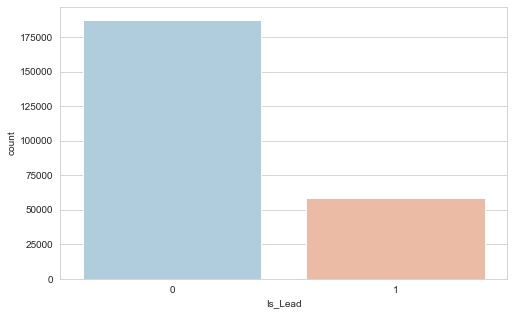

In [16]:
## Figure Shows the Frequency of Is_Lead
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead', data=train, palette='RdBu_r')

## Handling missing Data
### 3 Basic Methods to deal with this problem
#### 1) To delete the Data rows containing NaN Values.  
Con:- This will also delete the data which may be important for the prediction and it is not recommended when the dataset is small also for this competition we cannot drop null values as it will give dimension error while submission.  
#### 2) To use Mode value  
con:- I have used mode value but it is giving low accuracy and also reults in biasing

#### 3)Here I have used "Missing" term in null values instead of picking up the mode value which results in bias

In [17]:
dummy3_train = train
dummy3_test = test

In [18]:
dummy3_train

ID  Gender  Age Region_Code     Occupation Channel_Code  \
0       NNVBBKZB  Female   73       RG268          Other           X3   
1       IDD62UNG  Female   30       RG277       Salaried           X1   
2       HD3DSEMC  Female   56       RG268  Self_Employed           X3   
3       BF3NC7KV    Male   34       RG270       Salaried           X1   
4       TEASRWXV  Female   30       RG282       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   
245721  HFNB7JY8    Male   27       RG268       Salaried           X1   
245722  GEHAUCWT  Female   26       RG281       Salaried           X1   
245723  GE7V8SAH  Female   28       RG273       Salaried           X1   
245724  BOCZSWLJ    Male   29       RG269       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0            43             No              1045696        No        0  
1            32             No               581988        No        0  
2            26             No              1484315       Yes        0  
3            19             No               470454        No        0  
4            33             No               886787        No        0  
...         ...            ...                  ...       ...      ...  
245720      109            NaN              1925586        No        0  
245721       15             No               862952       Yes        0  
245722       13             No               670659        No        0  
245723       31             No               407504        No        0  
245724       21             No              1129276        No        0  

[245725 rows x 11 columns]

In [19]:
dummy3_train["Credit_Product"].fillna('Missing', inplace=True)
dummy3_test["Credit_Product"].fillna('Missing', inplace=True)

In [20]:
dummy3_train["Credit_Product"].isnull().sum()

0

In [21]:
dummy3_train = dummy3_train.drop(columns=['ID'])

In [22]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

objList = dummy3_train.select_dtypes(include = "object").columns
#Label Encoding for object to numeric conversion
for feat in objList:
    dummy3_train[feat] = le.fit_transform(dummy3_train[feat].astype(str))

print(dummy3_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               245725 non-null  int32
 1   Age                  245725 non-null  int64
 2   Region_Code          245725 non-null  int32
 3   Occupation           245725 non-null  int32
 4   Channel_Code         245725 non-null  int32
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int32
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int32
 9   Is_Lead              245725 non-null  int64
dtypes: int32(6), int64(4)
memory usage: 13.1 MB
None


In [23]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

objList = dummy3_test.select_dtypes(include = "object").columns
objList = objList.delete(0)
#Label Encoding for object to numeric conversion
for feat in objList:
    dummy3_test[feat] = le.fit_transform(dummy3_test[feat].astype(str))

print(dummy3_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  int32 
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  int32 
 4   Occupation           105312 non-null  int32 
 5   Channel_Code         105312 non-null  int32 
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       105312 non-null  int32 
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  int32 
dtypes: int32(6), int64(3), object(1)
memory usage: 5.6+ MB
None


In [24]:
X = dummy3_train.drop(columns = ['Is_Lead'], axis=1) #Entire dataset except Target column
y = dummy3_train['Is_Lead'] #Target column

In [25]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
X = scaler.fit_transform(X)
# After Scaling normalize the data to predict better results
X = normalize(X)
X

array([[-3.64804252e-01,  6.53617485e-01, -5.73310177e-02, ...,
        -9.35055689e-02, -3.22483502e-02, -2.65014259e-01],
       [-4.95513750e-01, -4.22106837e-01,  2.96256153e-01, ...,
        -1.27008649e-01, -2.89389797e-01, -3.59968966e-01],
       [-4.20905407e-01,  3.14234941e-01, -6.61476263e-02, ...,
        -1.07885254e-01,  1.60114928e-01,  4.81522141e-01],
       ...,
       [-4.18769206e-01, -4.59711706e-01,  3.90898723e-01, ...,
        -1.07337709e-01, -2.04881292e-01, -3.04217427e-01],
       [-4.83037473e-01, -4.70871114e-01,  1.26704031e-01, ...,
        -1.23810765e-01, -3.72186073e-01, -3.50905499e-01],
       [ 4.41951363e-01, -4.85694757e-01, -3.89599654e-02, ...,
        -1.36304739e-01,  4.96137630e-04, -3.86316022e-01]])

### Modelling of Machine-Learning Models

In [26]:
# 20% data as validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [27]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (196580, 9)
X_test shape (49145, 9)
y_train shape (196580,)
y_test shape (49145,)


In [28]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logpred = model_LR.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[36150  1308]
 [ 9285  2402]]
78.0


In [30]:
logacc = accuracy_score(y_test, logpred)
logf1score = f1_score(y_test, logpred)
logrecall = recall_score(y_test, logpred)
logbal = balanced_accuracy_score(y_test, logpred)

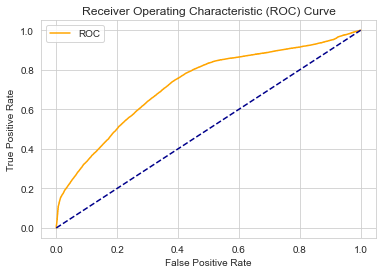

AUC-ROC : 0.7257478320101161


In [31]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = model_LR.predict_proba(X_test)
probs = probs[:, 1]
lrauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",lrauc)

In [32]:
nb = GaussianNB().fit(X_train, y_train)
# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[29777  7681]
 [ 4212  7475]]
76.0


In [33]:
nbacc = accuracy_score(y_test, nb_pred)
nbf1score = f1_score(y_test, nb_pred)
nbrecall = recall_score(y_test, nb_pred)
nbbal = balanced_accuracy_score(y_test, nb_pred)

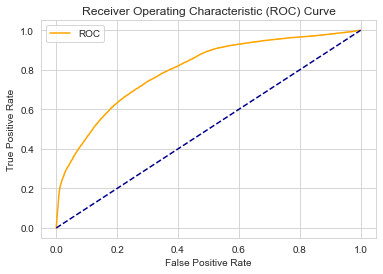

AUC-ROC : 0.7981400147601154


In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
nbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",nbauc)

In [35]:
#train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)
# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)

[[35161  2297]
 [ 8617  3070]]
78.0


In [36]:
sgdacc = accuracy_score(y_test, sgd_pred)
sgdf1score = f1_score(y_test, sgd_pred)
sgdrecall = recall_score(y_test, sgd_pred)
sgdbal = balanced_accuracy_score(y_test, sgd_pred)

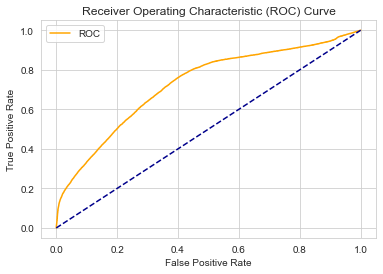

AUC-ROC : 0.7252452343612953


In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = sgd.predict_proba(X_test)
probs = probs[:, 1]
sgdauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",sgdauc)

In [38]:
# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf
= 30).fit(X_train, y_train)
# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)

[[35681  1777]
 [ 5334  6353]]
86.0


In [39]:
dtreeacc = accuracy_score(y_test, dtree_pred)
dtreef1score = f1_score(y_test, dtree_pred)
dtreerecall = recall_score(y_test, dtree_pred)
dtreebal = balanced_accuracy_score(y_test, dtree_pred)

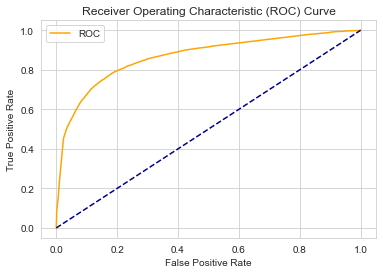

AUC-ROC : 0.866664164905737


In [40]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = dtree.predict_proba(X_test)
probs = probs[:, 1]
dtreeauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",dtreeauc)

In [41]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
print(confusion_matrix(y_test, lgb_pred))
print(round(accuracy_score(y_test, lgb_pred),2)*100)

[[35955  1503]
 [ 5351  6336]]
86.0


In [42]:
lgbacc = accuracy_score(y_test, lgb_pred)
lgbf1score = f1_score(y_test, lgb_pred)
lgbrecall = recall_score(y_test, lgb_pred)
lgbbal = balanced_accuracy_score(y_test, lgb_pred)

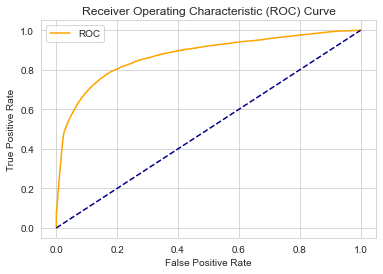

AUC-ROC : 0.8727873469904901


In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = lgb.predict_proba(X_test)
probs = probs[:, 1]
lgbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",lgbauc)

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)

[20:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[35766  1692]
 [ 5213  6474]]
86.0


In [45]:
xgbacc = accuracy_score(y_test, xgb_pred)
xgbf1score = f1_score(y_test, xgb_pred)
xgbrecall = recall_score(y_test, xgb_pred)
xgbbal = balanced_accuracy_score(y_test, xgb_pred)

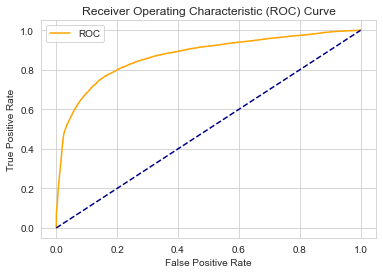

AUC-ROC : 0.8711121928166174


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = xgb.predict_proba(X_test)
probs = probs[:, 1]
xgbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",xgbauc)

In [47]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print(confusion_matrix(y_test, ada_pred))
print(round(accuracy_score(y_test, ada_pred),2)*100)

[[36282  1176]
 [ 5965  5722]]
85.0


In [48]:
adaacc = accuracy_score(y_test, ada_pred)
adaf1score = f1_score(y_test, ada_pred)
adarecall = recall_score(y_test, ada_pred)
adabal = balanced_accuracy_score(y_test, ada_pred)

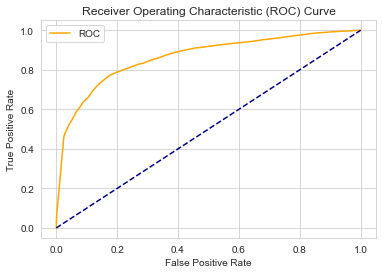

AUC-ROC : 0.8636082611892137


In [49]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = ada.predict_proba(X_test)
probs = probs[:, 1]
adaauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",adaauc)

In [50]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, mlp_pred))
print(round(accuracy_score(y_test, mlp_pred),2)*100)

[[35707  1751]
 [ 5150  6537]]
86.0


In [51]:
mlpacc = accuracy_score(y_test, mlp_pred)
mlpf1score = f1_score(y_test, mlp_pred)
mlprecall = recall_score(y_test, mlp_pred)
mlpbal = balanced_accuracy_score(y_test, mlp_pred)

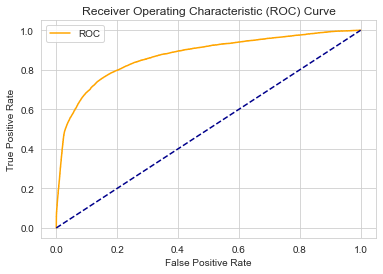

AUC-ROC : 0.8713664223927376


In [52]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
mlpauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",mlpauc)

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(round(accuracy_score(y_test, rf_pred),2)*100)

[[35210  2248]
 [ 4997  6690]]
85.0


In [54]:
rfacc = accuracy_score(y_test, rf_pred)
rff1score = f1_score(y_test, rf_pred)
rfrecall = recall_score(y_test, rf_pred)
rfbal = balanced_accuracy_score(y_test, rf_pred)

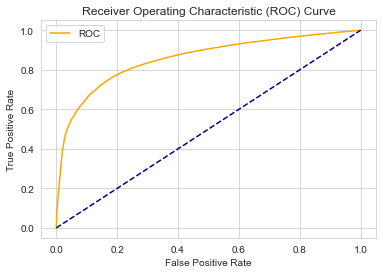

AUC-ROC : 0.8561982392527998


In [55]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = rf.predict_proba(X_test)
probs = probs[:, 1]
rfauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",rfauc)

In [56]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
gr_pred = gr.predict(X_test)
print(confusion_matrix(y_test,gr_pred))
print(round(accuracy_score(y_test, gr_pred),2)*100)

[[35952  1506]
 [ 5435  6252]]
86.0


In [57]:
gracc = accuracy_score(y_test, gr_pred)
grf1score = f1_score(y_test, gr_pred)
grrecall = recall_score(y_test, gr_pred)
grbal = balanced_accuracy_score(y_test, gr_pred)

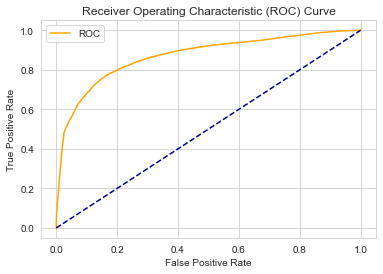

AUC-ROC : 0.8705335840777592


In [58]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = gr.predict_proba(X_test)
probs = probs[:, 1]
grauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",grauc)

In [59]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print(confusion_matrix(y_test,cat_pred))
print(round(accuracy_score(y_test, cat_pred),2)*100)

Learning rate set to 0.098237
0:	learn: 0.6174416	total: 225ms	remaining: 3m 44s
1:	learn: 0.5589794	total: 268ms	remaining: 2m 13s
2:	learn: 0.5156021	total: 304ms	remaining: 1m 41s
3:	learn: 0.4821588	total: 339ms	remaining: 1m 24s
4:	learn: 0.4561871	total: 371ms	remaining: 1m 13s
5:	learn: 0.4359190	total: 406ms	remaining: 1m 7s
6:	learn: 0.4204863	total: 448ms	remaining: 1m 3s
7:	learn: 0.4083227	total: 482ms	remaining: 59.8s
8:	learn: 0.3990360	total: 512ms	remaining: 56.4s
9:	learn: 0.3914921	total: 544ms	remaining: 53.9s
10:	learn: 0.3849242	total: 578ms	remaining: 52s
11:	learn: 0.3791838	total: 614ms	remaining: 50.6s
12:	learn: 0.3757172	total: 658ms	remaining: 49.9s
13:	learn: 0.3704823	total: 695ms	remaining: 48.9s
14:	learn: 0.3681746	total: 730ms	remaining: 47.9s
15:	learn: 0.3659736	total: 761ms	remaining: 46.8s
16:	learn: 0.3625954	total: 797ms	remaining: 46.1s
17:	learn: 0.3610632	total: 834ms	remaining: 45.5s
18:	learn: 0.3598234	total: 875ms	remaining: 45.2s
19:	lear

164:	learn: 0.3415464	total: 6.44s	remaining: 32.6s
165:	learn: 0.3415102	total: 6.47s	remaining: 32.5s
166:	learn: 0.3414721	total: 6.51s	remaining: 32.5s
167:	learn: 0.3414213	total: 6.55s	remaining: 32.4s
168:	learn: 0.3413856	total: 6.59s	remaining: 32.4s
169:	learn: 0.3413518	total: 6.63s	remaining: 32.4s
170:	learn: 0.3413197	total: 6.67s	remaining: 32.3s
171:	learn: 0.3412788	total: 6.71s	remaining: 32.3s
172:	learn: 0.3412419	total: 6.74s	remaining: 32.2s
173:	learn: 0.3412005	total: 6.78s	remaining: 32.2s
174:	learn: 0.3411683	total: 6.82s	remaining: 32.1s
175:	learn: 0.3411329	total: 6.86s	remaining: 32.1s
176:	learn: 0.3410912	total: 6.89s	remaining: 32s
177:	learn: 0.3410504	total: 6.92s	remaining: 32s
178:	learn: 0.3410142	total: 6.96s	remaining: 31.9s
179:	learn: 0.3409758	total: 7s	remaining: 31.9s
180:	learn: 0.3409305	total: 7.03s	remaining: 31.8s
181:	learn: 0.3408399	total: 7.07s	remaining: 31.8s
182:	learn: 0.3408071	total: 7.1s	remaining: 31.7s
183:	learn: 0.340768

327:	learn: 0.3365225	total: 12.7s	remaining: 26s
328:	learn: 0.3364874	total: 12.7s	remaining: 25.9s
329:	learn: 0.3364658	total: 12.8s	remaining: 25.9s
330:	learn: 0.3364398	total: 12.8s	remaining: 25.9s
331:	learn: 0.3364116	total: 12.8s	remaining: 25.8s
332:	learn: 0.3363913	total: 12.9s	remaining: 25.8s
333:	learn: 0.3363693	total: 12.9s	remaining: 25.7s
334:	learn: 0.3363458	total: 12.9s	remaining: 25.7s
335:	learn: 0.3363203	total: 13s	remaining: 25.6s
336:	learn: 0.3362938	total: 13s	remaining: 25.6s
337:	learn: 0.3362709	total: 13s	remaining: 25.6s
338:	learn: 0.3362403	total: 13.1s	remaining: 25.5s
339:	learn: 0.3362102	total: 13.1s	remaining: 25.5s
340:	learn: 0.3361747	total: 13.2s	remaining: 25.4s
341:	learn: 0.3361506	total: 13.2s	remaining: 25.4s
342:	learn: 0.3361231	total: 13.2s	remaining: 25.4s
343:	learn: 0.3360963	total: 13.3s	remaining: 25.3s
344:	learn: 0.3360607	total: 13.3s	remaining: 25.3s
345:	learn: 0.3360308	total: 13.4s	remaining: 25.2s
346:	learn: 0.336000

487:	learn: 0.3324404	total: 18.8s	remaining: 19.7s
488:	learn: 0.3324147	total: 18.8s	remaining: 19.7s
489:	learn: 0.3323915	total: 18.9s	remaining: 19.7s
490:	learn: 0.3323707	total: 18.9s	remaining: 19.6s
491:	learn: 0.3323390	total: 19s	remaining: 19.6s
492:	learn: 0.3323100	total: 19s	remaining: 19.6s
493:	learn: 0.3322862	total: 19.1s	remaining: 19.5s
494:	learn: 0.3322644	total: 19.1s	remaining: 19.5s
495:	learn: 0.3322331	total: 19.1s	remaining: 19.4s
496:	learn: 0.3322211	total: 19.2s	remaining: 19.4s
497:	learn: 0.3321988	total: 19.2s	remaining: 19.4s
498:	learn: 0.3321804	total: 19.2s	remaining: 19.3s
499:	learn: 0.3321601	total: 19.3s	remaining: 19.3s
500:	learn: 0.3321392	total: 19.3s	remaining: 19.2s
501:	learn: 0.3321223	total: 19.4s	remaining: 19.2s
502:	learn: 0.3320910	total: 19.4s	remaining: 19.2s
503:	learn: 0.3320748	total: 19.4s	remaining: 19.1s
504:	learn: 0.3320552	total: 19.5s	remaining: 19.1s
505:	learn: 0.3320296	total: 19.5s	remaining: 19s
506:	learn: 0.3320

647:	learn: 0.3287242	total: 27.3s	remaining: 14.8s
648:	learn: 0.3287013	total: 27.3s	remaining: 14.8s
649:	learn: 0.3286794	total: 27.4s	remaining: 14.8s
650:	learn: 0.3286597	total: 27.5s	remaining: 14.7s
651:	learn: 0.3286345	total: 27.6s	remaining: 14.7s
652:	learn: 0.3285982	total: 27.6s	remaining: 14.7s
653:	learn: 0.3285846	total: 27.7s	remaining: 14.6s
654:	learn: 0.3285663	total: 27.8s	remaining: 14.6s
655:	learn: 0.3285584	total: 27.8s	remaining: 14.6s
656:	learn: 0.3285414	total: 27.9s	remaining: 14.6s
657:	learn: 0.3285262	total: 28s	remaining: 14.5s
658:	learn: 0.3285023	total: 28s	remaining: 14.5s
659:	learn: 0.3284877	total: 28.1s	remaining: 14.5s
660:	learn: 0.3284679	total: 28.2s	remaining: 14.4s
661:	learn: 0.3284435	total: 28.2s	remaining: 14.4s
662:	learn: 0.3284231	total: 28.3s	remaining: 14.4s
663:	learn: 0.3283943	total: 28.4s	remaining: 14.4s
664:	learn: 0.3283712	total: 28.5s	remaining: 14.3s
665:	learn: 0.3283429	total: 28.5s	remaining: 14.3s
666:	learn: 0.32

809:	learn: 0.3252898	total: 35.9s	remaining: 8.42s
810:	learn: 0.3252749	total: 35.9s	remaining: 8.37s
811:	learn: 0.3252499	total: 36s	remaining: 8.32s
812:	learn: 0.3252200	total: 36s	remaining: 8.28s
813:	learn: 0.3251904	total: 36s	remaining: 8.23s
814:	learn: 0.3251640	total: 36.1s	remaining: 8.19s
815:	learn: 0.3251340	total: 36.1s	remaining: 8.14s
816:	learn: 0.3251101	total: 36.2s	remaining: 8.1s
817:	learn: 0.3250893	total: 36.2s	remaining: 8.05s
818:	learn: 0.3250719	total: 36.2s	remaining: 8.01s
819:	learn: 0.3250491	total: 36.3s	remaining: 7.96s
820:	learn: 0.3250339	total: 36.3s	remaining: 7.92s
821:	learn: 0.3250150	total: 36.4s	remaining: 7.88s
822:	learn: 0.3249917	total: 36.4s	remaining: 7.83s
823:	learn: 0.3249705	total: 36.5s	remaining: 7.79s
824:	learn: 0.3249443	total: 36.5s	remaining: 7.74s
825:	learn: 0.3249209	total: 36.6s	remaining: 7.7s
826:	learn: 0.3248955	total: 36.6s	remaining: 7.66s
827:	learn: 0.3248760	total: 36.7s	remaining: 7.62s
828:	learn: 0.324849

972:	learn: 0.3220184	total: 42.3s	remaining: 1.17s
973:	learn: 0.3219990	total: 42.3s	remaining: 1.13s
974:	learn: 0.3219773	total: 42.4s	remaining: 1.09s
975:	learn: 0.3219548	total: 42.4s	remaining: 1.04s
976:	learn: 0.3219415	total: 42.4s	remaining: 999ms
977:	learn: 0.3219133	total: 42.5s	remaining: 956ms
978:	learn: 0.3218830	total: 42.5s	remaining: 912ms
979:	learn: 0.3218546	total: 42.6s	remaining: 869ms
980:	learn: 0.3218408	total: 42.6s	remaining: 825ms
981:	learn: 0.3218211	total: 42.6s	remaining: 782ms
982:	learn: 0.3217954	total: 42.7s	remaining: 738ms
983:	learn: 0.3217746	total: 42.7s	remaining: 695ms
984:	learn: 0.3217617	total: 42.8s	remaining: 651ms
985:	learn: 0.3217490	total: 42.8s	remaining: 608ms
986:	learn: 0.3217332	total: 42.8s	remaining: 564ms
987:	learn: 0.3217062	total: 42.9s	remaining: 521ms
988:	learn: 0.3216843	total: 42.9s	remaining: 477ms
989:	learn: 0.3216651	total: 42.9s	remaining: 434ms
990:	learn: 0.3216454	total: 43s	remaining: 390ms
991:	learn: 0.

In [60]:
catacc = accuracy_score(y_test, cat_pred)
catf1score = f1_score(y_test, cat_pred)
catrecall = recall_score(y_test, cat_pred)
catbal = balanced_accuracy_score(y_test, cat_pred)

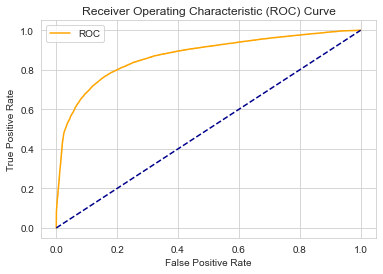

AUC-ROC : 0.8720245965861388


In [61]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = cat.predict_proba(X_test)
probs = probs[:, 1]
catauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",catauc)

### Comparing the Models

In [62]:
models = [('Logistic Regression', logacc, logf1score, logrecall, logbal, lrauc),
          ('Naive_Bayes', nbacc, nbf1score, nbrecall, nbbal, nbauc),
          ('SGD Classifier', sgdacc, sgdf1score, sgdrecall, sgdbal, sgdauc),
          ('Decision TreeClassifier', dtreeacc, dtreef1score, dtreerecall, dtreebal, dtreeauc),
          ('LGBM Classifier', lgbacc, lgbf1score, lgbrecall, lgbbal, lgbauc),
          ('XGB Classifier', xgbacc, xgbf1score, xgbrecall, xgbbal, xgbauc),
          ('AdaBoost Classifier', adaacc, adaf1score, adarecall, adabal, adaauc),
          ('MLP Classifier', mlpacc, mlpf1score, mlprecall, mlpbal, mlpauc),
          ('RandomForest Classifier', rfacc, rff1score, rfrecall, rfbal, rfauc),
          ('Gradient Boosting Classifier', gracc, grf1score, grrecall, grbal, grauc),
          ('CatBoost Classifier', catacc, catf1score, catrecall, catbal, catauc)]

In [63]:
predict = pd.DataFrame(data=models, columns=['Models', 'Accuracy of model', 'F1 Score', 'Recall Score', 'Balanced Accuracy Score', 'ROC AUC Score'])
cm = sns.light_palette("green", as_cmap=True)
s = predict.style.background_gradient(cmap=cm)
s

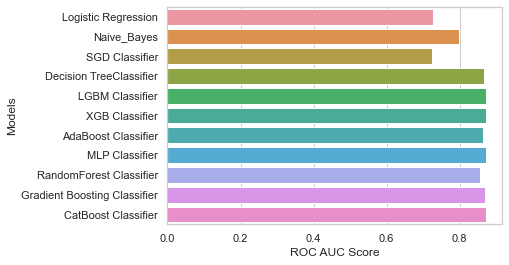

In [64]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Models", x="ROC AUC Score", data=predict)

### Hyper-Parameter Tuning and  Ensemble Top Model

The Top Models are:  
1) LGBM Classifier  
2) XGB Classifier  
3) CatBoost Classifier  
4) MLP Classifier  
5) Gradient Boosting Classifier  

Parameter Tuning using RandomizedSearchCV

In [33]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

cbc = CatBoostClassifier()

# Creating the hyperparameter grid
param_dist = { "learning_rate": np.linspace(0,0.2,5),
              "max_depth": randint(3, 10)}
               
#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbc , param_dist, scoring='roc_auc', cv =5)

#Fit the model
rscv.fit(X_train,y_train)

0:	learn: 0.6147667	total: 82ms	remaining: 1m 21s
1:	learn: 0.5559501	total: 157ms	remaining: 1m 18s
2:	learn: 0.5113249	total: 216ms	remaining: 1m 11s
3:	learn: 0.4757757	total: 265ms	remaining: 1m 5s
4:	learn: 0.4497594	total: 328ms	remaining: 1m 5s
5:	learn: 0.4299331	total: 377ms	remaining: 1m 2s
6:	learn: 0.4128583	total: 432ms	remaining: 1m 1s
7:	learn: 0.3995297	total: 511ms	remaining: 1m 3s
8:	learn: 0.3903979	total: 577ms	remaining: 1m 3s
9:	learn: 0.3831659	total: 649ms	remaining: 1m 4s
10:	learn: 0.3776214	total: 697ms	remaining: 1m 2s
11:	learn: 0.3713412	total: 760ms	remaining: 1m 2s
12:	learn: 0.3675272	total: 808ms	remaining: 1m 1s
13:	learn: 0.3636458	total: 856ms	remaining: 1m
14:	learn: 0.3613269	total: 906ms	remaining: 59.5s
15:	learn: 0.3594356	total: 964ms	remaining: 59.3s
16:	learn: 0.3569482	total: 1.02s	remaining: 58.8s
17:	learn: 0.3555392	total: 1.06s	remaining: 58.1s
18:	learn: 0.3541867	total: 1.12s	remaining: 57.9s
19:	learn: 0.3530161	total: 1.17s	remainin

162:	learn: 0.3279721	total: 9.7s	remaining: 49.8s
163:	learn: 0.3278669	total: 9.75s	remaining: 49.7s
164:	learn: 0.3277657	total: 9.8s	remaining: 49.6s
165:	learn: 0.3276419	total: 9.86s	remaining: 49.5s
166:	learn: 0.3275108	total: 9.91s	remaining: 49.5s
167:	learn: 0.3274144	total: 9.97s	remaining: 49.4s
168:	learn: 0.3273386	total: 10s	remaining: 49.3s
169:	learn: 0.3271723	total: 10.1s	remaining: 49.2s
170:	learn: 0.3270819	total: 10.1s	remaining: 49.1s
171:	learn: 0.3269918	total: 10.2s	remaining: 49s
172:	learn: 0.3269024	total: 10.2s	remaining: 48.9s
173:	learn: 0.3267581	total: 10.3s	remaining: 48.9s
174:	learn: 0.3266835	total: 10.3s	remaining: 48.8s
175:	learn: 0.3265870	total: 10.4s	remaining: 48.7s
176:	learn: 0.3264812	total: 10.5s	remaining: 48.7s
177:	learn: 0.3264412	total: 10.5s	remaining: 48.7s
178:	learn: 0.3262241	total: 10.6s	remaining: 48.7s
179:	learn: 0.3261190	total: 10.7s	remaining: 48.6s
180:	learn: 0.3260259	total: 10.7s	remaining: 48.5s
181:	learn: 0.3259

321:	learn: 0.3122728	total: 18.2s	remaining: 38.3s
322:	learn: 0.3122078	total: 18.2s	remaining: 38.2s
323:	learn: 0.3121215	total: 18.3s	remaining: 38.2s
324:	learn: 0.3120609	total: 18.3s	remaining: 38.1s
325:	learn: 0.3119409	total: 18.4s	remaining: 38s
326:	learn: 0.3118517	total: 18.5s	remaining: 38s
327:	learn: 0.3117801	total: 18.5s	remaining: 37.9s
328:	learn: 0.3116849	total: 18.6s	remaining: 37.9s
329:	learn: 0.3116425	total: 18.6s	remaining: 37.8s
330:	learn: 0.3115638	total: 18.7s	remaining: 37.7s
331:	learn: 0.3115143	total: 18.7s	remaining: 37.7s
332:	learn: 0.3114462	total: 18.8s	remaining: 37.6s
333:	learn: 0.3113681	total: 18.8s	remaining: 37.5s
334:	learn: 0.3112798	total: 18.9s	remaining: 37.5s
335:	learn: 0.3112086	total: 18.9s	remaining: 37.4s
336:	learn: 0.3111293	total: 19s	remaining: 37.4s
337:	learn: 0.3110281	total: 19s	remaining: 37.3s
338:	learn: 0.3108976	total: 19.1s	remaining: 37.2s
339:	learn: 0.3108146	total: 19.1s	remaining: 37.2s
340:	learn: 0.310710

481:	learn: 0.2988198	total: 26.8s	remaining: 28.8s
482:	learn: 0.2987137	total: 26.9s	remaining: 28.8s
483:	learn: 0.2986159	total: 26.9s	remaining: 28.7s
484:	learn: 0.2985315	total: 27s	remaining: 28.6s
485:	learn: 0.2985001	total: 27s	remaining: 28.6s
486:	learn: 0.2984322	total: 27.1s	remaining: 28.5s
487:	learn: 0.2983606	total: 27.2s	remaining: 28.5s
488:	learn: 0.2982999	total: 27.2s	remaining: 28.4s
489:	learn: 0.2981302	total: 27.3s	remaining: 28.4s
490:	learn: 0.2980383	total: 27.4s	remaining: 28.4s
491:	learn: 0.2979501	total: 27.4s	remaining: 28.3s
492:	learn: 0.2979003	total: 27.5s	remaining: 28.3s
493:	learn: 0.2978346	total: 27.6s	remaining: 28.2s
494:	learn: 0.2977607	total: 27.6s	remaining: 28.2s
495:	learn: 0.2976346	total: 27.7s	remaining: 28.1s
496:	learn: 0.2975964	total: 27.7s	remaining: 28.1s
497:	learn: 0.2975403	total: 27.8s	remaining: 28s
498:	learn: 0.2974623	total: 27.9s	remaining: 28s
499:	learn: 0.2973556	total: 27.9s	remaining: 27.9s
500:	learn: 0.297312

644:	learn: 0.2858878	total: 36s	remaining: 19.8s
645:	learn: 0.2858358	total: 36s	remaining: 19.7s
646:	learn: 0.2857835	total: 36.1s	remaining: 19.7s
647:	learn: 0.2857017	total: 36.1s	remaining: 19.6s
648:	learn: 0.2856011	total: 36.2s	remaining: 19.6s
649:	learn: 0.2855110	total: 36.3s	remaining: 19.5s
650:	learn: 0.2854271	total: 36.3s	remaining: 19.5s
651:	learn: 0.2853741	total: 36.3s	remaining: 19.4s
652:	learn: 0.2852306	total: 36.4s	remaining: 19.3s
653:	learn: 0.2851524	total: 36.5s	remaining: 19.3s
654:	learn: 0.2851025	total: 36.5s	remaining: 19.2s
655:	learn: 0.2850086	total: 36.6s	remaining: 19.2s
656:	learn: 0.2849094	total: 36.6s	remaining: 19.1s
657:	learn: 0.2848469	total: 36.7s	remaining: 19.1s
658:	learn: 0.2847910	total: 36.7s	remaining: 19s
659:	learn: 0.2847031	total: 36.8s	remaining: 18.9s
660:	learn: 0.2846444	total: 36.8s	remaining: 18.9s
661:	learn: 0.2846021	total: 36.9s	remaining: 18.8s
662:	learn: 0.2845396	total: 36.9s	remaining: 18.8s
663:	learn: 0.2844

803:	learn: 0.2749579	total: 44.5s	remaining: 10.9s
804:	learn: 0.2749049	total: 44.6s	remaining: 10.8s
805:	learn: 0.2748125	total: 44.6s	remaining: 10.7s
806:	learn: 0.2747574	total: 44.7s	remaining: 10.7s
807:	learn: 0.2747031	total: 44.7s	remaining: 10.6s
808:	learn: 0.2746511	total: 44.8s	remaining: 10.6s
809:	learn: 0.2745495	total: 44.8s	remaining: 10.5s
810:	learn: 0.2744941	total: 44.9s	remaining: 10.5s
811:	learn: 0.2744659	total: 44.9s	remaining: 10.4s
812:	learn: 0.2744067	total: 45s	remaining: 10.4s
813:	learn: 0.2742963	total: 45.1s	remaining: 10.3s
814:	learn: 0.2742270	total: 45.1s	remaining: 10.2s
815:	learn: 0.2741645	total: 45.2s	remaining: 10.2s
816:	learn: 0.2741488	total: 45.2s	remaining: 10.1s
817:	learn: 0.2740662	total: 45.3s	remaining: 10.1s
818:	learn: 0.2740220	total: 45.3s	remaining: 10s
819:	learn: 0.2739511	total: 45.4s	remaining: 9.96s
820:	learn: 0.2738874	total: 45.4s	remaining: 9.9s
821:	learn: 0.2738096	total: 45.5s	remaining: 9.85s
822:	learn: 0.273

963:	learn: 0.2647407	total: 53.1s	remaining: 1.98s
964:	learn: 0.2646928	total: 53.1s	remaining: 1.93s
965:	learn: 0.2646206	total: 53.2s	remaining: 1.87s
966:	learn: 0.2645547	total: 53.2s	remaining: 1.82s
967:	learn: 0.2644688	total: 53.3s	remaining: 1.76s
968:	learn: 0.2644159	total: 53.3s	remaining: 1.71s
969:	learn: 0.2643500	total: 53.4s	remaining: 1.65s
970:	learn: 0.2642867	total: 53.4s	remaining: 1.6s
971:	learn: 0.2642645	total: 53.5s	remaining: 1.54s
972:	learn: 0.2642411	total: 53.5s	remaining: 1.49s
973:	learn: 0.2641834	total: 53.6s	remaining: 1.43s
974:	learn: 0.2640898	total: 53.7s	remaining: 1.38s
975:	learn: 0.2640381	total: 53.7s	remaining: 1.32s
976:	learn: 0.2639886	total: 53.8s	remaining: 1.26s
977:	learn: 0.2639233	total: 53.8s	remaining: 1.21s
978:	learn: 0.2638732	total: 53.9s	remaining: 1.16s
979:	learn: 0.2638197	total: 53.9s	remaining: 1.1s
980:	learn: 0.2637294	total: 54s	remaining: 1.04s
981:	learn: 0.2637068	total: 54s	remaining: 990ms
982:	learn: 0.2636

124:	learn: 0.3319608	total: 6.88s	remaining: 48.2s
125:	learn: 0.3318721	total: 6.93s	remaining: 48.1s
126:	learn: 0.3317536	total: 6.99s	remaining: 48s
127:	learn: 0.3316132	total: 7.05s	remaining: 48s
128:	learn: 0.3314579	total: 7.1s	remaining: 48s
129:	learn: 0.3313337	total: 7.16s	remaining: 47.9s
130:	learn: 0.3312358	total: 7.21s	remaining: 47.8s
131:	learn: 0.3310064	total: 7.26s	remaining: 47.8s
132:	learn: 0.3309129	total: 7.32s	remaining: 47.7s
133:	learn: 0.3307940	total: 7.37s	remaining: 47.6s
134:	learn: 0.3306453	total: 7.42s	remaining: 47.6s
135:	learn: 0.3305236	total: 7.48s	remaining: 47.5s
136:	learn: 0.3303260	total: 7.55s	remaining: 47.6s
137:	learn: 0.3301494	total: 7.63s	remaining: 47.6s
138:	learn: 0.3300859	total: 7.7s	remaining: 47.7s
139:	learn: 0.3299004	total: 7.77s	remaining: 47.8s
140:	learn: 0.3297812	total: 7.84s	remaining: 47.8s
141:	learn: 0.3296730	total: 7.9s	remaining: 47.8s
142:	learn: 0.3295412	total: 7.97s	remaining: 47.8s
143:	learn: 0.3294604

286:	learn: 0.3145262	total: 16.1s	remaining: 40.1s
287:	learn: 0.3144568	total: 16.2s	remaining: 40s
288:	learn: 0.3143587	total: 16.2s	remaining: 40s
289:	learn: 0.3141941	total: 16.3s	remaining: 39.9s
290:	learn: 0.3141475	total: 16.4s	remaining: 39.9s
291:	learn: 0.3140052	total: 16.4s	remaining: 39.8s
292:	learn: 0.3139299	total: 16.5s	remaining: 39.8s
293:	learn: 0.3138175	total: 16.6s	remaining: 39.8s
294:	learn: 0.3137680	total: 16.6s	remaining: 39.7s
295:	learn: 0.3136813	total: 16.7s	remaining: 39.7s
296:	learn: 0.3135606	total: 16.8s	remaining: 39.7s
297:	learn: 0.3134426	total: 16.8s	remaining: 39.6s
298:	learn: 0.3133897	total: 16.9s	remaining: 39.5s
299:	learn: 0.3133011	total: 16.9s	remaining: 39.5s
300:	learn: 0.3132074	total: 17s	remaining: 39.4s
301:	learn: 0.3131127	total: 17s	remaining: 39.3s
302:	learn: 0.3129985	total: 17.1s	remaining: 39.3s
303:	learn: 0.3129165	total: 17.1s	remaining: 39.2s
304:	learn: 0.3127974	total: 17.2s	remaining: 39.2s
305:	learn: 0.312680

446:	learn: 0.3006641	total: 25.1s	remaining: 31.1s
447:	learn: 0.3005513	total: 25.2s	remaining: 31.1s
448:	learn: 0.3004265	total: 25.3s	remaining: 31s
449:	learn: 0.3003173	total: 25.3s	remaining: 30.9s
450:	learn: 0.3002512	total: 25.4s	remaining: 30.9s
451:	learn: 0.3001512	total: 25.4s	remaining: 30.8s
452:	learn: 0.3000488	total: 25.5s	remaining: 30.8s
453:	learn: 0.2999682	total: 25.5s	remaining: 30.7s
454:	learn: 0.2999065	total: 25.6s	remaining: 30.6s
455:	learn: 0.2997896	total: 25.6s	remaining: 30.6s
456:	learn: 0.2997073	total: 25.7s	remaining: 30.5s
457:	learn: 0.2995914	total: 25.8s	remaining: 30.5s
458:	learn: 0.2995336	total: 25.8s	remaining: 30.4s
459:	learn: 0.2994794	total: 25.9s	remaining: 30.4s
460:	learn: 0.2994245	total: 25.9s	remaining: 30.3s
461:	learn: 0.2993525	total: 26s	remaining: 30.2s
462:	learn: 0.2992851	total: 26s	remaining: 30.2s
463:	learn: 0.2991811	total: 26.1s	remaining: 30.1s
464:	learn: 0.2991416	total: 26.1s	remaining: 30.1s
465:	learn: 0.2990

607:	learn: 0.2879038	total: 34s	remaining: 21.9s
608:	learn: 0.2877878	total: 34.1s	remaining: 21.9s
609:	learn: 0.2876944	total: 34.2s	remaining: 21.8s
610:	learn: 0.2876206	total: 34.2s	remaining: 21.8s
611:	learn: 0.2875442	total: 34.3s	remaining: 21.7s
612:	learn: 0.2874650	total: 34.3s	remaining: 21.7s
613:	learn: 0.2874275	total: 34.4s	remaining: 21.6s
614:	learn: 0.2873357	total: 34.4s	remaining: 21.6s
615:	learn: 0.2872904	total: 34.5s	remaining: 21.5s
616:	learn: 0.2871778	total: 34.5s	remaining: 21.4s
617:	learn: 0.2871184	total: 34.6s	remaining: 21.4s
618:	learn: 0.2870210	total: 34.6s	remaining: 21.3s
619:	learn: 0.2869545	total: 34.7s	remaining: 21.3s
620:	learn: 0.2868909	total: 34.8s	remaining: 21.2s
621:	learn: 0.2868185	total: 34.8s	remaining: 21.2s
622:	learn: 0.2867145	total: 34.9s	remaining: 21.1s
623:	learn: 0.2866585	total: 34.9s	remaining: 21s
624:	learn: 0.2865917	total: 35s	remaining: 21s
625:	learn: 0.2864991	total: 35s	remaining: 20.9s
626:	learn: 0.2864073	

769:	learn: 0.2766568	total: 42.9s	remaining: 12.8s
770:	learn: 0.2766037	total: 43s	remaining: 12.8s
771:	learn: 0.2765386	total: 43s	remaining: 12.7s
772:	learn: 0.2764860	total: 43.1s	remaining: 12.6s
773:	learn: 0.2764274	total: 43.1s	remaining: 12.6s
774:	learn: 0.2763514	total: 43.2s	remaining: 12.5s
775:	learn: 0.2763052	total: 43.2s	remaining: 12.5s
776:	learn: 0.2762251	total: 43.3s	remaining: 12.4s
777:	learn: 0.2761386	total: 43.3s	remaining: 12.4s
778:	learn: 0.2760582	total: 43.4s	remaining: 12.3s
779:	learn: 0.2759903	total: 43.4s	remaining: 12.3s
780:	learn: 0.2759085	total: 43.5s	remaining: 12.2s
781:	learn: 0.2758066	total: 43.5s	remaining: 12.1s
782:	learn: 0.2757498	total: 43.6s	remaining: 12.1s
783:	learn: 0.2756499	total: 43.7s	remaining: 12s
784:	learn: 0.2755926	total: 43.7s	remaining: 12s
785:	learn: 0.2755343	total: 43.8s	remaining: 11.9s
786:	learn: 0.2754743	total: 43.8s	remaining: 11.9s
787:	learn: 0.2753964	total: 43.9s	remaining: 11.8s
788:	learn: 0.275314

932:	learn: 0.2662708	total: 51.8s	remaining: 3.72s
933:	learn: 0.2662064	total: 51.9s	remaining: 3.66s
934:	learn: 0.2661584	total: 51.9s	remaining: 3.61s
935:	learn: 0.2661350	total: 52s	remaining: 3.55s
936:	learn: 0.2661012	total: 52s	remaining: 3.5s
937:	learn: 0.2660406	total: 52.1s	remaining: 3.44s
938:	learn: 0.2659744	total: 52.1s	remaining: 3.38s
939:	learn: 0.2659144	total: 52.2s	remaining: 3.33s
940:	learn: 0.2658766	total: 52.2s	remaining: 3.27s
941:	learn: 0.2657950	total: 52.3s	remaining: 3.22s
942:	learn: 0.2657575	total: 52.3s	remaining: 3.16s
943:	learn: 0.2657120	total: 52.4s	remaining: 3.11s
944:	learn: 0.2656694	total: 52.4s	remaining: 3.05s
945:	learn: 0.2656076	total: 52.5s	remaining: 3s
946:	learn: 0.2655707	total: 52.5s	remaining: 2.94s
947:	learn: 0.2654663	total: 52.6s	remaining: 2.88s
948:	learn: 0.2653747	total: 52.7s	remaining: 2.83s
949:	learn: 0.2653275	total: 52.7s	remaining: 2.77s
950:	learn: 0.2652827	total: 52.8s	remaining: 2.72s
951:	learn: 0.265244

95:	learn: 0.3362891	total: 5.32s	remaining: 50.1s
96:	learn: 0.3361598	total: 5.38s	remaining: 50s
97:	learn: 0.3360481	total: 5.43s	remaining: 50s
98:	learn: 0.3359697	total: 5.48s	remaining: 49.9s
99:	learn: 0.3358677	total: 5.53s	remaining: 49.8s
100:	learn: 0.3357027	total: 5.59s	remaining: 49.8s
101:	learn: 0.3356007	total: 5.64s	remaining: 49.7s
102:	learn: 0.3354297	total: 5.7s	remaining: 49.6s
103:	learn: 0.3353298	total: 5.76s	remaining: 49.6s
104:	learn: 0.3351738	total: 5.81s	remaining: 49.5s
105:	learn: 0.3350930	total: 5.86s	remaining: 49.4s
106:	learn: 0.3349293	total: 5.92s	remaining: 49.4s
107:	learn: 0.3347650	total: 5.97s	remaining: 49.3s
108:	learn: 0.3345758	total: 6.03s	remaining: 49.3s
109:	learn: 0.3344453	total: 6.08s	remaining: 49.2s
110:	learn: 0.3343576	total: 6.13s	remaining: 49.1s
111:	learn: 0.3342307	total: 6.19s	remaining: 49.1s
112:	learn: 0.3341062	total: 6.25s	remaining: 49.1s
113:	learn: 0.3339857	total: 6.3s	remaining: 49s
114:	learn: 0.3339405	tot

257:	learn: 0.3169159	total: 14.2s	remaining: 40.8s
258:	learn: 0.3167527	total: 14.3s	remaining: 40.8s
259:	learn: 0.3166497	total: 14.3s	remaining: 40.7s
260:	learn: 0.3165290	total: 14.4s	remaining: 40.7s
261:	learn: 0.3164618	total: 14.4s	remaining: 40.6s
262:	learn: 0.3163341	total: 14.5s	remaining: 40.6s
263:	learn: 0.3161922	total: 14.5s	remaining: 40.5s
264:	learn: 0.3161024	total: 14.6s	remaining: 40.5s
265:	learn: 0.3160195	total: 14.6s	remaining: 40.4s
266:	learn: 0.3159430	total: 14.7s	remaining: 40.3s
267:	learn: 0.3158625	total: 14.8s	remaining: 40.3s
268:	learn: 0.3157350	total: 14.8s	remaining: 40.3s
269:	learn: 0.3156466	total: 14.9s	remaining: 40.2s
270:	learn: 0.3155544	total: 14.9s	remaining: 40.1s
271:	learn: 0.3154401	total: 15s	remaining: 40.1s
272:	learn: 0.3153989	total: 15s	remaining: 40s
273:	learn: 0.3153385	total: 15.1s	remaining: 39.9s
274:	learn: 0.3152826	total: 15.1s	remaining: 39.9s
275:	learn: 0.3152503	total: 15.2s	remaining: 39.8s
276:	learn: 0.3151

420:	learn: 0.3021599	total: 23.1s	remaining: 31.7s
421:	learn: 0.3020436	total: 23.1s	remaining: 31.7s
422:	learn: 0.3019142	total: 23.2s	remaining: 31.6s
423:	learn: 0.3018200	total: 23.3s	remaining: 31.6s
424:	learn: 0.3017455	total: 23.3s	remaining: 31.5s
425:	learn: 0.3016845	total: 23.4s	remaining: 31.5s
426:	learn: 0.3015820	total: 23.4s	remaining: 31.4s
427:	learn: 0.3015012	total: 23.5s	remaining: 31.4s
428:	learn: 0.3014227	total: 23.5s	remaining: 31.3s
429:	learn: 0.3013540	total: 23.6s	remaining: 31.3s
430:	learn: 0.3012790	total: 23.6s	remaining: 31.2s
431:	learn: 0.3012342	total: 23.7s	remaining: 31.2s
432:	learn: 0.3011578	total: 23.8s	remaining: 31.1s
433:	learn: 0.3011068	total: 23.8s	remaining: 31s
434:	learn: 0.3010489	total: 23.9s	remaining: 31s
435:	learn: 0.3009774	total: 23.9s	remaining: 30.9s
436:	learn: 0.3008477	total: 24s	remaining: 30.9s
437:	learn: 0.3007643	total: 24s	remaining: 30.8s
438:	learn: 0.3006746	total: 24.1s	remaining: 30.8s
439:	learn: 0.300592

580:	learn: 0.2891441	total: 31.9s	remaining: 23s
581:	learn: 0.2890616	total: 32s	remaining: 23s
582:	learn: 0.2890150	total: 32.1s	remaining: 22.9s
583:	learn: 0.2889553	total: 32.1s	remaining: 22.9s
584:	learn: 0.2889123	total: 32.2s	remaining: 22.8s
585:	learn: 0.2888222	total: 32.2s	remaining: 22.8s
586:	learn: 0.2887548	total: 32.3s	remaining: 22.7s
587:	learn: 0.2886377	total: 32.3s	remaining: 22.6s
588:	learn: 0.2885564	total: 32.4s	remaining: 22.6s
589:	learn: 0.2884811	total: 32.4s	remaining: 22.5s
590:	learn: 0.2884120	total: 32.5s	remaining: 22.5s
591:	learn: 0.2883662	total: 32.5s	remaining: 22.4s
592:	learn: 0.2882578	total: 32.6s	remaining: 22.4s
593:	learn: 0.2882140	total: 32.7s	remaining: 22.3s
594:	learn: 0.2881666	total: 32.7s	remaining: 22.3s
595:	learn: 0.2880974	total: 32.8s	remaining: 22.2s
596:	learn: 0.2880444	total: 32.8s	remaining: 22.2s
597:	learn: 0.2879872	total: 32.9s	remaining: 22.1s
598:	learn: 0.2878774	total: 32.9s	remaining: 22s
599:	learn: 0.287773

740:	learn: 0.2777069	total: 40.8s	remaining: 14.3s
741:	learn: 0.2776208	total: 40.8s	remaining: 14.2s
742:	learn: 0.2775674	total: 40.9s	remaining: 14.1s
743:	learn: 0.2774861	total: 41s	remaining: 14.1s
744:	learn: 0.2774225	total: 41s	remaining: 14s
745:	learn: 0.2773482	total: 41.1s	remaining: 14s
746:	learn: 0.2772842	total: 41.1s	remaining: 13.9s
747:	learn: 0.2772318	total: 41.2s	remaining: 13.9s
748:	learn: 0.2772196	total: 41.2s	remaining: 13.8s
749:	learn: 0.2771795	total: 41.3s	remaining: 13.8s
750:	learn: 0.2770868	total: 41.3s	remaining: 13.7s
751:	learn: 0.2770476	total: 41.4s	remaining: 13.7s
752:	learn: 0.2769708	total: 41.5s	remaining: 13.6s
753:	learn: 0.2769166	total: 41.5s	remaining: 13.5s
754:	learn: 0.2768530	total: 41.6s	remaining: 13.5s
755:	learn: 0.2768132	total: 41.6s	remaining: 13.4s
756:	learn: 0.2767577	total: 41.7s	remaining: 13.4s
757:	learn: 0.2767120	total: 41.7s	remaining: 13.3s
758:	learn: 0.2766314	total: 41.8s	remaining: 13.3s
759:	learn: 0.276556

901:	learn: 0.2671658	total: 49.7s	remaining: 5.4s
902:	learn: 0.2671007	total: 49.7s	remaining: 5.34s
903:	learn: 0.2670198	total: 49.8s	remaining: 5.29s
904:	learn: 0.2669793	total: 49.8s	remaining: 5.23s
905:	learn: 0.2669324	total: 49.9s	remaining: 5.18s
906:	learn: 0.2668963	total: 50s	remaining: 5.12s
907:	learn: 0.2668406	total: 50s	remaining: 5.07s
908:	learn: 0.2667838	total: 50.1s	remaining: 5.01s
909:	learn: 0.2667254	total: 50.1s	remaining: 4.96s
910:	learn: 0.2666712	total: 50.2s	remaining: 4.9s
911:	learn: 0.2665813	total: 50.2s	remaining: 4.85s
912:	learn: 0.2664925	total: 50.3s	remaining: 4.79s
913:	learn: 0.2664562	total: 50.4s	remaining: 4.74s
914:	learn: 0.2663905	total: 50.4s	remaining: 4.68s
915:	learn: 0.2663250	total: 50.5s	remaining: 4.63s
916:	learn: 0.2662834	total: 50.5s	remaining: 4.57s
917:	learn: 0.2662414	total: 50.6s	remaining: 4.52s
918:	learn: 0.2662004	total: 50.6s	remaining: 4.46s
919:	learn: 0.2661284	total: 50.7s	remaining: 4.41s
920:	learn: 0.2660

65:	learn: 0.3399008	total: 3.73s	remaining: 52.8s
66:	learn: 0.3397470	total: 3.79s	remaining: 52.8s
67:	learn: 0.3396630	total: 3.84s	remaining: 52.7s
68:	learn: 0.3395371	total: 3.91s	remaining: 52.8s
69:	learn: 0.3393802	total: 3.97s	remaining: 52.8s
70:	learn: 0.3392616	total: 4.02s	remaining: 52.7s
71:	learn: 0.3391033	total: 4.1s	remaining: 52.8s
72:	learn: 0.3389992	total: 4.15s	remaining: 52.7s
73:	learn: 0.3388866	total: 4.2s	remaining: 52.6s
74:	learn: 0.3387408	total: 4.26s	remaining: 52.5s
75:	learn: 0.3386345	total: 4.31s	remaining: 52.4s
76:	learn: 0.3384866	total: 4.36s	remaining: 52.3s
77:	learn: 0.3383303	total: 4.42s	remaining: 52.2s
78:	learn: 0.3382834	total: 4.47s	remaining: 52.2s
79:	learn: 0.3381802	total: 4.53s	remaining: 52s
80:	learn: 0.3380789	total: 4.58s	remaining: 52s
81:	learn: 0.3379739	total: 4.63s	remaining: 51.9s
82:	learn: 0.3378483	total: 4.69s	remaining: 51.9s
83:	learn: 0.3376446	total: 4.75s	remaining: 51.8s
84:	learn: 0.3375404	total: 4.8s	rema

228:	learn: 0.3214117	total: 12.9s	remaining: 43.6s
229:	learn: 0.3213123	total: 13s	remaining: 43.5s
230:	learn: 0.3212102	total: 13.1s	remaining: 43.5s
231:	learn: 0.3210749	total: 13.1s	remaining: 43.4s
232:	learn: 0.3209596	total: 13.2s	remaining: 43.3s
233:	learn: 0.3208225	total: 13.2s	remaining: 43.3s
234:	learn: 0.3206661	total: 13.3s	remaining: 43.2s
235:	learn: 0.3205952	total: 13.3s	remaining: 43.1s
236:	learn: 0.3204777	total: 13.4s	remaining: 43.1s
237:	learn: 0.3204057	total: 13.4s	remaining: 43s
238:	learn: 0.3203283	total: 13.5s	remaining: 43s
239:	learn: 0.3201683	total: 13.6s	remaining: 42.9s
240:	learn: 0.3200517	total: 13.6s	remaining: 42.9s
241:	learn: 0.3199086	total: 13.7s	remaining: 42.8s
242:	learn: 0.3198079	total: 13.7s	remaining: 42.7s
243:	learn: 0.3197234	total: 13.8s	remaining: 42.7s
244:	learn: 0.3196509	total: 13.8s	remaining: 42.6s
245:	learn: 0.3195811	total: 13.9s	remaining: 42.6s
246:	learn: 0.3195004	total: 13.9s	remaining: 42.5s
247:	learn: 0.3194

387:	learn: 0.3064456	total: 21.9s	remaining: 34.5s
388:	learn: 0.3063907	total: 21.9s	remaining: 34.4s
389:	learn: 0.3062718	total: 22s	remaining: 34.4s
390:	learn: 0.3061358	total: 22s	remaining: 34.3s
391:	learn: 0.3060521	total: 22.1s	remaining: 34.3s
392:	learn: 0.3059461	total: 22.1s	remaining: 34.2s
393:	learn: 0.3058286	total: 22.2s	remaining: 34.2s
394:	learn: 0.3057507	total: 22.3s	remaining: 34.1s
395:	learn: 0.3056758	total: 22.3s	remaining: 34.1s
396:	learn: 0.3056047	total: 22.4s	remaining: 34s
397:	learn: 0.3055296	total: 22.5s	remaining: 34s
398:	learn: 0.3054015	total: 22.5s	remaining: 33.9s
399:	learn: 0.3053210	total: 22.6s	remaining: 33.9s
400:	learn: 0.3051987	total: 22.7s	remaining: 33.8s
401:	learn: 0.3051215	total: 22.7s	remaining: 33.8s
402:	learn: 0.3050038	total: 22.8s	remaining: 33.7s
403:	learn: 0.3049311	total: 22.8s	remaining: 33.7s
404:	learn: 0.3048380	total: 22.9s	remaining: 33.6s
405:	learn: 0.3047360	total: 22.9s	remaining: 33.6s
406:	learn: 0.304652

549:	learn: 0.2931020	total: 31s	remaining: 25.3s
550:	learn: 0.2930131	total: 31s	remaining: 25.3s
551:	learn: 0.2929625	total: 31.1s	remaining: 25.2s
552:	learn: 0.2928929	total: 31.1s	remaining: 25.2s
553:	learn: 0.2928206	total: 31.2s	remaining: 25.1s
554:	learn: 0.2927118	total: 31.2s	remaining: 25.1s
555:	learn: 0.2926036	total: 31.3s	remaining: 25s
556:	learn: 0.2925146	total: 31.4s	remaining: 24.9s
557:	learn: 0.2924160	total: 31.4s	remaining: 24.9s
558:	learn: 0.2923323	total: 31.5s	remaining: 24.8s
559:	learn: 0.2922288	total: 31.5s	remaining: 24.8s
560:	learn: 0.2921868	total: 31.6s	remaining: 24.7s
561:	learn: 0.2921347	total: 31.6s	remaining: 24.7s
562:	learn: 0.2920582	total: 31.7s	remaining: 24.6s
563:	learn: 0.2919795	total: 31.8s	remaining: 24.5s
564:	learn: 0.2919007	total: 31.8s	remaining: 24.5s
565:	learn: 0.2918358	total: 31.9s	remaining: 24.4s
566:	learn: 0.2917427	total: 31.9s	remaining: 24.4s
567:	learn: 0.2916440	total: 32s	remaining: 24.3s
568:	learn: 0.291514

710:	learn: 0.2813932	total: 39.9s	remaining: 16.2s
711:	learn: 0.2812669	total: 40s	remaining: 16.2s
712:	learn: 0.2812401	total: 40.1s	remaining: 16.1s
713:	learn: 0.2811415	total: 40.1s	remaining: 16.1s
714:	learn: 0.2810848	total: 40.2s	remaining: 16s
715:	learn: 0.2810289	total: 40.2s	remaining: 16s
716:	learn: 0.2809712	total: 40.3s	remaining: 15.9s
717:	learn: 0.2809051	total: 40.3s	remaining: 15.8s
718:	learn: 0.2808260	total: 40.4s	remaining: 15.8s
719:	learn: 0.2807269	total: 40.5s	remaining: 15.7s
720:	learn: 0.2806908	total: 40.5s	remaining: 15.7s
721:	learn: 0.2806049	total: 40.6s	remaining: 15.6s
722:	learn: 0.2805164	total: 40.6s	remaining: 15.6s
723:	learn: 0.2804383	total: 40.7s	remaining: 15.5s
724:	learn: 0.2803912	total: 40.7s	remaining: 15.4s
725:	learn: 0.2803256	total: 40.8s	remaining: 15.4s
726:	learn: 0.2802692	total: 40.8s	remaining: 15.3s
727:	learn: 0.2802048	total: 40.9s	remaining: 15.3s
728:	learn: 0.2801473	total: 40.9s	remaining: 15.2s
729:	learn: 0.2800

872:	learn: 0.2707473	total: 49s	remaining: 7.13s
873:	learn: 0.2706487	total: 49.1s	remaining: 7.07s
874:	learn: 0.2705776	total: 49.1s	remaining: 7.01s
875:	learn: 0.2705390	total: 49.2s	remaining: 6.96s
876:	learn: 0.2704622	total: 49.2s	remaining: 6.9s
877:	learn: 0.2703542	total: 49.3s	remaining: 6.85s
878:	learn: 0.2703080	total: 49.3s	remaining: 6.79s
879:	learn: 0.2702508	total: 49.4s	remaining: 6.74s
880:	learn: 0.2701843	total: 49.4s	remaining: 6.68s
881:	learn: 0.2701123	total: 49.5s	remaining: 6.62s
882:	learn: 0.2700708	total: 49.6s	remaining: 6.57s
883:	learn: 0.2700003	total: 49.6s	remaining: 6.51s
884:	learn: 0.2699820	total: 49.7s	remaining: 6.45s
885:	learn: 0.2698732	total: 49.7s	remaining: 6.4s
886:	learn: 0.2698107	total: 49.8s	remaining: 6.34s
887:	learn: 0.2697158	total: 49.8s	remaining: 6.29s
888:	learn: 0.2696570	total: 49.9s	remaining: 6.23s
889:	learn: 0.2696061	total: 49.9s	remaining: 6.17s
890:	learn: 0.2695538	total: 50s	remaining: 6.12s
891:	learn: 0.2694

32:	learn: 0.3450161	total: 1.85s	remaining: 54.4s
33:	learn: 0.3444644	total: 1.91s	remaining: 54.4s
34:	learn: 0.3441442	total: 1.97s	remaining: 54.4s
35:	learn: 0.3439497	total: 2.02s	remaining: 54.2s
36:	learn: 0.3434346	total: 2.08s	remaining: 54.2s
37:	learn: 0.3432721	total: 2.14s	remaining: 54.2s
38:	learn: 0.3430968	total: 2.19s	remaining: 54.1s
39:	learn: 0.3428374	total: 2.25s	remaining: 54s
40:	learn: 0.3426494	total: 2.31s	remaining: 54.1s
41:	learn: 0.3423799	total: 2.37s	remaining: 54s
42:	learn: 0.3421984	total: 2.42s	remaining: 53.9s
43:	learn: 0.3419711	total: 2.48s	remaining: 53.8s
44:	learn: 0.3418073	total: 2.54s	remaining: 53.9s
45:	learn: 0.3416175	total: 2.59s	remaining: 53.8s
46:	learn: 0.3414430	total: 2.65s	remaining: 53.7s
47:	learn: 0.3412302	total: 2.71s	remaining: 53.7s
48:	learn: 0.3410428	total: 2.77s	remaining: 53.7s
49:	learn: 0.3409005	total: 2.82s	remaining: 53.6s
50:	learn: 0.3407352	total: 2.88s	remaining: 53.6s
51:	learn: 0.3405557	total: 2.94s	r

192:	learn: 0.3232520	total: 11s	remaining: 45.9s
193:	learn: 0.3231714	total: 11s	remaining: 45.8s
194:	learn: 0.3230898	total: 11.1s	remaining: 45.7s
195:	learn: 0.3229840	total: 11.1s	remaining: 45.7s
196:	learn: 0.3229211	total: 11.2s	remaining: 45.6s
197:	learn: 0.3228024	total: 11.2s	remaining: 45.5s
198:	learn: 0.3226862	total: 11.3s	remaining: 45.5s
199:	learn: 0.3226083	total: 11.3s	remaining: 45.4s
200:	learn: 0.3225172	total: 11.4s	remaining: 45.3s
201:	learn: 0.3223751	total: 11.5s	remaining: 45.3s
202:	learn: 0.3222545	total: 11.5s	remaining: 45.2s
203:	learn: 0.3221434	total: 11.6s	remaining: 45.2s
204:	learn: 0.3220439	total: 11.6s	remaining: 45.1s
205:	learn: 0.3219912	total: 11.7s	remaining: 45s
206:	learn: 0.3219189	total: 11.7s	remaining: 45s
207:	learn: 0.3217966	total: 11.8s	remaining: 44.9s
208:	learn: 0.3217187	total: 11.8s	remaining: 44.8s
209:	learn: 0.3216623	total: 11.9s	remaining: 44.8s
210:	learn: 0.3215573	total: 12s	remaining: 44.7s
211:	learn: 0.3214479	

351:	learn: 0.3078982	total: 21.2s	remaining: 39s
352:	learn: 0.3078259	total: 21.3s	remaining: 39s
353:	learn: 0.3077183	total: 21.3s	remaining: 38.9s
354:	learn: 0.3075953	total: 21.4s	remaining: 38.9s
355:	learn: 0.3075110	total: 21.5s	remaining: 38.8s
356:	learn: 0.3074500	total: 21.5s	remaining: 38.8s
357:	learn: 0.3073603	total: 21.6s	remaining: 38.7s
358:	learn: 0.3073183	total: 21.7s	remaining: 38.7s
359:	learn: 0.3072725	total: 21.7s	remaining: 38.6s
360:	learn: 0.3072011	total: 21.8s	remaining: 38.6s
361:	learn: 0.3071202	total: 21.9s	remaining: 38.5s
362:	learn: 0.3070682	total: 21.9s	remaining: 38.5s
363:	learn: 0.3069590	total: 22s	remaining: 38.4s
364:	learn: 0.3068562	total: 22.1s	remaining: 38.4s
365:	learn: 0.3067692	total: 22.1s	remaining: 38.3s
366:	learn: 0.3066889	total: 22.2s	remaining: 38.3s
367:	learn: 0.3066400	total: 22.3s	remaining: 38.2s
368:	learn: 0.3065879	total: 22.3s	remaining: 38.2s
369:	learn: 0.3065435	total: 22.4s	remaining: 38.1s
370:	learn: 0.3064

510:	learn: 0.2945440	total: 31.7s	remaining: 30.4s
511:	learn: 0.2944340	total: 31.8s	remaining: 30.3s
512:	learn: 0.2943781	total: 31.9s	remaining: 30.3s
513:	learn: 0.2942810	total: 31.9s	remaining: 30.2s
514:	learn: 0.2942107	total: 32s	remaining: 30.1s
515:	learn: 0.2941456	total: 32.1s	remaining: 30.1s
516:	learn: 0.2940881	total: 32.1s	remaining: 30s
517:	learn: 0.2939650	total: 32.2s	remaining: 30s
518:	learn: 0.2938687	total: 32.3s	remaining: 29.9s
519:	learn: 0.2937895	total: 32.3s	remaining: 29.9s
520:	learn: 0.2937092	total: 32.4s	remaining: 29.8s
521:	learn: 0.2936126	total: 32.5s	remaining: 29.7s
522:	learn: 0.2935384	total: 32.5s	remaining: 29.7s
523:	learn: 0.2934602	total: 32.6s	remaining: 29.6s
524:	learn: 0.2933677	total: 32.7s	remaining: 29.6s
525:	learn: 0.2932559	total: 32.7s	remaining: 29.5s
526:	learn: 0.2931802	total: 32.8s	remaining: 29.4s
527:	learn: 0.2931108	total: 32.9s	remaining: 29.4s
528:	learn: 0.2930639	total: 32.9s	remaining: 29.3s
529:	learn: 0.2929

671:	learn: 0.2822866	total: 42.3s	remaining: 20.7s
672:	learn: 0.2822186	total: 42.4s	remaining: 20.6s
673:	learn: 0.2821112	total: 42.5s	remaining: 20.5s
674:	learn: 0.2820472	total: 42.5s	remaining: 20.5s
675:	learn: 0.2820006	total: 42.6s	remaining: 20.4s
676:	learn: 0.2818609	total: 42.7s	remaining: 20.4s
677:	learn: 0.2817790	total: 42.7s	remaining: 20.3s
678:	learn: 0.2816725	total: 42.8s	remaining: 20.2s
679:	learn: 0.2815923	total: 42.9s	remaining: 20.2s
680:	learn: 0.2815259	total: 42.9s	remaining: 20.1s
681:	learn: 0.2814497	total: 43s	remaining: 20.1s
682:	learn: 0.2813758	total: 43.1s	remaining: 20s
683:	learn: 0.2813250	total: 43.1s	remaining: 19.9s
684:	learn: 0.2812572	total: 43.2s	remaining: 19.9s
685:	learn: 0.2812211	total: 43.3s	remaining: 19.8s
686:	learn: 0.2811285	total: 43.3s	remaining: 19.7s
687:	learn: 0.2810961	total: 43.4s	remaining: 19.7s
688:	learn: 0.2810293	total: 43.5s	remaining: 19.6s
689:	learn: 0.2809654	total: 43.5s	remaining: 19.6s
690:	learn: 0.28

833:	learn: 0.2706003	total: 53.1s	remaining: 10.6s
834:	learn: 0.2705431	total: 53.2s	remaining: 10.5s
835:	learn: 0.2704784	total: 53.3s	remaining: 10.5s
836:	learn: 0.2704117	total: 53.3s	remaining: 10.4s
837:	learn: 0.2703150	total: 53.4s	remaining: 10.3s
838:	learn: 0.2702441	total: 53.5s	remaining: 10.3s
839:	learn: 0.2701683	total: 53.5s	remaining: 10.2s
840:	learn: 0.2701591	total: 53.6s	remaining: 10.1s
841:	learn: 0.2700840	total: 53.7s	remaining: 10.1s
842:	learn: 0.2699910	total: 53.7s	remaining: 10s
843:	learn: 0.2698981	total: 53.8s	remaining: 9.94s
844:	learn: 0.2698569	total: 53.9s	remaining: 9.88s
845:	learn: 0.2698284	total: 53.9s	remaining: 9.82s
846:	learn: 0.2697752	total: 54s	remaining: 9.75s
847:	learn: 0.2697462	total: 54.1s	remaining: 9.69s
848:	learn: 0.2696494	total: 54.1s	remaining: 9.63s
849:	learn: 0.2695867	total: 54.2s	remaining: 9.56s
850:	learn: 0.2695379	total: 54.3s	remaining: 9.5s
851:	learn: 0.2694869	total: 54.3s	remaining: 9.44s
852:	learn: 0.269

994:	learn: 0.2603583	total: 1m 3s	remaining: 320ms
995:	learn: 0.2603130	total: 1m 3s	remaining: 256ms
996:	learn: 0.2602328	total: 1m 3s	remaining: 192ms
997:	learn: 0.2602008	total: 1m 3s	remaining: 128ms
998:	learn: 0.2601361	total: 1m 4s	remaining: 64.1ms
999:	learn: 0.2600849	total: 1m 4s	remaining: 0us
0:	learn: 0.6157019	total: 56.8ms	remaining: 56.7s
1:	learn: 0.5571349	total: 108ms	remaining: 53.9s
2:	learn: 0.5126240	total: 164ms	remaining: 54.4s
3:	learn: 0.4783141	total: 215ms	remaining: 53.6s
4:	learn: 0.4525275	total: 268ms	remaining: 53.3s
5:	learn: 0.4303906	total: 338ms	remaining: 56s
6:	learn: 0.4136946	total: 392ms	remaining: 55.6s
7:	learn: 0.4016428	total: 441ms	remaining: 54.7s
8:	learn: 0.3927254	total: 492ms	remaining: 54.1s
9:	learn: 0.3855473	total: 546ms	remaining: 54.1s
10:	learn: 0.3784829	total: 600ms	remaining: 54s
11:	learn: 0.3739208	total: 655ms	remaining: 53.9s
12:	learn: 0.3702211	total: 707ms	remaining: 53.7s
13:	learn: 0.3657446	total: 761ms	remai

155:	learn: 0.3342475	total: 8.38s	remaining: 45.4s
156:	learn: 0.3341625	total: 8.44s	remaining: 45.3s
157:	learn: 0.3340367	total: 8.49s	remaining: 45.3s
158:	learn: 0.3339910	total: 8.54s	remaining: 45.2s
159:	learn: 0.3339148	total: 8.6s	remaining: 45.1s
160:	learn: 0.3338490	total: 8.65s	remaining: 45.1s
161:	learn: 0.3337463	total: 8.71s	remaining: 45s
162:	learn: 0.3335904	total: 8.76s	remaining: 45s
163:	learn: 0.3334873	total: 8.81s	remaining: 44.9s
164:	learn: 0.3334081	total: 8.87s	remaining: 44.9s
165:	learn: 0.3333236	total: 8.92s	remaining: 44.8s
166:	learn: 0.3332208	total: 8.97s	remaining: 44.8s
167:	learn: 0.3331417	total: 9.03s	remaining: 44.7s
168:	learn: 0.3330686	total: 9.08s	remaining: 44.7s
169:	learn: 0.3330017	total: 9.14s	remaining: 44.6s
170:	learn: 0.3329508	total: 9.19s	remaining: 44.5s
171:	learn: 0.3328681	total: 9.24s	remaining: 44.5s
172:	learn: 0.3327461	total: 9.3s	remaining: 44.5s
173:	learn: 0.3326850	total: 9.35s	remaining: 44.4s
174:	learn: 0.3325

315:	learn: 0.3224198	total: 17.1s	remaining: 37.1s
316:	learn: 0.3223731	total: 17.2s	remaining: 37s
317:	learn: 0.3223377	total: 17.2s	remaining: 37s
318:	learn: 0.3222622	total: 17.3s	remaining: 36.9s
319:	learn: 0.3221686	total: 17.4s	remaining: 36.9s
320:	learn: 0.3221043	total: 17.4s	remaining: 36.8s
321:	learn: 0.3220351	total: 17.5s	remaining: 36.8s
322:	learn: 0.3219752	total: 17.5s	remaining: 36.7s
323:	learn: 0.3219021	total: 17.6s	remaining: 36.6s
324:	learn: 0.3217982	total: 17.6s	remaining: 36.6s
325:	learn: 0.3217435	total: 17.7s	remaining: 36.5s
326:	learn: 0.3216735	total: 17.7s	remaining: 36.5s
327:	learn: 0.3215712	total: 17.8s	remaining: 36.4s
328:	learn: 0.3215376	total: 17.8s	remaining: 36.4s
329:	learn: 0.3215008	total: 17.9s	remaining: 36.3s
330:	learn: 0.3214454	total: 17.9s	remaining: 36.3s
331:	learn: 0.3213711	total: 18s	remaining: 36.2s
332:	learn: 0.3213143	total: 18s	remaining: 36.1s
333:	learn: 0.3212451	total: 18.1s	remaining: 36.1s
334:	learn: 0.321164

474:	learn: 0.3130926	total: 25.6s	remaining: 28.3s
475:	learn: 0.3130353	total: 25.6s	remaining: 28.2s
476:	learn: 0.3129802	total: 25.7s	remaining: 28.1s
477:	learn: 0.3129531	total: 25.7s	remaining: 28.1s
478:	learn: 0.3129017	total: 25.8s	remaining: 28s
479:	learn: 0.3128686	total: 25.8s	remaining: 28s
480:	learn: 0.3128516	total: 25.9s	remaining: 27.9s
481:	learn: 0.3128066	total: 25.9s	remaining: 27.9s
482:	learn: 0.3127788	total: 26s	remaining: 27.8s
483:	learn: 0.3127160	total: 26s	remaining: 27.7s
484:	learn: 0.3126439	total: 26.1s	remaining: 27.7s
485:	learn: 0.3125595	total: 26.1s	remaining: 27.6s
486:	learn: 0.3125004	total: 26.2s	remaining: 27.6s
487:	learn: 0.3124609	total: 26.2s	remaining: 27.5s
488:	learn: 0.3123964	total: 26.3s	remaining: 27.5s
489:	learn: 0.3123515	total: 26.3s	remaining: 27.4s
490:	learn: 0.3122775	total: 26.4s	remaining: 27.4s
491:	learn: 0.3122442	total: 26.4s	remaining: 27.3s
492:	learn: 0.3122000	total: 26.5s	remaining: 27.3s
493:	learn: 0.312147

634:	learn: 0.3043880	total: 34s	remaining: 19.6s
635:	learn: 0.3043349	total: 34.1s	remaining: 19.5s
636:	learn: 0.3042507	total: 34.1s	remaining: 19.4s
637:	learn: 0.3041718	total: 34.2s	remaining: 19.4s
638:	learn: 0.3041050	total: 34.2s	remaining: 19.3s
639:	learn: 0.3040690	total: 34.3s	remaining: 19.3s
640:	learn: 0.3040095	total: 34.3s	remaining: 19.2s
641:	learn: 0.3039678	total: 34.4s	remaining: 19.2s
642:	learn: 0.3039389	total: 34.4s	remaining: 19.1s
643:	learn: 0.3039132	total: 34.5s	remaining: 19.1s
644:	learn: 0.3038640	total: 34.5s	remaining: 19s
645:	learn: 0.3037823	total: 34.6s	remaining: 19s
646:	learn: 0.3037368	total: 34.6s	remaining: 18.9s
647:	learn: 0.3036290	total: 34.7s	remaining: 18.8s
648:	learn: 0.3035781	total: 34.7s	remaining: 18.8s
649:	learn: 0.3035038	total: 34.8s	remaining: 18.7s
650:	learn: 0.3034282	total: 34.8s	remaining: 18.7s
651:	learn: 0.3033791	total: 34.9s	remaining: 18.6s
652:	learn: 0.3033071	total: 35s	remaining: 18.6s
653:	learn: 0.303247

796:	learn: 0.2957699	total: 42.6s	remaining: 10.9s
797:	learn: 0.2957285	total: 42.7s	remaining: 10.8s
798:	learn: 0.2956882	total: 42.7s	remaining: 10.8s
799:	learn: 0.2956343	total: 42.8s	remaining: 10.7s
800:	learn: 0.2955918	total: 42.8s	remaining: 10.6s
801:	learn: 0.2955377	total: 42.9s	remaining: 10.6s
802:	learn: 0.2954683	total: 42.9s	remaining: 10.5s
803:	learn: 0.2954321	total: 43s	remaining: 10.5s
804:	learn: 0.2953773	total: 43.1s	remaining: 10.4s
805:	learn: 0.2953536	total: 43.1s	remaining: 10.4s
806:	learn: 0.2952938	total: 43.2s	remaining: 10.3s
807:	learn: 0.2952605	total: 43.2s	remaining: 10.3s
808:	learn: 0.2952008	total: 43.3s	remaining: 10.2s
809:	learn: 0.2951430	total: 43.3s	remaining: 10.2s
810:	learn: 0.2950808	total: 43.4s	remaining: 10.1s
811:	learn: 0.2949914	total: 43.4s	remaining: 10.1s
812:	learn: 0.2949501	total: 43.5s	remaining: 10s
813:	learn: 0.2948876	total: 43.5s	remaining: 9.95s
814:	learn: 0.2948003	total: 43.6s	remaining: 9.89s
815:	learn: 0.29

956:	learn: 0.2876666	total: 51.1s	remaining: 2.3s
957:	learn: 0.2876038	total: 51.2s	remaining: 2.24s
958:	learn: 0.2875256	total: 51.2s	remaining: 2.19s
959:	learn: 0.2874935	total: 51.3s	remaining: 2.14s
960:	learn: 0.2874783	total: 51.3s	remaining: 2.08s
961:	learn: 0.2874453	total: 51.4s	remaining: 2.03s
962:	learn: 0.2874147	total: 51.4s	remaining: 1.98s
963:	learn: 0.2873981	total: 51.5s	remaining: 1.92s
964:	learn: 0.2873554	total: 51.5s	remaining: 1.87s
965:	learn: 0.2873022	total: 51.6s	remaining: 1.82s
966:	learn: 0.2872807	total: 51.6s	remaining: 1.76s
967:	learn: 0.2872671	total: 51.7s	remaining: 1.71s
968:	learn: 0.2872036	total: 51.7s	remaining: 1.66s
969:	learn: 0.2871616	total: 51.8s	remaining: 1.6s
970:	learn: 0.2870880	total: 51.9s	remaining: 1.55s
971:	learn: 0.2870701	total: 51.9s	remaining: 1.5s
972:	learn: 0.2870139	total: 52s	remaining: 1.44s
973:	learn: 0.2869690	total: 52s	remaining: 1.39s
974:	learn: 0.2869269	total: 52.1s	remaining: 1.33s
975:	learn: 0.28691

121:	learn: 0.3366862	total: 6.69s	remaining: 48.1s
122:	learn: 0.3366046	total: 6.74s	remaining: 48.1s
123:	learn: 0.3365541	total: 6.79s	remaining: 48s
124:	learn: 0.3364743	total: 6.84s	remaining: 47.9s
125:	learn: 0.3363633	total: 6.9s	remaining: 47.8s
126:	learn: 0.3363066	total: 6.95s	remaining: 47.8s
127:	learn: 0.3361745	total: 7s	remaining: 47.7s
128:	learn: 0.3360568	total: 7.06s	remaining: 47.7s
129:	learn: 0.3360120	total: 7.11s	remaining: 47.6s
130:	learn: 0.3358587	total: 7.17s	remaining: 47.5s
131:	learn: 0.3357569	total: 7.22s	remaining: 47.5s
132:	learn: 0.3356821	total: 7.27s	remaining: 47.4s
133:	learn: 0.3356289	total: 7.32s	remaining: 47.3s
134:	learn: 0.3355645	total: 7.37s	remaining: 47.2s
135:	learn: 0.3354418	total: 7.42s	remaining: 47.2s
136:	learn: 0.3353530	total: 7.47s	remaining: 47.1s
137:	learn: 0.3352792	total: 7.53s	remaining: 47s
138:	learn: 0.3351482	total: 7.59s	remaining: 47s
139:	learn: 0.3350356	total: 7.64s	remaining: 46.9s
140:	learn: 0.3349436	

280:	learn: 0.3236488	total: 15.2s	remaining: 38.9s
281:	learn: 0.3235998	total: 15.2s	remaining: 38.8s
282:	learn: 0.3235503	total: 15.3s	remaining: 38.7s
283:	learn: 0.3234906	total: 15.3s	remaining: 38.7s
284:	learn: 0.3234070	total: 15.4s	remaining: 38.6s
285:	learn: 0.3233515	total: 15.4s	remaining: 38.5s
286:	learn: 0.3232789	total: 15.5s	remaining: 38.5s
287:	learn: 0.3232377	total: 15.5s	remaining: 38.4s
288:	learn: 0.3231846	total: 15.6s	remaining: 38.4s
289:	learn: 0.3231437	total: 15.6s	remaining: 38.3s
290:	learn: 0.3230734	total: 15.7s	remaining: 38.2s
291:	learn: 0.3229731	total: 15.7s	remaining: 38.2s
292:	learn: 0.3229093	total: 15.8s	remaining: 38.1s
293:	learn: 0.3228296	total: 15.8s	remaining: 38.1s
294:	learn: 0.3227401	total: 15.9s	remaining: 38s
295:	learn: 0.3226652	total: 16s	remaining: 38s
296:	learn: 0.3225892	total: 16s	remaining: 37.9s
297:	learn: 0.3225315	total: 16.1s	remaining: 37.8s
298:	learn: 0.3224431	total: 16.1s	remaining: 37.8s
299:	learn: 0.322363

441:	learn: 0.3134747	total: 24.4s	remaining: 30.8s
442:	learn: 0.3134424	total: 24.4s	remaining: 30.7s
443:	learn: 0.3133881	total: 24.5s	remaining: 30.6s
444:	learn: 0.3133529	total: 24.5s	remaining: 30.6s
445:	learn: 0.3133200	total: 24.6s	remaining: 30.5s
446:	learn: 0.3132777	total: 24.6s	remaining: 30.5s
447:	learn: 0.3132049	total: 24.7s	remaining: 30.4s
448:	learn: 0.3131719	total: 24.7s	remaining: 30.4s
449:	learn: 0.3130834	total: 24.8s	remaining: 30.3s
450:	learn: 0.3130015	total: 24.8s	remaining: 30.2s
451:	learn: 0.3129365	total: 24.9s	remaining: 30.2s
452:	learn: 0.3128717	total: 24.9s	remaining: 30.1s
453:	learn: 0.3128335	total: 25s	remaining: 30s
454:	learn: 0.3128082	total: 25s	remaining: 30s
455:	learn: 0.3127724	total: 25.1s	remaining: 29.9s
456:	learn: 0.3126920	total: 25.1s	remaining: 29.8s
457:	learn: 0.3126337	total: 25.2s	remaining: 29.8s
458:	learn: 0.3125596	total: 25.2s	remaining: 29.7s
459:	learn: 0.3125156	total: 25.3s	remaining: 29.6s
460:	learn: 0.312436

603:	learn: 0.3044583	total: 32.6s	remaining: 21.4s
604:	learn: 0.3043889	total: 32.6s	remaining: 21.3s
605:	learn: 0.3043190	total: 32.7s	remaining: 21.2s
606:	learn: 0.3042293	total: 32.7s	remaining: 21.2s
607:	learn: 0.3041595	total: 32.8s	remaining: 21.1s
608:	learn: 0.3041031	total: 32.8s	remaining: 21.1s
609:	learn: 0.3040613	total: 32.9s	remaining: 21s
610:	learn: 0.3040502	total: 32.9s	remaining: 21s
611:	learn: 0.3040158	total: 33s	remaining: 20.9s
612:	learn: 0.3039669	total: 33s	remaining: 20.8s
613:	learn: 0.3039192	total: 33.1s	remaining: 20.8s
614:	learn: 0.3038433	total: 33.1s	remaining: 20.7s
615:	learn: 0.3037862	total: 33.1s	remaining: 20.7s
616:	learn: 0.3037489	total: 33.2s	remaining: 20.6s
617:	learn: 0.3036859	total: 33.2s	remaining: 20.5s
618:	learn: 0.3036058	total: 33.3s	remaining: 20.5s
619:	learn: 0.3035645	total: 33.3s	remaining: 20.4s
620:	learn: 0.3035117	total: 33.4s	remaining: 20.4s
621:	learn: 0.3034843	total: 33.4s	remaining: 20.3s
622:	learn: 0.303408

763:	learn: 0.2959439	total: 40s	remaining: 12.3s
764:	learn: 0.2958980	total: 40s	remaining: 12.3s
765:	learn: 0.2958831	total: 40.1s	remaining: 12.2s
766:	learn: 0.2958412	total: 40.1s	remaining: 12.2s
767:	learn: 0.2957905	total: 40.2s	remaining: 12.1s
768:	learn: 0.2957129	total: 40.2s	remaining: 12.1s
769:	learn: 0.2956654	total: 40.3s	remaining: 12s
770:	learn: 0.2956165	total: 40.3s	remaining: 12s
771:	learn: 0.2955714	total: 40.4s	remaining: 11.9s
772:	learn: 0.2955272	total: 40.4s	remaining: 11.9s
773:	learn: 0.2955014	total: 40.4s	remaining: 11.8s
774:	learn: 0.2954714	total: 40.5s	remaining: 11.8s
775:	learn: 0.2954225	total: 40.5s	remaining: 11.7s
776:	learn: 0.2953898	total: 40.6s	remaining: 11.6s
777:	learn: 0.2953414	total: 40.6s	remaining: 11.6s
778:	learn: 0.2952839	total: 40.7s	remaining: 11.5s
779:	learn: 0.2952332	total: 40.7s	remaining: 11.5s
780:	learn: 0.2951969	total: 40.8s	remaining: 11.4s
781:	learn: 0.2951631	total: 40.8s	remaining: 11.4s
782:	learn: 0.295104

925:	learn: 0.2879297	total: 47.4s	remaining: 3.79s
926:	learn: 0.2878782	total: 47.4s	remaining: 3.73s
927:	learn: 0.2878359	total: 47.5s	remaining: 3.68s
928:	learn: 0.2878044	total: 47.5s	remaining: 3.63s
929:	learn: 0.2877635	total: 47.5s	remaining: 3.58s
930:	learn: 0.2877421	total: 47.6s	remaining: 3.53s
931:	learn: 0.2876970	total: 47.6s	remaining: 3.48s
932:	learn: 0.2876568	total: 47.7s	remaining: 3.42s
933:	learn: 0.2876018	total: 47.7s	remaining: 3.37s
934:	learn: 0.2875751	total: 47.8s	remaining: 3.32s
935:	learn: 0.2875203	total: 47.8s	remaining: 3.27s
936:	learn: 0.2874785	total: 47.9s	remaining: 3.22s
937:	learn: 0.2874192	total: 47.9s	remaining: 3.17s
938:	learn: 0.2873838	total: 47.9s	remaining: 3.11s
939:	learn: 0.2873376	total: 48s	remaining: 3.06s
940:	learn: 0.2872906	total: 48s	remaining: 3.01s
941:	learn: 0.2872532	total: 48.1s	remaining: 2.96s
942:	learn: 0.2872071	total: 48.1s	remaining: 2.91s
943:	learn: 0.2871220	total: 48.2s	remaining: 2.86s
944:	learn: 0.28

87:	learn: 0.3402488	total: 4.04s	remaining: 41.9s
88:	learn: 0.3401496	total: 4.09s	remaining: 41.8s
89:	learn: 0.3400642	total: 4.13s	remaining: 41.8s
90:	learn: 0.3400125	total: 4.18s	remaining: 41.7s
91:	learn: 0.3399161	total: 4.23s	remaining: 41.7s
92:	learn: 0.3398267	total: 4.27s	remaining: 41.6s
93:	learn: 0.3396863	total: 4.32s	remaining: 41.6s
94:	learn: 0.3395801	total: 4.36s	remaining: 41.5s
95:	learn: 0.3394925	total: 4.41s	remaining: 41.6s
96:	learn: 0.3394212	total: 4.46s	remaining: 41.5s
97:	learn: 0.3393795	total: 4.5s	remaining: 41.4s
98:	learn: 0.3392818	total: 4.55s	remaining: 41.4s
99:	learn: 0.3391879	total: 4.59s	remaining: 41.3s
100:	learn: 0.3390727	total: 4.64s	remaining: 41.3s
101:	learn: 0.3390071	total: 4.68s	remaining: 41.2s
102:	learn: 0.3389167	total: 4.73s	remaining: 41.2s
103:	learn: 0.3388009	total: 4.78s	remaining: 41.1s
104:	learn: 0.3386741	total: 4.82s	remaining: 41.1s
105:	learn: 0.3386177	total: 4.87s	remaining: 41.1s
106:	learn: 0.3385170	tota

250:	learn: 0.3260576	total: 11.5s	remaining: 34.3s
251:	learn: 0.3259839	total: 11.5s	remaining: 34.2s
252:	learn: 0.3258900	total: 11.6s	remaining: 34.2s
253:	learn: 0.3258168	total: 11.6s	remaining: 34.1s
254:	learn: 0.3257518	total: 11.7s	remaining: 34.1s
255:	learn: 0.3256506	total: 11.7s	remaining: 34.1s
256:	learn: 0.3255927	total: 11.8s	remaining: 34s
257:	learn: 0.3255303	total: 11.8s	remaining: 34s
258:	learn: 0.3254788	total: 11.8s	remaining: 33.9s
259:	learn: 0.3254054	total: 11.9s	remaining: 33.9s
260:	learn: 0.3253261	total: 11.9s	remaining: 33.8s
261:	learn: 0.3252459	total: 12s	remaining: 33.8s
262:	learn: 0.3251799	total: 12s	remaining: 33.7s
263:	learn: 0.3251031	total: 12.1s	remaining: 33.7s
264:	learn: 0.3250101	total: 12.1s	remaining: 33.6s
265:	learn: 0.3249320	total: 12.2s	remaining: 33.6s
266:	learn: 0.3248433	total: 12.2s	remaining: 33.5s
267:	learn: 0.3247730	total: 12.3s	remaining: 33.5s
268:	learn: 0.3246886	total: 12.3s	remaining: 33.4s
269:	learn: 0.324604

410:	learn: 0.3155286	total: 18.8s	remaining: 26.9s
411:	learn: 0.3154663	total: 18.8s	remaining: 26.9s
412:	learn: 0.3153829	total: 18.9s	remaining: 26.8s
413:	learn: 0.3153432	total: 18.9s	remaining: 26.8s
414:	learn: 0.3153119	total: 18.9s	remaining: 26.7s
415:	learn: 0.3152466	total: 19s	remaining: 26.7s
416:	learn: 0.3151871	total: 19s	remaining: 26.6s
417:	learn: 0.3151173	total: 19.1s	remaining: 26.6s
418:	learn: 0.3150656	total: 19.1s	remaining: 26.5s
419:	learn: 0.3149805	total: 19.2s	remaining: 26.5s
420:	learn: 0.3149424	total: 19.2s	remaining: 26.4s
421:	learn: 0.3148831	total: 19.3s	remaining: 26.4s
422:	learn: 0.3148086	total: 19.3s	remaining: 26.3s
423:	learn: 0.3147583	total: 19.4s	remaining: 26.3s
424:	learn: 0.3146878	total: 19.4s	remaining: 26.2s
425:	learn: 0.3146163	total: 19.4s	remaining: 26.2s
426:	learn: 0.3145509	total: 19.5s	remaining: 26.2s
427:	learn: 0.3145102	total: 19.5s	remaining: 26.1s
428:	learn: 0.3144579	total: 19.6s	remaining: 26.1s
429:	learn: 0.31

570:	learn: 0.3066766	total: 26.1s	remaining: 19.6s
571:	learn: 0.3066335	total: 26.1s	remaining: 19.5s
572:	learn: 0.3065810	total: 26.1s	remaining: 19.5s
573:	learn: 0.3065365	total: 26.2s	remaining: 19.4s
574:	learn: 0.3064647	total: 26.2s	remaining: 19.4s
575:	learn: 0.3063886	total: 26.3s	remaining: 19.4s
576:	learn: 0.3063238	total: 26.3s	remaining: 19.3s
577:	learn: 0.3062398	total: 26.4s	remaining: 19.3s
578:	learn: 0.3061754	total: 26.4s	remaining: 19.2s
579:	learn: 0.3061139	total: 26.5s	remaining: 19.2s
580:	learn: 0.3060369	total: 26.6s	remaining: 19.2s
581:	learn: 0.3059719	total: 26.6s	remaining: 19.1s
582:	learn: 0.3058688	total: 26.7s	remaining: 19.1s
583:	learn: 0.3057984	total: 26.7s	remaining: 19s
584:	learn: 0.3057689	total: 26.8s	remaining: 19s
585:	learn: 0.3056952	total: 26.8s	remaining: 18.9s
586:	learn: 0.3056463	total: 26.9s	remaining: 18.9s
587:	learn: 0.3055897	total: 26.9s	remaining: 18.9s
588:	learn: 0.3055513	total: 26.9s	remaining: 18.8s
589:	learn: 0.30

729:	learn: 0.2983992	total: 33.4s	remaining: 12.3s
730:	learn: 0.2983449	total: 33.4s	remaining: 12.3s
731:	learn: 0.2982856	total: 33.5s	remaining: 12.2s
732:	learn: 0.2982487	total: 33.5s	remaining: 12.2s
733:	learn: 0.2981937	total: 33.6s	remaining: 12.2s
734:	learn: 0.2981357	total: 33.6s	remaining: 12.1s
735:	learn: 0.2980738	total: 33.6s	remaining: 12.1s
736:	learn: 0.2980266	total: 33.7s	remaining: 12s
737:	learn: 0.2980088	total: 33.7s	remaining: 12s
738:	learn: 0.2979287	total: 33.8s	remaining: 11.9s
739:	learn: 0.2978953	total: 33.8s	remaining: 11.9s
740:	learn: 0.2978499	total: 33.9s	remaining: 11.8s
741:	learn: 0.2978039	total: 33.9s	remaining: 11.8s
742:	learn: 0.2977522	total: 33.9s	remaining: 11.7s
743:	learn: 0.2976908	total: 34s	remaining: 11.7s
744:	learn: 0.2976564	total: 34s	remaining: 11.7s
745:	learn: 0.2976031	total: 34.1s	remaining: 11.6s
746:	learn: 0.2975626	total: 34.1s	remaining: 11.6s
747:	learn: 0.2975260	total: 34.2s	remaining: 11.5s
748:	learn: 0.297486

888:	learn: 0.2906085	total: 40.7s	remaining: 5.09s
889:	learn: 0.2905574	total: 40.8s	remaining: 5.04s
890:	learn: 0.2904926	total: 40.8s	remaining: 4.99s
891:	learn: 0.2904556	total: 40.9s	remaining: 4.95s
892:	learn: 0.2904088	total: 40.9s	remaining: 4.9s
893:	learn: 0.2903458	total: 41s	remaining: 4.86s
894:	learn: 0.2903118	total: 41s	remaining: 4.81s
895:	learn: 0.2902780	total: 41.1s	remaining: 4.76s
896:	learn: 0.2902266	total: 41.1s	remaining: 4.72s
897:	learn: 0.2901787	total: 41.1s	remaining: 4.67s
898:	learn: 0.2901308	total: 41.2s	remaining: 4.63s
899:	learn: 0.2900602	total: 41.2s	remaining: 4.58s
900:	learn: 0.2899771	total: 41.3s	remaining: 4.54s
901:	learn: 0.2899302	total: 41.3s	remaining: 4.49s
902:	learn: 0.2898685	total: 41.4s	remaining: 4.45s
903:	learn: 0.2898137	total: 41.4s	remaining: 4.4s
904:	learn: 0.2897419	total: 41.5s	remaining: 4.35s
905:	learn: 0.2896814	total: 41.5s	remaining: 4.31s
906:	learn: 0.2896376	total: 41.6s	remaining: 4.26s
907:	learn: 0.2895

50:	learn: 0.3445897	total: 2.39s	remaining: 44.5s
51:	learn: 0.3444752	total: 2.43s	remaining: 44.4s
52:	learn: 0.3443171	total: 2.48s	remaining: 44.3s
53:	learn: 0.3441905	total: 2.53s	remaining: 44.3s
54:	learn: 0.3440944	total: 2.58s	remaining: 44.4s
55:	learn: 0.3439971	total: 2.63s	remaining: 44.3s
56:	learn: 0.3438684	total: 2.67s	remaining: 44.2s
57:	learn: 0.3437602	total: 2.71s	remaining: 44.1s
58:	learn: 0.3436347	total: 2.77s	remaining: 44.1s
59:	learn: 0.3434980	total: 2.81s	remaining: 44.1s
60:	learn: 0.3434260	total: 2.85s	remaining: 43.9s
61:	learn: 0.3433309	total: 2.9s	remaining: 43.8s
62:	learn: 0.3432312	total: 2.94s	remaining: 43.8s
63:	learn: 0.3431196	total: 2.99s	remaining: 43.7s
64:	learn: 0.3430105	total: 3.04s	remaining: 43.7s
65:	learn: 0.3429042	total: 3.08s	remaining: 43.6s
66:	learn: 0.3428076	total: 3.12s	remaining: 43.5s
67:	learn: 0.3427067	total: 3.18s	remaining: 43.5s
68:	learn: 0.3425756	total: 3.22s	remaining: 43.5s
69:	learn: 0.3424959	total: 3.26

211:	learn: 0.3298339	total: 10s	remaining: 37.3s
212:	learn: 0.3297513	total: 10.1s	remaining: 37.2s
213:	learn: 0.3296450	total: 10.1s	remaining: 37.2s
214:	learn: 0.3295819	total: 10.2s	remaining: 37.1s
215:	learn: 0.3295330	total: 10.2s	remaining: 37.1s
216:	learn: 0.3294352	total: 10.3s	remaining: 37s
217:	learn: 0.3293557	total: 10.3s	remaining: 37s
218:	learn: 0.3292889	total: 10.4s	remaining: 36.9s
219:	learn: 0.3292242	total: 10.4s	remaining: 36.9s
220:	learn: 0.3291548	total: 10.5s	remaining: 36.9s
221:	learn: 0.3290963	total: 10.5s	remaining: 36.8s
222:	learn: 0.3290448	total: 10.5s	remaining: 36.7s
223:	learn: 0.3289763	total: 10.6s	remaining: 36.7s
224:	learn: 0.3288936	total: 10.6s	remaining: 36.7s
225:	learn: 0.3287938	total: 10.7s	remaining: 36.6s
226:	learn: 0.3287167	total: 10.7s	remaining: 36.6s
227:	learn: 0.3286159	total: 10.8s	remaining: 36.5s
228:	learn: 0.3285272	total: 10.8s	remaining: 36.5s
229:	learn: 0.3284565	total: 10.9s	remaining: 36.4s
230:	learn: 0.3284

373:	learn: 0.3189406	total: 17.5s	remaining: 29.4s
374:	learn: 0.3188659	total: 17.6s	remaining: 29.3s
375:	learn: 0.3188034	total: 17.6s	remaining: 29.3s
376:	learn: 0.3187342	total: 17.7s	remaining: 29.2s
377:	learn: 0.3186534	total: 17.7s	remaining: 29.2s
378:	learn: 0.3186107	total: 17.8s	remaining: 29.1s
379:	learn: 0.3185396	total: 17.8s	remaining: 29.1s
380:	learn: 0.3184835	total: 17.9s	remaining: 29.1s
381:	learn: 0.3183806	total: 17.9s	remaining: 29s
382:	learn: 0.3183004	total: 18s	remaining: 28.9s
383:	learn: 0.3182331	total: 18s	remaining: 28.9s
384:	learn: 0.3181735	total: 18.1s	remaining: 28.8s
385:	learn: 0.3181132	total: 18.1s	remaining: 28.8s
386:	learn: 0.3180518	total: 18.1s	remaining: 28.7s
387:	learn: 0.3179720	total: 18.2s	remaining: 28.7s
388:	learn: 0.3178903	total: 18.2s	remaining: 28.6s
389:	learn: 0.3178033	total: 18.3s	remaining: 28.6s
390:	learn: 0.3177628	total: 18.3s	remaining: 28.6s
391:	learn: 0.3177156	total: 18.4s	remaining: 28.5s
392:	learn: 0.3176

536:	learn: 0.3090139	total: 25s	remaining: 21.6s
537:	learn: 0.3089716	total: 25.1s	remaining: 21.6s
538:	learn: 0.3089485	total: 25.1s	remaining: 21.5s
539:	learn: 0.3089130	total: 25.2s	remaining: 21.5s
540:	learn: 0.3088352	total: 25.2s	remaining: 21.4s
541:	learn: 0.3087846	total: 25.3s	remaining: 21.4s
542:	learn: 0.3087199	total: 25.3s	remaining: 21.3s
543:	learn: 0.3086671	total: 25.4s	remaining: 21.3s
544:	learn: 0.3086212	total: 25.4s	remaining: 21.2s
545:	learn: 0.3085729	total: 25.5s	remaining: 21.2s
546:	learn: 0.3085083	total: 25.5s	remaining: 21.1s
547:	learn: 0.3084460	total: 25.6s	remaining: 21.1s
548:	learn: 0.3083794	total: 25.6s	remaining: 21s
549:	learn: 0.3083210	total: 25.6s	remaining: 21s
550:	learn: 0.3082942	total: 25.7s	remaining: 20.9s
551:	learn: 0.3082594	total: 25.7s	remaining: 20.9s
552:	learn: 0.3082031	total: 25.8s	remaining: 20.8s
553:	learn: 0.3081447	total: 25.8s	remaining: 20.8s
554:	learn: 0.3080786	total: 25.9s	remaining: 20.8s
555:	learn: 0.3080

699:	learn: 0.2999380	total: 32.6s	remaining: 14s
700:	learn: 0.2998980	total: 32.7s	remaining: 13.9s
701:	learn: 0.2998746	total: 32.7s	remaining: 13.9s
702:	learn: 0.2998117	total: 32.7s	remaining: 13.8s
703:	learn: 0.2997602	total: 32.8s	remaining: 13.8s
704:	learn: 0.2997013	total: 32.8s	remaining: 13.7s
705:	learn: 0.2996422	total: 32.9s	remaining: 13.7s
706:	learn: 0.2995820	total: 32.9s	remaining: 13.6s
707:	learn: 0.2995463	total: 33s	remaining: 13.6s
708:	learn: 0.2994965	total: 33s	remaining: 13.6s
709:	learn: 0.2994714	total: 33.1s	remaining: 13.5s
710:	learn: 0.2994494	total: 33.1s	remaining: 13.5s
711:	learn: 0.2993927	total: 33.2s	remaining: 13.4s
712:	learn: 0.2993346	total: 33.2s	remaining: 13.4s
713:	learn: 0.2993108	total: 33.3s	remaining: 13.3s
714:	learn: 0.2992764	total: 33.3s	remaining: 13.3s
715:	learn: 0.2992273	total: 33.3s	remaining: 13.2s
716:	learn: 0.2992024	total: 33.4s	remaining: 13.2s
717:	learn: 0.2991454	total: 33.4s	remaining: 13.1s
718:	learn: 0.2991

858:	learn: 0.2923424	total: 39.9s	remaining: 6.55s
859:	learn: 0.2922839	total: 40s	remaining: 6.51s
860:	learn: 0.2922346	total: 40s	remaining: 6.46s
861:	learn: 0.2921923	total: 40.1s	remaining: 6.41s
862:	learn: 0.2921410	total: 40.1s	remaining: 6.37s
863:	learn: 0.2920934	total: 40.2s	remaining: 6.32s
864:	learn: 0.2920449	total: 40.2s	remaining: 6.28s
865:	learn: 0.2920057	total: 40.3s	remaining: 6.23s
866:	learn: 0.2919571	total: 40.3s	remaining: 6.18s
867:	learn: 0.2919001	total: 40.4s	remaining: 6.14s
868:	learn: 0.2918685	total: 40.4s	remaining: 6.09s
869:	learn: 0.2917951	total: 40.4s	remaining: 6.04s
870:	learn: 0.2917255	total: 40.5s	remaining: 6s
871:	learn: 0.2916970	total: 40.5s	remaining: 5.95s
872:	learn: 0.2916781	total: 40.6s	remaining: 5.9s
873:	learn: 0.2916178	total: 40.6s	remaining: 5.86s
874:	learn: 0.2915380	total: 40.7s	remaining: 5.81s
875:	learn: 0.2914825	total: 40.7s	remaining: 5.76s
876:	learn: 0.2914058	total: 40.8s	remaining: 5.72s
877:	learn: 0.291378

18:	learn: 0.3543296	total: 888ms	remaining: 45.9s
19:	learn: 0.3532572	total: 939ms	remaining: 46s
20:	learn: 0.3525185	total: 984ms	remaining: 45.9s
21:	learn: 0.3518081	total: 1.03s	remaining: 45.7s
22:	learn: 0.3511738	total: 1.08s	remaining: 45.9s
23:	learn: 0.3501663	total: 1.13s	remaining: 45.8s
24:	learn: 0.3496860	total: 1.17s	remaining: 45.7s
25:	learn: 0.3492224	total: 1.21s	remaining: 45.5s
26:	learn: 0.3484185	total: 1.27s	remaining: 45.7s
27:	learn: 0.3481016	total: 1.31s	remaining: 45.6s
28:	learn: 0.3478187	total: 1.36s	remaining: 45.5s
29:	learn: 0.3473834	total: 1.4s	remaining: 45.4s
30:	learn: 0.3470521	total: 1.45s	remaining: 45.4s
31:	learn: 0.3465227	total: 1.5s	remaining: 45.4s
32:	learn: 0.3463171	total: 1.54s	remaining: 45.2s
33:	learn: 0.3461213	total: 1.59s	remaining: 45.1s
34:	learn: 0.3454960	total: 1.64s	remaining: 45.3s
35:	learn: 0.3453672	total: 1.69s	remaining: 45.2s
36:	learn: 0.3451953	total: 1.74s	remaining: 45.2s
37:	learn: 0.3450165	total: 1.78s	r

179:	learn: 0.3312687	total: 8.48s	remaining: 38.6s
180:	learn: 0.3311965	total: 8.52s	remaining: 38.6s
181:	learn: 0.3311334	total: 8.56s	remaining: 38.5s
182:	learn: 0.3310388	total: 8.61s	remaining: 38.4s
183:	learn: 0.3308941	total: 8.67s	remaining: 38.4s
184:	learn: 0.3308087	total: 8.72s	remaining: 38.4s
185:	learn: 0.3307265	total: 8.76s	remaining: 38.3s
186:	learn: 0.3306292	total: 8.81s	remaining: 38.3s
187:	learn: 0.3305389	total: 8.86s	remaining: 38.3s
188:	learn: 0.3304608	total: 8.9s	remaining: 38.2s
189:	learn: 0.3303724	total: 8.94s	remaining: 38.1s
190:	learn: 0.3303123	total: 8.99s	remaining: 38.1s
191:	learn: 0.3302730	total: 9.04s	remaining: 38s
192:	learn: 0.3302008	total: 9.08s	remaining: 38s
193:	learn: 0.3301352	total: 9.12s	remaining: 37.9s
194:	learn: 0.3300609	total: 9.17s	remaining: 37.9s
195:	learn: 0.3299963	total: 9.22s	remaining: 37.8s
196:	learn: 0.3299118	total: 9.27s	remaining: 37.8s
197:	learn: 0.3298244	total: 9.31s	remaining: 37.7s
198:	learn: 0.329

341:	learn: 0.3198559	total: 16.1s	remaining: 30.9s
342:	learn: 0.3197875	total: 16.1s	remaining: 30.8s
343:	learn: 0.3197256	total: 16.1s	remaining: 30.8s
344:	learn: 0.3196902	total: 16.2s	remaining: 30.7s
345:	learn: 0.3196394	total: 16.2s	remaining: 30.7s
346:	learn: 0.3195858	total: 16.3s	remaining: 30.6s
347:	learn: 0.3195070	total: 16.3s	remaining: 30.6s
348:	learn: 0.3194719	total: 16.4s	remaining: 30.5s
349:	learn: 0.3194002	total: 16.4s	remaining: 30.5s
350:	learn: 0.3193158	total: 16.5s	remaining: 30.4s
351:	learn: 0.3192374	total: 16.5s	remaining: 30.4s
352:	learn: 0.3191639	total: 16.6s	remaining: 30.4s
353:	learn: 0.3190806	total: 16.6s	remaining: 30.3s
354:	learn: 0.3190336	total: 16.7s	remaining: 30.3s
355:	learn: 0.3189712	total: 16.7s	remaining: 30.2s
356:	learn: 0.3189189	total: 16.8s	remaining: 30.2s
357:	learn: 0.3188299	total: 16.8s	remaining: 30.1s
358:	learn: 0.3187896	total: 16.8s	remaining: 30.1s
359:	learn: 0.3187171	total: 16.9s	remaining: 30s
360:	learn: 0.

502:	learn: 0.3101255	total: 23.6s	remaining: 23.3s
503:	learn: 0.3100836	total: 23.6s	remaining: 23.2s
504:	learn: 0.3100385	total: 23.7s	remaining: 23.2s
505:	learn: 0.3099586	total: 23.7s	remaining: 23.1s
506:	learn: 0.3099200	total: 23.8s	remaining: 23.1s
507:	learn: 0.3098390	total: 23.8s	remaining: 23s
508:	learn: 0.3097842	total: 23.8s	remaining: 23s
509:	learn: 0.3097224	total: 23.9s	remaining: 23s
510:	learn: 0.3096615	total: 23.9s	remaining: 22.9s
511:	learn: 0.3095673	total: 24s	remaining: 22.9s
512:	learn: 0.3094912	total: 24s	remaining: 22.8s
513:	learn: 0.3094344	total: 24.1s	remaining: 22.8s
514:	learn: 0.3093951	total: 24.1s	remaining: 22.7s
515:	learn: 0.3092922	total: 24.2s	remaining: 22.7s
516:	learn: 0.3092427	total: 24.2s	remaining: 22.6s
517:	learn: 0.3091953	total: 24.3s	remaining: 22.6s
518:	learn: 0.3091376	total: 24.3s	remaining: 22.6s
519:	learn: 0.3090854	total: 24.4s	remaining: 22.5s
520:	learn: 0.3090186	total: 24.4s	remaining: 22.5s
521:	learn: 0.3089583	

663:	learn: 0.3015197	total: 31.1s	remaining: 15.7s
664:	learn: 0.3014681	total: 31.2s	remaining: 15.7s
665:	learn: 0.3014097	total: 31.2s	remaining: 15.7s
666:	learn: 0.3013331	total: 31.3s	remaining: 15.6s
667:	learn: 0.3012823	total: 31.3s	remaining: 15.6s
668:	learn: 0.3012181	total: 31.4s	remaining: 15.5s
669:	learn: 0.3011610	total: 31.4s	remaining: 15.5s
670:	learn: 0.3011302	total: 31.4s	remaining: 15.4s
671:	learn: 0.3010699	total: 31.5s	remaining: 15.4s
672:	learn: 0.3010074	total: 31.5s	remaining: 15.3s
673:	learn: 0.3009382	total: 31.6s	remaining: 15.3s
674:	learn: 0.3008852	total: 31.6s	remaining: 15.2s
675:	learn: 0.3008580	total: 31.7s	remaining: 15.2s
676:	learn: 0.3007969	total: 31.7s	remaining: 15.1s
677:	learn: 0.3007216	total: 31.8s	remaining: 15.1s
678:	learn: 0.3006792	total: 31.8s	remaining: 15s
679:	learn: 0.3006230	total: 31.9s	remaining: 15s
680:	learn: 0.3006011	total: 31.9s	remaining: 15s
681:	learn: 0.3005610	total: 32s	remaining: 14.9s
682:	learn: 0.300493

824:	learn: 0.2931980	total: 38.7s	remaining: 8.21s
825:	learn: 0.2931703	total: 38.8s	remaining: 8.17s
826:	learn: 0.2931140	total: 38.8s	remaining: 8.12s
827:	learn: 0.2930513	total: 38.9s	remaining: 8.07s
828:	learn: 0.2929696	total: 38.9s	remaining: 8.03s
829:	learn: 0.2929209	total: 39s	remaining: 7.98s
830:	learn: 0.2928933	total: 39s	remaining: 7.93s
831:	learn: 0.2928202	total: 39s	remaining: 7.88s
832:	learn: 0.2927901	total: 39.1s	remaining: 7.84s
833:	learn: 0.2927325	total: 39.1s	remaining: 7.79s
834:	learn: 0.2926857	total: 39.2s	remaining: 7.74s
835:	learn: 0.2926168	total: 39.2s	remaining: 7.7s
836:	learn: 0.2925719	total: 39.3s	remaining: 7.65s
837:	learn: 0.2925284	total: 39.3s	remaining: 7.6s
838:	learn: 0.2924895	total: 39.4s	remaining: 7.56s
839:	learn: 0.2924382	total: 39.4s	remaining: 7.51s
840:	learn: 0.2923729	total: 39.5s	remaining: 7.46s
841:	learn: 0.2922961	total: 39.5s	remaining: 7.42s
842:	learn: 0.2922244	total: 39.6s	remaining: 7.37s
843:	learn: 0.292172

985:	learn: 0.2855407	total: 46.3s	remaining: 657ms
986:	learn: 0.2854917	total: 46.3s	remaining: 610ms
987:	learn: 0.2854288	total: 46.4s	remaining: 563ms
988:	learn: 0.2853770	total: 46.4s	remaining: 516ms
989:	learn: 0.2853410	total: 46.4s	remaining: 469ms
990:	learn: 0.2853076	total: 46.5s	remaining: 422ms
991:	learn: 0.2852414	total: 46.5s	remaining: 375ms
992:	learn: 0.2851874	total: 46.6s	remaining: 328ms
993:	learn: 0.2851270	total: 46.6s	remaining: 281ms
994:	learn: 0.2850951	total: 46.7s	remaining: 235ms
995:	learn: 0.2850650	total: 46.7s	remaining: 188ms
996:	learn: 0.2850083	total: 46.8s	remaining: 141ms
997:	learn: 0.2849687	total: 46.8s	remaining: 93.8ms
998:	learn: 0.2849036	total: 46.9s	remaining: 46.9ms
999:	learn: 0.2848133	total: 46.9s	remaining: 0us
0:	learn: 0.5863622	total: 22.4ms	remaining: 22.4s
1:	learn: 0.5173527	total: 45.8ms	remaining: 22.8s
2:	learn: 0.4707139	total: 76ms	remaining: 25.3s
3:	learn: 0.4395456	total: 101ms	remaining: 25s
4:	learn: 0.4182676	t

147:	learn: 0.3461010	total: 3.87s	remaining: 22.3s
148:	learn: 0.3460792	total: 3.89s	remaining: 22.2s
149:	learn: 0.3460522	total: 3.92s	remaining: 22.2s
150:	learn: 0.3460286	total: 3.95s	remaining: 22.2s
151:	learn: 0.3460068	total: 3.97s	remaining: 22.2s
152:	learn: 0.3459691	total: 4s	remaining: 22.1s
153:	learn: 0.3459506	total: 4.02s	remaining: 22.1s
154:	learn: 0.3459284	total: 4.05s	remaining: 22.1s
155:	learn: 0.3459070	total: 4.07s	remaining: 22s
156:	learn: 0.3458707	total: 4.1s	remaining: 22s
157:	learn: 0.3458586	total: 4.12s	remaining: 22s
158:	learn: 0.3458427	total: 4.14s	remaining: 21.9s
159:	learn: 0.3458233	total: 4.17s	remaining: 21.9s
160:	learn: 0.3458033	total: 4.2s	remaining: 21.9s
161:	learn: 0.3457825	total: 4.23s	remaining: 21.9s
162:	learn: 0.3457559	total: 4.25s	remaining: 21.8s
163:	learn: 0.3457357	total: 4.28s	remaining: 21.8s
164:	learn: 0.3457171	total: 4.3s	remaining: 21.8s
165:	learn: 0.3456945	total: 4.33s	remaining: 21.8s
166:	learn: 0.3456706	to

311:	learn: 0.3432260	total: 8.13s	remaining: 17.9s
312:	learn: 0.3432117	total: 8.16s	remaining: 17.9s
313:	learn: 0.3432019	total: 8.18s	remaining: 17.9s
314:	learn: 0.3431798	total: 8.21s	remaining: 17.8s
315:	learn: 0.3431684	total: 8.23s	remaining: 17.8s
316:	learn: 0.3431607	total: 8.26s	remaining: 17.8s
317:	learn: 0.3431434	total: 8.28s	remaining: 17.8s
318:	learn: 0.3431296	total: 8.3s	remaining: 17.7s
319:	learn: 0.3431097	total: 8.33s	remaining: 17.7s
320:	learn: 0.3430960	total: 8.37s	remaining: 17.7s
321:	learn: 0.3430878	total: 8.39s	remaining: 17.7s
322:	learn: 0.3430730	total: 8.41s	remaining: 17.6s
323:	learn: 0.3430637	total: 8.44s	remaining: 17.6s
324:	learn: 0.3430524	total: 8.47s	remaining: 17.6s
325:	learn: 0.3430379	total: 8.5s	remaining: 17.6s
326:	learn: 0.3430276	total: 8.53s	remaining: 17.6s
327:	learn: 0.3430182	total: 8.56s	remaining: 17.5s
328:	learn: 0.3430073	total: 8.58s	remaining: 17.5s
329:	learn: 0.3429965	total: 8.61s	remaining: 17.5s
330:	learn: 0.

476:	learn: 0.3411807	total: 12.5s	remaining: 13.8s
477:	learn: 0.3411711	total: 12.6s	remaining: 13.7s
478:	learn: 0.3411611	total: 12.6s	remaining: 13.7s
479:	learn: 0.3411475	total: 12.6s	remaining: 13.7s
480:	learn: 0.3411322	total: 12.6s	remaining: 13.6s
481:	learn: 0.3411210	total: 12.7s	remaining: 13.6s
482:	learn: 0.3411115	total: 12.7s	remaining: 13.6s
483:	learn: 0.3410976	total: 12.7s	remaining: 13.6s
484:	learn: 0.3410845	total: 12.8s	remaining: 13.6s
485:	learn: 0.3410768	total: 12.8s	remaining: 13.5s
486:	learn: 0.3410651	total: 12.8s	remaining: 13.5s
487:	learn: 0.3410554	total: 12.8s	remaining: 13.5s
488:	learn: 0.3410389	total: 12.9s	remaining: 13.4s
489:	learn: 0.3410333	total: 12.9s	remaining: 13.4s
490:	learn: 0.3410234	total: 12.9s	remaining: 13.4s
491:	learn: 0.3410163	total: 13s	remaining: 13.4s
492:	learn: 0.3410061	total: 13s	remaining: 13.4s
493:	learn: 0.3409980	total: 13s	remaining: 13.3s
494:	learn: 0.3409912	total: 13s	remaining: 13.3s
495:	learn: 0.340983

639:	learn: 0.3396362	total: 16.9s	remaining: 9.52s
640:	learn: 0.3396286	total: 16.9s	remaining: 9.49s
641:	learn: 0.3396220	total: 17s	remaining: 9.46s
642:	learn: 0.3396144	total: 17s	remaining: 9.44s
643:	learn: 0.3396014	total: 17s	remaining: 9.41s
644:	learn: 0.3395927	total: 17s	remaining: 9.38s
645:	learn: 0.3395888	total: 17.1s	remaining: 9.36s
646:	learn: 0.3395801	total: 17.1s	remaining: 9.33s
647:	learn: 0.3395710	total: 17.1s	remaining: 9.3s
648:	learn: 0.3395626	total: 17.1s	remaining: 9.27s
649:	learn: 0.3395514	total: 17.2s	remaining: 9.25s
650:	learn: 0.3395424	total: 17.2s	remaining: 9.22s
651:	learn: 0.3395346	total: 17.2s	remaining: 9.2s
652:	learn: 0.3395267	total: 17.3s	remaining: 9.17s
653:	learn: 0.3395160	total: 17.3s	remaining: 9.14s
654:	learn: 0.3395116	total: 17.3s	remaining: 9.12s
655:	learn: 0.3394981	total: 17.3s	remaining: 9.09s
656:	learn: 0.3394887	total: 17.4s	remaining: 9.06s
657:	learn: 0.3394749	total: 17.4s	remaining: 9.04s
658:	learn: 0.3394672	

801:	learn: 0.3381495	total: 21.4s	remaining: 5.27s
802:	learn: 0.3381412	total: 21.4s	remaining: 5.25s
803:	learn: 0.3381337	total: 21.4s	remaining: 5.22s
804:	learn: 0.3381275	total: 21.4s	remaining: 5.19s
805:	learn: 0.3381230	total: 21.5s	remaining: 5.17s
806:	learn: 0.3381146	total: 21.5s	remaining: 5.14s
807:	learn: 0.3381097	total: 21.5s	remaining: 5.11s
808:	learn: 0.3381021	total: 21.5s	remaining: 5.09s
809:	learn: 0.3380901	total: 21.6s	remaining: 5.06s
810:	learn: 0.3380826	total: 21.6s	remaining: 5.03s
811:	learn: 0.3380739	total: 21.6s	remaining: 5s
812:	learn: 0.3380650	total: 21.6s	remaining: 4.98s
813:	learn: 0.3380567	total: 21.7s	remaining: 4.95s
814:	learn: 0.3380507	total: 21.7s	remaining: 4.92s
815:	learn: 0.3380381	total: 21.7s	remaining: 4.9s
816:	learn: 0.3380316	total: 21.8s	remaining: 4.87s
817:	learn: 0.3380296	total: 21.8s	remaining: 4.85s
818:	learn: 0.3380247	total: 21.8s	remaining: 4.82s
819:	learn: 0.3380186	total: 21.8s	remaining: 4.79s
820:	learn: 0.33

963:	learn: 0.3367585	total: 25.7s	remaining: 961ms
964:	learn: 0.3367510	total: 25.8s	remaining: 935ms
965:	learn: 0.3367451	total: 25.8s	remaining: 908ms
966:	learn: 0.3367398	total: 25.8s	remaining: 882ms
967:	learn: 0.3367343	total: 25.9s	remaining: 855ms
968:	learn: 0.3367263	total: 25.9s	remaining: 828ms
969:	learn: 0.3367095	total: 25.9s	remaining: 802ms
970:	learn: 0.3367009	total: 25.9s	remaining: 775ms
971:	learn: 0.3366829	total: 26s	remaining: 748ms
972:	learn: 0.3366797	total: 26s	remaining: 722ms
973:	learn: 0.3366730	total: 26s	remaining: 695ms
974:	learn: 0.3366606	total: 26.1s	remaining: 668ms
975:	learn: 0.3366508	total: 26.1s	remaining: 642ms
976:	learn: 0.3366464	total: 26.1s	remaining: 615ms
977:	learn: 0.3366420	total: 26.2s	remaining: 588ms
978:	learn: 0.3366365	total: 26.2s	remaining: 562ms
979:	learn: 0.3366302	total: 26.2s	remaining: 535ms
980:	learn: 0.3366238	total: 26.2s	remaining: 508ms
981:	learn: 0.3366046	total: 26.3s	remaining: 481ms
982:	learn: 0.3365

127:	learn: 0.3467885	total: 3.56s	remaining: 24.3s
128:	learn: 0.3467680	total: 3.59s	remaining: 24.3s
129:	learn: 0.3467434	total: 3.62s	remaining: 24.2s
130:	learn: 0.3467241	total: 3.66s	remaining: 24.3s
131:	learn: 0.3466369	total: 3.7s	remaining: 24.3s
132:	learn: 0.3466159	total: 3.74s	remaining: 24.4s
133:	learn: 0.3465764	total: 3.77s	remaining: 24.4s
134:	learn: 0.3465603	total: 3.81s	remaining: 24.4s
135:	learn: 0.3465373	total: 3.83s	remaining: 24.4s
136:	learn: 0.3465181	total: 3.86s	remaining: 24.3s
137:	learn: 0.3464890	total: 3.89s	remaining: 24.3s
138:	learn: 0.3464518	total: 3.92s	remaining: 24.3s
139:	learn: 0.3464222	total: 3.95s	remaining: 24.3s
140:	learn: 0.3464022	total: 3.98s	remaining: 24.2s
141:	learn: 0.3463228	total: 4.01s	remaining: 24.2s
142:	learn: 0.3463007	total: 4.04s	remaining: 24.2s
143:	learn: 0.3462793	total: 4.08s	remaining: 24.2s
144:	learn: 0.3462652	total: 4.11s	remaining: 24.2s
145:	learn: 0.3462420	total: 4.14s	remaining: 24.2s
146:	learn: 0

288:	learn: 0.3430686	total: 8.11s	remaining: 20s
289:	learn: 0.3430543	total: 8.15s	remaining: 19.9s
290:	learn: 0.3430405	total: 8.18s	remaining: 19.9s
291:	learn: 0.3430245	total: 8.2s	remaining: 19.9s
292:	learn: 0.3430116	total: 8.24s	remaining: 19.9s
293:	learn: 0.3429982	total: 8.27s	remaining: 19.9s
294:	learn: 0.3429880	total: 8.3s	remaining: 19.8s
295:	learn: 0.3429757	total: 8.34s	remaining: 19.8s
296:	learn: 0.3429629	total: 8.36s	remaining: 19.8s
297:	learn: 0.3429484	total: 8.39s	remaining: 19.8s
298:	learn: 0.3429390	total: 8.42s	remaining: 19.8s
299:	learn: 0.3429301	total: 8.46s	remaining: 19.7s
300:	learn: 0.3429153	total: 8.49s	remaining: 19.7s
301:	learn: 0.3429062	total: 8.53s	remaining: 19.7s
302:	learn: 0.3428764	total: 8.55s	remaining: 19.7s
303:	learn: 0.3428618	total: 8.59s	remaining: 19.7s
304:	learn: 0.3428459	total: 8.62s	remaining: 19.6s
305:	learn: 0.3428324	total: 8.65s	remaining: 19.6s
306:	learn: 0.3428094	total: 8.68s	remaining: 19.6s
307:	learn: 0.34

450:	learn: 0.3410087	total: 12.5s	remaining: 15.2s
451:	learn: 0.3409988	total: 12.5s	remaining: 15.2s
452:	learn: 0.3409877	total: 12.6s	remaining: 15.2s
453:	learn: 0.3409773	total: 12.6s	remaining: 15.1s
454:	learn: 0.3409643	total: 12.6s	remaining: 15.1s
455:	learn: 0.3409512	total: 12.6s	remaining: 15.1s
456:	learn: 0.3409435	total: 12.6s	remaining: 15s
457:	learn: 0.3409339	total: 12.7s	remaining: 15s
458:	learn: 0.3409211	total: 12.7s	remaining: 15s
459:	learn: 0.3409152	total: 12.7s	remaining: 14.9s
460:	learn: 0.3409006	total: 12.8s	remaining: 14.9s
461:	learn: 0.3408878	total: 12.8s	remaining: 14.9s
462:	learn: 0.3408786	total: 12.8s	remaining: 14.9s
463:	learn: 0.3408674	total: 12.8s	remaining: 14.8s
464:	learn: 0.3408568	total: 12.9s	remaining: 14.8s
465:	learn: 0.3408504	total: 12.9s	remaining: 14.8s
466:	learn: 0.3408403	total: 12.9s	remaining: 14.7s
467:	learn: 0.3408309	total: 12.9s	remaining: 14.7s
468:	learn: 0.3408213	total: 13s	remaining: 14.7s
469:	learn: 0.340815

614:	learn: 0.3393232	total: 17.1s	remaining: 10.7s
615:	learn: 0.3393139	total: 17.1s	remaining: 10.6s
616:	learn: 0.3393022	total: 17.1s	remaining: 10.6s
617:	learn: 0.3392943	total: 17.1s	remaining: 10.6s
618:	learn: 0.3392791	total: 17.2s	remaining: 10.6s
619:	learn: 0.3392741	total: 17.2s	remaining: 10.5s
620:	learn: 0.3392647	total: 17.2s	remaining: 10.5s
621:	learn: 0.3392533	total: 17.2s	remaining: 10.5s
622:	learn: 0.3392442	total: 17.3s	remaining: 10.4s
623:	learn: 0.3392250	total: 17.3s	remaining: 10.4s
624:	learn: 0.3392147	total: 17.3s	remaining: 10.4s
625:	learn: 0.3392045	total: 17.3s	remaining: 10.4s
626:	learn: 0.3391908	total: 17.4s	remaining: 10.3s
627:	learn: 0.3391791	total: 17.4s	remaining: 10.3s
628:	learn: 0.3391642	total: 17.4s	remaining: 10.3s
629:	learn: 0.3391588	total: 17.4s	remaining: 10.2s
630:	learn: 0.3391495	total: 17.5s	remaining: 10.2s
631:	learn: 0.3391439	total: 17.5s	remaining: 10.2s
632:	learn: 0.3391335	total: 17.5s	remaining: 10.2s
633:	learn: 

774:	learn: 0.3378146	total: 21.2s	remaining: 6.17s
775:	learn: 0.3378087	total: 21.3s	remaining: 6.14s
776:	learn: 0.3378022	total: 21.3s	remaining: 6.11s
777:	learn: 0.3377080	total: 21.3s	remaining: 6.08s
778:	learn: 0.3377007	total: 21.3s	remaining: 6.05s
779:	learn: 0.3376920	total: 21.4s	remaining: 6.03s
780:	learn: 0.3376844	total: 21.4s	remaining: 6s
781:	learn: 0.3376792	total: 21.4s	remaining: 5.97s
782:	learn: 0.3376721	total: 21.5s	remaining: 5.95s
783:	learn: 0.3376607	total: 21.5s	remaining: 5.92s
784:	learn: 0.3376556	total: 21.5s	remaining: 5.89s
785:	learn: 0.3376487	total: 21.5s	remaining: 5.86s
786:	learn: 0.3376413	total: 21.6s	remaining: 5.83s
787:	learn: 0.3376341	total: 21.6s	remaining: 5.81s
788:	learn: 0.3376274	total: 21.6s	remaining: 5.78s
789:	learn: 0.3376170	total: 21.6s	remaining: 5.75s
790:	learn: 0.3376074	total: 21.7s	remaining: 5.72s
791:	learn: 0.3376002	total: 21.7s	remaining: 5.69s
792:	learn: 0.3375878	total: 21.7s	remaining: 5.67s
793:	learn: 0.3

934:	learn: 0.3364127	total: 25.4s	remaining: 1.77s
935:	learn: 0.3363969	total: 25.5s	remaining: 1.74s
936:	learn: 0.3363841	total: 25.5s	remaining: 1.71s
937:	learn: 0.3363756	total: 25.5s	remaining: 1.69s
938:	learn: 0.3363644	total: 25.5s	remaining: 1.66s
939:	learn: 0.3363585	total: 25.6s	remaining: 1.63s
940:	learn: 0.3363487	total: 25.6s	remaining: 1.6s
941:	learn: 0.3363414	total: 25.6s	remaining: 1.58s
942:	learn: 0.3363352	total: 25.7s	remaining: 1.55s
943:	learn: 0.3363307	total: 25.7s	remaining: 1.52s
944:	learn: 0.3363216	total: 25.7s	remaining: 1.5s
945:	learn: 0.3363118	total: 25.7s	remaining: 1.47s
946:	learn: 0.3362998	total: 25.8s	remaining: 1.44s
947:	learn: 0.3362914	total: 25.8s	remaining: 1.41s
948:	learn: 0.3362775	total: 25.8s	remaining: 1.39s
949:	learn: 0.3362693	total: 25.8s	remaining: 1.36s
950:	learn: 0.3362624	total: 25.9s	remaining: 1.33s
951:	learn: 0.3362529	total: 25.9s	remaining: 1.3s
952:	learn: 0.3362401	total: 25.9s	remaining: 1.28s
953:	learn: 0.3

97:	learn: 0.3479670	total: 2.38s	remaining: 21.9s
98:	learn: 0.3479304	total: 2.4s	remaining: 21.8s
99:	learn: 0.3478957	total: 2.42s	remaining: 21.8s
100:	learn: 0.3478658	total: 2.45s	remaining: 21.8s
101:	learn: 0.3477951	total: 2.47s	remaining: 21.8s
102:	learn: 0.3477614	total: 2.49s	remaining: 21.7s
103:	learn: 0.3477363	total: 2.52s	remaining: 21.7s
104:	learn: 0.3476741	total: 2.54s	remaining: 21.7s
105:	learn: 0.3476333	total: 2.57s	remaining: 21.6s
106:	learn: 0.3476097	total: 2.6s	remaining: 21.7s
107:	learn: 0.3475285	total: 2.62s	remaining: 21.7s
108:	learn: 0.3474945	total: 2.65s	remaining: 21.6s
109:	learn: 0.3474559	total: 2.67s	remaining: 21.6s
110:	learn: 0.3474237	total: 2.69s	remaining: 21.5s
111:	learn: 0.3473946	total: 2.71s	remaining: 21.5s
112:	learn: 0.3473507	total: 2.73s	remaining: 21.5s
113:	learn: 0.3473260	total: 2.76s	remaining: 21.5s
114:	learn: 0.3472982	total: 2.79s	remaining: 21.5s
115:	learn: 0.3472727	total: 2.82s	remaining: 21.5s
116:	learn: 0.347

258:	learn: 0.3435130	total: 6.38s	remaining: 18.3s
259:	learn: 0.3435024	total: 6.41s	remaining: 18.3s
260:	learn: 0.3434840	total: 6.44s	remaining: 18.2s
261:	learn: 0.3434733	total: 6.46s	remaining: 18.2s
262:	learn: 0.3434558	total: 6.49s	remaining: 18.2s
263:	learn: 0.3434451	total: 6.52s	remaining: 18.2s
264:	learn: 0.3434354	total: 6.54s	remaining: 18.2s
265:	learn: 0.3434219	total: 6.57s	remaining: 18.1s
266:	learn: 0.3434064	total: 6.6s	remaining: 18.1s
267:	learn: 0.3433969	total: 6.62s	remaining: 18.1s
268:	learn: 0.3433811	total: 6.65s	remaining: 18.1s
269:	learn: 0.3433618	total: 6.67s	remaining: 18s
270:	learn: 0.3433454	total: 6.7s	remaining: 18s
271:	learn: 0.3433330	total: 6.72s	remaining: 18s
272:	learn: 0.3433180	total: 6.75s	remaining: 18s
273:	learn: 0.3433049	total: 6.79s	remaining: 18s
274:	learn: 0.3432691	total: 6.81s	remaining: 18s
275:	learn: 0.3432574	total: 6.84s	remaining: 17.9s
276:	learn: 0.3432349	total: 6.87s	remaining: 17.9s
277:	learn: 0.3432005	tota

417:	learn: 0.3414111	total: 10.5s	remaining: 14.7s
418:	learn: 0.3413971	total: 10.6s	remaining: 14.7s
419:	learn: 0.3413905	total: 10.6s	remaining: 14.6s
420:	learn: 0.3413871	total: 10.6s	remaining: 14.6s
421:	learn: 0.3413788	total: 10.6s	remaining: 14.6s
422:	learn: 0.3413723	total: 10.7s	remaining: 14.6s
423:	learn: 0.3413649	total: 10.7s	remaining: 14.5s
424:	learn: 0.3413522	total: 10.7s	remaining: 14.5s
425:	learn: 0.3413389	total: 10.8s	remaining: 14.5s
426:	learn: 0.3413285	total: 10.8s	remaining: 14.5s
427:	learn: 0.3413145	total: 10.8s	remaining: 14.5s
428:	learn: 0.3413037	total: 10.8s	remaining: 14.4s
429:	learn: 0.3412935	total: 10.9s	remaining: 14.4s
430:	learn: 0.3412852	total: 10.9s	remaining: 14.4s
431:	learn: 0.3412744	total: 10.9s	remaining: 14.4s
432:	learn: 0.3412633	total: 11s	remaining: 14.3s
433:	learn: 0.3412440	total: 11s	remaining: 14.3s
434:	learn: 0.3412300	total: 11s	remaining: 14.3s
435:	learn: 0.3412120	total: 11s	remaining: 14.3s
436:	learn: 0.341197

578:	learn: 0.3397219	total: 14.9s	remaining: 10.8s
579:	learn: 0.3397087	total: 14.9s	remaining: 10.8s
580:	learn: 0.3396962	total: 14.9s	remaining: 10.7s
581:	learn: 0.3396873	total: 14.9s	remaining: 10.7s
582:	learn: 0.3396778	total: 15s	remaining: 10.7s
583:	learn: 0.3396721	total: 15s	remaining: 10.7s
584:	learn: 0.3396677	total: 15s	remaining: 10.7s
585:	learn: 0.3396621	total: 15s	remaining: 10.6s
586:	learn: 0.3396501	total: 15.1s	remaining: 10.6s
587:	learn: 0.3396404	total: 15.1s	remaining: 10.6s
588:	learn: 0.3396319	total: 15.1s	remaining: 10.5s
589:	learn: 0.3396215	total: 15.1s	remaining: 10.5s
590:	learn: 0.3396175	total: 15.2s	remaining: 10.5s
591:	learn: 0.3396074	total: 15.2s	remaining: 10.5s
592:	learn: 0.3395991	total: 15.2s	remaining: 10.4s
593:	learn: 0.3395912	total: 15.2s	remaining: 10.4s
594:	learn: 0.3395746	total: 15.3s	remaining: 10.4s
595:	learn: 0.3395632	total: 15.3s	remaining: 10.4s
596:	learn: 0.3395499	total: 15.3s	remaining: 10.3s
597:	learn: 0.339540

742:	learn: 0.3382600	total: 19.4s	remaining: 6.72s
743:	learn: 0.3382495	total: 19.5s	remaining: 6.7s
744:	learn: 0.3382406	total: 19.5s	remaining: 6.67s
745:	learn: 0.3382339	total: 19.5s	remaining: 6.64s
746:	learn: 0.3382264	total: 19.5s	remaining: 6.62s
747:	learn: 0.3382134	total: 19.6s	remaining: 6.59s
748:	learn: 0.3382063	total: 19.6s	remaining: 6.57s
749:	learn: 0.3381937	total: 19.6s	remaining: 6.54s
750:	learn: 0.3381830	total: 19.6s	remaining: 6.51s
751:	learn: 0.3381744	total: 19.7s	remaining: 6.49s
752:	learn: 0.3381707	total: 19.7s	remaining: 6.46s
753:	learn: 0.3381635	total: 19.7s	remaining: 6.44s
754:	learn: 0.3381576	total: 19.8s	remaining: 6.41s
755:	learn: 0.3381448	total: 19.8s	remaining: 6.39s
756:	learn: 0.3381359	total: 19.8s	remaining: 6.36s
757:	learn: 0.3381308	total: 19.8s	remaining: 6.34s
758:	learn: 0.3381207	total: 19.9s	remaining: 6.31s
759:	learn: 0.3381148	total: 19.9s	remaining: 6.28s
760:	learn: 0.3381085	total: 19.9s	remaining: 6.26s
761:	learn: 0

903:	learn: 0.3367918	total: 24.1s	remaining: 2.56s
904:	learn: 0.3367757	total: 24.1s	remaining: 2.53s
905:	learn: 0.3367687	total: 24.2s	remaining: 2.51s
906:	learn: 0.3367651	total: 24.2s	remaining: 2.48s
907:	learn: 0.3367626	total: 24.2s	remaining: 2.45s
908:	learn: 0.3367552	total: 24.2s	remaining: 2.43s
909:	learn: 0.3367456	total: 24.3s	remaining: 2.4s
910:	learn: 0.3367395	total: 24.3s	remaining: 2.37s
911:	learn: 0.3367336	total: 24.3s	remaining: 2.35s
912:	learn: 0.3367314	total: 24.4s	remaining: 2.32s
913:	learn: 0.3367224	total: 24.4s	remaining: 2.29s
914:	learn: 0.3367160	total: 24.4s	remaining: 2.27s
915:	learn: 0.3367072	total: 24.4s	remaining: 2.24s
916:	learn: 0.3367031	total: 24.5s	remaining: 2.21s
917:	learn: 0.3366971	total: 24.5s	remaining: 2.19s
918:	learn: 0.3366874	total: 24.5s	remaining: 2.16s
919:	learn: 0.3366760	total: 24.5s	remaining: 2.13s
920:	learn: 0.3366642	total: 24.6s	remaining: 2.11s
921:	learn: 0.3366534	total: 24.6s	remaining: 2.08s
922:	learn: 0

70:	learn: 0.3505008	total: 1.76s	remaining: 23s
71:	learn: 0.3504751	total: 1.78s	remaining: 22.9s
72:	learn: 0.3504141	total: 1.8s	remaining: 22.9s
73:	learn: 0.3503711	total: 1.82s	remaining: 22.8s
74:	learn: 0.3503172	total: 1.84s	remaining: 22.7s
75:	learn: 0.3502818	total: 1.86s	remaining: 22.7s
76:	learn: 0.3502622	total: 1.89s	remaining: 22.6s
77:	learn: 0.3502201	total: 1.91s	remaining: 22.6s
78:	learn: 0.3501743	total: 1.94s	remaining: 22.6s
79:	learn: 0.3501418	total: 1.96s	remaining: 22.5s
80:	learn: 0.3500301	total: 1.99s	remaining: 22.5s
81:	learn: 0.3499917	total: 2.01s	remaining: 22.5s
82:	learn: 0.3499315	total: 2.04s	remaining: 22.5s
83:	learn: 0.3498781	total: 2.06s	remaining: 22.5s
84:	learn: 0.3498148	total: 2.08s	remaining: 22.4s
85:	learn: 0.3497374	total: 2.11s	remaining: 22.4s
86:	learn: 0.3496578	total: 2.13s	remaining: 22.4s
87:	learn: 0.3496291	total: 2.16s	remaining: 22.4s
88:	learn: 0.3495808	total: 2.18s	remaining: 22.3s
89:	learn: 0.3495393	total: 2.21s	

234:	learn: 0.3445872	total: 5.88s	remaining: 19.1s
235:	learn: 0.3445768	total: 5.91s	remaining: 19.1s
236:	learn: 0.3445488	total: 5.93s	remaining: 19.1s
237:	learn: 0.3445227	total: 5.96s	remaining: 19.1s
238:	learn: 0.3445124	total: 5.98s	remaining: 19.1s
239:	learn: 0.3444992	total: 6.01s	remaining: 19s
240:	learn: 0.3444825	total: 6.04s	remaining: 19s
241:	learn: 0.3444694	total: 6.07s	remaining: 19s
242:	learn: 0.3444586	total: 6.1s	remaining: 19s
243:	learn: 0.3444455	total: 6.12s	remaining: 19s
244:	learn: 0.3444348	total: 6.15s	remaining: 18.9s
245:	learn: 0.3444181	total: 6.17s	remaining: 18.9s
246:	learn: 0.3443992	total: 6.2s	remaining: 18.9s
247:	learn: 0.3443890	total: 6.23s	remaining: 18.9s
248:	learn: 0.3443736	total: 6.25s	remaining: 18.9s
249:	learn: 0.3443633	total: 6.28s	remaining: 18.8s
250:	learn: 0.3443505	total: 6.3s	remaining: 18.8s
251:	learn: 0.3443397	total: 6.33s	remaining: 18.8s
252:	learn: 0.3443083	total: 6.35s	remaining: 18.7s
253:	learn: 0.3442936	tot

394:	learn: 0.3425235	total: 10.1s	remaining: 15.4s
395:	learn: 0.3425132	total: 10.1s	remaining: 15.4s
396:	learn: 0.3425017	total: 10.1s	remaining: 15.4s
397:	learn: 0.3424886	total: 10.2s	remaining: 15.4s
398:	learn: 0.3424747	total: 10.2s	remaining: 15.3s
399:	learn: 0.3424672	total: 10.2s	remaining: 15.3s
400:	learn: 0.3424607	total: 10.2s	remaining: 15.3s
401:	learn: 0.3424517	total: 10.3s	remaining: 15.3s
402:	learn: 0.3424441	total: 10.3s	remaining: 15.2s
403:	learn: 0.3424362	total: 10.3s	remaining: 15.2s
404:	learn: 0.3424256	total: 10.3s	remaining: 15.2s
405:	learn: 0.3424146	total: 10.4s	remaining: 15.2s
406:	learn: 0.3424074	total: 10.4s	remaining: 15.1s
407:	learn: 0.3423982	total: 10.4s	remaining: 15.1s
408:	learn: 0.3423897	total: 10.4s	remaining: 15.1s
409:	learn: 0.3423808	total: 10.5s	remaining: 15.1s
410:	learn: 0.3423721	total: 10.5s	remaining: 15s
411:	learn: 0.3423604	total: 10.5s	remaining: 15s
412:	learn: 0.3423517	total: 10.6s	remaining: 15s
413:	learn: 0.3423

559:	learn: 0.3406925	total: 14.4s	remaining: 11.3s
560:	learn: 0.3406859	total: 14.5s	remaining: 11.3s
561:	learn: 0.3406798	total: 14.5s	remaining: 11.3s
562:	learn: 0.3406661	total: 14.5s	remaining: 11.3s
563:	learn: 0.3406546	total: 14.5s	remaining: 11.2s
564:	learn: 0.3406437	total: 14.6s	remaining: 11.2s
565:	learn: 0.3406366	total: 14.6s	remaining: 11.2s
566:	learn: 0.3406224	total: 14.6s	remaining: 11.2s
567:	learn: 0.3406141	total: 14.7s	remaining: 11.1s
568:	learn: 0.3406044	total: 14.7s	remaining: 11.1s
569:	learn: 0.3405974	total: 14.7s	remaining: 11.1s
570:	learn: 0.3405887	total: 14.7s	remaining: 11.1s
571:	learn: 0.3405755	total: 14.8s	remaining: 11.1s
572:	learn: 0.3405656	total: 14.8s	remaining: 11s
573:	learn: 0.3405559	total: 14.8s	remaining: 11s
574:	learn: 0.3405482	total: 14.8s	remaining: 11s
575:	learn: 0.3405414	total: 14.9s	remaining: 10.9s
576:	learn: 0.3405334	total: 14.9s	remaining: 10.9s
577:	learn: 0.3405246	total: 14.9s	remaining: 10.9s
578:	learn: 0.3405

722:	learn: 0.3390282	total: 18.8s	remaining: 7.2s
723:	learn: 0.3390172	total: 18.8s	remaining: 7.18s
724:	learn: 0.3390088	total: 18.9s	remaining: 7.15s
725:	learn: 0.3390006	total: 18.9s	remaining: 7.12s
726:	learn: 0.3389931	total: 18.9s	remaining: 7.1s
727:	learn: 0.3389833	total: 18.9s	remaining: 7.07s
728:	learn: 0.3389708	total: 18.9s	remaining: 7.04s
729:	learn: 0.3389636	total: 19s	remaining: 7.02s
730:	learn: 0.3389550	total: 19s	remaining: 6.99s
731:	learn: 0.3389340	total: 19s	remaining: 6.97s
732:	learn: 0.3389245	total: 19.1s	remaining: 6.94s
733:	learn: 0.3389066	total: 19.1s	remaining: 6.92s
734:	learn: 0.3388976	total: 19.1s	remaining: 6.89s
735:	learn: 0.3388870	total: 19.1s	remaining: 6.86s
736:	learn: 0.3388837	total: 19.2s	remaining: 6.84s
737:	learn: 0.3388767	total: 19.2s	remaining: 6.81s
738:	learn: 0.3388717	total: 19.2s	remaining: 6.79s
739:	learn: 0.3388647	total: 19.3s	remaining: 6.76s
740:	learn: 0.3388560	total: 19.3s	remaining: 6.74s
741:	learn: 0.338839

887:	learn: 0.3376333	total: 23.2s	remaining: 2.92s
888:	learn: 0.3376292	total: 23.2s	remaining: 2.9s
889:	learn: 0.3376212	total: 23.2s	remaining: 2.87s
890:	learn: 0.3376115	total: 23.3s	remaining: 2.85s
891:	learn: 0.3376065	total: 23.3s	remaining: 2.82s
892:	learn: 0.3375970	total: 23.3s	remaining: 2.79s
893:	learn: 0.3375888	total: 23.3s	remaining: 2.77s
894:	learn: 0.3375814	total: 23.4s	remaining: 2.74s
895:	learn: 0.3375688	total: 23.4s	remaining: 2.71s
896:	learn: 0.3375602	total: 23.4s	remaining: 2.69s
897:	learn: 0.3375539	total: 23.4s	remaining: 2.66s
898:	learn: 0.3375435	total: 23.5s	remaining: 2.63s
899:	learn: 0.3375306	total: 23.5s	remaining: 2.61s
900:	learn: 0.3375175	total: 23.5s	remaining: 2.58s
901:	learn: 0.3375120	total: 23.5s	remaining: 2.56s
902:	learn: 0.3375067	total: 23.6s	remaining: 2.53s
903:	learn: 0.3374994	total: 23.6s	remaining: 2.51s
904:	learn: 0.3374923	total: 23.6s	remaining: 2.48s
905:	learn: 0.3374837	total: 23.7s	remaining: 2.45s
906:	learn: 0

49:	learn: 0.3523998	total: 1.22s	remaining: 23.1s
50:	learn: 0.3523310	total: 1.24s	remaining: 23.1s
51:	learn: 0.3522081	total: 1.26s	remaining: 23s
52:	learn: 0.3521084	total: 1.29s	remaining: 23s
53:	learn: 0.3520594	total: 1.31s	remaining: 22.9s
54:	learn: 0.3519501	total: 1.33s	remaining: 22.9s
55:	learn: 0.3518009	total: 1.36s	remaining: 22.9s
56:	learn: 0.3516866	total: 1.38s	remaining: 22.9s
57:	learn: 0.3515930	total: 1.41s	remaining: 22.9s
58:	learn: 0.3515384	total: 1.43s	remaining: 22.9s
59:	learn: 0.3511300	total: 1.46s	remaining: 22.9s
60:	learn: 0.3510819	total: 1.5s	remaining: 23s
61:	learn: 0.3510091	total: 1.52s	remaining: 23s
62:	learn: 0.3508991	total: 1.54s	remaining: 23s
63:	learn: 0.3508152	total: 1.57s	remaining: 23s
64:	learn: 0.3507566	total: 1.6s	remaining: 23.1s
65:	learn: 0.3506661	total: 1.63s	remaining: 23s
66:	learn: 0.3506176	total: 1.65s	remaining: 23s
67:	learn: 0.3505156	total: 1.67s	remaining: 22.9s
68:	learn: 0.3504539	total: 1.69s	remaining: 22.9

215:	learn: 0.3438038	total: 5.79s	remaining: 21s
216:	learn: 0.3437892	total: 5.83s	remaining: 21s
217:	learn: 0.3437769	total: 5.86s	remaining: 21s
218:	learn: 0.3437630	total: 5.88s	remaining: 21s
219:	learn: 0.3437505	total: 5.92s	remaining: 21s
220:	learn: 0.3437339	total: 5.95s	remaining: 21s
221:	learn: 0.3437192	total: 5.97s	remaining: 20.9s
222:	learn: 0.3437047	total: 6s	remaining: 20.9s
223:	learn: 0.3436887	total: 6.02s	remaining: 20.9s
224:	learn: 0.3436673	total: 6.05s	remaining: 20.8s
225:	learn: 0.3436575	total: 6.08s	remaining: 20.8s
226:	learn: 0.3436420	total: 6.11s	remaining: 20.8s
227:	learn: 0.3436293	total: 6.14s	remaining: 20.8s
228:	learn: 0.3436182	total: 6.18s	remaining: 20.8s
229:	learn: 0.3435950	total: 6.2s	remaining: 20.8s
230:	learn: 0.3435745	total: 6.23s	remaining: 20.7s
231:	learn: 0.3435609	total: 6.25s	remaining: 20.7s
232:	learn: 0.3435441	total: 6.27s	remaining: 20.7s
233:	learn: 0.3435274	total: 6.29s	remaining: 20.6s
234:	learn: 0.3435148	total:

378:	learn: 0.3413244	total: 10.2s	remaining: 16.8s
379:	learn: 0.3413165	total: 10.3s	remaining: 16.8s
380:	learn: 0.3413057	total: 10.3s	remaining: 16.7s
381:	learn: 0.3412955	total: 10.3s	remaining: 16.7s
382:	learn: 0.3412860	total: 10.4s	remaining: 16.7s
383:	learn: 0.3412748	total: 10.4s	remaining: 16.6s
384:	learn: 0.3412644	total: 10.4s	remaining: 16.6s
385:	learn: 0.3412541	total: 10.4s	remaining: 16.6s
386:	learn: 0.3412353	total: 10.5s	remaining: 16.6s
387:	learn: 0.3412233	total: 10.5s	remaining: 16.5s
388:	learn: 0.3412154	total: 10.5s	remaining: 16.5s
389:	learn: 0.3412029	total: 10.5s	remaining: 16.5s
390:	learn: 0.3411919	total: 10.6s	remaining: 16.4s
391:	learn: 0.3411810	total: 10.6s	remaining: 16.4s
392:	learn: 0.3411716	total: 10.6s	remaining: 16.4s
393:	learn: 0.3411564	total: 10.6s	remaining: 16.4s
394:	learn: 0.3411490	total: 10.7s	remaining: 16.3s
395:	learn: 0.3411383	total: 10.7s	remaining: 16.3s
396:	learn: 0.3411321	total: 10.7s	remaining: 16.3s
397:	learn: 

539:	learn: 0.3395697	total: 14.6s	remaining: 12.4s
540:	learn: 0.3395606	total: 14.6s	remaining: 12.4s
541:	learn: 0.3395509	total: 14.7s	remaining: 12.4s
542:	learn: 0.3395402	total: 14.7s	remaining: 12.4s
543:	learn: 0.3395323	total: 14.7s	remaining: 12.3s
544:	learn: 0.3395227	total: 14.7s	remaining: 12.3s
545:	learn: 0.3395136	total: 14.8s	remaining: 12.3s
546:	learn: 0.3394999	total: 14.8s	remaining: 12.3s
547:	learn: 0.3394950	total: 14.8s	remaining: 12.2s
548:	learn: 0.3394847	total: 14.9s	remaining: 12.2s
549:	learn: 0.3394763	total: 14.9s	remaining: 12.2s
550:	learn: 0.3394660	total: 14.9s	remaining: 12.1s
551:	learn: 0.3394608	total: 14.9s	remaining: 12.1s
552:	learn: 0.3394470	total: 14.9s	remaining: 12.1s
553:	learn: 0.3394334	total: 15s	remaining: 12.1s
554:	learn: 0.3394213	total: 15s	remaining: 12s
555:	learn: 0.3394081	total: 15s	remaining: 12s
556:	learn: 0.3394002	total: 15.1s	remaining: 12s
557:	learn: 0.3393921	total: 15.1s	remaining: 11.9s
558:	learn: 0.3392255	to

703:	learn: 0.3378453	total: 18.9s	remaining: 7.96s
704:	learn: 0.3378383	total: 19s	remaining: 7.94s
705:	learn: 0.3378266	total: 19s	remaining: 7.91s
706:	learn: 0.3378149	total: 19s	remaining: 7.88s
707:	learn: 0.3378055	total: 19s	remaining: 7.85s
708:	learn: 0.3377911	total: 19.1s	remaining: 7.82s
709:	learn: 0.3377751	total: 19.1s	remaining: 7.79s
710:	learn: 0.3377699	total: 19.1s	remaining: 7.77s
711:	learn: 0.3377541	total: 19.1s	remaining: 7.74s
712:	learn: 0.3377435	total: 19.2s	remaining: 7.71s
713:	learn: 0.3377359	total: 19.2s	remaining: 7.68s
714:	learn: 0.3377276	total: 19.2s	remaining: 7.66s
715:	learn: 0.3377168	total: 19.2s	remaining: 7.63s
716:	learn: 0.3377098	total: 19.3s	remaining: 7.6s
717:	learn: 0.3377055	total: 19.3s	remaining: 7.58s
718:	learn: 0.3376911	total: 19.3s	remaining: 7.55s
719:	learn: 0.3376838	total: 19.3s	remaining: 7.52s
720:	learn: 0.3376728	total: 19.4s	remaining: 7.5s
721:	learn: 0.3376608	total: 19.4s	remaining: 7.47s
722:	learn: 0.3376531	

868:	learn: 0.3362115	total: 23.3s	remaining: 3.51s
869:	learn: 0.3362071	total: 23.3s	remaining: 3.49s
870:	learn: 0.3361986	total: 23.4s	remaining: 3.46s
871:	learn: 0.3361915	total: 23.4s	remaining: 3.43s
872:	learn: 0.3361796	total: 23.4s	remaining: 3.4s
873:	learn: 0.3361724	total: 23.4s	remaining: 3.38s
874:	learn: 0.3361653	total: 23.5s	remaining: 3.35s
875:	learn: 0.3361551	total: 23.5s	remaining: 3.32s
876:	learn: 0.3361463	total: 23.5s	remaining: 3.3s
877:	learn: 0.3361440	total: 23.5s	remaining: 3.27s
878:	learn: 0.3361347	total: 23.6s	remaining: 3.24s
879:	learn: 0.3361269	total: 23.6s	remaining: 3.21s
880:	learn: 0.3361161	total: 23.6s	remaining: 3.19s
881:	learn: 0.3361060	total: 23.6s	remaining: 3.16s
882:	learn: 0.3360969	total: 23.6s	remaining: 3.13s
883:	learn: 0.3360874	total: 23.7s	remaining: 3.11s
884:	learn: 0.3360763	total: 23.7s	remaining: 3.08s
885:	learn: 0.3360659	total: 23.7s	remaining: 3.06s
886:	learn: 0.3360594	total: 23.8s	remaining: 3.03s
887:	learn: 0.

27:	learn: 0.3462196	total: 1.28s	remaining: 44.6s
28:	learn: 0.3459277	total: 1.33s	remaining: 44.6s
29:	learn: 0.3456420	total: 1.38s	remaining: 44.5s
30:	learn: 0.3453691	total: 1.42s	remaining: 44.5s
31:	learn: 0.3452225	total: 1.47s	remaining: 44.5s
32:	learn: 0.3447799	total: 1.52s	remaining: 44.6s
33:	learn: 0.3446202	total: 1.57s	remaining: 44.6s
34:	learn: 0.3444285	total: 1.61s	remaining: 44.4s
35:	learn: 0.3441887	total: 1.66s	remaining: 44.5s
36:	learn: 0.3440436	total: 1.71s	remaining: 44.5s
37:	learn: 0.3438757	total: 1.75s	remaining: 44.4s
38:	learn: 0.3436624	total: 1.8s	remaining: 44.3s
39:	learn: 0.3434978	total: 1.84s	remaining: 44.2s
40:	learn: 0.3432658	total: 1.89s	remaining: 44.1s
41:	learn: 0.3431009	total: 1.96s	remaining: 44.8s
42:	learn: 0.3429640	total: 2s	remaining: 44.5s
43:	learn: 0.3428136	total: 2.04s	remaining: 44.4s
44:	learn: 0.3426829	total: 2.08s	remaining: 44.2s
45:	learn: 0.3425173	total: 2.14s	remaining: 44.3s
46:	learn: 0.3423752	total: 2.18s	r

188:	learn: 0.3252724	total: 8.75s	remaining: 37.6s
189:	learn: 0.3251771	total: 8.8s	remaining: 37.5s
190:	learn: 0.3251011	total: 8.85s	remaining: 37.5s
191:	learn: 0.3250056	total: 8.89s	remaining: 37.4s
192:	learn: 0.3248815	total: 8.95s	remaining: 37.4s
193:	learn: 0.3247898	total: 8.99s	remaining: 37.3s
194:	learn: 0.3246971	total: 9.03s	remaining: 37.3s
195:	learn: 0.3246277	total: 9.08s	remaining: 37.2s
196:	learn: 0.3245553	total: 9.12s	remaining: 37.2s
197:	learn: 0.3244708	total: 9.17s	remaining: 37.1s
198:	learn: 0.3244031	total: 9.21s	remaining: 37.1s
199:	learn: 0.3242788	total: 9.25s	remaining: 37s
200:	learn: 0.3241867	total: 9.3s	remaining: 37s
201:	learn: 0.3240997	total: 9.34s	remaining: 36.9s
202:	learn: 0.3239692	total: 9.39s	remaining: 36.9s
203:	learn: 0.3238677	total: 9.44s	remaining: 36.8s
204:	learn: 0.3238139	total: 9.48s	remaining: 36.8s
205:	learn: 0.3236904	total: 9.53s	remaining: 36.7s
206:	learn: 0.3235998	total: 9.57s	remaining: 36.7s
207:	learn: 0.3234

351:	learn: 0.3101545	total: 16.3s	remaining: 30s
352:	learn: 0.3100684	total: 16.3s	remaining: 29.9s
353:	learn: 0.3099848	total: 16.4s	remaining: 29.9s
354:	learn: 0.3098963	total: 16.4s	remaining: 29.8s
355:	learn: 0.3098084	total: 16.5s	remaining: 29.8s
356:	learn: 0.3096922	total: 16.5s	remaining: 29.8s
357:	learn: 0.3096297	total: 16.6s	remaining: 29.7s
358:	learn: 0.3095280	total: 16.6s	remaining: 29.7s
359:	learn: 0.3094560	total: 16.7s	remaining: 29.6s
360:	learn: 0.3093634	total: 16.7s	remaining: 29.6s
361:	learn: 0.3092699	total: 16.8s	remaining: 29.5s
362:	learn: 0.3092176	total: 16.8s	remaining: 29.5s
363:	learn: 0.3091511	total: 16.8s	remaining: 29.4s
364:	learn: 0.3090845	total: 16.9s	remaining: 29.4s
365:	learn: 0.3089800	total: 16.9s	remaining: 29.4s
366:	learn: 0.3088886	total: 17s	remaining: 29.3s
367:	learn: 0.3088121	total: 17s	remaining: 29.2s
368:	learn: 0.3087039	total: 17.1s	remaining: 29.2s
369:	learn: 0.3086317	total: 17.1s	remaining: 29.2s
370:	learn: 0.3085

513:	learn: 0.2974121	total: 23.8s	remaining: 22.5s
514:	learn: 0.2973578	total: 23.8s	remaining: 22.4s
515:	learn: 0.2972878	total: 23.9s	remaining: 22.4s
516:	learn: 0.2972104	total: 23.9s	remaining: 22.4s
517:	learn: 0.2971532	total: 24s	remaining: 22.3s
518:	learn: 0.2970836	total: 24s	remaining: 22.3s
519:	learn: 0.2970454	total: 24.1s	remaining: 22.2s
520:	learn: 0.2969633	total: 24.1s	remaining: 22.2s
521:	learn: 0.2968670	total: 24.2s	remaining: 22.1s
522:	learn: 0.2967807	total: 24.2s	remaining: 22.1s
523:	learn: 0.2967076	total: 24.3s	remaining: 22s
524:	learn: 0.2966450	total: 24.3s	remaining: 22s
525:	learn: 0.2965593	total: 24.3s	remaining: 21.9s
526:	learn: 0.2965193	total: 24.4s	remaining: 21.9s
527:	learn: 0.2964327	total: 24.4s	remaining: 21.8s
528:	learn: 0.2963641	total: 24.5s	remaining: 21.8s
529:	learn: 0.2962856	total: 24.5s	remaining: 21.7s
530:	learn: 0.2961809	total: 24.6s	remaining: 21.7s
531:	learn: 0.2960997	total: 24.6s	remaining: 21.7s
532:	learn: 0.296040

674:	learn: 0.2856779	total: 31.2s	remaining: 15s
675:	learn: 0.2855744	total: 31.2s	remaining: 15s
676:	learn: 0.2855230	total: 31.3s	remaining: 14.9s
677:	learn: 0.2854329	total: 31.3s	remaining: 14.9s
678:	learn: 0.2853687	total: 31.4s	remaining: 14.8s
679:	learn: 0.2853104	total: 31.4s	remaining: 14.8s
680:	learn: 0.2852267	total: 31.5s	remaining: 14.7s
681:	learn: 0.2851234	total: 31.5s	remaining: 14.7s
682:	learn: 0.2850473	total: 31.6s	remaining: 14.7s
683:	learn: 0.2849831	total: 31.6s	remaining: 14.6s
684:	learn: 0.2848956	total: 31.7s	remaining: 14.6s
685:	learn: 0.2848126	total: 31.7s	remaining: 14.5s
686:	learn: 0.2847110	total: 31.8s	remaining: 14.5s
687:	learn: 0.2846840	total: 31.8s	remaining: 14.4s
688:	learn: 0.2846069	total: 31.8s	remaining: 14.4s
689:	learn: 0.2845328	total: 31.9s	remaining: 14.3s
690:	learn: 0.2844422	total: 31.9s	remaining: 14.3s
691:	learn: 0.2843358	total: 32s	remaining: 14.2s
692:	learn: 0.2842773	total: 32s	remaining: 14.2s
693:	learn: 0.284209

834:	learn: 0.2748309	total: 38.6s	remaining: 7.63s
835:	learn: 0.2747653	total: 38.6s	remaining: 7.58s
836:	learn: 0.2747035	total: 38.7s	remaining: 7.54s
837:	learn: 0.2746572	total: 38.7s	remaining: 7.49s
838:	learn: 0.2745980	total: 38.8s	remaining: 7.44s
839:	learn: 0.2745082	total: 38.8s	remaining: 7.4s
840:	learn: 0.2744545	total: 38.9s	remaining: 7.35s
841:	learn: 0.2743604	total: 38.9s	remaining: 7.3s
842:	learn: 0.2742908	total: 39s	remaining: 7.26s
843:	learn: 0.2742356	total: 39s	remaining: 7.21s
844:	learn: 0.2741759	total: 39.1s	remaining: 7.16s
845:	learn: 0.2741444	total: 39.1s	remaining: 7.12s
846:	learn: 0.2740594	total: 39.1s	remaining: 7.07s
847:	learn: 0.2740004	total: 39.2s	remaining: 7.03s
848:	learn: 0.2739029	total: 39.3s	remaining: 6.98s
849:	learn: 0.2738296	total: 39.3s	remaining: 6.93s
850:	learn: 0.2737694	total: 39.3s	remaining: 6.89s
851:	learn: 0.2736876	total: 39.4s	remaining: 6.84s
852:	learn: 0.2735671	total: 39.4s	remaining: 6.8s
853:	learn: 0.27352

995:	learn: 0.2646176	total: 46s	remaining: 185ms
996:	learn: 0.2645473	total: 46.1s	remaining: 139ms
997:	learn: 0.2644704	total: 46.1s	remaining: 92.5ms
998:	learn: 0.2643892	total: 46.2s	remaining: 46.2ms
999:	learn: 0.2643242	total: 46.2s	remaining: 0us
0:	learn: 0.5812846	total: 47.5ms	remaining: 47.4s
1:	learn: 0.5084055	total: 90.1ms	remaining: 45s
2:	learn: 0.4607121	total: 134ms	remaining: 44.4s
3:	learn: 0.4282347	total: 178ms	remaining: 44.2s
4:	learn: 0.4070274	total: 223ms	remaining: 44.4s
5:	learn: 0.3881884	total: 280ms	remaining: 46.4s
6:	learn: 0.3784329	total: 323ms	remaining: 45.9s
7:	learn: 0.3712619	total: 367ms	remaining: 45.5s
8:	learn: 0.3653212	total: 409ms	remaining: 45.1s
9:	learn: 0.3605646	total: 461ms	remaining: 45.6s
10:	learn: 0.3576831	total: 501ms	remaining: 45s
11:	learn: 0.3559298	total: 545ms	remaining: 44.9s
12:	learn: 0.3545670	total: 589ms	remaining: 44.7s
13:	learn: 0.3535075	total: 641ms	remaining: 45.1s
14:	learn: 0.3524780	total: 689ms	remain

156:	learn: 0.3281057	total: 7.33s	remaining: 39.4s
157:	learn: 0.3278754	total: 7.38s	remaining: 39.4s
158:	learn: 0.3277595	total: 7.43s	remaining: 39.3s
159:	learn: 0.3276510	total: 7.48s	remaining: 39.3s
160:	learn: 0.3275830	total: 7.53s	remaining: 39.2s
161:	learn: 0.3274833	total: 7.57s	remaining: 39.2s
162:	learn: 0.3273549	total: 7.62s	remaining: 39.1s
163:	learn: 0.3272800	total: 7.66s	remaining: 39.1s
164:	learn: 0.3271906	total: 7.71s	remaining: 39s
165:	learn: 0.3271167	total: 7.76s	remaining: 39s
166:	learn: 0.3269971	total: 7.81s	remaining: 38.9s
167:	learn: 0.3268576	total: 7.85s	remaining: 38.9s
168:	learn: 0.3267452	total: 7.91s	remaining: 38.9s
169:	learn: 0.3266502	total: 7.95s	remaining: 38.8s
170:	learn: 0.3265457	total: 7.99s	remaining: 38.7s
171:	learn: 0.3264190	total: 8.04s	remaining: 38.7s
172:	learn: 0.3263387	total: 8.09s	remaining: 38.7s
173:	learn: 0.3262176	total: 8.14s	remaining: 38.7s
174:	learn: 0.3261298	total: 8.2s	remaining: 38.7s
175:	learn: 0.326

316:	learn: 0.3129293	total: 14.7s	remaining: 31.7s
317:	learn: 0.3128127	total: 14.8s	remaining: 31.7s
318:	learn: 0.3127169	total: 14.8s	remaining: 31.6s
319:	learn: 0.3125731	total: 14.9s	remaining: 31.6s
320:	learn: 0.3124980	total: 14.9s	remaining: 31.5s
321:	learn: 0.3124174	total: 14.9s	remaining: 31.5s
322:	learn: 0.3123362	total: 15s	remaining: 31.4s
323:	learn: 0.3122128	total: 15s	remaining: 31.4s
324:	learn: 0.3121259	total: 15.1s	remaining: 31.3s
325:	learn: 0.3120476	total: 15.1s	remaining: 31.3s
326:	learn: 0.3119752	total: 15.2s	remaining: 31.2s
327:	learn: 0.3118907	total: 15.2s	remaining: 31.2s
328:	learn: 0.3118128	total: 15.3s	remaining: 31.1s
329:	learn: 0.3117407	total: 15.3s	remaining: 31.1s
330:	learn: 0.3116759	total: 15.4s	remaining: 31.1s
331:	learn: 0.3115817	total: 15.4s	remaining: 31s
332:	learn: 0.3114915	total: 15.5s	remaining: 30.9s
333:	learn: 0.3114013	total: 15.5s	remaining: 30.9s
334:	learn: 0.3113764	total: 15.5s	remaining: 30.9s
335:	learn: 0.3112

477:	learn: 0.2996348	total: 22.1s	remaining: 24.2s
478:	learn: 0.2995813	total: 22.2s	remaining: 24.1s
479:	learn: 0.2995369	total: 22.2s	remaining: 24.1s
480:	learn: 0.2994416	total: 22.3s	remaining: 24s
481:	learn: 0.2993484	total: 22.3s	remaining: 24s
482:	learn: 0.2992967	total: 22.3s	remaining: 23.9s
483:	learn: 0.2992007	total: 22.4s	remaining: 23.9s
484:	learn: 0.2991402	total: 22.4s	remaining: 23.8s
485:	learn: 0.2990163	total: 22.5s	remaining: 23.8s
486:	learn: 0.2989594	total: 22.5s	remaining: 23.7s
487:	learn: 0.2988877	total: 22.6s	remaining: 23.7s
488:	learn: 0.2988297	total: 22.6s	remaining: 23.6s
489:	learn: 0.2987891	total: 22.7s	remaining: 23.6s
490:	learn: 0.2986972	total: 22.7s	remaining: 23.5s
491:	learn: 0.2986163	total: 22.8s	remaining: 23.5s
492:	learn: 0.2985431	total: 22.8s	remaining: 23.4s
493:	learn: 0.2984592	total: 22.8s	remaining: 23.4s
494:	learn: 0.2983437	total: 22.9s	remaining: 23.3s
495:	learn: 0.2982524	total: 22.9s	remaining: 23.3s
496:	learn: 0.29

639:	learn: 0.2872698	total: 29.5s	remaining: 16.6s
640:	learn: 0.2871719	total: 29.5s	remaining: 16.5s
641:	learn: 0.2870876	total: 29.6s	remaining: 16.5s
642:	learn: 0.2869749	total: 29.6s	remaining: 16.5s
643:	learn: 0.2868829	total: 29.7s	remaining: 16.4s
644:	learn: 0.2868232	total: 29.7s	remaining: 16.4s
645:	learn: 0.2868004	total: 29.8s	remaining: 16.3s
646:	learn: 0.2867223	total: 29.8s	remaining: 16.3s
647:	learn: 0.2866512	total: 29.9s	remaining: 16.2s
648:	learn: 0.2866028	total: 29.9s	remaining: 16.2s
649:	learn: 0.2865379	total: 30s	remaining: 16.1s
650:	learn: 0.2864916	total: 30s	remaining: 16.1s
651:	learn: 0.2864100	total: 30s	remaining: 16s
652:	learn: 0.2863497	total: 30.1s	remaining: 16s
653:	learn: 0.2862780	total: 30.1s	remaining: 15.9s
654:	learn: 0.2862236	total: 30.2s	remaining: 15.9s
655:	learn: 0.2861602	total: 30.2s	remaining: 15.9s
656:	learn: 0.2861044	total: 30.3s	remaining: 15.8s
657:	learn: 0.2860537	total: 30.3s	remaining: 15.8s
658:	learn: 0.2859686	

801:	learn: 0.2766800	total: 36.9s	remaining: 9.11s
802:	learn: 0.2765830	total: 37s	remaining: 9.07s
803:	learn: 0.2764930	total: 37s	remaining: 9.02s
804:	learn: 0.2764266	total: 37s	remaining: 8.97s
805:	learn: 0.2763988	total: 37.1s	remaining: 8.93s
806:	learn: 0.2763162	total: 37.1s	remaining: 8.88s
807:	learn: 0.2762299	total: 37.2s	remaining: 8.84s
808:	learn: 0.2761218	total: 37.2s	remaining: 8.79s
809:	learn: 0.2760722	total: 37.3s	remaining: 8.74s
810:	learn: 0.2759793	total: 37.3s	remaining: 8.7s
811:	learn: 0.2759374	total: 37.4s	remaining: 8.65s
812:	learn: 0.2758767	total: 37.4s	remaining: 8.61s
813:	learn: 0.2757605	total: 37.5s	remaining: 8.56s
814:	learn: 0.2756992	total: 37.5s	remaining: 8.51s
815:	learn: 0.2755950	total: 37.5s	remaining: 8.47s
816:	learn: 0.2754980	total: 37.6s	remaining: 8.42s
817:	learn: 0.2754708	total: 37.6s	remaining: 8.37s
818:	learn: 0.2753462	total: 37.7s	remaining: 8.33s
819:	learn: 0.2752549	total: 37.7s	remaining: 8.28s
820:	learn: 0.27520

963:	learn: 0.2659800	total: 44.3s	remaining: 1.66s
964:	learn: 0.2659035	total: 44.4s	remaining: 1.61s
965:	learn: 0.2658015	total: 44.4s	remaining: 1.56s
966:	learn: 0.2657270	total: 44.5s	remaining: 1.52s
967:	learn: 0.2656698	total: 44.5s	remaining: 1.47s
968:	learn: 0.2656114	total: 44.6s	remaining: 1.43s
969:	learn: 0.2655660	total: 44.6s	remaining: 1.38s
970:	learn: 0.2655031	total: 44.6s	remaining: 1.33s
971:	learn: 0.2653959	total: 44.7s	remaining: 1.29s
972:	learn: 0.2653541	total: 44.7s	remaining: 1.24s
973:	learn: 0.2653156	total: 44.8s	remaining: 1.2s
974:	learn: 0.2652242	total: 44.8s	remaining: 1.15s
975:	learn: 0.2652043	total: 44.9s	remaining: 1.1s
976:	learn: 0.2651250	total: 44.9s	remaining: 1.06s
977:	learn: 0.2650391	total: 45s	remaining: 1.01s
978:	learn: 0.2649827	total: 45s	remaining: 965ms
979:	learn: 0.2648960	total: 45.1s	remaining: 919ms
980:	learn: 0.2648388	total: 45.1s	remaining: 873ms
981:	learn: 0.2647766	total: 45.1s	remaining: 827ms
982:	learn: 0.2647

124:	learn: 0.3318068	total: 5.99s	remaining: 41.9s
125:	learn: 0.3317436	total: 6.03s	remaining: 41.8s
126:	learn: 0.3315164	total: 6.08s	remaining: 41.8s
127:	learn: 0.3313971	total: 6.12s	remaining: 41.7s
128:	learn: 0.3312903	total: 6.17s	remaining: 41.7s
129:	learn: 0.3311895	total: 6.22s	remaining: 41.6s
130:	learn: 0.3310149	total: 6.26s	remaining: 41.6s
131:	learn: 0.3308494	total: 6.31s	remaining: 41.5s
132:	learn: 0.3306959	total: 6.36s	remaining: 41.5s
133:	learn: 0.3305726	total: 6.41s	remaining: 41.4s
134:	learn: 0.3304633	total: 6.45s	remaining: 41.3s
135:	learn: 0.3303653	total: 6.5s	remaining: 41.3s
136:	learn: 0.3302731	total: 6.55s	remaining: 41.2s
137:	learn: 0.3301044	total: 6.59s	remaining: 41.2s
138:	learn: 0.3299925	total: 6.63s	remaining: 41.1s
139:	learn: 0.3298991	total: 6.68s	remaining: 41s
140:	learn: 0.3297241	total: 6.73s	remaining: 41s
141:	learn: 0.3296007	total: 6.78s	remaining: 41s
142:	learn: 0.3294824	total: 6.82s	remaining: 40.9s
143:	learn: 0.32936

284:	learn: 0.3148601	total: 13.5s	remaining: 33.9s
285:	learn: 0.3147694	total: 13.6s	remaining: 33.8s
286:	learn: 0.3147133	total: 13.6s	remaining: 33.8s
287:	learn: 0.3146465	total: 13.6s	remaining: 33.7s
288:	learn: 0.3145330	total: 13.7s	remaining: 33.7s
289:	learn: 0.3144408	total: 13.7s	remaining: 33.6s
290:	learn: 0.3143590	total: 13.8s	remaining: 33.6s
291:	learn: 0.3142477	total: 13.8s	remaining: 33.5s
292:	learn: 0.3141688	total: 13.9s	remaining: 33.5s
293:	learn: 0.3140996	total: 13.9s	remaining: 33.4s
294:	learn: 0.3140409	total: 14s	remaining: 33.4s
295:	learn: 0.3139706	total: 14s	remaining: 33.3s
296:	learn: 0.3138707	total: 14.1s	remaining: 33.3s
297:	learn: 0.3137518	total: 14.1s	remaining: 33.2s
298:	learn: 0.3136565	total: 14.1s	remaining: 33.2s
299:	learn: 0.3135361	total: 14.2s	remaining: 33.1s
300:	learn: 0.3134936	total: 14.2s	remaining: 33.1s
301:	learn: 0.3133936	total: 14.3s	remaining: 33s
302:	learn: 0.3132892	total: 14.3s	remaining: 33s
303:	learn: 0.313234

445:	learn: 0.3014352	total: 21.1s	remaining: 26.2s
446:	learn: 0.3013298	total: 21.1s	remaining: 26.1s
447:	learn: 0.3012601	total: 21.2s	remaining: 26.1s
448:	learn: 0.3011907	total: 21.2s	remaining: 26s
449:	learn: 0.3011255	total: 21.3s	remaining: 26s
450:	learn: 0.3010414	total: 21.3s	remaining: 26s
451:	learn: 0.3009449	total: 21.4s	remaining: 25.9s
452:	learn: 0.3008766	total: 21.4s	remaining: 25.9s
453:	learn: 0.3008019	total: 21.5s	remaining: 25.8s
454:	learn: 0.3007183	total: 21.5s	remaining: 25.8s
455:	learn: 0.3006206	total: 21.6s	remaining: 25.7s
456:	learn: 0.3005457	total: 21.6s	remaining: 25.7s
457:	learn: 0.3004570	total: 21.6s	remaining: 25.6s
458:	learn: 0.3003229	total: 21.7s	remaining: 25.6s
459:	learn: 0.3002467	total: 21.7s	remaining: 25.5s
460:	learn: 0.3001941	total: 21.8s	remaining: 25.5s
461:	learn: 0.3001285	total: 21.8s	remaining: 25.4s
462:	learn: 0.3000984	total: 21.9s	remaining: 25.4s
463:	learn: 0.3000314	total: 21.9s	remaining: 25.3s
464:	learn: 0.2999

607:	learn: 0.2900074	total: 28.7s	remaining: 18.5s
608:	learn: 0.2899548	total: 28.8s	remaining: 18.5s
609:	learn: 0.2898392	total: 28.8s	remaining: 18.4s
610:	learn: 0.2897902	total: 28.9s	remaining: 18.4s
611:	learn: 0.2896898	total: 28.9s	remaining: 18.3s
612:	learn: 0.2896265	total: 29s	remaining: 18.3s
613:	learn: 0.2895491	total: 29s	remaining: 18.2s
614:	learn: 0.2894716	total: 29.1s	remaining: 18.2s
615:	learn: 0.2893895	total: 29.1s	remaining: 18.2s
616:	learn: 0.2893162	total: 29.2s	remaining: 18.1s
617:	learn: 0.2892504	total: 29.2s	remaining: 18.1s
618:	learn: 0.2892015	total: 29.3s	remaining: 18s
619:	learn: 0.2891373	total: 29.3s	remaining: 18s
620:	learn: 0.2890753	total: 29.4s	remaining: 17.9s
621:	learn: 0.2890127	total: 29.4s	remaining: 17.9s
622:	learn: 0.2889752	total: 29.4s	remaining: 17.8s
623:	learn: 0.2889518	total: 29.5s	remaining: 17.8s
624:	learn: 0.2889062	total: 29.5s	remaining: 17.7s
625:	learn: 0.2888134	total: 29.6s	remaining: 17.7s
626:	learn: 0.288719

769:	learn: 0.2787590	total: 36.4s	remaining: 10.9s
770:	learn: 0.2786894	total: 36.4s	remaining: 10.8s
771:	learn: 0.2786162	total: 36.5s	remaining: 10.8s
772:	learn: 0.2785352	total: 36.5s	remaining: 10.7s
773:	learn: 0.2784636	total: 36.6s	remaining: 10.7s
774:	learn: 0.2784058	total: 36.6s	remaining: 10.6s
775:	learn: 0.2783606	total: 36.7s	remaining: 10.6s
776:	learn: 0.2782933	total: 36.7s	remaining: 10.5s
777:	learn: 0.2782353	total: 36.8s	remaining: 10.5s
778:	learn: 0.2781517	total: 36.8s	remaining: 10.4s
779:	learn: 0.2780676	total: 36.8s	remaining: 10.4s
780:	learn: 0.2779948	total: 36.9s	remaining: 10.3s
781:	learn: 0.2779264	total: 36.9s	remaining: 10.3s
782:	learn: 0.2778307	total: 37s	remaining: 10.3s
783:	learn: 0.2777374	total: 37s	remaining: 10.2s
784:	learn: 0.2776898	total: 37.1s	remaining: 10.2s
785:	learn: 0.2776252	total: 37.1s	remaining: 10.1s
786:	learn: 0.2775495	total: 37.2s	remaining: 10.1s
787:	learn: 0.2774671	total: 37.2s	remaining: 10s
788:	learn: 0.2773

931:	learn: 0.2681872	total: 44s	remaining: 3.21s
932:	learn: 0.2681588	total: 44.1s	remaining: 3.16s
933:	learn: 0.2680880	total: 44.1s	remaining: 3.12s
934:	learn: 0.2680477	total: 44.1s	remaining: 3.07s
935:	learn: 0.2679912	total: 44.2s	remaining: 3.02s
936:	learn: 0.2678613	total: 44.2s	remaining: 2.97s
937:	learn: 0.2678199	total: 44.3s	remaining: 2.93s
938:	learn: 0.2677468	total: 44.3s	remaining: 2.88s
939:	learn: 0.2676885	total: 44.4s	remaining: 2.83s
940:	learn: 0.2676242	total: 44.4s	remaining: 2.79s
941:	learn: 0.2675788	total: 44.5s	remaining: 2.74s
942:	learn: 0.2675141	total: 44.5s	remaining: 2.69s
943:	learn: 0.2674725	total: 44.6s	remaining: 2.64s
944:	learn: 0.2674269	total: 44.6s	remaining: 2.6s
945:	learn: 0.2673397	total: 44.7s	remaining: 2.55s
946:	learn: 0.2672925	total: 44.7s	remaining: 2.5s
947:	learn: 0.2672247	total: 44.8s	remaining: 2.45s
948:	learn: 0.2671521	total: 44.8s	remaining: 2.41s
949:	learn: 0.2670640	total: 44.8s	remaining: 2.36s
950:	learn: 0.26

94:	learn: 0.3360285	total: 4.54s	remaining: 43.3s
95:	learn: 0.3358981	total: 4.59s	remaining: 43.2s
96:	learn: 0.3357855	total: 4.63s	remaining: 43.2s
97:	learn: 0.3356756	total: 4.68s	remaining: 43.1s
98:	learn: 0.3355774	total: 4.73s	remaining: 43.1s
99:	learn: 0.3354245	total: 4.78s	remaining: 43s
100:	learn: 0.3352669	total: 4.83s	remaining: 43s
101:	learn: 0.3350858	total: 4.88s	remaining: 42.9s
102:	learn: 0.3349547	total: 4.93s	remaining: 42.9s
103:	learn: 0.3348191	total: 4.98s	remaining: 42.9s
104:	learn: 0.3346766	total: 5.02s	remaining: 42.8s
105:	learn: 0.3345125	total: 5.07s	remaining: 42.8s
106:	learn: 0.3344207	total: 5.12s	remaining: 42.7s
107:	learn: 0.3342687	total: 5.17s	remaining: 42.7s
108:	learn: 0.3341972	total: 5.21s	remaining: 42.6s
109:	learn: 0.3340563	total: 5.25s	remaining: 42.5s
110:	learn: 0.3339021	total: 5.31s	remaining: 42.5s
111:	learn: 0.3337923	total: 5.35s	remaining: 42.5s
112:	learn: 0.3336658	total: 5.4s	remaining: 42.4s
113:	learn: 0.3335364	t

255:	learn: 0.3189082	total: 12.2s	remaining: 35.4s
256:	learn: 0.3188470	total: 12.2s	remaining: 35.3s
257:	learn: 0.3187534	total: 12.3s	remaining: 35.3s
258:	learn: 0.3186379	total: 12.3s	remaining: 35.2s
259:	learn: 0.3185363	total: 12.4s	remaining: 35.2s
260:	learn: 0.3184738	total: 12.4s	remaining: 35.1s
261:	learn: 0.3183499	total: 12.5s	remaining: 35.1s
262:	learn: 0.3182668	total: 12.5s	remaining: 35s
263:	learn: 0.3181757	total: 12.6s	remaining: 35s
264:	learn: 0.3180502	total: 12.6s	remaining: 34.9s
265:	learn: 0.3179602	total: 12.6s	remaining: 34.9s
266:	learn: 0.3178087	total: 12.7s	remaining: 34.9s
267:	learn: 0.3176832	total: 12.8s	remaining: 34.8s
268:	learn: 0.3175480	total: 12.8s	remaining: 34.8s
269:	learn: 0.3173917	total: 12.8s	remaining: 34.7s
270:	learn: 0.3173611	total: 12.9s	remaining: 34.7s
271:	learn: 0.3172445	total: 12.9s	remaining: 34.6s
272:	learn: 0.3171564	total: 13s	remaining: 34.6s
273:	learn: 0.3170554	total: 13s	remaining: 34.5s
274:	learn: 0.316969

416:	learn: 0.3045988	total: 19.8s	remaining: 27.6s
417:	learn: 0.3045260	total: 19.8s	remaining: 27.6s
418:	learn: 0.3044607	total: 19.9s	remaining: 27.5s
419:	learn: 0.3043769	total: 19.9s	remaining: 27.5s
420:	learn: 0.3043133	total: 19.9s	remaining: 27.4s
421:	learn: 0.3042402	total: 20s	remaining: 27.4s
422:	learn: 0.3041145	total: 20s	remaining: 27.3s
423:	learn: 0.3040002	total: 20.1s	remaining: 27.3s
424:	learn: 0.3039473	total: 20.1s	remaining: 27.2s
425:	learn: 0.3038421	total: 20.2s	remaining: 27.2s
426:	learn: 0.3037808	total: 20.2s	remaining: 27.1s
427:	learn: 0.3036884	total: 20.3s	remaining: 27.1s
428:	learn: 0.3036198	total: 20.3s	remaining: 27.1s
429:	learn: 0.3035385	total: 20.4s	remaining: 27s
430:	learn: 0.3034562	total: 20.4s	remaining: 27s
431:	learn: 0.3033979	total: 20.5s	remaining: 26.9s
432:	learn: 0.3033074	total: 20.5s	remaining: 26.9s
433:	learn: 0.3032428	total: 20.6s	remaining: 26.8s
434:	learn: 0.3031021	total: 20.6s	remaining: 26.8s
435:	learn: 0.303033

577:	learn: 0.2918661	total: 28.8s	remaining: 21s
578:	learn: 0.2917904	total: 28.8s	remaining: 21s
579:	learn: 0.2917497	total: 28.9s	remaining: 20.9s
580:	learn: 0.2916463	total: 29s	remaining: 20.9s
581:	learn: 0.2916262	total: 29s	remaining: 20.8s
582:	learn: 0.2915505	total: 29.1s	remaining: 20.8s
583:	learn: 0.2914704	total: 29.1s	remaining: 20.7s
584:	learn: 0.2914190	total: 29.2s	remaining: 20.7s
585:	learn: 0.2913347	total: 29.3s	remaining: 20.7s
586:	learn: 0.2912805	total: 29.3s	remaining: 20.6s
587:	learn: 0.2912277	total: 29.4s	remaining: 20.6s
588:	learn: 0.2911713	total: 29.5s	remaining: 20.6s
589:	learn: 0.2910930	total: 29.5s	remaining: 20.5s
590:	learn: 0.2910088	total: 29.6s	remaining: 20.5s
591:	learn: 0.2909408	total: 29.6s	remaining: 20.4s
592:	learn: 0.2908716	total: 29.7s	remaining: 20.4s
593:	learn: 0.2908176	total: 29.7s	remaining: 20.3s
594:	learn: 0.2907773	total: 29.8s	remaining: 20.3s
595:	learn: 0.2907318	total: 29.8s	remaining: 20.2s
596:	learn: 0.290661

737:	learn: 0.2804679	total: 37.8s	remaining: 13.4s
738:	learn: 0.2803880	total: 37.9s	remaining: 13.4s
739:	learn: 0.2803249	total: 38s	remaining: 13.3s
740:	learn: 0.2802551	total: 38s	remaining: 13.3s
741:	learn: 0.2801868	total: 38.1s	remaining: 13.2s
742:	learn: 0.2801128	total: 38.1s	remaining: 13.2s
743:	learn: 0.2800720	total: 38.2s	remaining: 13.1s
744:	learn: 0.2800238	total: 38.3s	remaining: 13.1s
745:	learn: 0.2799978	total: 38.3s	remaining: 13s
746:	learn: 0.2799627	total: 38.4s	remaining: 13s
747:	learn: 0.2799140	total: 38.4s	remaining: 12.9s
748:	learn: 0.2798632	total: 38.5s	remaining: 12.9s
749:	learn: 0.2798259	total: 38.6s	remaining: 12.9s
750:	learn: 0.2797823	total: 38.6s	remaining: 12.8s
751:	learn: 0.2797107	total: 38.7s	remaining: 12.8s
752:	learn: 0.2796503	total: 38.7s	remaining: 12.7s
753:	learn: 0.2796296	total: 38.8s	remaining: 12.7s
754:	learn: 0.2795494	total: 38.8s	remaining: 12.6s
755:	learn: 0.2794938	total: 38.9s	remaining: 12.6s
756:	learn: 0.279448

896:	learn: 0.2706293	total: 45.8s	remaining: 5.26s
897:	learn: 0.2705786	total: 45.8s	remaining: 5.21s
898:	learn: 0.2705063	total: 45.9s	remaining: 5.15s
899:	learn: 0.2704451	total: 45.9s	remaining: 5.1s
900:	learn: 0.2703914	total: 46s	remaining: 5.05s
901:	learn: 0.2703386	total: 46s	remaining: 5s
902:	learn: 0.2702864	total: 46.1s	remaining: 4.95s
903:	learn: 0.2702275	total: 46.1s	remaining: 4.9s
904:	learn: 0.2701709	total: 46.2s	remaining: 4.84s
905:	learn: 0.2701144	total: 46.2s	remaining: 4.79s
906:	learn: 0.2700254	total: 46.3s	remaining: 4.74s
907:	learn: 0.2699878	total: 46.3s	remaining: 4.69s
908:	learn: 0.2699354	total: 46.3s	remaining: 4.64s
909:	learn: 0.2698753	total: 46.4s	remaining: 4.59s
910:	learn: 0.2697983	total: 46.4s	remaining: 4.54s
911:	learn: 0.2697360	total: 46.5s	remaining: 4.49s
912:	learn: 0.2696756	total: 46.5s	remaining: 4.43s
913:	learn: 0.2696366	total: 46.6s	remaining: 4.38s
914:	learn: 0.2695660	total: 46.6s	remaining: 4.33s
915:	learn: 0.2694904

58:	learn: 0.3396190	total: 2.74s	remaining: 43.7s
59:	learn: 0.3395335	total: 2.79s	remaining: 43.7s
60:	learn: 0.3393901	total: 2.84s	remaining: 43.7s
61:	learn: 0.3393068	total: 2.88s	remaining: 43.6s
62:	learn: 0.3392390	total: 2.93s	remaining: 43.6s
63:	learn: 0.3391315	total: 2.98s	remaining: 43.5s
64:	learn: 0.3390298	total: 3.02s	remaining: 43.4s
65:	learn: 0.3388710	total: 3.06s	remaining: 43.3s
66:	learn: 0.3387420	total: 3.11s	remaining: 43.3s
67:	learn: 0.3385680	total: 3.16s	remaining: 43.3s
68:	learn: 0.3384140	total: 3.2s	remaining: 43.2s
69:	learn: 0.3382776	total: 3.25s	remaining: 43.1s
70:	learn: 0.3381702	total: 3.29s	remaining: 43.1s
71:	learn: 0.3379921	total: 3.34s	remaining: 43.1s
72:	learn: 0.3377516	total: 3.39s	remaining: 43s
73:	learn: 0.3376126	total: 3.43s	remaining: 42.9s
74:	learn: 0.3375183	total: 3.48s	remaining: 42.9s
75:	learn: 0.3373710	total: 3.53s	remaining: 43s
76:	learn: 0.3372430	total: 3.58s	remaining: 42.9s
77:	learn: 0.3371477	total: 3.62s	re

220:	learn: 0.3210648	total: 10.2s	remaining: 35.9s
221:	learn: 0.3209808	total: 10.2s	remaining: 35.9s
222:	learn: 0.3208584	total: 10.3s	remaining: 35.8s
223:	learn: 0.3208008	total: 10.3s	remaining: 35.8s
224:	learn: 0.3207091	total: 10.4s	remaining: 35.7s
225:	learn: 0.3206426	total: 10.4s	remaining: 35.7s
226:	learn: 0.3205340	total: 10.5s	remaining: 35.6s
227:	learn: 0.3204295	total: 10.5s	remaining: 35.6s
228:	learn: 0.3203361	total: 10.6s	remaining: 35.5s
229:	learn: 0.3202443	total: 10.6s	remaining: 35.5s
230:	learn: 0.3201264	total: 10.6s	remaining: 35.4s
231:	learn: 0.3200057	total: 10.7s	remaining: 35.4s
232:	learn: 0.3199427	total: 10.7s	remaining: 35.3s
233:	learn: 0.3198840	total: 10.8s	remaining: 35.3s
234:	learn: 0.3197170	total: 10.9s	remaining: 35.4s
235:	learn: 0.3196286	total: 10.9s	remaining: 35.3s
236:	learn: 0.3195344	total: 11s	remaining: 35.3s
237:	learn: 0.3194549	total: 11s	remaining: 35.2s
238:	learn: 0.3193575	total: 11s	remaining: 35.1s
239:	learn: 0.3192

380:	learn: 0.3067111	total: 17.6s	remaining: 28.6s
381:	learn: 0.3066213	total: 17.7s	remaining: 28.6s
382:	learn: 0.3065406	total: 17.7s	remaining: 28.5s
383:	learn: 0.3064768	total: 17.7s	remaining: 28.5s
384:	learn: 0.3064309	total: 17.8s	remaining: 28.4s
385:	learn: 0.3063721	total: 17.8s	remaining: 28.4s
386:	learn: 0.3062965	total: 17.9s	remaining: 28.3s
387:	learn: 0.3062455	total: 17.9s	remaining: 28.3s
388:	learn: 0.3061330	total: 18s	remaining: 28.2s
389:	learn: 0.3060563	total: 18s	remaining: 28.2s
390:	learn: 0.3059814	total: 18.1s	remaining: 28.1s
391:	learn: 0.3059350	total: 18.1s	remaining: 28.1s
392:	learn: 0.3058109	total: 18.2s	remaining: 28.1s
393:	learn: 0.3057503	total: 18.2s	remaining: 28s
394:	learn: 0.3056432	total: 18.3s	remaining: 28s
395:	learn: 0.3055782	total: 18.3s	remaining: 27.9s
396:	learn: 0.3055153	total: 18.4s	remaining: 27.9s
397:	learn: 0.3054716	total: 18.4s	remaining: 27.8s
398:	learn: 0.3054153	total: 18.4s	remaining: 27.8s
399:	learn: 0.305286

541:	learn: 0.2942978	total: 25.3s	remaining: 21.3s
542:	learn: 0.2941892	total: 25.3s	remaining: 21.3s
543:	learn: 0.2940959	total: 25.3s	remaining: 21.2s
544:	learn: 0.2939873	total: 25.4s	remaining: 21.2s
545:	learn: 0.2938750	total: 25.4s	remaining: 21.2s
546:	learn: 0.2938090	total: 25.5s	remaining: 21.1s
547:	learn: 0.2937391	total: 25.5s	remaining: 21.1s
548:	learn: 0.2936598	total: 25.6s	remaining: 21s
549:	learn: 0.2935842	total: 25.6s	remaining: 21s
550:	learn: 0.2935136	total: 25.7s	remaining: 20.9s
551:	learn: 0.2934107	total: 25.7s	remaining: 20.9s
552:	learn: 0.2933096	total: 25.8s	remaining: 20.8s
553:	learn: 0.2932453	total: 25.8s	remaining: 20.8s
554:	learn: 0.2931798	total: 25.9s	remaining: 20.7s
555:	learn: 0.2930840	total: 25.9s	remaining: 20.7s
556:	learn: 0.2930419	total: 25.9s	remaining: 20.6s
557:	learn: 0.2929926	total: 26s	remaining: 20.6s
558:	learn: 0.2929183	total: 26s	remaining: 20.5s
559:	learn: 0.2928000	total: 26.1s	remaining: 20.5s
560:	learn: 0.292705

703:	learn: 0.2822038	total: 32.9s	remaining: 13.8s
704:	learn: 0.2821473	total: 32.9s	remaining: 13.8s
705:	learn: 0.2820629	total: 32.9s	remaining: 13.7s
706:	learn: 0.2820029	total: 33s	remaining: 13.7s
707:	learn: 0.2819308	total: 33s	remaining: 13.6s
708:	learn: 0.2818494	total: 33.1s	remaining: 13.6s
709:	learn: 0.2817659	total: 33.1s	remaining: 13.5s
710:	learn: 0.2816976	total: 33.2s	remaining: 13.5s
711:	learn: 0.2816313	total: 33.2s	remaining: 13.4s
712:	learn: 0.2815469	total: 33.3s	remaining: 13.4s
713:	learn: 0.2814684	total: 33.3s	remaining: 13.3s
714:	learn: 0.2814248	total: 33.4s	remaining: 13.3s
715:	learn: 0.2813540	total: 33.4s	remaining: 13.2s
716:	learn: 0.2812740	total: 33.4s	remaining: 13.2s
717:	learn: 0.2811946	total: 33.5s	remaining: 13.2s
718:	learn: 0.2811122	total: 33.5s	remaining: 13.1s
719:	learn: 0.2810618	total: 33.6s	remaining: 13.1s
720:	learn: 0.2810133	total: 33.6s	remaining: 13s
721:	learn: 0.2809288	total: 33.7s	remaining: 13s
722:	learn: 0.280883

864:	learn: 0.2715703	total: 40.3s	remaining: 6.29s
865:	learn: 0.2714899	total: 40.3s	remaining: 6.24s
866:	learn: 0.2714056	total: 40.4s	remaining: 6.19s
867:	learn: 0.2713893	total: 40.4s	remaining: 6.14s
868:	learn: 0.2713496	total: 40.5s	remaining: 6.1s
869:	learn: 0.2712794	total: 40.5s	remaining: 6.05s
870:	learn: 0.2712065	total: 40.5s	remaining: 6s
871:	learn: 0.2711431	total: 40.6s	remaining: 5.96s
872:	learn: 0.2710975	total: 40.6s	remaining: 5.91s
873:	learn: 0.2710060	total: 40.7s	remaining: 5.87s
874:	learn: 0.2709416	total: 40.7s	remaining: 5.82s
875:	learn: 0.2708911	total: 40.8s	remaining: 5.77s
876:	learn: 0.2708321	total: 40.8s	remaining: 5.73s
877:	learn: 0.2707793	total: 40.9s	remaining: 5.68s
878:	learn: 0.2707182	total: 40.9s	remaining: 5.63s
879:	learn: 0.2706580	total: 41s	remaining: 5.58s
880:	learn: 0.2706073	total: 41s	remaining: 5.54s
881:	learn: 0.2705306	total: 41.1s	remaining: 5.49s
882:	learn: 0.2704841	total: 41.1s	remaining: 5.45s
883:	learn: 0.270408

24:	learn: 0.3430438	total: 1.43s	remaining: 56s
25:	learn: 0.3427778	total: 1.49s	remaining: 56s
26:	learn: 0.3424689	total: 1.55s	remaining: 55.9s
27:	learn: 0.3422274	total: 1.61s	remaining: 55.8s
28:	learn: 0.3419641	total: 1.67s	remaining: 56.1s
29:	learn: 0.3416379	total: 1.74s	remaining: 56.1s
30:	learn: 0.3414208	total: 1.79s	remaining: 55.9s
31:	learn: 0.3407616	total: 1.84s	remaining: 55.8s
32:	learn: 0.3405353	total: 1.91s	remaining: 55.8s
33:	learn: 0.3403484	total: 1.96s	remaining: 55.6s
34:	learn: 0.3401643	total: 2.01s	remaining: 55.5s
35:	learn: 0.3398881	total: 2.07s	remaining: 55.4s
36:	learn: 0.3394998	total: 2.13s	remaining: 55.5s
37:	learn: 0.3392904	total: 2.18s	remaining: 55.3s
38:	learn: 0.3390774	total: 2.24s	remaining: 55.2s
39:	learn: 0.3388416	total: 2.31s	remaining: 55.3s
40:	learn: 0.3387242	total: 2.36s	remaining: 55.2s
41:	learn: 0.3385715	total: 2.42s	remaining: 55.1s
42:	learn: 0.3384052	total: 2.47s	remaining: 55s
43:	learn: 0.3382089	total: 2.53s	rem

185:	learn: 0.3076943	total: 10.7s	remaining: 46.7s
186:	learn: 0.3075664	total: 10.7s	remaining: 46.7s
187:	learn: 0.3073607	total: 10.8s	remaining: 46.6s
188:	learn: 0.3072381	total: 10.8s	remaining: 46.5s
189:	learn: 0.3069777	total: 10.9s	remaining: 46.5s
190:	learn: 0.3067577	total: 11s	remaining: 46.5s
191:	learn: 0.3064982	total: 11s	remaining: 46.4s
192:	learn: 0.3063072	total: 11.1s	remaining: 46.3s
193:	learn: 0.3062088	total: 11.1s	remaining: 46.3s
194:	learn: 0.3059687	total: 11.2s	remaining: 46.2s
195:	learn: 0.3057455	total: 11.3s	remaining: 46.2s
196:	learn: 0.3054507	total: 11.3s	remaining: 46.1s
197:	learn: 0.3053396	total: 11.4s	remaining: 46.1s
198:	learn: 0.3051588	total: 11.4s	remaining: 46s
199:	learn: 0.3049679	total: 11.5s	remaining: 45.9s
200:	learn: 0.3048293	total: 11.5s	remaining: 45.9s
201:	learn: 0.3046502	total: 11.6s	remaining: 45.8s
202:	learn: 0.3044699	total: 11.7s	remaining: 45.8s
203:	learn: 0.3042966	total: 11.7s	remaining: 45.7s
204:	learn: 0.3041

344:	learn: 0.2820654	total: 19.8s	remaining: 37.6s
345:	learn: 0.2819210	total: 19.9s	remaining: 37.6s
346:	learn: 0.2817647	total: 19.9s	remaining: 37.5s
347:	learn: 0.2817010	total: 20s	remaining: 37.4s
348:	learn: 0.2815743	total: 20s	remaining: 37.4s
349:	learn: 0.2814715	total: 20.1s	remaining: 37.3s
350:	learn: 0.2814000	total: 20.1s	remaining: 37.3s
351:	learn: 0.2812943	total: 20.2s	remaining: 37.2s
352:	learn: 0.2811826	total: 20.3s	remaining: 37.1s
353:	learn: 0.2810292	total: 20.3s	remaining: 37.1s
354:	learn: 0.2809259	total: 20.4s	remaining: 37s
355:	learn: 0.2807694	total: 20.4s	remaining: 37s
356:	learn: 0.2806275	total: 20.5s	remaining: 36.9s
357:	learn: 0.2805306	total: 20.5s	remaining: 36.8s
358:	learn: 0.2803900	total: 20.6s	remaining: 36.8s
359:	learn: 0.2802773	total: 20.7s	remaining: 36.7s
360:	learn: 0.2801360	total: 20.7s	remaining: 36.7s
361:	learn: 0.2799554	total: 20.8s	remaining: 36.6s
362:	learn: 0.2797746	total: 20.8s	remaining: 36.6s
363:	learn: 0.279695

506:	learn: 0.2618880	total: 29.1s	remaining: 28.3s
507:	learn: 0.2617914	total: 29.1s	remaining: 28.2s
508:	learn: 0.2616735	total: 29.2s	remaining: 28.2s
509:	learn: 0.2615713	total: 29.3s	remaining: 28.1s
510:	learn: 0.2614789	total: 29.3s	remaining: 28.1s
511:	learn: 0.2613596	total: 29.4s	remaining: 28s
512:	learn: 0.2612150	total: 29.4s	remaining: 28s
513:	learn: 0.2610915	total: 29.5s	remaining: 27.9s
514:	learn: 0.2609141	total: 29.6s	remaining: 27.9s
515:	learn: 0.2607994	total: 29.6s	remaining: 27.8s
516:	learn: 0.2606396	total: 29.7s	remaining: 27.7s
517:	learn: 0.2605158	total: 29.7s	remaining: 27.7s
518:	learn: 0.2604735	total: 29.8s	remaining: 27.6s
519:	learn: 0.2603631	total: 29.8s	remaining: 27.6s
520:	learn: 0.2601977	total: 29.9s	remaining: 27.5s
521:	learn: 0.2601040	total: 30s	remaining: 27.4s
522:	learn: 0.2599768	total: 30s	remaining: 27.4s
523:	learn: 0.2598692	total: 30.1s	remaining: 27.3s
524:	learn: 0.2596556	total: 30.1s	remaining: 27.3s
525:	learn: 0.259572

665:	learn: 0.2437851	total: 38.4s	remaining: 19.2s
666:	learn: 0.2437152	total: 38.4s	remaining: 19.2s
667:	learn: 0.2435936	total: 38.5s	remaining: 19.1s
668:	learn: 0.2435228	total: 38.5s	remaining: 19.1s
669:	learn: 0.2434627	total: 38.6s	remaining: 19s
670:	learn: 0.2433122	total: 38.7s	remaining: 19s
671:	learn: 0.2431642	total: 38.7s	remaining: 18.9s
672:	learn: 0.2430065	total: 38.8s	remaining: 18.8s
673:	learn: 0.2428379	total: 38.8s	remaining: 18.8s
674:	learn: 0.2427607	total: 38.9s	remaining: 18.7s
675:	learn: 0.2426595	total: 39s	remaining: 18.7s
676:	learn: 0.2424998	total: 39s	remaining: 18.6s
677:	learn: 0.2423511	total: 39.1s	remaining: 18.6s
678:	learn: 0.2422117	total: 39.1s	remaining: 18.5s
679:	learn: 0.2421261	total: 39.2s	remaining: 18.4s
680:	learn: 0.2420207	total: 39.3s	remaining: 18.4s
681:	learn: 0.2418954	total: 39.3s	remaining: 18.3s
682:	learn: 0.2417132	total: 39.4s	remaining: 18.3s
683:	learn: 0.2415917	total: 39.4s	remaining: 18.2s
684:	learn: 0.241427

827:	learn: 0.2267633	total: 47.7s	remaining: 9.9s
828:	learn: 0.2267026	total: 47.7s	remaining: 9.85s
829:	learn: 0.2265714	total: 47.8s	remaining: 9.79s
830:	learn: 0.2264833	total: 47.8s	remaining: 9.73s
831:	learn: 0.2263987	total: 47.9s	remaining: 9.67s
832:	learn: 0.2263023	total: 48s	remaining: 9.62s
833:	learn: 0.2261794	total: 48s	remaining: 9.56s
834:	learn: 0.2260805	total: 48.1s	remaining: 9.5s
835:	learn: 0.2259563	total: 48.1s	remaining: 9.44s
836:	learn: 0.2258304	total: 48.2s	remaining: 9.39s
837:	learn: 0.2257310	total: 48.3s	remaining: 9.33s
838:	learn: 0.2256172	total: 48.3s	remaining: 9.27s
839:	learn: 0.2255216	total: 48.4s	remaining: 9.21s
840:	learn: 0.2254440	total: 48.5s	remaining: 9.16s
841:	learn: 0.2253868	total: 48.5s	remaining: 9.1s
842:	learn: 0.2252836	total: 48.6s	remaining: 9.04s
843:	learn: 0.2251939	total: 48.6s	remaining: 8.99s
844:	learn: 0.2251314	total: 48.7s	remaining: 8.93s
845:	learn: 0.2250537	total: 48.7s	remaining: 8.87s
846:	learn: 0.22497

988:	learn: 0.2117011	total: 56.8s	remaining: 632ms
989:	learn: 0.2116222	total: 56.9s	remaining: 575ms
990:	learn: 0.2115184	total: 57s	remaining: 517ms
991:	learn: 0.2114346	total: 57s	remaining: 460ms
992:	learn: 0.2113755	total: 57.1s	remaining: 402ms
993:	learn: 0.2113447	total: 57.1s	remaining: 345ms
994:	learn: 0.2112644	total: 57.2s	remaining: 287ms
995:	learn: 0.2111718	total: 57.2s	remaining: 230ms
996:	learn: 0.2110312	total: 57.3s	remaining: 172ms
997:	learn: 0.2109305	total: 57.4s	remaining: 115ms
998:	learn: 0.2108386	total: 57.4s	remaining: 57.5ms
999:	learn: 0.2107371	total: 57.5s	remaining: 0us
0:	learn: 0.5487292	total: 53.7ms	remaining: 53.7s
1:	learn: 0.4691070	total: 107ms	remaining: 53.5s
2:	learn: 0.4241114	total: 159ms	remaining: 52.7s
3:	learn: 0.3950500	total: 212ms	remaining: 52.8s
4:	learn: 0.3792392	total: 265ms	remaining: 52.8s
5:	learn: 0.3668841	total: 328ms	remaining: 54.4s
6:	learn: 0.3609722	total: 379ms	remaining: 53.8s
7:	learn: 0.3566653	total: 433

149:	learn: 0.3135598	total: 8.67s	remaining: 49.1s
150:	learn: 0.3133999	total: 8.73s	remaining: 49.1s
151:	learn: 0.3131637	total: 8.78s	remaining: 49s
152:	learn: 0.3129775	total: 8.84s	remaining: 48.9s
153:	learn: 0.3127857	total: 8.9s	remaining: 48.9s
154:	learn: 0.3126430	total: 8.95s	remaining: 48.8s
155:	learn: 0.3124260	total: 9.01s	remaining: 48.8s
156:	learn: 0.3122147	total: 9.07s	remaining: 48.7s
157:	learn: 0.3119942	total: 9.13s	remaining: 48.7s
158:	learn: 0.3118074	total: 9.19s	remaining: 48.6s
159:	learn: 0.3115512	total: 9.24s	remaining: 48.5s
160:	learn: 0.3113727	total: 9.3s	remaining: 48.5s
161:	learn: 0.3111065	total: 9.36s	remaining: 48.4s
162:	learn: 0.3108344	total: 9.42s	remaining: 48.4s
163:	learn: 0.3107130	total: 9.47s	remaining: 48.3s
164:	learn: 0.3105163	total: 9.53s	remaining: 48.2s
165:	learn: 0.3104047	total: 9.58s	remaining: 48.1s
166:	learn: 0.3102161	total: 9.64s	remaining: 48.1s
167:	learn: 0.3100266	total: 9.7s	remaining: 48s
168:	learn: 0.30984

308:	learn: 0.2871164	total: 17.8s	remaining: 39.8s
309:	learn: 0.2869334	total: 17.9s	remaining: 39.8s
310:	learn: 0.2868407	total: 17.9s	remaining: 39.7s
311:	learn: 0.2867050	total: 18s	remaining: 39.6s
312:	learn: 0.2865432	total: 18s	remaining: 39.6s
313:	learn: 0.2864735	total: 18.1s	remaining: 39.5s
314:	learn: 0.2862335	total: 18.1s	remaining: 39.5s
315:	learn: 0.2860857	total: 18.2s	remaining: 39.4s
316:	learn: 0.2859169	total: 18.2s	remaining: 39.3s
317:	learn: 0.2857441	total: 18.3s	remaining: 39.3s
318:	learn: 0.2855843	total: 18.4s	remaining: 39.2s
319:	learn: 0.2854125	total: 18.4s	remaining: 39.2s
320:	learn: 0.2852753	total: 18.5s	remaining: 39.1s
321:	learn: 0.2850115	total: 18.5s	remaining: 39.1s
322:	learn: 0.2848589	total: 18.6s	remaining: 39s
323:	learn: 0.2847206	total: 18.7s	remaining: 38.9s
324:	learn: 0.2845791	total: 18.7s	remaining: 38.9s
325:	learn: 0.2843373	total: 18.8s	remaining: 38.8s
326:	learn: 0.2841397	total: 18.8s	remaining: 38.8s
327:	learn: 0.2839

467:	learn: 0.2650999	total: 27s	remaining: 30.6s
468:	learn: 0.2649917	total: 27s	remaining: 30.6s
469:	learn: 0.2648899	total: 27.1s	remaining: 30.5s
470:	learn: 0.2647368	total: 27.1s	remaining: 30.5s
471:	learn: 0.2645651	total: 27.2s	remaining: 30.4s
472:	learn: 0.2645167	total: 27.2s	remaining: 30.3s
473:	learn: 0.2644022	total: 27.3s	remaining: 30.3s
474:	learn: 0.2642169	total: 27.3s	remaining: 30.2s
475:	learn: 0.2641142	total: 27.4s	remaining: 30.2s
476:	learn: 0.2640708	total: 27.5s	remaining: 30.1s
477:	learn: 0.2640007	total: 27.5s	remaining: 30.1s
478:	learn: 0.2638745	total: 27.6s	remaining: 30s
479:	learn: 0.2637458	total: 27.6s	remaining: 29.9s
480:	learn: 0.2636751	total: 27.7s	remaining: 29.9s
481:	learn: 0.2635524	total: 27.8s	remaining: 29.8s
482:	learn: 0.2633976	total: 27.8s	remaining: 29.8s
483:	learn: 0.2632968	total: 27.9s	remaining: 29.7s
484:	learn: 0.2631673	total: 27.9s	remaining: 29.6s
485:	learn: 0.2630513	total: 28s	remaining: 29.6s
486:	learn: 0.262953

628:	learn: 0.2466540	total: 36.4s	remaining: 21.4s
629:	learn: 0.2465716	total: 36.4s	remaining: 21.4s
630:	learn: 0.2464721	total: 36.5s	remaining: 21.3s
631:	learn: 0.2463552	total: 36.5s	remaining: 21.3s
632:	learn: 0.2461986	total: 36.6s	remaining: 21.2s
633:	learn: 0.2460680	total: 36.6s	remaining: 21.1s
634:	learn: 0.2458810	total: 36.7s	remaining: 21.1s
635:	learn: 0.2457332	total: 36.8s	remaining: 21s
636:	learn: 0.2456494	total: 36.8s	remaining: 21s
637:	learn: 0.2455484	total: 36.9s	remaining: 20.9s
638:	learn: 0.2454361	total: 36.9s	remaining: 20.9s
639:	learn: 0.2452095	total: 37s	remaining: 20.8s
640:	learn: 0.2451475	total: 37s	remaining: 20.7s
641:	learn: 0.2450619	total: 37.1s	remaining: 20.7s
642:	learn: 0.2449739	total: 37.1s	remaining: 20.6s
643:	learn: 0.2449026	total: 37.2s	remaining: 20.6s
644:	learn: 0.2447800	total: 37.3s	remaining: 20.5s
645:	learn: 0.2446495	total: 37.3s	remaining: 20.5s
646:	learn: 0.2445752	total: 37.4s	remaining: 20.4s
647:	learn: 0.244403

788:	learn: 0.2290793	total: 45.6s	remaining: 12.2s
789:	learn: 0.2289985	total: 45.6s	remaining: 12.1s
790:	learn: 0.2288920	total: 45.7s	remaining: 12.1s
791:	learn: 0.2287859	total: 45.7s	remaining: 12s
792:	learn: 0.2286845	total: 45.8s	remaining: 12s
793:	learn: 0.2285633	total: 45.9s	remaining: 11.9s
794:	learn: 0.2284776	total: 45.9s	remaining: 11.8s
795:	learn: 0.2284213	total: 46s	remaining: 11.8s
796:	learn: 0.2283758	total: 46s	remaining: 11.7s
797:	learn: 0.2283462	total: 46.1s	remaining: 11.7s
798:	learn: 0.2281900	total: 46.1s	remaining: 11.6s
799:	learn: 0.2280422	total: 46.2s	remaining: 11.5s
800:	learn: 0.2279796	total: 46.3s	remaining: 11.5s
801:	learn: 0.2278903	total: 46.3s	remaining: 11.4s
802:	learn: 0.2277976	total: 46.4s	remaining: 11.4s
803:	learn: 0.2277336	total: 46.4s	remaining: 11.3s
804:	learn: 0.2276415	total: 46.5s	remaining: 11.3s
805:	learn: 0.2275363	total: 46.5s	remaining: 11.2s
806:	learn: 0.2274522	total: 46.6s	remaining: 11.1s
807:	learn: 0.227348

948:	learn: 0.2136269	total: 54.7s	remaining: 2.94s
949:	learn: 0.2135676	total: 54.7s	remaining: 2.88s
950:	learn: 0.2134670	total: 54.8s	remaining: 2.82s
951:	learn: 0.2133951	total: 54.8s	remaining: 2.76s
952:	learn: 0.2133341	total: 54.9s	remaining: 2.71s
953:	learn: 0.2132661	total: 54.9s	remaining: 2.65s
954:	learn: 0.2131794	total: 55s	remaining: 2.59s
955:	learn: 0.2130798	total: 55.1s	remaining: 2.53s
956:	learn: 0.2129681	total: 55.1s	remaining: 2.48s
957:	learn: 0.2128763	total: 55.2s	remaining: 2.42s
958:	learn: 0.2127575	total: 55.2s	remaining: 2.36s
959:	learn: 0.2126531	total: 55.3s	remaining: 2.3s
960:	learn: 0.2125768	total: 55.4s	remaining: 2.25s
961:	learn: 0.2124728	total: 55.4s	remaining: 2.19s
962:	learn: 0.2123952	total: 55.5s	remaining: 2.13s
963:	learn: 0.2123252	total: 55.5s	remaining: 2.07s
964:	learn: 0.2122658	total: 55.6s	remaining: 2.02s
965:	learn: 0.2122202	total: 55.6s	remaining: 1.96s
966:	learn: 0.2121471	total: 55.7s	remaining: 1.9s
967:	learn: 0.21

110:	learn: 0.3210572	total: 6.44s	remaining: 51.6s
111:	learn: 0.3208874	total: 6.5s	remaining: 51.5s
112:	learn: 0.3206561	total: 6.57s	remaining: 51.6s
113:	learn: 0.3204508	total: 6.62s	remaining: 51.5s
114:	learn: 0.3201681	total: 6.68s	remaining: 51.4s
115:	learn: 0.3199634	total: 6.74s	remaining: 51.3s
116:	learn: 0.3198511	total: 6.79s	remaining: 51.2s
117:	learn: 0.3195643	total: 6.86s	remaining: 51.3s
118:	learn: 0.3193611	total: 6.91s	remaining: 51.2s
119:	learn: 0.3191164	total: 6.96s	remaining: 51.1s
120:	learn: 0.3189378	total: 7.02s	remaining: 51s
121:	learn: 0.3188049	total: 7.08s	remaining: 50.9s
122:	learn: 0.3185780	total: 7.13s	remaining: 50.9s
123:	learn: 0.3183474	total: 7.19s	remaining: 50.8s
124:	learn: 0.3180963	total: 7.25s	remaining: 50.7s
125:	learn: 0.3178939	total: 7.31s	remaining: 50.7s
126:	learn: 0.3177318	total: 7.37s	remaining: 50.7s
127:	learn: 0.3174736	total: 7.43s	remaining: 50.6s
128:	learn: 0.3173237	total: 7.48s	remaining: 50.5s
129:	learn: 0.3

270:	learn: 0.2917107	total: 15.7s	remaining: 42.2s
271:	learn: 0.2915473	total: 15.7s	remaining: 42.1s
272:	learn: 0.2914349	total: 15.8s	remaining: 42.1s
273:	learn: 0.2912985	total: 15.9s	remaining: 42s
274:	learn: 0.2911426	total: 15.9s	remaining: 42s
275:	learn: 0.2910301	total: 16s	remaining: 41.9s
276:	learn: 0.2907952	total: 16s	remaining: 41.9s
277:	learn: 0.2906133	total: 16.1s	remaining: 41.8s
278:	learn: 0.2904595	total: 16.2s	remaining: 41.7s
279:	learn: 0.2903422	total: 16.2s	remaining: 41.7s
280:	learn: 0.2901743	total: 16.3s	remaining: 41.6s
281:	learn: 0.2899399	total: 16.3s	remaining: 41.6s
282:	learn: 0.2898360	total: 16.4s	remaining: 41.5s
283:	learn: 0.2896735	total: 16.4s	remaining: 41.5s
284:	learn: 0.2895022	total: 16.5s	remaining: 41.4s
285:	learn: 0.2893004	total: 16.6s	remaining: 41.4s
286:	learn: 0.2892033	total: 16.6s	remaining: 41.3s
287:	learn: 0.2890794	total: 16.7s	remaining: 41.2s
288:	learn: 0.2889431	total: 16.7s	remaining: 41.2s
289:	learn: 0.288736

429:	learn: 0.2690694	total: 24.8s	remaining: 32.9s
430:	learn: 0.2688705	total: 24.9s	remaining: 32.9s
431:	learn: 0.2686667	total: 25s	remaining: 32.8s
432:	learn: 0.2684681	total: 25s	remaining: 32.8s
433:	learn: 0.2682923	total: 25.1s	remaining: 32.7s
434:	learn: 0.2682207	total: 25.2s	remaining: 32.7s
435:	learn: 0.2681352	total: 25.2s	remaining: 32.6s
436:	learn: 0.2680241	total: 25.3s	remaining: 32.6s
437:	learn: 0.2678960	total: 25.3s	remaining: 32.5s
438:	learn: 0.2677635	total: 25.4s	remaining: 32.4s
439:	learn: 0.2676771	total: 25.4s	remaining: 32.4s
440:	learn: 0.2675878	total: 25.5s	remaining: 32.3s
441:	learn: 0.2673926	total: 25.6s	remaining: 32.3s
442:	learn: 0.2672301	total: 25.6s	remaining: 32.2s
443:	learn: 0.2671043	total: 25.7s	remaining: 32.2s
444:	learn: 0.2669825	total: 25.7s	remaining: 32.1s
445:	learn: 0.2669056	total: 25.8s	remaining: 32s
446:	learn: 0.2668258	total: 25.8s	remaining: 32s
447:	learn: 0.2667060	total: 25.9s	remaining: 31.9s
448:	learn: 0.266604

589:	learn: 0.2500027	total: 34.1s	remaining: 23.7s
590:	learn: 0.2499073	total: 34.1s	remaining: 23.6s
591:	learn: 0.2498055	total: 34.2s	remaining: 23.6s
592:	learn: 0.2496219	total: 34.3s	remaining: 23.5s
593:	learn: 0.2495571	total: 34.3s	remaining: 23.5s
594:	learn: 0.2494965	total: 34.4s	remaining: 23.4s
595:	learn: 0.2493642	total: 34.4s	remaining: 23.3s
596:	learn: 0.2492519	total: 34.5s	remaining: 23.3s
597:	learn: 0.2491053	total: 34.5s	remaining: 23.2s
598:	learn: 0.2489724	total: 34.6s	remaining: 23.2s
599:	learn: 0.2488462	total: 34.7s	remaining: 23.1s
600:	learn: 0.2487778	total: 34.7s	remaining: 23s
601:	learn: 0.2486442	total: 34.8s	remaining: 23s
602:	learn: 0.2485159	total: 34.8s	remaining: 22.9s
603:	learn: 0.2483258	total: 34.9s	remaining: 22.9s
604:	learn: 0.2482310	total: 34.9s	remaining: 22.8s
605:	learn: 0.2480912	total: 35s	remaining: 22.8s
606:	learn: 0.2479558	total: 35.1s	remaining: 22.7s
607:	learn: 0.2478586	total: 35.1s	remaining: 22.6s
608:	learn: 0.2477

748:	learn: 0.2326647	total: 43.3s	remaining: 14.5s
749:	learn: 0.2325843	total: 43.3s	remaining: 14.4s
750:	learn: 0.2324978	total: 43.4s	remaining: 14.4s
751:	learn: 0.2324001	total: 43.4s	remaining: 14.3s
752:	learn: 0.2323247	total: 43.5s	remaining: 14.3s
753:	learn: 0.2321912	total: 43.6s	remaining: 14.2s
754:	learn: 0.2320900	total: 43.6s	remaining: 14.2s
755:	learn: 0.2319678	total: 43.7s	remaining: 14.1s
756:	learn: 0.2318342	total: 43.7s	remaining: 14s
757:	learn: 0.2316873	total: 43.8s	remaining: 14s
758:	learn: 0.2315487	total: 43.8s	remaining: 13.9s
759:	learn: 0.2314464	total: 43.9s	remaining: 13.9s
760:	learn: 0.2313530	total: 44s	remaining: 13.8s
761:	learn: 0.2312192	total: 44s	remaining: 13.7s
762:	learn: 0.2311399	total: 44.1s	remaining: 13.7s
763:	learn: 0.2310026	total: 44.1s	remaining: 13.6s
764:	learn: 0.2309227	total: 44.2s	remaining: 13.6s
765:	learn: 0.2308812	total: 44.2s	remaining: 13.5s
766:	learn: 0.2307366	total: 44.3s	remaining: 13.5s
767:	learn: 0.230588

907:	learn: 0.2178426	total: 52.5s	remaining: 5.32s
908:	learn: 0.2177874	total: 52.6s	remaining: 5.26s
909:	learn: 0.2176997	total: 52.6s	remaining: 5.21s
910:	learn: 0.2176217	total: 52.7s	remaining: 5.15s
911:	learn: 0.2174890	total: 52.8s	remaining: 5.09s
912:	learn: 0.2173470	total: 52.8s	remaining: 5.03s
913:	learn: 0.2172492	total: 52.9s	remaining: 4.97s
914:	learn: 0.2171719	total: 52.9s	remaining: 4.92s
915:	learn: 0.2170597	total: 53s	remaining: 4.86s
916:	learn: 0.2169478	total: 53s	remaining: 4.8s
917:	learn: 0.2168800	total: 53.1s	remaining: 4.74s
918:	learn: 0.2167825	total: 53.2s	remaining: 4.68s
919:	learn: 0.2166499	total: 53.2s	remaining: 4.63s
920:	learn: 0.2165989	total: 53.3s	remaining: 4.57s
921:	learn: 0.2165482	total: 53.3s	remaining: 4.51s
922:	learn: 0.2164251	total: 53.4s	remaining: 4.45s
923:	learn: 0.2163197	total: 53.5s	remaining: 4.4s
924:	learn: 0.2162129	total: 53.5s	remaining: 4.34s
925:	learn: 0.2161665	total: 53.6s	remaining: 4.28s
926:	learn: 0.2160

69:	learn: 0.3315695	total: 4.41s	remaining: 58.6s
70:	learn: 0.3312822	total: 4.46s	remaining: 58.4s
71:	learn: 0.3310683	total: 4.52s	remaining: 58.2s
72:	learn: 0.3308535	total: 4.59s	remaining: 58.3s
73:	learn: 0.3306174	total: 4.65s	remaining: 58.2s
74:	learn: 0.3303739	total: 4.71s	remaining: 58s
75:	learn: 0.3301412	total: 4.76s	remaining: 57.9s
76:	learn: 0.3299314	total: 4.82s	remaining: 57.8s
77:	learn: 0.3296327	total: 4.88s	remaining: 57.7s
78:	learn: 0.3293932	total: 4.94s	remaining: 57.6s
79:	learn: 0.3291408	total: 5s	remaining: 57.4s
80:	learn: 0.3289555	total: 5.06s	remaining: 57.4s
81:	learn: 0.3288581	total: 5.12s	remaining: 57.3s
82:	learn: 0.3286918	total: 5.18s	remaining: 57.2s
83:	learn: 0.3284691	total: 5.24s	remaining: 57.2s
84:	learn: 0.3282840	total: 5.3s	remaining: 57s
85:	learn: 0.3281443	total: 5.35s	remaining: 56.9s
86:	learn: 0.3277945	total: 5.41s	remaining: 56.7s
87:	learn: 0.3276279	total: 5.46s	remaining: 56.6s
88:	learn: 0.3273868	total: 5.52s	remai

230:	learn: 0.3016862	total: 13.8s	remaining: 45.9s
231:	learn: 0.3015005	total: 13.8s	remaining: 45.8s
232:	learn: 0.3013129	total: 13.9s	remaining: 45.7s
233:	learn: 0.3011594	total: 13.9s	remaining: 45.7s
234:	learn: 0.3010794	total: 14s	remaining: 45.6s
235:	learn: 0.3007973	total: 14.1s	remaining: 45.6s
236:	learn: 0.3006456	total: 14.1s	remaining: 45.5s
237:	learn: 0.3005024	total: 14.2s	remaining: 45.4s
238:	learn: 0.3002578	total: 14.3s	remaining: 45.4s
239:	learn: 0.3000304	total: 14.3s	remaining: 45.3s
240:	learn: 0.2998565	total: 14.4s	remaining: 45.3s
241:	learn: 0.2997104	total: 14.4s	remaining: 45.2s
242:	learn: 0.2995816	total: 14.5s	remaining: 45.1s
243:	learn: 0.2994262	total: 14.5s	remaining: 45.1s
244:	learn: 0.2992677	total: 14.6s	remaining: 45s
245:	learn: 0.2991129	total: 14.7s	remaining: 44.9s
246:	learn: 0.2988329	total: 14.7s	remaining: 44.9s
247:	learn: 0.2986462	total: 14.8s	remaining: 44.8s
248:	learn: 0.2984378	total: 14.8s	remaining: 44.8s
249:	learn: 0.29

390:	learn: 0.2769406	total: 23.1s	remaining: 36s
391:	learn: 0.2767766	total: 23.2s	remaining: 36s
392:	learn: 0.2766985	total: 23.2s	remaining: 35.9s
393:	learn: 0.2765596	total: 23.3s	remaining: 35.8s
394:	learn: 0.2764468	total: 23.4s	remaining: 35.8s
395:	learn: 0.2763157	total: 23.4s	remaining: 35.7s
396:	learn: 0.2761792	total: 23.5s	remaining: 35.7s
397:	learn: 0.2760139	total: 23.5s	remaining: 35.6s
398:	learn: 0.2758288	total: 23.6s	remaining: 35.5s
399:	learn: 0.2757119	total: 23.6s	remaining: 35.5s
400:	learn: 0.2755786	total: 23.7s	remaining: 35.4s
401:	learn: 0.2754503	total: 23.8s	remaining: 35.4s
402:	learn: 0.2751962	total: 23.8s	remaining: 35.3s
403:	learn: 0.2750962	total: 23.9s	remaining: 35.2s
404:	learn: 0.2749983	total: 23.9s	remaining: 35.2s
405:	learn: 0.2748848	total: 24s	remaining: 35.1s
406:	learn: 0.2746823	total: 24.1s	remaining: 35.1s
407:	learn: 0.2745163	total: 24.1s	remaining: 35s
408:	learn: 0.2743245	total: 24.2s	remaining: 34.9s
409:	learn: 0.274217

552:	learn: 0.2561205	total: 32.7s	remaining: 26.5s
553:	learn: 0.2560129	total: 32.8s	remaining: 26.4s
554:	learn: 0.2558989	total: 32.8s	remaining: 26.3s
555:	learn: 0.2558228	total: 32.9s	remaining: 26.3s
556:	learn: 0.2557026	total: 33s	remaining: 26.2s
557:	learn: 0.2556170	total: 33s	remaining: 26.2s
558:	learn: 0.2554604	total: 33.1s	remaining: 26.1s
559:	learn: 0.2553165	total: 33.1s	remaining: 26s
560:	learn: 0.2552067	total: 33.2s	remaining: 26s
561:	learn: 0.2550908	total: 33.3s	remaining: 25.9s
562:	learn: 0.2550099	total: 33.3s	remaining: 25.9s
563:	learn: 0.2548634	total: 33.4s	remaining: 25.8s
564:	learn: 0.2547508	total: 33.5s	remaining: 25.8s
565:	learn: 0.2545877	total: 33.6s	remaining: 25.7s
566:	learn: 0.2544277	total: 33.6s	remaining: 25.7s
567:	learn: 0.2542081	total: 33.7s	remaining: 25.6s
568:	learn: 0.2541259	total: 33.7s	remaining: 25.6s
569:	learn: 0.2540550	total: 33.8s	remaining: 25.5s
570:	learn: 0.2539077	total: 33.9s	remaining: 25.4s
571:	learn: 0.253759

712:	learn: 0.2381812	total: 42.2s	remaining: 17s
713:	learn: 0.2380947	total: 42.2s	remaining: 16.9s
714:	learn: 0.2379775	total: 42.3s	remaining: 16.9s
715:	learn: 0.2378431	total: 42.4s	remaining: 16.8s
716:	learn: 0.2377689	total: 42.4s	remaining: 16.7s
717:	learn: 0.2376129	total: 42.5s	remaining: 16.7s
718:	learn: 0.2375394	total: 42.5s	remaining: 16.6s
719:	learn: 0.2373846	total: 42.6s	remaining: 16.6s
720:	learn: 0.2373034	total: 42.6s	remaining: 16.5s
721:	learn: 0.2371916	total: 42.7s	remaining: 16.4s
722:	learn: 0.2370339	total: 42.8s	remaining: 16.4s
723:	learn: 0.2369135	total: 42.8s	remaining: 16.3s
724:	learn: 0.2368399	total: 42.9s	remaining: 16.3s
725:	learn: 0.2366786	total: 42.9s	remaining: 16.2s
726:	learn: 0.2365851	total: 43s	remaining: 16.1s
727:	learn: 0.2364677	total: 43s	remaining: 16.1s
728:	learn: 0.2363914	total: 43.1s	remaining: 16s
729:	learn: 0.2362999	total: 43.2s	remaining: 16s
730:	learn: 0.2362073	total: 43.2s	remaining: 15.9s
731:	learn: 0.2361169	

872:	learn: 0.2221308	total: 51.7s	remaining: 7.52s
873:	learn: 0.2220309	total: 51.8s	remaining: 7.46s
874:	learn: 0.2219768	total: 51.8s	remaining: 7.4s
875:	learn: 0.2218763	total: 51.9s	remaining: 7.34s
876:	learn: 0.2218002	total: 51.9s	remaining: 7.28s
877:	learn: 0.2217183	total: 52s	remaining: 7.22s
878:	learn: 0.2216768	total: 52s	remaining: 7.16s
879:	learn: 0.2216241	total: 52.1s	remaining: 7.11s
880:	learn: 0.2215300	total: 52.2s	remaining: 7.05s
881:	learn: 0.2214702	total: 52.2s	remaining: 6.99s
882:	learn: 0.2213760	total: 52.3s	remaining: 6.93s
883:	learn: 0.2213112	total: 52.3s	remaining: 6.87s
884:	learn: 0.2212703	total: 52.4s	remaining: 6.81s
885:	learn: 0.2211729	total: 52.5s	remaining: 6.75s
886:	learn: 0.2211123	total: 52.5s	remaining: 6.69s
887:	learn: 0.2209942	total: 52.6s	remaining: 6.63s
888:	learn: 0.2209234	total: 52.6s	remaining: 6.57s
889:	learn: 0.2208371	total: 52.7s	remaining: 6.51s
890:	learn: 0.2207180	total: 52.7s	remaining: 6.45s
891:	learn: 0.220

31:	learn: 0.3384272	total: 2.36s	remaining: 1m 11s
32:	learn: 0.3381734	total: 2.44s	remaining: 1m 11s
33:	learn: 0.3379345	total: 2.51s	remaining: 1m 11s
34:	learn: 0.3377403	total: 2.57s	remaining: 1m 10s
35:	learn: 0.3374905	total: 2.63s	remaining: 1m 10s
36:	learn: 0.3372796	total: 2.69s	remaining: 1m 9s
37:	learn: 0.3370565	total: 2.75s	remaining: 1m 9s
38:	learn: 0.3366625	total: 2.85s	remaining: 1m 10s
39:	learn: 0.3364469	total: 2.91s	remaining: 1m 9s
40:	learn: 0.3362148	total: 2.98s	remaining: 1m 9s
41:	learn: 0.3358659	total: 3.05s	remaining: 1m 9s
42:	learn: 0.3357296	total: 3.12s	remaining: 1m 9s
43:	learn: 0.3355156	total: 3.18s	remaining: 1m 9s
44:	learn: 0.3352706	total: 3.24s	remaining: 1m 8s
45:	learn: 0.3348976	total: 3.31s	remaining: 1m 8s
46:	learn: 0.3346742	total: 3.38s	remaining: 1m 8s
47:	learn: 0.3345220	total: 3.46s	remaining: 1m 8s
48:	learn: 0.3343233	total: 3.54s	remaining: 1m 8s
49:	learn: 0.3340923	total: 3.62s	remaining: 1m 8s
50:	learn: 0.3338887	tota

191:	learn: 0.3051368	total: 12.3s	remaining: 51.9s
192:	learn: 0.3050380	total: 12.4s	remaining: 51.9s
193:	learn: 0.3048586	total: 12.5s	remaining: 51.8s
194:	learn: 0.3047199	total: 12.5s	remaining: 51.8s
195:	learn: 0.3045200	total: 12.6s	remaining: 51.7s
196:	learn: 0.3043350	total: 12.7s	remaining: 51.7s
197:	learn: 0.3041319	total: 12.8s	remaining: 51.7s
198:	learn: 0.3038817	total: 12.8s	remaining: 51.6s
199:	learn: 0.3035887	total: 12.9s	remaining: 51.5s
200:	learn: 0.3034116	total: 13s	remaining: 51.5s
201:	learn: 0.3032134	total: 13s	remaining: 51.5s
202:	learn: 0.3031262	total: 13.1s	remaining: 51.4s
203:	learn: 0.3029961	total: 13.2s	remaining: 51.3s
204:	learn: 0.3028901	total: 13.2s	remaining: 51.2s
205:	learn: 0.3027829	total: 13.3s	remaining: 51.1s
206:	learn: 0.3025914	total: 13.3s	remaining: 51.1s
207:	learn: 0.3024358	total: 13.4s	remaining: 51s
208:	learn: 0.3022795	total: 13.4s	remaining: 50.9s
209:	learn: 0.3020757	total: 13.5s	remaining: 50.8s
210:	learn: 0.3019

351:	learn: 0.2802053	total: 21.8s	remaining: 40.1s
352:	learn: 0.2800861	total: 21.9s	remaining: 40.1s
353:	learn: 0.2799908	total: 21.9s	remaining: 40s
354:	learn: 0.2798267	total: 22s	remaining: 39.9s
355:	learn: 0.2795946	total: 22s	remaining: 39.9s
356:	learn: 0.2793841	total: 22.1s	remaining: 39.8s
357:	learn: 0.2791881	total: 22.1s	remaining: 39.7s
358:	learn: 0.2791125	total: 22.2s	remaining: 39.7s
359:	learn: 0.2789063	total: 22.3s	remaining: 39.6s
360:	learn: 0.2787363	total: 22.3s	remaining: 39.5s
361:	learn: 0.2785673	total: 22.4s	remaining: 39.5s
362:	learn: 0.2783236	total: 22.5s	remaining: 39.4s
363:	learn: 0.2781255	total: 22.5s	remaining: 39.3s
364:	learn: 0.2780104	total: 22.6s	remaining: 39.3s
365:	learn: 0.2777937	total: 22.6s	remaining: 39.2s
366:	learn: 0.2776737	total: 22.7s	remaining: 39.1s
367:	learn: 0.2775775	total: 22.7s	remaining: 39.1s
368:	learn: 0.2774614	total: 22.8s	remaining: 39s
369:	learn: 0.2773549	total: 22.9s	remaining: 38.9s
370:	learn: 0.277214

513:	learn: 0.2596004	total: 31.5s	remaining: 29.8s
514:	learn: 0.2594706	total: 31.6s	remaining: 29.7s
515:	learn: 0.2593594	total: 31.6s	remaining: 29.7s
516:	learn: 0.2591891	total: 31.7s	remaining: 29.6s
517:	learn: 0.2590024	total: 31.8s	remaining: 29.6s
518:	learn: 0.2589804	total: 31.8s	remaining: 29.5s
519:	learn: 0.2588413	total: 31.9s	remaining: 29.4s
520:	learn: 0.2586896	total: 31.9s	remaining: 29.4s
521:	learn: 0.2586116	total: 32s	remaining: 29.3s
522:	learn: 0.2584858	total: 32.1s	remaining: 29.2s
523:	learn: 0.2583951	total: 32.1s	remaining: 29.2s
524:	learn: 0.2582770	total: 32.2s	remaining: 29.1s
525:	learn: 0.2581375	total: 32.3s	remaining: 29.1s
526:	learn: 0.2580112	total: 32.3s	remaining: 29s
527:	learn: 0.2579367	total: 32.4s	remaining: 29s
528:	learn: 0.2578134	total: 32.5s	remaining: 28.9s
529:	learn: 0.2576939	total: 32.5s	remaining: 28.8s
530:	learn: 0.2575911	total: 32.6s	remaining: 28.8s
531:	learn: 0.2574863	total: 32.6s	remaining: 28.7s
532:	learn: 0.2573

672:	learn: 0.2401991	total: 40.9s	remaining: 19.9s
673:	learn: 0.2400920	total: 40.9s	remaining: 19.8s
674:	learn: 0.2399888	total: 41s	remaining: 19.7s
675:	learn: 0.2398918	total: 41s	remaining: 19.7s
676:	learn: 0.2397664	total: 41.1s	remaining: 19.6s
677:	learn: 0.2396934	total: 41.2s	remaining: 19.5s
678:	learn: 0.2395503	total: 41.2s	remaining: 19.5s
679:	learn: 0.2394225	total: 41.3s	remaining: 19.4s
680:	learn: 0.2393275	total: 41.3s	remaining: 19.4s
681:	learn: 0.2392010	total: 41.4s	remaining: 19.3s
682:	learn: 0.2390077	total: 41.4s	remaining: 19.2s
683:	learn: 0.2389502	total: 41.5s	remaining: 19.2s
684:	learn: 0.2388603	total: 41.6s	remaining: 19.1s
685:	learn: 0.2387887	total: 41.6s	remaining: 19.1s
686:	learn: 0.2386462	total: 41.7s	remaining: 19s
687:	learn: 0.2385740	total: 41.7s	remaining: 18.9s
688:	learn: 0.2383998	total: 41.8s	remaining: 18.9s
689:	learn: 0.2382922	total: 41.9s	remaining: 18.8s
690:	learn: 0.2381651	total: 41.9s	remaining: 18.7s
691:	learn: 0.2380

831:	learn: 0.2234301	total: 50.5s	remaining: 10.2s
832:	learn: 0.2233330	total: 50.6s	remaining: 10.2s
833:	learn: 0.2232435	total: 50.7s	remaining: 10.1s
834:	learn: 0.2231179	total: 50.7s	remaining: 10s
835:	learn: 0.2230061	total: 50.8s	remaining: 9.96s
836:	learn: 0.2229032	total: 50.9s	remaining: 9.9s
837:	learn: 0.2228357	total: 50.9s	remaining: 9.84s
838:	learn: 0.2226726	total: 51s	remaining: 9.78s
839:	learn: 0.2226070	total: 51s	remaining: 9.72s
840:	learn: 0.2224283	total: 51.1s	remaining: 9.66s
841:	learn: 0.2223555	total: 51.1s	remaining: 9.6s
842:	learn: 0.2222758	total: 51.2s	remaining: 9.54s
843:	learn: 0.2221649	total: 51.3s	remaining: 9.47s
844:	learn: 0.2220781	total: 51.3s	remaining: 9.41s
845:	learn: 0.2219933	total: 51.4s	remaining: 9.35s
846:	learn: 0.2219247	total: 51.4s	remaining: 9.29s
847:	learn: 0.2218478	total: 51.5s	remaining: 9.23s
848:	learn: 0.2218026	total: 51.5s	remaining: 9.17s
849:	learn: 0.2216761	total: 51.6s	remaining: 9.11s
850:	learn: 0.221555

993:	learn: 0.2081685	total: 1m	remaining: 364ms
994:	learn: 0.2080349	total: 1m	remaining: 303ms
995:	learn: 0.2078452	total: 1m	remaining: 242ms
996:	learn: 0.2077828	total: 1m	remaining: 182ms
997:	learn: 0.2077275	total: 1m	remaining: 121ms
998:	learn: 0.2076527	total: 1m	remaining: 60.6ms
999:	learn: 0.2075998	total: 1m	remaining: 0us
0:	learn: 0.5509522	total: 39.5ms	remaining: 39.4s
1:	learn: 0.4703572	total: 77.1ms	remaining: 38.5s
2:	learn: 0.4253910	total: 117ms	remaining: 38.9s
3:	learn: 0.3981436	total: 156ms	remaining: 38.8s
4:	learn: 0.3822223	total: 188ms	remaining: 37.4s
5:	learn: 0.3730169	total: 229ms	remaining: 37.9s
6:	learn: 0.3676179	total: 275ms	remaining: 39s
7:	learn: 0.3636525	total: 317ms	remaining: 39.3s
8:	learn: 0.3610046	total: 357ms	remaining: 39.3s
9:	learn: 0.3593689	total: 396ms	remaining: 39.2s
10:	learn: 0.3561871	total: 437ms	remaining: 39.3s
11:	learn: 0.3537660	total: 484ms	remaining: 39.9s
12:	learn: 0.3527857	total: 523ms	remaining: 39.7s
13:	l

158:	learn: 0.3299508	total: 6.65s	remaining: 35.2s
159:	learn: 0.3298340	total: 6.7s	remaining: 35.2s
160:	learn: 0.3297456	total: 6.74s	remaining: 35.1s
161:	learn: 0.3296157	total: 6.78s	remaining: 35.1s
162:	learn: 0.3295437	total: 6.82s	remaining: 35s
163:	learn: 0.3294617	total: 6.86s	remaining: 35s
164:	learn: 0.3293577	total: 6.91s	remaining: 34.9s
165:	learn: 0.3292412	total: 6.95s	remaining: 34.9s
166:	learn: 0.3290937	total: 6.98s	remaining: 34.8s
167:	learn: 0.3289816	total: 7.02s	remaining: 34.8s
168:	learn: 0.3289028	total: 7.06s	remaining: 34.7s
169:	learn: 0.3288140	total: 7.11s	remaining: 34.7s
170:	learn: 0.3287246	total: 7.15s	remaining: 34.7s
171:	learn: 0.3286867	total: 7.18s	remaining: 34.6s
172:	learn: 0.3286122	total: 7.22s	remaining: 34.5s
173:	learn: 0.3285213	total: 7.26s	remaining: 34.5s
174:	learn: 0.3284693	total: 7.31s	remaining: 34.5s
175:	learn: 0.3283744	total: 7.35s	remaining: 34.4s
176:	learn: 0.3283383	total: 7.39s	remaining: 34.4s
177:	learn: 0.328

317:	learn: 0.3168735	total: 13.4s	remaining: 28.6s
318:	learn: 0.3167918	total: 13.4s	remaining: 28.6s
319:	learn: 0.3167223	total: 13.5s	remaining: 28.6s
320:	learn: 0.3166596	total: 13.5s	remaining: 28.5s
321:	learn: 0.3165934	total: 13.5s	remaining: 28.5s
322:	learn: 0.3165026	total: 13.6s	remaining: 28.5s
323:	learn: 0.3164037	total: 13.6s	remaining: 28.5s
324:	learn: 0.3163237	total: 13.7s	remaining: 28.4s
325:	learn: 0.3162497	total: 13.7s	remaining: 28.4s
326:	learn: 0.3161396	total: 13.8s	remaining: 28.4s
327:	learn: 0.3160774	total: 13.8s	remaining: 28.3s
328:	learn: 0.3160302	total: 13.9s	remaining: 28.3s
329:	learn: 0.3159820	total: 13.9s	remaining: 28.3s
330:	learn: 0.3159070	total: 14s	remaining: 28.2s
331:	learn: 0.3158056	total: 14s	remaining: 28.2s
332:	learn: 0.3157179	total: 14.1s	remaining: 28.2s
333:	learn: 0.3156721	total: 14.1s	remaining: 28.1s
334:	learn: 0.3155829	total: 14.2s	remaining: 28.1s
335:	learn: 0.3154994	total: 14.2s	remaining: 28.1s
336:	learn: 0.31

478:	learn: 0.3051780	total: 21s	remaining: 22.8s
479:	learn: 0.3051317	total: 21s	remaining: 22.7s
480:	learn: 0.3050872	total: 21s	remaining: 22.7s
481:	learn: 0.3050176	total: 21.1s	remaining: 22.7s
482:	learn: 0.3049535	total: 21.1s	remaining: 22.6s
483:	learn: 0.3049027	total: 21.2s	remaining: 22.6s
484:	learn: 0.3048513	total: 21.2s	remaining: 22.5s
485:	learn: 0.3047761	total: 21.3s	remaining: 22.5s
486:	learn: 0.3046820	total: 21.3s	remaining: 22.5s
487:	learn: 0.3046215	total: 21.4s	remaining: 22.4s
488:	learn: 0.3045722	total: 21.4s	remaining: 22.4s
489:	learn: 0.3044947	total: 21.5s	remaining: 22.3s
490:	learn: 0.3043875	total: 21.5s	remaining: 22.3s
491:	learn: 0.3043162	total: 21.6s	remaining: 22.3s
492:	learn: 0.3042690	total: 21.6s	remaining: 22.2s
493:	learn: 0.3042009	total: 21.6s	remaining: 22.2s
494:	learn: 0.3040974	total: 21.7s	remaining: 22.1s
495:	learn: 0.3040182	total: 21.7s	remaining: 22.1s
496:	learn: 0.3039506	total: 21.8s	remaining: 22s
497:	learn: 0.303894

638:	learn: 0.2948489	total: 28.9s	remaining: 16.3s
639:	learn: 0.2948010	total: 28.9s	remaining: 16.3s
640:	learn: 0.2947667	total: 29s	remaining: 16.2s
641:	learn: 0.2946904	total: 29s	remaining: 16.2s
642:	learn: 0.2946271	total: 29.1s	remaining: 16.1s
643:	learn: 0.2945695	total: 29.1s	remaining: 16.1s
644:	learn: 0.2945239	total: 29.2s	remaining: 16.1s
645:	learn: 0.2944543	total: 29.2s	remaining: 16s
646:	learn: 0.2943753	total: 29.3s	remaining: 16s
647:	learn: 0.2943086	total: 29.3s	remaining: 15.9s
648:	learn: 0.2942533	total: 29.4s	remaining: 15.9s
649:	learn: 0.2941953	total: 29.4s	remaining: 15.8s
650:	learn: 0.2941330	total: 29.5s	remaining: 15.8s
651:	learn: 0.2940673	total: 29.5s	remaining: 15.8s
652:	learn: 0.2939910	total: 29.6s	remaining: 15.7s
653:	learn: 0.2939323	total: 29.6s	remaining: 15.7s
654:	learn: 0.2938787	total: 29.7s	remaining: 15.6s
655:	learn: 0.2938438	total: 29.7s	remaining: 15.6s
656:	learn: 0.2937912	total: 29.8s	remaining: 15.6s
657:	learn: 0.293729

800:	learn: 0.2851344	total: 36.7s	remaining: 9.11s
801:	learn: 0.2850808	total: 36.7s	remaining: 9.06s
802:	learn: 0.2850247	total: 36.8s	remaining: 9.02s
803:	learn: 0.2849771	total: 36.8s	remaining: 8.98s
804:	learn: 0.2849226	total: 36.9s	remaining: 8.93s
805:	learn: 0.2848419	total: 36.9s	remaining: 8.89s
806:	learn: 0.2847607	total: 37s	remaining: 8.84s
807:	learn: 0.2846942	total: 37s	remaining: 8.8s
808:	learn: 0.2846262	total: 37.1s	remaining: 8.75s
809:	learn: 0.2845613	total: 37.1s	remaining: 8.71s
810:	learn: 0.2844818	total: 37.2s	remaining: 8.66s
811:	learn: 0.2843920	total: 37.2s	remaining: 8.62s
812:	learn: 0.2843467	total: 37.3s	remaining: 8.57s
813:	learn: 0.2842567	total: 37.3s	remaining: 8.52s
814:	learn: 0.2842121	total: 37.4s	remaining: 8.48s
815:	learn: 0.2841623	total: 37.4s	remaining: 8.43s
816:	learn: 0.2841037	total: 37.4s	remaining: 8.39s
817:	learn: 0.2840368	total: 37.5s	remaining: 8.34s
818:	learn: 0.2839728	total: 37.5s	remaining: 8.3s
819:	learn: 0.2839

960:	learn: 0.2760094	total: 44.3s	remaining: 1.8s
961:	learn: 0.2759941	total: 44.3s	remaining: 1.75s
962:	learn: 0.2759656	total: 44.4s	remaining: 1.7s
963:	learn: 0.2759226	total: 44.4s	remaining: 1.66s
964:	learn: 0.2758732	total: 44.4s	remaining: 1.61s
965:	learn: 0.2758144	total: 44.5s	remaining: 1.56s
966:	learn: 0.2757413	total: 44.5s	remaining: 1.52s
967:	learn: 0.2756991	total: 44.6s	remaining: 1.47s
968:	learn: 0.2756390	total: 44.6s	remaining: 1.43s
969:	learn: 0.2755408	total: 44.7s	remaining: 1.38s
970:	learn: 0.2754585	total: 44.7s	remaining: 1.33s
971:	learn: 0.2754289	total: 44.8s	remaining: 1.29s
972:	learn: 0.2753687	total: 44.8s	remaining: 1.24s
973:	learn: 0.2753303	total: 44.9s	remaining: 1.2s
974:	learn: 0.2752619	total: 44.9s	remaining: 1.15s
975:	learn: 0.2751966	total: 45s	remaining: 1.1s
976:	learn: 0.2751347	total: 45s	remaining: 1.06s
977:	learn: 0.2750902	total: 45.1s	remaining: 1.01s
978:	learn: 0.2750030	total: 45.1s	remaining: 967ms
979:	learn: 0.274959

122:	learn: 0.3330397	total: 5.71s	remaining: 40.7s
123:	learn: 0.3329614	total: 5.75s	remaining: 40.6s
124:	learn: 0.3328378	total: 5.79s	remaining: 40.6s
125:	learn: 0.3327464	total: 5.83s	remaining: 40.5s
126:	learn: 0.3326690	total: 5.88s	remaining: 40.4s
127:	learn: 0.3325501	total: 5.93s	remaining: 40.4s
128:	learn: 0.3324514	total: 5.97s	remaining: 40.3s
129:	learn: 0.3323498	total: 6.02s	remaining: 40.3s
130:	learn: 0.3322646	total: 6.06s	remaining: 40.2s
131:	learn: 0.3321769	total: 6.11s	remaining: 40.2s
132:	learn: 0.3320889	total: 6.16s	remaining: 40.1s
133:	learn: 0.3319962	total: 6.2s	remaining: 40.1s
134:	learn: 0.3319195	total: 6.24s	remaining: 40s
135:	learn: 0.3318403	total: 6.29s	remaining: 40s
136:	learn: 0.3317414	total: 6.33s	remaining: 39.9s
137:	learn: 0.3316056	total: 6.38s	remaining: 39.8s
138:	learn: 0.3315159	total: 6.42s	remaining: 39.8s
139:	learn: 0.3314225	total: 6.47s	remaining: 39.7s
140:	learn: 0.3313093	total: 6.52s	remaining: 39.7s
141:	learn: 0.331

282:	learn: 0.3192966	total: 13.1s	remaining: 33.1s
283:	learn: 0.3191888	total: 13.1s	remaining: 33.1s
284:	learn: 0.3191007	total: 13.2s	remaining: 33s
285:	learn: 0.3189934	total: 13.2s	remaining: 33s
286:	learn: 0.3189154	total: 13.3s	remaining: 33s
287:	learn: 0.3188328	total: 13.3s	remaining: 32.9s
288:	learn: 0.3187484	total: 13.4s	remaining: 32.9s
289:	learn: 0.3187237	total: 13.4s	remaining: 32.8s
290:	learn: 0.3186510	total: 13.4s	remaining: 32.8s
291:	learn: 0.3185868	total: 13.5s	remaining: 32.7s
292:	learn: 0.3184849	total: 13.5s	remaining: 32.7s
293:	learn: 0.3183910	total: 13.6s	remaining: 32.6s
294:	learn: 0.3183234	total: 13.6s	remaining: 32.6s
295:	learn: 0.3182680	total: 13.7s	remaining: 32.5s
296:	learn: 0.3181856	total: 13.7s	remaining: 32.5s
297:	learn: 0.3180748	total: 13.8s	remaining: 32.4s
298:	learn: 0.3180021	total: 13.8s	remaining: 32.4s
299:	learn: 0.3179226	total: 13.9s	remaining: 32.3s
300:	learn: 0.3177923	total: 13.9s	remaining: 32.3s
301:	learn: 0.3176

444:	learn: 0.3068359	total: 20.7s	remaining: 25.8s
445:	learn: 0.3067624	total: 20.7s	remaining: 25.7s
446:	learn: 0.3067135	total: 20.8s	remaining: 25.7s
447:	learn: 0.3066423	total: 20.8s	remaining: 25.6s
448:	learn: 0.3065655	total: 20.9s	remaining: 25.6s
449:	learn: 0.3064954	total: 20.9s	remaining: 25.6s
450:	learn: 0.3064590	total: 21s	remaining: 25.5s
451:	learn: 0.3063908	total: 21s	remaining: 25.5s
452:	learn: 0.3062897	total: 21.1s	remaining: 25.4s
453:	learn: 0.3062274	total: 21.1s	remaining: 25.4s
454:	learn: 0.3061716	total: 21.2s	remaining: 25.4s
455:	learn: 0.3061100	total: 21.2s	remaining: 25.3s
456:	learn: 0.3060477	total: 21.3s	remaining: 25.3s
457:	learn: 0.3059433	total: 21.3s	remaining: 25.2s
458:	learn: 0.3058799	total: 21.4s	remaining: 25.2s
459:	learn: 0.3058371	total: 21.4s	remaining: 25.2s
460:	learn: 0.3057632	total: 21.5s	remaining: 25.1s
461:	learn: 0.3057076	total: 21.5s	remaining: 25.1s
462:	learn: 0.3056583	total: 21.6s	remaining: 25s
463:	learn: 0.3055

606:	learn: 0.2963127	total: 28.2s	remaining: 18.3s
607:	learn: 0.2962604	total: 28.3s	remaining: 18.2s
608:	learn: 0.2961589	total: 28.3s	remaining: 18.2s
609:	learn: 0.2960964	total: 28.3s	remaining: 18.1s
610:	learn: 0.2960451	total: 28.4s	remaining: 18.1s
611:	learn: 0.2959587	total: 28.4s	remaining: 18s
612:	learn: 0.2958811	total: 28.5s	remaining: 18s
613:	learn: 0.2958177	total: 28.5s	remaining: 17.9s
614:	learn: 0.2957502	total: 28.6s	remaining: 17.9s
615:	learn: 0.2956765	total: 28.6s	remaining: 17.8s
616:	learn: 0.2955934	total: 28.7s	remaining: 17.8s
617:	learn: 0.2955452	total: 28.7s	remaining: 17.7s
618:	learn: 0.2954874	total: 28.8s	remaining: 17.7s
619:	learn: 0.2954273	total: 28.8s	remaining: 17.7s
620:	learn: 0.2953218	total: 28.8s	remaining: 17.6s
621:	learn: 0.2952708	total: 28.9s	remaining: 17.6s
622:	learn: 0.2951913	total: 28.9s	remaining: 17.5s
623:	learn: 0.2951483	total: 29s	remaining: 17.5s
624:	learn: 0.2950801	total: 29s	remaining: 17.4s
625:	learn: 0.294988

768:	learn: 0.2862218	total: 35.7s	remaining: 10.7s
769:	learn: 0.2861571	total: 35.7s	remaining: 10.7s
770:	learn: 0.2861022	total: 35.8s	remaining: 10.6s
771:	learn: 0.2860129	total: 35.8s	remaining: 10.6s
772:	learn: 0.2859519	total: 35.9s	remaining: 10.5s
773:	learn: 0.2858774	total: 35.9s	remaining: 10.5s
774:	learn: 0.2858442	total: 36s	remaining: 10.4s
775:	learn: 0.2857866	total: 36s	remaining: 10.4s
776:	learn: 0.2857188	total: 36.1s	remaining: 10.3s
777:	learn: 0.2856366	total: 36.1s	remaining: 10.3s
778:	learn: 0.2855768	total: 36.2s	remaining: 10.3s
779:	learn: 0.2855072	total: 36.2s	remaining: 10.2s
780:	learn: 0.2854518	total: 36.2s	remaining: 10.2s
781:	learn: 0.2853843	total: 36.3s	remaining: 10.1s
782:	learn: 0.2852886	total: 36.3s	remaining: 10.1s
783:	learn: 0.2852738	total: 36.4s	remaining: 10s
784:	learn: 0.2852282	total: 36.4s	remaining: 9.97s
785:	learn: 0.2851826	total: 36.5s	remaining: 9.93s
786:	learn: 0.2850744	total: 36.5s	remaining: 9.88s
787:	learn: 0.2849

930:	learn: 0.2770390	total: 43.1s	remaining: 3.19s
931:	learn: 0.2770077	total: 43.2s	remaining: 3.15s
932:	learn: 0.2769603	total: 43.2s	remaining: 3.1s
933:	learn: 0.2768541	total: 43.2s	remaining: 3.06s
934:	learn: 0.2768151	total: 43.3s	remaining: 3.01s
935:	learn: 0.2767709	total: 43.3s	remaining: 2.96s
936:	learn: 0.2767169	total: 43.4s	remaining: 2.92s
937:	learn: 0.2766654	total: 43.4s	remaining: 2.87s
938:	learn: 0.2766344	total: 43.5s	remaining: 2.82s
939:	learn: 0.2765831	total: 43.5s	remaining: 2.78s
940:	learn: 0.2765170	total: 43.6s	remaining: 2.73s
941:	learn: 0.2764172	total: 43.6s	remaining: 2.69s
942:	learn: 0.2763618	total: 43.7s	remaining: 2.64s
943:	learn: 0.2763187	total: 43.7s	remaining: 2.59s
944:	learn: 0.2763033	total: 43.8s	remaining: 2.55s
945:	learn: 0.2762570	total: 43.8s	remaining: 2.5s
946:	learn: 0.2761982	total: 43.8s	remaining: 2.45s
947:	learn: 0.2761474	total: 43.9s	remaining: 2.41s
948:	learn: 0.2760954	total: 43.9s	remaining: 2.36s
949:	learn: 0.

93:	learn: 0.3364757	total: 4.44s	remaining: 42.8s
94:	learn: 0.3363656	total: 4.49s	remaining: 42.7s
95:	learn: 0.3362529	total: 4.53s	remaining: 42.7s
96:	learn: 0.3360304	total: 4.58s	remaining: 42.7s
97:	learn: 0.3359027	total: 4.63s	remaining: 42.6s
98:	learn: 0.3357550	total: 4.67s	remaining: 42.5s
99:	learn: 0.3356685	total: 4.72s	remaining: 42.5s
100:	learn: 0.3355776	total: 4.77s	remaining: 42.4s
101:	learn: 0.3354750	total: 4.81s	remaining: 42.4s
102:	learn: 0.3353455	total: 4.86s	remaining: 42.3s
103:	learn: 0.3352615	total: 4.9s	remaining: 42.3s
104:	learn: 0.3351459	total: 4.95s	remaining: 42.2s
105:	learn: 0.3350304	total: 5s	remaining: 42.1s
106:	learn: 0.3349437	total: 5.04s	remaining: 42.1s
107:	learn: 0.3348463	total: 5.09s	remaining: 42s
108:	learn: 0.3347281	total: 5.13s	remaining: 42s
109:	learn: 0.3346022	total: 5.18s	remaining: 41.9s
110:	learn: 0.3344853	total: 5.23s	remaining: 41.9s
111:	learn: 0.3344043	total: 5.27s	remaining: 41.8s
112:	learn: 0.3343397	total

252:	learn: 0.3214188	total: 12s	remaining: 35.3s
253:	learn: 0.3213328	total: 12s	remaining: 35.2s
254:	learn: 0.3212585	total: 12s	remaining: 35.2s
255:	learn: 0.3211585	total: 12.1s	remaining: 35.1s
256:	learn: 0.3210608	total: 12.1s	remaining: 35.1s
257:	learn: 0.3209963	total: 12.2s	remaining: 35s
258:	learn: 0.3209203	total: 12.2s	remaining: 35s
259:	learn: 0.3208134	total: 12.3s	remaining: 35s
260:	learn: 0.3207383	total: 12.3s	remaining: 34.9s
261:	learn: 0.3206398	total: 12.4s	remaining: 34.9s
262:	learn: 0.3205449	total: 12.4s	remaining: 34.8s
263:	learn: 0.3204820	total: 12.5s	remaining: 34.8s
264:	learn: 0.3204139	total: 12.5s	remaining: 34.7s
265:	learn: 0.3203198	total: 12.6s	remaining: 34.7s
266:	learn: 0.3202502	total: 12.6s	remaining: 34.6s
267:	learn: 0.3201704	total: 12.7s	remaining: 34.6s
268:	learn: 0.3200658	total: 12.7s	remaining: 34.5s
269:	learn: 0.3199979	total: 12.7s	remaining: 34.5s
270:	learn: 0.3198887	total: 12.8s	remaining: 34.4s
271:	learn: 0.3198325	to

413:	learn: 0.3090630	total: 19.5s	remaining: 27.7s
414:	learn: 0.3089808	total: 19.6s	remaining: 27.6s
415:	learn: 0.3089408	total: 19.6s	remaining: 27.6s
416:	learn: 0.3088749	total: 19.7s	remaining: 27.5s
417:	learn: 0.3088168	total: 19.7s	remaining: 27.5s
418:	learn: 0.3087413	total: 19.8s	remaining: 27.4s
419:	learn: 0.3086781	total: 19.8s	remaining: 27.4s
420:	learn: 0.3085773	total: 19.9s	remaining: 27.3s
421:	learn: 0.3085189	total: 19.9s	remaining: 27.3s
422:	learn: 0.3084426	total: 19.9s	remaining: 27.2s
423:	learn: 0.3083614	total: 20s	remaining: 27.2s
424:	learn: 0.3082716	total: 20s	remaining: 27.1s
425:	learn: 0.3082236	total: 20.1s	remaining: 27.1s
426:	learn: 0.3081696	total: 20.1s	remaining: 27s
427:	learn: 0.3081063	total: 20.2s	remaining: 27s
428:	learn: 0.3080580	total: 20.2s	remaining: 26.9s
429:	learn: 0.3079853	total: 20.3s	remaining: 26.9s
430:	learn: 0.3078966	total: 20.3s	remaining: 26.8s
431:	learn: 0.3078152	total: 20.4s	remaining: 26.8s
432:	learn: 0.307696

572:	learn: 0.2983821	total: 27s	remaining: 20.1s
573:	learn: 0.2983101	total: 27s	remaining: 20s
574:	learn: 0.2982346	total: 27.1s	remaining: 20s
575:	learn: 0.2981803	total: 27.1s	remaining: 19.9s
576:	learn: 0.2981128	total: 27.1s	remaining: 19.9s
577:	learn: 0.2980574	total: 27.2s	remaining: 19.9s
578:	learn: 0.2979987	total: 27.2s	remaining: 19.8s
579:	learn: 0.2979195	total: 27.3s	remaining: 19.8s
580:	learn: 0.2978950	total: 27.3s	remaining: 19.7s
581:	learn: 0.2978449	total: 27.4s	remaining: 19.7s
582:	learn: 0.2977948	total: 27.4s	remaining: 19.6s
583:	learn: 0.2977593	total: 27.5s	remaining: 19.6s
584:	learn: 0.2977116	total: 27.5s	remaining: 19.5s
585:	learn: 0.2976115	total: 27.6s	remaining: 19.5s
586:	learn: 0.2975587	total: 27.6s	remaining: 19.4s
587:	learn: 0.2975054	total: 27.7s	remaining: 19.4s
588:	learn: 0.2974621	total: 27.7s	remaining: 19.3s
589:	learn: 0.2973788	total: 27.8s	remaining: 19.3s
590:	learn: 0.2973218	total: 27.8s	remaining: 19.2s
591:	learn: 0.297242

733:	learn: 0.2884048	total: 34.5s	remaining: 12.5s
734:	learn: 0.2883413	total: 34.5s	remaining: 12.4s
735:	learn: 0.2882711	total: 34.6s	remaining: 12.4s
736:	learn: 0.2882116	total: 34.6s	remaining: 12.3s
737:	learn: 0.2881811	total: 34.7s	remaining: 12.3s
738:	learn: 0.2881506	total: 34.7s	remaining: 12.3s
739:	learn: 0.2880598	total: 34.7s	remaining: 12.2s
740:	learn: 0.2879863	total: 34.8s	remaining: 12.2s
741:	learn: 0.2879115	total: 34.8s	remaining: 12.1s
742:	learn: 0.2878574	total: 34.9s	remaining: 12.1s
743:	learn: 0.2877927	total: 34.9s	remaining: 12s
744:	learn: 0.2877240	total: 35s	remaining: 12s
745:	learn: 0.2876469	total: 35s	remaining: 11.9s
746:	learn: 0.2875971	total: 35.1s	remaining: 11.9s
747:	learn: 0.2874982	total: 35.1s	remaining: 11.8s
748:	learn: 0.2874550	total: 35.2s	remaining: 11.8s
749:	learn: 0.2874080	total: 35.2s	remaining: 11.7s
750:	learn: 0.2873304	total: 35.2s	remaining: 11.7s
751:	learn: 0.2872765	total: 35.3s	remaining: 11.6s
752:	learn: 0.287244

895:	learn: 0.2788078	total: 42s	remaining: 4.88s
896:	learn: 0.2787007	total: 42.1s	remaining: 4.83s
897:	learn: 0.2786411	total: 42.1s	remaining: 4.79s
898:	learn: 0.2785612	total: 42.2s	remaining: 4.74s
899:	learn: 0.2785176	total: 42.2s	remaining: 4.69s
900:	learn: 0.2784816	total: 42.3s	remaining: 4.64s
901:	learn: 0.2784238	total: 42.3s	remaining: 4.6s
902:	learn: 0.2783576	total: 42.4s	remaining: 4.55s
903:	learn: 0.2782872	total: 42.4s	remaining: 4.5s
904:	learn: 0.2782411	total: 42.5s	remaining: 4.46s
905:	learn: 0.2781690	total: 42.5s	remaining: 4.41s
906:	learn: 0.2781164	total: 42.5s	remaining: 4.36s
907:	learn: 0.2780595	total: 42.6s	remaining: 4.32s
908:	learn: 0.2780057	total: 42.6s	remaining: 4.27s
909:	learn: 0.2779822	total: 42.7s	remaining: 4.22s
910:	learn: 0.2779322	total: 42.7s	remaining: 4.17s
911:	learn: 0.2778885	total: 42.8s	remaining: 4.13s
912:	learn: 0.2778386	total: 42.8s	remaining: 4.08s
913:	learn: 0.2777708	total: 42.9s	remaining: 4.03s
914:	learn: 0.27

57:	learn: 0.3416506	total: 2.74s	remaining: 44.5s
58:	learn: 0.3415051	total: 2.78s	remaining: 44.4s
59:	learn: 0.3413633	total: 2.83s	remaining: 44.3s
60:	learn: 0.3412663	total: 2.87s	remaining: 44.2s
61:	learn: 0.3411656	total: 2.92s	remaining: 44.2s
62:	learn: 0.3410328	total: 2.96s	remaining: 44.1s
63:	learn: 0.3409389	total: 3.01s	remaining: 44s
64:	learn: 0.3407708	total: 3.06s	remaining: 44s
65:	learn: 0.3405876	total: 3.11s	remaining: 44s
66:	learn: 0.3404728	total: 3.15s	remaining: 43.9s
67:	learn: 0.3403556	total: 3.2s	remaining: 43.8s
68:	learn: 0.3401602	total: 3.24s	remaining: 43.8s
69:	learn: 0.3400374	total: 3.3s	remaining: 43.8s
70:	learn: 0.3399315	total: 3.35s	remaining: 43.9s
71:	learn: 0.3398291	total: 3.4s	remaining: 43.8s
72:	learn: 0.3396866	total: 3.45s	remaining: 43.8s
73:	learn: 0.3396265	total: 3.5s	remaining: 43.8s
74:	learn: 0.3395138	total: 3.55s	remaining: 43.7s
75:	learn: 0.3394340	total: 3.59s	remaining: 43.7s
76:	learn: 0.3390711	total: 3.64s	remaini

220:	learn: 0.3252239	total: 10.6s	remaining: 37.5s
221:	learn: 0.3251368	total: 10.7s	remaining: 37.4s
222:	learn: 0.3250632	total: 10.7s	remaining: 37.4s
223:	learn: 0.3249617	total: 10.8s	remaining: 37.3s
224:	learn: 0.3248877	total: 10.8s	remaining: 37.3s
225:	learn: 0.3247699	total: 10.9s	remaining: 37.2s
226:	learn: 0.3246877	total: 10.9s	remaining: 37.2s
227:	learn: 0.3246212	total: 11s	remaining: 37.1s
228:	learn: 0.3245535	total: 11s	remaining: 37s
229:	learn: 0.3244543	total: 11s	remaining: 37s
230:	learn: 0.3243847	total: 11.1s	remaining: 36.9s
231:	learn: 0.3243316	total: 11.1s	remaining: 36.9s
232:	learn: 0.3242204	total: 11.2s	remaining: 36.9s
233:	learn: 0.3241172	total: 11.2s	remaining: 36.8s
234:	learn: 0.3240378	total: 11.3s	remaining: 36.8s
235:	learn: 0.3239358	total: 11.3s	remaining: 36.7s
236:	learn: 0.3238321	total: 11.4s	remaining: 36.7s
237:	learn: 0.3237628	total: 11.4s	remaining: 36.6s
238:	learn: 0.3237080	total: 11.5s	remaining: 36.5s
239:	learn: 0.3236336	

379:	learn: 0.3125663	total: 18.2s	remaining: 29.6s
380:	learn: 0.3125217	total: 18.2s	remaining: 29.6s
381:	learn: 0.3124717	total: 18.3s	remaining: 29.5s
382:	learn: 0.3124073	total: 18.3s	remaining: 29.5s
383:	learn: 0.3123415	total: 18.4s	remaining: 29.5s
384:	learn: 0.3122720	total: 18.4s	remaining: 29.4s
385:	learn: 0.3122393	total: 18.5s	remaining: 29.3s
386:	learn: 0.3121423	total: 18.5s	remaining: 29.3s
387:	learn: 0.3120657	total: 18.5s	remaining: 29.3s
388:	learn: 0.3119867	total: 18.6s	remaining: 29.2s
389:	learn: 0.3119246	total: 18.6s	remaining: 29.1s
390:	learn: 0.3118798	total: 18.7s	remaining: 29.1s
391:	learn: 0.3118177	total: 18.7s	remaining: 29s
392:	learn: 0.3117589	total: 18.8s	remaining: 29s
393:	learn: 0.3116794	total: 18.8s	remaining: 29s
394:	learn: 0.3116203	total: 18.9s	remaining: 28.9s
395:	learn: 0.3115439	total: 18.9s	remaining: 28.9s
396:	learn: 0.3114760	total: 19s	remaining: 28.8s
397:	learn: 0.3114112	total: 19s	remaining: 28.8s
398:	learn: 0.3113403	

539:	learn: 0.3015364	total: 25.7s	remaining: 21.9s
540:	learn: 0.3014632	total: 25.7s	remaining: 21.8s
541:	learn: 0.3013807	total: 25.8s	remaining: 21.8s
542:	learn: 0.3012941	total: 25.8s	remaining: 21.7s
543:	learn: 0.3012367	total: 25.9s	remaining: 21.7s
544:	learn: 0.3011885	total: 25.9s	remaining: 21.6s
545:	learn: 0.3011289	total: 26s	remaining: 21.6s
546:	learn: 0.3010998	total: 26s	remaining: 21.5s
547:	learn: 0.3010429	total: 26.1s	remaining: 21.5s
548:	learn: 0.3010310	total: 26.1s	remaining: 21.4s
549:	learn: 0.3009554	total: 26.1s	remaining: 21.4s
550:	learn: 0.3009036	total: 26.2s	remaining: 21.3s
551:	learn: 0.3008519	total: 26.2s	remaining: 21.3s
552:	learn: 0.3007882	total: 26.3s	remaining: 21.2s
553:	learn: 0.3007171	total: 26.3s	remaining: 21.2s
554:	learn: 0.3006340	total: 26.4s	remaining: 21.1s
555:	learn: 0.3005491	total: 26.4s	remaining: 21.1s
556:	learn: 0.3004827	total: 26.5s	remaining: 21.1s
557:	learn: 0.3004277	total: 26.5s	remaining: 21s
558:	learn: 0.3003

701:	learn: 0.2909950	total: 33.3s	remaining: 14.1s
702:	learn: 0.2909366	total: 33.3s	remaining: 14.1s
703:	learn: 0.2908912	total: 33.4s	remaining: 14s
704:	learn: 0.2908468	total: 33.4s	remaining: 14s
705:	learn: 0.2907853	total: 33.5s	remaining: 13.9s
706:	learn: 0.2907000	total: 33.5s	remaining: 13.9s
707:	learn: 0.2906259	total: 33.6s	remaining: 13.8s
708:	learn: 0.2905839	total: 33.6s	remaining: 13.8s
709:	learn: 0.2905202	total: 33.6s	remaining: 13.7s
710:	learn: 0.2904296	total: 33.7s	remaining: 13.7s
711:	learn: 0.2903543	total: 33.7s	remaining: 13.6s
712:	learn: 0.2902903	total: 33.8s	remaining: 13.6s
713:	learn: 0.2902113	total: 33.8s	remaining: 13.6s
714:	learn: 0.2901489	total: 33.9s	remaining: 13.5s
715:	learn: 0.2901096	total: 33.9s	remaining: 13.5s
716:	learn: 0.2900307	total: 34s	remaining: 13.4s
717:	learn: 0.2899557	total: 34s	remaining: 13.4s
718:	learn: 0.2898897	total: 34.1s	remaining: 13.3s
719:	learn: 0.2898424	total: 34.1s	remaining: 13.3s
720:	learn: 0.289799

863:	learn: 0.2815531	total: 40.9s	remaining: 6.43s
864:	learn: 0.2814855	total: 40.9s	remaining: 6.38s
865:	learn: 0.2814142	total: 41s	remaining: 6.34s
866:	learn: 0.2813222	total: 41s	remaining: 6.29s
867:	learn: 0.2813057	total: 41s	remaining: 6.24s
868:	learn: 0.2812354	total: 41.1s	remaining: 6.19s
869:	learn: 0.2811853	total: 41.1s	remaining: 6.15s
870:	learn: 0.2811401	total: 41.2s	remaining: 6.1s
871:	learn: 0.2810846	total: 41.2s	remaining: 6.05s
872:	learn: 0.2810538	total: 41.3s	remaining: 6s
873:	learn: 0.2809943	total: 41.3s	remaining: 5.96s
874:	learn: 0.2809323	total: 41.4s	remaining: 5.91s
875:	learn: 0.2808888	total: 41.4s	remaining: 5.86s
876:	learn: 0.2808284	total: 41.5s	remaining: 5.81s
877:	learn: 0.2807767	total: 41.5s	remaining: 5.77s
878:	learn: 0.2807242	total: 41.5s	remaining: 5.72s
879:	learn: 0.2807025	total: 41.6s	remaining: 5.67s
880:	learn: 0.2806693	total: 41.6s	remaining: 5.62s
881:	learn: 0.2806038	total: 41.7s	remaining: 5.58s
882:	learn: 0.2805687	

26:	learn: 0.3448678	total: 1.25s	remaining: 45.2s
27:	learn: 0.3446973	total: 1.3s	remaining: 45.2s
28:	learn: 0.3445661	total: 1.34s	remaining: 45.1s
29:	learn: 0.3443907	total: 1.39s	remaining: 45s
30:	learn: 0.3441988	total: 1.44s	remaining: 45.1s
31:	learn: 0.3440323	total: 1.49s	remaining: 45.1s
32:	learn: 0.3438372	total: 1.54s	remaining: 45s
33:	learn: 0.3436233	total: 1.59s	remaining: 45.1s
34:	learn: 0.3433215	total: 1.64s	remaining: 45.2s
35:	learn: 0.3431576	total: 1.68s	remaining: 45.1s
36:	learn: 0.3430043	total: 1.73s	remaining: 44.9s
37:	learn: 0.3428603	total: 1.77s	remaining: 44.8s
38:	learn: 0.3427447	total: 1.82s	remaining: 44.9s
39:	learn: 0.3422303	total: 1.87s	remaining: 44.8s
40:	learn: 0.3421140	total: 1.91s	remaining: 44.8s
41:	learn: 0.3419812	total: 1.96s	remaining: 44.7s
42:	learn: 0.3418402	total: 2.01s	remaining: 44.7s
43:	learn: 0.3416613	total: 2.05s	remaining: 44.6s
44:	learn: 0.3415481	total: 2.1s	remaining: 44.7s
45:	learn: 0.3414603	total: 2.15s	rem

190:	learn: 0.3263796	total: 8.97s	remaining: 38s
191:	learn: 0.3262697	total: 9.02s	remaining: 38s
192:	learn: 0.3261844	total: 9.07s	remaining: 37.9s
193:	learn: 0.3261097	total: 9.12s	remaining: 37.9s
194:	learn: 0.3259860	total: 9.17s	remaining: 37.9s
195:	learn: 0.3258929	total: 9.21s	remaining: 37.8s
196:	learn: 0.3258032	total: 9.26s	remaining: 37.7s
197:	learn: 0.3257236	total: 9.3s	remaining: 37.7s
198:	learn: 0.3256513	total: 9.36s	remaining: 37.7s
199:	learn: 0.3255698	total: 9.4s	remaining: 37.6s
200:	learn: 0.3254790	total: 9.45s	remaining: 37.6s
201:	learn: 0.3253809	total: 9.49s	remaining: 37.5s
202:	learn: 0.3252703	total: 9.54s	remaining: 37.5s
203:	learn: 0.3251718	total: 9.59s	remaining: 37.4s
204:	learn: 0.3251051	total: 9.63s	remaining: 37.3s
205:	learn: 0.3250173	total: 9.68s	remaining: 37.3s
206:	learn: 0.3249375	total: 9.73s	remaining: 37.3s
207:	learn: 0.3248609	total: 9.78s	remaining: 37.3s
208:	learn: 0.3247250	total: 9.83s	remaining: 37.2s
209:	learn: 0.3246

350:	learn: 0.3136522	total: 16.5s	remaining: 30.4s
351:	learn: 0.3135392	total: 16.5s	remaining: 30.4s
352:	learn: 0.3134812	total: 16.6s	remaining: 30.3s
353:	learn: 0.3133843	total: 16.6s	remaining: 30.3s
354:	learn: 0.3132945	total: 16.7s	remaining: 30.3s
355:	learn: 0.3132569	total: 16.7s	remaining: 30.2s
356:	learn: 0.3132194	total: 16.7s	remaining: 30.2s
357:	learn: 0.3131464	total: 16.8s	remaining: 30.1s
358:	learn: 0.3130848	total: 16.8s	remaining: 30.1s
359:	learn: 0.3129932	total: 16.9s	remaining: 30s
360:	learn: 0.3129108	total: 16.9s	remaining: 30s
361:	learn: 0.3128570	total: 17s	remaining: 29.9s
362:	learn: 0.3127977	total: 17s	remaining: 29.9s
363:	learn: 0.3127368	total: 17.1s	remaining: 29.9s
364:	learn: 0.3127039	total: 17.1s	remaining: 29.8s
365:	learn: 0.3126195	total: 17.2s	remaining: 29.8s
366:	learn: 0.3125609	total: 17.2s	remaining: 29.7s
367:	learn: 0.3125395	total: 17.3s	remaining: 29.7s
368:	learn: 0.3124830	total: 17.3s	remaining: 29.6s
369:	learn: 0.312406

512:	learn: 0.3020809	total: 24.1s	remaining: 22.9s
513:	learn: 0.3020171	total: 24.2s	remaining: 22.9s
514:	learn: 0.3019690	total: 24.2s	remaining: 22.8s
515:	learn: 0.3019055	total: 24.3s	remaining: 22.8s
516:	learn: 0.3018647	total: 24.3s	remaining: 22.7s
517:	learn: 0.3018214	total: 24.4s	remaining: 22.7s
518:	learn: 0.3017498	total: 24.4s	remaining: 22.6s
519:	learn: 0.3016601	total: 24.4s	remaining: 22.6s
520:	learn: 0.3015975	total: 24.5s	remaining: 22.5s
521:	learn: 0.3015096	total: 24.5s	remaining: 22.5s
522:	learn: 0.3014207	total: 24.6s	remaining: 22.4s
523:	learn: 0.3013618	total: 24.6s	remaining: 22.4s
524:	learn: 0.3012821	total: 24.7s	remaining: 22.3s
525:	learn: 0.3011959	total: 24.7s	remaining: 22.3s
526:	learn: 0.3011046	total: 24.8s	remaining: 22.2s
527:	learn: 0.3010152	total: 24.8s	remaining: 22.2s
528:	learn: 0.3009565	total: 24.9s	remaining: 22.1s
529:	learn: 0.3009138	total: 24.9s	remaining: 22.1s
530:	learn: 0.3008297	total: 25s	remaining: 22s
531:	learn: 0.30

673:	learn: 0.2919983	total: 31.7s	remaining: 15.3s
674:	learn: 0.2919151	total: 31.7s	remaining: 15.3s
675:	learn: 0.2918733	total: 31.8s	remaining: 15.2s
676:	learn: 0.2918432	total: 31.8s	remaining: 15.2s
677:	learn: 0.2917976	total: 31.9s	remaining: 15.1s
678:	learn: 0.2917233	total: 31.9s	remaining: 15.1s
679:	learn: 0.2916648	total: 32s	remaining: 15s
680:	learn: 0.2915915	total: 32s	remaining: 15s
681:	learn: 0.2915251	total: 32.1s	remaining: 14.9s
682:	learn: 0.2914896	total: 32.1s	remaining: 14.9s
683:	learn: 0.2914503	total: 32.2s	remaining: 14.9s
684:	learn: 0.2913915	total: 32.2s	remaining: 14.8s
685:	learn: 0.2913281	total: 32.2s	remaining: 14.8s
686:	learn: 0.2912513	total: 32.3s	remaining: 14.7s
687:	learn: 0.2911820	total: 32.3s	remaining: 14.7s
688:	learn: 0.2911168	total: 32.4s	remaining: 14.6s
689:	learn: 0.2910634	total: 32.4s	remaining: 14.6s
690:	learn: 0.2909878	total: 32.5s	remaining: 14.5s
691:	learn: 0.2909308	total: 32.5s	remaining: 14.5s
692:	learn: 0.290867

835:	learn: 0.2825698	total: 39.3s	remaining: 7.71s
836:	learn: 0.2825109	total: 39.3s	remaining: 7.66s
837:	learn: 0.2824721	total: 39.4s	remaining: 7.61s
838:	learn: 0.2824270	total: 39.4s	remaining: 7.56s
839:	learn: 0.2823779	total: 39.5s	remaining: 7.52s
840:	learn: 0.2822759	total: 39.5s	remaining: 7.47s
841:	learn: 0.2822101	total: 39.6s	remaining: 7.42s
842:	learn: 0.2821291	total: 39.6s	remaining: 7.38s
843:	learn: 0.2820857	total: 39.7s	remaining: 7.33s
844:	learn: 0.2820475	total: 39.7s	remaining: 7.28s
845:	learn: 0.2819862	total: 39.7s	remaining: 7.23s
846:	learn: 0.2819545	total: 39.8s	remaining: 7.18s
847:	learn: 0.2819135	total: 39.8s	remaining: 7.14s
848:	learn: 0.2818951	total: 39.9s	remaining: 7.09s
849:	learn: 0.2818316	total: 39.9s	remaining: 7.04s
850:	learn: 0.2817728	total: 40s	remaining: 7s
851:	learn: 0.2817127	total: 40s	remaining: 6.95s
852:	learn: 0.2816638	total: 40s	remaining: 6.9s
853:	learn: 0.2816095	total: 40.1s	remaining: 6.85s
854:	learn: 0.2815568	

997:	learn: 0.2733337	total: 47s	remaining: 94.1ms
998:	learn: 0.2732895	total: 47s	remaining: 47.1ms
999:	learn: 0.2732273	total: 47s	remaining: 0us
0:	learn: 0.5818319	total: 42.7ms	remaining: 42.7s
1:	learn: 0.5082900	total: 90.8ms	remaining: 45.3s
2:	learn: 0.4605925	total: 136ms	remaining: 45.4s
3:	learn: 0.4287540	total: 182ms	remaining: 45.4s
4:	learn: 0.4076542	total: 225ms	remaining: 44.9s
5:	learn: 0.3905432	total: 271ms	remaining: 44.9s
6:	learn: 0.3803372	total: 320ms	remaining: 45.4s
7:	learn: 0.3731651	total: 365ms	remaining: 45.2s
8:	learn: 0.3681984	total: 410ms	remaining: 45.1s
9:	learn: 0.3648586	total: 455ms	remaining: 45s
10:	learn: 0.3623018	total: 499ms	remaining: 44.9s
11:	learn: 0.3585966	total: 545ms	remaining: 44.9s
12:	learn: 0.3573980	total: 588ms	remaining: 44.7s
13:	learn: 0.3558441	total: 643ms	remaining: 45.3s
14:	learn: 0.3544546	total: 686ms	remaining: 45.1s
15:	learn: 0.3534764	total: 730ms	remaining: 44.9s
16:	learn: 0.3526417	total: 774ms	remaining:

159:	learn: 0.3342333	total: 7.15s	remaining: 37.6s
160:	learn: 0.3341688	total: 7.19s	remaining: 37.5s
161:	learn: 0.3340864	total: 7.23s	remaining: 37.4s
162:	learn: 0.3339928	total: 7.28s	remaining: 37.4s
163:	learn: 0.3339235	total: 7.32s	remaining: 37.3s
164:	learn: 0.3338640	total: 7.36s	remaining: 37.3s
165:	learn: 0.3337770	total: 7.41s	remaining: 37.2s
166:	learn: 0.3337107	total: 7.46s	remaining: 37.2s
167:	learn: 0.3336547	total: 7.5s	remaining: 37.1s
168:	learn: 0.3335953	total: 7.54s	remaining: 37.1s
169:	learn: 0.3335166	total: 7.59s	remaining: 37s
170:	learn: 0.3334371	total: 7.63s	remaining: 37s
171:	learn: 0.3333633	total: 7.68s	remaining: 37s
172:	learn: 0.3333015	total: 7.72s	remaining: 36.9s
173:	learn: 0.3332301	total: 7.76s	remaining: 36.9s
174:	learn: 0.3331677	total: 7.81s	remaining: 36.8s
175:	learn: 0.3331081	total: 7.85s	remaining: 36.7s
176:	learn: 0.3330296	total: 7.89s	remaining: 36.7s
177:	learn: 0.3329539	total: 7.94s	remaining: 36.7s
178:	learn: 0.33283

321:	learn: 0.3231391	total: 14.4s	remaining: 30.3s
322:	learn: 0.3231035	total: 14.4s	remaining: 30.2s
323:	learn: 0.3230622	total: 14.5s	remaining: 30.2s
324:	learn: 0.3230296	total: 14.5s	remaining: 30.1s
325:	learn: 0.3229585	total: 14.6s	remaining: 30.1s
326:	learn: 0.3228936	total: 14.6s	remaining: 30.1s
327:	learn: 0.3228262	total: 14.6s	remaining: 30s
328:	learn: 0.3227741	total: 14.7s	remaining: 30s
329:	learn: 0.3227226	total: 14.7s	remaining: 29.9s
330:	learn: 0.3226841	total: 14.8s	remaining: 29.9s
331:	learn: 0.3226205	total: 14.8s	remaining: 29.8s
332:	learn: 0.3225774	total: 14.9s	remaining: 29.8s
333:	learn: 0.3225067	total: 14.9s	remaining: 29.7s
334:	learn: 0.3224295	total: 14.9s	remaining: 29.7s
335:	learn: 0.3223607	total: 15s	remaining: 29.6s
336:	learn: 0.3223290	total: 15s	remaining: 29.6s
337:	learn: 0.3222835	total: 15.1s	remaining: 29.5s
338:	learn: 0.3222480	total: 15.1s	remaining: 29.5s
339:	learn: 0.3221879	total: 15.2s	remaining: 29.4s
340:	learn: 0.322093

481:	learn: 0.3138718	total: 21.5s	remaining: 23.1s
482:	learn: 0.3138057	total: 21.5s	remaining: 23.1s
483:	learn: 0.3137348	total: 21.6s	remaining: 23s
484:	learn: 0.3136805	total: 21.6s	remaining: 23s
485:	learn: 0.3136306	total: 21.7s	remaining: 22.9s
486:	learn: 0.3135749	total: 21.7s	remaining: 22.9s
487:	learn: 0.3135230	total: 21.8s	remaining: 22.8s
488:	learn: 0.3134417	total: 21.8s	remaining: 22.8s
489:	learn: 0.3133921	total: 21.8s	remaining: 22.7s
490:	learn: 0.3133407	total: 21.9s	remaining: 22.7s
491:	learn: 0.3132494	total: 21.9s	remaining: 22.7s
492:	learn: 0.3131961	total: 22s	remaining: 22.6s
493:	learn: 0.3131419	total: 22s	remaining: 22.6s
494:	learn: 0.3130940	total: 22.1s	remaining: 22.5s
495:	learn: 0.3130548	total: 22.1s	remaining: 22.5s
496:	learn: 0.3130088	total: 22.2s	remaining: 22.4s
497:	learn: 0.3129355	total: 22.2s	remaining: 22.4s
498:	learn: 0.3128860	total: 22.3s	remaining: 22.4s
499:	learn: 0.3128466	total: 22.3s	remaining: 22.3s
500:	learn: 0.312805

642:	learn: 0.3056124	total: 28.8s	remaining: 16s
643:	learn: 0.3055640	total: 28.9s	remaining: 16s
644:	learn: 0.3055146	total: 28.9s	remaining: 15.9s
645:	learn: 0.3054699	total: 29s	remaining: 15.9s
646:	learn: 0.3054257	total: 29s	remaining: 15.8s
647:	learn: 0.3053644	total: 29s	remaining: 15.8s
648:	learn: 0.3052876	total: 29.1s	remaining: 15.7s
649:	learn: 0.3052442	total: 29.1s	remaining: 15.7s
650:	learn: 0.3051853	total: 29.2s	remaining: 15.6s
651:	learn: 0.3051124	total: 29.2s	remaining: 15.6s
652:	learn: 0.3050423	total: 29.3s	remaining: 15.6s
653:	learn: 0.3049979	total: 29.3s	remaining: 15.5s
654:	learn: 0.3049620	total: 29.4s	remaining: 15.5s
655:	learn: 0.3048889	total: 29.4s	remaining: 15.4s
656:	learn: 0.3048440	total: 29.4s	remaining: 15.4s
657:	learn: 0.3047844	total: 29.5s	remaining: 15.3s
658:	learn: 0.3047314	total: 29.5s	remaining: 15.3s
659:	learn: 0.3046857	total: 29.6s	remaining: 15.2s
660:	learn: 0.3046283	total: 29.6s	remaining: 15.2s
661:	learn: 0.3045851	

801:	learn: 0.2979580	total: 35.9s	remaining: 8.85s
802:	learn: 0.2979019	total: 35.9s	remaining: 8.81s
803:	learn: 0.2978338	total: 36s	remaining: 8.76s
804:	learn: 0.2977641	total: 36s	remaining: 8.72s
805:	learn: 0.2977447	total: 36s	remaining: 8.67s
806:	learn: 0.2976826	total: 36.1s	remaining: 8.63s
807:	learn: 0.2976470	total: 36.1s	remaining: 8.59s
808:	learn: 0.2976065	total: 36.2s	remaining: 8.54s
809:	learn: 0.2975523	total: 36.2s	remaining: 8.5s
810:	learn: 0.2974992	total: 36.3s	remaining: 8.45s
811:	learn: 0.2974584	total: 36.3s	remaining: 8.41s
812:	learn: 0.2974216	total: 36.4s	remaining: 8.36s
813:	learn: 0.2973915	total: 36.4s	remaining: 8.32s
814:	learn: 0.2973659	total: 36.4s	remaining: 8.27s
815:	learn: 0.2973237	total: 36.5s	remaining: 8.23s
816:	learn: 0.2972875	total: 36.5s	remaining: 8.18s
817:	learn: 0.2972573	total: 36.6s	remaining: 8.14s
818:	learn: 0.2972166	total: 36.6s	remaining: 8.09s
819:	learn: 0.2971928	total: 36.7s	remaining: 8.05s
820:	learn: 0.29713

964:	learn: 0.2904630	total: 43.2s	remaining: 1.57s
965:	learn: 0.2903919	total: 43.3s	remaining: 1.52s
966:	learn: 0.2903474	total: 43.3s	remaining: 1.48s
967:	learn: 0.2902975	total: 43.4s	remaining: 1.43s
968:	learn: 0.2902687	total: 43.4s	remaining: 1.39s
969:	learn: 0.2902225	total: 43.5s	remaining: 1.34s
970:	learn: 0.2901892	total: 43.5s	remaining: 1.3s
971:	learn: 0.2901454	total: 43.5s	remaining: 1.25s
972:	learn: 0.2900755	total: 43.6s	remaining: 1.21s
973:	learn: 0.2900296	total: 43.6s	remaining: 1.16s
974:	learn: 0.2899633	total: 43.7s	remaining: 1.12s
975:	learn: 0.2899256	total: 43.7s	remaining: 1.07s
976:	learn: 0.2898631	total: 43.8s	remaining: 1.03s
977:	learn: 0.2898265	total: 43.8s	remaining: 986ms
978:	learn: 0.2897805	total: 43.9s	remaining: 941ms
979:	learn: 0.2897546	total: 43.9s	remaining: 896ms
980:	learn: 0.2897204	total: 44s	remaining: 851ms
981:	learn: 0.2896736	total: 44s	remaining: 806ms
982:	learn: 0.2896285	total: 44s	remaining: 762ms
983:	learn: 0.28957

125:	learn: 0.3358647	total: 5.75s	remaining: 39.9s
126:	learn: 0.3358080	total: 5.8s	remaining: 39.8s
127:	learn: 0.3357201	total: 5.84s	remaining: 39.8s
128:	learn: 0.3356246	total: 5.88s	remaining: 39.7s
129:	learn: 0.3355436	total: 5.92s	remaining: 39.7s
130:	learn: 0.3354471	total: 5.97s	remaining: 39.6s
131:	learn: 0.3354061	total: 6.02s	remaining: 39.6s
132:	learn: 0.3353348	total: 6.07s	remaining: 39.5s
133:	learn: 0.3352463	total: 6.11s	remaining: 39.5s
134:	learn: 0.3351805	total: 6.16s	remaining: 39.5s
135:	learn: 0.3350674	total: 6.2s	remaining: 39.4s
136:	learn: 0.3349575	total: 6.25s	remaining: 39.3s
137:	learn: 0.3348858	total: 6.29s	remaining: 39.3s
138:	learn: 0.3347873	total: 6.34s	remaining: 39.3s
139:	learn: 0.3347108	total: 6.38s	remaining: 39.2s
140:	learn: 0.3346474	total: 6.43s	remaining: 39.2s
141:	learn: 0.3345448	total: 6.47s	remaining: 39.1s
142:	learn: 0.3344766	total: 6.51s	remaining: 39s
143:	learn: 0.3343785	total: 6.56s	remaining: 39s
144:	learn: 0.3343

286:	learn: 0.3243435	total: 13.1s	remaining: 32.4s
287:	learn: 0.3242688	total: 13.1s	remaining: 32.4s
288:	learn: 0.3242029	total: 13.1s	remaining: 32.3s
289:	learn: 0.3241082	total: 13.2s	remaining: 32.3s
290:	learn: 0.3240456	total: 13.2s	remaining: 32.2s
291:	learn: 0.3239844	total: 13.3s	remaining: 32.2s
292:	learn: 0.3238953	total: 13.3s	remaining: 32.1s
293:	learn: 0.3238208	total: 13.4s	remaining: 32.1s
294:	learn: 0.3237795	total: 13.4s	remaining: 32s
295:	learn: 0.3237063	total: 13.5s	remaining: 32s
296:	learn: 0.3236307	total: 13.5s	remaining: 32s
297:	learn: 0.3235412	total: 13.6s	remaining: 31.9s
298:	learn: 0.3234532	total: 13.6s	remaining: 31.9s
299:	learn: 0.3233712	total: 13.6s	remaining: 31.8s
300:	learn: 0.3233098	total: 13.7s	remaining: 31.8s
301:	learn: 0.3232593	total: 13.7s	remaining: 31.8s
302:	learn: 0.3232035	total: 13.8s	remaining: 31.7s
303:	learn: 0.3231421	total: 13.8s	remaining: 31.7s
304:	learn: 0.3230687	total: 13.9s	remaining: 31.6s
305:	learn: 0.3229

446:	learn: 0.3147439	total: 20.3s	remaining: 25.1s
447:	learn: 0.3146923	total: 20.3s	remaining: 25s
448:	learn: 0.3146163	total: 20.4s	remaining: 25s
449:	learn: 0.3145673	total: 20.4s	remaining: 24.9s
450:	learn: 0.3144941	total: 20.5s	remaining: 24.9s
451:	learn: 0.3144536	total: 20.5s	remaining: 24.9s
452:	learn: 0.3143878	total: 20.5s	remaining: 24.8s
453:	learn: 0.3143152	total: 20.6s	remaining: 24.8s
454:	learn: 0.3142341	total: 20.6s	remaining: 24.7s
455:	learn: 0.3141983	total: 20.7s	remaining: 24.7s
456:	learn: 0.3141303	total: 20.7s	remaining: 24.6s
457:	learn: 0.3140486	total: 20.8s	remaining: 24.6s
458:	learn: 0.3139674	total: 20.8s	remaining: 24.5s
459:	learn: 0.3139160	total: 20.9s	remaining: 24.5s
460:	learn: 0.3138519	total: 20.9s	remaining: 24.4s
461:	learn: 0.3137776	total: 21s	remaining: 24.4s
462:	learn: 0.3137552	total: 21s	remaining: 24.4s
463:	learn: 0.3136900	total: 21.1s	remaining: 24.3s
464:	learn: 0.3136238	total: 21.1s	remaining: 24.3s
465:	learn: 0.313552

606:	learn: 0.3057229	total: 27.6s	remaining: 17.8s
607:	learn: 0.3056985	total: 27.6s	remaining: 17.8s
608:	learn: 0.3056473	total: 27.6s	remaining: 17.7s
609:	learn: 0.3055899	total: 27.7s	remaining: 17.7s
610:	learn: 0.3055348	total: 27.7s	remaining: 17.7s
611:	learn: 0.3054871	total: 27.8s	remaining: 17.6s
612:	learn: 0.3054365	total: 27.8s	remaining: 17.6s
613:	learn: 0.3053792	total: 27.9s	remaining: 17.5s
614:	learn: 0.3053211	total: 27.9s	remaining: 17.5s
615:	learn: 0.3052824	total: 28s	remaining: 17.4s
616:	learn: 0.3052078	total: 28s	remaining: 17.4s
617:	learn: 0.3051342	total: 28s	remaining: 17.3s
618:	learn: 0.3050931	total: 28.1s	remaining: 17.3s
619:	learn: 0.3050461	total: 28.1s	remaining: 17.2s
620:	learn: 0.3050065	total: 28.2s	remaining: 17.2s
621:	learn: 0.3049597	total: 28.2s	remaining: 17.1s
622:	learn: 0.3048960	total: 28.3s	remaining: 17.1s
623:	learn: 0.3048311	total: 28.3s	remaining: 17.1s
624:	learn: 0.3047830	total: 28.4s	remaining: 17s
625:	learn: 0.304722

765:	learn: 0.2976564	total: 34.7s	remaining: 10.6s
766:	learn: 0.2976031	total: 34.8s	remaining: 10.6s
767:	learn: 0.2975601	total: 34.8s	remaining: 10.5s
768:	learn: 0.2975095	total: 34.9s	remaining: 10.5s
769:	learn: 0.2974714	total: 34.9s	remaining: 10.4s
770:	learn: 0.2974149	total: 35s	remaining: 10.4s
771:	learn: 0.2973554	total: 35s	remaining: 10.3s
772:	learn: 0.2973143	total: 35.1s	remaining: 10.3s
773:	learn: 0.2972706	total: 35.1s	remaining: 10.3s
774:	learn: 0.2972100	total: 35.2s	remaining: 10.2s
775:	learn: 0.2971528	total: 35.2s	remaining: 10.2s
776:	learn: 0.2971077	total: 35.3s	remaining: 10.1s
777:	learn: 0.2970362	total: 35.3s	remaining: 10.1s
778:	learn: 0.2969662	total: 35.4s	remaining: 10s
779:	learn: 0.2969154	total: 35.4s	remaining: 9.98s
780:	learn: 0.2968737	total: 35.4s	remaining: 9.94s
781:	learn: 0.2968259	total: 35.5s	remaining: 9.89s
782:	learn: 0.2967672	total: 35.5s	remaining: 9.85s
783:	learn: 0.2966719	total: 35.6s	remaining: 9.8s
784:	learn: 0.29661

924:	learn: 0.2905969	total: 42.6s	remaining: 3.45s
925:	learn: 0.2905561	total: 42.6s	remaining: 3.41s
926:	learn: 0.2905066	total: 42.7s	remaining: 3.36s
927:	learn: 0.2904776	total: 42.7s	remaining: 3.31s
928:	learn: 0.2904436	total: 42.8s	remaining: 3.27s
929:	learn: 0.2903806	total: 42.8s	remaining: 3.22s
930:	learn: 0.2903406	total: 42.9s	remaining: 3.18s
931:	learn: 0.2902858	total: 42.9s	remaining: 3.13s
932:	learn: 0.2902403	total: 42.9s	remaining: 3.08s
933:	learn: 0.2902073	total: 43s	remaining: 3.04s
934:	learn: 0.2901547	total: 43s	remaining: 2.99s
935:	learn: 0.2900856	total: 43.1s	remaining: 2.95s
936:	learn: 0.2900477	total: 43.1s	remaining: 2.9s
937:	learn: 0.2899928	total: 43.2s	remaining: 2.85s
938:	learn: 0.2899549	total: 43.2s	remaining: 2.81s
939:	learn: 0.2899137	total: 43.3s	remaining: 2.76s
940:	learn: 0.2898606	total: 43.3s	remaining: 2.72s
941:	learn: 0.2897972	total: 43.4s	remaining: 2.67s
942:	learn: 0.2897430	total: 43.4s	remaining: 2.63s
943:	learn: 0.289

87:	learn: 0.3398578	total: 4.29s	remaining: 44.5s
88:	learn: 0.3397730	total: 4.34s	remaining: 44.4s
89:	learn: 0.3396755	total: 4.39s	remaining: 44.4s
90:	learn: 0.3395811	total: 4.45s	remaining: 44.5s
91:	learn: 0.3394701	total: 4.5s	remaining: 44.4s
92:	learn: 0.3393716	total: 4.55s	remaining: 44.4s
93:	learn: 0.3393302	total: 4.6s	remaining: 44.3s
94:	learn: 0.3392260	total: 4.64s	remaining: 44.2s
95:	learn: 0.3391082	total: 4.7s	remaining: 44.3s
96:	learn: 0.3389977	total: 4.76s	remaining: 44.3s
97:	learn: 0.3389251	total: 4.82s	remaining: 44.4s
98:	learn: 0.3388431	total: 4.88s	remaining: 44.4s
99:	learn: 0.3387126	total: 4.93s	remaining: 44.4s
100:	learn: 0.3385287	total: 4.98s	remaining: 44.3s
101:	learn: 0.3384311	total: 5.03s	remaining: 44.3s
102:	learn: 0.3383458	total: 5.08s	remaining: 44.3s
103:	learn: 0.3382274	total: 5.13s	remaining: 44.2s
104:	learn: 0.3381020	total: 5.18s	remaining: 44.1s
105:	learn: 0.3380087	total: 5.22s	remaining: 44s
106:	learn: 0.3379201	total: 5

248:	learn: 0.3269879	total: 12.5s	remaining: 37.6s
249:	learn: 0.3269276	total: 12.5s	remaining: 37.5s
250:	learn: 0.3268514	total: 12.5s	remaining: 37.4s
251:	learn: 0.3268075	total: 12.6s	remaining: 37.3s
252:	learn: 0.3267102	total: 12.6s	remaining: 37.3s
253:	learn: 0.3266296	total: 12.7s	remaining: 37.2s
254:	learn: 0.3265694	total: 12.7s	remaining: 37.1s
255:	learn: 0.3264945	total: 12.8s	remaining: 37.1s
256:	learn: 0.3264397	total: 12.8s	remaining: 37s
257:	learn: 0.3263673	total: 12.8s	remaining: 36.9s
258:	learn: 0.3262897	total: 12.9s	remaining: 36.9s
259:	learn: 0.3262426	total: 12.9s	remaining: 36.8s
260:	learn: 0.3261653	total: 13s	remaining: 36.8s
261:	learn: 0.3260944	total: 13s	remaining: 36.7s
262:	learn: 0.3260407	total: 13.1s	remaining: 36.6s
263:	learn: 0.3259827	total: 13.1s	remaining: 36.6s
264:	learn: 0.3259274	total: 13.2s	remaining: 36.5s
265:	learn: 0.3258475	total: 13.2s	remaining: 36.5s
266:	learn: 0.3257876	total: 13.3s	remaining: 36.4s
267:	learn: 0.3256

407:	learn: 0.3168640	total: 19.9s	remaining: 28.8s
408:	learn: 0.3167958	total: 19.9s	remaining: 28.8s
409:	learn: 0.3167396	total: 20s	remaining: 28.7s
410:	learn: 0.3166876	total: 20s	remaining: 28.7s
411:	learn: 0.3166195	total: 20s	remaining: 28.6s
412:	learn: 0.3165542	total: 20.1s	remaining: 28.5s
413:	learn: 0.3164822	total: 20.1s	remaining: 28.5s
414:	learn: 0.3164052	total: 20.2s	remaining: 28.4s
415:	learn: 0.3163538	total: 20.2s	remaining: 28.4s
416:	learn: 0.3163118	total: 20.3s	remaining: 28.3s
417:	learn: 0.3162798	total: 20.3s	remaining: 28.3s
418:	learn: 0.3162108	total: 20.3s	remaining: 28.2s
419:	learn: 0.3161572	total: 20.4s	remaining: 28.1s
420:	learn: 0.3161077	total: 20.4s	remaining: 28.1s
421:	learn: 0.3160636	total: 20.5s	remaining: 28s
422:	learn: 0.3159952	total: 20.5s	remaining: 28s
423:	learn: 0.3159148	total: 20.5s	remaining: 27.9s
424:	learn: 0.3158511	total: 20.6s	remaining: 27.8s
425:	learn: 0.3157953	total: 20.6s	remaining: 27.8s
426:	learn: 0.3157334	

567:	learn: 0.3081160	total: 26.8s	remaining: 20.4s
568:	learn: 0.3080698	total: 26.9s	remaining: 20.3s
569:	learn: 0.3080237	total: 26.9s	remaining: 20.3s
570:	learn: 0.3079917	total: 26.9s	remaining: 20.2s
571:	learn: 0.3079212	total: 27s	remaining: 20.2s
572:	learn: 0.3078769	total: 27s	remaining: 20.1s
573:	learn: 0.3078118	total: 27.1s	remaining: 20.1s
574:	learn: 0.3077238	total: 27.1s	remaining: 20s
575:	learn: 0.3076664	total: 27.2s	remaining: 20s
576:	learn: 0.3076101	total: 27.2s	remaining: 19.9s
577:	learn: 0.3075472	total: 27.2s	remaining: 19.9s
578:	learn: 0.3074843	total: 27.3s	remaining: 19.8s
579:	learn: 0.3074086	total: 27.3s	remaining: 19.8s
580:	learn: 0.3073673	total: 27.4s	remaining: 19.7s
581:	learn: 0.3073139	total: 27.4s	remaining: 19.7s
582:	learn: 0.3072542	total: 27.5s	remaining: 19.6s
583:	learn: 0.3072044	total: 27.5s	remaining: 19.6s
584:	learn: 0.3071504	total: 27.5s	remaining: 19.5s
585:	learn: 0.3071170	total: 27.6s	remaining: 19.5s
586:	learn: 0.307038

727:	learn: 0.2994689	total: 34.7s	remaining: 13s
728:	learn: 0.2994237	total: 34.8s	remaining: 12.9s
729:	learn: 0.2993784	total: 34.8s	remaining: 12.9s
730:	learn: 0.2993319	total: 34.9s	remaining: 12.8s
731:	learn: 0.2992711	total: 34.9s	remaining: 12.8s
732:	learn: 0.2992171	total: 35s	remaining: 12.7s
733:	learn: 0.2991780	total: 35s	remaining: 12.7s
734:	learn: 0.2991135	total: 35.1s	remaining: 12.7s
735:	learn: 0.2990700	total: 35.2s	remaining: 12.6s
736:	learn: 0.2990263	total: 35.2s	remaining: 12.6s
737:	learn: 0.2989750	total: 35.2s	remaining: 12.5s
738:	learn: 0.2989261	total: 35.3s	remaining: 12.5s
739:	learn: 0.2988831	total: 35.3s	remaining: 12.4s
740:	learn: 0.2988448	total: 35.4s	remaining: 12.4s
741:	learn: 0.2987980	total: 35.4s	remaining: 12.3s
742:	learn: 0.2987544	total: 35.5s	remaining: 12.3s
743:	learn: 0.2987040	total: 35.5s	remaining: 12.2s
744:	learn: 0.2986585	total: 35.6s	remaining: 12.2s
745:	learn: 0.2985974	total: 35.6s	remaining: 12.1s
746:	learn: 0.2985

889:	learn: 0.2921561	total: 41.8s	remaining: 5.17s
890:	learn: 0.2921272	total: 41.9s	remaining: 5.12s
891:	learn: 0.2920724	total: 41.9s	remaining: 5.07s
892:	learn: 0.2920174	total: 41.9s	remaining: 5.03s
893:	learn: 0.2919705	total: 42s	remaining: 4.98s
894:	learn: 0.2919272	total: 42s	remaining: 4.93s
895:	learn: 0.2918741	total: 42.1s	remaining: 4.88s
896:	learn: 0.2918390	total: 42.1s	remaining: 4.83s
897:	learn: 0.2917876	total: 42.2s	remaining: 4.79s
898:	learn: 0.2917554	total: 42.2s	remaining: 4.74s
899:	learn: 0.2916813	total: 42.3s	remaining: 4.7s
900:	learn: 0.2916169	total: 42.3s	remaining: 4.65s
901:	learn: 0.2915725	total: 42.3s	remaining: 4.6s
902:	learn: 0.2915204	total: 42.4s	remaining: 4.55s
903:	learn: 0.2914694	total: 42.4s	remaining: 4.51s
904:	learn: 0.2914203	total: 42.5s	remaining: 4.46s
905:	learn: 0.2913670	total: 42.5s	remaining: 4.41s
906:	learn: 0.2913186	total: 42.6s	remaining: 4.36s
907:	learn: 0.2912662	total: 42.6s	remaining: 4.32s
908:	learn: 0.2912

49:	learn: 0.3439777	total: 2.13s	remaining: 40.5s
50:	learn: 0.3438295	total: 2.18s	remaining: 40.5s
51:	learn: 0.3436861	total: 2.22s	remaining: 40.6s
52:	learn: 0.3434082	total: 2.27s	remaining: 40.5s
53:	learn: 0.3433088	total: 2.32s	remaining: 40.6s
54:	learn: 0.3432141	total: 2.37s	remaining: 40.7s
55:	learn: 0.3431205	total: 2.41s	remaining: 40.7s
56:	learn: 0.3430088	total: 2.46s	remaining: 40.7s
57:	learn: 0.3428651	total: 2.5s	remaining: 40.7s
58:	learn: 0.3427445	total: 2.55s	remaining: 40.7s
59:	learn: 0.3426366	total: 2.63s	remaining: 41.2s
60:	learn: 0.3425673	total: 2.67s	remaining: 41.1s
61:	learn: 0.3424902	total: 2.71s	remaining: 41s
62:	learn: 0.3423878	total: 2.75s	remaining: 40.9s
63:	learn: 0.3422927	total: 2.79s	remaining: 40.9s
64:	learn: 0.3422335	total: 2.83s	remaining: 40.8s
65:	learn: 0.3421277	total: 2.89s	remaining: 40.9s
66:	learn: 0.3420668	total: 2.94s	remaining: 40.9s
67:	learn: 0.3419660	total: 2.98s	remaining: 40.9s
68:	learn: 0.3418563	total: 3.03s	

211:	learn: 0.3300296	total: 9.11s	remaining: 33.8s
212:	learn: 0.3299643	total: 9.14s	remaining: 33.8s
213:	learn: 0.3299082	total: 9.21s	remaining: 33.8s
214:	learn: 0.3298322	total: 9.25s	remaining: 33.8s
215:	learn: 0.3297693	total: 9.29s	remaining: 33.7s
216:	learn: 0.3297056	total: 9.33s	remaining: 33.7s
217:	learn: 0.3296444	total: 9.36s	remaining: 33.6s
218:	learn: 0.3295773	total: 9.41s	remaining: 33.6s
219:	learn: 0.3295121	total: 9.46s	remaining: 33.5s
220:	learn: 0.3294515	total: 9.52s	remaining: 33.5s
221:	learn: 0.3293996	total: 9.56s	remaining: 33.5s
222:	learn: 0.3293560	total: 9.61s	remaining: 33.5s
223:	learn: 0.3293082	total: 9.65s	remaining: 33.5s
224:	learn: 0.3292340	total: 9.7s	remaining: 33.4s
225:	learn: 0.3291325	total: 9.74s	remaining: 33.3s
226:	learn: 0.3290757	total: 9.78s	remaining: 33.3s
227:	learn: 0.3290318	total: 9.83s	remaining: 33.3s
228:	learn: 0.3289436	total: 9.87s	remaining: 33.2s
229:	learn: 0.3288737	total: 9.9s	remaining: 33.2s
230:	learn: 0.

373:	learn: 0.3197149	total: 15.9s	remaining: 26.6s
374:	learn: 0.3196478	total: 15.9s	remaining: 26.5s
375:	learn: 0.3195815	total: 15.9s	remaining: 26.5s
376:	learn: 0.3195313	total: 16s	remaining: 26.4s
377:	learn: 0.3194996	total: 16s	remaining: 26.4s
378:	learn: 0.3194143	total: 16.1s	remaining: 26.3s
379:	learn: 0.3193230	total: 16.1s	remaining: 26.3s
380:	learn: 0.3192816	total: 16.2s	remaining: 26.2s
381:	learn: 0.3192362	total: 16.2s	remaining: 26.2s
382:	learn: 0.3191629	total: 16.2s	remaining: 26.1s
383:	learn: 0.3190982	total: 16.3s	remaining: 26.1s
384:	learn: 0.3190150	total: 16.3s	remaining: 26.1s
385:	learn: 0.3189389	total: 16.4s	remaining: 26s
386:	learn: 0.3188586	total: 16.4s	remaining: 26s
387:	learn: 0.3188041	total: 16.4s	remaining: 25.9s
388:	learn: 0.3187532	total: 16.5s	remaining: 25.9s
389:	learn: 0.3186825	total: 16.5s	remaining: 25.8s
390:	learn: 0.3186079	total: 16.6s	remaining: 25.8s
391:	learn: 0.3185512	total: 16.6s	remaining: 25.8s
392:	learn: 0.318515

533:	learn: 0.3110978	total: 22.4s	remaining: 19.5s
534:	learn: 0.3110671	total: 22.4s	remaining: 19.5s
535:	learn: 0.3110068	total: 22.4s	remaining: 19.4s
536:	learn: 0.3109569	total: 22.5s	remaining: 19.4s
537:	learn: 0.3109101	total: 22.5s	remaining: 19.3s
538:	learn: 0.3108738	total: 22.6s	remaining: 19.3s
539:	learn: 0.3108250	total: 22.6s	remaining: 19.3s
540:	learn: 0.3107708	total: 22.6s	remaining: 19.2s
541:	learn: 0.3107004	total: 22.7s	remaining: 19.2s
542:	learn: 0.3106331	total: 22.7s	remaining: 19.1s
543:	learn: 0.3105856	total: 22.8s	remaining: 19.1s
544:	learn: 0.3105102	total: 22.8s	remaining: 19s
545:	learn: 0.3104575	total: 22.9s	remaining: 19s
546:	learn: 0.3104247	total: 22.9s	remaining: 19s
547:	learn: 0.3103822	total: 22.9s	remaining: 18.9s
548:	learn: 0.3103264	total: 23s	remaining: 18.9s
549:	learn: 0.3102693	total: 23s	remaining: 18.9s
550:	learn: 0.3102301	total: 23.1s	remaining: 18.8s
551:	learn: 0.3101902	total: 23.1s	remaining: 18.8s
552:	learn: 0.3101393	

696:	learn: 0.3030081	total: 29s	remaining: 12.6s
697:	learn: 0.3029671	total: 29.1s	remaining: 12.6s
698:	learn: 0.3029258	total: 29.1s	remaining: 12.5s
699:	learn: 0.3028951	total: 29.1s	remaining: 12.5s
700:	learn: 0.3028278	total: 29.2s	remaining: 12.4s
701:	learn: 0.3027775	total: 29.2s	remaining: 12.4s
702:	learn: 0.3027155	total: 29.3s	remaining: 12.4s
703:	learn: 0.3026440	total: 29.3s	remaining: 12.3s
704:	learn: 0.3026011	total: 29.3s	remaining: 12.3s
705:	learn: 0.3025602	total: 29.4s	remaining: 12.2s
706:	learn: 0.3024929	total: 29.4s	remaining: 12.2s
707:	learn: 0.3024301	total: 29.5s	remaining: 12.2s
708:	learn: 0.3023719	total: 29.5s	remaining: 12.1s
709:	learn: 0.3023587	total: 29.5s	remaining: 12.1s
710:	learn: 0.3023184	total: 29.6s	remaining: 12s
711:	learn: 0.3022693	total: 29.6s	remaining: 12s
712:	learn: 0.3022415	total: 29.7s	remaining: 11.9s
713:	learn: 0.3022154	total: 29.7s	remaining: 11.9s
714:	learn: 0.3021639	total: 29.7s	remaining: 11.9s
715:	learn: 0.3021

859:	learn: 0.2948905	total: 35.6s	remaining: 5.8s
860:	learn: 0.2948688	total: 35.7s	remaining: 5.76s
861:	learn: 0.2948072	total: 35.7s	remaining: 5.72s
862:	learn: 0.2947681	total: 35.8s	remaining: 5.68s
863:	learn: 0.2947293	total: 35.8s	remaining: 5.64s
864:	learn: 0.2946809	total: 35.9s	remaining: 5.6s
865:	learn: 0.2946350	total: 35.9s	remaining: 5.56s
866:	learn: 0.2945934	total: 36s	remaining: 5.51s
867:	learn: 0.2945345	total: 36s	remaining: 5.47s
868:	learn: 0.2944619	total: 36s	remaining: 5.43s
869:	learn: 0.2943861	total: 36.1s	remaining: 5.39s
870:	learn: 0.2943397	total: 36.1s	remaining: 5.35s
871:	learn: 0.2942895	total: 36.2s	remaining: 5.31s
872:	learn: 0.2942294	total: 36.2s	remaining: 5.27s
873:	learn: 0.2941907	total: 36.2s	remaining: 5.22s
874:	learn: 0.2941445	total: 36.3s	remaining: 5.18s
875:	learn: 0.2941090	total: 36.3s	remaining: 5.14s
876:	learn: 0.2940609	total: 36.4s	remaining: 5.1s
877:	learn: 0.2939971	total: 36.4s	remaining: 5.06s
878:	learn: 0.2939706

19:	learn: 0.3491389	total: 837ms	remaining: 41s
20:	learn: 0.3488543	total: 883ms	remaining: 41.2s
21:	learn: 0.3484573	total: 921ms	remaining: 41s
22:	learn: 0.3480044	total: 961ms	remaining: 40.8s
23:	learn: 0.3478114	total: 1s	remaining: 40.7s
24:	learn: 0.3475225	total: 1.04s	remaining: 40.8s
25:	learn: 0.3471695	total: 1.1s	remaining: 41.1s
26:	learn: 0.3469358	total: 1.14s	remaining: 40.9s
27:	learn: 0.3466636	total: 1.18s	remaining: 40.8s
28:	learn: 0.3464657	total: 1.22s	remaining: 40.7s
29:	learn: 0.3463063	total: 1.25s	remaining: 40.5s
30:	learn: 0.3455962	total: 1.3s	remaining: 40.7s
31:	learn: 0.3453967	total: 1.34s	remaining: 40.6s
32:	learn: 0.3451847	total: 1.38s	remaining: 40.5s
33:	learn: 0.3450147	total: 1.42s	remaining: 40.4s
34:	learn: 0.3449143	total: 1.46s	remaining: 40.3s
35:	learn: 0.3447699	total: 1.51s	remaining: 40.4s
36:	learn: 0.3446625	total: 1.55s	remaining: 40.3s
37:	learn: 0.3445304	total: 1.59s	remaining: 40.2s
38:	learn: 0.3444558	total: 1.63s	remain

184:	learn: 0.3309313	total: 7.77s	remaining: 34.2s
185:	learn: 0.3308488	total: 7.81s	remaining: 34.2s
186:	learn: 0.3307531	total: 7.85s	remaining: 34.1s
187:	learn: 0.3306658	total: 7.9s	remaining: 34.1s
188:	learn: 0.3305759	total: 7.94s	remaining: 34.1s
189:	learn: 0.3305115	total: 7.99s	remaining: 34s
190:	learn: 0.3304484	total: 8.02s	remaining: 34s
191:	learn: 0.3303762	total: 8.06s	remaining: 33.9s
192:	learn: 0.3303010	total: 8.1s	remaining: 33.9s
193:	learn: 0.3302350	total: 8.15s	remaining: 33.8s
194:	learn: 0.3301661	total: 8.19s	remaining: 33.8s
195:	learn: 0.3300934	total: 8.23s	remaining: 33.8s
196:	learn: 0.3300219	total: 8.27s	remaining: 33.7s
197:	learn: 0.3299665	total: 8.31s	remaining: 33.7s
198:	learn: 0.3299185	total: 8.35s	remaining: 33.6s
199:	learn: 0.3298262	total: 8.4s	remaining: 33.6s
200:	learn: 0.3297495	total: 8.44s	remaining: 33.6s
201:	learn: 0.3296873	total: 8.48s	remaining: 33.5s
202:	learn: 0.3296049	total: 8.52s	remaining: 33.5s
203:	learn: 0.32951

348:	learn: 0.3199897	total: 14.6s	remaining: 27.3s
349:	learn: 0.3199236	total: 14.7s	remaining: 27.2s
350:	learn: 0.3198643	total: 14.7s	remaining: 27.2s
351:	learn: 0.3198049	total: 14.7s	remaining: 27.1s
352:	learn: 0.3197428	total: 14.8s	remaining: 27.1s
353:	learn: 0.3196820	total: 14.8s	remaining: 27.1s
354:	learn: 0.3196114	total: 14.9s	remaining: 27s
355:	learn: 0.3195610	total: 14.9s	remaining: 27s
356:	learn: 0.3194887	total: 15s	remaining: 26.9s
357:	learn: 0.3193913	total: 15s	remaining: 26.9s
358:	learn: 0.3193104	total: 15s	remaining: 26.9s
359:	learn: 0.3192609	total: 15.1s	remaining: 26.8s
360:	learn: 0.3191925	total: 15.1s	remaining: 26.8s
361:	learn: 0.3191305	total: 15.2s	remaining: 26.7s
362:	learn: 0.3190734	total: 15.2s	remaining: 26.7s
363:	learn: 0.3190094	total: 15.3s	remaining: 26.7s
364:	learn: 0.3189780	total: 15.3s	remaining: 26.6s
365:	learn: 0.3189250	total: 15.3s	remaining: 26.6s
366:	learn: 0.3188714	total: 15.4s	remaining: 26.5s
367:	learn: 0.3187926	

511:	learn: 0.3104953	total: 21.4s	remaining: 20.4s
512:	learn: 0.3104406	total: 21.5s	remaining: 20.4s
513:	learn: 0.3103818	total: 21.5s	remaining: 20.3s
514:	learn: 0.3102975	total: 21.5s	remaining: 20.3s
515:	learn: 0.3102498	total: 21.6s	remaining: 20.2s
516:	learn: 0.3102013	total: 21.6s	remaining: 20.2s
517:	learn: 0.3101635	total: 21.7s	remaining: 20.2s
518:	learn: 0.3100862	total: 21.7s	remaining: 20.1s
519:	learn: 0.3100369	total: 21.7s	remaining: 20.1s
520:	learn: 0.3099747	total: 21.8s	remaining: 20s
521:	learn: 0.3099362	total: 21.8s	remaining: 20s
522:	learn: 0.3098752	total: 21.9s	remaining: 19.9s
523:	learn: 0.3098159	total: 21.9s	remaining: 19.9s
524:	learn: 0.3097672	total: 21.9s	remaining: 19.9s
525:	learn: 0.3097218	total: 22s	remaining: 19.8s
526:	learn: 0.3096577	total: 22s	remaining: 19.8s
527:	learn: 0.3095709	total: 22.1s	remaining: 19.7s
528:	learn: 0.3095143	total: 22.1s	remaining: 19.7s
529:	learn: 0.3094542	total: 22.2s	remaining: 19.6s
530:	learn: 0.309410

675:	learn: 0.3020867	total: 28.3s	remaining: 13.6s
676:	learn: 0.3020235	total: 28.3s	remaining: 13.5s
677:	learn: 0.3019858	total: 28.4s	remaining: 13.5s
678:	learn: 0.3019482	total: 28.4s	remaining: 13.4s
679:	learn: 0.3018981	total: 28.5s	remaining: 13.4s
680:	learn: 0.3018439	total: 28.5s	remaining: 13.3s
681:	learn: 0.3017680	total: 28.5s	remaining: 13.3s
682:	learn: 0.3017267	total: 28.6s	remaining: 13.3s
683:	learn: 0.3016665	total: 28.6s	remaining: 13.2s
684:	learn: 0.3016030	total: 28.7s	remaining: 13.2s
685:	learn: 0.3015735	total: 28.7s	remaining: 13.1s
686:	learn: 0.3015186	total: 28.8s	remaining: 13.1s
687:	learn: 0.3014649	total: 28.8s	remaining: 13.1s
688:	learn: 0.3014411	total: 28.8s	remaining: 13s
689:	learn: 0.3014186	total: 28.9s	remaining: 13s
690:	learn: 0.3013864	total: 28.9s	remaining: 12.9s
691:	learn: 0.3013481	total: 29s	remaining: 12.9s
692:	learn: 0.3013179	total: 29s	remaining: 12.8s
693:	learn: 0.3012767	total: 29s	remaining: 12.8s
694:	learn: 0.3012343	

834:	learn: 0.2943884	total: 35s	remaining: 6.92s
835:	learn: 0.2943359	total: 35.1s	remaining: 6.88s
836:	learn: 0.2942725	total: 35.1s	remaining: 6.84s
837:	learn: 0.2942183	total: 35.2s	remaining: 6.8s
838:	learn: 0.2941677	total: 35.2s	remaining: 6.76s
839:	learn: 0.2941081	total: 35.3s	remaining: 6.72s
840:	learn: 0.2940708	total: 35.3s	remaining: 6.67s
841:	learn: 0.2940399	total: 35.4s	remaining: 6.63s
842:	learn: 0.2939909	total: 35.4s	remaining: 6.59s
843:	learn: 0.2939212	total: 35.5s	remaining: 6.55s
844:	learn: 0.2938644	total: 35.5s	remaining: 6.51s
845:	learn: 0.2937790	total: 35.6s	remaining: 6.47s
846:	learn: 0.2937233	total: 35.6s	remaining: 6.43s
847:	learn: 0.2936779	total: 35.7s	remaining: 6.39s
848:	learn: 0.2936475	total: 35.7s	remaining: 6.35s
849:	learn: 0.2936085	total: 35.8s	remaining: 6.31s
850:	learn: 0.2935606	total: 35.8s	remaining: 6.27s
851:	learn: 0.2935311	total: 35.9s	remaining: 6.23s
852:	learn: 0.2934761	total: 35.9s	remaining: 6.19s
853:	learn: 0.2

995:	learn: 0.2867513	total: 42s	remaining: 169ms
996:	learn: 0.2867027	total: 42s	remaining: 126ms
997:	learn: 0.2866601	total: 42s	remaining: 84.3ms
998:	learn: 0.2866413	total: 42.1s	remaining: 42.1ms
999:	learn: 0.2866171	total: 42.1s	remaining: 0us
0:	learn: 0.5861854	total: 28.1ms	remaining: 28.1s
1:	learn: 0.5171634	total: 55.3ms	remaining: 27.6s
2:	learn: 0.4734043	total: 81.3ms	remaining: 27s
3:	learn: 0.4415053	total: 108ms	remaining: 26.9s
4:	learn: 0.4191278	total: 135ms	remaining: 26.8s
5:	learn: 0.4061858	total: 163ms	remaining: 27s
6:	learn: 0.3955997	total: 187ms	remaining: 26.5s
7:	learn: 0.3876326	total: 214ms	remaining: 26.5s
8:	learn: 0.3820090	total: 250ms	remaining: 27.5s
9:	learn: 0.3785994	total: 282ms	remaining: 27.9s
10:	learn: 0.3757953	total: 309ms	remaining: 27.8s
11:	learn: 0.3732194	total: 336ms	remaining: 27.7s
12:	learn: 0.3717230	total: 362ms	remaining: 27.5s
13:	learn: 0.3706482	total: 388ms	remaining: 27.4s
14:	learn: 0.3699380	total: 429ms	remaining

158:	learn: 0.3456919	total: 4.69s	remaining: 24.8s
159:	learn: 0.3456770	total: 4.72s	remaining: 24.8s
160:	learn: 0.3456571	total: 4.75s	remaining: 24.7s
161:	learn: 0.3456407	total: 4.78s	remaining: 24.7s
162:	learn: 0.3456156	total: 4.81s	remaining: 24.7s
163:	learn: 0.3455954	total: 4.84s	remaining: 24.7s
164:	learn: 0.3455793	total: 4.87s	remaining: 24.7s
165:	learn: 0.3455669	total: 4.91s	remaining: 24.7s
166:	learn: 0.3455417	total: 4.94s	remaining: 24.6s
167:	learn: 0.3455210	total: 4.96s	remaining: 24.6s
168:	learn: 0.3455065	total: 5s	remaining: 24.6s
169:	learn: 0.3454902	total: 5.03s	remaining: 24.6s
170:	learn: 0.3454678	total: 5.07s	remaining: 24.6s
171:	learn: 0.3454417	total: 5.09s	remaining: 24.5s
172:	learn: 0.3454268	total: 5.12s	remaining: 24.5s
173:	learn: 0.3453918	total: 5.14s	remaining: 24.4s
174:	learn: 0.3453733	total: 5.17s	remaining: 24.4s
175:	learn: 0.3453569	total: 5.2s	remaining: 24.3s
176:	learn: 0.3453400	total: 5.23s	remaining: 24.3s
177:	learn: 0.34

322:	learn: 0.3431352	total: 9.68s	remaining: 20.3s
323:	learn: 0.3431201	total: 9.7s	remaining: 20.2s
324:	learn: 0.3431056	total: 9.73s	remaining: 20.2s
325:	learn: 0.3430968	total: 9.76s	remaining: 20.2s
326:	learn: 0.3430873	total: 9.79s	remaining: 20.1s
327:	learn: 0.3430757	total: 9.82s	remaining: 20.1s
328:	learn: 0.3430609	total: 9.86s	remaining: 20.1s
329:	learn: 0.3430501	total: 9.89s	remaining: 20.1s
330:	learn: 0.3430426	total: 9.93s	remaining: 20.1s
331:	learn: 0.3430198	total: 9.95s	remaining: 20s
332:	learn: 0.3430099	total: 9.98s	remaining: 20s
333:	learn: 0.3430031	total: 10s	remaining: 20s
334:	learn: 0.3429900	total: 10.1s	remaining: 20s
335:	learn: 0.3429786	total: 10.1s	remaining: 19.9s
336:	learn: 0.3429668	total: 10.1s	remaining: 19.9s
337:	learn: 0.3429556	total: 10.1s	remaining: 19.9s
338:	learn: 0.3429461	total: 10.2s	remaining: 19.8s
339:	learn: 0.3429347	total: 10.2s	remaining: 19.8s
340:	learn: 0.3429279	total: 10.2s	remaining: 19.8s
341:	learn: 0.3429178	t

482:	learn: 0.3415721	total: 14.6s	remaining: 15.7s
483:	learn: 0.3415697	total: 14.7s	remaining: 15.6s
484:	learn: 0.3415633	total: 14.7s	remaining: 15.6s
485:	learn: 0.3415576	total: 14.7s	remaining: 15.6s
486:	learn: 0.3415483	total: 14.7s	remaining: 15.5s
487:	learn: 0.3415387	total: 14.8s	remaining: 15.5s
488:	learn: 0.3415304	total: 14.8s	remaining: 15.5s
489:	learn: 0.3415181	total: 14.8s	remaining: 15.4s
490:	learn: 0.3415070	total: 14.9s	remaining: 15.4s
491:	learn: 0.3415008	total: 14.9s	remaining: 15.4s
492:	learn: 0.3414964	total: 14.9s	remaining: 15.4s
493:	learn: 0.3414886	total: 15s	remaining: 15.3s
494:	learn: 0.3414790	total: 15s	remaining: 15.3s
495:	learn: 0.3414704	total: 15s	remaining: 15.3s
496:	learn: 0.3414613	total: 15.1s	remaining: 15.2s
497:	learn: 0.3414473	total: 15.1s	remaining: 15.2s
498:	learn: 0.3414410	total: 15.1s	remaining: 15.2s
499:	learn: 0.3414340	total: 15.1s	remaining: 15.1s
500:	learn: 0.3414253	total: 15.2s	remaining: 15.1s
501:	learn: 0.3414

647:	learn: 0.3401445	total: 19.8s	remaining: 10.8s
648:	learn: 0.3401364	total: 19.8s	remaining: 10.7s
649:	learn: 0.3401283	total: 19.9s	remaining: 10.7s
650:	learn: 0.3401203	total: 19.9s	remaining: 10.7s
651:	learn: 0.3401094	total: 19.9s	remaining: 10.6s
652:	learn: 0.3401009	total: 20s	remaining: 10.6s
653:	learn: 0.3400955	total: 20s	remaining: 10.6s
654:	learn: 0.3400873	total: 20s	remaining: 10.5s
655:	learn: 0.3400738	total: 20s	remaining: 10.5s
656:	learn: 0.3400651	total: 20.1s	remaining: 10.5s
657:	learn: 0.3400510	total: 20.1s	remaining: 10.4s
658:	learn: 0.3400425	total: 20.1s	remaining: 10.4s
659:	learn: 0.3400345	total: 20.2s	remaining: 10.4s
660:	learn: 0.3400275	total: 20.2s	remaining: 10.4s
661:	learn: 0.3400208	total: 20.2s	remaining: 10.3s
662:	learn: 0.3400123	total: 20.3s	remaining: 10.3s
663:	learn: 0.3400029	total: 20.3s	remaining: 10.3s
664:	learn: 0.3399939	total: 20.3s	remaining: 10.2s
665:	learn: 0.3399832	total: 20.3s	remaining: 10.2s
666:	learn: 0.339977

808:	learn: 0.3389512	total: 24.8s	remaining: 5.86s
809:	learn: 0.3389414	total: 24.9s	remaining: 5.83s
810:	learn: 0.3389367	total: 24.9s	remaining: 5.8s
811:	learn: 0.3389277	total: 24.9s	remaining: 5.77s
812:	learn: 0.3389214	total: 24.9s	remaining: 5.74s
813:	learn: 0.3389177	total: 25s	remaining: 5.71s
814:	learn: 0.3389117	total: 25s	remaining: 5.68s
815:	learn: 0.3389066	total: 25s	remaining: 5.64s
816:	learn: 0.3388961	total: 25.1s	remaining: 5.62s
817:	learn: 0.3388889	total: 25.1s	remaining: 5.58s
818:	learn: 0.3388777	total: 25.2s	remaining: 5.56s
819:	learn: 0.3388715	total: 25.2s	remaining: 5.53s
820:	learn: 0.3388633	total: 25.2s	remaining: 5.5s
821:	learn: 0.3388504	total: 25.2s	remaining: 5.46s
822:	learn: 0.3388470	total: 25.3s	remaining: 5.43s
823:	learn: 0.3388396	total: 25.3s	remaining: 5.4s
824:	learn: 0.3388342	total: 25.3s	remaining: 5.37s
825:	learn: 0.3388253	total: 25.4s	remaining: 5.34s
826:	learn: 0.3388190	total: 25.4s	remaining: 5.31s
827:	learn: 0.3388110

968:	learn: 0.3378567	total: 29.9s	remaining: 956ms
969:	learn: 0.3378497	total: 29.9s	remaining: 926ms
970:	learn: 0.3378419	total: 30s	remaining: 895ms
971:	learn: 0.3378351	total: 30s	remaining: 864ms
972:	learn: 0.3378308	total: 30s	remaining: 833ms
973:	learn: 0.3378241	total: 30.1s	remaining: 803ms
974:	learn: 0.3378182	total: 30.1s	remaining: 772ms
975:	learn: 0.3378137	total: 30.1s	remaining: 741ms
976:	learn: 0.3378083	total: 30.2s	remaining: 710ms
977:	learn: 0.3378024	total: 30.2s	remaining: 679ms
978:	learn: 0.3377962	total: 30.2s	remaining: 648ms
979:	learn: 0.3377895	total: 30.3s	remaining: 618ms
980:	learn: 0.3377825	total: 30.3s	remaining: 587ms
981:	learn: 0.3377172	total: 30.3s	remaining: 556ms
982:	learn: 0.3377102	total: 30.4s	remaining: 525ms
983:	learn: 0.3376943	total: 30.4s	remaining: 494ms
984:	learn: 0.3376839	total: 30.4s	remaining: 463ms
985:	learn: 0.3376751	total: 30.5s	remaining: 432ms
986:	learn: 0.3376720	total: 30.5s	remaining: 402ms
987:	learn: 0.3376

In [34]:
# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.15000000000000002, 'max_depth': 3}
0.8720502350473692


In [49]:
lgb = LGBMClassifier()
rs_params = {

        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),

        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)

}

# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(cbc , param_dist, scoring='roc_auc', cv =5)

# Train on training data-
rs_cv.fit(X_train, y_train)

0:	learn: 0.5850315	total: 25.8ms	remaining: 25.8s
1:	learn: 0.5147096	total: 49.4ms	remaining: 24.7s
2:	learn: 0.4673077	total: 72.7ms	remaining: 24.2s
3:	learn: 0.4353541	total: 98.8ms	remaining: 24.6s
4:	learn: 0.4160485	total: 123ms	remaining: 24.4s
5:	learn: 0.4011004	total: 144ms	remaining: 23.9s
6:	learn: 0.3906939	total: 165ms	remaining: 23.5s
7:	learn: 0.3836580	total: 188ms	remaining: 23.3s
8:	learn: 0.3784972	total: 213ms	remaining: 23.5s
9:	learn: 0.3729624	total: 245ms	remaining: 24.3s
10:	learn: 0.3701150	total: 271ms	remaining: 24.4s
11:	learn: 0.3676544	total: 298ms	remaining: 24.5s
12:	learn: 0.3664251	total: 320ms	remaining: 24.3s
13:	learn: 0.3654044	total: 345ms	remaining: 24.3s
14:	learn: 0.3631730	total: 370ms	remaining: 24.3s
15:	learn: 0.3620090	total: 395ms	remaining: 24.3s
16:	learn: 0.3607505	total: 420ms	remaining: 24.3s
17:	learn: 0.3594785	total: 444ms	remaining: 24.2s
18:	learn: 0.3588733	total: 470ms	remaining: 24.2s
19:	learn: 0.3585373	total: 492ms	rem

162:	learn: 0.3433209	total: 4.53s	remaining: 23.3s
163:	learn: 0.3432915	total: 4.55s	remaining: 23.2s
164:	learn: 0.3432584	total: 4.59s	remaining: 23.2s
165:	learn: 0.3432357	total: 4.62s	remaining: 23.2s
166:	learn: 0.3432096	total: 4.66s	remaining: 23.3s
167:	learn: 0.3431761	total: 4.69s	remaining: 23.2s
168:	learn: 0.3431571	total: 4.71s	remaining: 23.2s
169:	learn: 0.3431343	total: 4.75s	remaining: 23.2s
170:	learn: 0.3431063	total: 4.77s	remaining: 23.1s
171:	learn: 0.3430873	total: 4.8s	remaining: 23.1s
172:	learn: 0.3430523	total: 4.83s	remaining: 23.1s
173:	learn: 0.3430319	total: 4.87s	remaining: 23.1s
174:	learn: 0.3430029	total: 4.89s	remaining: 23.1s
175:	learn: 0.3429810	total: 4.93s	remaining: 23.1s
176:	learn: 0.3429357	total: 4.95s	remaining: 23s
177:	learn: 0.3429160	total: 4.99s	remaining: 23s
178:	learn: 0.3428865	total: 5.02s	remaining: 23s
179:	learn: 0.3428570	total: 5.05s	remaining: 23s
180:	learn: 0.3428305	total: 5.08s	remaining: 23s
181:	learn: 0.3427969	t

324:	learn: 0.3393378	total: 8.92s	remaining: 18.5s
325:	learn: 0.3393211	total: 8.95s	remaining: 18.5s
326:	learn: 0.3393010	total: 8.97s	remaining: 18.5s
327:	learn: 0.3392831	total: 9.01s	remaining: 18.4s
328:	learn: 0.3392587	total: 9.04s	remaining: 18.4s
329:	learn: 0.3392350	total: 9.08s	remaining: 18.4s
330:	learn: 0.3392200	total: 9.12s	remaining: 18.4s
331:	learn: 0.3392067	total: 9.15s	remaining: 18.4s
332:	learn: 0.3391752	total: 9.18s	remaining: 18.4s
333:	learn: 0.3391518	total: 9.21s	remaining: 18.4s
334:	learn: 0.3391335	total: 9.24s	remaining: 18.4s
335:	learn: 0.3391222	total: 9.28s	remaining: 18.3s
336:	learn: 0.3391075	total: 9.31s	remaining: 18.3s
337:	learn: 0.3390899	total: 9.34s	remaining: 18.3s
338:	learn: 0.3390663	total: 9.36s	remaining: 18.3s
339:	learn: 0.3390428	total: 9.39s	remaining: 18.2s
340:	learn: 0.3390259	total: 9.42s	remaining: 18.2s
341:	learn: 0.3390078	total: 9.45s	remaining: 18.2s
342:	learn: 0.3389928	total: 9.47s	remaining: 18.1s
343:	learn: 

487:	learn: 0.3363979	total: 13.7s	remaining: 14.4s
488:	learn: 0.3363860	total: 13.8s	remaining: 14.4s
489:	learn: 0.3363696	total: 13.8s	remaining: 14.4s
490:	learn: 0.3363600	total: 13.8s	remaining: 14.3s
491:	learn: 0.3363435	total: 13.9s	remaining: 14.3s
492:	learn: 0.3363278	total: 13.9s	remaining: 14.3s
493:	learn: 0.3363219	total: 13.9s	remaining: 14.3s
494:	learn: 0.3363172	total: 14s	remaining: 14.3s
495:	learn: 0.3362904	total: 14s	remaining: 14.2s
496:	learn: 0.3362727	total: 14s	remaining: 14.2s
497:	learn: 0.3362591	total: 14.1s	remaining: 14.2s
498:	learn: 0.3362443	total: 14.1s	remaining: 14.1s
499:	learn: 0.3362230	total: 14.1s	remaining: 14.1s
500:	learn: 0.3362092	total: 14.1s	remaining: 14.1s
501:	learn: 0.3361954	total: 14.2s	remaining: 14.1s
502:	learn: 0.3361782	total: 14.2s	remaining: 14s
503:	learn: 0.3361604	total: 14.2s	remaining: 14s
504:	learn: 0.3361445	total: 14.3s	remaining: 14s
505:	learn: 0.3361240	total: 14.3s	remaining: 14s
506:	learn: 0.3361045	tota

649:	learn: 0.3338363	total: 18.1s	remaining: 9.76s
650:	learn: 0.3338174	total: 18.2s	remaining: 9.73s
651:	learn: 0.3338013	total: 18.2s	remaining: 9.7s
652:	learn: 0.3337871	total: 18.2s	remaining: 9.67s
653:	learn: 0.3337781	total: 18.2s	remaining: 9.65s
654:	learn: 0.3337669	total: 18.3s	remaining: 9.62s
655:	learn: 0.3337509	total: 18.3s	remaining: 9.59s
656:	learn: 0.3337290	total: 18.3s	remaining: 9.56s
657:	learn: 0.3337232	total: 18.3s	remaining: 9.53s
658:	learn: 0.3337117	total: 18.4s	remaining: 9.5s
659:	learn: 0.3337001	total: 18.4s	remaining: 9.47s
660:	learn: 0.3336838	total: 18.4s	remaining: 9.44s
661:	learn: 0.3336794	total: 18.4s	remaining: 9.41s
662:	learn: 0.3336687	total: 18.5s	remaining: 9.38s
663:	learn: 0.3336590	total: 18.5s	remaining: 9.36s
664:	learn: 0.3336410	total: 18.5s	remaining: 9.33s
665:	learn: 0.3336116	total: 18.5s	remaining: 9.3s
666:	learn: 0.3336010	total: 18.6s	remaining: 9.27s
667:	learn: 0.3335899	total: 18.6s	remaining: 9.25s
668:	learn: 0.3

813:	learn: 0.3313834	total: 22.5s	remaining: 5.14s
814:	learn: 0.3313741	total: 22.5s	remaining: 5.12s
815:	learn: 0.3313615	total: 22.6s	remaining: 5.09s
816:	learn: 0.3313450	total: 22.6s	remaining: 5.06s
817:	learn: 0.3313246	total: 22.6s	remaining: 5.03s
818:	learn: 0.3313036	total: 22.6s	remaining: 5s
819:	learn: 0.3312892	total: 22.7s	remaining: 4.97s
820:	learn: 0.3312756	total: 22.7s	remaining: 4.95s
821:	learn: 0.3312637	total: 22.7s	remaining: 4.92s
822:	learn: 0.3312546	total: 22.7s	remaining: 4.89s
823:	learn: 0.3312364	total: 22.8s	remaining: 4.86s
824:	learn: 0.3312213	total: 22.8s	remaining: 4.83s
825:	learn: 0.3312047	total: 22.8s	remaining: 4.8s
826:	learn: 0.3311910	total: 22.8s	remaining: 4.78s
827:	learn: 0.3311700	total: 22.9s	remaining: 4.75s
828:	learn: 0.3311538	total: 22.9s	remaining: 4.72s
829:	learn: 0.3311353	total: 22.9s	remaining: 4.69s
830:	learn: 0.3311165	total: 22.9s	remaining: 4.67s
831:	learn: 0.3311068	total: 23s	remaining: 4.64s
832:	learn: 0.3310

978:	learn: 0.3290216	total: 27s	remaining: 579ms
979:	learn: 0.3290126	total: 27s	remaining: 551ms
980:	learn: 0.3290018	total: 27s	remaining: 524ms
981:	learn: 0.3289803	total: 27.1s	remaining: 496ms
982:	learn: 0.3289743	total: 27.1s	remaining: 468ms
983:	learn: 0.3289615	total: 27.1s	remaining: 441ms
984:	learn: 0.3289499	total: 27.1s	remaining: 413ms
985:	learn: 0.3289272	total: 27.2s	remaining: 386ms
986:	learn: 0.3289157	total: 27.2s	remaining: 358ms
987:	learn: 0.3288972	total: 27.2s	remaining: 331ms
988:	learn: 0.3288877	total: 27.2s	remaining: 303ms
989:	learn: 0.3288741	total: 27.3s	remaining: 275ms
990:	learn: 0.3288600	total: 27.3s	remaining: 248ms
991:	learn: 0.3288426	total: 27.3s	remaining: 220ms
992:	learn: 0.3288278	total: 27.4s	remaining: 193ms
993:	learn: 0.3288162	total: 27.4s	remaining: 165ms
994:	learn: 0.3288073	total: 27.4s	remaining: 138ms
995:	learn: 0.3287950	total: 27.4s	remaining: 110ms
996:	learn: 0.3287838	total: 27.5s	remaining: 82.6ms
997:	learn: 0.328

143:	learn: 0.3431260	total: 3.73s	remaining: 22.2s
144:	learn: 0.3430806	total: 3.75s	remaining: 22.1s
145:	learn: 0.3430472	total: 3.78s	remaining: 22.1s
146:	learn: 0.3430143	total: 3.81s	remaining: 22.1s
147:	learn: 0.3429803	total: 3.83s	remaining: 22.1s
148:	learn: 0.3429417	total: 3.85s	remaining: 22s
149:	learn: 0.3429115	total: 3.88s	remaining: 22s
150:	learn: 0.3428908	total: 3.91s	remaining: 22s
151:	learn: 0.3428639	total: 3.94s	remaining: 22s
152:	learn: 0.3428334	total: 3.97s	remaining: 22s
153:	learn: 0.3428025	total: 3.99s	remaining: 21.9s
154:	learn: 0.3427749	total: 4.02s	remaining: 21.9s
155:	learn: 0.3427469	total: 4.04s	remaining: 21.9s
156:	learn: 0.3427227	total: 4.07s	remaining: 21.8s
157:	learn: 0.3426847	total: 4.1s	remaining: 21.8s
158:	learn: 0.3426627	total: 4.13s	remaining: 21.8s
159:	learn: 0.3426269	total: 4.15s	remaining: 21.8s
160:	learn: 0.3426002	total: 4.18s	remaining: 21.8s
161:	learn: 0.3425705	total: 4.22s	remaining: 21.8s
162:	learn: 0.3425389	t

306:	learn: 0.3391136	total: 8.09s	remaining: 18.3s
307:	learn: 0.3390940	total: 8.12s	remaining: 18.2s
308:	learn: 0.3390681	total: 8.14s	remaining: 18.2s
309:	learn: 0.3390432	total: 8.17s	remaining: 18.2s
310:	learn: 0.3390232	total: 8.2s	remaining: 18.2s
311:	learn: 0.3390043	total: 8.22s	remaining: 18.1s
312:	learn: 0.3389882	total: 8.24s	remaining: 18.1s
313:	learn: 0.3389633	total: 8.28s	remaining: 18.1s
314:	learn: 0.3389427	total: 8.3s	remaining: 18s
315:	learn: 0.3389150	total: 8.32s	remaining: 18s
316:	learn: 0.3388990	total: 8.35s	remaining: 18s
317:	learn: 0.3388814	total: 8.38s	remaining: 18s
318:	learn: 0.3388568	total: 8.4s	remaining: 17.9s
319:	learn: 0.3388349	total: 8.43s	remaining: 17.9s
320:	learn: 0.3388202	total: 8.45s	remaining: 17.9s
321:	learn: 0.3388067	total: 8.49s	remaining: 17.9s
322:	learn: 0.3387869	total: 8.51s	remaining: 17.8s
323:	learn: 0.3387638	total: 8.54s	remaining: 17.8s
324:	learn: 0.3387497	total: 8.57s	remaining: 17.8s
325:	learn: 0.3387199	t

470:	learn: 0.3361151	total: 12.6s	remaining: 14.1s
471:	learn: 0.3361064	total: 12.6s	remaining: 14.1s
472:	learn: 0.3360932	total: 12.6s	remaining: 14.1s
473:	learn: 0.3360775	total: 12.6s	remaining: 14s
474:	learn: 0.3360584	total: 12.7s	remaining: 14s
475:	learn: 0.3360338	total: 12.7s	remaining: 14s
476:	learn: 0.3360123	total: 12.7s	remaining: 14s
477:	learn: 0.3359931	total: 12.8s	remaining: 13.9s
478:	learn: 0.3359807	total: 12.8s	remaining: 13.9s
479:	learn: 0.3359638	total: 12.8s	remaining: 13.9s
480:	learn: 0.3359414	total: 12.8s	remaining: 13.8s
481:	learn: 0.3359229	total: 12.9s	remaining: 13.8s
482:	learn: 0.3359077	total: 12.9s	remaining: 13.8s
483:	learn: 0.3358855	total: 13s	remaining: 13.8s
484:	learn: 0.3358726	total: 13s	remaining: 13.8s
485:	learn: 0.3358448	total: 13s	remaining: 13.8s
486:	learn: 0.3358301	total: 13s	remaining: 13.7s
487:	learn: 0.3358027	total: 13.1s	remaining: 13.7s
488:	learn: 0.3357832	total: 13.1s	remaining: 13.7s
489:	learn: 0.3357668	total:

629:	learn: 0.3335021	total: 17s	remaining: 9.97s
630:	learn: 0.3334848	total: 17s	remaining: 9.94s
631:	learn: 0.3334692	total: 17s	remaining: 9.91s
632:	learn: 0.3334509	total: 17.1s	remaining: 9.89s
633:	learn: 0.3334342	total: 17.1s	remaining: 9.86s
634:	learn: 0.3334228	total: 17.1s	remaining: 9.83s
635:	learn: 0.3334160	total: 17.1s	remaining: 9.8s
636:	learn: 0.3333952	total: 17.2s	remaining: 9.78s
637:	learn: 0.3333874	total: 17.2s	remaining: 9.75s
638:	learn: 0.3333744	total: 17.2s	remaining: 9.73s
639:	learn: 0.3333461	total: 17.2s	remaining: 9.7s
640:	learn: 0.3333330	total: 17.3s	remaining: 9.67s
641:	learn: 0.3333102	total: 17.3s	remaining: 9.64s
642:	learn: 0.3332854	total: 17.3s	remaining: 9.62s
643:	learn: 0.3332723	total: 17.4s	remaining: 9.59s
644:	learn: 0.3332611	total: 17.4s	remaining: 9.56s
645:	learn: 0.3332550	total: 17.4s	remaining: 9.54s
646:	learn: 0.3332369	total: 17.4s	remaining: 9.51s
647:	learn: 0.3332249	total: 17.5s	remaining: 9.48s
648:	learn: 0.333203

789:	learn: 0.3309691	total: 21.4s	remaining: 5.69s
790:	learn: 0.3309474	total: 21.4s	remaining: 5.66s
791:	learn: 0.3309348	total: 21.5s	remaining: 5.63s
792:	learn: 0.3309261	total: 21.5s	remaining: 5.61s
793:	learn: 0.3309096	total: 21.5s	remaining: 5.58s
794:	learn: 0.3308917	total: 21.5s	remaining: 5.55s
795:	learn: 0.3308752	total: 21.6s	remaining: 5.52s
796:	learn: 0.3308586	total: 21.6s	remaining: 5.5s
797:	learn: 0.3308428	total: 21.6s	remaining: 5.47s
798:	learn: 0.3308363	total: 21.6s	remaining: 5.44s
799:	learn: 0.3308191	total: 21.7s	remaining: 5.42s
800:	learn: 0.3308052	total: 21.7s	remaining: 5.39s
801:	learn: 0.3307927	total: 21.7s	remaining: 5.36s
802:	learn: 0.3307771	total: 21.8s	remaining: 5.34s
803:	learn: 0.3307684	total: 21.8s	remaining: 5.31s
804:	learn: 0.3307534	total: 21.8s	remaining: 5.28s
805:	learn: 0.3307401	total: 21.8s	remaining: 5.26s
806:	learn: 0.3307342	total: 21.9s	remaining: 5.23s
807:	learn: 0.3307187	total: 21.9s	remaining: 5.2s
808:	learn: 0.

949:	learn: 0.3287430	total: 25.8s	remaining: 1.36s
950:	learn: 0.3287314	total: 25.8s	remaining: 1.33s
951:	learn: 0.3287171	total: 25.8s	remaining: 1.3s
952:	learn: 0.3286956	total: 25.9s	remaining: 1.28s
953:	learn: 0.3286821	total: 25.9s	remaining: 1.25s
954:	learn: 0.3286711	total: 25.9s	remaining: 1.22s
955:	learn: 0.3286569	total: 26s	remaining: 1.19s
956:	learn: 0.3286342	total: 26s	remaining: 1.17s
957:	learn: 0.3286200	total: 26s	remaining: 1.14s
958:	learn: 0.3286024	total: 26s	remaining: 1.11s
959:	learn: 0.3285885	total: 26.1s	remaining: 1.08s
960:	learn: 0.3285755	total: 26.1s	remaining: 1.06s
961:	learn: 0.3285596	total: 26.1s	remaining: 1.03s
962:	learn: 0.3285462	total: 26.1s	remaining: 1s
963:	learn: 0.3285307	total: 26.2s	remaining: 977ms
964:	learn: 0.3285129	total: 26.2s	remaining: 950ms
965:	learn: 0.3284977	total: 26.2s	remaining: 923ms
966:	learn: 0.3284889	total: 26.3s	remaining: 896ms
967:	learn: 0.3284730	total: 26.3s	remaining: 869ms
968:	learn: 0.3284554	to

113:	learn: 0.3449242	total: 3s	remaining: 23.3s
114:	learn: 0.3448856	total: 3.03s	remaining: 23.3s
115:	learn: 0.3448593	total: 3.06s	remaining: 23.3s
116:	learn: 0.3448284	total: 3.08s	remaining: 23.3s
117:	learn: 0.3447870	total: 3.1s	remaining: 23.2s
118:	learn: 0.3447253	total: 3.13s	remaining: 23.1s
119:	learn: 0.3446882	total: 3.15s	remaining: 23.1s
120:	learn: 0.3446531	total: 3.18s	remaining: 23.1s
121:	learn: 0.3446059	total: 3.21s	remaining: 23.1s
122:	learn: 0.3445867	total: 3.24s	remaining: 23.1s
123:	learn: 0.3445521	total: 3.31s	remaining: 23.4s
124:	learn: 0.3445162	total: 3.41s	remaining: 23.9s
125:	learn: 0.3444854	total: 3.45s	remaining: 23.9s
126:	learn: 0.3444527	total: 3.49s	remaining: 24s
127:	learn: 0.3444159	total: 3.54s	remaining: 24.1s
128:	learn: 0.3443366	total: 3.57s	remaining: 24.1s
129:	learn: 0.3443155	total: 3.66s	remaining: 24.5s
130:	learn: 0.3442674	total: 3.76s	remaining: 24.9s
131:	learn: 0.3442360	total: 3.85s	remaining: 25.3s
132:	learn: 0.3442

272:	learn: 0.3403340	total: 8.82s	remaining: 23.5s
273:	learn: 0.3403092	total: 8.85s	remaining: 23.4s
274:	learn: 0.3402935	total: 8.88s	remaining: 23.4s
275:	learn: 0.3402723	total: 8.91s	remaining: 23.4s
276:	learn: 0.3402504	total: 8.94s	remaining: 23.3s
277:	learn: 0.3402252	total: 8.97s	remaining: 23.3s
278:	learn: 0.3402068	total: 8.99s	remaining: 23.2s
279:	learn: 0.3401902	total: 9.03s	remaining: 23.2s
280:	learn: 0.3401624	total: 9.06s	remaining: 23.2s
281:	learn: 0.3401427	total: 9.09s	remaining: 23.1s
282:	learn: 0.3401233	total: 9.11s	remaining: 23.1s
283:	learn: 0.3401068	total: 9.14s	remaining: 23s
284:	learn: 0.3400839	total: 9.17s	remaining: 23s
285:	learn: 0.3400621	total: 9.21s	remaining: 23s
286:	learn: 0.3400407	total: 9.23s	remaining: 22.9s
287:	learn: 0.3400190	total: 9.26s	remaining: 22.9s
288:	learn: 0.3400029	total: 9.29s	remaining: 22.9s
289:	learn: 0.3399790	total: 9.32s	remaining: 22.8s
290:	learn: 0.3399552	total: 9.36s	remaining: 22.8s
291:	learn: 0.3399

435:	learn: 0.3369352	total: 15.2s	remaining: 19.7s
436:	learn: 0.3369110	total: 15.2s	remaining: 19.6s
437:	learn: 0.3368931	total: 15.3s	remaining: 19.6s
438:	learn: 0.3368784	total: 15.3s	remaining: 19.6s
439:	learn: 0.3368666	total: 15.4s	remaining: 19.6s
440:	learn: 0.3368577	total: 15.4s	remaining: 19.5s
441:	learn: 0.3368403	total: 15.4s	remaining: 19.5s
442:	learn: 0.3368186	total: 15.5s	remaining: 19.5s
443:	learn: 0.3368012	total: 15.5s	remaining: 19.4s
444:	learn: 0.3367780	total: 15.6s	remaining: 19.4s
445:	learn: 0.3367653	total: 15.6s	remaining: 19.4s
446:	learn: 0.3367427	total: 15.7s	remaining: 19.4s
447:	learn: 0.3367171	total: 15.7s	remaining: 19.3s
448:	learn: 0.3366968	total: 15.7s	remaining: 19.3s
449:	learn: 0.3366861	total: 15.8s	remaining: 19.3s
450:	learn: 0.3366719	total: 15.8s	remaining: 19.2s
451:	learn: 0.3366581	total: 15.8s	remaining: 19.2s
452:	learn: 0.3366379	total: 15.9s	remaining: 19.2s
453:	learn: 0.3366064	total: 15.9s	remaining: 19.1s
454:	learn: 

597:	learn: 0.3342268	total: 20.4s	remaining: 13.7s
598:	learn: 0.3342089	total: 20.4s	remaining: 13.7s
599:	learn: 0.3341931	total: 20.5s	remaining: 13.6s
600:	learn: 0.3341746	total: 20.5s	remaining: 13.6s
601:	learn: 0.3341644	total: 20.5s	remaining: 13.6s
602:	learn: 0.3341499	total: 20.5s	remaining: 13.5s
603:	learn: 0.3341286	total: 20.6s	remaining: 13.5s
604:	learn: 0.3341078	total: 20.6s	remaining: 13.5s
605:	learn: 0.3340893	total: 20.6s	remaining: 13.4s
606:	learn: 0.3340732	total: 20.7s	remaining: 13.4s
607:	learn: 0.3340488	total: 20.7s	remaining: 13.3s
608:	learn: 0.3340340	total: 20.7s	remaining: 13.3s
609:	learn: 0.3340182	total: 20.8s	remaining: 13.3s
610:	learn: 0.3340018	total: 20.8s	remaining: 13.2s
611:	learn: 0.3339859	total: 20.8s	remaining: 13.2s
612:	learn: 0.3339814	total: 20.8s	remaining: 13.2s
613:	learn: 0.3339654	total: 20.9s	remaining: 13.1s
614:	learn: 0.3339449	total: 20.9s	remaining: 13.1s
615:	learn: 0.3339367	total: 20.9s	remaining: 13s
616:	learn: 0.

761:	learn: 0.3318625	total: 25.8s	remaining: 8.05s
762:	learn: 0.3318379	total: 25.8s	remaining: 8.01s
763:	learn: 0.3318244	total: 25.8s	remaining: 7.98s
764:	learn: 0.3318065	total: 25.9s	remaining: 7.94s
765:	learn: 0.3317948	total: 25.9s	remaining: 7.91s
766:	learn: 0.3317831	total: 25.9s	remaining: 7.87s
767:	learn: 0.3317683	total: 25.9s	remaining: 7.84s
768:	learn: 0.3317572	total: 26s	remaining: 7.8s
769:	learn: 0.3317347	total: 26s	remaining: 7.77s
770:	learn: 0.3317193	total: 26s	remaining: 7.73s
771:	learn: 0.3317051	total: 26.1s	remaining: 7.7s
772:	learn: 0.3316893	total: 26.1s	remaining: 7.66s
773:	learn: 0.3316784	total: 26.1s	remaining: 7.63s
774:	learn: 0.3316635	total: 26.2s	remaining: 7.59s
775:	learn: 0.3316475	total: 26.2s	remaining: 7.56s
776:	learn: 0.3316331	total: 26.2s	remaining: 7.52s
777:	learn: 0.3316210	total: 26.2s	remaining: 7.49s
778:	learn: 0.3316104	total: 26.3s	remaining: 7.45s
779:	learn: 0.3315959	total: 26.3s	remaining: 7.42s
780:	learn: 0.331577

925:	learn: 0.3294937	total: 30.6s	remaining: 2.44s
926:	learn: 0.3294791	total: 30.6s	remaining: 2.41s
927:	learn: 0.3294667	total: 30.7s	remaining: 2.38s
928:	learn: 0.3294582	total: 30.7s	remaining: 2.35s
929:	learn: 0.3294399	total: 30.7s	remaining: 2.31s
930:	learn: 0.3294317	total: 30.8s	remaining: 2.28s
931:	learn: 0.3294218	total: 30.8s	remaining: 2.25s
932:	learn: 0.3294029	total: 30.8s	remaining: 2.21s
933:	learn: 0.3293955	total: 30.9s	remaining: 2.18s
934:	learn: 0.3293781	total: 30.9s	remaining: 2.15s
935:	learn: 0.3293644	total: 30.9s	remaining: 2.11s
936:	learn: 0.3293479	total: 30.9s	remaining: 2.08s
937:	learn: 0.3293391	total: 31s	remaining: 2.05s
938:	learn: 0.3293315	total: 31s	remaining: 2.01s
939:	learn: 0.3293235	total: 31s	remaining: 1.98s
940:	learn: 0.3293056	total: 31s	remaining: 1.95s
941:	learn: 0.3292914	total: 31.1s	remaining: 1.91s
942:	learn: 0.3292799	total: 31.1s	remaining: 1.88s
943:	learn: 0.3292658	total: 31.1s	remaining: 1.85s
944:	learn: 0.329254

90:	learn: 0.3466582	total: 2.33s	remaining: 23.3s
91:	learn: 0.3466047	total: 2.36s	remaining: 23.3s
92:	learn: 0.3465505	total: 2.38s	remaining: 23.3s
93:	learn: 0.3465207	total: 2.41s	remaining: 23.3s
94:	learn: 0.3464701	total: 2.44s	remaining: 23.2s
95:	learn: 0.3464121	total: 2.46s	remaining: 23.2s
96:	learn: 0.3463620	total: 2.49s	remaining: 23.2s
97:	learn: 0.3463096	total: 2.51s	remaining: 23.1s
98:	learn: 0.3462878	total: 2.54s	remaining: 23.1s
99:	learn: 0.3462306	total: 2.56s	remaining: 23.1s
100:	learn: 0.3461946	total: 2.59s	remaining: 23.1s
101:	learn: 0.3461496	total: 2.61s	remaining: 23s
102:	learn: 0.3461132	total: 2.64s	remaining: 23s
103:	learn: 0.3460775	total: 2.67s	remaining: 23s
104:	learn: 0.3460367	total: 2.69s	remaining: 22.9s
105:	learn: 0.3460014	total: 2.71s	remaining: 22.9s
106:	learn: 0.3458931	total: 2.74s	remaining: 22.8s
107:	learn: 0.3458604	total: 2.76s	remaining: 22.8s
108:	learn: 0.3458283	total: 2.79s	remaining: 22.8s
109:	learn: 0.3457788	total:

250:	learn: 0.3416297	total: 6.54s	remaining: 19.5s
251:	learn: 0.3416026	total: 6.57s	remaining: 19.5s
252:	learn: 0.3415757	total: 6.59s	remaining: 19.5s
253:	learn: 0.3415446	total: 6.62s	remaining: 19.5s
254:	learn: 0.3415255	total: 6.64s	remaining: 19.4s
255:	learn: 0.3414992	total: 6.67s	remaining: 19.4s
256:	learn: 0.3414735	total: 6.7s	remaining: 19.4s
257:	learn: 0.3414393	total: 6.72s	remaining: 19.3s
258:	learn: 0.3414189	total: 6.75s	remaining: 19.3s
259:	learn: 0.3413997	total: 6.78s	remaining: 19.3s
260:	learn: 0.3413780	total: 6.8s	remaining: 19.3s
261:	learn: 0.3413594	total: 6.83s	remaining: 19.2s
262:	learn: 0.3413433	total: 6.85s	remaining: 19.2s
263:	learn: 0.3413209	total: 6.88s	remaining: 19.2s
264:	learn: 0.3412936	total: 6.91s	remaining: 19.2s
265:	learn: 0.3412653	total: 6.94s	remaining: 19.2s
266:	learn: 0.3412427	total: 6.97s	remaining: 19.1s
267:	learn: 0.3412322	total: 6.99s	remaining: 19.1s
268:	learn: 0.3412119	total: 7.02s	remaining: 19.1s
269:	learn: 0.

414:	learn: 0.3382868	total: 11s	remaining: 15.5s
415:	learn: 0.3382679	total: 11s	remaining: 15.5s
416:	learn: 0.3382521	total: 11s	remaining: 15.4s
417:	learn: 0.3382332	total: 11.1s	remaining: 15.4s
418:	learn: 0.3382164	total: 11.1s	remaining: 15.4s
419:	learn: 0.3381934	total: 11.1s	remaining: 15.4s
420:	learn: 0.3381670	total: 11.1s	remaining: 15.3s
421:	learn: 0.3381485	total: 11.2s	remaining: 15.3s
422:	learn: 0.3381313	total: 11.2s	remaining: 15.3s
423:	learn: 0.3381128	total: 11.3s	remaining: 15.3s
424:	learn: 0.3380950	total: 11.3s	remaining: 15.3s
425:	learn: 0.3380758	total: 11.3s	remaining: 15.3s
426:	learn: 0.3380568	total: 11.4s	remaining: 15.3s
427:	learn: 0.3380504	total: 11.4s	remaining: 15.2s
428:	learn: 0.3380396	total: 11.4s	remaining: 15.2s
429:	learn: 0.3380201	total: 11.5s	remaining: 15.2s
430:	learn: 0.3380010	total: 11.5s	remaining: 15.2s
431:	learn: 0.3379786	total: 11.5s	remaining: 15.2s
432:	learn: 0.3379617	total: 11.6s	remaining: 15.1s
433:	learn: 0.3379

578:	learn: 0.3354141	total: 15.5s	remaining: 11.3s
579:	learn: 0.3353898	total: 15.6s	remaining: 11.3s
580:	learn: 0.3353732	total: 15.6s	remaining: 11.2s
581:	learn: 0.3353630	total: 15.6s	remaining: 11.2s
582:	learn: 0.3353417	total: 15.6s	remaining: 11.2s
583:	learn: 0.3353318	total: 15.7s	remaining: 11.2s
584:	learn: 0.3353091	total: 15.7s	remaining: 11.1s
585:	learn: 0.3352884	total: 15.7s	remaining: 11.1s
586:	learn: 0.3352722	total: 15.8s	remaining: 11.1s
587:	learn: 0.3352544	total: 15.8s	remaining: 11.1s
588:	learn: 0.3352470	total: 15.8s	remaining: 11s
589:	learn: 0.3352416	total: 15.8s	remaining: 11s
590:	learn: 0.3352317	total: 15.9s	remaining: 11s
591:	learn: 0.3352185	total: 15.9s	remaining: 11s
592:	learn: 0.3352051	total: 15.9s	remaining: 10.9s
593:	learn: 0.3351841	total: 15.9s	remaining: 10.9s
594:	learn: 0.3351722	total: 16s	remaining: 10.9s
595:	learn: 0.3351596	total: 16s	remaining: 10.8s
596:	learn: 0.3351414	total: 16s	remaining: 10.8s
597:	learn: 0.3351182	tota

741:	learn: 0.3328939	total: 20s	remaining: 6.95s
742:	learn: 0.3328764	total: 20s	remaining: 6.92s
743:	learn: 0.3328630	total: 20s	remaining: 6.89s
744:	learn: 0.3328523	total: 20.1s	remaining: 6.87s
745:	learn: 0.3328373	total: 20.1s	remaining: 6.84s
746:	learn: 0.3328258	total: 20.1s	remaining: 6.82s
747:	learn: 0.3328155	total: 20.1s	remaining: 6.79s
748:	learn: 0.3328033	total: 20.2s	remaining: 6.76s
749:	learn: 0.3327922	total: 20.2s	remaining: 6.73s
750:	learn: 0.3327776	total: 20.2s	remaining: 6.71s
751:	learn: 0.3327633	total: 20.3s	remaining: 6.68s
752:	learn: 0.3327477	total: 20.3s	remaining: 6.65s
753:	learn: 0.3327313	total: 20.3s	remaining: 6.63s
754:	learn: 0.3327137	total: 20.3s	remaining: 6.6s
755:	learn: 0.3326928	total: 20.4s	remaining: 6.57s
756:	learn: 0.3326847	total: 20.4s	remaining: 6.55s
757:	learn: 0.3326705	total: 20.4s	remaining: 6.52s
758:	learn: 0.3326589	total: 20.4s	remaining: 6.49s
759:	learn: 0.3326461	total: 20.5s	remaining: 6.46s
760:	learn: 0.33262

902:	learn: 0.3306075	total: 24.8s	remaining: 2.67s
903:	learn: 0.3305941	total: 24.9s	remaining: 2.64s
904:	learn: 0.3305821	total: 24.9s	remaining: 2.61s
905:	learn: 0.3305620	total: 24.9s	remaining: 2.59s
906:	learn: 0.3305444	total: 25s	remaining: 2.56s
907:	learn: 0.3305306	total: 25s	remaining: 2.53s
908:	learn: 0.3305225	total: 25s	remaining: 2.5s
909:	learn: 0.3305020	total: 25.1s	remaining: 2.48s
910:	learn: 0.3304861	total: 25.1s	remaining: 2.45s
911:	learn: 0.3304690	total: 25.1s	remaining: 2.42s
912:	learn: 0.3304542	total: 25.1s	remaining: 2.4s
913:	learn: 0.3304413	total: 25.2s	remaining: 2.37s
914:	learn: 0.3303758	total: 25.2s	remaining: 2.34s
915:	learn: 0.3303627	total: 25.2s	remaining: 2.31s
916:	learn: 0.3303442	total: 25.3s	remaining: 2.29s
917:	learn: 0.3303305	total: 25.3s	remaining: 2.26s
918:	learn: 0.3303239	total: 25.3s	remaining: 2.23s
919:	learn: 0.3303092	total: 25.4s	remaining: 2.21s
920:	learn: 0.3302923	total: 25.4s	remaining: 2.18s
921:	learn: 0.330280

62:	learn: 0.3474463	total: 1.78s	remaining: 26.4s
63:	learn: 0.3473846	total: 1.81s	remaining: 26.5s
64:	learn: 0.3473043	total: 1.84s	remaining: 26.5s
65:	learn: 0.3472501	total: 1.87s	remaining: 26.4s
66:	learn: 0.3472050	total: 1.89s	remaining: 26.3s
67:	learn: 0.3471351	total: 1.92s	remaining: 26.3s
68:	learn: 0.3470745	total: 1.96s	remaining: 26.4s
69:	learn: 0.3470070	total: 1.99s	remaining: 26.4s
70:	learn: 0.3469621	total: 2.01s	remaining: 26.3s
71:	learn: 0.3467056	total: 2.04s	remaining: 26.3s
72:	learn: 0.3466357	total: 2.06s	remaining: 26.2s
73:	learn: 0.3466027	total: 2.09s	remaining: 26.2s
74:	learn: 0.3465484	total: 2.12s	remaining: 26.1s
75:	learn: 0.3464974	total: 2.14s	remaining: 26.1s
76:	learn: 0.3464541	total: 2.18s	remaining: 26.1s
77:	learn: 0.3464024	total: 2.2s	remaining: 26s
78:	learn: 0.3463565	total: 2.23s	remaining: 26s
79:	learn: 0.3463098	total: 2.26s	remaining: 26s
80:	learn: 0.3462566	total: 2.29s	remaining: 25.9s
81:	learn: 0.3462312	total: 2.32s	rema

224:	learn: 0.3404425	total: 6.43s	remaining: 22.1s
225:	learn: 0.3404206	total: 6.45s	remaining: 22.1s
226:	learn: 0.3404072	total: 6.49s	remaining: 22.1s
227:	learn: 0.3403930	total: 6.52s	remaining: 22.1s
228:	learn: 0.3403680	total: 6.55s	remaining: 22s
229:	learn: 0.3403448	total: 6.58s	remaining: 22s
230:	learn: 0.3403193	total: 6.61s	remaining: 22s
231:	learn: 0.3402879	total: 6.64s	remaining: 22s
232:	learn: 0.3402603	total: 6.67s	remaining: 21.9s
233:	learn: 0.3402373	total: 6.69s	remaining: 21.9s
234:	learn: 0.3402223	total: 6.72s	remaining: 21.9s
235:	learn: 0.3402009	total: 6.74s	remaining: 21.8s
236:	learn: 0.3401771	total: 6.77s	remaining: 21.8s
237:	learn: 0.3401592	total: 6.8s	remaining: 21.8s
238:	learn: 0.3401360	total: 6.83s	remaining: 21.7s
239:	learn: 0.3401127	total: 6.85s	remaining: 21.7s
240:	learn: 0.3400916	total: 6.88s	remaining: 21.7s
241:	learn: 0.3400725	total: 6.92s	remaining: 21.7s
242:	learn: 0.3400538	total: 6.94s	remaining: 21.6s
243:	learn: 0.3400281

386:	learn: 0.3371201	total: 11.2s	remaining: 17.8s
387:	learn: 0.3371061	total: 11.3s	remaining: 17.8s
388:	learn: 0.3370462	total: 11.3s	remaining: 17.7s
389:	learn: 0.3370263	total: 11.3s	remaining: 17.7s
390:	learn: 0.3370061	total: 11.3s	remaining: 17.7s
391:	learn: 0.3369895	total: 11.4s	remaining: 17.6s
392:	learn: 0.3369675	total: 11.4s	remaining: 17.6s
393:	learn: 0.3369498	total: 11.4s	remaining: 17.6s
394:	learn: 0.3369207	total: 11.5s	remaining: 17.5s
395:	learn: 0.3369107	total: 11.5s	remaining: 17.5s
396:	learn: 0.3368913	total: 11.5s	remaining: 17.5s
397:	learn: 0.3368738	total: 11.5s	remaining: 17.4s
398:	learn: 0.3368493	total: 11.6s	remaining: 17.4s
399:	learn: 0.3368324	total: 11.6s	remaining: 17.4s
400:	learn: 0.3368140	total: 11.6s	remaining: 17.4s
401:	learn: 0.3367913	total: 11.7s	remaining: 17.3s
402:	learn: 0.3367679	total: 11.7s	remaining: 17.3s
403:	learn: 0.3367479	total: 11.7s	remaining: 17.3s
404:	learn: 0.3367401	total: 11.7s	remaining: 17.2s
405:	learn: 

548:	learn: 0.3342989	total: 16s	remaining: 13.2s
549:	learn: 0.3342836	total: 16.1s	remaining: 13.1s
550:	learn: 0.3342692	total: 16.1s	remaining: 13.1s
551:	learn: 0.3342541	total: 16.1s	remaining: 13.1s
552:	learn: 0.3342404	total: 16.2s	remaining: 13.1s
553:	learn: 0.3342283	total: 16.2s	remaining: 13s
554:	learn: 0.3342140	total: 16.2s	remaining: 13s
555:	learn: 0.3342003	total: 16.3s	remaining: 13s
556:	learn: 0.3341808	total: 16.3s	remaining: 13s
557:	learn: 0.3341602	total: 16.3s	remaining: 12.9s
558:	learn: 0.3341311	total: 16.3s	remaining: 12.9s
559:	learn: 0.3341097	total: 16.4s	remaining: 12.9s
560:	learn: 0.3340927	total: 16.4s	remaining: 12.8s
561:	learn: 0.3340733	total: 16.4s	remaining: 12.8s
562:	learn: 0.3340577	total: 16.5s	remaining: 12.8s
563:	learn: 0.3340444	total: 16.5s	remaining: 12.8s
564:	learn: 0.3340376	total: 16.5s	remaining: 12.7s
565:	learn: 0.3340189	total: 16.6s	remaining: 12.7s
566:	learn: 0.3340044	total: 16.6s	remaining: 12.7s
567:	learn: 0.3339842	

713:	learn: 0.3317165	total: 21.7s	remaining: 8.69s
714:	learn: 0.3317014	total: 21.7s	remaining: 8.65s
715:	learn: 0.3316856	total: 21.7s	remaining: 8.62s
716:	learn: 0.3316683	total: 21.8s	remaining: 8.59s
717:	learn: 0.3316563	total: 21.8s	remaining: 8.55s
718:	learn: 0.3316392	total: 21.8s	remaining: 8.52s
719:	learn: 0.3316293	total: 21.8s	remaining: 8.49s
720:	learn: 0.3316162	total: 21.9s	remaining: 8.46s
721:	learn: 0.3316011	total: 21.9s	remaining: 8.43s
722:	learn: 0.3315890	total: 21.9s	remaining: 8.4s
723:	learn: 0.3315798	total: 22s	remaining: 8.37s
724:	learn: 0.3315666	total: 22s	remaining: 8.34s
725:	learn: 0.3315563	total: 22s	remaining: 8.31s
726:	learn: 0.3315442	total: 22s	remaining: 8.28s
727:	learn: 0.3315311	total: 22.1s	remaining: 8.26s
728:	learn: 0.3315104	total: 22.2s	remaining: 8.25s
729:	learn: 0.3314961	total: 22.2s	remaining: 8.23s
730:	learn: 0.3314792	total: 22.3s	remaining: 8.2s
731:	learn: 0.3314609	total: 22.3s	remaining: 8.16s
732:	learn: 0.3314428	

874:	learn: 0.3294092	total: 26.5s	remaining: 3.78s
875:	learn: 0.3293956	total: 26.5s	remaining: 3.75s
876:	learn: 0.3293759	total: 26.5s	remaining: 3.72s
877:	learn: 0.3293604	total: 26.5s	remaining: 3.69s
878:	learn: 0.3293450	total: 26.6s	remaining: 3.66s
879:	learn: 0.3293278	total: 26.6s	remaining: 3.63s
880:	learn: 0.3293170	total: 26.6s	remaining: 3.6s
881:	learn: 0.3293030	total: 26.7s	remaining: 3.57s
882:	learn: 0.3292875	total: 26.7s	remaining: 3.54s
883:	learn: 0.3292670	total: 26.7s	remaining: 3.5s
884:	learn: 0.3292568	total: 26.7s	remaining: 3.48s
885:	learn: 0.3292427	total: 26.8s	remaining: 3.44s
886:	learn: 0.3292262	total: 26.8s	remaining: 3.41s
887:	learn: 0.3292127	total: 26.8s	remaining: 3.38s
888:	learn: 0.3291962	total: 26.9s	remaining: 3.35s
889:	learn: 0.3291805	total: 26.9s	remaining: 3.32s
890:	learn: 0.3291682	total: 26.9s	remaining: 3.29s
891:	learn: 0.3291563	total: 27s	remaining: 3.26s
892:	learn: 0.3291296	total: 27s	remaining: 3.23s
893:	learn: 0.3291

35:	learn: 0.3565843	total: 2.06s	remaining: 55.3s
36:	learn: 0.3558744	total: 2.15s	remaining: 55.9s
37:	learn: 0.3550875	total: 2.2s	remaining: 55.8s
38:	learn: 0.3545719	total: 2.26s	remaining: 55.7s
39:	learn: 0.3540984	total: 2.32s	remaining: 55.6s
40:	learn: 0.3536185	total: 2.37s	remaining: 55.5s
41:	learn: 0.3532650	total: 2.43s	remaining: 55.4s
42:	learn: 0.3528601	total: 2.48s	remaining: 55.3s
43:	learn: 0.3524249	total: 2.55s	remaining: 55.3s
44:	learn: 0.3520109	total: 2.61s	remaining: 55.5s
45:	learn: 0.3516710	total: 2.68s	remaining: 55.7s
46:	learn: 0.3513184	total: 2.74s	remaining: 55.5s
47:	learn: 0.3508743	total: 2.8s	remaining: 55.5s
48:	learn: 0.3503948	total: 2.85s	remaining: 55.3s
49:	learn: 0.3501461	total: 2.91s	remaining: 55.2s
50:	learn: 0.3498161	total: 2.96s	remaining: 55.2s
51:	learn: 0.3495829	total: 3.03s	remaining: 55.3s
52:	learn: 0.3493754	total: 3.1s	remaining: 55.3s
53:	learn: 0.3491149	total: 3.16s	remaining: 55.3s
54:	learn: 0.3488965	total: 3.21s	

196:	learn: 0.3356401	total: 11.3s	remaining: 45.9s
197:	learn: 0.3355897	total: 11.3s	remaining: 45.8s
198:	learn: 0.3355394	total: 11.4s	remaining: 45.7s
199:	learn: 0.3354723	total: 11.4s	remaining: 45.7s
200:	learn: 0.3354191	total: 11.5s	remaining: 45.6s
201:	learn: 0.3353517	total: 11.5s	remaining: 45.6s
202:	learn: 0.3353028	total: 11.6s	remaining: 45.5s
203:	learn: 0.3352575	total: 11.6s	remaining: 45.4s
204:	learn: 0.3351514	total: 11.7s	remaining: 45.3s
205:	learn: 0.3350911	total: 11.7s	remaining: 45.3s
206:	learn: 0.3350197	total: 11.8s	remaining: 45.2s
207:	learn: 0.3349759	total: 11.9s	remaining: 45.2s
208:	learn: 0.3349197	total: 11.9s	remaining: 45.1s
209:	learn: 0.3348760	total: 12s	remaining: 45.1s
210:	learn: 0.3348172	total: 12.1s	remaining: 45.1s
211:	learn: 0.3347596	total: 12.1s	remaining: 45s
212:	learn: 0.3346786	total: 12.2s	remaining: 45s
213:	learn: 0.3345735	total: 12.2s	remaining: 44.9s
214:	learn: 0.3344881	total: 12.3s	remaining: 44.9s
215:	learn: 0.3344

357:	learn: 0.3256024	total: 20.8s	remaining: 37.3s
358:	learn: 0.3255386	total: 20.9s	remaining: 37.3s
359:	learn: 0.3254884	total: 20.9s	remaining: 37.2s
360:	learn: 0.3254151	total: 21s	remaining: 37.1s
361:	learn: 0.3253593	total: 21s	remaining: 37.1s
362:	learn: 0.3253071	total: 21.1s	remaining: 37s
363:	learn: 0.3252066	total: 21.1s	remaining: 36.9s
364:	learn: 0.3251386	total: 21.2s	remaining: 36.9s
365:	learn: 0.3250902	total: 21.2s	remaining: 36.8s
366:	learn: 0.3250165	total: 21.3s	remaining: 36.7s
367:	learn: 0.3249855	total: 21.3s	remaining: 36.7s
368:	learn: 0.3249318	total: 21.4s	remaining: 36.6s
369:	learn: 0.3248824	total: 21.5s	remaining: 36.5s
370:	learn: 0.3248326	total: 21.5s	remaining: 36.5s
371:	learn: 0.3247834	total: 21.6s	remaining: 36.4s
372:	learn: 0.3247213	total: 21.6s	remaining: 36.3s
373:	learn: 0.3246682	total: 21.7s	remaining: 36.3s
374:	learn: 0.3246160	total: 21.7s	remaining: 36.2s
375:	learn: 0.3245675	total: 21.8s	remaining: 36.1s
376:	learn: 0.3245

516:	learn: 0.3172473	total: 30.4s	remaining: 28.4s
517:	learn: 0.3172007	total: 30.4s	remaining: 28.3s
518:	learn: 0.3171241	total: 30.5s	remaining: 28.2s
519:	learn: 0.3170777	total: 30.5s	remaining: 28.2s
520:	learn: 0.3170217	total: 30.6s	remaining: 28.1s
521:	learn: 0.3169748	total: 30.7s	remaining: 28.1s
522:	learn: 0.3169309	total: 30.8s	remaining: 28.1s
523:	learn: 0.3168882	total: 30.8s	remaining: 28s
524:	learn: 0.3168446	total: 30.9s	remaining: 27.9s
525:	learn: 0.3168019	total: 30.9s	remaining: 27.9s
526:	learn: 0.3167550	total: 31s	remaining: 27.8s
527:	learn: 0.3166971	total: 31.1s	remaining: 27.8s
528:	learn: 0.3166558	total: 31.2s	remaining: 27.7s
529:	learn: 0.3166178	total: 31.2s	remaining: 27.7s
530:	learn: 0.3165841	total: 31.3s	remaining: 27.6s
531:	learn: 0.3165278	total: 31.4s	remaining: 27.6s
532:	learn: 0.3164888	total: 31.5s	remaining: 27.6s
533:	learn: 0.3164471	total: 31.5s	remaining: 27.5s
534:	learn: 0.3164037	total: 31.6s	remaining: 27.5s
535:	learn: 0.31

679:	learn: 0.3100504	total: 40s	remaining: 18.8s
680:	learn: 0.3100250	total: 40s	remaining: 18.8s
681:	learn: 0.3099910	total: 40.1s	remaining: 18.7s
682:	learn: 0.3099603	total: 40.1s	remaining: 18.6s
683:	learn: 0.3098755	total: 40.2s	remaining: 18.6s
684:	learn: 0.3098239	total: 40.2s	remaining: 18.5s
685:	learn: 0.3098040	total: 40.3s	remaining: 18.4s
686:	learn: 0.3097492	total: 40.3s	remaining: 18.4s
687:	learn: 0.3097221	total: 40.4s	remaining: 18.3s
688:	learn: 0.3096622	total: 40.5s	remaining: 18.3s
689:	learn: 0.3096233	total: 40.5s	remaining: 18.2s
690:	learn: 0.3095736	total: 40.6s	remaining: 18.1s
691:	learn: 0.3095322	total: 40.6s	remaining: 18.1s
692:	learn: 0.3095047	total: 40.7s	remaining: 18s
693:	learn: 0.3094843	total: 40.7s	remaining: 18s
694:	learn: 0.3094626	total: 40.8s	remaining: 17.9s
695:	learn: 0.3094331	total: 40.8s	remaining: 17.8s
696:	learn: 0.3094046	total: 40.9s	remaining: 17.8s
697:	learn: 0.3093328	total: 40.9s	remaining: 17.7s
698:	learn: 0.309310

841:	learn: 0.3034181	total: 48.7s	remaining: 9.15s
842:	learn: 0.3033520	total: 48.8s	remaining: 9.09s
843:	learn: 0.3033200	total: 48.9s	remaining: 9.03s
844:	learn: 0.3032779	total: 48.9s	remaining: 8.97s
845:	learn: 0.3032164	total: 49s	remaining: 8.91s
846:	learn: 0.3031743	total: 49s	remaining: 8.86s
847:	learn: 0.3031388	total: 49.1s	remaining: 8.8s
848:	learn: 0.3031006	total: 49.1s	remaining: 8.74s
849:	learn: 0.3030429	total: 49.2s	remaining: 8.68s
850:	learn: 0.3029785	total: 49.2s	remaining: 8.62s
851:	learn: 0.3029541	total: 49.3s	remaining: 8.56s
852:	learn: 0.3029126	total: 49.3s	remaining: 8.5s
853:	learn: 0.3028807	total: 49.4s	remaining: 8.44s
854:	learn: 0.3028456	total: 49.4s	remaining: 8.39s
855:	learn: 0.3028197	total: 49.5s	remaining: 8.33s
856:	learn: 0.3027623	total: 49.6s	remaining: 8.27s
857:	learn: 0.3027343	total: 49.6s	remaining: 8.21s
858:	learn: 0.3026910	total: 49.7s	remaining: 8.15s
859:	learn: 0.3026559	total: 49.7s	remaining: 8.1s
860:	learn: 0.30262

0:	learn: 0.6521560	total: 58.1ms	remaining: 58s
1:	learn: 0.6167707	total: 110ms	remaining: 54.7s
2:	learn: 0.5858131	total: 162ms	remaining: 53.8s
3:	learn: 0.5580166	total: 220ms	remaining: 54.8s
4:	learn: 0.5349254	total: 270ms	remaining: 53.8s
5:	learn: 0.5142692	total: 321ms	remaining: 53.1s
6:	learn: 0.4958417	total: 372ms	remaining: 52.8s
7:	learn: 0.4800860	total: 426ms	remaining: 52.8s
8:	learn: 0.4657975	total: 481ms	remaining: 52.9s
9:	learn: 0.4525006	total: 532ms	remaining: 52.7s
10:	learn: 0.4408326	total: 585ms	remaining: 52.6s
11:	learn: 0.4300864	total: 646ms	remaining: 53.2s
12:	learn: 0.4217325	total: 705ms	remaining: 53.5s
13:	learn: 0.4134822	total: 756ms	remaining: 53.2s
14:	learn: 0.4065447	total: 808ms	remaining: 53s
15:	learn: 0.4006954	total: 858ms	remaining: 52.8s
16:	learn: 0.3946806	total: 910ms	remaining: 52.6s
17:	learn: 0.3903159	total: 970ms	remaining: 52.9s
18:	learn: 0.3862900	total: 1.04s	remaining: 53.7s
19:	learn: 0.3827095	total: 1.1s	remaining: 

163:	learn: 0.3369628	total: 9.18s	remaining: 46.8s
164:	learn: 0.3368484	total: 9.24s	remaining: 46.8s
165:	learn: 0.3367672	total: 9.3s	remaining: 46.7s
166:	learn: 0.3367140	total: 9.35s	remaining: 46.7s
167:	learn: 0.3365918	total: 9.41s	remaining: 46.6s
168:	learn: 0.3364978	total: 9.46s	remaining: 46.5s
169:	learn: 0.3364060	total: 9.52s	remaining: 46.5s
170:	learn: 0.3363732	total: 9.57s	remaining: 46.4s
171:	learn: 0.3363052	total: 9.63s	remaining: 46.3s
172:	learn: 0.3362492	total: 9.68s	remaining: 46.3s
173:	learn: 0.3361923	total: 9.74s	remaining: 46.2s
174:	learn: 0.3361207	total: 9.8s	remaining: 46.2s
175:	learn: 0.3360592	total: 9.85s	remaining: 46.1s
176:	learn: 0.3359580	total: 9.91s	remaining: 46.1s
177:	learn: 0.3359120	total: 9.97s	remaining: 46s
178:	learn: 0.3358600	total: 10s	remaining: 46s
179:	learn: 0.3358076	total: 10.1s	remaining: 45.9s
180:	learn: 0.3357540	total: 10.1s	remaining: 45.9s
181:	learn: 0.3356867	total: 10.2s	remaining: 45.8s
182:	learn: 0.335627

323:	learn: 0.3266942	total: 18.7s	remaining: 39s
324:	learn: 0.3266374	total: 18.8s	remaining: 39s
325:	learn: 0.3265699	total: 18.8s	remaining: 38.9s
326:	learn: 0.3265313	total: 18.9s	remaining: 38.8s
327:	learn: 0.3264877	total: 18.9s	remaining: 38.8s
328:	learn: 0.3264523	total: 19s	remaining: 38.7s
329:	learn: 0.3263741	total: 19s	remaining: 38.6s
330:	learn: 0.3263154	total: 19.1s	remaining: 38.5s
331:	learn: 0.3262172	total: 19.1s	remaining: 38.5s
332:	learn: 0.3261524	total: 19.2s	remaining: 38.4s
333:	learn: 0.3261037	total: 19.2s	remaining: 38.3s
334:	learn: 0.3260615	total: 19.3s	remaining: 38.3s
335:	learn: 0.3259861	total: 19.3s	remaining: 38.2s
336:	learn: 0.3259221	total: 19.4s	remaining: 38.1s
337:	learn: 0.3258676	total: 19.4s	remaining: 38.1s
338:	learn: 0.3258253	total: 19.5s	remaining: 38s
339:	learn: 0.3257966	total: 19.6s	remaining: 38s
340:	learn: 0.3257454	total: 19.6s	remaining: 37.9s
341:	learn: 0.3257118	total: 19.7s	remaining: 37.8s
342:	learn: 0.3256577	to

483:	learn: 0.3181083	total: 27.5s	remaining: 29.4s
484:	learn: 0.3180571	total: 27.6s	remaining: 29.3s
485:	learn: 0.3179935	total: 27.7s	remaining: 29.3s
486:	learn: 0.3179460	total: 27.7s	remaining: 29.2s
487:	learn: 0.3179054	total: 27.8s	remaining: 29.1s
488:	learn: 0.3178515	total: 27.8s	remaining: 29.1s
489:	learn: 0.3177947	total: 27.9s	remaining: 29s
490:	learn: 0.3177705	total: 27.9s	remaining: 28.9s
491:	learn: 0.3177187	total: 28s	remaining: 28.9s
492:	learn: 0.3176630	total: 28s	remaining: 28.8s
493:	learn: 0.3176112	total: 28.1s	remaining: 28.8s
494:	learn: 0.3175326	total: 28.1s	remaining: 28.7s
495:	learn: 0.3174684	total: 28.2s	remaining: 28.6s
496:	learn: 0.3174310	total: 28.2s	remaining: 28.6s
497:	learn: 0.3173763	total: 28.3s	remaining: 28.5s
498:	learn: 0.3173234	total: 28.3s	remaining: 28.4s
499:	learn: 0.3172656	total: 28.4s	remaining: 28.4s
500:	learn: 0.3172270	total: 28.4s	remaining: 28.3s
501:	learn: 0.3171826	total: 28.5s	remaining: 28.3s
502:	learn: 0.3171

643:	learn: 0.3108709	total: 35.9s	remaining: 19.8s
644:	learn: 0.3108457	total: 35.9s	remaining: 19.8s
645:	learn: 0.3108103	total: 36s	remaining: 19.7s
646:	learn: 0.3107642	total: 36s	remaining: 19.7s
647:	learn: 0.3107140	total: 36.1s	remaining: 19.6s
648:	learn: 0.3106647	total: 36.1s	remaining: 19.5s
649:	learn: 0.3106050	total: 36.2s	remaining: 19.5s
650:	learn: 0.3105648	total: 36.2s	remaining: 19.4s
651:	learn: 0.3104963	total: 36.3s	remaining: 19.4s
652:	learn: 0.3104602	total: 36.3s	remaining: 19.3s
653:	learn: 0.3104105	total: 36.4s	remaining: 19.3s
654:	learn: 0.3103747	total: 36.4s	remaining: 19.2s
655:	learn: 0.3103247	total: 36.5s	remaining: 19.1s
656:	learn: 0.3102839	total: 36.5s	remaining: 19.1s
657:	learn: 0.3102528	total: 36.6s	remaining: 19s
658:	learn: 0.3102078	total: 36.6s	remaining: 19s
659:	learn: 0.3101421	total: 36.7s	remaining: 18.9s
660:	learn: 0.3101009	total: 36.7s	remaining: 18.8s
661:	learn: 0.3100244	total: 36.8s	remaining: 18.8s
662:	learn: 0.309961

804:	learn: 0.3037856	total: 44.2s	remaining: 10.7s
805:	learn: 0.3037438	total: 44.3s	remaining: 10.7s
806:	learn: 0.3037056	total: 44.3s	remaining: 10.6s
807:	learn: 0.3036396	total: 44.4s	remaining: 10.5s
808:	learn: 0.3036330	total: 44.4s	remaining: 10.5s
809:	learn: 0.3035857	total: 44.5s	remaining: 10.4s
810:	learn: 0.3035501	total: 44.5s	remaining: 10.4s
811:	learn: 0.3034816	total: 44.6s	remaining: 10.3s
812:	learn: 0.3034446	total: 44.6s	remaining: 10.3s
813:	learn: 0.3034013	total: 44.7s	remaining: 10.2s
814:	learn: 0.3033741	total: 44.8s	remaining: 10.2s
815:	learn: 0.3033466	total: 44.8s	remaining: 10.1s
816:	learn: 0.3032702	total: 44.9s	remaining: 10s
817:	learn: 0.3032147	total: 44.9s	remaining: 9.99s
818:	learn: 0.3031908	total: 45s	remaining: 9.94s
819:	learn: 0.3031519	total: 45s	remaining: 9.88s
820:	learn: 0.3031077	total: 45.1s	remaining: 9.82s
821:	learn: 0.3030577	total: 45.1s	remaining: 9.77s
822:	learn: 0.3030101	total: 45.2s	remaining: 9.71s
823:	learn: 0.3029

963:	learn: 0.2971248	total: 53.1s	remaining: 1.98s
964:	learn: 0.2970882	total: 53.2s	remaining: 1.93s
965:	learn: 0.2970571	total: 53.3s	remaining: 1.87s
966:	learn: 0.2969959	total: 53.4s	remaining: 1.82s
967:	learn: 0.2969674	total: 53.5s	remaining: 1.77s
968:	learn: 0.2969319	total: 53.6s	remaining: 1.71s
969:	learn: 0.2968899	total: 53.6s	remaining: 1.66s
970:	learn: 0.2968680	total: 53.7s	remaining: 1.6s
971:	learn: 0.2968283	total: 53.7s	remaining: 1.55s
972:	learn: 0.2968174	total: 53.8s	remaining: 1.49s
973:	learn: 0.2967951	total: 53.8s	remaining: 1.44s
974:	learn: 0.2967514	total: 53.9s	remaining: 1.38s
975:	learn: 0.2966935	total: 53.9s	remaining: 1.33s
976:	learn: 0.2966438	total: 54s	remaining: 1.27s
977:	learn: 0.2966128	total: 54.1s	remaining: 1.22s
978:	learn: 0.2965690	total: 54.1s	remaining: 1.16s
979:	learn: 0.2965183	total: 54.2s	remaining: 1.1s
980:	learn: 0.2964534	total: 54.2s	remaining: 1.05s
981:	learn: 0.2963991	total: 54.3s	remaining: 995ms
982:	learn: 0.29

125:	learn: 0.3402687	total: 9.18s	remaining: 1m 3s
126:	learn: 0.3401528	total: 9.26s	remaining: 1m 3s
127:	learn: 0.3400024	total: 9.32s	remaining: 1m 3s
128:	learn: 0.3399284	total: 9.37s	remaining: 1m 3s
129:	learn: 0.3398095	total: 9.43s	remaining: 1m 3s
130:	learn: 0.3397146	total: 9.48s	remaining: 1m 2s
131:	learn: 0.3396415	total: 9.54s	remaining: 1m 2s
132:	learn: 0.3395669	total: 9.6s	remaining: 1m 2s
133:	learn: 0.3394868	total: 9.65s	remaining: 1m 2s
134:	learn: 0.3394137	total: 9.71s	remaining: 1m 2s
135:	learn: 0.3393307	total: 9.77s	remaining: 1m 2s
136:	learn: 0.3392484	total: 9.84s	remaining: 1m 1s
137:	learn: 0.3391927	total: 9.89s	remaining: 1m 1s
138:	learn: 0.3391410	total: 9.95s	remaining: 1m 1s
139:	learn: 0.3390586	total: 10s	remaining: 1m 1s
140:	learn: 0.3389654	total: 10.1s	remaining: 1m 1s
141:	learn: 0.3389149	total: 10.1s	remaining: 1m 1s
142:	learn: 0.3388584	total: 10.2s	remaining: 1m 1s
143:	learn: 0.3387229	total: 10.3s	remaining: 1m 1s
144:	learn: 0.3

286:	learn: 0.3292913	total: 19.1s	remaining: 47.5s
287:	learn: 0.3292550	total: 19.2s	remaining: 47.5s
288:	learn: 0.3291655	total: 19.3s	remaining: 47.4s
289:	learn: 0.3290939	total: 19.3s	remaining: 47.3s
290:	learn: 0.3290507	total: 19.4s	remaining: 47.2s
291:	learn: 0.3289830	total: 19.4s	remaining: 47.1s
292:	learn: 0.3289091	total: 19.5s	remaining: 47s
293:	learn: 0.3288446	total: 19.5s	remaining: 46.9s
294:	learn: 0.3287883	total: 19.6s	remaining: 46.8s
295:	learn: 0.3287320	total: 19.6s	remaining: 46.7s
296:	learn: 0.3286730	total: 19.7s	remaining: 46.6s
297:	learn: 0.3285876	total: 19.8s	remaining: 46.5s
298:	learn: 0.3285486	total: 19.8s	remaining: 46.4s
299:	learn: 0.3284944	total: 19.9s	remaining: 46.3s
300:	learn: 0.3284544	total: 19.9s	remaining: 46.2s
301:	learn: 0.3283650	total: 20s	remaining: 46.1s
302:	learn: 0.3283093	total: 20s	remaining: 46s
303:	learn: 0.3282375	total: 20.1s	remaining: 46s
304:	learn: 0.3281852	total: 20.1s	remaining: 45.9s
305:	learn: 0.3281578	

448:	learn: 0.3197568	total: 28.6s	remaining: 35s
449:	learn: 0.3196694	total: 28.6s	remaining: 35s
450:	learn: 0.3196382	total: 28.7s	remaining: 34.9s
451:	learn: 0.3195744	total: 28.7s	remaining: 34.8s
452:	learn: 0.3195345	total: 28.8s	remaining: 34.7s
453:	learn: 0.3194966	total: 28.8s	remaining: 34.7s
454:	learn: 0.3194514	total: 28.9s	remaining: 34.6s
455:	learn: 0.3193998	total: 28.9s	remaining: 34.5s
456:	learn: 0.3193428	total: 29s	remaining: 34.4s
457:	learn: 0.3192654	total: 29s	remaining: 34.4s
458:	learn: 0.3192093	total: 29.1s	remaining: 34.3s
459:	learn: 0.3191628	total: 29.1s	remaining: 34.2s
460:	learn: 0.3191007	total: 29.2s	remaining: 34.1s
461:	learn: 0.3190640	total: 29.3s	remaining: 34.1s
462:	learn: 0.3190267	total: 29.3s	remaining: 34s
463:	learn: 0.3189919	total: 29.4s	remaining: 33.9s
464:	learn: 0.3189518	total: 29.4s	remaining: 33.8s
465:	learn: 0.3189247	total: 29.5s	remaining: 33.8s
466:	learn: 0.3188965	total: 29.5s	remaining: 33.7s
467:	learn: 0.3188433	

607:	learn: 0.3117969	total: 37.3s	remaining: 24.1s
608:	learn: 0.3117511	total: 37.4s	remaining: 24s
609:	learn: 0.3117294	total: 37.4s	remaining: 23.9s
610:	learn: 0.3116985	total: 37.5s	remaining: 23.9s
611:	learn: 0.3116469	total: 37.6s	remaining: 23.8s
612:	learn: 0.3115689	total: 37.6s	remaining: 23.8s
613:	learn: 0.3115363	total: 37.7s	remaining: 23.7s
614:	learn: 0.3114892	total: 37.8s	remaining: 23.6s
615:	learn: 0.3114281	total: 37.8s	remaining: 23.6s
616:	learn: 0.3113835	total: 37.9s	remaining: 23.5s
617:	learn: 0.3113270	total: 37.9s	remaining: 23.4s
618:	learn: 0.3112843	total: 38s	remaining: 23.4s
619:	learn: 0.3112310	total: 38.1s	remaining: 23.3s
620:	learn: 0.3111574	total: 38.1s	remaining: 23.3s
621:	learn: 0.3111249	total: 38.2s	remaining: 23.2s
622:	learn: 0.3110922	total: 38.2s	remaining: 23.1s
623:	learn: 0.3110418	total: 38.3s	remaining: 23.1s
624:	learn: 0.3110155	total: 38.4s	remaining: 23s
625:	learn: 0.3109725	total: 38.4s	remaining: 23s
626:	learn: 0.310920

769:	learn: 0.3046967	total: 47.1s	remaining: 14.1s
770:	learn: 0.3046586	total: 47.1s	remaining: 14s
771:	learn: 0.3046302	total: 47.2s	remaining: 13.9s
772:	learn: 0.3045931	total: 47.3s	remaining: 13.9s
773:	learn: 0.3045444	total: 47.3s	remaining: 13.8s
774:	learn: 0.3045071	total: 47.4s	remaining: 13.8s
775:	learn: 0.3044631	total: 47.4s	remaining: 13.7s
776:	learn: 0.3043982	total: 47.5s	remaining: 13.6s
777:	learn: 0.3043687	total: 47.5s	remaining: 13.6s
778:	learn: 0.3043312	total: 47.6s	remaining: 13.5s
779:	learn: 0.3042756	total: 47.7s	remaining: 13.5s
780:	learn: 0.3042225	total: 47.8s	remaining: 13.4s
781:	learn: 0.3041916	total: 47.8s	remaining: 13.3s
782:	learn: 0.3041297	total: 47.9s	remaining: 13.3s
783:	learn: 0.3040980	total: 48s	remaining: 13.2s
784:	learn: 0.3040634	total: 48s	remaining: 13.2s
785:	learn: 0.3040288	total: 48.1s	remaining: 13.1s
786:	learn: 0.3040045	total: 48.2s	remaining: 13s
787:	learn: 0.3039764	total: 48.2s	remaining: 13s
788:	learn: 0.3039358	

930:	learn: 0.2979726	total: 56.9s	remaining: 4.21s
931:	learn: 0.2979615	total: 56.9s	remaining: 4.15s
932:	learn: 0.2979370	total: 57s	remaining: 4.09s
933:	learn: 0.2978992	total: 57s	remaining: 4.03s
934:	learn: 0.2978506	total: 57.1s	remaining: 3.97s
935:	learn: 0.2978131	total: 57.2s	remaining: 3.91s
936:	learn: 0.2977734	total: 57.2s	remaining: 3.85s
937:	learn: 0.2977317	total: 57.3s	remaining: 3.79s
938:	learn: 0.2977004	total: 57.3s	remaining: 3.72s
939:	learn: 0.2976684	total: 57.4s	remaining: 3.66s
940:	learn: 0.2976303	total: 57.4s	remaining: 3.6s
941:	learn: 0.2975916	total: 57.5s	remaining: 3.54s
942:	learn: 0.2975655	total: 57.5s	remaining: 3.48s
943:	learn: 0.2975190	total: 57.6s	remaining: 3.42s
944:	learn: 0.2974594	total: 57.6s	remaining: 3.35s
945:	learn: 0.2974170	total: 57.7s	remaining: 3.29s
946:	learn: 0.2973742	total: 57.8s	remaining: 3.23s
947:	learn: 0.2973138	total: 57.8s	remaining: 3.17s
948:	learn: 0.2972592	total: 57.9s	remaining: 3.11s
949:	learn: 0.297

93:	learn: 0.3431299	total: 5.47s	remaining: 52.7s
94:	learn: 0.3430454	total: 5.53s	remaining: 52.7s
95:	learn: 0.3429588	total: 5.59s	remaining: 52.6s
96:	learn: 0.3427476	total: 5.64s	remaining: 52.5s
97:	learn: 0.3426345	total: 5.7s	remaining: 52.5s
98:	learn: 0.3425685	total: 5.76s	remaining: 52.4s
99:	learn: 0.3424805	total: 5.82s	remaining: 52.4s
100:	learn: 0.3423836	total: 5.87s	remaining: 52.3s
101:	learn: 0.3422834	total: 5.92s	remaining: 52.2s
102:	learn: 0.3421842	total: 5.98s	remaining: 52.1s
103:	learn: 0.3420542	total: 6.04s	remaining: 52s
104:	learn: 0.3419919	total: 6.09s	remaining: 51.9s
105:	learn: 0.3419430	total: 6.14s	remaining: 51.8s
106:	learn: 0.3418755	total: 6.19s	remaining: 51.7s
107:	learn: 0.3418088	total: 6.25s	remaining: 51.7s
108:	learn: 0.3416249	total: 6.31s	remaining: 51.6s
109:	learn: 0.3415491	total: 6.37s	remaining: 51.5s
110:	learn: 0.3414437	total: 6.43s	remaining: 51.5s
111:	learn: 0.3413556	total: 6.49s	remaining: 51.4s
112:	learn: 0.3413151	

253:	learn: 0.3320644	total: 14.7s	remaining: 43.2s
254:	learn: 0.3320016	total: 14.8s	remaining: 43.2s
255:	learn: 0.3319737	total: 14.8s	remaining: 43.1s
256:	learn: 0.3319041	total: 14.9s	remaining: 43.1s
257:	learn: 0.3318503	total: 14.9s	remaining: 43s
258:	learn: 0.3317443	total: 15s	remaining: 42.9s
259:	learn: 0.3316843	total: 15.1s	remaining: 42.9s
260:	learn: 0.3316133	total: 15.1s	remaining: 42.8s
261:	learn: 0.3315360	total: 15.2s	remaining: 42.8s
262:	learn: 0.3314654	total: 15.2s	remaining: 42.7s
263:	learn: 0.3313833	total: 15.3s	remaining: 42.7s
264:	learn: 0.3313282	total: 15.4s	remaining: 42.6s
265:	learn: 0.3312508	total: 15.4s	remaining: 42.5s
266:	learn: 0.3311805	total: 15.5s	remaining: 42.5s
267:	learn: 0.3311255	total: 15.5s	remaining: 42.4s
268:	learn: 0.3310720	total: 15.6s	remaining: 42.3s
269:	learn: 0.3309950	total: 15.6s	remaining: 42.3s
270:	learn: 0.3309603	total: 15.7s	remaining: 42.2s
271:	learn: 0.3308920	total: 15.8s	remaining: 42.2s
272:	learn: 0.33

414:	learn: 0.3230481	total: 24.1s	remaining: 34s
415:	learn: 0.3229623	total: 24.2s	remaining: 34s
416:	learn: 0.3229222	total: 24.3s	remaining: 33.9s
417:	learn: 0.3228808	total: 24.3s	remaining: 33.9s
418:	learn: 0.3228459	total: 24.4s	remaining: 33.8s
419:	learn: 0.3227806	total: 24.4s	remaining: 33.8s
420:	learn: 0.3227296	total: 24.5s	remaining: 33.7s
421:	learn: 0.3226509	total: 24.6s	remaining: 33.6s
422:	learn: 0.3225996	total: 24.6s	remaining: 33.6s
423:	learn: 0.3225759	total: 24.7s	remaining: 33.5s
424:	learn: 0.3225454	total: 24.7s	remaining: 33.4s
425:	learn: 0.3224818	total: 24.8s	remaining: 33.4s
426:	learn: 0.3224152	total: 24.8s	remaining: 33.3s
427:	learn: 0.3223501	total: 24.9s	remaining: 33.3s
428:	learn: 0.3223080	total: 25s	remaining: 33.2s
429:	learn: 0.3222606	total: 25s	remaining: 33.2s
430:	learn: 0.3222096	total: 25.1s	remaining: 33.1s
431:	learn: 0.3221542	total: 25.1s	remaining: 33.1s
432:	learn: 0.3221019	total: 25.2s	remaining: 33s
433:	learn: 0.3220549	

573:	learn: 0.3152250	total: 33.3s	remaining: 24.7s
574:	learn: 0.3151570	total: 33.3s	remaining: 24.6s
575:	learn: 0.3150903	total: 33.4s	remaining: 24.6s
576:	learn: 0.3150261	total: 33.4s	remaining: 24.5s
577:	learn: 0.3149679	total: 33.5s	remaining: 24.4s
578:	learn: 0.3149290	total: 33.5s	remaining: 24.4s
579:	learn: 0.3148446	total: 33.6s	remaining: 24.3s
580:	learn: 0.3148026	total: 33.6s	remaining: 24.3s
581:	learn: 0.3147633	total: 33.7s	remaining: 24.2s
582:	learn: 0.3147321	total: 33.7s	remaining: 24.1s
583:	learn: 0.3146625	total: 33.8s	remaining: 24.1s
584:	learn: 0.3146183	total: 33.9s	remaining: 24s
585:	learn: 0.3145866	total: 33.9s	remaining: 24s
586:	learn: 0.3145268	total: 34s	remaining: 23.9s
587:	learn: 0.3144872	total: 34s	remaining: 23.8s
588:	learn: 0.3144360	total: 34.1s	remaining: 23.8s
589:	learn: 0.3143906	total: 34.1s	remaining: 23.7s
590:	learn: 0.3143386	total: 34.2s	remaining: 23.7s
591:	learn: 0.3143075	total: 34.2s	remaining: 23.6s
592:	learn: 0.314266

732:	learn: 0.3078508	total: 42.2s	remaining: 15.4s
733:	learn: 0.3078213	total: 42.2s	remaining: 15.3s
734:	learn: 0.3077879	total: 42.3s	remaining: 15.2s
735:	learn: 0.3077556	total: 42.3s	remaining: 15.2s
736:	learn: 0.3076845	total: 42.4s	remaining: 15.1s
737:	learn: 0.3076486	total: 42.4s	remaining: 15.1s
738:	learn: 0.3076051	total: 42.5s	remaining: 15s
739:	learn: 0.3075529	total: 42.6s	remaining: 15s
740:	learn: 0.3074997	total: 42.6s	remaining: 14.9s
741:	learn: 0.3074718	total: 42.7s	remaining: 14.8s
742:	learn: 0.3074147	total: 42.7s	remaining: 14.8s
743:	learn: 0.3073585	total: 42.8s	remaining: 14.7s
744:	learn: 0.3073273	total: 42.8s	remaining: 14.7s
745:	learn: 0.3072666	total: 42.9s	remaining: 14.6s
746:	learn: 0.3072296	total: 43s	remaining: 14.6s
747:	learn: 0.3071769	total: 43s	remaining: 14.5s
748:	learn: 0.3071379	total: 43.1s	remaining: 14.4s
749:	learn: 0.3070906	total: 43.1s	remaining: 14.4s
750:	learn: 0.3070322	total: 43.2s	remaining: 14.3s
751:	learn: 0.306978

892:	learn: 0.3010478	total: 51.1s	remaining: 6.12s
893:	learn: 0.3010125	total: 51.1s	remaining: 6.06s
894:	learn: 0.3009786	total: 51.2s	remaining: 6s
895:	learn: 0.3009364	total: 51.2s	remaining: 5.95s
896:	learn: 0.3008718	total: 51.3s	remaining: 5.89s
897:	learn: 0.3008393	total: 51.3s	remaining: 5.83s
898:	learn: 0.3007915	total: 51.4s	remaining: 5.77s
899:	learn: 0.3007622	total: 51.4s	remaining: 5.71s
900:	learn: 0.3007236	total: 51.5s	remaining: 5.66s
901:	learn: 0.3007110	total: 51.5s	remaining: 5.6s
902:	learn: 0.3006654	total: 51.6s	remaining: 5.54s
903:	learn: 0.3006172	total: 51.7s	remaining: 5.49s
904:	learn: 0.3005437	total: 51.7s	remaining: 5.43s
905:	learn: 0.3005116	total: 51.8s	remaining: 5.37s
906:	learn: 0.3004475	total: 51.8s	remaining: 5.32s
907:	learn: 0.3004166	total: 51.9s	remaining: 5.26s
908:	learn: 0.3003540	total: 51.9s	remaining: 5.2s
909:	learn: 0.3003099	total: 52s	remaining: 5.14s
910:	learn: 0.3002789	total: 52s	remaining: 5.08s
911:	learn: 0.3002445

54:	learn: 0.3471842	total: 3.24s	remaining: 55.7s
55:	learn: 0.3470003	total: 3.3s	remaining: 55.7s
56:	learn: 0.3467889	total: 3.36s	remaining: 55.5s
57:	learn: 0.3466290	total: 3.41s	remaining: 55.4s
58:	learn: 0.3464444	total: 3.47s	remaining: 55.4s
59:	learn: 0.3463017	total: 3.53s	remaining: 55.3s
60:	learn: 0.3460659	total: 3.59s	remaining: 55.2s
61:	learn: 0.3458959	total: 3.65s	remaining: 55.2s
62:	learn: 0.3456728	total: 3.71s	remaining: 55.1s
63:	learn: 0.3454716	total: 3.76s	remaining: 55s
64:	learn: 0.3453497	total: 3.82s	remaining: 54.9s
65:	learn: 0.3452357	total: 3.87s	remaining: 54.8s
66:	learn: 0.3450947	total: 3.93s	remaining: 54.7s
67:	learn: 0.3449902	total: 3.98s	remaining: 54.6s
68:	learn: 0.3448401	total: 4.04s	remaining: 54.6s
69:	learn: 0.3446353	total: 4.11s	remaining: 54.6s
70:	learn: 0.3445250	total: 4.17s	remaining: 54.5s
71:	learn: 0.3442980	total: 4.22s	remaining: 54.4s
72:	learn: 0.3442065	total: 4.28s	remaining: 54.4s
73:	learn: 0.3440872	total: 4.34s	

217:	learn: 0.3329276	total: 12.5s	remaining: 44.8s
218:	learn: 0.3328785	total: 12.5s	remaining: 44.7s
219:	learn: 0.3328196	total: 12.6s	remaining: 44.7s
220:	learn: 0.3327505	total: 12.7s	remaining: 44.6s
221:	learn: 0.3327002	total: 12.7s	remaining: 44.6s
222:	learn: 0.3326170	total: 12.8s	remaining: 44.5s
223:	learn: 0.3325761	total: 12.8s	remaining: 44.4s
224:	learn: 0.3325383	total: 12.9s	remaining: 44.4s
225:	learn: 0.3324822	total: 12.9s	remaining: 44.3s
226:	learn: 0.3324107	total: 13s	remaining: 44.3s
227:	learn: 0.3323462	total: 13s	remaining: 44.2s
228:	learn: 0.3322792	total: 13.1s	remaining: 44.1s
229:	learn: 0.3322167	total: 13.2s	remaining: 44.1s
230:	learn: 0.3321373	total: 13.2s	remaining: 44s
231:	learn: 0.3320801	total: 13.3s	remaining: 43.9s
232:	learn: 0.3320070	total: 13.3s	remaining: 43.9s
233:	learn: 0.3319148	total: 13.4s	remaining: 43.8s
234:	learn: 0.3318544	total: 13.5s	remaining: 43.8s
235:	learn: 0.3317604	total: 13.5s	remaining: 43.8s
236:	learn: 0.3316

376:	learn: 0.3229821	total: 21.3s	remaining: 35.1s
377:	learn: 0.3229082	total: 21.3s	remaining: 35.1s
378:	learn: 0.3228603	total: 21.4s	remaining: 35s
379:	learn: 0.3227879	total: 21.4s	remaining: 35s
380:	learn: 0.3227430	total: 21.5s	remaining: 34.9s
381:	learn: 0.3226940	total: 21.6s	remaining: 34.9s
382:	learn: 0.3226610	total: 21.6s	remaining: 34.8s
383:	learn: 0.3225993	total: 21.7s	remaining: 34.7s
384:	learn: 0.3225784	total: 21.7s	remaining: 34.7s
385:	learn: 0.3225609	total: 21.8s	remaining: 34.6s
386:	learn: 0.3225016	total: 21.8s	remaining: 34.6s
387:	learn: 0.3224673	total: 21.9s	remaining: 34.5s
388:	learn: 0.3224206	total: 21.9s	remaining: 34.4s
389:	learn: 0.3223759	total: 22s	remaining: 34.4s
390:	learn: 0.3223116	total: 22s	remaining: 34.3s
391:	learn: 0.3222740	total: 22.1s	remaining: 34.2s
392:	learn: 0.3222054	total: 22.1s	remaining: 34.2s
393:	learn: 0.3221373	total: 22.2s	remaining: 34.1s
394:	learn: 0.3220923	total: 22.2s	remaining: 34.1s
395:	learn: 0.322051

535:	learn: 0.3151942	total: 30.3s	remaining: 26.2s
536:	learn: 0.3151557	total: 30.3s	remaining: 26.1s
537:	learn: 0.3151222	total: 30.4s	remaining: 26.1s
538:	learn: 0.3150998	total: 30.4s	remaining: 26s
539:	learn: 0.3150429	total: 30.5s	remaining: 26s
540:	learn: 0.3149938	total: 30.5s	remaining: 25.9s
541:	learn: 0.3149293	total: 30.6s	remaining: 25.9s
542:	learn: 0.3148674	total: 30.7s	remaining: 25.8s
543:	learn: 0.3148282	total: 30.7s	remaining: 25.7s
544:	learn: 0.3147814	total: 30.8s	remaining: 25.7s
545:	learn: 0.3147404	total: 30.8s	remaining: 25.6s
546:	learn: 0.3146800	total: 30.9s	remaining: 25.6s
547:	learn: 0.3146446	total: 30.9s	remaining: 25.5s
548:	learn: 0.3145956	total: 31s	remaining: 25.5s
549:	learn: 0.3145229	total: 31.1s	remaining: 25.4s
550:	learn: 0.3144764	total: 31.1s	remaining: 25.3s
551:	learn: 0.3144019	total: 31.2s	remaining: 25.3s
552:	learn: 0.3143587	total: 31.2s	remaining: 25.2s
553:	learn: 0.3143045	total: 31.3s	remaining: 25.2s
554:	learn: 0.3142

695:	learn: 0.3080232	total: 39.4s	remaining: 17.2s
696:	learn: 0.3080056	total: 39.5s	remaining: 17.2s
697:	learn: 0.3079501	total: 39.5s	remaining: 17.1s
698:	learn: 0.3079120	total: 39.6s	remaining: 17s
699:	learn: 0.3078613	total: 39.6s	remaining: 17s
700:	learn: 0.3078208	total: 39.7s	remaining: 16.9s
701:	learn: 0.3077740	total: 39.8s	remaining: 16.9s
702:	learn: 0.3077216	total: 39.8s	remaining: 16.8s
703:	learn: 0.3076812	total: 39.9s	remaining: 16.8s
704:	learn: 0.3076494	total: 39.9s	remaining: 16.7s
705:	learn: 0.3075969	total: 40s	remaining: 16.6s
706:	learn: 0.3075696	total: 40s	remaining: 16.6s
707:	learn: 0.3075123	total: 40.1s	remaining: 16.5s
708:	learn: 0.3074879	total: 40.1s	remaining: 16.5s
709:	learn: 0.3074133	total: 40.2s	remaining: 16.4s
710:	learn: 0.3073934	total: 40.3s	remaining: 16.4s
711:	learn: 0.3073648	total: 40.3s	remaining: 16.3s
712:	learn: 0.3073096	total: 40.4s	remaining: 16.2s
713:	learn: 0.3072649	total: 40.4s	remaining: 16.2s
714:	learn: 0.307199

855:	learn: 0.3009279	total: 48.6s	remaining: 8.18s
856:	learn: 0.3008995	total: 48.7s	remaining: 8.12s
857:	learn: 0.3008847	total: 48.7s	remaining: 8.06s
858:	learn: 0.3008356	total: 48.8s	remaining: 8.01s
859:	learn: 0.3007849	total: 48.8s	remaining: 7.95s
860:	learn: 0.3007451	total: 48.9s	remaining: 7.89s
861:	learn: 0.3007033	total: 49s	remaining: 7.84s
862:	learn: 0.3006642	total: 49s	remaining: 7.78s
863:	learn: 0.3006451	total: 49.1s	remaining: 7.72s
864:	learn: 0.3006172	total: 49.1s	remaining: 7.66s
865:	learn: 0.3005644	total: 49.2s	remaining: 7.61s
866:	learn: 0.3004995	total: 49.2s	remaining: 7.55s
867:	learn: 0.3004474	total: 49.3s	remaining: 7.49s
868:	learn: 0.3004092	total: 49.3s	remaining: 7.44s
869:	learn: 0.3003553	total: 49.4s	remaining: 7.38s
870:	learn: 0.3003137	total: 49.4s	remaining: 7.32s
871:	learn: 0.3002790	total: 49.5s	remaining: 7.26s
872:	learn: 0.3002520	total: 49.5s	remaining: 7.21s
873:	learn: 0.3002026	total: 49.6s	remaining: 7.15s
874:	learn: 0.30

14:	learn: 0.3605064	total: 445ms	remaining: 29.2s
15:	learn: 0.3582599	total: 476ms	remaining: 29.3s
16:	learn: 0.3574525	total: 503ms	remaining: 29.1s
17:	learn: 0.3566818	total: 538ms	remaining: 29.4s
18:	learn: 0.3563098	total: 565ms	remaining: 29.2s
19:	learn: 0.3555766	total: 596ms	remaining: 29.2s
20:	learn: 0.3550747	total: 627ms	remaining: 29.2s
21:	learn: 0.3547249	total: 654ms	remaining: 29.1s
22:	learn: 0.3543515	total: 687ms	remaining: 29.2s
23:	learn: 0.3540029	total: 720ms	remaining: 29.3s
24:	learn: 0.3528944	total: 753ms	remaining: 29.4s
25:	learn: 0.3526355	total: 786ms	remaining: 29.5s
26:	learn: 0.3524279	total: 820ms	remaining: 29.5s
27:	learn: 0.3521577	total: 846ms	remaining: 29.4s
28:	learn: 0.3507530	total: 881ms	remaining: 29.5s
29:	learn: 0.3505902	total: 917ms	remaining: 29.7s
30:	learn: 0.3503724	total: 948ms	remaining: 29.6s
31:	learn: 0.3501926	total: 982ms	remaining: 29.7s
32:	learn: 0.3500195	total: 1.01s	remaining: 29.6s
33:	learn: 0.3497931	total: 1.0

178:	learn: 0.3403238	total: 5.56s	remaining: 25.5s
179:	learn: 0.3402878	total: 5.59s	remaining: 25.5s
180:	learn: 0.3402439	total: 5.62s	remaining: 25.4s
181:	learn: 0.3401921	total: 5.66s	remaining: 25.4s
182:	learn: 0.3401342	total: 5.69s	remaining: 25.4s
183:	learn: 0.3400862	total: 5.73s	remaining: 25.4s
184:	learn: 0.3400364	total: 5.76s	remaining: 25.4s
185:	learn: 0.3400067	total: 5.79s	remaining: 25.4s
186:	learn: 0.3399727	total: 5.83s	remaining: 25.3s
187:	learn: 0.3399263	total: 5.86s	remaining: 25.3s
188:	learn: 0.3398857	total: 5.89s	remaining: 25.3s
189:	learn: 0.3398512	total: 5.93s	remaining: 25.3s
190:	learn: 0.3398145	total: 5.96s	remaining: 25.3s
191:	learn: 0.3397804	total: 6s	remaining: 25.2s
192:	learn: 0.3397500	total: 6.03s	remaining: 25.2s
193:	learn: 0.3397185	total: 6.07s	remaining: 25.2s
194:	learn: 0.3396863	total: 6.1s	remaining: 25.2s
195:	learn: 0.3396577	total: 6.13s	remaining: 25.1s
196:	learn: 0.3396209	total: 6.17s	remaining: 25.1s
197:	learn: 0.33

337:	learn: 0.3351273	total: 10.6s	remaining: 20.8s
338:	learn: 0.3350928	total: 10.7s	remaining: 20.8s
339:	learn: 0.3350653	total: 10.7s	remaining: 20.8s
340:	learn: 0.3350289	total: 10.7s	remaining: 20.7s
341:	learn: 0.3350060	total: 10.8s	remaining: 20.7s
342:	learn: 0.3349822	total: 10.8s	remaining: 20.7s
343:	learn: 0.3349575	total: 10.8s	remaining: 20.6s
344:	learn: 0.3349290	total: 10.9s	remaining: 20.6s
345:	learn: 0.3349086	total: 10.9s	remaining: 20.6s
346:	learn: 0.3348871	total: 10.9s	remaining: 20.5s
347:	learn: 0.3348533	total: 10.9s	remaining: 20.5s
348:	learn: 0.3348217	total: 11s	remaining: 20.5s
349:	learn: 0.3348026	total: 11s	remaining: 20.4s
350:	learn: 0.3347592	total: 11s	remaining: 20.4s
351:	learn: 0.3347449	total: 11.1s	remaining: 20.4s
352:	learn: 0.3347175	total: 11.1s	remaining: 20.3s
353:	learn: 0.3346990	total: 11.1s	remaining: 20.3s
354:	learn: 0.3346769	total: 11.2s	remaining: 20.3s
355:	learn: 0.3346439	total: 11.2s	remaining: 20.3s
356:	learn: 0.3346

496:	learn: 0.3307935	total: 15.5s	remaining: 15.7s
497:	learn: 0.3307697	total: 15.6s	remaining: 15.7s
498:	learn: 0.3307409	total: 15.6s	remaining: 15.7s
499:	learn: 0.3307127	total: 15.6s	remaining: 15.6s
500:	learn: 0.3306995	total: 15.7s	remaining: 15.6s
501:	learn: 0.3306791	total: 15.7s	remaining: 15.6s
502:	learn: 0.3306535	total: 15.7s	remaining: 15.5s
503:	learn: 0.3306294	total: 15.8s	remaining: 15.5s
504:	learn: 0.3306013	total: 15.8s	remaining: 15.5s
505:	learn: 0.3305748	total: 15.8s	remaining: 15.4s
506:	learn: 0.3305494	total: 15.8s	remaining: 15.4s
507:	learn: 0.3305191	total: 15.9s	remaining: 15.4s
508:	learn: 0.3304913	total: 15.9s	remaining: 15.3s
509:	learn: 0.3304591	total: 15.9s	remaining: 15.3s
510:	learn: 0.3304342	total: 16s	remaining: 15.3s
511:	learn: 0.3304120	total: 16s	remaining: 15.3s
512:	learn: 0.3303886	total: 16s	remaining: 15.2s
513:	learn: 0.3303666	total: 16.1s	remaining: 15.2s
514:	learn: 0.3303260	total: 16.1s	remaining: 15.2s
515:	learn: 0.3302

659:	learn: 0.3267179	total: 20.8s	remaining: 10.7s
660:	learn: 0.3266954	total: 20.9s	remaining: 10.7s
661:	learn: 0.3266605	total: 20.9s	remaining: 10.7s
662:	learn: 0.3266369	total: 20.9s	remaining: 10.6s
663:	learn: 0.3266215	total: 21s	remaining: 10.6s
664:	learn: 0.3265902	total: 21s	remaining: 10.6s
665:	learn: 0.3265611	total: 21s	remaining: 10.6s
666:	learn: 0.3265342	total: 21.1s	remaining: 10.5s
667:	learn: 0.3264991	total: 21.1s	remaining: 10.5s
668:	learn: 0.3264679	total: 21.1s	remaining: 10.5s
669:	learn: 0.3264329	total: 21.2s	remaining: 10.4s
670:	learn: 0.3264144	total: 21.2s	remaining: 10.4s
671:	learn: 0.3263873	total: 21.2s	remaining: 10.4s
672:	learn: 0.3263695	total: 21.3s	remaining: 10.3s
673:	learn: 0.3263585	total: 21.3s	remaining: 10.3s
674:	learn: 0.3263322	total: 21.3s	remaining: 10.3s
675:	learn: 0.3263106	total: 21.4s	remaining: 10.2s
676:	learn: 0.3262938	total: 21.4s	remaining: 10.2s
677:	learn: 0.3262725	total: 21.4s	remaining: 10.2s
678:	learn: 0.3262

820:	learn: 0.3230579	total: 26s	remaining: 5.67s
821:	learn: 0.3230363	total: 26s	remaining: 5.64s
822:	learn: 0.3230096	total: 26.1s	remaining: 5.6s
823:	learn: 0.3229885	total: 26.1s	remaining: 5.57s
824:	learn: 0.3229741	total: 26.1s	remaining: 5.54s
825:	learn: 0.3229436	total: 26.2s	remaining: 5.51s
826:	learn: 0.3229192	total: 26.2s	remaining: 5.48s
827:	learn: 0.3228951	total: 26.2s	remaining: 5.45s
828:	learn: 0.3228764	total: 26.2s	remaining: 5.41s
829:	learn: 0.3228530	total: 26.3s	remaining: 5.38s
830:	learn: 0.3228299	total: 26.3s	remaining: 5.35s
831:	learn: 0.3228041	total: 26.3s	remaining: 5.32s
832:	learn: 0.3227717	total: 26.4s	remaining: 5.29s
833:	learn: 0.3227359	total: 26.4s	remaining: 5.25s
834:	learn: 0.3227098	total: 26.4s	remaining: 5.22s
835:	learn: 0.3226839	total: 26.5s	remaining: 5.19s
836:	learn: 0.3226720	total: 26.5s	remaining: 5.16s
837:	learn: 0.3226554	total: 26.5s	remaining: 5.13s
838:	learn: 0.3226387	total: 26.6s	remaining: 5.1s
839:	learn: 0.3226

983:	learn: 0.3194377	total: 31.4s	remaining: 511ms
984:	learn: 0.3194149	total: 31.5s	remaining: 479ms
985:	learn: 0.3194017	total: 31.5s	remaining: 447ms
986:	learn: 0.3193781	total: 31.5s	remaining: 415ms
987:	learn: 0.3193534	total: 31.6s	remaining: 383ms
988:	learn: 0.3193315	total: 31.6s	remaining: 351ms
989:	learn: 0.3193078	total: 31.6s	remaining: 319ms
990:	learn: 0.3192975	total: 31.7s	remaining: 288ms
991:	learn: 0.3192742	total: 31.7s	remaining: 256ms
992:	learn: 0.3192663	total: 31.7s	remaining: 224ms
993:	learn: 0.3192410	total: 31.8s	remaining: 192ms
994:	learn: 0.3192173	total: 31.8s	remaining: 160ms
995:	learn: 0.3191898	total: 31.8s	remaining: 128ms
996:	learn: 0.3191778	total: 31.9s	remaining: 95.9ms
997:	learn: 0.3191535	total: 31.9s	remaining: 63.9ms
998:	learn: 0.3191296	total: 31.9s	remaining: 32ms
999:	learn: 0.3191034	total: 32s	remaining: 0us
0:	learn: 0.5832255	total: 28.3ms	remaining: 28.3s
1:	learn: 0.5129679	total: 55.6ms	remaining: 27.7s
2:	learn: 0.46474

145:	learn: 0.3406606	total: 4.5s	remaining: 26.3s
146:	learn: 0.3406273	total: 4.53s	remaining: 26.3s
147:	learn: 0.3405897	total: 4.56s	remaining: 26.3s
148:	learn: 0.3405468	total: 4.59s	remaining: 26.2s
149:	learn: 0.3405049	total: 4.62s	remaining: 26.2s
150:	learn: 0.3404444	total: 4.65s	remaining: 26.2s
151:	learn: 0.3404133	total: 4.68s	remaining: 26.1s
152:	learn: 0.3403743	total: 4.72s	remaining: 26.1s
153:	learn: 0.3403341	total: 4.75s	remaining: 26.1s
154:	learn: 0.3402897	total: 4.78s	remaining: 26.1s
155:	learn: 0.3402633	total: 4.81s	remaining: 26s
156:	learn: 0.3402237	total: 4.84s	remaining: 26s
157:	learn: 0.3401856	total: 4.87s	remaining: 25.9s
158:	learn: 0.3401423	total: 4.9s	remaining: 25.9s
159:	learn: 0.3401215	total: 4.94s	remaining: 25.9s
160:	learn: 0.3400834	total: 4.96s	remaining: 25.9s
161:	learn: 0.3400535	total: 5.01s	remaining: 25.9s
162:	learn: 0.3400280	total: 5.04s	remaining: 25.9s
163:	learn: 0.3399936	total: 5.07s	remaining: 25.9s
164:	learn: 0.3399

307:	learn: 0.3352172	total: 9.84s	remaining: 22.1s
308:	learn: 0.3351824	total: 9.87s	remaining: 22.1s
309:	learn: 0.3351480	total: 9.9s	remaining: 22s
310:	learn: 0.3351043	total: 9.94s	remaining: 22s
311:	learn: 0.3350748	total: 9.97s	remaining: 22s
312:	learn: 0.3350317	total: 10s	remaining: 22s
313:	learn: 0.3349948	total: 10s	remaining: 21.9s
314:	learn: 0.3349654	total: 10.1s	remaining: 21.9s
315:	learn: 0.3349410	total: 10.1s	remaining: 21.9s
316:	learn: 0.3349062	total: 10.1s	remaining: 21.9s
317:	learn: 0.3348780	total: 10.2s	remaining: 21.8s
318:	learn: 0.3348446	total: 10.2s	remaining: 21.8s
319:	learn: 0.3348148	total: 10.3s	remaining: 21.8s
320:	learn: 0.3347768	total: 10.3s	remaining: 21.8s
321:	learn: 0.3347530	total: 10.3s	remaining: 21.8s
322:	learn: 0.3347228	total: 10.4s	remaining: 21.8s
323:	learn: 0.3346938	total: 10.4s	remaining: 21.7s
324:	learn: 0.3346690	total: 10.5s	remaining: 21.7s
325:	learn: 0.3346380	total: 10.5s	remaining: 21.7s
326:	learn: 0.3345920	tot

468:	learn: 0.3306030	total: 15s	remaining: 16.9s
469:	learn: 0.3305802	total: 15s	remaining: 16.9s
470:	learn: 0.3305503	total: 15s	remaining: 16.9s
471:	learn: 0.3305184	total: 15s	remaining: 16.8s
472:	learn: 0.3304836	total: 15.1s	remaining: 16.8s
473:	learn: 0.3304623	total: 15.1s	remaining: 16.8s
474:	learn: 0.3304525	total: 15.1s	remaining: 16.7s
475:	learn: 0.3304292	total: 15.2s	remaining: 16.7s
476:	learn: 0.3303950	total: 15.2s	remaining: 16.7s
477:	learn: 0.3303734	total: 15.2s	remaining: 16.6s
478:	learn: 0.3303455	total: 15.3s	remaining: 16.6s
479:	learn: 0.3303355	total: 15.3s	remaining: 16.6s
480:	learn: 0.3303171	total: 15.3s	remaining: 16.5s
481:	learn: 0.3302970	total: 15.4s	remaining: 16.5s
482:	learn: 0.3302606	total: 15.4s	remaining: 16.5s
483:	learn: 0.3302523	total: 15.4s	remaining: 16.4s
484:	learn: 0.3302368	total: 15.4s	remaining: 16.4s
485:	learn: 0.3302194	total: 15.5s	remaining: 16.4s
486:	learn: 0.3301932	total: 15.5s	remaining: 16.3s
487:	learn: 0.330175

630:	learn: 0.3264990	total: 20.1s	remaining: 11.8s
631:	learn: 0.3264828	total: 20.2s	remaining: 11.7s
632:	learn: 0.3264717	total: 20.2s	remaining: 11.7s
633:	learn: 0.3264475	total: 20.2s	remaining: 11.7s
634:	learn: 0.3264152	total: 20.3s	remaining: 11.6s
635:	learn: 0.3263834	total: 20.3s	remaining: 11.6s
636:	learn: 0.3263654	total: 20.3s	remaining: 11.6s
637:	learn: 0.3263406	total: 20.4s	remaining: 11.5s
638:	learn: 0.3263144	total: 20.4s	remaining: 11.5s
639:	learn: 0.3262909	total: 20.4s	remaining: 11.5s
640:	learn: 0.3262535	total: 20.4s	remaining: 11.4s
641:	learn: 0.3262205	total: 20.5s	remaining: 11.4s
642:	learn: 0.3262060	total: 20.5s	remaining: 11.4s
643:	learn: 0.3261766	total: 20.5s	remaining: 11.4s
644:	learn: 0.3261579	total: 20.6s	remaining: 11.3s
645:	learn: 0.3261361	total: 20.6s	remaining: 11.3s
646:	learn: 0.3261028	total: 20.6s	remaining: 11.3s
647:	learn: 0.3260702	total: 20.7s	remaining: 11.2s
648:	learn: 0.3260434	total: 20.7s	remaining: 11.2s
649:	learn: 

790:	learn: 0.3228477	total: 25.4s	remaining: 6.72s
791:	learn: 0.3228243	total: 25.5s	remaining: 6.69s
792:	learn: 0.3227993	total: 25.5s	remaining: 6.66s
793:	learn: 0.3227664	total: 25.5s	remaining: 6.63s
794:	learn: 0.3227390	total: 25.6s	remaining: 6.59s
795:	learn: 0.3227139	total: 25.6s	remaining: 6.56s
796:	learn: 0.3227005	total: 25.6s	remaining: 6.53s
797:	learn: 0.3226789	total: 25.7s	remaining: 6.5s
798:	learn: 0.3226485	total: 25.7s	remaining: 6.46s
799:	learn: 0.3226217	total: 25.7s	remaining: 6.43s
800:	learn: 0.3225914	total: 25.8s	remaining: 6.4s
801:	learn: 0.3225709	total: 25.8s	remaining: 6.37s
802:	learn: 0.3225405	total: 25.8s	remaining: 6.33s
803:	learn: 0.3224991	total: 25.8s	remaining: 6.3s
804:	learn: 0.3224830	total: 25.9s	remaining: 6.27s
805:	learn: 0.3224717	total: 25.9s	remaining: 6.23s
806:	learn: 0.3224440	total: 25.9s	remaining: 6.2s
807:	learn: 0.3224221	total: 26s	remaining: 6.17s
808:	learn: 0.3224057	total: 26s	remaining: 6.14s
809:	learn: 0.322379

950:	learn: 0.3192568	total: 31s	remaining: 1.6s
951:	learn: 0.3192235	total: 31.1s	remaining: 1.57s
952:	learn: 0.3192021	total: 31.1s	remaining: 1.53s
953:	learn: 0.3191722	total: 31.1s	remaining: 1.5s
954:	learn: 0.3191544	total: 31.2s	remaining: 1.47s
955:	learn: 0.3191343	total: 31.2s	remaining: 1.44s
956:	learn: 0.3191113	total: 31.2s	remaining: 1.4s
957:	learn: 0.3190792	total: 31.3s	remaining: 1.37s
958:	learn: 0.3190616	total: 31.3s	remaining: 1.34s
959:	learn: 0.3190491	total: 31.3s	remaining: 1.3s
960:	learn: 0.3190296	total: 31.3s	remaining: 1.27s
961:	learn: 0.3190032	total: 31.4s	remaining: 1.24s
962:	learn: 0.3189728	total: 31.4s	remaining: 1.21s
963:	learn: 0.3189548	total: 31.4s	remaining: 1.17s
964:	learn: 0.3189329	total: 31.5s	remaining: 1.14s
965:	learn: 0.3189072	total: 31.5s	remaining: 1.11s
966:	learn: 0.3188832	total: 31.5s	remaining: 1.08s
967:	learn: 0.3188595	total: 31.6s	remaining: 1.04s
968:	learn: 0.3188473	total: 31.6s	remaining: 1.01s
969:	learn: 0.3188

112:	learn: 0.3430433	total: 3.81s	remaining: 29.9s
113:	learn: 0.3429928	total: 3.84s	remaining: 29.9s
114:	learn: 0.3429442	total: 3.88s	remaining: 29.9s
115:	learn: 0.3428909	total: 3.92s	remaining: 29.8s
116:	learn: 0.3428421	total: 3.96s	remaining: 29.9s
117:	learn: 0.3428096	total: 4s	remaining: 29.9s
118:	learn: 0.3427593	total: 4.06s	remaining: 30.1s
119:	learn: 0.3427007	total: 4.11s	remaining: 30.1s
120:	learn: 0.3426478	total: 4.15s	remaining: 30.2s
121:	learn: 0.3426091	total: 4.19s	remaining: 30.1s
122:	learn: 0.3425720	total: 4.22s	remaining: 30.1s
123:	learn: 0.3425151	total: 4.26s	remaining: 30.1s
124:	learn: 0.3424719	total: 4.29s	remaining: 30s
125:	learn: 0.3424118	total: 4.32s	remaining: 30s
126:	learn: 0.3423595	total: 4.35s	remaining: 29.9s
127:	learn: 0.3423268	total: 4.38s	remaining: 29.8s
128:	learn: 0.3420817	total: 4.41s	remaining: 29.8s
129:	learn: 0.3420440	total: 4.44s	remaining: 29.7s
130:	learn: 0.3420033	total: 4.47s	remaining: 29.6s
131:	learn: 0.34195

271:	learn: 0.3368854	total: 9.26s	remaining: 24.8s
272:	learn: 0.3368443	total: 9.29s	remaining: 24.7s
273:	learn: 0.3368102	total: 9.32s	remaining: 24.7s
274:	learn: 0.3367813	total: 9.35s	remaining: 24.7s
275:	learn: 0.3367489	total: 9.38s	remaining: 24.6s
276:	learn: 0.3367099	total: 9.41s	remaining: 24.6s
277:	learn: 0.3366702	total: 9.45s	remaining: 24.5s
278:	learn: 0.3366382	total: 9.48s	remaining: 24.5s
279:	learn: 0.3366083	total: 9.52s	remaining: 24.5s
280:	learn: 0.3365755	total: 9.57s	remaining: 24.5s
281:	learn: 0.3365280	total: 9.61s	remaining: 24.5s
282:	learn: 0.3364919	total: 9.66s	remaining: 24.5s
283:	learn: 0.3364547	total: 9.7s	remaining: 24.4s
284:	learn: 0.3364107	total: 9.75s	remaining: 24.5s
285:	learn: 0.3363832	total: 9.79s	remaining: 24.4s
286:	learn: 0.3363605	total: 9.83s	remaining: 24.4s
287:	learn: 0.3363351	total: 9.88s	remaining: 24.4s
288:	learn: 0.3363003	total: 9.92s	remaining: 24.4s
289:	learn: 0.3362714	total: 9.96s	remaining: 24.4s
290:	learn: 0

432:	learn: 0.3321829	total: 14.7s	remaining: 19.3s
433:	learn: 0.3321372	total: 14.8s	remaining: 19.2s
434:	learn: 0.3321102	total: 14.8s	remaining: 19.2s
435:	learn: 0.3320887	total: 14.8s	remaining: 19.2s
436:	learn: 0.3319820	total: 14.9s	remaining: 19.1s
437:	learn: 0.3319585	total: 14.9s	remaining: 19.1s
438:	learn: 0.3319343	total: 14.9s	remaining: 19.1s
439:	learn: 0.3319249	total: 15s	remaining: 19s
440:	learn: 0.3318918	total: 15s	remaining: 19s
441:	learn: 0.3318562	total: 15.1s	remaining: 19s
442:	learn: 0.3318287	total: 15.1s	remaining: 19s
443:	learn: 0.3317787	total: 15.1s	remaining: 19s
444:	learn: 0.3317589	total: 15.2s	remaining: 18.9s
445:	learn: 0.3317376	total: 15.2s	remaining: 18.9s
446:	learn: 0.3317129	total: 15.2s	remaining: 18.9s
447:	learn: 0.3316751	total: 15.3s	remaining: 18.8s
448:	learn: 0.3316415	total: 15.3s	remaining: 18.8s
449:	learn: 0.3316128	total: 15.4s	remaining: 18.8s
450:	learn: 0.3315873	total: 15.4s	remaining: 18.7s
451:	learn: 0.3315646	tota

591:	learn: 0.3277661	total: 20.5s	remaining: 14.1s
592:	learn: 0.3277411	total: 20.5s	remaining: 14.1s
593:	learn: 0.3277106	total: 20.5s	remaining: 14s
594:	learn: 0.3277023	total: 20.6s	remaining: 14s
595:	learn: 0.3276860	total: 20.6s	remaining: 14s
596:	learn: 0.3276562	total: 20.6s	remaining: 13.9s
597:	learn: 0.3276371	total: 20.7s	remaining: 13.9s
598:	learn: 0.3276144	total: 20.7s	remaining: 13.9s
599:	learn: 0.3275871	total: 20.7s	remaining: 13.8s
600:	learn: 0.3275650	total: 20.8s	remaining: 13.8s
601:	learn: 0.3275403	total: 20.8s	remaining: 13.8s
602:	learn: 0.3275143	total: 20.9s	remaining: 13.7s
603:	learn: 0.3274820	total: 20.9s	remaining: 13.7s
604:	learn: 0.3274604	total: 20.9s	remaining: 13.7s
605:	learn: 0.3274327	total: 21s	remaining: 13.6s
606:	learn: 0.3273981	total: 21s	remaining: 13.6s
607:	learn: 0.3273632	total: 21s	remaining: 13.6s
608:	learn: 0.3273417	total: 21.1s	remaining: 13.5s
609:	learn: 0.3273240	total: 21.1s	remaining: 13.5s
610:	learn: 0.3272987	to

752:	learn: 0.3239416	total: 26s	remaining: 8.52s
753:	learn: 0.3239264	total: 26s	remaining: 8.49s
754:	learn: 0.3239131	total: 26.1s	remaining: 8.46s
755:	learn: 0.3238783	total: 26.1s	remaining: 8.43s
756:	learn: 0.3238557	total: 26.1s	remaining: 8.39s
757:	learn: 0.3238340	total: 26.2s	remaining: 8.36s
758:	learn: 0.3238192	total: 26.2s	remaining: 8.32s
759:	learn: 0.3238026	total: 26.3s	remaining: 8.29s
760:	learn: 0.3237878	total: 26.3s	remaining: 8.25s
761:	learn: 0.3237648	total: 26.3s	remaining: 8.22s
762:	learn: 0.3237358	total: 26.3s	remaining: 8.18s
763:	learn: 0.3237102	total: 26.4s	remaining: 8.15s
764:	learn: 0.3236960	total: 26.4s	remaining: 8.11s
765:	learn: 0.3236720	total: 26.4s	remaining: 8.08s
766:	learn: 0.3236517	total: 26.5s	remaining: 8.04s
767:	learn: 0.3236355	total: 26.5s	remaining: 8.01s
768:	learn: 0.3236134	total: 26.5s	remaining: 7.97s
769:	learn: 0.3235861	total: 26.6s	remaining: 7.94s
770:	learn: 0.3235540	total: 26.6s	remaining: 7.9s
771:	learn: 0.323

913:	learn: 0.3204781	total: 31.3s	remaining: 2.94s
914:	learn: 0.3204744	total: 31.3s	remaining: 2.91s
915:	learn: 0.3204512	total: 31.4s	remaining: 2.88s
916:	learn: 0.3204294	total: 31.4s	remaining: 2.84s
917:	learn: 0.3204157	total: 31.4s	remaining: 2.81s
918:	learn: 0.3204005	total: 31.5s	remaining: 2.77s
919:	learn: 0.3203803	total: 31.5s	remaining: 2.74s
920:	learn: 0.3203593	total: 31.5s	remaining: 2.7s
921:	learn: 0.3203352	total: 31.5s	remaining: 2.67s
922:	learn: 0.3203091	total: 31.6s	remaining: 2.63s
923:	learn: 0.3202901	total: 31.6s	remaining: 2.6s
924:	learn: 0.3202588	total: 31.6s	remaining: 2.56s
925:	learn: 0.3202438	total: 31.7s	remaining: 2.53s
926:	learn: 0.3202171	total: 31.7s	remaining: 2.5s
927:	learn: 0.3201989	total: 31.7s	remaining: 2.46s
928:	learn: 0.3201700	total: 31.8s	remaining: 2.43s
929:	learn: 0.3201440	total: 31.8s	remaining: 2.39s
930:	learn: 0.3201184	total: 31.8s	remaining: 2.36s
931:	learn: 0.3200932	total: 31.9s	remaining: 2.32s
932:	learn: 0.3

74:	learn: 0.3455302	total: 2.38s	remaining: 29.4s
75:	learn: 0.3454916	total: 2.41s	remaining: 29.4s
76:	learn: 0.3454497	total: 2.44s	remaining: 29.3s
77:	learn: 0.3454049	total: 2.47s	remaining: 29.2s
78:	learn: 0.3453507	total: 2.5s	remaining: 29.2s
79:	learn: 0.3451514	total: 2.54s	remaining: 29.2s
80:	learn: 0.3451010	total: 2.57s	remaining: 29.2s
81:	learn: 0.3450509	total: 2.6s	remaining: 29.1s
82:	learn: 0.3449885	total: 2.63s	remaining: 29s
83:	learn: 0.3449466	total: 2.66s	remaining: 29s
84:	learn: 0.3448811	total: 2.69s	remaining: 28.9s
85:	learn: 0.3448482	total: 2.72s	remaining: 28.9s
86:	learn: 0.3447874	total: 2.76s	remaining: 28.9s
87:	learn: 0.3447256	total: 2.79s	remaining: 28.9s
88:	learn: 0.3446572	total: 2.82s	remaining: 28.9s
89:	learn: 0.3446186	total: 2.85s	remaining: 28.9s
90:	learn: 0.3445693	total: 2.88s	remaining: 28.8s
91:	learn: 0.3445259	total: 2.92s	remaining: 28.8s
92:	learn: 0.3444544	total: 2.95s	remaining: 28.8s
93:	learn: 0.3443790	total: 2.98s	rem

234:	learn: 0.3383742	total: 7.55s	remaining: 24.6s
235:	learn: 0.3383343	total: 7.58s	remaining: 24.6s
236:	learn: 0.3383076	total: 7.61s	remaining: 24.5s
237:	learn: 0.3382710	total: 7.64s	remaining: 24.5s
238:	learn: 0.3382360	total: 7.68s	remaining: 24.4s
239:	learn: 0.3382040	total: 7.71s	remaining: 24.4s
240:	learn: 0.3381703	total: 7.78s	remaining: 24.5s
241:	learn: 0.3381337	total: 7.82s	remaining: 24.5s
242:	learn: 0.3381044	total: 7.85s	remaining: 24.4s
243:	learn: 0.3380790	total: 7.88s	remaining: 24.4s
244:	learn: 0.3380388	total: 7.91s	remaining: 24.4s
245:	learn: 0.3380047	total: 7.94s	remaining: 24.3s
246:	learn: 0.3379618	total: 7.97s	remaining: 24.3s
247:	learn: 0.3379294	total: 8.01s	remaining: 24.3s
248:	learn: 0.3379062	total: 8.04s	remaining: 24.2s
249:	learn: 0.3378773	total: 8.07s	remaining: 24.2s
250:	learn: 0.3378482	total: 8.1s	remaining: 24.2s
251:	learn: 0.3378092	total: 8.14s	remaining: 24.2s
252:	learn: 0.3377760	total: 8.17s	remaining: 24.1s
253:	learn: 0

396:	learn: 0.3335667	total: 12.8s	remaining: 19.5s
397:	learn: 0.3335459	total: 12.8s	remaining: 19.4s
398:	learn: 0.3335198	total: 12.9s	remaining: 19.4s
399:	learn: 0.3334918	total: 12.9s	remaining: 19.4s
400:	learn: 0.3334670	total: 12.9s	remaining: 19.3s
401:	learn: 0.3334333	total: 13s	remaining: 19.3s
402:	learn: 0.3334122	total: 13s	remaining: 19.3s
403:	learn: 0.3333786	total: 13s	remaining: 19.2s
404:	learn: 0.3333646	total: 13.1s	remaining: 19.2s
405:	learn: 0.3333333	total: 13.1s	remaining: 19.2s
406:	learn: 0.3332999	total: 13.1s	remaining: 19.1s
407:	learn: 0.3332794	total: 13.2s	remaining: 19.1s
408:	learn: 0.3332628	total: 13.2s	remaining: 19s
409:	learn: 0.3332405	total: 13.2s	remaining: 19s
410:	learn: 0.3332229	total: 13.2s	remaining: 19s
411:	learn: 0.3331912	total: 13.3s	remaining: 18.9s
412:	learn: 0.3331738	total: 13.3s	remaining: 18.9s
413:	learn: 0.3331532	total: 13.3s	remaining: 18.9s
414:	learn: 0.3331287	total: 13.4s	remaining: 18.8s
415:	learn: 0.3330994	to

559:	learn: 0.3292941	total: 18s	remaining: 14.1s
560:	learn: 0.3292601	total: 18s	remaining: 14.1s
561:	learn: 0.3292354	total: 18s	remaining: 14.1s
562:	learn: 0.3292139	total: 18.1s	remaining: 14s
563:	learn: 0.3291844	total: 18.1s	remaining: 14s
564:	learn: 0.3291614	total: 18.1s	remaining: 14s
565:	learn: 0.3291311	total: 18.2s	remaining: 13.9s
566:	learn: 0.3291124	total: 18.2s	remaining: 13.9s
567:	learn: 0.3290874	total: 18.2s	remaining: 13.9s
568:	learn: 0.3290628	total: 18.3s	remaining: 13.8s
569:	learn: 0.3290306	total: 18.3s	remaining: 13.8s
570:	learn: 0.3290198	total: 18.3s	remaining: 13.8s
571:	learn: 0.3290004	total: 18.4s	remaining: 13.7s
572:	learn: 0.3289693	total: 18.4s	remaining: 13.7s
573:	learn: 0.3289465	total: 18.4s	remaining: 13.7s
574:	learn: 0.3289228	total: 18.5s	remaining: 13.6s
575:	learn: 0.3288937	total: 18.5s	remaining: 13.6s
576:	learn: 0.3288674	total: 18.5s	remaining: 13.6s
577:	learn: 0.3288445	total: 18.6s	remaining: 13.6s
578:	learn: 0.3288348	to

719:	learn: 0.3253992	total: 23.4s	remaining: 9.12s
720:	learn: 0.3253794	total: 23.5s	remaining: 9.09s
721:	learn: 0.3253500	total: 23.5s	remaining: 9.05s
722:	learn: 0.3253167	total: 23.5s	remaining: 9.02s
723:	learn: 0.3252982	total: 23.6s	remaining: 8.99s
724:	learn: 0.3252771	total: 23.6s	remaining: 8.95s
725:	learn: 0.3252488	total: 23.6s	remaining: 8.92s
726:	learn: 0.3252231	total: 23.7s	remaining: 8.89s
727:	learn: 0.3251960	total: 23.7s	remaining: 8.85s
728:	learn: 0.3251687	total: 23.7s	remaining: 8.82s
729:	learn: 0.3251439	total: 23.8s	remaining: 8.79s
730:	learn: 0.3251026	total: 23.8s	remaining: 8.76s
731:	learn: 0.3250964	total: 23.8s	remaining: 8.72s
732:	learn: 0.3250721	total: 23.9s	remaining: 8.69s
733:	learn: 0.3250464	total: 23.9s	remaining: 8.66s
734:	learn: 0.3250194	total: 23.9s	remaining: 8.63s
735:	learn: 0.3249922	total: 24s	remaining: 8.59s
736:	learn: 0.3249728	total: 24s	remaining: 8.56s
737:	learn: 0.3249387	total: 24s	remaining: 8.53s
738:	learn: 0.3249

883:	learn: 0.3216042	total: 28.9s	remaining: 3.79s
884:	learn: 0.3215836	total: 28.9s	remaining: 3.75s
885:	learn: 0.3215599	total: 28.9s	remaining: 3.72s
886:	learn: 0.3215337	total: 28.9s	remaining: 3.69s
887:	learn: 0.3215106	total: 29s	remaining: 3.65s
888:	learn: 0.3214951	total: 29s	remaining: 3.62s
889:	learn: 0.3214643	total: 29s	remaining: 3.59s
890:	learn: 0.3214467	total: 29.1s	remaining: 3.56s
891:	learn: 0.3214164	total: 29.1s	remaining: 3.52s
892:	learn: 0.3214018	total: 29.1s	remaining: 3.49s
893:	learn: 0.3213801	total: 29.2s	remaining: 3.46s
894:	learn: 0.3213534	total: 29.2s	remaining: 3.42s
895:	learn: 0.3213384	total: 29.2s	remaining: 3.39s
896:	learn: 0.3213158	total: 29.3s	remaining: 3.36s
897:	learn: 0.3212851	total: 29.3s	remaining: 3.33s
898:	learn: 0.3212651	total: 29.3s	remaining: 3.29s
899:	learn: 0.3212437	total: 29.4s	remaining: 3.26s
900:	learn: 0.3212181	total: 29.4s	remaining: 3.23s
901:	learn: 0.3211977	total: 29.4s	remaining: 3.19s
902:	learn: 0.3211

45:	learn: 0.3466899	total: 1.45s	remaining: 30s
46:	learn: 0.3466122	total: 1.48s	remaining: 30s
47:	learn: 0.3465127	total: 1.52s	remaining: 30.1s
48:	learn: 0.3463692	total: 1.55s	remaining: 30s
49:	learn: 0.3463129	total: 1.58s	remaining: 30s
50:	learn: 0.3461488	total: 1.61s	remaining: 30.1s
51:	learn: 0.3460278	total: 1.64s	remaining: 30s
52:	learn: 0.3459071	total: 1.68s	remaining: 30s
53:	learn: 0.3458408	total: 1.71s	remaining: 29.9s
54:	learn: 0.3457701	total: 1.74s	remaining: 29.9s
55:	learn: 0.3457078	total: 1.77s	remaining: 29.9s
56:	learn: 0.3456566	total: 1.8s	remaining: 29.9s
57:	learn: 0.3456210	total: 1.84s	remaining: 29.8s
58:	learn: 0.3455579	total: 1.87s	remaining: 29.8s
59:	learn: 0.3455134	total: 1.9s	remaining: 29.8s
60:	learn: 0.3454554	total: 1.93s	remaining: 29.8s
61:	learn: 0.3453745	total: 1.96s	remaining: 29.7s
62:	learn: 0.3453208	total: 1.99s	remaining: 29.7s
63:	learn: 0.3452553	total: 2.03s	remaining: 29.6s
64:	learn: 0.3451466	total: 2.06s	remaining: 

208:	learn: 0.3380662	total: 6.85s	remaining: 25.9s
209:	learn: 0.3380344	total: 6.88s	remaining: 25.9s
210:	learn: 0.3380069	total: 6.91s	remaining: 25.9s
211:	learn: 0.3379806	total: 6.95s	remaining: 25.8s
212:	learn: 0.3379384	total: 6.97s	remaining: 25.8s
213:	learn: 0.3379003	total: 7.01s	remaining: 25.7s
214:	learn: 0.3378654	total: 7.04s	remaining: 25.7s
215:	learn: 0.3378372	total: 7.08s	remaining: 25.7s
216:	learn: 0.3377903	total: 7.11s	remaining: 25.7s
217:	learn: 0.3377535	total: 7.15s	remaining: 25.6s
218:	learn: 0.3377185	total: 7.18s	remaining: 25.6s
219:	learn: 0.3376711	total: 7.21s	remaining: 25.6s
220:	learn: 0.3376317	total: 7.24s	remaining: 25.5s
221:	learn: 0.3376092	total: 7.27s	remaining: 25.5s
222:	learn: 0.3375615	total: 7.3s	remaining: 25.4s
223:	learn: 0.3375372	total: 7.33s	remaining: 25.4s
224:	learn: 0.3375140	total: 7.36s	remaining: 25.4s
225:	learn: 0.3374609	total: 7.39s	remaining: 25.3s
226:	learn: 0.3374260	total: 7.43s	remaining: 25.3s
227:	learn: 0

368:	learn: 0.3331390	total: 12s	remaining: 20.4s
369:	learn: 0.3331164	total: 12s	remaining: 20.4s
370:	learn: 0.3330979	total: 12s	remaining: 20.4s
371:	learn: 0.3330551	total: 12s	remaining: 20.3s
372:	learn: 0.3330309	total: 12.1s	remaining: 20.3s
373:	learn: 0.3330046	total: 12.1s	remaining: 20.3s
374:	learn: 0.3329765	total: 12.1s	remaining: 20.2s
375:	learn: 0.3329504	total: 12.2s	remaining: 20.2s
376:	learn: 0.3329297	total: 12.2s	remaining: 20.2s
377:	learn: 0.3328972	total: 12.2s	remaining: 20.1s
378:	learn: 0.3328682	total: 12.3s	remaining: 20.1s
379:	learn: 0.3328469	total: 12.3s	remaining: 20.1s
380:	learn: 0.3328142	total: 12.3s	remaining: 20s
381:	learn: 0.3327866	total: 12.4s	remaining: 20s
382:	learn: 0.3327543	total: 12.4s	remaining: 19.9s
383:	learn: 0.3327386	total: 12.4s	remaining: 19.9s
384:	learn: 0.3327119	total: 12.4s	remaining: 19.9s
385:	learn: 0.3326908	total: 12.5s	remaining: 19.8s
386:	learn: 0.3326787	total: 12.5s	remaining: 19.8s
387:	learn: 0.3326516	to

531:	learn: 0.3286439	total: 17.1s	remaining: 15.1s
532:	learn: 0.3286057	total: 17.2s	remaining: 15s
533:	learn: 0.3285794	total: 17.2s	remaining: 15s
534:	learn: 0.3285693	total: 17.2s	remaining: 15s
535:	learn: 0.3285443	total: 17.3s	remaining: 14.9s
536:	learn: 0.3285159	total: 17.3s	remaining: 14.9s
537:	learn: 0.3284810	total: 17.3s	remaining: 14.9s
538:	learn: 0.3284546	total: 17.4s	remaining: 14.8s
539:	learn: 0.3284330	total: 17.4s	remaining: 14.8s
540:	learn: 0.3284026	total: 17.4s	remaining: 14.8s
541:	learn: 0.3283801	total: 17.4s	remaining: 14.7s
542:	learn: 0.3283618	total: 17.5s	remaining: 14.7s
543:	learn: 0.3283421	total: 17.5s	remaining: 14.7s
544:	learn: 0.3283185	total: 17.5s	remaining: 14.6s
545:	learn: 0.3282893	total: 17.6s	remaining: 14.6s
546:	learn: 0.3282715	total: 17.6s	remaining: 14.6s
547:	learn: 0.3282530	total: 17.6s	remaining: 14.5s
548:	learn: 0.3282204	total: 17.7s	remaining: 14.5s
549:	learn: 0.3281950	total: 17.7s	remaining: 14.5s
550:	learn: 0.3281

691:	learn: 0.3246730	total: 22.8s	remaining: 10.2s
692:	learn: 0.3246464	total: 22.8s	remaining: 10.1s
693:	learn: 0.3246127	total: 22.9s	remaining: 10.1s
694:	learn: 0.3245837	total: 22.9s	remaining: 10s
695:	learn: 0.3245674	total: 22.9s	remaining: 10s
696:	learn: 0.3245496	total: 23s	remaining: 9.98s
697:	learn: 0.3245254	total: 23s	remaining: 9.95s
698:	learn: 0.3245057	total: 23s	remaining: 9.91s
699:	learn: 0.3244799	total: 23s	remaining: 9.88s
700:	learn: 0.3244659	total: 23.1s	remaining: 9.84s
701:	learn: 0.3244436	total: 23.1s	remaining: 9.81s
702:	learn: 0.3244205	total: 23.1s	remaining: 9.78s
703:	learn: 0.3243854	total: 23.2s	remaining: 9.74s
704:	learn: 0.3243616	total: 23.2s	remaining: 9.71s
705:	learn: 0.3243346	total: 23.2s	remaining: 9.67s
706:	learn: 0.3243195	total: 23.3s	remaining: 9.64s
707:	learn: 0.3242945	total: 23.3s	remaining: 9.61s
708:	learn: 0.3242738	total: 23.3s	remaining: 9.58s
709:	learn: 0.3242494	total: 23.4s	remaining: 9.56s
710:	learn: 0.3242275	to

854:	learn: 0.3207346	total: 28s	remaining: 4.75s
855:	learn: 0.3207156	total: 28s	remaining: 4.72s
856:	learn: 0.3206920	total: 28.1s	remaining: 4.68s
857:	learn: 0.3206786	total: 28.1s	remaining: 4.65s
858:	learn: 0.3206574	total: 28.1s	remaining: 4.62s
859:	learn: 0.3206448	total: 28.2s	remaining: 4.59s
860:	learn: 0.3206335	total: 28.2s	remaining: 4.55s
861:	learn: 0.3206006	total: 28.2s	remaining: 4.52s
862:	learn: 0.3205768	total: 28.3s	remaining: 4.49s
863:	learn: 0.3205598	total: 28.3s	remaining: 4.45s
864:	learn: 0.3205460	total: 28.3s	remaining: 4.42s
865:	learn: 0.3205182	total: 28.4s	remaining: 4.39s
866:	learn: 0.3204977	total: 28.4s	remaining: 4.36s
867:	learn: 0.3204796	total: 28.4s	remaining: 4.32s
868:	learn: 0.3204440	total: 28.5s	remaining: 4.29s
869:	learn: 0.3204331	total: 28.5s	remaining: 4.26s
870:	learn: 0.3204102	total: 28.5s	remaining: 4.22s
871:	learn: 0.3203791	total: 28.6s	remaining: 4.19s
872:	learn: 0.3203541	total: 28.6s	remaining: 4.16s
873:	learn: 0.32

13:	learn: 0.3672744	total: 552ms	remaining: 38.9s
14:	learn: 0.3649180	total: 630ms	remaining: 41.3s
15:	learn: 0.3627865	total: 669ms	remaining: 41.1s
16:	learn: 0.3613007	total: 703ms	remaining: 40.6s
17:	learn: 0.3598035	total: 737ms	remaining: 40.2s
18:	learn: 0.3587888	total: 774ms	remaining: 39.9s
19:	learn: 0.3578105	total: 811ms	remaining: 39.7s
20:	learn: 0.3567781	total: 847ms	remaining: 39.5s
21:	learn: 0.3551789	total: 888ms	remaining: 39.5s
22:	learn: 0.3542055	total: 929ms	remaining: 39.4s
23:	learn: 0.3535571	total: 969ms	remaining: 39.4s
24:	learn: 0.3528705	total: 1.01s	remaining: 39.4s
25:	learn: 0.3522802	total: 1.05s	remaining: 39.3s
26:	learn: 0.3518291	total: 1.1s	remaining: 39.5s
27:	learn: 0.3514958	total: 1.15s	remaining: 39.8s
28:	learn: 0.3511624	total: 1.18s	remaining: 39.7s
29:	learn: 0.3508782	total: 1.23s	remaining: 39.6s
30:	learn: 0.3506679	total: 1.27s	remaining: 39.6s
31:	learn: 0.3503977	total: 1.31s	remaining: 39.6s
32:	learn: 0.3501660	total: 1.35

174:	learn: 0.3372550	total: 7.17s	remaining: 33.8s
175:	learn: 0.3371836	total: 7.22s	remaining: 33.8s
176:	learn: 0.3371373	total: 7.27s	remaining: 33.8s
177:	learn: 0.3370919	total: 7.31s	remaining: 33.8s
178:	learn: 0.3370367	total: 7.36s	remaining: 33.7s
179:	learn: 0.3369584	total: 7.4s	remaining: 33.7s
180:	learn: 0.3368670	total: 7.44s	remaining: 33.7s
181:	learn: 0.3368239	total: 7.49s	remaining: 33.6s
182:	learn: 0.3367755	total: 7.53s	remaining: 33.6s
183:	learn: 0.3366917	total: 7.57s	remaining: 33.6s
184:	learn: 0.3366187	total: 7.62s	remaining: 33.6s
185:	learn: 0.3365701	total: 7.67s	remaining: 33.6s
186:	learn: 0.3365305	total: 7.71s	remaining: 33.5s
187:	learn: 0.3364630	total: 7.76s	remaining: 33.5s
188:	learn: 0.3364025	total: 7.8s	remaining: 33.5s
189:	learn: 0.3363477	total: 7.84s	remaining: 33.4s
190:	learn: 0.3362760	total: 7.88s	remaining: 33.4s
191:	learn: 0.3361920	total: 7.92s	remaining: 33.3s
192:	learn: 0.3361270	total: 7.96s	remaining: 33.3s
193:	learn: 0.

335:	learn: 0.3288123	total: 13.6s	remaining: 26.9s
336:	learn: 0.3287816	total: 13.7s	remaining: 26.9s
337:	learn: 0.3287118	total: 13.7s	remaining: 26.9s
338:	learn: 0.3286529	total: 13.8s	remaining: 26.8s
339:	learn: 0.3285962	total: 13.8s	remaining: 26.8s
340:	learn: 0.3285645	total: 13.8s	remaining: 26.8s
341:	learn: 0.3285359	total: 13.9s	remaining: 26.7s
342:	learn: 0.3284990	total: 13.9s	remaining: 26.7s
343:	learn: 0.3284663	total: 14s	remaining: 26.6s
344:	learn: 0.3284265	total: 14s	remaining: 26.6s
345:	learn: 0.3283766	total: 14s	remaining: 26.5s
346:	learn: 0.3283612	total: 14.1s	remaining: 26.5s
347:	learn: 0.3283105	total: 14.1s	remaining: 26.4s
348:	learn: 0.3282695	total: 14.1s	remaining: 26.4s
349:	learn: 0.3282271	total: 14.2s	remaining: 26.3s
350:	learn: 0.3281649	total: 14.2s	remaining: 26.3s
351:	learn: 0.3281289	total: 14.3s	remaining: 26.2s
352:	learn: 0.3280737	total: 14.3s	remaining: 26.2s
353:	learn: 0.3280183	total: 14.3s	remaining: 26.2s
354:	learn: 0.3279

495:	learn: 0.3219649	total: 19.9s	remaining: 20.3s
496:	learn: 0.3219077	total: 20s	remaining: 20.2s
497:	learn: 0.3218649	total: 20s	remaining: 20.2s
498:	learn: 0.3218179	total: 20.1s	remaining: 20.1s
499:	learn: 0.3217670	total: 20.1s	remaining: 20.1s
500:	learn: 0.3217194	total: 20.1s	remaining: 20.1s
501:	learn: 0.3216800	total: 20.2s	remaining: 20s
502:	learn: 0.3216596	total: 20.2s	remaining: 20s
503:	learn: 0.3216379	total: 20.3s	remaining: 19.9s
504:	learn: 0.3216205	total: 20.3s	remaining: 19.9s
505:	learn: 0.3215804	total: 20.3s	remaining: 19.8s
506:	learn: 0.3215204	total: 20.4s	remaining: 19.8s
507:	learn: 0.3214815	total: 20.4s	remaining: 19.8s
508:	learn: 0.3214359	total: 20.4s	remaining: 19.7s
509:	learn: 0.3213931	total: 20.5s	remaining: 19.7s
510:	learn: 0.3213402	total: 20.5s	remaining: 19.6s
511:	learn: 0.3213039	total: 20.6s	remaining: 19.6s
512:	learn: 0.3212360	total: 20.6s	remaining: 19.6s
513:	learn: 0.3211743	total: 20.7s	remaining: 19.5s
514:	learn: 0.321138

654:	learn: 0.3157412	total: 26.3s	remaining: 13.8s
655:	learn: 0.3157058	total: 26.3s	remaining: 13.8s
656:	learn: 0.3156820	total: 26.3s	remaining: 13.8s
657:	learn: 0.3156353	total: 26.4s	remaining: 13.7s
658:	learn: 0.3155916	total: 26.4s	remaining: 13.7s
659:	learn: 0.3155561	total: 26.5s	remaining: 13.6s
660:	learn: 0.3155176	total: 26.5s	remaining: 13.6s
661:	learn: 0.3154681	total: 26.5s	remaining: 13.6s
662:	learn: 0.3154395	total: 26.6s	remaining: 13.5s
663:	learn: 0.3153991	total: 26.6s	remaining: 13.5s
664:	learn: 0.3153557	total: 26.7s	remaining: 13.4s
665:	learn: 0.3153270	total: 26.7s	remaining: 13.4s
666:	learn: 0.3152848	total: 26.7s	remaining: 13.3s
667:	learn: 0.3152553	total: 26.8s	remaining: 13.3s
668:	learn: 0.3152124	total: 26.8s	remaining: 13.3s
669:	learn: 0.3151782	total: 26.9s	remaining: 13.2s
670:	learn: 0.3151474	total: 26.9s	remaining: 13.2s
671:	learn: 0.3151031	total: 26.9s	remaining: 13.1s
672:	learn: 0.3150977	total: 27s	remaining: 13.1s
673:	learn: 0.

815:	learn: 0.3098465	total: 32.6s	remaining: 7.36s
816:	learn: 0.3098212	total: 32.7s	remaining: 7.32s
817:	learn: 0.3097964	total: 32.7s	remaining: 7.28s
818:	learn: 0.3097769	total: 32.8s	remaining: 7.24s
819:	learn: 0.3097364	total: 32.8s	remaining: 7.2s
820:	learn: 0.3097001	total: 32.8s	remaining: 7.16s
821:	learn: 0.3096731	total: 32.9s	remaining: 7.12s
822:	learn: 0.3096562	total: 32.9s	remaining: 7.08s
823:	learn: 0.3096287	total: 32.9s	remaining: 7.04s
824:	learn: 0.3096120	total: 33s	remaining: 6.99s
825:	learn: 0.3095794	total: 33s	remaining: 6.95s
826:	learn: 0.3095498	total: 33s	remaining: 6.91s
827:	learn: 0.3095049	total: 33.1s	remaining: 6.87s
828:	learn: 0.3094832	total: 33.1s	remaining: 6.83s
829:	learn: 0.3094684	total: 33.2s	remaining: 6.79s
830:	learn: 0.3094236	total: 33.2s	remaining: 6.75s
831:	learn: 0.3093989	total: 33.2s	remaining: 6.71s
832:	learn: 0.3093617	total: 33.3s	remaining: 6.67s
833:	learn: 0.3093153	total: 33.3s	remaining: 6.63s
834:	learn: 0.30929

976:	learn: 0.3045657	total: 38.9s	remaining: 916ms
977:	learn: 0.3045404	total: 38.9s	remaining: 876ms
978:	learn: 0.3045156	total: 39s	remaining: 836ms
979:	learn: 0.3044575	total: 39s	remaining: 796ms
980:	learn: 0.3043903	total: 39.1s	remaining: 756ms
981:	learn: 0.3043636	total: 39.1s	remaining: 717ms
982:	learn: 0.3043311	total: 39.1s	remaining: 677ms
983:	learn: 0.3042979	total: 39.2s	remaining: 637ms
984:	learn: 0.3042706	total: 39.2s	remaining: 597ms
985:	learn: 0.3042106	total: 39.2s	remaining: 557ms
986:	learn: 0.3041754	total: 39.3s	remaining: 517ms
987:	learn: 0.3041463	total: 39.3s	remaining: 478ms
988:	learn: 0.3041262	total: 39.4s	remaining: 438ms
989:	learn: 0.3041037	total: 39.4s	remaining: 398ms
990:	learn: 0.3040691	total: 39.5s	remaining: 358ms
991:	learn: 0.3040378	total: 39.5s	remaining: 318ms
992:	learn: 0.3039918	total: 39.5s	remaining: 279ms
993:	learn: 0.3039734	total: 39.6s	remaining: 239ms
994:	learn: 0.3039321	total: 39.6s	remaining: 199ms
995:	learn: 0.30

140:	learn: 0.3387509	total: 5.68s	remaining: 34.6s
141:	learn: 0.3386953	total: 5.72s	remaining: 34.6s
142:	learn: 0.3385942	total: 5.76s	remaining: 34.5s
143:	learn: 0.3385119	total: 5.8s	remaining: 34.5s
144:	learn: 0.3384604	total: 5.84s	remaining: 34.5s
145:	learn: 0.3383962	total: 5.88s	remaining: 34.4s
146:	learn: 0.3383395	total: 5.92s	remaining: 34.3s
147:	learn: 0.3382821	total: 5.95s	remaining: 34.3s
148:	learn: 0.3382212	total: 6s	remaining: 34.3s
149:	learn: 0.3381795	total: 6.04s	remaining: 34.2s
150:	learn: 0.3381126	total: 6.08s	remaining: 34.2s
151:	learn: 0.3380576	total: 6.13s	remaining: 34.2s
152:	learn: 0.3379887	total: 6.16s	remaining: 34.1s
153:	learn: 0.3379295	total: 6.21s	remaining: 34.1s
154:	learn: 0.3378597	total: 6.24s	remaining: 34s
155:	learn: 0.3378109	total: 6.28s	remaining: 34s
156:	learn: 0.3377574	total: 6.33s	remaining: 34s
157:	learn: 0.3377033	total: 6.38s	remaining: 34s
158:	learn: 0.3376372	total: 6.43s	remaining: 34s
159:	learn: 0.3375554	tota

299:	learn: 0.3301290	total: 12.3s	remaining: 28.6s
300:	learn: 0.3300819	total: 12.3s	remaining: 28.6s
301:	learn: 0.3300404	total: 12.3s	remaining: 28.5s
302:	learn: 0.3299924	total: 12.4s	remaining: 28.5s
303:	learn: 0.3299579	total: 12.4s	remaining: 28.5s
304:	learn: 0.3299198	total: 12.5s	remaining: 28.4s
305:	learn: 0.3298944	total: 12.5s	remaining: 28.4s
306:	learn: 0.3298368	total: 12.6s	remaining: 28.3s
307:	learn: 0.3298067	total: 12.6s	remaining: 28.3s
308:	learn: 0.3297695	total: 12.6s	remaining: 28.3s
309:	learn: 0.3297199	total: 12.7s	remaining: 28.2s
310:	learn: 0.3296707	total: 12.7s	remaining: 28.2s
311:	learn: 0.3296283	total: 12.8s	remaining: 28.1s
312:	learn: 0.3295678	total: 12.8s	remaining: 28.1s
313:	learn: 0.3295084	total: 12.8s	remaining: 28s
314:	learn: 0.3294634	total: 12.9s	remaining: 28s
315:	learn: 0.3294014	total: 12.9s	remaining: 27.9s
316:	learn: 0.3293605	total: 12.9s	remaining: 27.9s
317:	learn: 0.3293022	total: 13s	remaining: 27.9s
318:	learn: 0.3292

458:	learn: 0.3229347	total: 18.8s	remaining: 22.1s
459:	learn: 0.3228795	total: 18.8s	remaining: 22.1s
460:	learn: 0.3228398	total: 18.8s	remaining: 22s
461:	learn: 0.3228134	total: 18.9s	remaining: 22s
462:	learn: 0.3227758	total: 18.9s	remaining: 21.9s
463:	learn: 0.3227300	total: 19s	remaining: 21.9s
464:	learn: 0.3227018	total: 19s	remaining: 21.9s
465:	learn: 0.3226772	total: 19s	remaining: 21.8s
466:	learn: 0.3226323	total: 19.1s	remaining: 21.8s
467:	learn: 0.3225805	total: 19.1s	remaining: 21.7s
468:	learn: 0.3225479	total: 19.2s	remaining: 21.7s
469:	learn: 0.3224952	total: 19.2s	remaining: 21.7s
470:	learn: 0.3224532	total: 19.2s	remaining: 21.6s
471:	learn: 0.3224126	total: 19.3s	remaining: 21.6s
472:	learn: 0.3223728	total: 19.3s	remaining: 21.5s
473:	learn: 0.3223303	total: 19.4s	remaining: 21.5s
474:	learn: 0.3222839	total: 19.4s	remaining: 21.4s
475:	learn: 0.3222548	total: 19.4s	remaining: 21.4s
476:	learn: 0.3222019	total: 19.5s	remaining: 21.4s
477:	learn: 0.3221564	

621:	learn: 0.3162977	total: 25.5s	remaining: 15.5s
622:	learn: 0.3162573	total: 25.5s	remaining: 15.4s
623:	learn: 0.3162156	total: 25.5s	remaining: 15.4s
624:	learn: 0.3161745	total: 25.6s	remaining: 15.3s
625:	learn: 0.3161231	total: 25.6s	remaining: 15.3s
626:	learn: 0.3160749	total: 25.7s	remaining: 15.3s
627:	learn: 0.3160480	total: 25.7s	remaining: 15.2s
628:	learn: 0.3160301	total: 25.7s	remaining: 15.2s
629:	learn: 0.3159923	total: 25.8s	remaining: 15.1s
630:	learn: 0.3159567	total: 25.8s	remaining: 15.1s
631:	learn: 0.3159088	total: 25.9s	remaining: 15.1s
632:	learn: 0.3158799	total: 25.9s	remaining: 15s
633:	learn: 0.3158688	total: 25.9s	remaining: 15s
634:	learn: 0.3158264	total: 26s	remaining: 14.9s
635:	learn: 0.3157898	total: 26s	remaining: 14.9s
636:	learn: 0.3157343	total: 26s	remaining: 14.8s
637:	learn: 0.3157012	total: 26.1s	remaining: 14.8s
638:	learn: 0.3156425	total: 26.1s	remaining: 14.8s
639:	learn: 0.3156108	total: 26.2s	remaining: 14.7s
640:	learn: 0.3155785	

783:	learn: 0.3101181	total: 31.9s	remaining: 8.79s
784:	learn: 0.3100785	total: 31.9s	remaining: 8.75s
785:	learn: 0.3100344	total: 32s	remaining: 8.7s
786:	learn: 0.3099940	total: 32s	remaining: 8.66s
787:	learn: 0.3099532	total: 32s	remaining: 8.62s
788:	learn: 0.3099148	total: 32.1s	remaining: 8.58s
789:	learn: 0.3098577	total: 32.1s	remaining: 8.54s
790:	learn: 0.3098138	total: 32.2s	remaining: 8.5s
791:	learn: 0.3097839	total: 32.2s	remaining: 8.46s
792:	learn: 0.3097574	total: 32.2s	remaining: 8.42s
793:	learn: 0.3097257	total: 32.3s	remaining: 8.38s
794:	learn: 0.3096616	total: 32.3s	remaining: 8.34s
795:	learn: 0.3096487	total: 32.4s	remaining: 8.3s
796:	learn: 0.3096078	total: 32.4s	remaining: 8.26s
797:	learn: 0.3095694	total: 32.5s	remaining: 8.22s
798:	learn: 0.3095245	total: 32.5s	remaining: 8.18s
799:	learn: 0.3094906	total: 32.6s	remaining: 8.14s
800:	learn: 0.3094552	total: 32.6s	remaining: 8.1s
801:	learn: 0.3094265	total: 32.6s	remaining: 8.06s
802:	learn: 0.3093924	

944:	learn: 0.3045355	total: 38.4s	remaining: 2.24s
945:	learn: 0.3045053	total: 38.5s	remaining: 2.2s
946:	learn: 0.3044773	total: 38.5s	remaining: 2.15s
947:	learn: 0.3044182	total: 38.5s	remaining: 2.11s
948:	learn: 0.3043881	total: 38.6s	remaining: 2.07s
949:	learn: 0.3043494	total: 38.6s	remaining: 2.03s
950:	learn: 0.3043280	total: 38.7s	remaining: 1.99s
951:	learn: 0.3042834	total: 38.7s	remaining: 1.95s
952:	learn: 0.3042679	total: 38.7s	remaining: 1.91s
953:	learn: 0.3042455	total: 38.8s	remaining: 1.87s
954:	learn: 0.3042296	total: 38.8s	remaining: 1.83s
955:	learn: 0.3042046	total: 38.8s	remaining: 1.79s
956:	learn: 0.3041936	total: 38.9s	remaining: 1.75s
957:	learn: 0.3041601	total: 38.9s	remaining: 1.71s
958:	learn: 0.3041291	total: 39s	remaining: 1.67s
959:	learn: 0.3041004	total: 39s	remaining: 1.62s
960:	learn: 0.3040752	total: 39s	remaining: 1.58s
961:	learn: 0.3040398	total: 39.1s	remaining: 1.54s
962:	learn: 0.3040134	total: 39.1s	remaining: 1.5s
963:	learn: 0.303983

109:	learn: 0.3413340	total: 4.66s	remaining: 37.7s
110:	learn: 0.3412620	total: 4.71s	remaining: 37.7s
111:	learn: 0.3411993	total: 4.75s	remaining: 37.7s
112:	learn: 0.3411453	total: 4.79s	remaining: 37.6s
113:	learn: 0.3410856	total: 4.83s	remaining: 37.5s
114:	learn: 0.3410512	total: 4.87s	remaining: 37.4s
115:	learn: 0.3409856	total: 4.9s	remaining: 37.4s
116:	learn: 0.3409243	total: 4.95s	remaining: 37.3s
117:	learn: 0.3408602	total: 4.98s	remaining: 37.3s
118:	learn: 0.3408029	total: 5.02s	remaining: 37.2s
119:	learn: 0.3407324	total: 5.06s	remaining: 37.1s
120:	learn: 0.3406846	total: 5.1s	remaining: 37.1s
121:	learn: 0.3406049	total: 5.15s	remaining: 37.1s
122:	learn: 0.3405630	total: 5.2s	remaining: 37s
123:	learn: 0.3405032	total: 5.24s	remaining: 37s
124:	learn: 0.3404443	total: 5.28s	remaining: 37s
125:	learn: 0.3403960	total: 5.32s	remaining: 36.9s
126:	learn: 0.3403610	total: 5.36s	remaining: 36.8s
127:	learn: 0.3402941	total: 5.4s	remaining: 36.8s
128:	learn: 0.3402009	

270:	learn: 0.3316806	total: 11.1s	remaining: 29.8s
271:	learn: 0.3316246	total: 11.1s	remaining: 29.8s
272:	learn: 0.3315736	total: 11.2s	remaining: 29.7s
273:	learn: 0.3315299	total: 11.2s	remaining: 29.7s
274:	learn: 0.3314879	total: 11.2s	remaining: 29.6s
275:	learn: 0.3314501	total: 11.3s	remaining: 29.6s
276:	learn: 0.3314041	total: 11.3s	remaining: 29.5s
277:	learn: 0.3313356	total: 11.4s	remaining: 29.5s
278:	learn: 0.3312815	total: 11.4s	remaining: 29.5s
279:	learn: 0.3312296	total: 11.4s	remaining: 29.4s
280:	learn: 0.3311875	total: 11.5s	remaining: 29.4s
281:	learn: 0.3311297	total: 11.5s	remaining: 29.3s
282:	learn: 0.3310860	total: 11.6s	remaining: 29.3s
283:	learn: 0.3310504	total: 11.6s	remaining: 29.2s
284:	learn: 0.3310017	total: 11.6s	remaining: 29.2s
285:	learn: 0.3309570	total: 11.7s	remaining: 29.2s
286:	learn: 0.3309069	total: 11.7s	remaining: 29.1s
287:	learn: 0.3308480	total: 11.8s	remaining: 29.1s
288:	learn: 0.3308021	total: 11.8s	remaining: 29s
289:	learn: 0.

429:	learn: 0.3244291	total: 17.4s	remaining: 23.1s
430:	learn: 0.3243970	total: 17.5s	remaining: 23s
431:	learn: 0.3243515	total: 17.5s	remaining: 23s
432:	learn: 0.3243073	total: 17.5s	remaining: 23s
433:	learn: 0.3242585	total: 17.6s	remaining: 22.9s
434:	learn: 0.3242285	total: 17.6s	remaining: 22.9s
435:	learn: 0.3241739	total: 17.7s	remaining: 22.8s
436:	learn: 0.3241259	total: 17.7s	remaining: 22.8s
437:	learn: 0.3240708	total: 17.8s	remaining: 22.8s
438:	learn: 0.3240389	total: 17.8s	remaining: 22.8s
439:	learn: 0.3239773	total: 17.9s	remaining: 22.7s
440:	learn: 0.3239142	total: 17.9s	remaining: 22.7s
441:	learn: 0.3238610	total: 17.9s	remaining: 22.6s
442:	learn: 0.3238139	total: 18s	remaining: 22.6s
443:	learn: 0.3237743	total: 18s	remaining: 22.6s
444:	learn: 0.3237412	total: 18.1s	remaining: 22.5s
445:	learn: 0.3236911	total: 18.1s	remaining: 22.5s
446:	learn: 0.3236362	total: 18.1s	remaining: 22.4s
447:	learn: 0.3236004	total: 18.2s	remaining: 22.4s
448:	learn: 0.3235511	

589:	learn: 0.3178814	total: 23.7s	remaining: 16.5s
590:	learn: 0.3178291	total: 23.8s	remaining: 16.5s
591:	learn: 0.3177883	total: 23.8s	remaining: 16.4s
592:	learn: 0.3177672	total: 23.9s	remaining: 16.4s
593:	learn: 0.3177333	total: 23.9s	remaining: 16.3s
594:	learn: 0.3176975	total: 23.9s	remaining: 16.3s
595:	learn: 0.3176505	total: 24s	remaining: 16.3s
596:	learn: 0.3176268	total: 24s	remaining: 16.2s
597:	learn: 0.3175779	total: 24.1s	remaining: 16.2s
598:	learn: 0.3175464	total: 24.1s	remaining: 16.1s
599:	learn: 0.3175157	total: 24.1s	remaining: 16.1s
600:	learn: 0.3174712	total: 24.2s	remaining: 16s
601:	learn: 0.3174347	total: 24.2s	remaining: 16s
602:	learn: 0.3173814	total: 24.2s	remaining: 16s
603:	learn: 0.3173525	total: 24.3s	remaining: 15.9s
604:	learn: 0.3173142	total: 24.3s	remaining: 15.9s
605:	learn: 0.3172564	total: 24.4s	remaining: 15.8s
606:	learn: 0.3171968	total: 24.4s	remaining: 15.8s
607:	learn: 0.3171473	total: 24.4s	remaining: 15.8s
608:	learn: 0.3171252	

750:	learn: 0.3120284	total: 30.1s	remaining: 9.97s
751:	learn: 0.3119893	total: 30.1s	remaining: 9.93s
752:	learn: 0.3119609	total: 30.2s	remaining: 9.89s
753:	learn: 0.3119368	total: 30.2s	remaining: 9.85s
754:	learn: 0.3119044	total: 30.2s	remaining: 9.81s
755:	learn: 0.3118561	total: 30.3s	remaining: 9.77s
756:	learn: 0.3118330	total: 30.3s	remaining: 9.73s
757:	learn: 0.3117965	total: 30.4s	remaining: 9.69s
758:	learn: 0.3117706	total: 30.4s	remaining: 9.65s
759:	learn: 0.3117550	total: 30.4s	remaining: 9.61s
760:	learn: 0.3117235	total: 30.5s	remaining: 9.57s
761:	learn: 0.3116708	total: 30.5s	remaining: 9.53s
762:	learn: 0.3116409	total: 30.5s	remaining: 9.49s
763:	learn: 0.3116006	total: 30.6s	remaining: 9.45s
764:	learn: 0.3115716	total: 30.6s	remaining: 9.41s
765:	learn: 0.3115386	total: 30.7s	remaining: 9.37s
766:	learn: 0.3115009	total: 30.7s	remaining: 9.33s
767:	learn: 0.3114348	total: 30.7s	remaining: 9.29s
768:	learn: 0.3114213	total: 30.8s	remaining: 9.25s
769:	learn: 

911:	learn: 0.3065286	total: 36.4s	remaining: 3.52s
912:	learn: 0.3064906	total: 36.5s	remaining: 3.48s
913:	learn: 0.3064402	total: 36.5s	remaining: 3.44s
914:	learn: 0.3063989	total: 36.6s	remaining: 3.4s
915:	learn: 0.3063457	total: 36.6s	remaining: 3.36s
916:	learn: 0.3063130	total: 36.7s	remaining: 3.32s
917:	learn: 0.3062842	total: 36.7s	remaining: 3.28s
918:	learn: 0.3062508	total: 36.8s	remaining: 3.24s
919:	learn: 0.3062087	total: 36.8s	remaining: 3.2s
920:	learn: 0.3061567	total: 36.8s	remaining: 3.16s
921:	learn: 0.3061159	total: 36.9s	remaining: 3.12s
922:	learn: 0.3060748	total: 36.9s	remaining: 3.08s
923:	learn: 0.3060390	total: 37s	remaining: 3.04s
924:	learn: 0.3060021	total: 37s	remaining: 3s
925:	learn: 0.3059765	total: 37.1s	remaining: 2.96s
926:	learn: 0.3059554	total: 37.1s	remaining: 2.92s
927:	learn: 0.3058964	total: 37.2s	remaining: 2.88s
928:	learn: 0.3058583	total: 37.2s	remaining: 2.84s
929:	learn: 0.3058267	total: 37.3s	remaining: 2.8s
930:	learn: 0.3057868	

72:	learn: 0.3439880	total: 3.15s	remaining: 40s
73:	learn: 0.3439383	total: 3.19s	remaining: 40s
74:	learn: 0.3438635	total: 3.23s	remaining: 39.9s
75:	learn: 0.3437807	total: 3.27s	remaining: 39.7s
76:	learn: 0.3437214	total: 3.31s	remaining: 39.7s
77:	learn: 0.3436488	total: 3.35s	remaining: 39.6s
78:	learn: 0.3435908	total: 3.39s	remaining: 39.5s
79:	learn: 0.3435025	total: 3.43s	remaining: 39.5s
80:	learn: 0.3434264	total: 3.47s	remaining: 39.4s
81:	learn: 0.3433447	total: 3.51s	remaining: 39.3s
82:	learn: 0.3432943	total: 3.55s	remaining: 39.2s
83:	learn: 0.3432290	total: 3.59s	remaining: 39.1s
84:	learn: 0.3431882	total: 3.62s	remaining: 39s
85:	learn: 0.3431468	total: 3.66s	remaining: 38.9s
86:	learn: 0.3431106	total: 3.7s	remaining: 38.8s
87:	learn: 0.3430329	total: 3.74s	remaining: 38.8s
88:	learn: 0.3429760	total: 3.78s	remaining: 38.7s
89:	learn: 0.3429335	total: 3.82s	remaining: 38.6s
90:	learn: 0.3428660	total: 3.86s	remaining: 38.5s
91:	learn: 0.3427894	total: 3.9s	remai

235:	learn: 0.3341728	total: 9.95s	remaining: 32.2s
236:	learn: 0.3341413	total: 9.99s	remaining: 32.2s
237:	learn: 0.3340909	total: 10s	remaining: 32.1s
238:	learn: 0.3340547	total: 10.1s	remaining: 32.1s
239:	learn: 0.3340078	total: 10.1s	remaining: 32s
240:	learn: 0.3339588	total: 10.1s	remaining: 32s
241:	learn: 0.3338996	total: 10.2s	remaining: 31.9s
242:	learn: 0.3338383	total: 10.2s	remaining: 31.9s
243:	learn: 0.3338070	total: 10.3s	remaining: 31.8s
244:	learn: 0.3337586	total: 10.3s	remaining: 31.7s
245:	learn: 0.3336870	total: 10.3s	remaining: 31.7s
246:	learn: 0.3336607	total: 10.4s	remaining: 31.7s
247:	learn: 0.3335833	total: 10.4s	remaining: 31.7s
248:	learn: 0.3335458	total: 10.5s	remaining: 31.6s
249:	learn: 0.3334968	total: 10.5s	remaining: 31.6s
250:	learn: 0.3334367	total: 10.6s	remaining: 31.5s
251:	learn: 0.3333872	total: 10.6s	remaining: 31.5s
252:	learn: 0.3333393	total: 10.6s	remaining: 31.4s
253:	learn: 0.3333069	total: 10.7s	remaining: 31.4s
254:	learn: 0.3332

397:	learn: 0.3266724	total: 16.3s	remaining: 24.7s
398:	learn: 0.3266401	total: 16.4s	remaining: 24.7s
399:	learn: 0.3265937	total: 16.4s	remaining: 24.6s
400:	learn: 0.3265502	total: 16.5s	remaining: 24.6s
401:	learn: 0.3265050	total: 16.5s	remaining: 24.6s
402:	learn: 0.3264482	total: 16.6s	remaining: 24.5s
403:	learn: 0.3264102	total: 16.6s	remaining: 24.5s
404:	learn: 0.3263646	total: 16.6s	remaining: 24.4s
405:	learn: 0.3263276	total: 16.7s	remaining: 24.4s
406:	learn: 0.3262862	total: 16.7s	remaining: 24.4s
407:	learn: 0.3262512	total: 16.7s	remaining: 24.3s
408:	learn: 0.3262175	total: 16.8s	remaining: 24.3s
409:	learn: 0.3261928	total: 16.8s	remaining: 24.2s
410:	learn: 0.3261545	total: 16.9s	remaining: 24.2s
411:	learn: 0.3261327	total: 16.9s	remaining: 24.1s
412:	learn: 0.3260839	total: 16.9s	remaining: 24.1s
413:	learn: 0.3260499	total: 17s	remaining: 24s
414:	learn: 0.3259907	total: 17s	remaining: 24s
415:	learn: 0.3259274	total: 17.1s	remaining: 24s
416:	learn: 0.3258897	

558:	learn: 0.3203677	total: 22.7s	remaining: 17.9s
559:	learn: 0.3203364	total: 22.7s	remaining: 17.8s
560:	learn: 0.3203038	total: 22.7s	remaining: 17.8s
561:	learn: 0.3202626	total: 22.8s	remaining: 17.8s
562:	learn: 0.3202512	total: 22.8s	remaining: 17.7s
563:	learn: 0.3202178	total: 22.9s	remaining: 17.7s
564:	learn: 0.3201841	total: 22.9s	remaining: 17.6s
565:	learn: 0.3201520	total: 22.9s	remaining: 17.6s
566:	learn: 0.3200945	total: 23s	remaining: 17.5s
567:	learn: 0.3200596	total: 23s	remaining: 17.5s
568:	learn: 0.3200154	total: 23s	remaining: 17.5s
569:	learn: 0.3199752	total: 23.1s	remaining: 17.4s
570:	learn: 0.3199506	total: 23.1s	remaining: 17.4s
571:	learn: 0.3199333	total: 23.1s	remaining: 17.3s
572:	learn: 0.3198948	total: 23.2s	remaining: 17.3s
573:	learn: 0.3198861	total: 23.2s	remaining: 17.2s
574:	learn: 0.3198569	total: 23.3s	remaining: 17.2s
575:	learn: 0.3198200	total: 23.3s	remaining: 17.1s
576:	learn: 0.3197760	total: 23.3s	remaining: 17.1s
577:	learn: 0.3197

717:	learn: 0.3145324	total: 30.1s	remaining: 11.8s
718:	learn: 0.3144844	total: 30.2s	remaining: 11.8s
719:	learn: 0.3144380	total: 30.3s	remaining: 11.8s
720:	learn: 0.3143815	total: 30.3s	remaining: 11.7s
721:	learn: 0.3143457	total: 30.4s	remaining: 11.7s
722:	learn: 0.3143030	total: 30.4s	remaining: 11.6s
723:	learn: 0.3142664	total: 30.4s	remaining: 11.6s
724:	learn: 0.3142383	total: 30.5s	remaining: 11.6s
725:	learn: 0.3141789	total: 30.6s	remaining: 11.5s
726:	learn: 0.3141289	total: 30.6s	remaining: 11.5s
727:	learn: 0.3140995	total: 30.7s	remaining: 11.5s
728:	learn: 0.3140550	total: 30.7s	remaining: 11.4s
729:	learn: 0.3140076	total: 30.8s	remaining: 11.4s
730:	learn: 0.3139686	total: 30.8s	remaining: 11.3s
731:	learn: 0.3139296	total: 30.9s	remaining: 11.3s
732:	learn: 0.3138809	total: 30.9s	remaining: 11.3s
733:	learn: 0.3138522	total: 31s	remaining: 11.2s
734:	learn: 0.3138003	total: 31s	remaining: 11.2s
735:	learn: 0.3137686	total: 31.1s	remaining: 11.1s
736:	learn: 0.31

879:	learn: 0.3085737	total: 37s	remaining: 5.05s
880:	learn: 0.3085431	total: 37.1s	remaining: 5s
881:	learn: 0.3085079	total: 37.1s	remaining: 4.96s
882:	learn: 0.3084655	total: 37.1s	remaining: 4.92s
883:	learn: 0.3084366	total: 37.2s	remaining: 4.88s
884:	learn: 0.3084160	total: 37.2s	remaining: 4.84s
885:	learn: 0.3083765	total: 37.3s	remaining: 4.79s
886:	learn: 0.3083362	total: 37.3s	remaining: 4.75s
887:	learn: 0.3083056	total: 37.3s	remaining: 4.71s
888:	learn: 0.3082692	total: 37.4s	remaining: 4.67s
889:	learn: 0.3082415	total: 37.4s	remaining: 4.62s
890:	learn: 0.3082049	total: 37.4s	remaining: 4.58s
891:	learn: 0.3081740	total: 37.5s	remaining: 4.54s
892:	learn: 0.3081266	total: 37.6s	remaining: 4.5s
893:	learn: 0.3081029	total: 37.6s	remaining: 4.46s
894:	learn: 0.3080438	total: 37.6s	remaining: 4.42s
895:	learn: 0.3080127	total: 37.7s	remaining: 4.37s
896:	learn: 0.3079739	total: 37.7s	remaining: 4.33s
897:	learn: 0.3079345	total: 37.8s	remaining: 4.29s
898:	learn: 0.3078

41:	learn: 0.3461108	total: 1.83s	remaining: 41.7s
42:	learn: 0.3459874	total: 1.86s	remaining: 41.5s
43:	learn: 0.3458874	total: 1.9s	remaining: 41.3s
44:	learn: 0.3457867	total: 1.94s	remaining: 41.1s
45:	learn: 0.3455276	total: 1.98s	remaining: 41.1s
46:	learn: 0.3453651	total: 2.02s	remaining: 40.9s
47:	learn: 0.3452217	total: 2.06s	remaining: 40.8s
48:	learn: 0.3451689	total: 2.09s	remaining: 40.6s
49:	learn: 0.3450932	total: 2.13s	remaining: 40.5s
50:	learn: 0.3448787	total: 2.17s	remaining: 40.4s
51:	learn: 0.3447951	total: 2.21s	remaining: 40.2s
52:	learn: 0.3447512	total: 2.24s	remaining: 40.1s
53:	learn: 0.3446530	total: 2.28s	remaining: 39.9s
54:	learn: 0.3444965	total: 2.31s	remaining: 39.8s
55:	learn: 0.3444016	total: 2.35s	remaining: 39.6s
56:	learn: 0.3442177	total: 2.39s	remaining: 39.6s
57:	learn: 0.3441070	total: 2.44s	remaining: 39.7s
58:	learn: 0.3440528	total: 2.49s	remaining: 39.7s
59:	learn: 0.3439283	total: 2.54s	remaining: 39.8s
60:	learn: 0.3438540	total: 2.58

202:	learn: 0.3346233	total: 8.23s	remaining: 32.3s
203:	learn: 0.3345408	total: 8.28s	remaining: 32.3s
204:	learn: 0.3344784	total: 8.31s	remaining: 32.2s
205:	learn: 0.3344151	total: 8.35s	remaining: 32.2s
206:	learn: 0.3343472	total: 8.38s	remaining: 32.1s
207:	learn: 0.3342810	total: 8.42s	remaining: 32.1s
208:	learn: 0.3342442	total: 8.46s	remaining: 32s
209:	learn: 0.3341828	total: 8.49s	remaining: 31.9s
210:	learn: 0.3341093	total: 8.53s	remaining: 31.9s
211:	learn: 0.3340641	total: 8.57s	remaining: 31.8s
212:	learn: 0.3340243	total: 8.6s	remaining: 31.8s
213:	learn: 0.3340002	total: 8.64s	remaining: 31.7s
214:	learn: 0.3339574	total: 8.67s	remaining: 31.7s
215:	learn: 0.3339056	total: 8.71s	remaining: 31.6s
216:	learn: 0.3338369	total: 8.74s	remaining: 31.6s
217:	learn: 0.3337889	total: 8.78s	remaining: 31.5s
218:	learn: 0.3337517	total: 8.81s	remaining: 31.4s
219:	learn: 0.3337259	total: 8.85s	remaining: 31.4s
220:	learn: 0.3336942	total: 8.89s	remaining: 31.3s
221:	learn: 0.3

363:	learn: 0.3267481	total: 14.3s	remaining: 25s
364:	learn: 0.3267216	total: 14.4s	remaining: 25s
365:	learn: 0.3266803	total: 14.4s	remaining: 25s
366:	learn: 0.3266299	total: 14.4s	remaining: 24.9s
367:	learn: 0.3265975	total: 14.5s	remaining: 24.9s
368:	learn: 0.3265507	total: 14.5s	remaining: 24.8s
369:	learn: 0.3265019	total: 14.6s	remaining: 24.8s
370:	learn: 0.3264652	total: 14.6s	remaining: 24.7s
371:	learn: 0.3264380	total: 14.6s	remaining: 24.7s
372:	learn: 0.3263744	total: 14.7s	remaining: 24.7s
373:	learn: 0.3263139	total: 14.7s	remaining: 24.6s
374:	learn: 0.3262706	total: 14.7s	remaining: 24.6s
375:	learn: 0.3262225	total: 14.8s	remaining: 24.5s
376:	learn: 0.3261809	total: 14.8s	remaining: 24.5s
377:	learn: 0.3261396	total: 14.8s	remaining: 24.4s
378:	learn: 0.3260953	total: 14.9s	remaining: 24.4s
379:	learn: 0.3260491	total: 14.9s	remaining: 24.3s
380:	learn: 0.3259695	total: 15s	remaining: 24.3s
381:	learn: 0.3259314	total: 15s	remaining: 24.3s
382:	learn: 0.3259000	

522:	learn: 0.3200706	total: 20.8s	remaining: 19s
523:	learn: 0.3200212	total: 20.8s	remaining: 18.9s
524:	learn: 0.3199972	total: 20.9s	remaining: 18.9s
525:	learn: 0.3199617	total: 20.9s	remaining: 18.8s
526:	learn: 0.3199058	total: 20.9s	remaining: 18.8s
527:	learn: 0.3198749	total: 21s	remaining: 18.8s
528:	learn: 0.3198433	total: 21s	remaining: 18.7s
529:	learn: 0.3197854	total: 21.1s	remaining: 18.7s
530:	learn: 0.3197609	total: 21.1s	remaining: 18.6s
531:	learn: 0.3197302	total: 21.1s	remaining: 18.6s
532:	learn: 0.3197194	total: 21.2s	remaining: 18.6s
533:	learn: 0.3196899	total: 21.2s	remaining: 18.5s
534:	learn: 0.3196409	total: 21.3s	remaining: 18.5s
535:	learn: 0.3195955	total: 21.3s	remaining: 18.4s
536:	learn: 0.3195504	total: 21.3s	remaining: 18.4s
537:	learn: 0.3195164	total: 21.4s	remaining: 18.3s
538:	learn: 0.3194764	total: 21.4s	remaining: 18.3s
539:	learn: 0.3194333	total: 21.4s	remaining: 18.3s
540:	learn: 0.3193890	total: 21.5s	remaining: 18.2s
541:	learn: 0.3193

682:	learn: 0.3137032	total: 28s	remaining: 13s
683:	learn: 0.3136699	total: 28s	remaining: 12.9s
684:	learn: 0.3136372	total: 28.1s	remaining: 12.9s
685:	learn: 0.3136066	total: 28.1s	remaining: 12.9s
686:	learn: 0.3135786	total: 28.1s	remaining: 12.8s
687:	learn: 0.3135442	total: 28.2s	remaining: 12.8s
688:	learn: 0.3135170	total: 28.2s	remaining: 12.7s
689:	learn: 0.3134757	total: 28.2s	remaining: 12.7s
690:	learn: 0.3134200	total: 28.3s	remaining: 12.6s
691:	learn: 0.3133872	total: 28.3s	remaining: 12.6s
692:	learn: 0.3133410	total: 28.4s	remaining: 12.6s
693:	learn: 0.3133129	total: 28.4s	remaining: 12.5s
694:	learn: 0.3132711	total: 28.4s	remaining: 12.5s
695:	learn: 0.3132390	total: 28.5s	remaining: 12.4s
696:	learn: 0.3132107	total: 28.5s	remaining: 12.4s
697:	learn: 0.3131655	total: 28.6s	remaining: 12.4s
698:	learn: 0.3131379	total: 28.6s	remaining: 12.3s
699:	learn: 0.3130806	total: 28.6s	remaining: 12.3s
700:	learn: 0.3130447	total: 28.7s	remaining: 12.2s
701:	learn: 0.3129

845:	learn: 0.3077579	total: 34.8s	remaining: 6.33s
846:	learn: 0.3077133	total: 34.8s	remaining: 6.29s
847:	learn: 0.3076852	total: 34.8s	remaining: 6.25s
848:	learn: 0.3076466	total: 34.9s	remaining: 6.2s
849:	learn: 0.3075985	total: 34.9s	remaining: 6.16s
850:	learn: 0.3075773	total: 35s	remaining: 6.12s
851:	learn: 0.3075330	total: 35s	remaining: 6.08s
852:	learn: 0.3075011	total: 35s	remaining: 6.04s
853:	learn: 0.3074660	total: 35.1s	remaining: 6s
854:	learn: 0.3074317	total: 35.1s	remaining: 5.96s
855:	learn: 0.3074093	total: 35.2s	remaining: 5.91s
856:	learn: 0.3073771	total: 35.2s	remaining: 5.87s
857:	learn: 0.3073333	total: 35.2s	remaining: 5.83s
858:	learn: 0.3072793	total: 35.3s	remaining: 5.79s
859:	learn: 0.3072514	total: 35.3s	remaining: 5.75s
860:	learn: 0.3072171	total: 35.3s	remaining: 5.71s
861:	learn: 0.3071901	total: 35.4s	remaining: 5.66s
862:	learn: 0.3071520	total: 35.4s	remaining: 5.62s
863:	learn: 0.3071136	total: 35.5s	remaining: 5.58s
864:	learn: 0.3070709	

7:	learn: 0.3660866	total: 263ms	remaining: 32.6s
8:	learn: 0.3634122	total: 300ms	remaining: 33s
9:	learn: 0.3604368	total: 336ms	remaining: 33.3s
10:	learn: 0.3592982	total: 370ms	remaining: 33.2s
11:	learn: 0.3579480	total: 396ms	remaining: 32.6s
12:	learn: 0.3551777	total: 430ms	remaining: 32.7s
13:	learn: 0.3544492	total: 457ms	remaining: 32.2s
14:	learn: 0.3528615	total: 491ms	remaining: 32.2s
15:	learn: 0.3513978	total: 528ms	remaining: 32.4s
16:	learn: 0.3508629	total: 563ms	remaining: 32.6s
17:	learn: 0.3504989	total: 595ms	remaining: 32.5s
18:	learn: 0.3501366	total: 629ms	remaining: 32.5s
19:	learn: 0.3497427	total: 665ms	remaining: 32.6s
20:	learn: 0.3494596	total: 700ms	remaining: 32.6s
21:	learn: 0.3492814	total: 733ms	remaining: 32.6s
22:	learn: 0.3482776	total: 771ms	remaining: 32.8s
23:	learn: 0.3481057	total: 805ms	remaining: 32.7s
24:	learn: 0.3477350	total: 840ms	remaining: 32.8s
25:	learn: 0.3475112	total: 876ms	remaining: 32.8s
26:	learn: 0.3474215	total: 909ms	re

170:	learn: 0.3345908	total: 6.05s	remaining: 29.4s
171:	learn: 0.3345150	total: 6.09s	remaining: 29.3s
172:	learn: 0.3344604	total: 6.12s	remaining: 29.3s
173:	learn: 0.3344002	total: 6.15s	remaining: 29.2s
174:	learn: 0.3343301	total: 6.19s	remaining: 29.2s
175:	learn: 0.3342452	total: 6.23s	remaining: 29.1s
176:	learn: 0.3341827	total: 6.26s	remaining: 29.1s
177:	learn: 0.3341094	total: 6.3s	remaining: 29.1s
178:	learn: 0.3340204	total: 6.33s	remaining: 29s
179:	learn: 0.3339609	total: 6.37s	remaining: 29s
180:	learn: 0.3338910	total: 6.41s	remaining: 29s
181:	learn: 0.3338331	total: 6.44s	remaining: 29s
182:	learn: 0.3337600	total: 6.48s	remaining: 28.9s
183:	learn: 0.3336930	total: 6.52s	remaining: 28.9s
184:	learn: 0.3336345	total: 6.56s	remaining: 28.9s
185:	learn: 0.3335814	total: 6.59s	remaining: 28.9s
186:	learn: 0.3335029	total: 6.63s	remaining: 28.8s
187:	learn: 0.3334399	total: 6.67s	remaining: 28.8s
188:	learn: 0.3333896	total: 6.7s	remaining: 28.8s
189:	learn: 0.3333270	

330:	learn: 0.3254170	total: 11.5s	remaining: 23.3s
331:	learn: 0.3253620	total: 11.6s	remaining: 23.3s
332:	learn: 0.3253299	total: 11.6s	remaining: 23.3s
333:	learn: 0.3252951	total: 11.6s	remaining: 23.2s
334:	learn: 0.3252420	total: 11.7s	remaining: 23.2s
335:	learn: 0.3251590	total: 11.7s	remaining: 23.1s
336:	learn: 0.3250922	total: 11.7s	remaining: 23.1s
337:	learn: 0.3250245	total: 11.8s	remaining: 23.1s
338:	learn: 0.3249889	total: 11.8s	remaining: 23s
339:	learn: 0.3249400	total: 11.8s	remaining: 23s
340:	learn: 0.3248923	total: 11.9s	remaining: 22.9s
341:	learn: 0.3248433	total: 11.9s	remaining: 22.9s
342:	learn: 0.3247913	total: 11.9s	remaining: 22.9s
343:	learn: 0.3247177	total: 12s	remaining: 22.8s
344:	learn: 0.3246526	total: 12s	remaining: 22.8s
345:	learn: 0.3245892	total: 12s	remaining: 22.8s
346:	learn: 0.3245334	total: 12.1s	remaining: 22.7s
347:	learn: 0.3244503	total: 12.1s	remaining: 22.7s
348:	learn: 0.3244166	total: 12.1s	remaining: 22.7s
349:	learn: 0.3243547	

490:	learn: 0.3174813	total: 16.9s	remaining: 17.6s
491:	learn: 0.3174355	total: 17s	remaining: 17.5s
492:	learn: 0.3173875	total: 17s	remaining: 17.5s
493:	learn: 0.3173351	total: 17s	remaining: 17.5s
494:	learn: 0.3172759	total: 17.1s	remaining: 17.4s
495:	learn: 0.3172447	total: 17.1s	remaining: 17.4s
496:	learn: 0.3172054	total: 17.1s	remaining: 17.3s
497:	learn: 0.3171558	total: 17.2s	remaining: 17.3s
498:	learn: 0.3171163	total: 17.2s	remaining: 17.3s
499:	learn: 0.3170878	total: 17.2s	remaining: 17.2s
500:	learn: 0.3170594	total: 17.3s	remaining: 17.2s
501:	learn: 0.3170068	total: 17.3s	remaining: 17.2s
502:	learn: 0.3169634	total: 17.3s	remaining: 17.1s
503:	learn: 0.3169307	total: 17.4s	remaining: 17.1s
504:	learn: 0.3168844	total: 17.4s	remaining: 17.1s
505:	learn: 0.3168482	total: 17.4s	remaining: 17s
506:	learn: 0.3167876	total: 17.5s	remaining: 17s
507:	learn: 0.3167468	total: 17.5s	remaining: 17s
508:	learn: 0.3166901	total: 17.6s	remaining: 16.9s
509:	learn: 0.3166376	to

653:	learn: 0.3101321	total: 22.7s	remaining: 12s
654:	learn: 0.3100685	total: 22.7s	remaining: 12s
655:	learn: 0.3100382	total: 22.8s	remaining: 11.9s
656:	learn: 0.3099879	total: 22.8s	remaining: 11.9s
657:	learn: 0.3099400	total: 22.8s	remaining: 11.9s
658:	learn: 0.3098818	total: 22.9s	remaining: 11.8s
659:	learn: 0.3098366	total: 22.9s	remaining: 11.8s
660:	learn: 0.3097866	total: 22.9s	remaining: 11.8s
661:	learn: 0.3097354	total: 23s	remaining: 11.7s
662:	learn: 0.3096985	total: 23s	remaining: 11.7s
663:	learn: 0.3096519	total: 23s	remaining: 11.7s
664:	learn: 0.3096145	total: 23.1s	remaining: 11.6s
665:	learn: 0.3095719	total: 23.1s	remaining: 11.6s
666:	learn: 0.3095107	total: 23.1s	remaining: 11.6s
667:	learn: 0.3094733	total: 23.2s	remaining: 11.5s
668:	learn: 0.3094391	total: 23.2s	remaining: 11.5s
669:	learn: 0.3094130	total: 23.2s	remaining: 11.4s
670:	learn: 0.3093740	total: 23.3s	remaining: 11.4s
671:	learn: 0.3093330	total: 23.3s	remaining: 11.4s
672:	learn: 0.3092796	

813:	learn: 0.3033933	total: 28.7s	remaining: 6.56s
814:	learn: 0.3033627	total: 28.8s	remaining: 6.53s
815:	learn: 0.3033118	total: 28.8s	remaining: 6.49s
816:	learn: 0.3032383	total: 28.8s	remaining: 6.46s
817:	learn: 0.3031925	total: 28.9s	remaining: 6.42s
818:	learn: 0.3031394	total: 28.9s	remaining: 6.39s
819:	learn: 0.3030782	total: 28.9s	remaining: 6.35s
820:	learn: 0.3030260	total: 29s	remaining: 6.32s
821:	learn: 0.3029952	total: 29s	remaining: 6.28s
822:	learn: 0.3029695	total: 29.1s	remaining: 6.25s
823:	learn: 0.3029495	total: 29.1s	remaining: 6.21s
824:	learn: 0.3028995	total: 29.1s	remaining: 6.18s
825:	learn: 0.3028642	total: 29.2s	remaining: 6.14s
826:	learn: 0.3028341	total: 29.2s	remaining: 6.11s
827:	learn: 0.3027869	total: 29.2s	remaining: 6.07s
828:	learn: 0.3027388	total: 29.3s	remaining: 6.04s
829:	learn: 0.3026847	total: 29.3s	remaining: 6s
830:	learn: 0.3026596	total: 29.3s	remaining: 5.96s
831:	learn: 0.3026195	total: 29.4s	remaining: 5.93s
832:	learn: 0.30258

972:	learn: 0.2968562	total: 34.8s	remaining: 966ms
973:	learn: 0.2968330	total: 34.9s	remaining: 930ms
974:	learn: 0.2968138	total: 34.9s	remaining: 895ms
975:	learn: 0.2967686	total: 34.9s	remaining: 859ms
976:	learn: 0.2967345	total: 35s	remaining: 824ms
977:	learn: 0.2966954	total: 35s	remaining: 788ms
978:	learn: 0.2966571	total: 35.1s	remaining: 753ms
979:	learn: 0.2966175	total: 35.1s	remaining: 717ms
980:	learn: 0.2965797	total: 35.2s	remaining: 681ms
981:	learn: 0.2965377	total: 35.2s	remaining: 646ms
982:	learn: 0.2964869	total: 35.3s	remaining: 610ms
983:	learn: 0.2964611	total: 35.3s	remaining: 574ms
984:	learn: 0.2964198	total: 35.3s	remaining: 538ms
985:	learn: 0.2963746	total: 35.4s	remaining: 502ms
986:	learn: 0.2963356	total: 35.4s	remaining: 466ms
987:	learn: 0.2963077	total: 35.4s	remaining: 431ms
988:	learn: 0.2962653	total: 35.5s	remaining: 395ms
989:	learn: 0.2962446	total: 35.5s	remaining: 359ms
990:	learn: 0.2961989	total: 35.6s	remaining: 323ms
991:	learn: 0.29

133:	learn: 0.3368530	total: 4.82s	remaining: 31.2s
134:	learn: 0.3367782	total: 4.86s	remaining: 31.1s
135:	learn: 0.3367216	total: 4.89s	remaining: 31.1s
136:	learn: 0.3366634	total: 4.92s	remaining: 31s
137:	learn: 0.3365946	total: 4.95s	remaining: 30.9s
138:	learn: 0.3365359	total: 4.99s	remaining: 30.9s
139:	learn: 0.3364859	total: 5.02s	remaining: 30.8s
140:	learn: 0.3364313	total: 5.05s	remaining: 30.8s
141:	learn: 0.3363903	total: 5.09s	remaining: 30.7s
142:	learn: 0.3363136	total: 5.12s	remaining: 30.7s
143:	learn: 0.3362442	total: 5.15s	remaining: 30.6s
144:	learn: 0.3361882	total: 5.19s	remaining: 30.6s
145:	learn: 0.3361041	total: 5.22s	remaining: 30.5s
146:	learn: 0.3360389	total: 5.26s	remaining: 30.5s
147:	learn: 0.3359608	total: 5.29s	remaining: 30.5s
148:	learn: 0.3358754	total: 5.32s	remaining: 30.4s
149:	learn: 0.3357831	total: 5.36s	remaining: 30.4s
150:	learn: 0.3357095	total: 5.39s	remaining: 30.3s
151:	learn: 0.3356470	total: 5.42s	remaining: 30.3s
152:	learn: 0.

297:	learn: 0.3267031	total: 10.8s	remaining: 25.3s
298:	learn: 0.3266628	total: 10.8s	remaining: 25.3s
299:	learn: 0.3266054	total: 10.8s	remaining: 25.3s
300:	learn: 0.3265552	total: 10.9s	remaining: 25.2s
301:	learn: 0.3265073	total: 10.9s	remaining: 25.2s
302:	learn: 0.3264595	total: 10.9s	remaining: 25.2s
303:	learn: 0.3264057	total: 11s	remaining: 25.1s
304:	learn: 0.3263462	total: 11s	remaining: 25.1s
305:	learn: 0.3262813	total: 11s	remaining: 25s
306:	learn: 0.3262270	total: 11.1s	remaining: 25s
307:	learn: 0.3261832	total: 11.1s	remaining: 25s
308:	learn: 0.3261086	total: 11.1s	remaining: 24.9s
309:	learn: 0.3260384	total: 11.2s	remaining: 24.9s
310:	learn: 0.3259982	total: 11.2s	remaining: 24.8s
311:	learn: 0.3259710	total: 11.2s	remaining: 24.8s
312:	learn: 0.3259053	total: 11.3s	remaining: 24.8s
313:	learn: 0.3258413	total: 11.3s	remaining: 24.7s
314:	learn: 0.3257783	total: 11.3s	remaining: 24.7s
315:	learn: 0.3257151	total: 11.4s	remaining: 24.6s
316:	learn: 0.3256570	to

457:	learn: 0.3185884	total: 16.5s	remaining: 19.5s
458:	learn: 0.3185172	total: 16.5s	remaining: 19.5s
459:	learn: 0.3184775	total: 16.6s	remaining: 19.5s
460:	learn: 0.3184330	total: 16.6s	remaining: 19.4s
461:	learn: 0.3183964	total: 16.6s	remaining: 19.4s
462:	learn: 0.3183552	total: 16.7s	remaining: 19.3s
463:	learn: 0.3183214	total: 16.7s	remaining: 19.3s
464:	learn: 0.3182729	total: 16.7s	remaining: 19.3s
465:	learn: 0.3182233	total: 16.8s	remaining: 19.2s
466:	learn: 0.3181678	total: 16.8s	remaining: 19.2s
467:	learn: 0.3181244	total: 16.8s	remaining: 19.1s
468:	learn: 0.3180773	total: 16.9s	remaining: 19.1s
469:	learn: 0.3180120	total: 16.9s	remaining: 19.1s
470:	learn: 0.3179719	total: 17s	remaining: 19s
471:	learn: 0.3179242	total: 17s	remaining: 19s
472:	learn: 0.3178756	total: 17s	remaining: 19s
473:	learn: 0.3178198	total: 17.1s	remaining: 18.9s
474:	learn: 0.3177714	total: 17.1s	remaining: 18.9s
475:	learn: 0.3177307	total: 17.1s	remaining: 18.9s
476:	learn: 0.3176724	to

616:	learn: 0.3115681	total: 22.3s	remaining: 13.8s
617:	learn: 0.3115087	total: 22.3s	remaining: 13.8s
618:	learn: 0.3114605	total: 22.3s	remaining: 13.7s
619:	learn: 0.3114109	total: 22.4s	remaining: 13.7s
620:	learn: 0.3113753	total: 22.4s	remaining: 13.7s
621:	learn: 0.3113315	total: 22.4s	remaining: 13.6s
622:	learn: 0.3113030	total: 22.5s	remaining: 13.6s
623:	learn: 0.3112589	total: 22.5s	remaining: 13.6s
624:	learn: 0.3112008	total: 22.5s	remaining: 13.5s
625:	learn: 0.3111395	total: 22.6s	remaining: 13.5s
626:	learn: 0.3110785	total: 22.6s	remaining: 13.4s
627:	learn: 0.3110359	total: 22.6s	remaining: 13.4s
628:	learn: 0.3110012	total: 22.7s	remaining: 13.4s
629:	learn: 0.3109593	total: 22.7s	remaining: 13.3s
630:	learn: 0.3109197	total: 22.8s	remaining: 13.3s
631:	learn: 0.3108644	total: 22.8s	remaining: 13.3s
632:	learn: 0.3108115	total: 22.8s	remaining: 13.2s
633:	learn: 0.3107791	total: 22.9s	remaining: 13.2s
634:	learn: 0.3107404	total: 22.9s	remaining: 13.2s
635:	learn: 

778:	learn: 0.3044480	total: 28.1s	remaining: 7.97s
779:	learn: 0.3043985	total: 28.1s	remaining: 7.93s
780:	learn: 0.3043586	total: 28.2s	remaining: 7.9s
781:	learn: 0.3043247	total: 28.2s	remaining: 7.86s
782:	learn: 0.3042766	total: 28.2s	remaining: 7.83s
783:	learn: 0.3042278	total: 28.3s	remaining: 7.79s
784:	learn: 0.3041887	total: 28.3s	remaining: 7.75s
785:	learn: 0.3041544	total: 28.3s	remaining: 7.72s
786:	learn: 0.3041085	total: 28.4s	remaining: 7.68s
787:	learn: 0.3040720	total: 28.4s	remaining: 7.64s
788:	learn: 0.3040271	total: 28.4s	remaining: 7.61s
789:	learn: 0.3040034	total: 28.5s	remaining: 7.57s
790:	learn: 0.3039742	total: 28.5s	remaining: 7.53s
791:	learn: 0.3039402	total: 28.5s	remaining: 7.49s
792:	learn: 0.3039049	total: 28.6s	remaining: 7.46s
793:	learn: 0.3038883	total: 28.6s	remaining: 7.42s
794:	learn: 0.3038546	total: 28.6s	remaining: 7.38s
795:	learn: 0.3038225	total: 28.7s	remaining: 7.34s
796:	learn: 0.3037637	total: 28.7s	remaining: 7.31s
797:	learn: 0

940:	learn: 0.2980726	total: 33.9s	remaining: 2.12s
941:	learn: 0.2980480	total: 33.9s	remaining: 2.09s
942:	learn: 0.2980135	total: 34s	remaining: 2.05s
943:	learn: 0.2979692	total: 34s	remaining: 2.02s
944:	learn: 0.2979276	total: 34s	remaining: 1.98s
945:	learn: 0.2978779	total: 34s	remaining: 1.94s
946:	learn: 0.2978269	total: 34.1s	remaining: 1.91s
947:	learn: 0.2977954	total: 34.1s	remaining: 1.87s
948:	learn: 0.2977386	total: 34.2s	remaining: 1.83s
949:	learn: 0.2976906	total: 34.2s	remaining: 1.8s
950:	learn: 0.2976700	total: 34.2s	remaining: 1.76s
951:	learn: 0.2976301	total: 34.3s	remaining: 1.73s
952:	learn: 0.2975939	total: 34.3s	remaining: 1.69s
953:	learn: 0.2975450	total: 34.4s	remaining: 1.66s
954:	learn: 0.2974946	total: 34.4s	remaining: 1.62s
955:	learn: 0.2974642	total: 34.4s	remaining: 1.58s
956:	learn: 0.2974468	total: 34.5s	remaining: 1.55s
957:	learn: 0.2973957	total: 34.5s	remaining: 1.51s
958:	learn: 0.2973513	total: 34.5s	remaining: 1.48s
959:	learn: 0.2973204

103:	learn: 0.3390996	total: 3.97s	remaining: 34.2s
104:	learn: 0.3390519	total: 4s	remaining: 34.1s
105:	learn: 0.3389555	total: 4.03s	remaining: 34s
106:	learn: 0.3388762	total: 4.06s	remaining: 33.9s
107:	learn: 0.3387867	total: 4.1s	remaining: 33.8s
108:	learn: 0.3387088	total: 4.13s	remaining: 33.7s
109:	learn: 0.3386575	total: 4.16s	remaining: 33.7s
110:	learn: 0.3385935	total: 4.2s	remaining: 33.6s
111:	learn: 0.3385031	total: 4.23s	remaining: 33.5s
112:	learn: 0.3384327	total: 4.27s	remaining: 33.5s
113:	learn: 0.3383815	total: 4.31s	remaining: 33.5s
114:	learn: 0.3383274	total: 4.34s	remaining: 33.4s
115:	learn: 0.3382647	total: 4.38s	remaining: 33.4s
116:	learn: 0.3381468	total: 4.42s	remaining: 33.3s
117:	learn: 0.3381080	total: 4.45s	remaining: 33.3s
118:	learn: 0.3380034	total: 4.49s	remaining: 33.2s
119:	learn: 0.3379216	total: 4.52s	remaining: 33.2s
120:	learn: 0.3378514	total: 4.56s	remaining: 33.1s
121:	learn: 0.3377935	total: 4.59s	remaining: 33.1s
122:	learn: 0.33771

265:	learn: 0.3286260	total: 9.75s	remaining: 26.9s
266:	learn: 0.3285436	total: 9.79s	remaining: 26.9s
267:	learn: 0.3284879	total: 9.82s	remaining: 26.8s
268:	learn: 0.3284126	total: 9.86s	remaining: 26.8s
269:	learn: 0.3283174	total: 9.9s	remaining: 26.8s
270:	learn: 0.3282665	total: 9.95s	remaining: 26.8s
271:	learn: 0.3281159	total: 9.99s	remaining: 26.7s
272:	learn: 0.3280624	total: 10s	remaining: 26.7s
273:	learn: 0.3280209	total: 10.1s	remaining: 26.7s
274:	learn: 0.3279586	total: 10.1s	remaining: 26.6s
275:	learn: 0.3279017	total: 10.1s	remaining: 26.6s
276:	learn: 0.3278894	total: 10.2s	remaining: 26.6s
277:	learn: 0.3278371	total: 10.2s	remaining: 26.5s
278:	learn: 0.3277794	total: 10.3s	remaining: 26.5s
279:	learn: 0.3277053	total: 10.3s	remaining: 26.5s
280:	learn: 0.3276448	total: 10.3s	remaining: 26.4s
281:	learn: 0.3275908	total: 10.4s	remaining: 26.4s
282:	learn: 0.3275219	total: 10.4s	remaining: 26.3s
283:	learn: 0.3274634	total: 10.4s	remaining: 26.3s
284:	learn: 0.3

426:	learn: 0.3198438	total: 15.5s	remaining: 20.8s
427:	learn: 0.3198039	total: 15.5s	remaining: 20.8s
428:	learn: 0.3197535	total: 15.6s	remaining: 20.7s
429:	learn: 0.3197021	total: 15.6s	remaining: 20.7s
430:	learn: 0.3196456	total: 15.6s	remaining: 20.6s
431:	learn: 0.3195805	total: 15.7s	remaining: 20.6s
432:	learn: 0.3195304	total: 15.7s	remaining: 20.6s
433:	learn: 0.3194972	total: 15.7s	remaining: 20.5s
434:	learn: 0.3194344	total: 15.8s	remaining: 20.5s
435:	learn: 0.3193788	total: 15.8s	remaining: 20.4s
436:	learn: 0.3193306	total: 15.8s	remaining: 20.4s
437:	learn: 0.3192996	total: 15.9s	remaining: 20.4s
438:	learn: 0.3192600	total: 15.9s	remaining: 20.3s
439:	learn: 0.3192253	total: 15.9s	remaining: 20.3s
440:	learn: 0.3191693	total: 16s	remaining: 20.2s
441:	learn: 0.3191408	total: 16s	remaining: 20.2s
442:	learn: 0.3190977	total: 16s	remaining: 20.2s
443:	learn: 0.3190436	total: 16.1s	remaining: 20.1s
444:	learn: 0.3189815	total: 16.1s	remaining: 20.1s
445:	learn: 0.3189

588:	learn: 0.3123810	total: 21.3s	remaining: 14.8s
589:	learn: 0.3123547	total: 21.3s	remaining: 14.8s
590:	learn: 0.3122918	total: 21.3s	remaining: 14.8s
591:	learn: 0.3122339	total: 21.4s	remaining: 14.7s
592:	learn: 0.3121851	total: 21.4s	remaining: 14.7s
593:	learn: 0.3121381	total: 21.4s	remaining: 14.7s
594:	learn: 0.3120890	total: 21.5s	remaining: 14.6s
595:	learn: 0.3120435	total: 21.5s	remaining: 14.6s
596:	learn: 0.3119938	total: 21.6s	remaining: 14.5s
597:	learn: 0.3119383	total: 21.6s	remaining: 14.5s
598:	learn: 0.3118697	total: 21.6s	remaining: 14.5s
599:	learn: 0.3118240	total: 21.7s	remaining: 14.4s
600:	learn: 0.3117547	total: 21.7s	remaining: 14.4s
601:	learn: 0.3117022	total: 21.7s	remaining: 14.4s
602:	learn: 0.3116822	total: 21.8s	remaining: 14.3s
603:	learn: 0.3116519	total: 21.8s	remaining: 14.3s
604:	learn: 0.3116168	total: 21.8s	remaining: 14.3s
605:	learn: 0.3115920	total: 21.9s	remaining: 14.2s
606:	learn: 0.3115415	total: 21.9s	remaining: 14.2s
607:	learn: 

750:	learn: 0.3054072	total: 27.1s	remaining: 8.98s
751:	learn: 0.3053551	total: 27.1s	remaining: 8.94s
752:	learn: 0.3053177	total: 27.1s	remaining: 8.9s
753:	learn: 0.3052819	total: 27.2s	remaining: 8.87s
754:	learn: 0.3052301	total: 27.2s	remaining: 8.84s
755:	learn: 0.3052020	total: 27.3s	remaining: 8.8s
756:	learn: 0.3051683	total: 27.3s	remaining: 8.76s
757:	learn: 0.3051071	total: 27.3s	remaining: 8.73s
758:	learn: 0.3050518	total: 27.4s	remaining: 8.69s
759:	learn: 0.3050091	total: 27.4s	remaining: 8.65s
760:	learn: 0.3049582	total: 27.4s	remaining: 8.62s
761:	learn: 0.3049296	total: 27.5s	remaining: 8.58s
762:	learn: 0.3048759	total: 27.5s	remaining: 8.54s
763:	learn: 0.3048287	total: 27.5s	remaining: 8.51s
764:	learn: 0.3047721	total: 27.6s	remaining: 8.47s
765:	learn: 0.3047207	total: 27.6s	remaining: 8.44s
766:	learn: 0.3046685	total: 27.7s	remaining: 8.4s
767:	learn: 0.3046507	total: 27.7s	remaining: 8.36s
768:	learn: 0.3046109	total: 27.7s	remaining: 8.33s
769:	learn: 0.3

913:	learn: 0.2986065	total: 33.2s	remaining: 3.12s
914:	learn: 0.2985786	total: 33.2s	remaining: 3.08s
915:	learn: 0.2985660	total: 33.3s	remaining: 3.05s
916:	learn: 0.2985476	total: 33.3s	remaining: 3.01s
917:	learn: 0.2985327	total: 33.3s	remaining: 2.98s
918:	learn: 0.2984961	total: 33.4s	remaining: 2.94s
919:	learn: 0.2984651	total: 33.4s	remaining: 2.9s
920:	learn: 0.2984369	total: 33.4s	remaining: 2.87s
921:	learn: 0.2983797	total: 33.5s	remaining: 2.83s
922:	learn: 0.2983417	total: 33.5s	remaining: 2.79s
923:	learn: 0.2982854	total: 33.5s	remaining: 2.76s
924:	learn: 0.2982495	total: 33.6s	remaining: 2.72s
925:	learn: 0.2981894	total: 33.6s	remaining: 2.68s
926:	learn: 0.2981668	total: 33.6s	remaining: 2.65s
927:	learn: 0.2981401	total: 33.7s	remaining: 2.61s
928:	learn: 0.2981163	total: 33.7s	remaining: 2.58s
929:	learn: 0.2980683	total: 33.7s	remaining: 2.54s
930:	learn: 0.2980179	total: 33.8s	remaining: 2.5s
931:	learn: 0.2979851	total: 33.8s	remaining: 2.47s
932:	learn: 0.

75:	learn: 0.3420456	total: 2.81s	remaining: 34.2s
76:	learn: 0.3419694	total: 2.85s	remaining: 34.2s
77:	learn: 0.3418849	total: 2.89s	remaining: 34.1s
78:	learn: 0.3418138	total: 2.92s	remaining: 34s
79:	learn: 0.3417263	total: 2.96s	remaining: 34s
80:	learn: 0.3416345	total: 3s	remaining: 34s
81:	learn: 0.3415802	total: 3.03s	remaining: 33.9s
82:	learn: 0.3414857	total: 3.06s	remaining: 33.8s
83:	learn: 0.3413948	total: 3.1s	remaining: 33.8s
84:	learn: 0.3413244	total: 3.13s	remaining: 33.7s
85:	learn: 0.3412406	total: 3.17s	remaining: 33.7s
86:	learn: 0.3411681	total: 3.21s	remaining: 33.7s
87:	learn: 0.3410957	total: 3.24s	remaining: 33.6s
88:	learn: 0.3410103	total: 3.28s	remaining: 33.6s
89:	learn: 0.3409216	total: 3.31s	remaining: 33.5s
90:	learn: 0.3408473	total: 3.35s	remaining: 33.5s
91:	learn: 0.3407721	total: 3.39s	remaining: 33.4s
92:	learn: 0.3406968	total: 3.42s	remaining: 33.4s
93:	learn: 0.3406220	total: 3.46s	remaining: 33.3s
94:	learn: 0.3405296	total: 3.49s	remaini

234:	learn: 0.3311265	total: 8.44s	remaining: 27.5s
235:	learn: 0.3310410	total: 8.47s	remaining: 27.4s
236:	learn: 0.3309888	total: 8.51s	remaining: 27.4s
237:	learn: 0.3309276	total: 8.54s	remaining: 27.3s
238:	learn: 0.3308874	total: 8.57s	remaining: 27.3s
239:	learn: 0.3308179	total: 8.61s	remaining: 27.3s
240:	learn: 0.3307735	total: 8.64s	remaining: 27.2s
241:	learn: 0.3307094	total: 8.68s	remaining: 27.2s
242:	learn: 0.3306272	total: 8.72s	remaining: 27.2s
243:	learn: 0.3305561	total: 8.75s	remaining: 27.1s
244:	learn: 0.3305038	total: 8.79s	remaining: 27.1s
245:	learn: 0.3304383	total: 8.83s	remaining: 27.1s
246:	learn: 0.3303787	total: 8.86s	remaining: 27s
247:	learn: 0.3303332	total: 8.89s	remaining: 27s
248:	learn: 0.3302523	total: 8.93s	remaining: 26.9s
249:	learn: 0.3302034	total: 8.97s	remaining: 26.9s
250:	learn: 0.3301255	total: 9.01s	remaining: 26.9s
251:	learn: 0.3300722	total: 9.04s	remaining: 26.8s
252:	learn: 0.3300166	total: 9.08s	remaining: 26.8s
253:	learn: 0.32

397:	learn: 0.3221465	total: 14.2s	remaining: 21.5s
398:	learn: 0.3220704	total: 14.3s	remaining: 21.5s
399:	learn: 0.3220451	total: 14.3s	remaining: 21.4s
400:	learn: 0.3219811	total: 14.3s	remaining: 21.4s
401:	learn: 0.3219424	total: 14.4s	remaining: 21.4s
402:	learn: 0.3219035	total: 14.4s	remaining: 21.3s
403:	learn: 0.3218462	total: 14.4s	remaining: 21.3s
404:	learn: 0.3218158	total: 14.5s	remaining: 21.2s
405:	learn: 0.3217665	total: 14.5s	remaining: 21.2s
406:	learn: 0.3217073	total: 14.5s	remaining: 21.2s
407:	learn: 0.3216818	total: 14.6s	remaining: 21.1s
408:	learn: 0.3216388	total: 14.6s	remaining: 21.1s
409:	learn: 0.3215819	total: 14.6s	remaining: 21.1s
410:	learn: 0.3215086	total: 14.7s	remaining: 21s
411:	learn: 0.3214632	total: 14.7s	remaining: 21s
412:	learn: 0.3213998	total: 14.8s	remaining: 21s
413:	learn: 0.3213473	total: 14.8s	remaining: 20.9s
414:	learn: 0.3212918	total: 14.8s	remaining: 20.9s
415:	learn: 0.3212356	total: 14.9s	remaining: 20.9s
416:	learn: 0.3211

560:	learn: 0.3145368	total: 20.1s	remaining: 15.7s
561:	learn: 0.3144632	total: 20.1s	remaining: 15.7s
562:	learn: 0.3144077	total: 20.1s	remaining: 15.6s
563:	learn: 0.3143608	total: 20.2s	remaining: 15.6s
564:	learn: 0.3142911	total: 20.2s	remaining: 15.6s
565:	learn: 0.3142665	total: 20.2s	remaining: 15.5s
566:	learn: 0.3142514	total: 20.3s	remaining: 15.5s
567:	learn: 0.3141850	total: 20.3s	remaining: 15.4s
568:	learn: 0.3141163	total: 20.3s	remaining: 15.4s
569:	learn: 0.3140750	total: 20.4s	remaining: 15.4s
570:	learn: 0.3140390	total: 20.4s	remaining: 15.3s
571:	learn: 0.3139805	total: 20.4s	remaining: 15.3s
572:	learn: 0.3139407	total: 20.5s	remaining: 15.3s
573:	learn: 0.3139191	total: 20.5s	remaining: 15.2s
574:	learn: 0.3138776	total: 20.5s	remaining: 15.2s
575:	learn: 0.3138326	total: 20.6s	remaining: 15.1s
576:	learn: 0.3137918	total: 20.6s	remaining: 15.1s
577:	learn: 0.3137502	total: 20.6s	remaining: 15.1s
578:	learn: 0.3137031	total: 20.8s	remaining: 15.1s
579:	learn: 

722:	learn: 0.3073691	total: 26.4s	remaining: 10.1s
723:	learn: 0.3073283	total: 26.5s	remaining: 10.1s
724:	learn: 0.3072848	total: 26.5s	remaining: 10.1s
725:	learn: 0.3072395	total: 26.5s	remaining: 10s
726:	learn: 0.3071987	total: 26.6s	remaining: 9.98s
727:	learn: 0.3071494	total: 26.6s	remaining: 9.94s
728:	learn: 0.3071098	total: 26.7s	remaining: 9.91s
729:	learn: 0.3070730	total: 26.7s	remaining: 9.87s
730:	learn: 0.3070271	total: 26.7s	remaining: 9.84s
731:	learn: 0.3069778	total: 26.8s	remaining: 9.8s
732:	learn: 0.3069352	total: 26.8s	remaining: 9.76s
733:	learn: 0.3068777	total: 26.8s	remaining: 9.73s
734:	learn: 0.3068498	total: 26.9s	remaining: 9.69s
735:	learn: 0.3068195	total: 26.9s	remaining: 9.65s
736:	learn: 0.3067702	total: 26.9s	remaining: 9.61s
737:	learn: 0.3067146	total: 27s	remaining: 9.58s
738:	learn: 0.3066552	total: 27s	remaining: 9.54s
739:	learn: 0.3065955	total: 27.1s	remaining: 9.51s
740:	learn: 0.3065842	total: 27.1s	remaining: 9.47s
741:	learn: 0.30653

881:	learn: 0.3009982	total: 33.1s	remaining: 4.42s
882:	learn: 0.3009687	total: 33.1s	remaining: 4.39s
883:	learn: 0.3009160	total: 33.2s	remaining: 4.35s
884:	learn: 0.3008776	total: 33.2s	remaining: 4.31s
885:	learn: 0.3008278	total: 33.3s	remaining: 4.28s
886:	learn: 0.3007794	total: 33.3s	remaining: 4.24s
887:	learn: 0.3007238	total: 33.3s	remaining: 4.2s
888:	learn: 0.3006642	total: 33.4s	remaining: 4.17s
889:	learn: 0.3006129	total: 33.4s	remaining: 4.13s
890:	learn: 0.3005741	total: 33.5s	remaining: 4.09s
891:	learn: 0.3005141	total: 33.5s	remaining: 4.06s
892:	learn: 0.3004729	total: 33.6s	remaining: 4.02s
893:	learn: 0.3004290	total: 33.6s	remaining: 3.98s
894:	learn: 0.3004022	total: 33.6s	remaining: 3.95s
895:	learn: 0.3003542	total: 33.7s	remaining: 3.91s
896:	learn: 0.3002966	total: 33.7s	remaining: 3.87s
897:	learn: 0.3002470	total: 33.8s	remaining: 3.83s
898:	learn: 0.3002102	total: 33.8s	remaining: 3.8s
899:	learn: 0.3001522	total: 33.9s	remaining: 3.76s
900:	learn: 0.

42:	learn: 0.3436546	total: 1.65s	remaining: 36.8s
43:	learn: 0.3435242	total: 1.7s	remaining: 36.9s
44:	learn: 0.3434396	total: 1.74s	remaining: 36.9s
45:	learn: 0.3432886	total: 1.78s	remaining: 36.9s
46:	learn: 0.3432122	total: 1.83s	remaining: 37.1s
47:	learn: 0.3431094	total: 1.88s	remaining: 37.2s
48:	learn: 0.3430203	total: 1.92s	remaining: 37.2s
49:	learn: 0.3429608	total: 1.96s	remaining: 37.3s
50:	learn: 0.3428887	total: 2s	remaining: 37.3s
51:	learn: 0.3428159	total: 2.05s	remaining: 37.3s
52:	learn: 0.3426904	total: 2.09s	remaining: 37.4s
53:	learn: 0.3426174	total: 2.14s	remaining: 37.5s
54:	learn: 0.3425356	total: 2.19s	remaining: 37.6s
55:	learn: 0.3424804	total: 2.22s	remaining: 37.5s
56:	learn: 0.3423747	total: 2.27s	remaining: 37.5s
57:	learn: 0.3422609	total: 2.31s	remaining: 37.5s
58:	learn: 0.3421822	total: 2.35s	remaining: 37.5s
59:	learn: 0.3421014	total: 2.39s	remaining: 37.5s
60:	learn: 0.3419912	total: 2.43s	remaining: 37.4s
61:	learn: 0.3419393	total: 2.46s	r

203:	learn: 0.3315796	total: 7.99s	remaining: 31.2s
204:	learn: 0.3315159	total: 8.02s	remaining: 31.1s
205:	learn: 0.3314493	total: 8.06s	remaining: 31.1s
206:	learn: 0.3313729	total: 8.09s	remaining: 31s
207:	learn: 0.3313174	total: 8.13s	remaining: 31s
208:	learn: 0.3312494	total: 8.17s	remaining: 30.9s
209:	learn: 0.3311815	total: 8.21s	remaining: 30.9s
210:	learn: 0.3310954	total: 8.24s	remaining: 30.8s
211:	learn: 0.3310396	total: 8.27s	remaining: 30.7s
212:	learn: 0.3309686	total: 8.31s	remaining: 30.7s
213:	learn: 0.3309147	total: 8.35s	remaining: 30.7s
214:	learn: 0.3308549	total: 8.38s	remaining: 30.6s
215:	learn: 0.3307832	total: 8.42s	remaining: 30.6s
216:	learn: 0.3307491	total: 8.45s	remaining: 30.5s
217:	learn: 0.3306708	total: 8.48s	remaining: 30.4s
218:	learn: 0.3306029	total: 8.52s	remaining: 30.4s
219:	learn: 0.3305344	total: 8.56s	remaining: 30.4s
220:	learn: 0.3304692	total: 8.6s	remaining: 30.3s
221:	learn: 0.3304474	total: 8.63s	remaining: 30.2s
222:	learn: 0.330

363:	learn: 0.3227856	total: 14.1s	remaining: 24.7s
364:	learn: 0.3227175	total: 14.1s	remaining: 24.6s
365:	learn: 0.3226628	total: 14.2s	remaining: 24.6s
366:	learn: 0.3226005	total: 14.2s	remaining: 24.5s
367:	learn: 0.3225449	total: 14.2s	remaining: 24.5s
368:	learn: 0.3224920	total: 14.3s	remaining: 24.4s
369:	learn: 0.3224365	total: 14.3s	remaining: 24.4s
370:	learn: 0.3223781	total: 14.4s	remaining: 24.3s
371:	learn: 0.3223314	total: 14.4s	remaining: 24.3s
372:	learn: 0.3222821	total: 14.4s	remaining: 24.3s
373:	learn: 0.3222239	total: 14.5s	remaining: 24.2s
374:	learn: 0.3221636	total: 14.5s	remaining: 24.2s
375:	learn: 0.3221128	total: 14.5s	remaining: 24.1s
376:	learn: 0.3220490	total: 14.6s	remaining: 24.1s
377:	learn: 0.3220255	total: 14.6s	remaining: 24s
378:	learn: 0.3219656	total: 14.7s	remaining: 24s
379:	learn: 0.3219188	total: 14.7s	remaining: 24s
380:	learn: 0.3218593	total: 14.7s	remaining: 23.9s
381:	learn: 0.3218092	total: 14.8s	remaining: 23.9s
382:	learn: 0.3217

523:	learn: 0.3147960	total: 20.7s	remaining: 18.8s
524:	learn: 0.3147252	total: 20.7s	remaining: 18.7s
525:	learn: 0.3146715	total: 20.7s	remaining: 18.7s
526:	learn: 0.3146106	total: 20.8s	remaining: 18.7s
527:	learn: 0.3145528	total: 20.8s	remaining: 18.6s
528:	learn: 0.3145144	total: 20.9s	remaining: 18.6s
529:	learn: 0.3144738	total: 20.9s	remaining: 18.5s
530:	learn: 0.3144157	total: 20.9s	remaining: 18.5s
531:	learn: 0.3143690	total: 21s	remaining: 18.4s
532:	learn: 0.3143213	total: 21s	remaining: 18.4s
533:	learn: 0.3142890	total: 21s	remaining: 18.4s
534:	learn: 0.3142526	total: 21.1s	remaining: 18.3s
535:	learn: 0.3142178	total: 21.1s	remaining: 18.3s
536:	learn: 0.3141826	total: 21.1s	remaining: 18.2s
537:	learn: 0.3141281	total: 21.2s	remaining: 18.2s
538:	learn: 0.3140810	total: 21.2s	remaining: 18.1s
539:	learn: 0.3140489	total: 21.2s	remaining: 18.1s
540:	learn: 0.3139984	total: 21.3s	remaining: 18.1s
541:	learn: 0.3139400	total: 21.3s	remaining: 18s
542:	learn: 0.313883

686:	learn: 0.3072774	total: 27.3s	remaining: 12.4s
687:	learn: 0.3072242	total: 27.3s	remaining: 12.4s
688:	learn: 0.3071672	total: 27.3s	remaining: 12.3s
689:	learn: 0.3071178	total: 27.4s	remaining: 12.3s
690:	learn: 0.3070738	total: 27.4s	remaining: 12.2s
691:	learn: 0.3070448	total: 27.4s	remaining: 12.2s
692:	learn: 0.3070263	total: 27.5s	remaining: 12.2s
693:	learn: 0.3069895	total: 27.5s	remaining: 12.1s
694:	learn: 0.3069495	total: 27.5s	remaining: 12.1s
695:	learn: 0.3069154	total: 27.6s	remaining: 12s
696:	learn: 0.3068639	total: 27.6s	remaining: 12s
697:	learn: 0.3068318	total: 27.6s	remaining: 12s
698:	learn: 0.3068077	total: 27.7s	remaining: 11.9s
699:	learn: 0.3067705	total: 27.7s	remaining: 11.9s
700:	learn: 0.3067302	total: 27.7s	remaining: 11.8s
701:	learn: 0.3066796	total: 27.8s	remaining: 11.8s
702:	learn: 0.3066369	total: 27.8s	remaining: 11.7s
703:	learn: 0.3065917	total: 27.8s	remaining: 11.7s
704:	learn: 0.3065430	total: 27.9s	remaining: 11.7s
705:	learn: 0.3064

845:	learn: 0.3004251	total: 33.4s	remaining: 6.08s
846:	learn: 0.3004152	total: 33.4s	remaining: 6.04s
847:	learn: 0.3003862	total: 33.5s	remaining: 6s
848:	learn: 0.3003499	total: 33.5s	remaining: 5.96s
849:	learn: 0.3003281	total: 33.5s	remaining: 5.92s
850:	learn: 0.3002956	total: 33.6s	remaining: 5.88s
851:	learn: 0.3002465	total: 33.6s	remaining: 5.84s
852:	learn: 0.3002011	total: 33.7s	remaining: 5.8s
853:	learn: 0.3001559	total: 33.7s	remaining: 5.76s
854:	learn: 0.3001024	total: 33.7s	remaining: 5.72s
855:	learn: 0.3000520	total: 33.8s	remaining: 5.68s
856:	learn: 0.3000090	total: 33.8s	remaining: 5.64s
857:	learn: 0.2999815	total: 33.8s	remaining: 5.6s
858:	learn: 0.2999501	total: 33.9s	remaining: 5.56s
859:	learn: 0.2999022	total: 33.9s	remaining: 5.52s
860:	learn: 0.2998654	total: 34s	remaining: 5.48s
861:	learn: 0.2998341	total: 34s	remaining: 5.44s
862:	learn: 0.2998056	total: 34s	remaining: 5.4s
863:	learn: 0.2997645	total: 34.1s	remaining: 5.36s
864:	learn: 0.2997272	to

6:	learn: 0.3676179	total: 292ms	remaining: 41.4s
7:	learn: 0.3636525	total: 343ms	remaining: 42.5s
8:	learn: 0.3610046	total: 400ms	remaining: 44s
9:	learn: 0.3593689	total: 454ms	remaining: 44.9s
10:	learn: 0.3561871	total: 504ms	remaining: 45.3s
11:	learn: 0.3537660	total: 568ms	remaining: 46.7s
12:	learn: 0.3527857	total: 606ms	remaining: 46s
13:	learn: 0.3508962	total: 652ms	remaining: 45.9s
14:	learn: 0.3502725	total: 712ms	remaining: 46.7s
15:	learn: 0.3496863	total: 769ms	remaining: 47.3s
16:	learn: 0.3493405	total: 813ms	remaining: 47s
17:	learn: 0.3488944	total: 869ms	remaining: 47.4s
18:	learn: 0.3485895	total: 923ms	remaining: 47.7s
19:	learn: 0.3483413	total: 976ms	remaining: 47.8s
20:	learn: 0.3476878	total: 1.05s	remaining: 48.9s
21:	learn: 0.3472224	total: 1.13s	remaining: 50.4s
22:	learn: 0.3469772	total: 1.22s	remaining: 52s
23:	learn: 0.3467657	total: 1.34s	remaining: 54.6s
24:	learn: 0.3465994	total: 1.44s	remaining: 56.2s
25:	learn: 0.3460803	total: 1.51s	remaining

169:	learn: 0.3288140	total: 9.82s	remaining: 48s
170:	learn: 0.3287246	total: 9.87s	remaining: 47.8s
171:	learn: 0.3286867	total: 9.91s	remaining: 47.7s
172:	learn: 0.3286122	total: 9.95s	remaining: 47.6s
173:	learn: 0.3285213	total: 9.99s	remaining: 47.4s
174:	learn: 0.3284693	total: 10s	remaining: 47.3s
175:	learn: 0.3283744	total: 10.1s	remaining: 47.2s
176:	learn: 0.3283383	total: 10.1s	remaining: 47s
177:	learn: 0.3282077	total: 10.2s	remaining: 46.9s
178:	learn: 0.3281375	total: 10.2s	remaining: 46.8s
179:	learn: 0.3280566	total: 10.2s	remaining: 46.7s
180:	learn: 0.3279501	total: 10.3s	remaining: 46.6s
181:	learn: 0.3278892	total: 10.3s	remaining: 46.5s
182:	learn: 0.3278030	total: 10.4s	remaining: 46.4s
183:	learn: 0.3276993	total: 10.4s	remaining: 46.3s
184:	learn: 0.3276388	total: 10.5s	remaining: 46.2s
185:	learn: 0.3275737	total: 10.5s	remaining: 46.1s
186:	learn: 0.3275119	total: 10.6s	remaining: 46s
187:	learn: 0.3274586	total: 10.6s	remaining: 45.9s
188:	learn: 0.327352

330:	learn: 0.3159070	total: 18.5s	remaining: 37.4s
331:	learn: 0.3158056	total: 18.6s	remaining: 37.3s
332:	learn: 0.3157179	total: 18.6s	remaining: 37.3s
333:	learn: 0.3156721	total: 18.7s	remaining: 37.2s
334:	learn: 0.3155829	total: 18.7s	remaining: 37.1s
335:	learn: 0.3154994	total: 18.8s	remaining: 37.1s
336:	learn: 0.3154236	total: 18.8s	remaining: 37s
337:	learn: 0.3153891	total: 18.9s	remaining: 36.9s
338:	learn: 0.3152897	total: 18.9s	remaining: 36.9s
339:	learn: 0.3151941	total: 19s	remaining: 36.8s
340:	learn: 0.3151350	total: 19s	remaining: 36.7s
341:	learn: 0.3150313	total: 19.1s	remaining: 36.7s
342:	learn: 0.3150072	total: 19.1s	remaining: 36.6s
343:	learn: 0.3149289	total: 19.2s	remaining: 36.6s
344:	learn: 0.3148135	total: 19.3s	remaining: 36.5s
345:	learn: 0.3147697	total: 19.3s	remaining: 36.5s
346:	learn: 0.3147012	total: 19.4s	remaining: 36.5s
347:	learn: 0.3146172	total: 19.5s	remaining: 36.4s
348:	learn: 0.3145433	total: 19.5s	remaining: 36.4s
349:	learn: 0.3144

492:	learn: 0.3042690	total: 26.7s	remaining: 27.5s
493:	learn: 0.3042009	total: 26.8s	remaining: 27.4s
494:	learn: 0.3040974	total: 26.8s	remaining: 27.4s
495:	learn: 0.3040182	total: 26.9s	remaining: 27.3s
496:	learn: 0.3039506	total: 26.9s	remaining: 27.2s
497:	learn: 0.3038945	total: 27s	remaining: 27.2s
498:	learn: 0.3038461	total: 27s	remaining: 27.1s
499:	learn: 0.3038323	total: 27s	remaining: 27s
500:	learn: 0.3037328	total: 27.1s	remaining: 27s
501:	learn: 0.3036675	total: 27.1s	remaining: 26.9s
502:	learn: 0.3035977	total: 27.2s	remaining: 26.9s
503:	learn: 0.3035453	total: 27.2s	remaining: 26.8s
504:	learn: 0.3034798	total: 27.3s	remaining: 26.7s
505:	learn: 0.3034457	total: 27.3s	remaining: 26.7s
506:	learn: 0.3033712	total: 27.4s	remaining: 26.6s
507:	learn: 0.3033005	total: 27.4s	remaining: 26.6s
508:	learn: 0.3032598	total: 27.5s	remaining: 26.5s
509:	learn: 0.3032071	total: 27.5s	remaining: 26.4s
510:	learn: 0.3031414	total: 27.6s	remaining: 26.4s
511:	learn: 0.3030496	

654:	learn: 0.2938787	total: 34.7s	remaining: 18.3s
655:	learn: 0.2938438	total: 34.8s	remaining: 18.2s
656:	learn: 0.2937912	total: 34.9s	remaining: 18.2s
657:	learn: 0.2937295	total: 34.9s	remaining: 18.2s
658:	learn: 0.2937152	total: 35s	remaining: 18.1s
659:	learn: 0.2936955	total: 35.1s	remaining: 18.1s
660:	learn: 0.2936015	total: 35.1s	remaining: 18s
661:	learn: 0.2935422	total: 35.1s	remaining: 17.9s
662:	learn: 0.2934499	total: 35.2s	remaining: 17.9s
663:	learn: 0.2934078	total: 35.2s	remaining: 17.8s
664:	learn: 0.2933390	total: 35.3s	remaining: 17.8s
665:	learn: 0.2932759	total: 35.3s	remaining: 17.7s
666:	learn: 0.2932321	total: 35.4s	remaining: 17.7s
667:	learn: 0.2932078	total: 35.4s	remaining: 17.6s
668:	learn: 0.2931930	total: 35.5s	remaining: 17.6s
669:	learn: 0.2931288	total: 35.5s	remaining: 17.5s
670:	learn: 0.2930951	total: 35.6s	remaining: 17.4s
671:	learn: 0.2930204	total: 35.6s	remaining: 17.4s
672:	learn: 0.2929613	total: 35.7s	remaining: 17.3s
673:	learn: 0.29

815:	learn: 0.2841623	total: 42.9s	remaining: 9.67s
816:	learn: 0.2841037	total: 42.9s	remaining: 9.62s
817:	learn: 0.2840368	total: 43s	remaining: 9.56s
818:	learn: 0.2839728	total: 43s	remaining: 9.51s
819:	learn: 0.2839112	total: 43.1s	remaining: 9.46s
820:	learn: 0.2838553	total: 43.1s	remaining: 9.4s
821:	learn: 0.2837811	total: 43.2s	remaining: 9.35s
822:	learn: 0.2837294	total: 43.2s	remaining: 9.3s
823:	learn: 0.2836732	total: 43.3s	remaining: 9.24s
824:	learn: 0.2836132	total: 43.3s	remaining: 9.19s
825:	learn: 0.2835568	total: 43.4s	remaining: 9.14s
826:	learn: 0.2835110	total: 43.4s	remaining: 9.08s
827:	learn: 0.2834585	total: 43.5s	remaining: 9.03s
828:	learn: 0.2833857	total: 43.5s	remaining: 8.97s
829:	learn: 0.2833430	total: 43.6s	remaining: 8.92s
830:	learn: 0.2833128	total: 43.6s	remaining: 8.87s
831:	learn: 0.2832291	total: 43.7s	remaining: 8.82s
832:	learn: 0.2831588	total: 43.7s	remaining: 8.77s
833:	learn: 0.2830985	total: 43.8s	remaining: 8.72s
834:	learn: 0.2830

974:	learn: 0.2752619	total: 51.3s	remaining: 1.31s
975:	learn: 0.2751966	total: 51.3s	remaining: 1.26s
976:	learn: 0.2751347	total: 51.4s	remaining: 1.21s
977:	learn: 0.2750902	total: 51.4s	remaining: 1.16s
978:	learn: 0.2750030	total: 51.5s	remaining: 1.1s
979:	learn: 0.2749598	total: 51.5s	remaining: 1.05s
980:	learn: 0.2748910	total: 51.6s	remaining: 999ms
981:	learn: 0.2748565	total: 51.6s	remaining: 946ms
982:	learn: 0.2747950	total: 51.6s	remaining: 893ms
983:	learn: 0.2747373	total: 51.7s	remaining: 841ms
984:	learn: 0.2746988	total: 51.7s	remaining: 788ms
985:	learn: 0.2746635	total: 51.8s	remaining: 735ms
986:	learn: 0.2746197	total: 51.8s	remaining: 683ms
987:	learn: 0.2746002	total: 51.9s	remaining: 630ms
988:	learn: 0.2745548	total: 51.9s	remaining: 578ms
989:	learn: 0.2745342	total: 52s	remaining: 525ms
990:	learn: 0.2744610	total: 52s	remaining: 473ms
991:	learn: 0.2744086	total: 52.1s	remaining: 420ms
992:	learn: 0.2743618	total: 52.1s	remaining: 367ms
993:	learn: 0.274

134:	learn: 0.3319195	total: 8.96s	remaining: 57.4s
135:	learn: 0.3318403	total: 9.02s	remaining: 57.3s
136:	learn: 0.3317414	total: 9.07s	remaining: 57.1s
137:	learn: 0.3316056	total: 9.13s	remaining: 57s
138:	learn: 0.3315159	total: 9.18s	remaining: 56.9s
139:	learn: 0.3314225	total: 9.23s	remaining: 56.7s
140:	learn: 0.3313093	total: 9.27s	remaining: 56.5s
141:	learn: 0.3312112	total: 9.32s	remaining: 56.3s
142:	learn: 0.3311232	total: 9.36s	remaining: 56.1s
143:	learn: 0.3310494	total: 9.4s	remaining: 55.9s
144:	learn: 0.3309558	total: 9.45s	remaining: 55.7s
145:	learn: 0.3309043	total: 9.49s	remaining: 55.5s
146:	learn: 0.3308257	total: 9.53s	remaining: 55.3s
147:	learn: 0.3307297	total: 9.57s	remaining: 55.1s
148:	learn: 0.3306067	total: 9.62s	remaining: 55s
149:	learn: 0.3305229	total: 9.66s	remaining: 54.8s
150:	learn: 0.3304571	total: 9.71s	remaining: 54.6s
151:	learn: 0.3303431	total: 9.75s	remaining: 54.4s
152:	learn: 0.3302137	total: 9.79s	remaining: 54.2s
153:	learn: 0.330

296:	learn: 0.3181856	total: 17.4s	remaining: 41.2s
297:	learn: 0.3180748	total: 17.5s	remaining: 41.1s
298:	learn: 0.3180021	total: 17.5s	remaining: 41s
299:	learn: 0.3179226	total: 17.5s	remaining: 40.9s
300:	learn: 0.3177923	total: 17.6s	remaining: 40.9s
301:	learn: 0.3176759	total: 17.6s	remaining: 40.8s
302:	learn: 0.3176075	total: 17.7s	remaining: 40.7s
303:	learn: 0.3175167	total: 17.7s	remaining: 40.6s
304:	learn: 0.3174142	total: 17.8s	remaining: 40.5s
305:	learn: 0.3173369	total: 17.8s	remaining: 40.4s
306:	learn: 0.3172442	total: 17.9s	remaining: 40.4s
307:	learn: 0.3171583	total: 17.9s	remaining: 40.3s
308:	learn: 0.3170625	total: 18s	remaining: 40.2s
309:	learn: 0.3169762	total: 18s	remaining: 40.1s
310:	learn: 0.3169360	total: 18.1s	remaining: 40s
311:	learn: 0.3167824	total: 18.1s	remaining: 40s
312:	learn: 0.3166777	total: 18.2s	remaining: 39.9s
313:	learn: 0.3166204	total: 18.2s	remaining: 39.8s
314:	learn: 0.3165406	total: 18.3s	remaining: 39.7s
315:	learn: 0.3164395	

455:	learn: 0.3061100	total: 25.6s	remaining: 30.5s
456:	learn: 0.3060477	total: 25.6s	remaining: 30.4s
457:	learn: 0.3059433	total: 25.7s	remaining: 30.4s
458:	learn: 0.3058799	total: 25.7s	remaining: 30.3s
459:	learn: 0.3058371	total: 25.8s	remaining: 30.3s
460:	learn: 0.3057632	total: 25.8s	remaining: 30.2s
461:	learn: 0.3057076	total: 25.9s	remaining: 30.1s
462:	learn: 0.3056583	total: 25.9s	remaining: 30.1s
463:	learn: 0.3055658	total: 26s	remaining: 30s
464:	learn: 0.3054853	total: 26.1s	remaining: 30s
465:	learn: 0.3053809	total: 26.1s	remaining: 29.9s
466:	learn: 0.3053135	total: 26.1s	remaining: 29.8s
467:	learn: 0.3052711	total: 26.2s	remaining: 29.8s
468:	learn: 0.3052064	total: 26.2s	remaining: 29.7s
469:	learn: 0.3051514	total: 26.3s	remaining: 29.6s
470:	learn: 0.3051132	total: 26.3s	remaining: 29.6s
471:	learn: 0.3050287	total: 26.4s	remaining: 29.5s
472:	learn: 0.3049576	total: 26.4s	remaining: 29.4s
473:	learn: 0.3048942	total: 26.5s	remaining: 29.4s
474:	learn: 0.3048

617:	learn: 0.2955452	total: 33.4s	remaining: 20.6s
618:	learn: 0.2954874	total: 33.4s	remaining: 20.6s
619:	learn: 0.2954273	total: 33.5s	remaining: 20.5s
620:	learn: 0.2953218	total: 33.5s	remaining: 20.5s
621:	learn: 0.2952708	total: 33.6s	remaining: 20.4s
622:	learn: 0.2951913	total: 33.6s	remaining: 20.4s
623:	learn: 0.2951483	total: 33.7s	remaining: 20.3s
624:	learn: 0.2950801	total: 33.7s	remaining: 20.2s
625:	learn: 0.2949887	total: 33.8s	remaining: 20.2s
626:	learn: 0.2949473	total: 33.8s	remaining: 20.1s
627:	learn: 0.2948630	total: 33.9s	remaining: 20.1s
628:	learn: 0.2947954	total: 33.9s	remaining: 20s
629:	learn: 0.2947419	total: 34s	remaining: 20s
630:	learn: 0.2947208	total: 34s	remaining: 19.9s
631:	learn: 0.2946485	total: 34.1s	remaining: 19.8s
632:	learn: 0.2946026	total: 34.1s	remaining: 19.8s
633:	learn: 0.2945278	total: 34.1s	remaining: 19.7s
634:	learn: 0.2944373	total: 34.2s	remaining: 19.7s
635:	learn: 0.2943412	total: 34.2s	remaining: 19.6s
636:	learn: 0.294292

778:	learn: 0.2855768	total: 40.8s	remaining: 11.6s
779:	learn: 0.2855072	total: 40.8s	remaining: 11.5s
780:	learn: 0.2854518	total: 40.9s	remaining: 11.5s
781:	learn: 0.2853843	total: 40.9s	remaining: 11.4s
782:	learn: 0.2852886	total: 41s	remaining: 11.4s
783:	learn: 0.2852738	total: 41s	remaining: 11.3s
784:	learn: 0.2852282	total: 41.1s	remaining: 11.2s
785:	learn: 0.2851826	total: 41.1s	remaining: 11.2s
786:	learn: 0.2850744	total: 41.2s	remaining: 11.1s
787:	learn: 0.2849850	total: 41.2s	remaining: 11.1s
788:	learn: 0.2849067	total: 41.2s	remaining: 11s
789:	learn: 0.2848321	total: 41.3s	remaining: 11s
790:	learn: 0.2847524	total: 41.3s	remaining: 10.9s
791:	learn: 0.2847150	total: 41.4s	remaining: 10.9s
792:	learn: 0.2847019	total: 41.4s	remaining: 10.8s
793:	learn: 0.2846127	total: 41.5s	remaining: 10.8s
794:	learn: 0.2845628	total: 41.5s	remaining: 10.7s
795:	learn: 0.2845300	total: 41.6s	remaining: 10.6s
796:	learn: 0.2844938	total: 41.6s	remaining: 10.6s
797:	learn: 0.284456

937:	learn: 0.2766654	total: 48.6s	remaining: 3.21s
938:	learn: 0.2766344	total: 48.6s	remaining: 3.16s
939:	learn: 0.2765831	total: 48.7s	remaining: 3.11s
940:	learn: 0.2765170	total: 48.7s	remaining: 3.06s
941:	learn: 0.2764172	total: 48.8s	remaining: 3s
942:	learn: 0.2763618	total: 48.8s	remaining: 2.95s
943:	learn: 0.2763187	total: 48.9s	remaining: 2.9s
944:	learn: 0.2763033	total: 48.9s	remaining: 2.85s
945:	learn: 0.2762570	total: 49s	remaining: 2.79s
946:	learn: 0.2761982	total: 49s	remaining: 2.74s
947:	learn: 0.2761474	total: 49.1s	remaining: 2.69s
948:	learn: 0.2760954	total: 49.1s	remaining: 2.64s
949:	learn: 0.2760444	total: 49.2s	remaining: 2.59s
950:	learn: 0.2760129	total: 49.2s	remaining: 2.54s
951:	learn: 0.2759569	total: 49.2s	remaining: 2.48s
952:	learn: 0.2758787	total: 49.3s	remaining: 2.43s
953:	learn: 0.2758296	total: 49.3s	remaining: 2.38s
954:	learn: 0.2757769	total: 49.4s	remaining: 2.33s
955:	learn: 0.2757438	total: 49.4s	remaining: 2.27s
956:	learn: 0.275704

99:	learn: 0.3356685	total: 4.71s	remaining: 42.4s
100:	learn: 0.3355776	total: 4.76s	remaining: 42.4s
101:	learn: 0.3354750	total: 4.81s	remaining: 42.3s
102:	learn: 0.3353455	total: 4.86s	remaining: 42.3s
103:	learn: 0.3352615	total: 4.91s	remaining: 42.3s
104:	learn: 0.3351459	total: 4.96s	remaining: 42.3s
105:	learn: 0.3350304	total: 5.01s	remaining: 42.2s
106:	learn: 0.3349437	total: 5.06s	remaining: 42.2s
107:	learn: 0.3348463	total: 5.11s	remaining: 42.2s
108:	learn: 0.3347281	total: 5.15s	remaining: 42.1s
109:	learn: 0.3346022	total: 5.2s	remaining: 42s
110:	learn: 0.3344853	total: 5.25s	remaining: 42s
111:	learn: 0.3344043	total: 5.29s	remaining: 41.9s
112:	learn: 0.3343397	total: 5.34s	remaining: 41.9s
113:	learn: 0.3342346	total: 5.39s	remaining: 41.9s
114:	learn: 0.3341413	total: 5.44s	remaining: 41.8s
115:	learn: 0.3340718	total: 5.49s	remaining: 41.8s
116:	learn: 0.3339480	total: 5.53s	remaining: 41.8s
117:	learn: 0.3338394	total: 5.58s	remaining: 41.7s
118:	learn: 0.3337

258:	learn: 0.3209203	total: 12s	remaining: 34.3s
259:	learn: 0.3208134	total: 12.1s	remaining: 34.3s
260:	learn: 0.3207383	total: 12.1s	remaining: 34.3s
261:	learn: 0.3206398	total: 12.2s	remaining: 34.3s
262:	learn: 0.3205449	total: 12.2s	remaining: 34.3s
263:	learn: 0.3204820	total: 12.3s	remaining: 34.2s
264:	learn: 0.3204139	total: 12.3s	remaining: 34.2s
265:	learn: 0.3203198	total: 12.4s	remaining: 34.2s
266:	learn: 0.3202502	total: 12.4s	remaining: 34.2s
267:	learn: 0.3201704	total: 12.5s	remaining: 34.1s
268:	learn: 0.3200658	total: 12.6s	remaining: 34.1s
269:	learn: 0.3199979	total: 12.6s	remaining: 34.1s
270:	learn: 0.3198887	total: 12.6s	remaining: 34s
271:	learn: 0.3198325	total: 12.7s	remaining: 34s
272:	learn: 0.3197326	total: 12.7s	remaining: 33.9s
273:	learn: 0.3196575	total: 12.8s	remaining: 33.9s
274:	learn: 0.3195772	total: 12.8s	remaining: 33.8s
275:	learn: 0.3194562	total: 12.9s	remaining: 33.8s
276:	learn: 0.3193952	total: 12.9s	remaining: 33.8s
277:	learn: 0.3193

417:	learn: 0.3088168	total: 20s	remaining: 27.8s
418:	learn: 0.3087413	total: 20s	remaining: 27.8s
419:	learn: 0.3086781	total: 20.1s	remaining: 27.7s
420:	learn: 0.3085773	total: 20.1s	remaining: 27.7s
421:	learn: 0.3085189	total: 20.2s	remaining: 27.6s
422:	learn: 0.3084426	total: 20.2s	remaining: 27.6s
423:	learn: 0.3083614	total: 20.3s	remaining: 27.5s
424:	learn: 0.3082716	total: 20.3s	remaining: 27.5s
425:	learn: 0.3082236	total: 20.4s	remaining: 27.4s
426:	learn: 0.3081696	total: 20.4s	remaining: 27.4s
427:	learn: 0.3081063	total: 20.5s	remaining: 27.4s
428:	learn: 0.3080580	total: 20.5s	remaining: 27.3s
429:	learn: 0.3079853	total: 20.6s	remaining: 27.3s
430:	learn: 0.3078966	total: 20.6s	remaining: 27.2s
431:	learn: 0.3078152	total: 20.7s	remaining: 27.2s
432:	learn: 0.3076964	total: 20.8s	remaining: 27.2s
433:	learn: 0.3076157	total: 20.8s	remaining: 27.1s
434:	learn: 0.3075357	total: 20.9s	remaining: 27.1s
435:	learn: 0.3074873	total: 20.9s	remaining: 27s
436:	learn: 0.3074

577:	learn: 0.2980574	total: 27.8s	remaining: 20.3s
578:	learn: 0.2979987	total: 27.9s	remaining: 20.3s
579:	learn: 0.2979195	total: 27.9s	remaining: 20.2s
580:	learn: 0.2978950	total: 28s	remaining: 20.2s
581:	learn: 0.2978449	total: 28s	remaining: 20.1s
582:	learn: 0.2977948	total: 28.1s	remaining: 20.1s
583:	learn: 0.2977593	total: 28.1s	remaining: 20s
584:	learn: 0.2977116	total: 28.2s	remaining: 20s
585:	learn: 0.2976115	total: 28.2s	remaining: 19.9s
586:	learn: 0.2975587	total: 28.3s	remaining: 19.9s
587:	learn: 0.2975054	total: 28.3s	remaining: 19.9s
588:	learn: 0.2974621	total: 28.4s	remaining: 19.8s
589:	learn: 0.2973788	total: 28.4s	remaining: 19.8s
590:	learn: 0.2973218	total: 28.5s	remaining: 19.7s
591:	learn: 0.2972422	total: 28.6s	remaining: 19.7s
592:	learn: 0.2971445	total: 28.6s	remaining: 19.6s
593:	learn: 0.2970762	total: 28.6s	remaining: 19.6s
594:	learn: 0.2970294	total: 28.7s	remaining: 19.5s
595:	learn: 0.2969294	total: 28.7s	remaining: 19.5s
596:	learn: 0.296885

736:	learn: 0.2882116	total: 36.2s	remaining: 12.9s
737:	learn: 0.2881811	total: 36.3s	remaining: 12.9s
738:	learn: 0.2881506	total: 36.3s	remaining: 12.8s
739:	learn: 0.2880598	total: 36.3s	remaining: 12.8s
740:	learn: 0.2879863	total: 36.4s	remaining: 12.7s
741:	learn: 0.2879115	total: 36.4s	remaining: 12.7s
742:	learn: 0.2878574	total: 36.5s	remaining: 12.6s
743:	learn: 0.2877927	total: 36.5s	remaining: 12.6s
744:	learn: 0.2877240	total: 36.6s	remaining: 12.5s
745:	learn: 0.2876469	total: 36.6s	remaining: 12.5s
746:	learn: 0.2875971	total: 36.7s	remaining: 12.4s
747:	learn: 0.2874982	total: 36.8s	remaining: 12.4s
748:	learn: 0.2874550	total: 36.8s	remaining: 12.3s
749:	learn: 0.2874080	total: 36.9s	remaining: 12.3s
750:	learn: 0.2873304	total: 36.9s	remaining: 12.2s
751:	learn: 0.2872765	total: 37s	remaining: 12.2s
752:	learn: 0.2872447	total: 37s	remaining: 12.1s
753:	learn: 0.2871588	total: 37.1s	remaining: 12.1s
754:	learn: 0.2870968	total: 37.1s	remaining: 12s
755:	learn: 0.2870

898:	learn: 0.2785612	total: 44.1s	remaining: 4.95s
899:	learn: 0.2785176	total: 44.1s	remaining: 4.9s
900:	learn: 0.2784816	total: 44.2s	remaining: 4.85s
901:	learn: 0.2784238	total: 44.2s	remaining: 4.8s
902:	learn: 0.2783576	total: 44.2s	remaining: 4.75s
903:	learn: 0.2782872	total: 44.3s	remaining: 4.7s
904:	learn: 0.2782411	total: 44.3s	remaining: 4.65s
905:	learn: 0.2781690	total: 44.4s	remaining: 4.61s
906:	learn: 0.2781164	total: 44.4s	remaining: 4.56s
907:	learn: 0.2780595	total: 44.5s	remaining: 4.51s
908:	learn: 0.2780057	total: 44.5s	remaining: 4.46s
909:	learn: 0.2779822	total: 44.6s	remaining: 4.41s
910:	learn: 0.2779322	total: 44.6s	remaining: 4.36s
911:	learn: 0.2778885	total: 44.7s	remaining: 4.31s
912:	learn: 0.2778386	total: 44.7s	remaining: 4.26s
913:	learn: 0.2777708	total: 44.8s	remaining: 4.21s
914:	learn: 0.2777115	total: 44.8s	remaining: 4.16s
915:	learn: 0.2776565	total: 44.9s	remaining: 4.12s
916:	learn: 0.2776319	total: 44.9s	remaining: 4.07s
917:	learn: 0.2

59:	learn: 0.3413633	total: 2.79s	remaining: 43.7s
60:	learn: 0.3412663	total: 2.83s	remaining: 43.6s
61:	learn: 0.3411656	total: 2.88s	remaining: 43.6s
62:	learn: 0.3410328	total: 2.93s	remaining: 43.6s
63:	learn: 0.3409389	total: 2.97s	remaining: 43.5s
64:	learn: 0.3407708	total: 3.02s	remaining: 43.5s
65:	learn: 0.3405876	total: 3.07s	remaining: 43.5s
66:	learn: 0.3404728	total: 3.12s	remaining: 43.5s
67:	learn: 0.3403556	total: 3.17s	remaining: 43.4s
68:	learn: 0.3401602	total: 3.21s	remaining: 43.4s
69:	learn: 0.3400374	total: 3.26s	remaining: 43.3s
70:	learn: 0.3399315	total: 3.31s	remaining: 43.2s
71:	learn: 0.3398291	total: 3.35s	remaining: 43.1s
72:	learn: 0.3396866	total: 3.39s	remaining: 43s
73:	learn: 0.3396265	total: 3.43s	remaining: 42.9s
74:	learn: 0.3395138	total: 3.48s	remaining: 42.9s
75:	learn: 0.3394340	total: 3.52s	remaining: 42.8s
76:	learn: 0.3390711	total: 3.57s	remaining: 42.8s
77:	learn: 0.3389690	total: 3.62s	remaining: 42.8s
78:	learn: 0.3388328	total: 3.67s

221:	learn: 0.3251368	total: 10.3s	remaining: 36.2s
222:	learn: 0.3250632	total: 10.4s	remaining: 36.1s
223:	learn: 0.3249617	total: 10.4s	remaining: 36.1s
224:	learn: 0.3248877	total: 10.5s	remaining: 36s
225:	learn: 0.3247699	total: 10.5s	remaining: 36s
226:	learn: 0.3246877	total: 10.6s	remaining: 36s
227:	learn: 0.3246212	total: 10.6s	remaining: 35.9s
228:	learn: 0.3245535	total: 10.6s	remaining: 35.9s
229:	learn: 0.3244543	total: 10.7s	remaining: 35.8s
230:	learn: 0.3243847	total: 10.7s	remaining: 35.8s
231:	learn: 0.3243316	total: 10.8s	remaining: 35.7s
232:	learn: 0.3242204	total: 10.8s	remaining: 35.7s
233:	learn: 0.3241172	total: 10.9s	remaining: 35.7s
234:	learn: 0.3240378	total: 10.9s	remaining: 35.6s
235:	learn: 0.3239358	total: 11s	remaining: 35.6s
236:	learn: 0.3238321	total: 11s	remaining: 35.5s
237:	learn: 0.3237628	total: 11.1s	remaining: 35.5s
238:	learn: 0.3237080	total: 11.1s	remaining: 35.4s
239:	learn: 0.3236336	total: 11.2s	remaining: 35.4s
240:	learn: 0.3235479	

381:	learn: 0.3124717	total: 17.8s	remaining: 28.8s
382:	learn: 0.3124073	total: 17.9s	remaining: 28.8s
383:	learn: 0.3123415	total: 17.9s	remaining: 28.7s
384:	learn: 0.3122720	total: 18s	remaining: 28.7s
385:	learn: 0.3122393	total: 18s	remaining: 28.6s
386:	learn: 0.3121423	total: 18.1s	remaining: 28.6s
387:	learn: 0.3120657	total: 18.1s	remaining: 28.5s
388:	learn: 0.3119867	total: 18.1s	remaining: 28.5s
389:	learn: 0.3119246	total: 18.2s	remaining: 28.4s
390:	learn: 0.3118798	total: 18.2s	remaining: 28.4s
391:	learn: 0.3118177	total: 18.3s	remaining: 28.3s
392:	learn: 0.3117589	total: 18.3s	remaining: 28.3s
393:	learn: 0.3116794	total: 18.4s	remaining: 28.2s
394:	learn: 0.3116203	total: 18.4s	remaining: 28.2s
395:	learn: 0.3115439	total: 18.5s	remaining: 28.1s
396:	learn: 0.3114760	total: 18.5s	remaining: 28.1s
397:	learn: 0.3114112	total: 18.5s	remaining: 28.1s
398:	learn: 0.3113403	total: 18.6s	remaining: 28s
399:	learn: 0.3112615	total: 18.6s	remaining: 28s
400:	learn: 0.311165

543:	learn: 0.3012367	total: 25.6s	remaining: 21.4s
544:	learn: 0.3011885	total: 25.6s	remaining: 21.4s
545:	learn: 0.3011289	total: 25.6s	remaining: 21.3s
546:	learn: 0.3010998	total: 25.7s	remaining: 21.3s
547:	learn: 0.3010429	total: 25.7s	remaining: 21.2s
548:	learn: 0.3010310	total: 25.8s	remaining: 21.2s
549:	learn: 0.3009554	total: 25.8s	remaining: 21.1s
550:	learn: 0.3009036	total: 25.9s	remaining: 21.1s
551:	learn: 0.3008519	total: 25.9s	remaining: 21s
552:	learn: 0.3007882	total: 26s	remaining: 21s
553:	learn: 0.3007171	total: 26s	remaining: 20.9s
554:	learn: 0.3006340	total: 26.1s	remaining: 20.9s
555:	learn: 0.3005491	total: 26.1s	remaining: 20.8s
556:	learn: 0.3004827	total: 26.1s	remaining: 20.8s
557:	learn: 0.3004277	total: 26.2s	remaining: 20.7s
558:	learn: 0.3003436	total: 26.2s	remaining: 20.7s
559:	learn: 0.3002775	total: 26.3s	remaining: 20.7s
560:	learn: 0.3002158	total: 26.3s	remaining: 20.6s
561:	learn: 0.3001306	total: 26.4s	remaining: 20.6s
562:	learn: 0.300072

702:	learn: 0.2909366	total: 33s	remaining: 13.9s
703:	learn: 0.2908912	total: 33s	remaining: 13.9s
704:	learn: 0.2908468	total: 33.1s	remaining: 13.8s
705:	learn: 0.2907853	total: 33.1s	remaining: 13.8s
706:	learn: 0.2907000	total: 33.2s	remaining: 13.7s
707:	learn: 0.2906259	total: 33.2s	remaining: 13.7s
708:	learn: 0.2905839	total: 33.3s	remaining: 13.6s
709:	learn: 0.2905202	total: 33.3s	remaining: 13.6s
710:	learn: 0.2904296	total: 33.3s	remaining: 13.6s
711:	learn: 0.2903543	total: 33.4s	remaining: 13.5s
712:	learn: 0.2902903	total: 33.4s	remaining: 13.5s
713:	learn: 0.2902113	total: 33.5s	remaining: 13.4s
714:	learn: 0.2901489	total: 33.5s	remaining: 13.4s
715:	learn: 0.2901096	total: 33.6s	remaining: 13.3s
716:	learn: 0.2900307	total: 33.6s	remaining: 13.3s
717:	learn: 0.2899557	total: 33.7s	remaining: 13.2s
718:	learn: 0.2898897	total: 33.7s	remaining: 13.2s
719:	learn: 0.2898424	total: 33.7s	remaining: 13.1s
720:	learn: 0.2897993	total: 33.8s	remaining: 13.1s
721:	learn: 0.28

863:	learn: 0.2815531	total: 40.5s	remaining: 6.38s
864:	learn: 0.2814855	total: 40.6s	remaining: 6.33s
865:	learn: 0.2814142	total: 40.6s	remaining: 6.28s
866:	learn: 0.2813222	total: 40.7s	remaining: 6.24s
867:	learn: 0.2813057	total: 40.7s	remaining: 6.19s
868:	learn: 0.2812354	total: 40.8s	remaining: 6.14s
869:	learn: 0.2811853	total: 40.8s	remaining: 6.1s
870:	learn: 0.2811401	total: 40.8s	remaining: 6.05s
871:	learn: 0.2810846	total: 40.9s	remaining: 6s
872:	learn: 0.2810538	total: 40.9s	remaining: 5.96s
873:	learn: 0.2809943	total: 41s	remaining: 5.91s
874:	learn: 0.2809323	total: 41s	remaining: 5.86s
875:	learn: 0.2808888	total: 41.1s	remaining: 5.81s
876:	learn: 0.2808284	total: 41.1s	remaining: 5.77s
877:	learn: 0.2807767	total: 41.2s	remaining: 5.72s
878:	learn: 0.2807242	total: 41.2s	remaining: 5.67s
879:	learn: 0.2807025	total: 41.3s	remaining: 5.63s
880:	learn: 0.2806693	total: 41.3s	remaining: 5.58s
881:	learn: 0.2806038	total: 41.3s	remaining: 5.53s
882:	learn: 0.280568

25:	learn: 0.3451047	total: 1.29s	remaining: 48.4s
26:	learn: 0.3448678	total: 1.34s	remaining: 48.4s
27:	learn: 0.3446973	total: 1.39s	remaining: 48.3s
28:	learn: 0.3445661	total: 1.44s	remaining: 48.2s
29:	learn: 0.3443907	total: 1.49s	remaining: 48.1s
30:	learn: 0.3441988	total: 1.53s	remaining: 48s
31:	learn: 0.3440323	total: 1.58s	remaining: 47.8s
32:	learn: 0.3438372	total: 1.63s	remaining: 47.6s
33:	learn: 0.3436233	total: 1.68s	remaining: 47.7s
34:	learn: 0.3433215	total: 1.72s	remaining: 47.5s
35:	learn: 0.3431576	total: 1.77s	remaining: 47.5s
36:	learn: 0.3430043	total: 1.82s	remaining: 47.3s
37:	learn: 0.3428603	total: 1.87s	remaining: 47.3s
38:	learn: 0.3427447	total: 1.92s	remaining: 47.3s
39:	learn: 0.3422303	total: 1.97s	remaining: 47.3s
40:	learn: 0.3421140	total: 2.01s	remaining: 47.1s
41:	learn: 0.3419812	total: 2.06s	remaining: 47.1s
42:	learn: 0.3418402	total: 2.12s	remaining: 47.1s
43:	learn: 0.3416613	total: 2.17s	remaining: 47.1s
44:	learn: 0.3415481	total: 2.22s

185:	learn: 0.3267562	total: 8.95s	remaining: 39.2s
186:	learn: 0.3266611	total: 9s	remaining: 39.1s
187:	learn: 0.3265514	total: 9.04s	remaining: 39.1s
188:	learn: 0.3265046	total: 9.08s	remaining: 39s
189:	learn: 0.3264531	total: 9.13s	remaining: 38.9s
190:	learn: 0.3263796	total: 9.17s	remaining: 38.8s
191:	learn: 0.3262697	total: 9.22s	remaining: 38.8s
192:	learn: 0.3261844	total: 9.27s	remaining: 38.8s
193:	learn: 0.3261097	total: 9.31s	remaining: 38.7s
194:	learn: 0.3259860	total: 9.36s	remaining: 38.6s
195:	learn: 0.3258929	total: 9.41s	remaining: 38.6s
196:	learn: 0.3258032	total: 9.46s	remaining: 38.6s
197:	learn: 0.3257236	total: 9.51s	remaining: 38.5s
198:	learn: 0.3256513	total: 9.56s	remaining: 38.5s
199:	learn: 0.3255698	total: 9.61s	remaining: 38.4s
200:	learn: 0.3254790	total: 9.65s	remaining: 38.4s
201:	learn: 0.3253809	total: 9.7s	remaining: 38.3s
202:	learn: 0.3252703	total: 9.75s	remaining: 38.3s
203:	learn: 0.3251718	total: 9.79s	remaining: 38.2s
204:	learn: 0.3251

346:	learn: 0.3138641	total: 16.5s	remaining: 31.1s
347:	learn: 0.3137979	total: 16.6s	remaining: 31.1s
348:	learn: 0.3137670	total: 16.6s	remaining: 31s
349:	learn: 0.3137177	total: 16.7s	remaining: 31s
350:	learn: 0.3136522	total: 16.7s	remaining: 30.9s
351:	learn: 0.3135392	total: 16.8s	remaining: 30.9s
352:	learn: 0.3134812	total: 16.8s	remaining: 30.8s
353:	learn: 0.3133843	total: 16.9s	remaining: 30.8s
354:	learn: 0.3132945	total: 16.9s	remaining: 30.7s
355:	learn: 0.3132569	total: 17s	remaining: 30.7s
356:	learn: 0.3132194	total: 17s	remaining: 30.6s
357:	learn: 0.3131464	total: 17.1s	remaining: 30.6s
358:	learn: 0.3130848	total: 17.1s	remaining: 30.5s
359:	learn: 0.3129932	total: 17.2s	remaining: 30.5s
360:	learn: 0.3129108	total: 17.2s	remaining: 30.5s
361:	learn: 0.3128570	total: 17.3s	remaining: 30.4s
362:	learn: 0.3127977	total: 17.3s	remaining: 30.4s
363:	learn: 0.3127368	total: 17.3s	remaining: 30.3s
364:	learn: 0.3127039	total: 17.4s	remaining: 30.3s
365:	learn: 0.312619

506:	learn: 0.3024660	total: 24s	remaining: 23.4s
507:	learn: 0.3023928	total: 24.1s	remaining: 23.3s
508:	learn: 0.3023400	total: 24.1s	remaining: 23.3s
509:	learn: 0.3022975	total: 24.2s	remaining: 23.2s
510:	learn: 0.3022259	total: 24.2s	remaining: 23.2s
511:	learn: 0.3021412	total: 24.3s	remaining: 23.1s
512:	learn: 0.3020809	total: 24.3s	remaining: 23.1s
513:	learn: 0.3020171	total: 24.4s	remaining: 23s
514:	learn: 0.3019690	total: 24.4s	remaining: 23s
515:	learn: 0.3019055	total: 24.4s	remaining: 22.9s
516:	learn: 0.3018647	total: 24.5s	remaining: 22.9s
517:	learn: 0.3018214	total: 24.5s	remaining: 22.8s
518:	learn: 0.3017498	total: 24.6s	remaining: 22.8s
519:	learn: 0.3016601	total: 24.6s	remaining: 22.7s
520:	learn: 0.3015975	total: 24.7s	remaining: 22.7s
521:	learn: 0.3015096	total: 24.7s	remaining: 22.6s
522:	learn: 0.3014207	total: 24.8s	remaining: 22.6s
523:	learn: 0.3013618	total: 24.8s	remaining: 22.5s
524:	learn: 0.3012821	total: 24.9s	remaining: 22.5s
525:	learn: 0.3011

668:	learn: 0.2922979	total: 32s	remaining: 15.8s
669:	learn: 0.2922468	total: 32s	remaining: 15.8s
670:	learn: 0.2921759	total: 32.1s	remaining: 15.7s
671:	learn: 0.2921324	total: 32.1s	remaining: 15.7s
672:	learn: 0.2920774	total: 32.2s	remaining: 15.6s
673:	learn: 0.2919983	total: 32.2s	remaining: 15.6s
674:	learn: 0.2919151	total: 32.3s	remaining: 15.5s
675:	learn: 0.2918733	total: 32.3s	remaining: 15.5s
676:	learn: 0.2918432	total: 32.4s	remaining: 15.4s
677:	learn: 0.2917976	total: 32.4s	remaining: 15.4s
678:	learn: 0.2917233	total: 32.4s	remaining: 15.3s
679:	learn: 0.2916648	total: 32.5s	remaining: 15.3s
680:	learn: 0.2915915	total: 32.5s	remaining: 15.2s
681:	learn: 0.2915251	total: 32.6s	remaining: 15.2s
682:	learn: 0.2914896	total: 32.6s	remaining: 15.1s
683:	learn: 0.2914503	total: 32.7s	remaining: 15.1s
684:	learn: 0.2913915	total: 32.7s	remaining: 15s
685:	learn: 0.2913281	total: 32.8s	remaining: 15s
686:	learn: 0.2912513	total: 32.8s	remaining: 14.9s
687:	learn: 0.291182

828:	learn: 0.2829850	total: 39.2s	remaining: 8.09s
829:	learn: 0.2829427	total: 39.3s	remaining: 8.04s
830:	learn: 0.2828808	total: 39.3s	remaining: 7.99s
831:	learn: 0.2828365	total: 39.4s	remaining: 7.95s
832:	learn: 0.2827731	total: 39.4s	remaining: 7.9s
833:	learn: 0.2827152	total: 39.4s	remaining: 7.85s
834:	learn: 0.2826452	total: 39.5s	remaining: 7.8s
835:	learn: 0.2825698	total: 39.5s	remaining: 7.75s
836:	learn: 0.2825109	total: 39.6s	remaining: 7.7s
837:	learn: 0.2824721	total: 39.6s	remaining: 7.66s
838:	learn: 0.2824270	total: 39.6s	remaining: 7.61s
839:	learn: 0.2823779	total: 39.7s	remaining: 7.56s
840:	learn: 0.2822759	total: 39.7s	remaining: 7.51s
841:	learn: 0.2822101	total: 39.8s	remaining: 7.46s
842:	learn: 0.2821291	total: 39.8s	remaining: 7.42s
843:	learn: 0.2820857	total: 39.9s	remaining: 7.37s
844:	learn: 0.2820475	total: 39.9s	remaining: 7.32s
845:	learn: 0.2819862	total: 40s	remaining: 7.27s
846:	learn: 0.2819545	total: 40s	remaining: 7.22s
847:	learn: 0.28191

989:	learn: 0.2738017	total: 46.4s	remaining: 469ms
990:	learn: 0.2737312	total: 46.4s	remaining: 422ms
991:	learn: 0.2736753	total: 46.5s	remaining: 375ms
992:	learn: 0.2735989	total: 46.5s	remaining: 328ms
993:	learn: 0.2735421	total: 46.6s	remaining: 281ms
994:	learn: 0.2734832	total: 46.6s	remaining: 234ms
995:	learn: 0.2734386	total: 46.7s	remaining: 188ms
996:	learn: 0.2733583	total: 46.7s	remaining: 141ms
997:	learn: 0.2733337	total: 46.8s	remaining: 93.8ms
998:	learn: 0.2732895	total: 46.9s	remaining: 46.9ms
999:	learn: 0.2732273	total: 46.9s	remaining: 0us
0:	learn: 0.5492677	total: 72.5ms	remaining: 1m 12s
1:	learn: 0.4698835	total: 144ms	remaining: 1m 11s
2:	learn: 0.4249765	total: 227ms	remaining: 1m 15s
3:	learn: 0.3994877	total: 318ms	remaining: 1m 19s
4:	learn: 0.3802572	total: 402ms	remaining: 1m 20s
5:	learn: 0.3678104	total: 493ms	remaining: 1m 21s
6:	learn: 0.3619404	total: 563ms	remaining: 1m 19s
7:	learn: 0.3579945	total: 625ms	remaining: 1m 17s
8:	learn: 0.3553373

148:	learn: 0.3148087	total: 11s	remaining: 1m 2s
149:	learn: 0.3145315	total: 11.1s	remaining: 1m 2s
150:	learn: 0.3144115	total: 11.2s	remaining: 1m 2s
151:	learn: 0.3142480	total: 11.2s	remaining: 1m 2s
152:	learn: 0.3141153	total: 11.3s	remaining: 1m 2s
153:	learn: 0.3139281	total: 11.4s	remaining: 1m 2s
154:	learn: 0.3136708	total: 11.5s	remaining: 1m 2s
155:	learn: 0.3134015	total: 11.6s	remaining: 1m 2s
156:	learn: 0.3132287	total: 11.6s	remaining: 1m 2s
157:	learn: 0.3131400	total: 11.7s	remaining: 1m 2s
158:	learn: 0.3130156	total: 11.8s	remaining: 1m 2s
159:	learn: 0.3128566	total: 11.9s	remaining: 1m 2s
160:	learn: 0.3126338	total: 11.9s	remaining: 1m 2s
161:	learn: 0.3125344	total: 12s	remaining: 1m 2s
162:	learn: 0.3123300	total: 12.1s	remaining: 1m 2s
163:	learn: 0.3121994	total: 12.2s	remaining: 1m 2s
164:	learn: 0.3120250	total: 12.3s	remaining: 1m 2s
165:	learn: 0.3116951	total: 12.4s	remaining: 1m 2s
166:	learn: 0.3113807	total: 12.5s	remaining: 1m 2s
167:	learn: 0.31

309:	learn: 0.2873230	total: 24s	remaining: 53.4s
310:	learn: 0.2871617	total: 24.1s	remaining: 53.4s
311:	learn: 0.2870317	total: 24.2s	remaining: 53.3s
312:	learn: 0.2869565	total: 24.2s	remaining: 53.2s
313:	learn: 0.2868896	total: 24.3s	remaining: 53.1s
314:	learn: 0.2867180	total: 24.4s	remaining: 53s
315:	learn: 0.2865931	total: 24.4s	remaining: 52.9s
316:	learn: 0.2864692	total: 24.5s	remaining: 52.8s
317:	learn: 0.2862630	total: 24.6s	remaining: 52.8s
318:	learn: 0.2860896	total: 24.7s	remaining: 52.7s
319:	learn: 0.2859404	total: 24.8s	remaining: 52.6s
320:	learn: 0.2857770	total: 24.8s	remaining: 52.5s
321:	learn: 0.2856710	total: 24.9s	remaining: 52.5s
322:	learn: 0.2855343	total: 25s	remaining: 52.4s
323:	learn: 0.2853714	total: 25.1s	remaining: 52.4s
324:	learn: 0.2851448	total: 25.2s	remaining: 52.4s
325:	learn: 0.2850038	total: 25.4s	remaining: 52.4s
326:	learn: 0.2848489	total: 25.5s	remaining: 52.5s
327:	learn: 0.2847255	total: 25.6s	remaining: 52.4s
328:	learn: 0.2845

469:	learn: 0.2665101	total: 36.9s	remaining: 41.6s
470:	learn: 0.2663902	total: 37s	remaining: 41.6s
471:	learn: 0.2663209	total: 37.1s	remaining: 41.5s
472:	learn: 0.2662066	total: 37.1s	remaining: 41.4s
473:	learn: 0.2660926	total: 37.2s	remaining: 41.3s
474:	learn: 0.2659966	total: 37.3s	remaining: 41.2s
475:	learn: 0.2659565	total: 37.3s	remaining: 41.1s
476:	learn: 0.2658914	total: 37.4s	remaining: 41s
477:	learn: 0.2657847	total: 37.5s	remaining: 40.9s
478:	learn: 0.2656766	total: 37.5s	remaining: 40.8s
479:	learn: 0.2655417	total: 37.6s	remaining: 40.7s
480:	learn: 0.2653912	total: 37.7s	remaining: 40.6s
481:	learn: 0.2652703	total: 37.7s	remaining: 40.5s
482:	learn: 0.2650090	total: 37.8s	remaining: 40.5s
483:	learn: 0.2648979	total: 37.9s	remaining: 40.4s
484:	learn: 0.2646879	total: 37.9s	remaining: 40.3s
485:	learn: 0.2645765	total: 38s	remaining: 40.2s
486:	learn: 0.2644963	total: 38.1s	remaining: 40.1s
487:	learn: 0.2644099	total: 38.1s	remaining: 40s
488:	learn: 0.264287

628:	learn: 0.2479010	total: 50s	remaining: 29.5s
629:	learn: 0.2477879	total: 50.1s	remaining: 29.4s
630:	learn: 0.2476719	total: 50.1s	remaining: 29.3s
631:	learn: 0.2475000	total: 50.2s	remaining: 29.2s
632:	learn: 0.2473911	total: 50.4s	remaining: 29.2s
633:	learn: 0.2473180	total: 50.5s	remaining: 29.1s
634:	learn: 0.2472573	total: 50.6s	remaining: 29.1s
635:	learn: 0.2471147	total: 50.7s	remaining: 29s
636:	learn: 0.2470294	total: 50.8s	remaining: 28.9s
637:	learn: 0.2468938	total: 50.8s	remaining: 28.8s
638:	learn: 0.2468001	total: 50.9s	remaining: 28.8s
639:	learn: 0.2467395	total: 51s	remaining: 28.7s
640:	learn: 0.2465931	total: 51.1s	remaining: 28.6s
641:	learn: 0.2465219	total: 51.2s	remaining: 28.5s
642:	learn: 0.2464168	total: 51.2s	remaining: 28.4s
643:	learn: 0.2462993	total: 51.3s	remaining: 28.4s
644:	learn: 0.2461829	total: 51.4s	remaining: 28.3s
645:	learn: 0.2460185	total: 51.4s	remaining: 28.2s
646:	learn: 0.2459491	total: 51.5s	remaining: 28.1s
647:	learn: 0.2459

788:	learn: 0.2304161	total: 1m 2s	remaining: 16.7s
789:	learn: 0.2303156	total: 1m 2s	remaining: 16.6s
790:	learn: 0.2302035	total: 1m 2s	remaining: 16.6s
791:	learn: 0.2301205	total: 1m 2s	remaining: 16.5s
792:	learn: 0.2300273	total: 1m 2s	remaining: 16.4s
793:	learn: 0.2299013	total: 1m 2s	remaining: 16.3s
794:	learn: 0.2297711	total: 1m 2s	remaining: 16.2s
795:	learn: 0.2296701	total: 1m 2s	remaining: 16.1s
796:	learn: 0.2296279	total: 1m 3s	remaining: 16.1s
797:	learn: 0.2294701	total: 1m 3s	remaining: 16s
798:	learn: 0.2293732	total: 1m 3s	remaining: 15.9s
799:	learn: 0.2293230	total: 1m 3s	remaining: 15.8s
800:	learn: 0.2292594	total: 1m 3s	remaining: 15.7s
801:	learn: 0.2292016	total: 1m 3s	remaining: 15.6s
802:	learn: 0.2290859	total: 1m 3s	remaining: 15.6s
803:	learn: 0.2289896	total: 1m 3s	remaining: 15.5s
804:	learn: 0.2289261	total: 1m 3s	remaining: 15.4s
805:	learn: 0.2288320	total: 1m 3s	remaining: 15.3s
806:	learn: 0.2287442	total: 1m 3s	remaining: 15.2s
807:	learn: 0.

945:	learn: 0.2154476	total: 1m 13s	remaining: 4.22s
946:	learn: 0.2153816	total: 1m 14s	remaining: 4.16s
947:	learn: 0.2152686	total: 1m 14s	remaining: 4.1s
948:	learn: 0.2151856	total: 1m 15s	remaining: 4.05s
949:	learn: 0.2151169	total: 1m 15s	remaining: 3.98s
950:	learn: 0.2150551	total: 1m 15s	remaining: 3.9s
951:	learn: 0.2149803	total: 1m 15s	remaining: 3.83s
952:	learn: 0.2148809	total: 1m 15s	remaining: 3.75s
953:	learn: 0.2147740	total: 1m 16s	remaining: 3.67s
954:	learn: 0.2147036	total: 1m 16s	remaining: 3.58s
955:	learn: 0.2146362	total: 1m 16s	remaining: 3.5s
956:	learn: 0.2145762	total: 1m 16s	remaining: 3.42s
957:	learn: 0.2145401	total: 1m 16s	remaining: 3.35s
958:	learn: 0.2144974	total: 1m 16s	remaining: 3.27s
959:	learn: 0.2144050	total: 1m 16s	remaining: 3.19s
960:	learn: 0.2143875	total: 1m 16s	remaining: 3.1s
961:	learn: 0.2142593	total: 1m 16s	remaining: 3.03s
962:	learn: 0.2141518	total: 1m 16s	remaining: 2.95s
963:	learn: 0.2140431	total: 1m 16s	remaining: 2.8

103:	learn: 0.3229475	total: 8.59s	remaining: 1m 13s
104:	learn: 0.3226986	total: 8.67s	remaining: 1m 13s
105:	learn: 0.3225191	total: 8.75s	remaining: 1m 13s
106:	learn: 0.3223030	total: 8.83s	remaining: 1m 13s
107:	learn: 0.3220985	total: 8.93s	remaining: 1m 13s
108:	learn: 0.3219246	total: 9.01s	remaining: 1m 13s
109:	learn: 0.3217600	total: 9.09s	remaining: 1m 13s
110:	learn: 0.3215903	total: 9.17s	remaining: 1m 13s
111:	learn: 0.3212289	total: 9.24s	remaining: 1m 13s
112:	learn: 0.3210879	total: 9.31s	remaining: 1m 13s
113:	learn: 0.3209044	total: 9.37s	remaining: 1m 12s
114:	learn: 0.3205977	total: 9.45s	remaining: 1m 12s
115:	learn: 0.3204495	total: 9.52s	remaining: 1m 12s
116:	learn: 0.3202779	total: 9.6s	remaining: 1m 12s
117:	learn: 0.3199842	total: 9.68s	remaining: 1m 12s
118:	learn: 0.3197935	total: 9.75s	remaining: 1m 12s
119:	learn: 0.3196356	total: 9.83s	remaining: 1m 12s
120:	learn: 0.3194539	total: 9.91s	remaining: 1m 11s
121:	learn: 0.3192237	total: 9.99s	remaining: 1

262:	learn: 0.2943196	total: 19.9s	remaining: 55.6s
263:	learn: 0.2942451	total: 19.9s	remaining: 55.6s
264:	learn: 0.2940887	total: 20s	remaining: 55.5s
265:	learn: 0.2939399	total: 20.1s	remaining: 55.4s
266:	learn: 0.2937651	total: 20.1s	remaining: 55.3s
267:	learn: 0.2935036	total: 20.2s	remaining: 55.2s
268:	learn: 0.2933369	total: 20.3s	remaining: 55.1s
269:	learn: 0.2931585	total: 20.3s	remaining: 55s
270:	learn: 0.2930528	total: 20.4s	remaining: 54.9s
271:	learn: 0.2928488	total: 20.5s	remaining: 54.8s
272:	learn: 0.2925970	total: 20.6s	remaining: 54.7s
273:	learn: 0.2924571	total: 20.6s	remaining: 54.7s
274:	learn: 0.2923392	total: 20.7s	remaining: 54.6s
275:	learn: 0.2922523	total: 20.8s	remaining: 54.5s
276:	learn: 0.2920978	total: 20.8s	remaining: 54.4s
277:	learn: 0.2919983	total: 20.9s	remaining: 54.3s
278:	learn: 0.2917901	total: 21s	remaining: 54.2s
279:	learn: 0.2916568	total: 21s	remaining: 54.1s
280:	learn: 0.2914139	total: 21.1s	remaining: 54s
281:	learn: 0.2912684	

424:	learn: 0.2703142	total: 31.3s	remaining: 42.3s
425:	learn: 0.2701750	total: 31.3s	remaining: 42.2s
426:	learn: 0.2700383	total: 31.4s	remaining: 42.2s
427:	learn: 0.2699362	total: 31.5s	remaining: 42.1s
428:	learn: 0.2696952	total: 31.5s	remaining: 42s
429:	learn: 0.2695455	total: 31.6s	remaining: 41.9s
430:	learn: 0.2694229	total: 31.7s	remaining: 41.8s
431:	learn: 0.2693146	total: 31.7s	remaining: 41.7s
432:	learn: 0.2691720	total: 31.8s	remaining: 41.6s
433:	learn: 0.2689571	total: 31.9s	remaining: 41.6s
434:	learn: 0.2689079	total: 31.9s	remaining: 41.5s
435:	learn: 0.2687937	total: 32s	remaining: 41.4s
436:	learn: 0.2686841	total: 32.1s	remaining: 41.3s
437:	learn: 0.2685511	total: 32.1s	remaining: 41.2s
438:	learn: 0.2683280	total: 32.2s	remaining: 41.1s
439:	learn: 0.2682003	total: 32.3s	remaining: 41.1s
440:	learn: 0.2681114	total: 32.3s	remaining: 41s
441:	learn: 0.2680169	total: 32.4s	remaining: 40.9s
442:	learn: 0.2678804	total: 32.5s	remaining: 40.8s
443:	learn: 0.2677

584:	learn: 0.2514325	total: 42.6s	remaining: 30.3s
585:	learn: 0.2512967	total: 42.7s	remaining: 30.2s
586:	learn: 0.2512055	total: 42.8s	remaining: 30.1s
587:	learn: 0.2510911	total: 42.8s	remaining: 30s
588:	learn: 0.2509709	total: 42.9s	remaining: 29.9s
589:	learn: 0.2508945	total: 43s	remaining: 29.9s
590:	learn: 0.2508062	total: 43s	remaining: 29.8s
591:	learn: 0.2507362	total: 43.1s	remaining: 29.7s
592:	learn: 0.2506317	total: 43.1s	remaining: 29.6s
593:	learn: 0.2505060	total: 43.2s	remaining: 29.5s
594:	learn: 0.2504225	total: 43.3s	remaining: 29.5s
595:	learn: 0.2502698	total: 43.3s	remaining: 29.4s
596:	learn: 0.2501058	total: 43.4s	remaining: 29.3s
597:	learn: 0.2499790	total: 43.5s	remaining: 29.2s
598:	learn: 0.2499180	total: 43.6s	remaining: 29.2s
599:	learn: 0.2497577	total: 43.6s	remaining: 29.1s
600:	learn: 0.2496908	total: 43.7s	remaining: 29s
601:	learn: 0.2495843	total: 43.8s	remaining: 28.9s
602:	learn: 0.2495099	total: 43.8s	remaining: 28.8s
603:	learn: 0.249383

743:	learn: 0.2336250	total: 53.9s	remaining: 18.6s
744:	learn: 0.2334806	total: 54s	remaining: 18.5s
745:	learn: 0.2333819	total: 54.1s	remaining: 18.4s
746:	learn: 0.2333168	total: 54.1s	remaining: 18.3s
747:	learn: 0.2332086	total: 54.2s	remaining: 18.3s
748:	learn: 0.2330959	total: 54.3s	remaining: 18.2s
749:	learn: 0.2329995	total: 54.4s	remaining: 18.1s
750:	learn: 0.2329178	total: 54.4s	remaining: 18s
751:	learn: 0.2327809	total: 54.5s	remaining: 18s
752:	learn: 0.2327278	total: 54.6s	remaining: 17.9s
753:	learn: 0.2326663	total: 54.7s	remaining: 17.8s
754:	learn: 0.2325971	total: 54.7s	remaining: 17.8s
755:	learn: 0.2324766	total: 54.8s	remaining: 17.7s
756:	learn: 0.2323349	total: 54.9s	remaining: 17.6s
757:	learn: 0.2322068	total: 54.9s	remaining: 17.5s
758:	learn: 0.2321176	total: 55s	remaining: 17.5s
759:	learn: 0.2320141	total: 55.2s	remaining: 17.4s
760:	learn: 0.2319292	total: 55.3s	remaining: 17.4s
761:	learn: 0.2317935	total: 55.4s	remaining: 17.3s
762:	learn: 0.231710

906:	learn: 0.2176370	total: 1m 5s	remaining: 6.76s
907:	learn: 0.2175103	total: 1m 5s	remaining: 6.68s
908:	learn: 0.2174492	total: 1m 6s	remaining: 6.61s
909:	learn: 0.2173041	total: 1m 6s	remaining: 6.54s
910:	learn: 0.2172256	total: 1m 6s	remaining: 6.46s
911:	learn: 0.2171100	total: 1m 6s	remaining: 6.39s
912:	learn: 0.2170368	total: 1m 6s	remaining: 6.32s
913:	learn: 0.2169529	total: 1m 6s	remaining: 6.24s
914:	learn: 0.2168755	total: 1m 6s	remaining: 6.17s
915:	learn: 0.2168317	total: 1m 6s	remaining: 6.1s
916:	learn: 0.2167173	total: 1m 6s	remaining: 6.03s
917:	learn: 0.2166284	total: 1m 6s	remaining: 5.96s
918:	learn: 0.2165498	total: 1m 6s	remaining: 5.88s
919:	learn: 0.2164094	total: 1m 6s	remaining: 5.81s
920:	learn: 0.2162878	total: 1m 6s	remaining: 5.74s
921:	learn: 0.2161646	total: 1m 7s	remaining: 5.67s
922:	learn: 0.2161087	total: 1m 7s	remaining: 5.6s
923:	learn: 0.2160736	total: 1m 7s	remaining: 5.53s
924:	learn: 0.2159686	total: 1m 7s	remaining: 5.46s
925:	learn: 0.

65:	learn: 0.3318946	total: 4.75s	remaining: 1m 7s
66:	learn: 0.3316536	total: 4.88s	remaining: 1m 8s
67:	learn: 0.3312471	total: 5.04s	remaining: 1m 9s
68:	learn: 0.3310862	total: 5.13s	remaining: 1m 9s
69:	learn: 0.3308808	total: 5.22s	remaining: 1m 9s
70:	learn: 0.3305287	total: 5.31s	remaining: 1m 9s
71:	learn: 0.3303433	total: 5.38s	remaining: 1m 9s
72:	learn: 0.3299793	total: 5.46s	remaining: 1m 9s
73:	learn: 0.3297022	total: 5.54s	remaining: 1m 9s
74:	learn: 0.3294930	total: 5.61s	remaining: 1m 9s
75:	learn: 0.3291763	total: 5.7s	remaining: 1m 9s
76:	learn: 0.3288203	total: 5.79s	remaining: 1m 9s
77:	learn: 0.3286613	total: 5.86s	remaining: 1m 9s
78:	learn: 0.3283679	total: 5.93s	remaining: 1m 9s
79:	learn: 0.3280223	total: 6s	remaining: 1m 9s
80:	learn: 0.3276164	total: 6.07s	remaining: 1m 8s
81:	learn: 0.3273995	total: 6.13s	remaining: 1m 8s
82:	learn: 0.3271076	total: 6.2s	remaining: 1m 8s
83:	learn: 0.3268677	total: 6.28s	remaining: 1m 8s
84:	learn: 0.3266195	total: 6.35s	re

226:	learn: 0.2987849	total: 16.5s	remaining: 56.1s
227:	learn: 0.2986130	total: 16.6s	remaining: 56s
228:	learn: 0.2984542	total: 16.6s	remaining: 56s
229:	learn: 0.2983214	total: 16.7s	remaining: 55.9s
230:	learn: 0.2981013	total: 16.8s	remaining: 55.9s
231:	learn: 0.2979295	total: 16.9s	remaining: 55.8s
232:	learn: 0.2977307	total: 17s	remaining: 55.8s
233:	learn: 0.2975817	total: 17s	remaining: 55.7s
234:	learn: 0.2974394	total: 17.1s	remaining: 55.6s
235:	learn: 0.2972114	total: 17.2s	remaining: 55.6s
236:	learn: 0.2970002	total: 17.3s	remaining: 55.5s
237:	learn: 0.2968867	total: 17.3s	remaining: 55.5s
238:	learn: 0.2967165	total: 17.4s	remaining: 55.4s
239:	learn: 0.2965205	total: 17.5s	remaining: 55.3s
240:	learn: 0.2964089	total: 17.5s	remaining: 55.2s
241:	learn: 0.2962896	total: 17.6s	remaining: 55.2s
242:	learn: 0.2960883	total: 17.7s	remaining: 55.1s
243:	learn: 0.2959562	total: 17.8s	remaining: 55s
244:	learn: 0.2957663	total: 17.9s	remaining: 55s
245:	learn: 0.2956661	to

386:	learn: 0.2746298	total: 28.3s	remaining: 44.9s
387:	learn: 0.2744554	total: 28.4s	remaining: 44.8s
388:	learn: 0.2742842	total: 28.5s	remaining: 44.7s
389:	learn: 0.2741453	total: 28.5s	remaining: 44.6s
390:	learn: 0.2740237	total: 28.6s	remaining: 44.6s
391:	learn: 0.2738219	total: 28.7s	remaining: 44.5s
392:	learn: 0.2736586	total: 28.8s	remaining: 44.4s
393:	learn: 0.2735412	total: 28.9s	remaining: 44.4s
394:	learn: 0.2733981	total: 28.9s	remaining: 44.3s
395:	learn: 0.2732543	total: 29s	remaining: 44.3s
396:	learn: 0.2732087	total: 29.1s	remaining: 44.2s
397:	learn: 0.2731568	total: 29.2s	remaining: 44.1s
398:	learn: 0.2729118	total: 29.2s	remaining: 44s
399:	learn: 0.2727788	total: 29.3s	remaining: 43.9s
400:	learn: 0.2726483	total: 29.4s	remaining: 43.9s
401:	learn: 0.2725346	total: 29.5s	remaining: 43.8s
402:	learn: 0.2723515	total: 29.6s	remaining: 43.8s
403:	learn: 0.2722784	total: 29.6s	remaining: 43.7s
404:	learn: 0.2721939	total: 29.7s	remaining: 43.6s
405:	learn: 0.27

546:	learn: 0.2547055	total: 39.7s	remaining: 32.9s
547:	learn: 0.2546336	total: 39.7s	remaining: 32.8s
548:	learn: 0.2545238	total: 39.8s	remaining: 32.7s
549:	learn: 0.2543689	total: 39.9s	remaining: 32.6s
550:	learn: 0.2542190	total: 39.9s	remaining: 32.5s
551:	learn: 0.2540798	total: 40s	remaining: 32.5s
552:	learn: 0.2539895	total: 40.1s	remaining: 32.4s
553:	learn: 0.2539290	total: 40.1s	remaining: 32.3s
554:	learn: 0.2538157	total: 40.2s	remaining: 32.2s
555:	learn: 0.2536748	total: 40.3s	remaining: 32.2s
556:	learn: 0.2535161	total: 40.4s	remaining: 32.1s
557:	learn: 0.2534157	total: 40.4s	remaining: 32s
558:	learn: 0.2532856	total: 40.5s	remaining: 31.9s
559:	learn: 0.2532011	total: 40.5s	remaining: 31.9s
560:	learn: 0.2530566	total: 40.6s	remaining: 31.8s
561:	learn: 0.2529271	total: 40.7s	remaining: 31.7s
562:	learn: 0.2528563	total: 40.7s	remaining: 31.6s
563:	learn: 0.2527612	total: 40.8s	remaining: 31.5s
564:	learn: 0.2527029	total: 40.9s	remaining: 31.5s
565:	learn: 0.25

705:	learn: 0.2369102	total: 50.4s	remaining: 21s
706:	learn: 0.2368499	total: 50.4s	remaining: 20.9s
707:	learn: 0.2367468	total: 50.5s	remaining: 20.8s
708:	learn: 0.2367062	total: 50.6s	remaining: 20.8s
709:	learn: 0.2366148	total: 50.6s	remaining: 20.7s
710:	learn: 0.2364638	total: 50.7s	remaining: 20.6s
711:	learn: 0.2363443	total: 50.8s	remaining: 20.5s
712:	learn: 0.2362360	total: 50.9s	remaining: 20.5s
713:	learn: 0.2361479	total: 50.9s	remaining: 20.4s
714:	learn: 0.2360464	total: 51s	remaining: 20.3s
715:	learn: 0.2359244	total: 51.1s	remaining: 20.3s
716:	learn: 0.2358193	total: 51.1s	remaining: 20.2s
717:	learn: 0.2357365	total: 51.2s	remaining: 20.1s
718:	learn: 0.2356270	total: 51.3s	remaining: 20s
719:	learn: 0.2355348	total: 51.3s	remaining: 20s
720:	learn: 0.2353764	total: 51.4s	remaining: 19.9s
721:	learn: 0.2353006	total: 51.5s	remaining: 19.8s
722:	learn: 0.2352095	total: 51.5s	remaining: 19.7s
723:	learn: 0.2351301	total: 51.6s	remaining: 19.7s
724:	learn: 0.235089

865:	learn: 0.2213031	total: 1m 1s	remaining: 9.44s
866:	learn: 0.2212467	total: 1m 1s	remaining: 9.37s
867:	learn: 0.2211470	total: 1m 1s	remaining: 9.3s
868:	learn: 0.2210423	total: 1m 1s	remaining: 9.23s
869:	learn: 0.2209606	total: 1m 1s	remaining: 9.16s
870:	learn: 0.2208655	total: 1m 1s	remaining: 9.09s
871:	learn: 0.2208520	total: 1m 1s	remaining: 9.01s
872:	learn: 0.2207616	total: 1m 1s	remaining: 8.94s
873:	learn: 0.2207024	total: 1m 1s	remaining: 8.87s
874:	learn: 0.2206046	total: 1m 1s	remaining: 8.8s
875:	learn: 0.2204709	total: 1m 1s	remaining: 8.73s
876:	learn: 0.2203974	total: 1m 1s	remaining: 8.66s
877:	learn: 0.2202708	total: 1m 1s	remaining: 8.59s
878:	learn: 0.2202086	total: 1m 1s	remaining: 8.52s
879:	learn: 0.2200658	total: 1m 1s	remaining: 8.45s
880:	learn: 0.2200101	total: 1m 1s	remaining: 8.37s
881:	learn: 0.2199058	total: 1m 2s	remaining: 8.3s
882:	learn: 0.2198291	total: 1m 2s	remaining: 8.23s
883:	learn: 0.2197893	total: 1m 2s	remaining: 8.16s
884:	learn: 0.2

24:	learn: 0.3426549	total: 1.73s	remaining: 1m 7s
25:	learn: 0.3423572	total: 1.8s	remaining: 1m 7s
26:	learn: 0.3421250	total: 1.87s	remaining: 1m 7s
27:	learn: 0.3417188	total: 1.94s	remaining: 1m 7s
28:	learn: 0.3411448	total: 2.01s	remaining: 1m 7s
29:	learn: 0.3408717	total: 2.08s	remaining: 1m 7s
30:	learn: 0.3404892	total: 2.15s	remaining: 1m 7s
31:	learn: 0.3401963	total: 2.23s	remaining: 1m 7s
32:	learn: 0.3399982	total: 2.3s	remaining: 1m 7s
33:	learn: 0.3398089	total: 2.36s	remaining: 1m 7s
34:	learn: 0.3395624	total: 2.44s	remaining: 1m 7s
35:	learn: 0.3393564	total: 2.5s	remaining: 1m 6s
36:	learn: 0.3390664	total: 2.56s	remaining: 1m 6s
37:	learn: 0.3388757	total: 2.63s	remaining: 1m 6s
38:	learn: 0.3386968	total: 2.7s	remaining: 1m 6s
39:	learn: 0.3384163	total: 2.78s	remaining: 1m 6s
40:	learn: 0.3382339	total: 2.85s	remaining: 1m 6s
41:	learn: 0.3380198	total: 2.91s	remaining: 1m 6s
42:	learn: 0.3377617	total: 2.98s	remaining: 1m 6s
43:	learn: 0.3375452	total: 3.04s	r

187:	learn: 0.3084955	total: 12.6s	remaining: 54.6s
188:	learn: 0.3084303	total: 12.7s	remaining: 54.5s
189:	learn: 0.3082352	total: 12.8s	remaining: 54.5s
190:	learn: 0.3079801	total: 12.8s	remaining: 54.4s
191:	learn: 0.3077809	total: 12.9s	remaining: 54.3s
192:	learn: 0.3076601	total: 13s	remaining: 54.3s
193:	learn: 0.3075116	total: 13s	remaining: 54.2s
194:	learn: 0.3072822	total: 13.1s	remaining: 54.2s
195:	learn: 0.3071745	total: 13.2s	remaining: 54.1s
196:	learn: 0.3070050	total: 13.3s	remaining: 54s
197:	learn: 0.3068451	total: 13.3s	remaining: 53.9s
198:	learn: 0.3067047	total: 13.4s	remaining: 53.9s
199:	learn: 0.3065872	total: 13.4s	remaining: 53.8s
200:	learn: 0.3064099	total: 13.5s	remaining: 53.7s
201:	learn: 0.3061893	total: 13.6s	remaining: 53.6s
202:	learn: 0.3059518	total: 13.6s	remaining: 53.5s
203:	learn: 0.3058201	total: 13.7s	remaining: 53.4s
204:	learn: 0.3057447	total: 13.8s	remaining: 53.3s
205:	learn: 0.3055937	total: 13.8s	remaining: 53.3s
206:	learn: 0.3054

347:	learn: 0.2836738	total: 23.4s	remaining: 43.8s
348:	learn: 0.2834929	total: 23.5s	remaining: 43.7s
349:	learn: 0.2833598	total: 23.5s	remaining: 43.7s
350:	learn: 0.2832175	total: 23.6s	remaining: 43.6s
351:	learn: 0.2830800	total: 23.6s	remaining: 43.5s
352:	learn: 0.2829333	total: 23.7s	remaining: 43.5s
353:	learn: 0.2827763	total: 23.8s	remaining: 43.4s
354:	learn: 0.2826050	total: 23.8s	remaining: 43.3s
355:	learn: 0.2824563	total: 23.9s	remaining: 43.2s
356:	learn: 0.2822890	total: 24s	remaining: 43.2s
357:	learn: 0.2821149	total: 24s	remaining: 43.1s
358:	learn: 0.2819609	total: 24.1s	remaining: 43.1s
359:	learn: 0.2817862	total: 24.2s	remaining: 43s
360:	learn: 0.2816780	total: 24.3s	remaining: 42.9s
361:	learn: 0.2816051	total: 24.3s	remaining: 42.9s
362:	learn: 0.2815387	total: 24.4s	remaining: 42.8s
363:	learn: 0.2813980	total: 24.5s	remaining: 42.8s
364:	learn: 0.2812232	total: 24.6s	remaining: 42.7s
365:	learn: 0.2810652	total: 24.6s	remaining: 42.7s
366:	learn: 0.2809

508:	learn: 0.2616159	total: 34.7s	remaining: 33.5s
509:	learn: 0.2615239	total: 34.8s	remaining: 33.4s
510:	learn: 0.2613950	total: 34.8s	remaining: 33.3s
511:	learn: 0.2613125	total: 34.9s	remaining: 33.3s
512:	learn: 0.2611943	total: 34.9s	remaining: 33.2s
513:	learn: 0.2610692	total: 35s	remaining: 33.1s
514:	learn: 0.2609511	total: 35.1s	remaining: 33.1s
515:	learn: 0.2608063	total: 35.2s	remaining: 33s
516:	learn: 0.2605883	total: 35.3s	remaining: 33s
517:	learn: 0.2604998	total: 35.4s	remaining: 32.9s
518:	learn: 0.2603670	total: 35.4s	remaining: 32.8s
519:	learn: 0.2602408	total: 35.5s	remaining: 32.8s
520:	learn: 0.2601174	total: 35.6s	remaining: 32.7s
521:	learn: 0.2599663	total: 35.6s	remaining: 32.6s
522:	learn: 0.2597628	total: 35.7s	remaining: 32.6s
523:	learn: 0.2596677	total: 35.8s	remaining: 32.5s
524:	learn: 0.2595044	total: 35.8s	remaining: 32.4s
525:	learn: 0.2594021	total: 35.9s	remaining: 32.3s
526:	learn: 0.2593457	total: 36s	remaining: 32.3s
527:	learn: 0.259277

668:	learn: 0.2429374	total: 45.8s	remaining: 22.6s
669:	learn: 0.2428253	total: 45.8s	remaining: 22.6s
670:	learn: 0.2427162	total: 45.9s	remaining: 22.5s
671:	learn: 0.2426412	total: 46s	remaining: 22.5s
672:	learn: 0.2425621	total: 46.1s	remaining: 22.4s
673:	learn: 0.2424994	total: 46.1s	remaining: 22.3s
674:	learn: 0.2423751	total: 46.2s	remaining: 22.2s
675:	learn: 0.2422773	total: 46.3s	remaining: 22.2s
676:	learn: 0.2421830	total: 46.3s	remaining: 22.1s
677:	learn: 0.2420589	total: 46.4s	remaining: 22s
678:	learn: 0.2419203	total: 46.5s	remaining: 22s
679:	learn: 0.2416769	total: 46.6s	remaining: 21.9s
680:	learn: 0.2415214	total: 46.7s	remaining: 21.9s
681:	learn: 0.2414544	total: 46.7s	remaining: 21.8s
682:	learn: 0.2413600	total: 46.8s	remaining: 21.7s
683:	learn: 0.2412854	total: 46.9s	remaining: 21.7s
684:	learn: 0.2412145	total: 47s	remaining: 21.6s
685:	learn: 0.2411269	total: 47s	remaining: 21.5s
686:	learn: 0.2410120	total: 47.1s	remaining: 21.5s
687:	learn: 0.2409377	

829:	learn: 0.2260314	total: 57.1s	remaining: 11.7s
830:	learn: 0.2259540	total: 57.2s	remaining: 11.6s
831:	learn: 0.2258772	total: 57.2s	remaining: 11.6s
832:	learn: 0.2258024	total: 57.3s	remaining: 11.5s
833:	learn: 0.2257264	total: 57.4s	remaining: 11.4s
834:	learn: 0.2256404	total: 57.4s	remaining: 11.3s
835:	learn: 0.2255097	total: 57.5s	remaining: 11.3s
836:	learn: 0.2254471	total: 57.6s	remaining: 11.2s
837:	learn: 0.2253521	total: 57.6s	remaining: 11.1s
838:	learn: 0.2252516	total: 57.7s	remaining: 11.1s
839:	learn: 0.2251032	total: 57.7s	remaining: 11s
840:	learn: 0.2250166	total: 57.8s	remaining: 10.9s
841:	learn: 0.2249369	total: 57.9s	remaining: 10.9s
842:	learn: 0.2248754	total: 57.9s	remaining: 10.8s
843:	learn: 0.2248025	total: 58s	remaining: 10.7s
844:	learn: 0.2246983	total: 58.1s	remaining: 10.7s
845:	learn: 0.2245661	total: 58.1s	remaining: 10.6s
846:	learn: 0.2245154	total: 58.2s	remaining: 10.5s
847:	learn: 0.2244005	total: 58.2s	remaining: 10.4s
848:	learn: 0.22

989:	learn: 0.2113930	total: 1m 7s	remaining: 683ms
990:	learn: 0.2113456	total: 1m 7s	remaining: 615ms
991:	learn: 0.2112757	total: 1m 7s	remaining: 546ms
992:	learn: 0.2111510	total: 1m 7s	remaining: 478ms
993:	learn: 0.2110297	total: 1m 7s	remaining: 410ms
994:	learn: 0.2109737	total: 1m 7s	remaining: 342ms
995:	learn: 0.2108858	total: 1m 8s	remaining: 273ms
996:	learn: 0.2107623	total: 1m 8s	remaining: 205ms
997:	learn: 0.2106479	total: 1m 8s	remaining: 137ms
998:	learn: 0.2105327	total: 1m 8s	remaining: 68.3ms
999:	learn: 0.2104592	total: 1m 8s	remaining: 0us
0:	learn: 0.5488441	total: 63.5ms	remaining: 1m 3s
1:	learn: 0.4690614	total: 129ms	remaining: 1m 4s
2:	learn: 0.4210840	total: 196ms	remaining: 1m 5s
3:	learn: 0.3918384	total: 261ms	remaining: 1m 4s
4:	learn: 0.3768233	total: 321ms	remaining: 1m 3s
5:	learn: 0.3652371	total: 384ms	remaining: 1m 3s
6:	learn: 0.3586857	total: 445ms	remaining: 1m 3s
7:	learn: 0.3548426	total: 507ms	remaining: 1m 2s
8:	learn: 0.3523574	total: 5

150:	learn: 0.3124419	total: 10.4s	remaining: 58.5s
151:	learn: 0.3122605	total: 10.5s	remaining: 58.4s
152:	learn: 0.3121191	total: 10.5s	remaining: 58.3s
153:	learn: 0.3119197	total: 10.6s	remaining: 58.2s
154:	learn: 0.3117267	total: 10.7s	remaining: 58.1s
155:	learn: 0.3115577	total: 10.7s	remaining: 58.1s
156:	learn: 0.3113984	total: 10.8s	remaining: 57.9s
157:	learn: 0.3111865	total: 10.9s	remaining: 57.9s
158:	learn: 0.3110190	total: 10.9s	remaining: 57.9s
159:	learn: 0.3107868	total: 11s	remaining: 57.9s
160:	learn: 0.3105014	total: 11.1s	remaining: 57.9s
161:	learn: 0.3103870	total: 11.2s	remaining: 57.8s
162:	learn: 0.3102459	total: 11.2s	remaining: 57.8s
163:	learn: 0.3101127	total: 11.3s	remaining: 57.7s
164:	learn: 0.3099202	total: 11.4s	remaining: 57.7s
165:	learn: 0.3097159	total: 11.5s	remaining: 57.6s
166:	learn: 0.3095869	total: 11.5s	remaining: 57.6s
167:	learn: 0.3093978	total: 11.6s	remaining: 57.5s
168:	learn: 0.3092899	total: 11.7s	remaining: 57.4s
169:	learn: 0.

311:	learn: 0.2856759	total: 21.5s	remaining: 47.3s
312:	learn: 0.2855507	total: 21.5s	remaining: 47.2s
313:	learn: 0.2853752	total: 21.6s	remaining: 47.2s
314:	learn: 0.2852254	total: 21.7s	remaining: 47.1s
315:	learn: 0.2851593	total: 21.7s	remaining: 47s
316:	learn: 0.2850411	total: 21.8s	remaining: 46.9s
317:	learn: 0.2849119	total: 21.9s	remaining: 46.9s
318:	learn: 0.2847692	total: 21.9s	remaining: 46.8s
319:	learn: 0.2846720	total: 22s	remaining: 46.7s
320:	learn: 0.2845885	total: 22.1s	remaining: 46.7s
321:	learn: 0.2844113	total: 22.1s	remaining: 46.6s
322:	learn: 0.2842330	total: 22.2s	remaining: 46.5s
323:	learn: 0.2840370	total: 22.3s	remaining: 46.5s
324:	learn: 0.2838629	total: 22.3s	remaining: 46.4s
325:	learn: 0.2837056	total: 22.4s	remaining: 46.3s
326:	learn: 0.2835798	total: 22.5s	remaining: 46.3s
327:	learn: 0.2834861	total: 22.5s	remaining: 46.2s
328:	learn: 0.2833728	total: 22.6s	remaining: 46.1s
329:	learn: 0.2831912	total: 22.7s	remaining: 46s
330:	learn: 0.2830

470:	learn: 0.2649740	total: 32.1s	remaining: 36.1s
471:	learn: 0.2648687	total: 32.2s	remaining: 36s
472:	learn: 0.2647174	total: 32.2s	remaining: 35.9s
473:	learn: 0.2645910	total: 32.3s	remaining: 35.9s
474:	learn: 0.2644626	total: 32.4s	remaining: 35.8s
475:	learn: 0.2643039	total: 32.4s	remaining: 35.7s
476:	learn: 0.2642464	total: 32.5s	remaining: 35.6s
477:	learn: 0.2641323	total: 32.6s	remaining: 35.6s
478:	learn: 0.2639745	total: 32.7s	remaining: 35.5s
479:	learn: 0.2638381	total: 32.7s	remaining: 35.5s
480:	learn: 0.2636962	total: 32.8s	remaining: 35.4s
481:	learn: 0.2636081	total: 32.9s	remaining: 35.3s
482:	learn: 0.2634132	total: 32.9s	remaining: 35.3s
483:	learn: 0.2632903	total: 33s	remaining: 35.2s
484:	learn: 0.2631549	total: 33.1s	remaining: 35.1s
485:	learn: 0.2629926	total: 33.1s	remaining: 35s
486:	learn: 0.2628225	total: 33.2s	remaining: 35s
487:	learn: 0.2626974	total: 33.3s	remaining: 34.9s
488:	learn: 0.2625532	total: 33.3s	remaining: 34.8s
489:	learn: 0.262466

631:	learn: 0.2451896	total: 43.6s	remaining: 25.4s
632:	learn: 0.2450948	total: 43.6s	remaining: 25.3s
633:	learn: 0.2450359	total: 43.7s	remaining: 25.2s
634:	learn: 0.2449030	total: 43.8s	remaining: 25.2s
635:	learn: 0.2447701	total: 43.8s	remaining: 25.1s
636:	learn: 0.2446240	total: 43.9s	remaining: 25s
637:	learn: 0.2445111	total: 44s	remaining: 25s
638:	learn: 0.2443759	total: 44.1s	remaining: 24.9s
639:	learn: 0.2442120	total: 44.1s	remaining: 24.8s
640:	learn: 0.2441224	total: 44.2s	remaining: 24.8s
641:	learn: 0.2439515	total: 44.3s	remaining: 24.7s
642:	learn: 0.2438089	total: 44.4s	remaining: 24.6s
643:	learn: 0.2437061	total: 44.4s	remaining: 24.6s
644:	learn: 0.2435931	total: 44.5s	remaining: 24.5s
645:	learn: 0.2434961	total: 44.6s	remaining: 24.4s
646:	learn: 0.2434322	total: 44.7s	remaining: 24.4s
647:	learn: 0.2433523	total: 44.7s	remaining: 24.3s
648:	learn: 0.2432519	total: 44.8s	remaining: 24.2s
649:	learn: 0.2431651	total: 44.9s	remaining: 24.2s
650:	learn: 0.2430

790:	learn: 0.2274720	total: 54.8s	remaining: 14.5s
791:	learn: 0.2273959	total: 54.9s	remaining: 14.4s
792:	learn: 0.2273053	total: 54.9s	remaining: 14.3s
793:	learn: 0.2271664	total: 55s	remaining: 14.3s
794:	learn: 0.2270594	total: 55.1s	remaining: 14.2s
795:	learn: 0.2269175	total: 55.2s	remaining: 14.1s
796:	learn: 0.2267941	total: 55.2s	remaining: 14.1s
797:	learn: 0.2267544	total: 55.3s	remaining: 14s
798:	learn: 0.2266912	total: 55.4s	remaining: 13.9s
799:	learn: 0.2265894	total: 55.5s	remaining: 13.9s
800:	learn: 0.2264878	total: 55.5s	remaining: 13.8s
801:	learn: 0.2264149	total: 55.6s	remaining: 13.7s
802:	learn: 0.2263261	total: 55.7s	remaining: 13.7s
803:	learn: 0.2261764	total: 55.7s	remaining: 13.6s
804:	learn: 0.2260273	total: 55.8s	remaining: 13.5s
805:	learn: 0.2259463	total: 55.9s	remaining: 13.4s
806:	learn: 0.2257903	total: 55.9s	remaining: 13.4s
807:	learn: 0.2257218	total: 56s	remaining: 13.3s
808:	learn: 0.2256400	total: 56.1s	remaining: 13.2s
809:	learn: 0.2255

950:	learn: 0.2118244	total: 1m 5s	remaining: 3.4s
951:	learn: 0.2117703	total: 1m 5s	remaining: 3.33s
952:	learn: 0.2116303	total: 1m 6s	remaining: 3.26s
953:	learn: 0.2114907	total: 1m 6s	remaining: 3.19s
954:	learn: 0.2113691	total: 1m 6s	remaining: 3.12s
955:	learn: 0.2112731	total: 1m 6s	remaining: 3.05s
956:	learn: 0.2111458	total: 1m 6s	remaining: 2.98s
957:	learn: 0.2110880	total: 1m 6s	remaining: 2.91s
958:	learn: 0.2110327	total: 1m 6s	remaining: 2.84s
959:	learn: 0.2109067	total: 1m 6s	remaining: 2.77s
960:	learn: 0.2108659	total: 1m 6s	remaining: 2.7s
961:	learn: 0.2108302	total: 1m 6s	remaining: 2.63s
962:	learn: 0.2107517	total: 1m 6s	remaining: 2.56s
963:	learn: 0.2106942	total: 1m 6s	remaining: 2.49s
964:	learn: 0.2105903	total: 1m 6s	remaining: 2.42s
965:	learn: 0.2104942	total: 1m 6s	remaining: 2.35s
966:	learn: 0.2104020	total: 1m 6s	remaining: 2.29s
967:	learn: 0.2102945	total: 1m 7s	remaining: 2.22s
968:	learn: 0.2102711	total: 1m 7s	remaining: 2.15s
969:	learn: 0.

113:	learn: 0.3557814	total: 3.16s	remaining: 24.5s
114:	learn: 0.3557510	total: 3.18s	remaining: 24.5s
115:	learn: 0.3556755	total: 3.21s	remaining: 24.4s
116:	learn: 0.3556435	total: 3.23s	remaining: 24.4s
117:	learn: 0.3555883	total: 3.26s	remaining: 24.4s
118:	learn: 0.3555442	total: 3.28s	remaining: 24.3s
119:	learn: 0.3555115	total: 3.32s	remaining: 24.3s
120:	learn: 0.3554552	total: 3.35s	remaining: 24.3s
121:	learn: 0.3554144	total: 3.37s	remaining: 24.3s
122:	learn: 0.3553644	total: 3.4s	remaining: 24.2s
123:	learn: 0.3552879	total: 3.42s	remaining: 24.2s
124:	learn: 0.3552355	total: 3.44s	remaining: 24.1s
125:	learn: 0.3551944	total: 3.47s	remaining: 24.1s
126:	learn: 0.3551459	total: 3.5s	remaining: 24.1s
127:	learn: 0.3548900	total: 3.53s	remaining: 24s
128:	learn: 0.3548341	total: 3.55s	remaining: 24s
129:	learn: 0.3547993	total: 3.58s	remaining: 24s
130:	learn: 0.3547484	total: 3.6s	remaining: 23.9s
131:	learn: 0.3547101	total: 3.63s	remaining: 23.8s
132:	learn: 0.3546744

275:	learn: 0.3488464	total: 7.54s	remaining: 19.8s
276:	learn: 0.3488245	total: 7.57s	remaining: 19.8s
277:	learn: 0.3488124	total: 7.6s	remaining: 19.8s
278:	learn: 0.3487981	total: 7.63s	remaining: 19.7s
279:	learn: 0.3487669	total: 7.66s	remaining: 19.7s
280:	learn: 0.3487515	total: 7.68s	remaining: 19.7s
281:	learn: 0.3487432	total: 7.71s	remaining: 19.6s
282:	learn: 0.3487291	total: 7.74s	remaining: 19.6s
283:	learn: 0.3485933	total: 7.77s	remaining: 19.6s
284:	learn: 0.3485830	total: 7.79s	remaining: 19.5s
285:	learn: 0.3485712	total: 7.81s	remaining: 19.5s
286:	learn: 0.3485621	total: 7.84s	remaining: 19.5s
287:	learn: 0.3485441	total: 7.87s	remaining: 19.5s
288:	learn: 0.3485317	total: 7.89s	remaining: 19.4s
289:	learn: 0.3485171	total: 7.92s	remaining: 19.4s
290:	learn: 0.3485024	total: 7.94s	remaining: 19.4s
291:	learn: 0.3484850	total: 7.97s	remaining: 19.3s
292:	learn: 0.3483640	total: 8s	remaining: 19.3s
293:	learn: 0.3483533	total: 8.03s	remaining: 19.3s
294:	learn: 0.34

434:	learn: 0.3462191	total: 11.8s	remaining: 15.3s
435:	learn: 0.3462110	total: 11.8s	remaining: 15.3s
436:	learn: 0.3462043	total: 11.9s	remaining: 15.3s
437:	learn: 0.3461980	total: 11.9s	remaining: 15.3s
438:	learn: 0.3461899	total: 11.9s	remaining: 15.2s
439:	learn: 0.3461804	total: 11.9s	remaining: 15.2s
440:	learn: 0.3461731	total: 12s	remaining: 15.2s
441:	learn: 0.3461620	total: 12s	remaining: 15.1s
442:	learn: 0.3461542	total: 12s	remaining: 15.1s
443:	learn: 0.3461487	total: 12s	remaining: 15.1s
444:	learn: 0.3461419	total: 12.1s	remaining: 15s
445:	learn: 0.3461359	total: 12.1s	remaining: 15s
446:	learn: 0.3461297	total: 12.1s	remaining: 15s
447:	learn: 0.3460414	total: 12.2s	remaining: 15s
448:	learn: 0.3460341	total: 12.2s	remaining: 14.9s
449:	learn: 0.3460275	total: 12.2s	remaining: 14.9s
450:	learn: 0.3460216	total: 12.2s	remaining: 14.9s
451:	learn: 0.3460103	total: 12.3s	remaining: 14.9s
452:	learn: 0.3460026	total: 12.3s	remaining: 14.8s
453:	learn: 0.3459924	total:

596:	learn: 0.3449058	total: 16.3s	remaining: 11s
597:	learn: 0.3448986	total: 16.3s	remaining: 10.9s
598:	learn: 0.3448919	total: 16.3s	remaining: 10.9s
599:	learn: 0.3448860	total: 16.3s	remaining: 10.9s
600:	learn: 0.3448799	total: 16.4s	remaining: 10.9s
601:	learn: 0.3448749	total: 16.4s	remaining: 10.8s
602:	learn: 0.3448682	total: 16.4s	remaining: 10.8s
603:	learn: 0.3448627	total: 16.4s	remaining: 10.8s
604:	learn: 0.3448589	total: 16.5s	remaining: 10.7s
605:	learn: 0.3448540	total: 16.5s	remaining: 10.7s
606:	learn: 0.3448473	total: 16.5s	remaining: 10.7s
607:	learn: 0.3448413	total: 16.5s	remaining: 10.7s
608:	learn: 0.3448365	total: 16.6s	remaining: 10.6s
609:	learn: 0.3448322	total: 16.6s	remaining: 10.6s
610:	learn: 0.3448263	total: 16.6s	remaining: 10.6s
611:	learn: 0.3448208	total: 16.6s	remaining: 10.6s
612:	learn: 0.3448171	total: 16.7s	remaining: 10.5s
613:	learn: 0.3448122	total: 16.7s	remaining: 10.5s
614:	learn: 0.3448049	total: 16.7s	remaining: 10.5s
615:	learn: 0.

758:	learn: 0.3439288	total: 20.7s	remaining: 6.58s
759:	learn: 0.3439242	total: 20.8s	remaining: 6.55s
760:	learn: 0.3439195	total: 20.8s	remaining: 6.53s
761:	learn: 0.3439119	total: 20.8s	remaining: 6.5s
762:	learn: 0.3439060	total: 20.9s	remaining: 6.48s
763:	learn: 0.3439003	total: 20.9s	remaining: 6.45s
764:	learn: 0.3438965	total: 20.9s	remaining: 6.42s
765:	learn: 0.3438929	total: 20.9s	remaining: 6.39s
766:	learn: 0.3438884	total: 21s	remaining: 6.37s
767:	learn: 0.3438840	total: 21s	remaining: 6.34s
768:	learn: 0.3438798	total: 21s	remaining: 6.31s
769:	learn: 0.3438732	total: 21s	remaining: 6.28s
770:	learn: 0.3438691	total: 21.1s	remaining: 6.26s
771:	learn: 0.3438661	total: 21.1s	remaining: 6.23s
772:	learn: 0.3438602	total: 21.1s	remaining: 6.2s
773:	learn: 0.3438566	total: 21.1s	remaining: 6.17s
774:	learn: 0.3438511	total: 21.2s	remaining: 6.15s
775:	learn: 0.3438466	total: 21.2s	remaining: 6.12s
776:	learn: 0.3438427	total: 21.2s	remaining: 6.09s
777:	learn: 0.3438400	

923:	learn: 0.3430856	total: 25.3s	remaining: 2.08s
924:	learn: 0.3430813	total: 25.3s	remaining: 2.05s
925:	learn: 0.3430761	total: 25.3s	remaining: 2.02s
926:	learn: 0.3430716	total: 25.3s	remaining: 1.99s
927:	learn: 0.3430678	total: 25.4s	remaining: 1.97s
928:	learn: 0.3430641	total: 25.4s	remaining: 1.94s
929:	learn: 0.3430615	total: 25.4s	remaining: 1.91s
930:	learn: 0.3430576	total: 25.4s	remaining: 1.89s
931:	learn: 0.3430530	total: 25.5s	remaining: 1.86s
932:	learn: 0.3430495	total: 25.5s	remaining: 1.83s
933:	learn: 0.3430437	total: 25.5s	remaining: 1.8s
934:	learn: 0.3430395	total: 25.6s	remaining: 1.78s
935:	learn: 0.3430355	total: 25.6s	remaining: 1.75s
936:	learn: 0.3430314	total: 25.6s	remaining: 1.72s
937:	learn: 0.3430267	total: 25.6s	remaining: 1.69s
938:	learn: 0.3430195	total: 25.7s	remaining: 1.67s
939:	learn: 0.3430079	total: 25.7s	remaining: 1.64s
940:	learn: 0.3430039	total: 25.7s	remaining: 1.61s
941:	learn: 0.3429976	total: 25.7s	remaining: 1.58s
942:	learn: 0

90:	learn: 0.3578125	total: 2.52s	remaining: 25.1s
91:	learn: 0.3576737	total: 2.54s	remaining: 25.1s
92:	learn: 0.3576053	total: 2.56s	remaining: 25s
93:	learn: 0.3575244	total: 2.6s	remaining: 25s
94:	learn: 0.3574779	total: 2.63s	remaining: 25s
95:	learn: 0.3573547	total: 2.65s	remaining: 25s
96:	learn: 0.3571064	total: 2.68s	remaining: 24.9s
97:	learn: 0.3570531	total: 2.7s	remaining: 24.9s
98:	learn: 0.3569817	total: 2.73s	remaining: 24.8s
99:	learn: 0.3566533	total: 2.76s	remaining: 24.9s
100:	learn: 0.3565934	total: 2.79s	remaining: 24.8s
101:	learn: 0.3564077	total: 2.82s	remaining: 24.8s
102:	learn: 0.3563120	total: 2.85s	remaining: 24.8s
103:	learn: 0.3562062	total: 2.87s	remaining: 24.7s
104:	learn: 0.3561605	total: 2.89s	remaining: 24.7s
105:	learn: 0.3561187	total: 2.92s	remaining: 24.6s
106:	learn: 0.3560729	total: 2.94s	remaining: 24.5s
107:	learn: 0.3560032	total: 2.96s	remaining: 24.5s
108:	learn: 0.3559191	total: 2.99s	remaining: 24.5s
109:	learn: 0.3558623	total: 3.0

253:	learn: 0.3489892	total: 6.89s	remaining: 20.2s
254:	learn: 0.3489716	total: 6.92s	remaining: 20.2s
255:	learn: 0.3488308	total: 6.94s	remaining: 20.2s
256:	learn: 0.3488160	total: 6.97s	remaining: 20.2s
257:	learn: 0.3488032	total: 7s	remaining: 20.1s
258:	learn: 0.3487782	total: 7.02s	remaining: 20.1s
259:	learn: 0.3487563	total: 7.04s	remaining: 20.1s
260:	learn: 0.3487333	total: 7.08s	remaining: 20.1s
261:	learn: 0.3487144	total: 7.11s	remaining: 20s
262:	learn: 0.3486901	total: 7.13s	remaining: 20s
263:	learn: 0.3486692	total: 7.16s	remaining: 20s
264:	learn: 0.3486485	total: 7.19s	remaining: 19.9s
265:	learn: 0.3486369	total: 7.21s	remaining: 19.9s
266:	learn: 0.3486009	total: 7.24s	remaining: 19.9s
267:	learn: 0.3485900	total: 7.28s	remaining: 19.9s
268:	learn: 0.3485733	total: 7.3s	remaining: 19.9s
269:	learn: 0.3485558	total: 7.33s	remaining: 19.8s
270:	learn: 0.3485435	total: 7.36s	remaining: 19.8s
271:	learn: 0.3485295	total: 7.38s	remaining: 19.8s
272:	learn: 0.3485103	

412:	learn: 0.3460265	total: 11.2s	remaining: 15.9s
413:	learn: 0.3460203	total: 11.2s	remaining: 15.8s
414:	learn: 0.3460130	total: 11.2s	remaining: 15.8s
415:	learn: 0.3460059	total: 11.2s	remaining: 15.8s
416:	learn: 0.3459202	total: 11.3s	remaining: 15.8s
417:	learn: 0.3459070	total: 11.3s	remaining: 15.7s
418:	learn: 0.3458993	total: 11.3s	remaining: 15.7s
419:	learn: 0.3458896	total: 11.3s	remaining: 15.7s
420:	learn: 0.3458842	total: 11.4s	remaining: 15.6s
421:	learn: 0.3458713	total: 11.4s	remaining: 15.6s
422:	learn: 0.3458615	total: 11.4s	remaining: 15.6s
423:	learn: 0.3458539	total: 11.4s	remaining: 15.5s
424:	learn: 0.3458413	total: 11.5s	remaining: 15.5s
425:	learn: 0.3458146	total: 11.5s	remaining: 15.5s
426:	learn: 0.3458075	total: 11.5s	remaining: 15.5s
427:	learn: 0.3457316	total: 11.6s	remaining: 15.4s
428:	learn: 0.3457247	total: 11.6s	remaining: 15.4s
429:	learn: 0.3457192	total: 11.6s	remaining: 15.4s
430:	learn: 0.3457090	total: 11.6s	remaining: 15.4s
431:	learn: 

573:	learn: 0.3443532	total: 15.4s	remaining: 11.5s
574:	learn: 0.3443458	total: 15.5s	remaining: 11.4s
575:	learn: 0.3443379	total: 15.5s	remaining: 11.4s
576:	learn: 0.3443330	total: 15.5s	remaining: 11.4s
577:	learn: 0.3443275	total: 15.5s	remaining: 11.3s
578:	learn: 0.3443204	total: 15.6s	remaining: 11.3s
579:	learn: 0.3443129	total: 15.6s	remaining: 11.3s
580:	learn: 0.3443070	total: 15.6s	remaining: 11.3s
581:	learn: 0.3443012	total: 15.6s	remaining: 11.2s
582:	learn: 0.3442940	total: 15.7s	remaining: 11.2s
583:	learn: 0.3442859	total: 15.7s	remaining: 11.2s
584:	learn: 0.3442785	total: 15.7s	remaining: 11.2s
585:	learn: 0.3442733	total: 15.7s	remaining: 11.1s
586:	learn: 0.3442675	total: 15.8s	remaining: 11.1s
587:	learn: 0.3442598	total: 15.8s	remaining: 11.1s
588:	learn: 0.3442556	total: 15.8s	remaining: 11s
589:	learn: 0.3442505	total: 15.9s	remaining: 11s
590:	learn: 0.3442389	total: 15.9s	remaining: 11s
591:	learn: 0.3442345	total: 15.9s	remaining: 11s
592:	learn: 0.344226

738:	learn: 0.3432751	total: 20.3s	remaining: 7.18s
739:	learn: 0.3432698	total: 20.4s	remaining: 7.16s
740:	learn: 0.3432644	total: 20.4s	remaining: 7.13s
741:	learn: 0.3432594	total: 20.4s	remaining: 7.1s
742:	learn: 0.3432550	total: 20.5s	remaining: 7.08s
743:	learn: 0.3432516	total: 20.5s	remaining: 7.05s
744:	learn: 0.3432491	total: 20.5s	remaining: 7.02s
745:	learn: 0.3432451	total: 20.5s	remaining: 7s
746:	learn: 0.3432399	total: 20.6s	remaining: 6.97s
747:	learn: 0.3432367	total: 20.6s	remaining: 6.94s
748:	learn: 0.3432334	total: 20.6s	remaining: 6.92s
749:	learn: 0.3432284	total: 20.7s	remaining: 6.89s
750:	learn: 0.3432247	total: 20.7s	remaining: 6.86s
751:	learn: 0.3432196	total: 20.7s	remaining: 6.83s
752:	learn: 0.3432149	total: 20.8s	remaining: 6.81s
753:	learn: 0.3432116	total: 20.8s	remaining: 6.78s
754:	learn: 0.3432066	total: 20.8s	remaining: 6.75s
755:	learn: 0.3432013	total: 20.8s	remaining: 6.72s
756:	learn: 0.3431961	total: 20.9s	remaining: 6.7s
757:	learn: 0.343

898:	learn: 0.3424595	total: 25s	remaining: 2.8s
899:	learn: 0.3424546	total: 25s	remaining: 2.78s
900:	learn: 0.3424522	total: 25s	remaining: 2.75s
901:	learn: 0.3424459	total: 25.1s	remaining: 2.72s
902:	learn: 0.3424428	total: 25.1s	remaining: 2.69s
903:	learn: 0.3424401	total: 25.1s	remaining: 2.67s
904:	learn: 0.3424354	total: 25.2s	remaining: 2.64s
905:	learn: 0.3424317	total: 25.2s	remaining: 2.61s
906:	learn: 0.3424274	total: 25.2s	remaining: 2.58s
907:	learn: 0.3424243	total: 25.2s	remaining: 2.56s
908:	learn: 0.3424029	total: 25.3s	remaining: 2.53s
909:	learn: 0.3423981	total: 25.3s	remaining: 2.5s
910:	learn: 0.3423941	total: 25.3s	remaining: 2.48s
911:	learn: 0.3423909	total: 25.4s	remaining: 2.45s
912:	learn: 0.3423870	total: 25.4s	remaining: 2.42s
913:	learn: 0.3423823	total: 25.4s	remaining: 2.39s
914:	learn: 0.3423749	total: 25.4s	remaining: 2.36s
915:	learn: 0.3423711	total: 25.5s	remaining: 2.33s
916:	learn: 0.3423685	total: 25.5s	remaining: 2.31s
917:	learn: 0.342362

65:	learn: 0.3625083	total: 1.76s	remaining: 25s
66:	learn: 0.3624222	total: 1.79s	remaining: 25s
67:	learn: 0.3617207	total: 1.83s	remaining: 25s
68:	learn: 0.3615952	total: 1.85s	remaining: 25s
69:	learn: 0.3613653	total: 1.87s	remaining: 24.9s
70:	learn: 0.3612146	total: 1.9s	remaining: 24.9s
71:	learn: 0.3611486	total: 1.92s	remaining: 24.8s
72:	learn: 0.3610800	total: 1.95s	remaining: 24.7s
73:	learn: 0.3609454	total: 1.97s	remaining: 24.7s
74:	learn: 0.3608552	total: 2s	remaining: 24.7s
75:	learn: 0.3607245	total: 2.02s	remaining: 24.6s
76:	learn: 0.3605922	total: 2.05s	remaining: 24.6s
77:	learn: 0.3604027	total: 2.08s	remaining: 24.6s
78:	learn: 0.3601893	total: 2.11s	remaining: 24.6s
79:	learn: 0.3601069	total: 2.14s	remaining: 24.6s
80:	learn: 0.3600436	total: 2.17s	remaining: 24.6s
81:	learn: 0.3599399	total: 2.19s	remaining: 24.6s
82:	learn: 0.3598561	total: 2.22s	remaining: 24.6s
83:	learn: 0.3597550	total: 2.25s	remaining: 24.5s
84:	learn: 0.3596880	total: 2.28s	remaining

228:	learn: 0.3503758	total: 6.22s	remaining: 20.9s
229:	learn: 0.3503550	total: 6.24s	remaining: 20.9s
230:	learn: 0.3499880	total: 6.28s	remaining: 20.9s
231:	learn: 0.3499770	total: 6.31s	remaining: 20.9s
232:	learn: 0.3499488	total: 6.34s	remaining: 20.9s
233:	learn: 0.3499241	total: 6.37s	remaining: 20.8s
234:	learn: 0.3499067	total: 6.39s	remaining: 20.8s
235:	learn: 0.3498887	total: 6.42s	remaining: 20.8s
236:	learn: 0.3498682	total: 6.44s	remaining: 20.7s
237:	learn: 0.3498418	total: 6.47s	remaining: 20.7s
238:	learn: 0.3498090	total: 6.5s	remaining: 20.7s
239:	learn: 0.3497776	total: 6.52s	remaining: 20.7s
240:	learn: 0.3497566	total: 6.55s	remaining: 20.6s
241:	learn: 0.3497425	total: 6.58s	remaining: 20.6s
242:	learn: 0.3497256	total: 6.61s	remaining: 20.6s
243:	learn: 0.3497085	total: 6.64s	remaining: 20.6s
244:	learn: 0.3496950	total: 6.67s	remaining: 20.6s
245:	learn: 0.3496704	total: 6.7s	remaining: 20.5s
246:	learn: 0.3496460	total: 6.73s	remaining: 20.5s
247:	learn: 0.

387:	learn: 0.3463635	total: 10.7s	remaining: 16.8s
388:	learn: 0.3463547	total: 10.7s	remaining: 16.8s
389:	learn: 0.3463453	total: 10.7s	remaining: 16.7s
390:	learn: 0.3463377	total: 10.7s	remaining: 16.7s
391:	learn: 0.3463335	total: 10.8s	remaining: 16.7s
392:	learn: 0.3463218	total: 10.8s	remaining: 16.7s
393:	learn: 0.3463160	total: 10.8s	remaining: 16.6s
394:	learn: 0.3463058	total: 10.8s	remaining: 16.6s
395:	learn: 0.3462766	total: 10.9s	remaining: 16.6s
396:	learn: 0.3462017	total: 10.9s	remaining: 16.6s
397:	learn: 0.3461925	total: 10.9s	remaining: 16.5s
398:	learn: 0.3461782	total: 11s	remaining: 16.5s
399:	learn: 0.3461695	total: 11s	remaining: 16.5s
400:	learn: 0.3461591	total: 11s	remaining: 16.5s
401:	learn: 0.3461510	total: 11s	remaining: 16.4s
402:	learn: 0.3461459	total: 11.1s	remaining: 16.4s
403:	learn: 0.3461391	total: 11.1s	remaining: 16.4s
404:	learn: 0.3461326	total: 11.1s	remaining: 16.3s
405:	learn: 0.3461213	total: 11.2s	remaining: 16.3s
406:	learn: 0.346112

546:	learn: 0.3448511	total: 15.1s	remaining: 12.5s
547:	learn: 0.3448455	total: 15.1s	remaining: 12.4s
548:	learn: 0.3448394	total: 15.1s	remaining: 12.4s
549:	learn: 0.3448317	total: 15.1s	remaining: 12.4s
550:	learn: 0.3448249	total: 15.2s	remaining: 12.4s
551:	learn: 0.3448099	total: 15.2s	remaining: 12.3s
552:	learn: 0.3448044	total: 15.2s	remaining: 12.3s
553:	learn: 0.3447949	total: 15.2s	remaining: 12.3s
554:	learn: 0.3447891	total: 15.3s	remaining: 12.2s
555:	learn: 0.3447860	total: 15.3s	remaining: 12.2s
556:	learn: 0.3447814	total: 15.3s	remaining: 12.2s
557:	learn: 0.3447021	total: 15.4s	remaining: 12.2s
558:	learn: 0.3446974	total: 15.4s	remaining: 12.1s
559:	learn: 0.3446906	total: 15.4s	remaining: 12.1s
560:	learn: 0.3446829	total: 15.4s	remaining: 12.1s
561:	learn: 0.3446774	total: 15.5s	remaining: 12.1s
562:	learn: 0.3446713	total: 15.5s	remaining: 12s
563:	learn: 0.3446657	total: 15.5s	remaining: 12s
564:	learn: 0.3446628	total: 15.6s	remaining: 12s
565:	learn: 0.3446

711:	learn: 0.3437613	total: 19.6s	remaining: 7.93s
712:	learn: 0.3437563	total: 19.6s	remaining: 7.9s
713:	learn: 0.3437508	total: 19.7s	remaining: 7.88s
714:	learn: 0.3437420	total: 19.7s	remaining: 7.85s
715:	learn: 0.3437375	total: 19.7s	remaining: 7.82s
716:	learn: 0.3437314	total: 19.7s	remaining: 7.79s
717:	learn: 0.3437284	total: 19.8s	remaining: 7.76s
718:	learn: 0.3437229	total: 19.8s	remaining: 7.74s
719:	learn: 0.3437163	total: 19.8s	remaining: 7.71s
720:	learn: 0.3437114	total: 19.9s	remaining: 7.69s
721:	learn: 0.3437055	total: 19.9s	remaining: 7.66s
722:	learn: 0.3437020	total: 19.9s	remaining: 7.63s
723:	learn: 0.3436985	total: 19.9s	remaining: 7.6s
724:	learn: 0.3436953	total: 20s	remaining: 7.58s
725:	learn: 0.3436910	total: 20s	remaining: 7.55s
726:	learn: 0.3436848	total: 20s	remaining: 7.52s
727:	learn: 0.3436738	total: 20.1s	remaining: 7.49s
728:	learn: 0.3436695	total: 20.1s	remaining: 7.46s
729:	learn: 0.3436625	total: 20.1s	remaining: 7.44s
730:	learn: 0.343658

876:	learn: 0.3429732	total: 24.2s	remaining: 3.39s
877:	learn: 0.3429701	total: 24.2s	remaining: 3.37s
878:	learn: 0.3429675	total: 24.3s	remaining: 3.34s
879:	learn: 0.3429646	total: 24.3s	remaining: 3.31s
880:	learn: 0.3429607	total: 24.3s	remaining: 3.29s
881:	learn: 0.3429564	total: 24.4s	remaining: 3.26s
882:	learn: 0.3429515	total: 24.4s	remaining: 3.23s
883:	learn: 0.3429469	total: 24.4s	remaining: 3.2s
884:	learn: 0.3429411	total: 24.4s	remaining: 3.17s
885:	learn: 0.3429373	total: 24.5s	remaining: 3.15s
886:	learn: 0.3429325	total: 24.5s	remaining: 3.12s
887:	learn: 0.3429291	total: 24.5s	remaining: 3.09s
888:	learn: 0.3429239	total: 24.5s	remaining: 3.06s
889:	learn: 0.3429174	total: 24.6s	remaining: 3.03s
890:	learn: 0.3429116	total: 24.6s	remaining: 3.01s
891:	learn: 0.3429073	total: 24.6s	remaining: 2.98s
892:	learn: 0.3429026	total: 24.6s	remaining: 2.95s
893:	learn: 0.3428974	total: 24.7s	remaining: 2.92s
894:	learn: 0.3428945	total: 24.7s	remaining: 2.9s
895:	learn: 0.

37:	learn: 0.3742092	total: 1.05s	remaining: 26.6s
38:	learn: 0.3736207	total: 1.08s	remaining: 26.5s
39:	learn: 0.3731887	total: 1.1s	remaining: 26.5s
40:	learn: 0.3721219	total: 1.14s	remaining: 26.6s
41:	learn: 0.3715469	total: 1.17s	remaining: 26.6s
42:	learn: 0.3710543	total: 1.19s	remaining: 26.6s
43:	learn: 0.3705906	total: 1.22s	remaining: 26.5s
44:	learn: 0.3699292	total: 1.25s	remaining: 26.4s
45:	learn: 0.3696727	total: 1.27s	remaining: 26.4s
46:	learn: 0.3691948	total: 1.3s	remaining: 26.3s
47:	learn: 0.3687942	total: 1.32s	remaining: 26.2s
48:	learn: 0.3685419	total: 1.35s	remaining: 26.2s
49:	learn: 0.3681128	total: 1.38s	remaining: 26.2s
50:	learn: 0.3676520	total: 1.4s	remaining: 26.1s
51:	learn: 0.3673010	total: 1.43s	remaining: 26s
52:	learn: 0.3669881	total: 1.45s	remaining: 26s
53:	learn: 0.3666948	total: 1.48s	remaining: 26s
54:	learn: 0.3665603	total: 1.51s	remaining: 25.9s
55:	learn: 0.3663533	total: 1.54s	remaining: 25.9s
56:	learn: 0.3661595	total: 1.56s	remain

197:	learn: 0.3522693	total: 5.41s	remaining: 21.9s
198:	learn: 0.3522488	total: 5.43s	remaining: 21.9s
199:	learn: 0.3521797	total: 5.46s	remaining: 21.8s
200:	learn: 0.3521650	total: 5.49s	remaining: 21.8s
201:	learn: 0.3521378	total: 5.52s	remaining: 21.8s
202:	learn: 0.3521072	total: 5.55s	remaining: 21.8s
203:	learn: 0.3520991	total: 5.58s	remaining: 21.8s
204:	learn: 0.3520837	total: 5.61s	remaining: 21.8s
205:	learn: 0.3520567	total: 5.63s	remaining: 21.7s
206:	learn: 0.3517871	total: 5.66s	remaining: 21.7s
207:	learn: 0.3517493	total: 5.69s	remaining: 21.7s
208:	learn: 0.3517201	total: 5.71s	remaining: 21.6s
209:	learn: 0.3516932	total: 5.74s	remaining: 21.6s
210:	learn: 0.3516803	total: 5.77s	remaining: 21.6s
211:	learn: 0.3516495	total: 5.8s	remaining: 21.6s
212:	learn: 0.3516107	total: 5.83s	remaining: 21.5s
213:	learn: 0.3515995	total: 5.85s	remaining: 21.5s
214:	learn: 0.3515885	total: 5.87s	remaining: 21.4s
215:	learn: 0.3514165	total: 5.9s	remaining: 21.4s
216:	learn: 0.

358:	learn: 0.3477169	total: 10s	remaining: 17.9s
359:	learn: 0.3477069	total: 10s	remaining: 17.8s
360:	learn: 0.3476913	total: 10.1s	remaining: 17.8s
361:	learn: 0.3476800	total: 10.1s	remaining: 17.8s
362:	learn: 0.3476713	total: 10.1s	remaining: 17.7s
363:	learn: 0.3476596	total: 10.1s	remaining: 17.7s
364:	learn: 0.3476400	total: 10.2s	remaining: 17.7s
365:	learn: 0.3476300	total: 10.2s	remaining: 17.7s
366:	learn: 0.3476198	total: 10.2s	remaining: 17.6s
367:	learn: 0.3476099	total: 10.3s	remaining: 17.6s
368:	learn: 0.3475972	total: 10.3s	remaining: 17.6s
369:	learn: 0.3475830	total: 10.3s	remaining: 17.5s
370:	learn: 0.3475744	total: 10.3s	remaining: 17.5s
371:	learn: 0.3475571	total: 10.4s	remaining: 17.5s
372:	learn: 0.3475361	total: 10.4s	remaining: 17.5s
373:	learn: 0.3474559	total: 10.4s	remaining: 17.4s
374:	learn: 0.3474482	total: 10.4s	remaining: 17.4s
375:	learn: 0.3474387	total: 10.5s	remaining: 17.4s
376:	learn: 0.3474318	total: 10.5s	remaining: 17.4s
377:	learn: 0.34

521:	learn: 0.3456855	total: 14.7s	remaining: 13.5s
522:	learn: 0.3456794	total: 14.8s	remaining: 13.5s
523:	learn: 0.3456752	total: 14.8s	remaining: 13.5s
524:	learn: 0.3456658	total: 14.8s	remaining: 13.4s
525:	learn: 0.3456596	total: 14.9s	remaining: 13.4s
526:	learn: 0.3456531	total: 14.9s	remaining: 13.4s
527:	learn: 0.3456480	total: 14.9s	remaining: 13.3s
528:	learn: 0.3456421	total: 14.9s	remaining: 13.3s
529:	learn: 0.3456292	total: 15s	remaining: 13.3s
530:	learn: 0.3456127	total: 15s	remaining: 13.3s
531:	learn: 0.3456080	total: 15s	remaining: 13.2s
532:	learn: 0.3456006	total: 15.1s	remaining: 13.2s
533:	learn: 0.3455949	total: 15.1s	remaining: 13.2s
534:	learn: 0.3455893	total: 15.1s	remaining: 13.2s
535:	learn: 0.3455837	total: 15.2s	remaining: 13.1s
536:	learn: 0.3455760	total: 15.2s	remaining: 13.1s
537:	learn: 0.3455581	total: 15.2s	remaining: 13.1s
538:	learn: 0.3455519	total: 15.2s	remaining: 13s
539:	learn: 0.3455414	total: 15.3s	remaining: 13s
540:	learn: 0.3455348	

683:	learn: 0.3446016	total: 19.5s	remaining: 9.02s
684:	learn: 0.3445948	total: 19.6s	remaining: 9s
685:	learn: 0.3445912	total: 19.6s	remaining: 8.97s
686:	learn: 0.3445860	total: 19.6s	remaining: 8.94s
687:	learn: 0.3445808	total: 19.7s	remaining: 8.92s
688:	learn: 0.3445752	total: 19.7s	remaining: 8.89s
689:	learn: 0.3445713	total: 19.7s	remaining: 8.87s
690:	learn: 0.3445652	total: 19.8s	remaining: 8.84s
691:	learn: 0.3445607	total: 19.8s	remaining: 8.81s
692:	learn: 0.3445568	total: 19.8s	remaining: 8.79s
693:	learn: 0.3445541	total: 19.9s	remaining: 8.77s
694:	learn: 0.3445497	total: 19.9s	remaining: 8.74s
695:	learn: 0.3445435	total: 19.9s	remaining: 8.71s
696:	learn: 0.3445399	total: 20s	remaining: 8.68s
697:	learn: 0.3445360	total: 20s	remaining: 8.66s
698:	learn: 0.3445326	total: 20s	remaining: 8.63s
699:	learn: 0.3445272	total: 20.1s	remaining: 8.61s
700:	learn: 0.3445211	total: 20.1s	remaining: 8.58s
701:	learn: 0.3445158	total: 20.1s	remaining: 8.55s
702:	learn: 0.3445083

843:	learn: 0.3437768	total: 24.5s	remaining: 4.53s
844:	learn: 0.3437726	total: 24.6s	remaining: 4.5s
845:	learn: 0.3437687	total: 24.6s	remaining: 4.47s
846:	learn: 0.3437636	total: 24.6s	remaining: 4.44s
847:	learn: 0.3437588	total: 24.6s	remaining: 4.42s
848:	learn: 0.3437544	total: 24.7s	remaining: 4.39s
849:	learn: 0.3437487	total: 24.7s	remaining: 4.36s
850:	learn: 0.3437454	total: 24.7s	remaining: 4.33s
851:	learn: 0.3437387	total: 24.8s	remaining: 4.3s
852:	learn: 0.3437354	total: 24.8s	remaining: 4.27s
853:	learn: 0.3437319	total: 24.8s	remaining: 4.24s
854:	learn: 0.3437289	total: 24.9s	remaining: 4.21s
855:	learn: 0.3437254	total: 24.9s	remaining: 4.18s
856:	learn: 0.3437202	total: 24.9s	remaining: 4.16s
857:	learn: 0.3437155	total: 24.9s	remaining: 4.13s
858:	learn: 0.3437105	total: 25s	remaining: 4.1s
859:	learn: 0.3437061	total: 25s	remaining: 4.07s
860:	learn: 0.3437029	total: 25s	remaining: 4.04s
861:	learn: 0.3436989	total: 25s	remaining: 4.01s
862:	learn: 0.3436734	t

8:	learn: 0.4764149	total: 260ms	remaining: 28.7s
9:	learn: 0.4643181	total: 288ms	remaining: 28.5s
10:	learn: 0.4537494	total: 315ms	remaining: 28.4s
11:	learn: 0.4447598	total: 344ms	remaining: 28.3s
12:	learn: 0.4364853	total: 372ms	remaining: 28.2s
13:	learn: 0.4298533	total: 397ms	remaining: 28s
14:	learn: 0.4233473	total: 424ms	remaining: 27.9s
15:	learn: 0.4175194	total: 451ms	remaining: 27.8s
16:	learn: 0.4121664	total: 481ms	remaining: 27.8s
17:	learn: 0.4074065	total: 506ms	remaining: 27.6s
18:	learn: 0.4034715	total: 531ms	remaining: 27.4s
19:	learn: 0.4001020	total: 563ms	remaining: 27.6s
20:	learn: 0.3967706	total: 589ms	remaining: 27.5s
21:	learn: 0.3937631	total: 614ms	remaining: 27.3s
22:	learn: 0.3911501	total: 640ms	remaining: 27.2s
23:	learn: 0.3887822	total: 666ms	remaining: 27.1s
24:	learn: 0.3869632	total: 691ms	remaining: 26.9s
25:	learn: 0.3851211	total: 718ms	remaining: 26.9s
26:	learn: 0.3832691	total: 743ms	remaining: 26.8s
27:	learn: 0.3820212	total: 772ms	r

171:	learn: 0.3510868	total: 4.68s	remaining: 22.5s
172:	learn: 0.3510670	total: 4.71s	remaining: 22.5s
173:	learn: 0.3510446	total: 4.75s	remaining: 22.5s
174:	learn: 0.3510298	total: 4.77s	remaining: 22.5s
175:	learn: 0.3510135	total: 4.8s	remaining: 22.5s
176:	learn: 0.3509853	total: 4.82s	remaining: 22.4s
177:	learn: 0.3509571	total: 4.85s	remaining: 22.4s
178:	learn: 0.3508921	total: 4.87s	remaining: 22.3s
179:	learn: 0.3508708	total: 4.9s	remaining: 22.3s
180:	learn: 0.3508296	total: 4.92s	remaining: 22.3s
181:	learn: 0.3508103	total: 4.95s	remaining: 22.3s
182:	learn: 0.3507936	total: 4.99s	remaining: 22.3s
183:	learn: 0.3507648	total: 5.01s	remaining: 22.2s
184:	learn: 0.3507442	total: 5.05s	remaining: 22.2s
185:	learn: 0.3507241	total: 5.09s	remaining: 22.3s
186:	learn: 0.3506891	total: 5.12s	remaining: 22.3s
187:	learn: 0.3506666	total: 5.16s	remaining: 22.3s
188:	learn: 0.3506369	total: 5.19s	remaining: 22.3s
189:	learn: 0.3506224	total: 5.21s	remaining: 22.2s
190:	learn: 0.

334:	learn: 0.3468001	total: 9.31s	remaining: 18.5s
335:	learn: 0.3467907	total: 9.33s	remaining: 18.4s
336:	learn: 0.3467779	total: 9.35s	remaining: 18.4s
337:	learn: 0.3467660	total: 9.38s	remaining: 18.4s
338:	learn: 0.3467584	total: 9.41s	remaining: 18.3s
339:	learn: 0.3467458	total: 9.44s	remaining: 18.3s
340:	learn: 0.3467289	total: 9.47s	remaining: 18.3s
341:	learn: 0.3466201	total: 9.49s	remaining: 18.3s
342:	learn: 0.3466015	total: 9.52s	remaining: 18.2s
343:	learn: 0.3465875	total: 9.54s	remaining: 18.2s
344:	learn: 0.3465790	total: 9.57s	remaining: 18.2s
345:	learn: 0.3465659	total: 9.6s	remaining: 18.1s
346:	learn: 0.3465562	total: 9.62s	remaining: 18.1s
347:	learn: 0.3465443	total: 9.65s	remaining: 18.1s
348:	learn: 0.3465339	total: 9.68s	remaining: 18.1s
349:	learn: 0.3465229	total: 9.7s	remaining: 18s
350:	learn: 0.3465122	total: 9.72s	remaining: 18s
351:	learn: 0.3465035	total: 9.75s	remaining: 17.9s
352:	learn: 0.3464888	total: 9.77s	remaining: 17.9s
353:	learn: 0.3464

496:	learn: 0.3446684	total: 14s	remaining: 14.1s
497:	learn: 0.3446621	total: 14s	remaining: 14.1s
498:	learn: 0.3446549	total: 14s	remaining: 14.1s
499:	learn: 0.3446505	total: 14s	remaining: 14s
500:	learn: 0.3446465	total: 14.1s	remaining: 14s
501:	learn: 0.3446398	total: 14.1s	remaining: 14s
502:	learn: 0.3446250	total: 14.1s	remaining: 14s
503:	learn: 0.3446187	total: 14.2s	remaining: 13.9s
504:	learn: 0.3446126	total: 14.2s	remaining: 13.9s
505:	learn: 0.3446007	total: 14.2s	remaining: 13.9s
506:	learn: 0.3445819	total: 14.2s	remaining: 13.8s
507:	learn: 0.3445760	total: 14.3s	remaining: 13.8s
508:	learn: 0.3445650	total: 14.3s	remaining: 13.8s
509:	learn: 0.3445603	total: 14.3s	remaining: 13.8s
510:	learn: 0.3445563	total: 14.4s	remaining: 13.7s
511:	learn: 0.3445435	total: 14.4s	remaining: 13.7s
512:	learn: 0.3445377	total: 14.4s	remaining: 13.7s
513:	learn: 0.3445316	total: 14.4s	remaining: 13.6s
514:	learn: 0.3445213	total: 14.5s	remaining: 13.6s
515:	learn: 0.3445167	total:

656:	learn: 0.3435107	total: 18.4s	remaining: 9.62s
657:	learn: 0.3435045	total: 18.5s	remaining: 9.59s
658:	learn: 0.3435007	total: 18.5s	remaining: 9.56s
659:	learn: 0.3434923	total: 18.5s	remaining: 9.54s
660:	learn: 0.3434842	total: 18.5s	remaining: 9.51s
661:	learn: 0.3434788	total: 18.6s	remaining: 9.48s
662:	learn: 0.3434745	total: 18.6s	remaining: 9.45s
663:	learn: 0.3434698	total: 18.6s	remaining: 9.42s
664:	learn: 0.3433881	total: 18.6s	remaining: 9.39s
665:	learn: 0.3433807	total: 18.7s	remaining: 9.37s
666:	learn: 0.3433765	total: 18.7s	remaining: 9.34s
667:	learn: 0.3433710	total: 18.7s	remaining: 9.31s
668:	learn: 0.3433668	total: 18.8s	remaining: 9.28s
669:	learn: 0.3433629	total: 18.8s	remaining: 9.26s
670:	learn: 0.3433545	total: 18.8s	remaining: 9.22s
671:	learn: 0.3433495	total: 18.8s	remaining: 9.2s
672:	learn: 0.3433457	total: 18.9s	remaining: 9.17s
673:	learn: 0.3433413	total: 18.9s	remaining: 9.14s
674:	learn: 0.3433348	total: 18.9s	remaining: 9.12s
675:	learn: 0

817:	learn: 0.3426385	total: 23s	remaining: 5.13s
818:	learn: 0.3426351	total: 23.1s	remaining: 5.1s
819:	learn: 0.3426313	total: 23.1s	remaining: 5.07s
820:	learn: 0.3426264	total: 23.1s	remaining: 5.04s
821:	learn: 0.3426190	total: 23.2s	remaining: 5.01s
822:	learn: 0.3426115	total: 23.2s	remaining: 4.99s
823:	learn: 0.3426064	total: 23.2s	remaining: 4.96s
824:	learn: 0.3425998	total: 23.2s	remaining: 4.93s
825:	learn: 0.3425926	total: 23.3s	remaining: 4.9s
826:	learn: 0.3425865	total: 23.3s	remaining: 4.87s
827:	learn: 0.3425806	total: 23.3s	remaining: 4.84s
828:	learn: 0.3425776	total: 23.4s	remaining: 4.82s
829:	learn: 0.3425733	total: 23.4s	remaining: 4.79s
830:	learn: 0.3425676	total: 23.4s	remaining: 4.76s
831:	learn: 0.3425649	total: 23.4s	remaining: 4.73s
832:	learn: 0.3425594	total: 23.5s	remaining: 4.71s
833:	learn: 0.3425540	total: 23.5s	remaining: 4.68s
834:	learn: 0.3425473	total: 23.5s	remaining: 4.65s
835:	learn: 0.3425426	total: 23.6s	remaining: 4.62s
836:	learn: 0.34

980:	learn: 0.3418323	total: 27.7s	remaining: 536ms
981:	learn: 0.3418281	total: 27.7s	remaining: 508ms
982:	learn: 0.3418246	total: 27.7s	remaining: 479ms
983:	learn: 0.3418217	total: 27.7s	remaining: 451ms
984:	learn: 0.3418170	total: 27.8s	remaining: 423ms
985:	learn: 0.3418126	total: 27.8s	remaining: 395ms
986:	learn: 0.3418075	total: 27.8s	remaining: 366ms
987:	learn: 0.3418045	total: 27.9s	remaining: 338ms
988:	learn: 0.3418013	total: 27.9s	remaining: 310ms
989:	learn: 0.3417960	total: 27.9s	remaining: 282ms
990:	learn: 0.3417908	total: 27.9s	remaining: 254ms
991:	learn: 0.3417880	total: 28s	remaining: 226ms
992:	learn: 0.3417833	total: 28s	remaining: 197ms
993:	learn: 0.3417797	total: 28s	remaining: 169ms
994:	learn: 0.3417731	total: 28.1s	remaining: 141ms
995:	learn: 0.3417682	total: 28.1s	remaining: 113ms
996:	learn: 0.3417635	total: 28.1s	remaining: 84.6ms
997:	learn: 0.3417610	total: 28.1s	remaining: 56.4ms
998:	learn: 0.3417588	total: 28.2s	remaining: 28.2ms
999:	learn: 0.3

142:	learn: 0.3537200	total: 4.56s	remaining: 27.3s
143:	learn: 0.3536922	total: 4.58s	remaining: 27.3s
144:	learn: 0.3536439	total: 4.61s	remaining: 27.2s
145:	learn: 0.3535984	total: 4.64s	remaining: 27.1s
146:	learn: 0.3535349	total: 4.67s	remaining: 27.1s
147:	learn: 0.3535031	total: 4.7s	remaining: 27.1s
148:	learn: 0.3534848	total: 4.73s	remaining: 27s
149:	learn: 0.3534095	total: 4.76s	remaining: 27s
150:	learn: 0.3533660	total: 4.79s	remaining: 26.9s
151:	learn: 0.3533095	total: 4.81s	remaining: 26.9s
152:	learn: 0.3532659	total: 4.84s	remaining: 26.8s
153:	learn: 0.3532330	total: 4.87s	remaining: 26.7s
154:	learn: 0.3532090	total: 4.9s	remaining: 26.7s
155:	learn: 0.3531730	total: 4.93s	remaining: 26.7s
156:	learn: 0.3531342	total: 4.96s	remaining: 26.6s
157:	learn: 0.3531195	total: 4.99s	remaining: 26.6s
158:	learn: 0.3530662	total: 5.01s	remaining: 26.5s
159:	learn: 0.3530504	total: 5.05s	remaining: 26.5s
160:	learn: 0.3530286	total: 5.08s	remaining: 26.5s
161:	learn: 0.3529

301:	learn: 0.3482639	total: 9.51s	remaining: 22s
302:	learn: 0.3482451	total: 9.54s	remaining: 21.9s
303:	learn: 0.3482310	total: 9.58s	remaining: 21.9s
304:	learn: 0.3482188	total: 9.61s	remaining: 21.9s
305:	learn: 0.3482061	total: 9.64s	remaining: 21.9s
306:	learn: 0.3481911	total: 9.67s	remaining: 21.8s
307:	learn: 0.3481738	total: 9.7s	remaining: 21.8s
308:	learn: 0.3481651	total: 9.73s	remaining: 21.8s
309:	learn: 0.3481513	total: 9.76s	remaining: 21.7s
310:	learn: 0.3481379	total: 9.79s	remaining: 21.7s
311:	learn: 0.3481271	total: 9.82s	remaining: 21.7s
312:	learn: 0.3481087	total: 9.85s	remaining: 21.6s
313:	learn: 0.3480983	total: 9.88s	remaining: 21.6s
314:	learn: 0.3478401	total: 9.91s	remaining: 21.6s
315:	learn: 0.3478260	total: 9.94s	remaining: 21.5s
316:	learn: 0.3478043	total: 9.97s	remaining: 21.5s
317:	learn: 0.3477872	total: 10s	remaining: 21.4s
318:	learn: 0.3477686	total: 10s	remaining: 21.4s
319:	learn: 0.3477550	total: 10.1s	remaining: 21.4s
320:	learn: 0.34774

464:	learn: 0.3459322	total: 14.6s	remaining: 16.8s
465:	learn: 0.3459250	total: 14.7s	remaining: 16.8s
466:	learn: 0.3459203	total: 14.7s	remaining: 16.8s
467:	learn: 0.3459142	total: 14.7s	remaining: 16.8s
468:	learn: 0.3459107	total: 14.8s	remaining: 16.7s
469:	learn: 0.3459057	total: 14.8s	remaining: 16.7s
470:	learn: 0.3458951	total: 14.8s	remaining: 16.7s
471:	learn: 0.3458905	total: 14.9s	remaining: 16.6s
472:	learn: 0.3458824	total: 14.9s	remaining: 16.6s
473:	learn: 0.3458721	total: 14.9s	remaining: 16.6s
474:	learn: 0.3458666	total: 14.9s	remaining: 16.5s
475:	learn: 0.3458615	total: 15s	remaining: 16.5s
476:	learn: 0.3458575	total: 15s	remaining: 16.5s
477:	learn: 0.3458502	total: 15s	remaining: 16.4s
478:	learn: 0.3458442	total: 15.1s	remaining: 16.4s
479:	learn: 0.3458391	total: 15.1s	remaining: 16.4s
480:	learn: 0.3458321	total: 15.1s	remaining: 16.3s
481:	learn: 0.3458248	total: 15.2s	remaining: 16.3s
482:	learn: 0.3458183	total: 15.2s	remaining: 16.3s
483:	learn: 0.3457

623:	learn: 0.3447390	total: 19.9s	remaining: 12s
624:	learn: 0.3447362	total: 19.9s	remaining: 11.9s
625:	learn: 0.3447306	total: 19.9s	remaining: 11.9s
626:	learn: 0.3447238	total: 20s	remaining: 11.9s
627:	learn: 0.3447195	total: 20s	remaining: 11.8s
628:	learn: 0.3447154	total: 20s	remaining: 11.8s
629:	learn: 0.3447121	total: 20.1s	remaining: 11.8s
630:	learn: 0.3447079	total: 20.1s	remaining: 11.8s
631:	learn: 0.3447026	total: 20.1s	remaining: 11.7s
632:	learn: 0.3446978	total: 20.2s	remaining: 11.7s
633:	learn: 0.3446914	total: 20.2s	remaining: 11.7s
634:	learn: 0.3446813	total: 20.2s	remaining: 11.6s
635:	learn: 0.3446756	total: 20.3s	remaining: 11.6s
636:	learn: 0.3446696	total: 20.3s	remaining: 11.6s
637:	learn: 0.3446651	total: 20.3s	remaining: 11.5s
638:	learn: 0.3446569	total: 20.4s	remaining: 11.5s
639:	learn: 0.3446526	total: 20.4s	remaining: 11.5s
640:	learn: 0.3446479	total: 20.4s	remaining: 11.4s
641:	learn: 0.3446406	total: 20.5s	remaining: 11.4s
642:	learn: 0.344636

783:	learn: 0.3439582	total: 25.1s	remaining: 6.92s
784:	learn: 0.3439537	total: 25.2s	remaining: 6.89s
785:	learn: 0.3439498	total: 25.2s	remaining: 6.86s
786:	learn: 0.3439467	total: 25.2s	remaining: 6.83s
787:	learn: 0.3439423	total: 25.3s	remaining: 6.79s
788:	learn: 0.3439356	total: 25.3s	remaining: 6.76s
789:	learn: 0.3439309	total: 25.3s	remaining: 6.73s
790:	learn: 0.3439252	total: 25.3s	remaining: 6.7s
791:	learn: 0.3439217	total: 25.4s	remaining: 6.66s
792:	learn: 0.3439187	total: 25.4s	remaining: 6.63s
793:	learn: 0.3439121	total: 25.4s	remaining: 6.59s
794:	learn: 0.3439073	total: 25.5s	remaining: 6.57s
795:	learn: 0.3439033	total: 25.5s	remaining: 6.53s
796:	learn: 0.3439010	total: 25.5s	remaining: 6.5s
797:	learn: 0.3438982	total: 25.6s	remaining: 6.47s
798:	learn: 0.3438939	total: 25.6s	remaining: 6.44s
799:	learn: 0.3438908	total: 25.6s	remaining: 6.41s
800:	learn: 0.3438869	total: 25.7s	remaining: 6.38s
801:	learn: 0.3438839	total: 25.7s	remaining: 6.34s
802:	learn: 0.

945:	learn: 0.3432572	total: 30.7s	remaining: 1.75s
946:	learn: 0.3432548	total: 30.7s	remaining: 1.72s
947:	learn: 0.3432489	total: 30.7s	remaining: 1.69s
948:	learn: 0.3432459	total: 30.8s	remaining: 1.65s
949:	learn: 0.3432432	total: 30.8s	remaining: 1.62s
950:	learn: 0.3432401	total: 30.9s	remaining: 1.59s
951:	learn: 0.3432378	total: 30.9s	remaining: 1.56s
952:	learn: 0.3432329	total: 30.9s	remaining: 1.52s
953:	learn: 0.3432299	total: 31s	remaining: 1.49s
954:	learn: 0.3432275	total: 31s	remaining: 1.46s
955:	learn: 0.3432251	total: 31s	remaining: 1.43s
956:	learn: 0.3432223	total: 31.1s	remaining: 1.4s
957:	learn: 0.3432195	total: 31.1s	remaining: 1.36s
958:	learn: 0.3432173	total: 31.1s	remaining: 1.33s
959:	learn: 0.3432145	total: 31.2s	remaining: 1.3s
960:	learn: 0.3432094	total: 31.2s	remaining: 1.27s
961:	learn: 0.3432050	total: 31.2s	remaining: 1.23s
962:	learn: 0.3431997	total: 31.3s	remaining: 1.2s
963:	learn: 0.3431973	total: 31.3s	remaining: 1.17s
964:	learn: 0.3431950

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000258B10F7588>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000258B10F7708>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [50]:
print(rs_cv.best_params_)
print(rs_cv.best_score_)

{'learning_rate': 0.05, 'max_depth': 3}
0.8722780990757635


Ensembling CatBoostClassifier and LGBMClassifier

In [65]:
from sklearn.ensemble import StackingClassifier


# define the base models
level0 = list()
level0.append(('lgb', LGBMClassifier(learning_rate = 0.05, max_depth = 3)))
level0.append(('cat', CatBoostClassifier(learning_rate = 0.15000000000000002, max_depth = 3)))

lr = LogisticRegression() ##Base Model
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=lr, cv=10)

# fit the model on all available data
model.fit(X_train, y_train)

0:	learn: 0.5861854	total: 35.4ms	remaining: 35.3s
1:	learn: 0.5171634	total: 75.6ms	remaining: 37.7s
2:	learn: 0.4734043	total: 102ms	remaining: 33.8s
3:	learn: 0.4415053	total: 126ms	remaining: 31.5s
4:	learn: 0.4191278	total: 158ms	remaining: 31.5s
5:	learn: 0.4061858	total: 189ms	remaining: 31.3s
6:	learn: 0.3955997	total: 212ms	remaining: 30s
7:	learn: 0.3876326	total: 241ms	remaining: 29.9s
8:	learn: 0.3820090	total: 269ms	remaining: 29.7s
9:	learn: 0.3785994	total: 293ms	remaining: 29s
10:	learn: 0.3757953	total: 317ms	remaining: 28.5s
11:	learn: 0.3732194	total: 340ms	remaining: 28s
12:	learn: 0.3717230	total: 362ms	remaining: 27.5s
13:	learn: 0.3706482	total: 387ms	remaining: 27.2s
14:	learn: 0.3699380	total: 416ms	remaining: 27.3s
15:	learn: 0.3669131	total: 449ms	remaining: 27.6s
16:	learn: 0.3659247	total: 475ms	remaining: 27.5s
17:	learn: 0.3649122	total: 500ms	remaining: 27.3s
18:	learn: 0.3643449	total: 522ms	remaining: 27s
19:	learn: 0.3629154	total: 546ms	remaining: 26

164:	learn: 0.3455793	total: 4.65s	remaining: 23.6s
165:	learn: 0.3455669	total: 4.68s	remaining: 23.5s
166:	learn: 0.3455417	total: 4.7s	remaining: 23.5s
167:	learn: 0.3455210	total: 4.72s	remaining: 23.4s
168:	learn: 0.3455065	total: 4.75s	remaining: 23.3s
169:	learn: 0.3454902	total: 4.78s	remaining: 23.3s
170:	learn: 0.3454678	total: 4.8s	remaining: 23.3s
171:	learn: 0.3454417	total: 4.83s	remaining: 23.2s
172:	learn: 0.3454268	total: 4.85s	remaining: 23.2s
173:	learn: 0.3453918	total: 4.88s	remaining: 23.2s
174:	learn: 0.3453733	total: 4.91s	remaining: 23.1s
175:	learn: 0.3453569	total: 4.95s	remaining: 23.2s
176:	learn: 0.3453400	total: 4.98s	remaining: 23.2s
177:	learn: 0.3453308	total: 5.03s	remaining: 23.2s
178:	learn: 0.3453150	total: 5.06s	remaining: 23.2s
179:	learn: 0.3453001	total: 5.1s	remaining: 23.2s
180:	learn: 0.3452738	total: 5.14s	remaining: 23.2s
181:	learn: 0.3452494	total: 5.17s	remaining: 23.2s
182:	learn: 0.3452285	total: 5.2s	remaining: 23.2s
183:	learn: 0.34

327:	learn: 0.3430757	total: 9.49s	remaining: 19.4s
328:	learn: 0.3430609	total: 9.53s	remaining: 19.4s
329:	learn: 0.3430501	total: 9.56s	remaining: 19.4s
330:	learn: 0.3430426	total: 9.6s	remaining: 19.4s
331:	learn: 0.3430198	total: 9.63s	remaining: 19.4s
332:	learn: 0.3430099	total: 9.66s	remaining: 19.4s
333:	learn: 0.3430031	total: 9.7s	remaining: 19.3s
334:	learn: 0.3429900	total: 9.73s	remaining: 19.3s
335:	learn: 0.3429786	total: 9.75s	remaining: 19.3s
336:	learn: 0.3429668	total: 9.78s	remaining: 19.2s
337:	learn: 0.3429556	total: 9.81s	remaining: 19.2s
338:	learn: 0.3429461	total: 9.83s	remaining: 19.2s
339:	learn: 0.3429347	total: 9.87s	remaining: 19.2s
340:	learn: 0.3429279	total: 9.9s	remaining: 19.1s
341:	learn: 0.3429178	total: 9.93s	remaining: 19.1s
342:	learn: 0.3429001	total: 9.96s	remaining: 19.1s
343:	learn: 0.3428942	total: 9.99s	remaining: 19s
344:	learn: 0.3428838	total: 10s	remaining: 19s
345:	learn: 0.3428721	total: 10s	remaining: 19s
346:	learn: 0.3428634	tot

489:	learn: 0.3415181	total: 14.4s	remaining: 15s
490:	learn: 0.3415070	total: 14.4s	remaining: 14.9s
491:	learn: 0.3415008	total: 14.4s	remaining: 14.9s
492:	learn: 0.3414964	total: 14.5s	remaining: 14.9s
493:	learn: 0.3414886	total: 14.5s	remaining: 14.8s
494:	learn: 0.3414790	total: 14.5s	remaining: 14.8s
495:	learn: 0.3414704	total: 14.5s	remaining: 14.8s
496:	learn: 0.3414613	total: 14.6s	remaining: 14.7s
497:	learn: 0.3414473	total: 14.6s	remaining: 14.7s
498:	learn: 0.3414410	total: 14.6s	remaining: 14.7s
499:	learn: 0.3414340	total: 14.6s	remaining: 14.6s
500:	learn: 0.3414253	total: 14.7s	remaining: 14.6s
501:	learn: 0.3414190	total: 14.7s	remaining: 14.6s
502:	learn: 0.3414081	total: 14.7s	remaining: 14.5s
503:	learn: 0.3414033	total: 14.7s	remaining: 14.5s
504:	learn: 0.3413947	total: 14.8s	remaining: 14.5s
505:	learn: 0.3413823	total: 14.8s	remaining: 14.5s
506:	learn: 0.3413736	total: 14.8s	remaining: 14.4s
507:	learn: 0.3413637	total: 14.9s	remaining: 14.4s
508:	learn: 0.

653:	learn: 0.3400955	total: 19.3s	remaining: 10.2s
654:	learn: 0.3400873	total: 19.4s	remaining: 10.2s
655:	learn: 0.3400738	total: 19.4s	remaining: 10.2s
656:	learn: 0.3400651	total: 19.5s	remaining: 10.2s
657:	learn: 0.3400510	total: 19.5s	remaining: 10.1s
658:	learn: 0.3400425	total: 19.5s	remaining: 10.1s
659:	learn: 0.3400345	total: 19.5s	remaining: 10.1s
660:	learn: 0.3400275	total: 19.6s	remaining: 10s
661:	learn: 0.3400208	total: 19.6s	remaining: 10s
662:	learn: 0.3400123	total: 19.6s	remaining: 9.97s
663:	learn: 0.3400029	total: 19.6s	remaining: 9.94s
664:	learn: 0.3399939	total: 19.7s	remaining: 9.91s
665:	learn: 0.3399832	total: 19.7s	remaining: 9.88s
666:	learn: 0.3399772	total: 19.7s	remaining: 9.85s
667:	learn: 0.3399682	total: 19.8s	remaining: 9.82s
668:	learn: 0.3399608	total: 19.8s	remaining: 9.79s
669:	learn: 0.3399516	total: 19.8s	remaining: 9.76s
670:	learn: 0.3399437	total: 19.8s	remaining: 9.73s
671:	learn: 0.3399372	total: 19.9s	remaining: 9.7s
672:	learn: 0.339

816:	learn: 0.3388961	total: 24.2s	remaining: 5.42s
817:	learn: 0.3388889	total: 24.2s	remaining: 5.38s
818:	learn: 0.3388777	total: 24.2s	remaining: 5.36s
819:	learn: 0.3388715	total: 24.3s	remaining: 5.32s
820:	learn: 0.3388633	total: 24.3s	remaining: 5.29s
821:	learn: 0.3388504	total: 24.3s	remaining: 5.26s
822:	learn: 0.3388470	total: 24.3s	remaining: 5.23s
823:	learn: 0.3388396	total: 24.4s	remaining: 5.2s
824:	learn: 0.3388342	total: 24.4s	remaining: 5.17s
825:	learn: 0.3388253	total: 24.4s	remaining: 5.14s
826:	learn: 0.3388190	total: 24.4s	remaining: 5.11s
827:	learn: 0.3388110	total: 24.5s	remaining: 5.08s
828:	learn: 0.3388049	total: 24.5s	remaining: 5.05s
829:	learn: 0.3387989	total: 24.5s	remaining: 5.03s
830:	learn: 0.3387929	total: 24.6s	remaining: 5s
831:	learn: 0.3387845	total: 24.6s	remaining: 4.96s
832:	learn: 0.3387758	total: 24.6s	remaining: 4.93s
833:	learn: 0.3387672	total: 24.6s	remaining: 4.9s
834:	learn: 0.3387626	total: 24.7s	remaining: 4.87s
835:	learn: 0.338

979:	learn: 0.3377895	total: 28.8s	remaining: 588ms
980:	learn: 0.3377825	total: 28.8s	remaining: 558ms
981:	learn: 0.3377172	total: 28.9s	remaining: 529ms
982:	learn: 0.3377102	total: 28.9s	remaining: 500ms
983:	learn: 0.3376943	total: 28.9s	remaining: 470ms
984:	learn: 0.3376839	total: 28.9s	remaining: 441ms
985:	learn: 0.3376751	total: 29s	remaining: 411ms
986:	learn: 0.3376720	total: 29s	remaining: 382ms
987:	learn: 0.3376643	total: 29s	remaining: 353ms
988:	learn: 0.3376543	total: 29.1s	remaining: 323ms
989:	learn: 0.3376450	total: 29.1s	remaining: 294ms
990:	learn: 0.3376363	total: 29.1s	remaining: 264ms
991:	learn: 0.3376326	total: 29.1s	remaining: 235ms
992:	learn: 0.3376274	total: 29.2s	remaining: 206ms
993:	learn: 0.3376196	total: 29.2s	remaining: 176ms
994:	learn: 0.3376164	total: 29.2s	remaining: 147ms
995:	learn: 0.3376098	total: 29.2s	remaining: 117ms
996:	learn: 0.3376045	total: 29.3s	remaining: 88.1ms
997:	learn: 0.3375979	total: 29.3s	remaining: 58.7ms
998:	learn: 0.33

143:	learn: 0.3463205	total: 3.66s	remaining: 21.7s
144:	learn: 0.3462892	total: 3.69s	remaining: 21.7s
145:	learn: 0.3462633	total: 3.71s	remaining: 21.7s
146:	learn: 0.3462483	total: 3.74s	remaining: 21.7s
147:	learn: 0.3462299	total: 3.76s	remaining: 21.6s
148:	learn: 0.3462091	total: 3.78s	remaining: 21.6s
149:	learn: 0.3461875	total: 3.81s	remaining: 21.6s
150:	learn: 0.3461636	total: 3.83s	remaining: 21.5s
151:	learn: 0.3461388	total: 3.85s	remaining: 21.5s
152:	learn: 0.3461213	total: 3.88s	remaining: 21.5s
153:	learn: 0.3460554	total: 3.91s	remaining: 21.5s
154:	learn: 0.3460277	total: 3.93s	remaining: 21.4s
155:	learn: 0.3460074	total: 3.95s	remaining: 21.4s
156:	learn: 0.3459940	total: 3.98s	remaining: 21.4s
157:	learn: 0.3459658	total: 4.01s	remaining: 21.4s
158:	learn: 0.3459496	total: 4.03s	remaining: 21.3s
159:	learn: 0.3459195	total: 4.06s	remaining: 21.3s
160:	learn: 0.3458881	total: 4.09s	remaining: 21.3s
161:	learn: 0.3458574	total: 4.11s	remaining: 21.3s
162:	learn: 

305:	learn: 0.3431805	total: 7.88s	remaining: 17.9s
306:	learn: 0.3431687	total: 7.9s	remaining: 17.8s
307:	learn: 0.3431585	total: 7.92s	remaining: 17.8s
308:	learn: 0.3431498	total: 7.96s	remaining: 17.8s
309:	learn: 0.3431354	total: 7.98s	remaining: 17.8s
310:	learn: 0.3431258	total: 8s	remaining: 17.7s
311:	learn: 0.3431151	total: 8.03s	remaining: 17.7s
312:	learn: 0.3431074	total: 8.07s	remaining: 17.7s
313:	learn: 0.3430984	total: 8.09s	remaining: 17.7s
314:	learn: 0.3430846	total: 8.12s	remaining: 17.7s
315:	learn: 0.3430743	total: 8.14s	remaining: 17.6s
316:	learn: 0.3430633	total: 8.17s	remaining: 17.6s
317:	learn: 0.3430487	total: 8.2s	remaining: 17.6s
318:	learn: 0.3430380	total: 8.22s	remaining: 17.5s
319:	learn: 0.3430201	total: 8.25s	remaining: 17.5s
320:	learn: 0.3430104	total: 8.27s	remaining: 17.5s
321:	learn: 0.3429978	total: 8.29s	remaining: 17.5s
322:	learn: 0.3429911	total: 8.32s	remaining: 17.4s
323:	learn: 0.3429804	total: 8.35s	remaining: 17.4s
324:	learn: 0.342

464:	learn: 0.3414458	total: 12s	remaining: 13.9s
465:	learn: 0.3414338	total: 12.1s	remaining: 13.8s
466:	learn: 0.3414226	total: 12.1s	remaining: 13.8s
467:	learn: 0.3414102	total: 12.1s	remaining: 13.8s
468:	learn: 0.3414018	total: 12.2s	remaining: 13.8s
469:	learn: 0.3413961	total: 12.2s	remaining: 13.7s
470:	learn: 0.3413814	total: 12.2s	remaining: 13.7s
471:	learn: 0.3413721	total: 12.2s	remaining: 13.7s
472:	learn: 0.3413608	total: 12.3s	remaining: 13.7s
473:	learn: 0.3413462	total: 12.3s	remaining: 13.6s
474:	learn: 0.3412216	total: 12.3s	remaining: 13.6s
475:	learn: 0.3412187	total: 12.4s	remaining: 13.6s
476:	learn: 0.3412029	total: 12.4s	remaining: 13.6s
477:	learn: 0.3411946	total: 12.4s	remaining: 13.5s
478:	learn: 0.3411821	total: 12.4s	remaining: 13.5s
479:	learn: 0.3411722	total: 12.5s	remaining: 13.5s
480:	learn: 0.3411593	total: 12.5s	remaining: 13.5s
481:	learn: 0.3411517	total: 12.5s	remaining: 13.4s
482:	learn: 0.3411430	total: 12.5s	remaining: 13.4s
483:	learn: 0.

626:	learn: 0.3398723	total: 16.5s	remaining: 9.81s
627:	learn: 0.3398702	total: 16.5s	remaining: 9.79s
628:	learn: 0.3398634	total: 16.5s	remaining: 9.76s
629:	learn: 0.3398557	total: 16.6s	remaining: 9.73s
630:	learn: 0.3398465	total: 16.6s	remaining: 9.7s
631:	learn: 0.3398389	total: 16.6s	remaining: 9.67s
632:	learn: 0.3398266	total: 16.6s	remaining: 9.64s
633:	learn: 0.3398151	total: 16.7s	remaining: 9.62s
634:	learn: 0.3398098	total: 16.7s	remaining: 9.59s
635:	learn: 0.3398019	total: 16.7s	remaining: 9.57s
636:	learn: 0.3397956	total: 16.7s	remaining: 9.54s
637:	learn: 0.3397893	total: 16.8s	remaining: 9.52s
638:	learn: 0.3397820	total: 16.8s	remaining: 9.49s
639:	learn: 0.3397729	total: 16.8s	remaining: 9.47s
640:	learn: 0.3397644	total: 16.9s	remaining: 9.45s
641:	learn: 0.3397517	total: 16.9s	remaining: 9.42s
642:	learn: 0.3397443	total: 16.9s	remaining: 9.39s
643:	learn: 0.3397364	total: 16.9s	remaining: 9.37s
644:	learn: 0.3397296	total: 17s	remaining: 9.34s
645:	learn: 0.3

790:	learn: 0.3385665	total: 20.9s	remaining: 5.53s
791:	learn: 0.3385613	total: 21s	remaining: 5.51s
792:	learn: 0.3385543	total: 21s	remaining: 5.48s
793:	learn: 0.3385465	total: 21s	remaining: 5.46s
794:	learn: 0.3385402	total: 21.1s	remaining: 5.43s
795:	learn: 0.3385273	total: 21.1s	remaining: 5.4s
796:	learn: 0.3385224	total: 21.1s	remaining: 5.38s
797:	learn: 0.3385149	total: 21.1s	remaining: 5.35s
798:	learn: 0.3385047	total: 21.2s	remaining: 5.32s
799:	learn: 0.3385030	total: 21.2s	remaining: 5.3s
800:	learn: 0.3384987	total: 21.3s	remaining: 5.28s
801:	learn: 0.3384832	total: 21.3s	remaining: 5.25s
802:	learn: 0.3384795	total: 21.3s	remaining: 5.23s
803:	learn: 0.3384706	total: 21.3s	remaining: 5.2s
804:	learn: 0.3384590	total: 21.4s	remaining: 5.17s
805:	learn: 0.3384522	total: 21.4s	remaining: 5.14s
806:	learn: 0.3384438	total: 21.4s	remaining: 5.12s
807:	learn: 0.3384396	total: 21.4s	remaining: 5.09s
808:	learn: 0.3384343	total: 21.5s	remaining: 5.07s
809:	learn: 0.3384277

950:	learn: 0.3373457	total: 25.3s	remaining: 1.3s
951:	learn: 0.3373377	total: 25.3s	remaining: 1.28s
952:	learn: 0.3373301	total: 25.4s	remaining: 1.25s
953:	learn: 0.3373237	total: 25.4s	remaining: 1.22s
954:	learn: 0.3373147	total: 25.4s	remaining: 1.2s
955:	learn: 0.3373096	total: 25.5s	remaining: 1.17s
956:	learn: 0.3372985	total: 25.5s	remaining: 1.14s
957:	learn: 0.3372911	total: 25.5s	remaining: 1.12s
958:	learn: 0.3372857	total: 25.5s	remaining: 1.09s
959:	learn: 0.3372776	total: 25.6s	remaining: 1.06s
960:	learn: 0.3372738	total: 25.6s	remaining: 1.04s
961:	learn: 0.3372641	total: 25.6s	remaining: 1.01s
962:	learn: 0.3372583	total: 25.7s	remaining: 986ms
963:	learn: 0.3372553	total: 25.7s	remaining: 960ms
964:	learn: 0.3372474	total: 25.7s	remaining: 933ms
965:	learn: 0.3372407	total: 25.7s	remaining: 906ms
966:	learn: 0.3372324	total: 25.8s	remaining: 879ms
967:	learn: 0.3372256	total: 25.8s	remaining: 853ms
968:	learn: 0.3372190	total: 25.8s	remaining: 826ms
969:	learn: 0.

114:	learn: 0.3475949	total: 2.89s	remaining: 22.2s
115:	learn: 0.3475360	total: 2.91s	remaining: 22.2s
116:	learn: 0.3474944	total: 2.94s	remaining: 22.2s
117:	learn: 0.3474595	total: 2.96s	remaining: 22.1s
118:	learn: 0.3474164	total: 2.98s	remaining: 22.1s
119:	learn: 0.3473841	total: 3.01s	remaining: 22.1s
120:	learn: 0.3473528	total: 3.03s	remaining: 22s
121:	learn: 0.3473250	total: 3.05s	remaining: 22s
122:	learn: 0.3473028	total: 3.08s	remaining: 22s
123:	learn: 0.3472892	total: 3.11s	remaining: 22s
124:	learn: 0.3472710	total: 3.14s	remaining: 22s
125:	learn: 0.3472409	total: 3.16s	remaining: 21.9s
126:	learn: 0.3472230	total: 3.19s	remaining: 22s
127:	learn: 0.3472030	total: 3.22s	remaining: 21.9s
128:	learn: 0.3471617	total: 3.24s	remaining: 21.9s
129:	learn: 0.3471444	total: 3.27s	remaining: 21.9s
130:	learn: 0.3468175	total: 3.3s	remaining: 21.9s
131:	learn: 0.3467921	total: 3.32s	remaining: 21.9s
132:	learn: 0.3467711	total: 3.35s	remaining: 21.9s
133:	learn: 0.3467259	tot

277:	learn: 0.3436798	total: 7.09s	remaining: 18.4s
278:	learn: 0.3436609	total: 7.12s	remaining: 18.4s
279:	learn: 0.3436428	total: 7.14s	remaining: 18.4s
280:	learn: 0.3436255	total: 7.17s	remaining: 18.3s
281:	learn: 0.3436122	total: 7.19s	remaining: 18.3s
282:	learn: 0.3436006	total: 7.22s	remaining: 18.3s
283:	learn: 0.3435900	total: 7.24s	remaining: 18.3s
284:	learn: 0.3435794	total: 7.27s	remaining: 18.2s
285:	learn: 0.3435700	total: 7.3s	remaining: 18.2s
286:	learn: 0.3435601	total: 7.33s	remaining: 18.2s
287:	learn: 0.3435466	total: 7.35s	remaining: 18.2s
288:	learn: 0.3435268	total: 7.37s	remaining: 18.1s
289:	learn: 0.3435128	total: 7.39s	remaining: 18.1s
290:	learn: 0.3435029	total: 7.42s	remaining: 18.1s
291:	learn: 0.3434930	total: 7.44s	remaining: 18.1s
292:	learn: 0.3434777	total: 7.47s	remaining: 18s
293:	learn: 0.3434666	total: 7.5s	remaining: 18s
294:	learn: 0.3434522	total: 7.53s	remaining: 18s
295:	learn: 0.3434358	total: 7.55s	remaining: 18s
296:	learn: 0.3434189	

443:	learn: 0.3417707	total: 11.6s	remaining: 14.5s
444:	learn: 0.3417605	total: 11.6s	remaining: 14.5s
445:	learn: 0.3417424	total: 11.7s	remaining: 14.5s
446:	learn: 0.3417344	total: 11.7s	remaining: 14.5s
447:	learn: 0.3417251	total: 11.7s	remaining: 14.4s
448:	learn: 0.3417182	total: 11.7s	remaining: 14.4s
449:	learn: 0.3417060	total: 11.8s	remaining: 14.4s
450:	learn: 0.3416991	total: 11.8s	remaining: 14.4s
451:	learn: 0.3416876	total: 11.8s	remaining: 14.3s
452:	learn: 0.3416815	total: 11.9s	remaining: 14.3s
453:	learn: 0.3416703	total: 11.9s	remaining: 14.3s
454:	learn: 0.3416566	total: 11.9s	remaining: 14.3s
455:	learn: 0.3416506	total: 11.9s	remaining: 14.2s
456:	learn: 0.3416441	total: 12s	remaining: 14.2s
457:	learn: 0.3416361	total: 12s	remaining: 14.2s
458:	learn: 0.3416296	total: 12s	remaining: 14.2s
459:	learn: 0.3416132	total: 12s	remaining: 14.1s
460:	learn: 0.3416037	total: 12.1s	remaining: 14.1s
461:	learn: 0.3415960	total: 12.1s	remaining: 14.1s
462:	learn: 0.341587

603:	learn: 0.3402753	total: 16.1s	remaining: 10.5s
604:	learn: 0.3402675	total: 16.1s	remaining: 10.5s
605:	learn: 0.3402620	total: 16.1s	remaining: 10.5s
606:	learn: 0.3402556	total: 16.2s	remaining: 10.5s
607:	learn: 0.3402476	total: 16.2s	remaining: 10.4s
608:	learn: 0.3402391	total: 16.2s	remaining: 10.4s
609:	learn: 0.3402320	total: 16.2s	remaining: 10.4s
610:	learn: 0.3402266	total: 16.3s	remaining: 10.4s
611:	learn: 0.3402200	total: 16.3s	remaining: 10.3s
612:	learn: 0.3402142	total: 16.3s	remaining: 10.3s
613:	learn: 0.3402055	total: 16.4s	remaining: 10.3s
614:	learn: 0.3401912	total: 16.4s	remaining: 10.3s
615:	learn: 0.3401751	total: 16.4s	remaining: 10.2s
616:	learn: 0.3401694	total: 16.5s	remaining: 10.2s
617:	learn: 0.3401574	total: 16.5s	remaining: 10.2s
618:	learn: 0.3401474	total: 16.5s	remaining: 10.2s
619:	learn: 0.3401380	total: 16.5s	remaining: 10.1s
620:	learn: 0.3401309	total: 16.6s	remaining: 10.1s
621:	learn: 0.3401199	total: 16.6s	remaining: 10.1s
622:	learn: 

762:	learn: 0.3389069	total: 20.5s	remaining: 6.38s
763:	learn: 0.3388982	total: 20.6s	remaining: 6.35s
764:	learn: 0.3388905	total: 20.6s	remaining: 6.33s
765:	learn: 0.3388870	total: 20.6s	remaining: 6.3s
766:	learn: 0.3388755	total: 20.7s	remaining: 6.27s
767:	learn: 0.3388683	total: 20.7s	remaining: 6.25s
768:	learn: 0.3388590	total: 20.7s	remaining: 6.22s
769:	learn: 0.3388551	total: 20.7s	remaining: 6.2s
770:	learn: 0.3388468	total: 20.8s	remaining: 6.17s
771:	learn: 0.3388382	total: 20.8s	remaining: 6.14s
772:	learn: 0.3388305	total: 20.8s	remaining: 6.11s
773:	learn: 0.3388217	total: 20.8s	remaining: 6.08s
774:	learn: 0.3388081	total: 20.9s	remaining: 6.06s
775:	learn: 0.3388010	total: 20.9s	remaining: 6.03s
776:	learn: 0.3387925	total: 20.9s	remaining: 6s
777:	learn: 0.3387843	total: 21s	remaining: 5.98s
778:	learn: 0.3387712	total: 21s	remaining: 5.95s
779:	learn: 0.3387527	total: 21s	remaining: 5.92s
780:	learn: 0.3387477	total: 21s	remaining: 5.9s
781:	learn: 0.3387349	tota

924:	learn: 0.3375696	total: 25.1s	remaining: 2.03s
925:	learn: 0.3375648	total: 25.1s	remaining: 2s
926:	learn: 0.3375549	total: 25.1s	remaining: 1.98s
927:	learn: 0.3375436	total: 25.1s	remaining: 1.95s
928:	learn: 0.3375327	total: 25.2s	remaining: 1.92s
929:	learn: 0.3375237	total: 25.2s	remaining: 1.9s
930:	learn: 0.3375182	total: 25.2s	remaining: 1.87s
931:	learn: 0.3375073	total: 25.3s	remaining: 1.84s
932:	learn: 0.3374975	total: 25.3s	remaining: 1.82s
933:	learn: 0.3374905	total: 25.3s	remaining: 1.79s
934:	learn: 0.3374827	total: 25.3s	remaining: 1.76s
935:	learn: 0.3374783	total: 25.4s	remaining: 1.73s
936:	learn: 0.3374676	total: 25.4s	remaining: 1.71s
937:	learn: 0.3374624	total: 25.4s	remaining: 1.68s
938:	learn: 0.3374562	total: 25.5s	remaining: 1.65s
939:	learn: 0.3374482	total: 25.5s	remaining: 1.63s
940:	learn: 0.3374433	total: 25.5s	remaining: 1.6s
941:	learn: 0.3374384	total: 25.6s	remaining: 1.57s
942:	learn: 0.3374340	total: 25.6s	remaining: 1.55s
943:	learn: 0.337

89:	learn: 0.3482158	total: 2.32s	remaining: 23.5s
90:	learn: 0.3481519	total: 2.35s	remaining: 23.4s
91:	learn: 0.3481000	total: 2.37s	remaining: 23.4s
92:	learn: 0.3480554	total: 2.39s	remaining: 23.3s
93:	learn: 0.3480152	total: 2.42s	remaining: 23.3s
94:	learn: 0.3479755	total: 2.45s	remaining: 23.3s
95:	learn: 0.3479412	total: 2.47s	remaining: 23.3s
96:	learn: 0.3478967	total: 2.5s	remaining: 23.3s
97:	learn: 0.3478532	total: 2.53s	remaining: 23.3s
98:	learn: 0.3478172	total: 2.55s	remaining: 23.2s
99:	learn: 0.3477540	total: 2.58s	remaining: 23.2s
100:	learn: 0.3477050	total: 2.6s	remaining: 23.1s
101:	learn: 0.3476580	total: 2.62s	remaining: 23.1s
102:	learn: 0.3476009	total: 2.64s	remaining: 23s
103:	learn: 0.3475682	total: 2.69s	remaining: 23.1s
104:	learn: 0.3475280	total: 2.71s	remaining: 23.1s
105:	learn: 0.3474946	total: 2.73s	remaining: 23.1s
106:	learn: 0.3474432	total: 2.76s	remaining: 23s
107:	learn: 0.3473794	total: 2.79s	remaining: 23s
108:	learn: 0.3473452	total: 2.

251:	learn: 0.3436575	total: 6.69s	remaining: 19.9s
252:	learn: 0.3433737	total: 6.72s	remaining: 19.8s
253:	learn: 0.3433638	total: 6.75s	remaining: 19.8s
254:	learn: 0.3433549	total: 6.78s	remaining: 19.8s
255:	learn: 0.3433403	total: 6.8s	remaining: 19.8s
256:	learn: 0.3433252	total: 6.82s	remaining: 19.7s
257:	learn: 0.3433044	total: 6.85s	remaining: 19.7s
258:	learn: 0.3432928	total: 6.87s	remaining: 19.7s
259:	learn: 0.3432778	total: 6.9s	remaining: 19.6s
260:	learn: 0.3432632	total: 6.92s	remaining: 19.6s
261:	learn: 0.3432347	total: 6.95s	remaining: 19.6s
262:	learn: 0.3432181	total: 6.97s	remaining: 19.5s
263:	learn: 0.3432071	total: 7s	remaining: 19.5s
264:	learn: 0.3431963	total: 7.03s	remaining: 19.5s
265:	learn: 0.3431846	total: 7.05s	remaining: 19.5s
266:	learn: 0.3431687	total: 7.09s	remaining: 19.5s
267:	learn: 0.3431547	total: 7.11s	remaining: 19.4s
268:	learn: 0.3431403	total: 7.14s	remaining: 19.4s
269:	learn: 0.3431237	total: 7.17s	remaining: 19.4s
270:	learn: 0.343

413:	learn: 0.3415162	total: 11.1s	remaining: 15.7s
414:	learn: 0.3415065	total: 11.1s	remaining: 15.7s
415:	learn: 0.3414979	total: 11.2s	remaining: 15.7s
416:	learn: 0.3414885	total: 11.2s	remaining: 15.6s
417:	learn: 0.3414780	total: 11.2s	remaining: 15.6s
418:	learn: 0.3414669	total: 11.2s	remaining: 15.6s
419:	learn: 0.3414559	total: 11.3s	remaining: 15.5s
420:	learn: 0.3414458	total: 11.3s	remaining: 15.5s
421:	learn: 0.3414354	total: 11.3s	remaining: 15.5s
422:	learn: 0.3414242	total: 11.3s	remaining: 15.5s
423:	learn: 0.3414153	total: 11.4s	remaining: 15.4s
424:	learn: 0.3414063	total: 11.4s	remaining: 15.4s
425:	learn: 0.3414012	total: 11.4s	remaining: 15.4s
426:	learn: 0.3413842	total: 11.4s	remaining: 15.4s
427:	learn: 0.3413646	total: 11.5s	remaining: 15.3s
428:	learn: 0.3413533	total: 11.5s	remaining: 15.3s
429:	learn: 0.3413450	total: 11.5s	remaining: 15.3s
430:	learn: 0.3413355	total: 11.5s	remaining: 15.2s
431:	learn: 0.3413217	total: 11.6s	remaining: 15.2s
432:	learn: 

572:	learn: 0.3399677	total: 15.5s	remaining: 11.5s
573:	learn: 0.3399557	total: 15.5s	remaining: 11.5s
574:	learn: 0.3399470	total: 15.5s	remaining: 11.5s
575:	learn: 0.3399370	total: 15.6s	remaining: 11.5s
576:	learn: 0.3399288	total: 15.6s	remaining: 11.4s
577:	learn: 0.3399237	total: 15.6s	remaining: 11.4s
578:	learn: 0.3399158	total: 15.7s	remaining: 11.4s
579:	learn: 0.3399102	total: 15.7s	remaining: 11.4s
580:	learn: 0.3399013	total: 15.7s	remaining: 11.3s
581:	learn: 0.3398881	total: 15.7s	remaining: 11.3s
582:	learn: 0.3398808	total: 15.8s	remaining: 11.3s
583:	learn: 0.3398750	total: 15.8s	remaining: 11.3s
584:	learn: 0.3398692	total: 15.8s	remaining: 11.2s
585:	learn: 0.3398649	total: 15.9s	remaining: 11.2s
586:	learn: 0.3398558	total: 15.9s	remaining: 11.2s
587:	learn: 0.3398472	total: 15.9s	remaining: 11.1s
588:	learn: 0.3398400	total: 15.9s	remaining: 11.1s
589:	learn: 0.3398340	total: 16s	remaining: 11.1s
590:	learn: 0.3398265	total: 16s	remaining: 11.1s
591:	learn: 0.33

736:	learn: 0.3386098	total: 20s	remaining: 7.14s
737:	learn: 0.3386018	total: 20s	remaining: 7.11s
738:	learn: 0.3385955	total: 20.1s	remaining: 7.09s
739:	learn: 0.3385881	total: 20.1s	remaining: 7.06s
740:	learn: 0.3385807	total: 20.1s	remaining: 7.04s
741:	learn: 0.3385761	total: 20.2s	remaining: 7.01s
742:	learn: 0.3385675	total: 20.2s	remaining: 6.98s
743:	learn: 0.3385619	total: 20.2s	remaining: 6.96s
744:	learn: 0.3385504	total: 20.3s	remaining: 6.93s
745:	learn: 0.3385417	total: 20.3s	remaining: 6.9s
746:	learn: 0.3385358	total: 20.3s	remaining: 6.88s
747:	learn: 0.3385300	total: 20.3s	remaining: 6.85s
748:	learn: 0.3385229	total: 20.4s	remaining: 6.82s
749:	learn: 0.3385141	total: 20.4s	remaining: 6.79s
750:	learn: 0.3385050	total: 20.4s	remaining: 6.77s
751:	learn: 0.3385002	total: 20.4s	remaining: 6.74s
752:	learn: 0.3384896	total: 20.5s	remaining: 6.71s
753:	learn: 0.3384853	total: 20.5s	remaining: 6.68s
754:	learn: 0.3384801	total: 20.5s	remaining: 6.66s
755:	learn: 0.338

899:	learn: 0.3372924	total: 24.6s	remaining: 2.73s
900:	learn: 0.3372866	total: 24.6s	remaining: 2.7s
901:	learn: 0.3372788	total: 24.6s	remaining: 2.67s
902:	learn: 0.3372771	total: 24.6s	remaining: 2.65s
903:	learn: 0.3372693	total: 24.7s	remaining: 2.62s
904:	learn: 0.3372648	total: 24.7s	remaining: 2.59s
905:	learn: 0.3372628	total: 24.7s	remaining: 2.56s
906:	learn: 0.3372546	total: 24.8s	remaining: 2.54s
907:	learn: 0.3372483	total: 24.8s	remaining: 2.51s
908:	learn: 0.3372417	total: 24.8s	remaining: 2.48s
909:	learn: 0.3372372	total: 24.8s	remaining: 2.46s
910:	learn: 0.3372300	total: 24.9s	remaining: 2.43s
911:	learn: 0.3372259	total: 24.9s	remaining: 2.4s
912:	learn: 0.3372219	total: 24.9s	remaining: 2.37s
913:	learn: 0.3372170	total: 25s	remaining: 2.35s
914:	learn: 0.3372080	total: 25s	remaining: 2.32s
915:	learn: 0.3372044	total: 25s	remaining: 2.29s
916:	learn: 0.3371998	total: 25s	remaining: 2.27s
917:	learn: 0.3371967	total: 25.1s	remaining: 2.24s
918:	learn: 0.3371936	

65:	learn: 0.3512794	total: 1.73s	remaining: 24.5s
66:	learn: 0.3512143	total: 1.76s	remaining: 24.5s
67:	learn: 0.3510930	total: 1.78s	remaining: 24.5s
68:	learn: 0.3501533	total: 1.81s	remaining: 24.5s
69:	learn: 0.3501182	total: 1.84s	remaining: 24.4s
70:	learn: 0.3500725	total: 1.86s	remaining: 24.3s
71:	learn: 0.3500467	total: 1.88s	remaining: 24.3s
72:	learn: 0.3499613	total: 1.91s	remaining: 24.2s
73:	learn: 0.3498854	total: 1.94s	remaining: 24.2s
74:	learn: 0.3497772	total: 1.96s	remaining: 24.2s
75:	learn: 0.3497023	total: 1.98s	remaining: 24.1s
76:	learn: 0.3496184	total: 2s	remaining: 24s
77:	learn: 0.3495945	total: 2.03s	remaining: 24s
78:	learn: 0.3495712	total: 2.06s	remaining: 24.1s
79:	learn: 0.3495401	total: 2.08s	remaining: 24s
80:	learn: 0.3494805	total: 2.12s	remaining: 24s
81:	learn: 0.3494160	total: 2.14s	remaining: 24s
82:	learn: 0.3493528	total: 2.16s	remaining: 23.9s
83:	learn: 0.3492777	total: 2.19s	remaining: 23.9s
84:	learn: 0.3492293	total: 2.21s	remaining:

230:	learn: 0.3443016	total: 6.05s	remaining: 20.2s
231:	learn: 0.3442856	total: 6.08s	remaining: 20.1s
232:	learn: 0.3442633	total: 6.1s	remaining: 20.1s
233:	learn: 0.3442446	total: 6.12s	remaining: 20s
234:	learn: 0.3442327	total: 6.15s	remaining: 20s
235:	learn: 0.3442162	total: 6.18s	remaining: 20s
236:	learn: 0.3442034	total: 6.2s	remaining: 20s
237:	learn: 0.3441904	total: 6.23s	remaining: 19.9s
238:	learn: 0.3441773	total: 6.26s	remaining: 19.9s
239:	learn: 0.3441573	total: 6.29s	remaining: 19.9s
240:	learn: 0.3441428	total: 6.31s	remaining: 19.9s
241:	learn: 0.3441357	total: 6.34s	remaining: 19.9s
242:	learn: 0.3441254	total: 6.37s	remaining: 19.8s
243:	learn: 0.3441149	total: 6.39s	remaining: 19.8s
244:	learn: 0.3440974	total: 6.42s	remaining: 19.8s
245:	learn: 0.3440849	total: 6.45s	remaining: 19.8s
246:	learn: 0.3440663	total: 6.47s	remaining: 19.7s
247:	learn: 0.3440503	total: 6.5s	remaining: 19.7s
248:	learn: 0.3440396	total: 6.53s	remaining: 19.7s
249:	learn: 0.3440251	t

394:	learn: 0.3422172	total: 10.5s	remaining: 16s
395:	learn: 0.3422045	total: 10.5s	remaining: 16s
396:	learn: 0.3421909	total: 10.5s	remaining: 16s
397:	learn: 0.3421819	total: 10.6s	remaining: 16s
398:	learn: 0.3421685	total: 10.6s	remaining: 15.9s
399:	learn: 0.3421544	total: 10.6s	remaining: 15.9s
400:	learn: 0.3421419	total: 10.6s	remaining: 15.9s
401:	learn: 0.3421326	total: 10.7s	remaining: 15.9s
402:	learn: 0.3420455	total: 10.7s	remaining: 15.8s
403:	learn: 0.3420358	total: 10.7s	remaining: 15.8s
404:	learn: 0.3420287	total: 10.7s	remaining: 15.8s
405:	learn: 0.3420110	total: 10.8s	remaining: 15.8s
406:	learn: 0.3419975	total: 10.8s	remaining: 15.7s
407:	learn: 0.3419917	total: 10.8s	remaining: 15.7s
408:	learn: 0.3419851	total: 10.9s	remaining: 15.7s
409:	learn: 0.3419737	total: 10.9s	remaining: 15.7s
410:	learn: 0.3419643	total: 10.9s	remaining: 15.6s
411:	learn: 0.3419562	total: 10.9s	remaining: 15.6s
412:	learn: 0.3419386	total: 11s	remaining: 15.6s
413:	learn: 0.3419287	

554:	learn: 0.3405865	total: 14.9s	remaining: 12s
555:	learn: 0.3405704	total: 14.9s	remaining: 11.9s
556:	learn: 0.3405631	total: 15s	remaining: 11.9s
557:	learn: 0.3405554	total: 15s	remaining: 11.9s
558:	learn: 0.3405459	total: 15s	remaining: 11.8s
559:	learn: 0.3405398	total: 15.1s	remaining: 11.8s
560:	learn: 0.3405353	total: 15.1s	remaining: 11.8s
561:	learn: 0.3405269	total: 15.1s	remaining: 11.8s
562:	learn: 0.3405143	total: 15.1s	remaining: 11.8s
563:	learn: 0.3405041	total: 15.2s	remaining: 11.7s
564:	learn: 0.3404987	total: 15.2s	remaining: 11.7s
565:	learn: 0.3404899	total: 15.2s	remaining: 11.7s
566:	learn: 0.3404824	total: 15.3s	remaining: 11.7s
567:	learn: 0.3404667	total: 15.3s	remaining: 11.6s
568:	learn: 0.3404582	total: 15.3s	remaining: 11.6s
569:	learn: 0.3404526	total: 15.3s	remaining: 11.6s
570:	learn: 0.3404418	total: 15.4s	remaining: 11.5s
571:	learn: 0.3404348	total: 15.4s	remaining: 11.5s
572:	learn: 0.3404245	total: 15.4s	remaining: 11.5s
573:	learn: 0.340416

715:	learn: 0.3390588	total: 19.5s	remaining: 7.73s
716:	learn: 0.3390528	total: 19.5s	remaining: 7.7s
717:	learn: 0.3390429	total: 19.5s	remaining: 7.67s
718:	learn: 0.3390377	total: 19.6s	remaining: 7.65s
719:	learn: 0.3390315	total: 19.6s	remaining: 7.62s
720:	learn: 0.3390203	total: 19.6s	remaining: 7.6s
721:	learn: 0.3390113	total: 19.7s	remaining: 7.57s
722:	learn: 0.3390049	total: 19.7s	remaining: 7.55s
723:	learn: 0.3389957	total: 19.7s	remaining: 7.52s
724:	learn: 0.3389884	total: 19.7s	remaining: 7.49s
725:	learn: 0.3389809	total: 19.8s	remaining: 7.46s
726:	learn: 0.3389699	total: 19.8s	remaining: 7.44s
727:	learn: 0.3389633	total: 19.8s	remaining: 7.41s
728:	learn: 0.3389550	total: 19.9s	remaining: 7.38s
729:	learn: 0.3389481	total: 19.9s	remaining: 7.36s
730:	learn: 0.3389401	total: 19.9s	remaining: 7.33s
731:	learn: 0.3389319	total: 20s	remaining: 7.3s
732:	learn: 0.3389215	total: 20s	remaining: 7.28s
733:	learn: 0.3389162	total: 20s	remaining: 7.25s
734:	learn: 0.3389052

879:	learn: 0.3378147	total: 24.1s	remaining: 3.29s
880:	learn: 0.3378064	total: 24.1s	remaining: 3.26s
881:	learn: 0.3378020	total: 24.2s	remaining: 3.23s
882:	learn: 0.3377919	total: 24.2s	remaining: 3.21s
883:	learn: 0.3377818	total: 24.2s	remaining: 3.18s
884:	learn: 0.3377743	total: 24.3s	remaining: 3.15s
885:	learn: 0.3377674	total: 24.3s	remaining: 3.12s
886:	learn: 0.3377606	total: 24.3s	remaining: 3.1s
887:	learn: 0.3377527	total: 24.3s	remaining: 3.07s
888:	learn: 0.3377468	total: 24.4s	remaining: 3.04s
889:	learn: 0.3377434	total: 24.4s	remaining: 3.02s
890:	learn: 0.3377357	total: 24.4s	remaining: 2.99s
891:	learn: 0.3377302	total: 24.5s	remaining: 2.96s
892:	learn: 0.3377231	total: 24.5s	remaining: 2.93s
893:	learn: 0.3377160	total: 24.5s	remaining: 2.91s
894:	learn: 0.3377116	total: 24.5s	remaining: 2.88s
895:	learn: 0.3376995	total: 24.6s	remaining: 2.85s
896:	learn: 0.3376903	total: 24.6s	remaining: 2.82s
897:	learn: 0.3376826	total: 24.6s	remaining: 2.8s
898:	learn: 0.

39:	learn: 0.3565485	total: 1.03s	remaining: 24.8s
40:	learn: 0.3561059	total: 1.06s	remaining: 24.7s
41:	learn: 0.3555007	total: 1.09s	remaining: 24.8s
42:	learn: 0.3553875	total: 1.11s	remaining: 24.8s
43:	learn: 0.3547847	total: 1.14s	remaining: 24.8s
44:	learn: 0.3546585	total: 1.17s	remaining: 24.7s
45:	learn: 0.3544911	total: 1.19s	remaining: 24.7s
46:	learn: 0.3544029	total: 1.22s	remaining: 24.7s
47:	learn: 0.3542730	total: 1.24s	remaining: 24.7s
48:	learn: 0.3541852	total: 1.27s	remaining: 24.6s
49:	learn: 0.3541230	total: 1.29s	remaining: 24.6s
50:	learn: 0.3540060	total: 1.32s	remaining: 24.6s
51:	learn: 0.3539177	total: 1.34s	remaining: 24.5s
52:	learn: 0.3538415	total: 1.37s	remaining: 24.4s
53:	learn: 0.3536707	total: 1.39s	remaining: 24.4s
54:	learn: 0.3535536	total: 1.42s	remaining: 24.4s
55:	learn: 0.3535040	total: 1.45s	remaining: 24.4s
56:	learn: 0.3533981	total: 1.47s	remaining: 24.3s
57:	learn: 0.3533471	total: 1.49s	remaining: 24.3s
58:	learn: 0.3532913	total: 1.5

203:	learn: 0.3454883	total: 5.38s	remaining: 21s
204:	learn: 0.3454679	total: 5.41s	remaining: 21s
205:	learn: 0.3454364	total: 5.43s	remaining: 20.9s
206:	learn: 0.3454245	total: 5.46s	remaining: 20.9s
207:	learn: 0.3454085	total: 5.48s	remaining: 20.9s
208:	learn: 0.3453858	total: 5.51s	remaining: 20.8s
209:	learn: 0.3453690	total: 5.54s	remaining: 20.8s
210:	learn: 0.3453552	total: 5.57s	remaining: 20.8s
211:	learn: 0.3453410	total: 5.59s	remaining: 20.8s
212:	learn: 0.3453244	total: 5.62s	remaining: 20.7s
213:	learn: 0.3453075	total: 5.64s	remaining: 20.7s
214:	learn: 0.3452943	total: 5.67s	remaining: 20.7s
215:	learn: 0.3452748	total: 5.69s	remaining: 20.7s
216:	learn: 0.3452646	total: 5.72s	remaining: 20.6s
217:	learn: 0.3452480	total: 5.75s	remaining: 20.6s
218:	learn: 0.3452365	total: 5.78s	remaining: 20.6s
219:	learn: 0.3452226	total: 5.8s	remaining: 20.6s
220:	learn: 0.3452032	total: 5.83s	remaining: 20.6s
221:	learn: 0.3451866	total: 5.86s	remaining: 20.5s
222:	learn: 0.345

368:	learn: 0.3431624	total: 9.81s	remaining: 16.8s
369:	learn: 0.3431534	total: 9.84s	remaining: 16.8s
370:	learn: 0.3431327	total: 9.87s	remaining: 16.7s
371:	learn: 0.3431247	total: 9.89s	remaining: 16.7s
372:	learn: 0.3431136	total: 9.91s	remaining: 16.7s
373:	learn: 0.3431025	total: 9.94s	remaining: 16.6s
374:	learn: 0.3430911	total: 9.96s	remaining: 16.6s
375:	learn: 0.3430798	total: 9.99s	remaining: 16.6s
376:	learn: 0.3430685	total: 10s	remaining: 16.6s
377:	learn: 0.3430512	total: 10s	remaining: 16.5s
378:	learn: 0.3430358	total: 10.1s	remaining: 16.5s
379:	learn: 0.3430222	total: 10.1s	remaining: 16.5s
380:	learn: 0.3430155	total: 10.1s	remaining: 16.5s
381:	learn: 0.3429974	total: 10.2s	remaining: 16.4s
382:	learn: 0.3429867	total: 10.2s	remaining: 16.4s
383:	learn: 0.3429802	total: 10.2s	remaining: 16.4s
384:	learn: 0.3429685	total: 10.2s	remaining: 16.4s
385:	learn: 0.3429593	total: 10.3s	remaining: 16.3s
386:	learn: 0.3429452	total: 10.3s	remaining: 16.3s
387:	learn: 0.34

528:	learn: 0.3415515	total: 14.2s	remaining: 12.7s
529:	learn: 0.3415381	total: 14.2s	remaining: 12.6s
530:	learn: 0.3415291	total: 14.3s	remaining: 12.6s
531:	learn: 0.3415200	total: 14.3s	remaining: 12.6s
532:	learn: 0.3415097	total: 14.3s	remaining: 12.6s
533:	learn: 0.3415009	total: 14.4s	remaining: 12.5s
534:	learn: 0.3414912	total: 14.4s	remaining: 12.5s
535:	learn: 0.3414835	total: 14.4s	remaining: 12.5s
536:	learn: 0.3414758	total: 14.4s	remaining: 12.5s
537:	learn: 0.3414689	total: 14.5s	remaining: 12.4s
538:	learn: 0.3414570	total: 14.5s	remaining: 12.4s
539:	learn: 0.3414498	total: 14.5s	remaining: 12.4s
540:	learn: 0.3414380	total: 14.6s	remaining: 12.3s
541:	learn: 0.3414226	total: 14.6s	remaining: 12.3s
542:	learn: 0.3414156	total: 14.6s	remaining: 12.3s
543:	learn: 0.3414038	total: 14.6s	remaining: 12.3s
544:	learn: 0.3413984	total: 14.7s	remaining: 12.2s
545:	learn: 0.3413904	total: 14.7s	remaining: 12.2s
546:	learn: 0.3413838	total: 14.7s	remaining: 12.2s
547:	learn: 

691:	learn: 0.3400753	total: 18.8s	remaining: 8.35s
692:	learn: 0.3400633	total: 18.8s	remaining: 8.32s
693:	learn: 0.3400519	total: 18.8s	remaining: 8.3s
694:	learn: 0.3400455	total: 18.8s	remaining: 8.27s
695:	learn: 0.3400385	total: 18.9s	remaining: 8.24s
696:	learn: 0.3400290	total: 18.9s	remaining: 8.22s
697:	learn: 0.3400201	total: 18.9s	remaining: 8.19s
698:	learn: 0.3400130	total: 19s	remaining: 8.16s
699:	learn: 0.3400066	total: 19s	remaining: 8.14s
700:	learn: 0.3399973	total: 19s	remaining: 8.11s
701:	learn: 0.3399864	total: 19s	remaining: 8.09s
702:	learn: 0.3399808	total: 19.1s	remaining: 8.06s
703:	learn: 0.3399714	total: 19.1s	remaining: 8.03s
704:	learn: 0.3399650	total: 19.1s	remaining: 8s
705:	learn: 0.3399572	total: 19.2s	remaining: 7.97s
706:	learn: 0.3399443	total: 19.2s	remaining: 7.95s
707:	learn: 0.3399371	total: 19.2s	remaining: 7.92s
708:	learn: 0.3399261	total: 19.2s	remaining: 7.89s
709:	learn: 0.3399188	total: 19.3s	remaining: 7.87s
710:	learn: 0.3399113	to

856:	learn: 0.3386522	total: 23.3s	remaining: 3.89s
857:	learn: 0.3386476	total: 23.3s	remaining: 3.86s
858:	learn: 0.3386406	total: 23.3s	remaining: 3.83s
859:	learn: 0.3386364	total: 23.4s	remaining: 3.8s
860:	learn: 0.3386283	total: 23.4s	remaining: 3.78s
861:	learn: 0.3386244	total: 23.4s	remaining: 3.75s
862:	learn: 0.3386154	total: 23.4s	remaining: 3.72s
863:	learn: 0.3386038	total: 23.5s	remaining: 3.7s
864:	learn: 0.3385961	total: 23.5s	remaining: 3.67s
865:	learn: 0.3385897	total: 23.5s	remaining: 3.64s
866:	learn: 0.3385821	total: 23.6s	remaining: 3.61s
867:	learn: 0.3385765	total: 23.6s	remaining: 3.59s
868:	learn: 0.3385670	total: 23.6s	remaining: 3.56s
869:	learn: 0.3385556	total: 23.6s	remaining: 3.53s
870:	learn: 0.3385487	total: 23.7s	remaining: 3.5s
871:	learn: 0.3385333	total: 23.7s	remaining: 3.48s
872:	learn: 0.3385295	total: 23.7s	remaining: 3.45s
873:	learn: 0.3385230	total: 23.7s	remaining: 3.42s
874:	learn: 0.3385166	total: 23.8s	remaining: 3.4s
875:	learn: 0.33

16:	learn: 0.3658697	total: 425ms	remaining: 24.6s
17:	learn: 0.3650792	total: 450ms	remaining: 24.6s
18:	learn: 0.3633530	total: 473ms	remaining: 24.4s
19:	learn: 0.3629824	total: 497ms	remaining: 24.3s
20:	learn: 0.3623596	total: 519ms	remaining: 24.2s
21:	learn: 0.3620765	total: 543ms	remaining: 24.1s
22:	learn: 0.3616213	total: 566ms	remaining: 24s
23:	learn: 0.3614144	total: 590ms	remaining: 24s
24:	learn: 0.3609813	total: 618ms	remaining: 24.1s
25:	learn: 0.3594470	total: 644ms	remaining: 24.1s
26:	learn: 0.3591934	total: 673ms	remaining: 24.2s
27:	learn: 0.3590669	total: 701ms	remaining: 24.3s
28:	learn: 0.3578557	total: 725ms	remaining: 24.3s
29:	learn: 0.3576913	total: 750ms	remaining: 24.2s
30:	learn: 0.3569824	total: 779ms	remaining: 24.4s
31:	learn: 0.3567227	total: 805ms	remaining: 24.4s
32:	learn: 0.3563660	total: 830ms	remaining: 24.3s
33:	learn: 0.3562056	total: 854ms	remaining: 24.3s
34:	learn: 0.3560340	total: 878ms	remaining: 24.2s
35:	learn: 0.3558006	total: 899ms	r

179:	learn: 0.3446577	total: 4.61s	remaining: 21s
180:	learn: 0.3445557	total: 4.64s	remaining: 21s
181:	learn: 0.3445335	total: 4.66s	remaining: 20.9s
182:	learn: 0.3445180	total: 4.69s	remaining: 20.9s
183:	learn: 0.3444955	total: 4.71s	remaining: 20.9s
184:	learn: 0.3444768	total: 4.73s	remaining: 20.9s
185:	learn: 0.3444550	total: 4.76s	remaining: 20.8s
186:	learn: 0.3444346	total: 4.79s	remaining: 20.8s
187:	learn: 0.3444211	total: 4.82s	remaining: 20.8s
188:	learn: 0.3444046	total: 4.84s	remaining: 20.8s
189:	learn: 0.3443854	total: 4.87s	remaining: 20.8s
190:	learn: 0.3443613	total: 4.89s	remaining: 20.7s
191:	learn: 0.3443401	total: 4.92s	remaining: 20.7s
192:	learn: 0.3443253	total: 4.95s	remaining: 20.7s
193:	learn: 0.3442991	total: 4.97s	remaining: 20.7s
194:	learn: 0.3442819	total: 5s	remaining: 20.6s
195:	learn: 0.3442661	total: 5.02s	remaining: 20.6s
196:	learn: 0.3442571	total: 5.05s	remaining: 20.6s
197:	learn: 0.3442413	total: 5.07s	remaining: 20.5s
198:	learn: 0.34421

343:	learn: 0.3421966	total: 8.99s	remaining: 17.1s
344:	learn: 0.3421856	total: 9.02s	remaining: 17.1s
345:	learn: 0.3421735	total: 9.05s	remaining: 17.1s
346:	learn: 0.3421638	total: 9.07s	remaining: 17.1s
347:	learn: 0.3421523	total: 9.1s	remaining: 17s
348:	learn: 0.3421390	total: 9.12s	remaining: 17s
349:	learn: 0.3421228	total: 9.15s	remaining: 17s
350:	learn: 0.3421176	total: 9.19s	remaining: 17s
351:	learn: 0.3420913	total: 9.21s	remaining: 17s
352:	learn: 0.3420790	total: 9.24s	remaining: 16.9s
353:	learn: 0.3420744	total: 9.26s	remaining: 16.9s
354:	learn: 0.3420669	total: 9.29s	remaining: 16.9s
355:	learn: 0.3420548	total: 9.32s	remaining: 16.9s
356:	learn: 0.3420432	total: 9.35s	remaining: 16.8s
357:	learn: 0.3420339	total: 9.37s	remaining: 16.8s
358:	learn: 0.3420218	total: 9.4s	remaining: 16.8s
359:	learn: 0.3420053	total: 9.42s	remaining: 16.8s
360:	learn: 0.3419078	total: 9.45s	remaining: 16.7s
361:	learn: 0.3418947	total: 9.47s	remaining: 16.7s
362:	learn: 0.3418806	to

507:	learn: 0.3402742	total: 13.5s	remaining: 13s
508:	learn: 0.3402681	total: 13.5s	remaining: 13s
509:	learn: 0.3402552	total: 13.5s	remaining: 13s
510:	learn: 0.3402472	total: 13.5s	remaining: 13s
511:	learn: 0.3402375	total: 13.6s	remaining: 12.9s
512:	learn: 0.3402310	total: 13.6s	remaining: 12.9s
513:	learn: 0.3402239	total: 13.6s	remaining: 12.9s
514:	learn: 0.3402106	total: 13.6s	remaining: 12.9s
515:	learn: 0.3402005	total: 13.7s	remaining: 12.8s
516:	learn: 0.3401929	total: 13.7s	remaining: 12.8s
517:	learn: 0.3401877	total: 13.7s	remaining: 12.8s
518:	learn: 0.3401751	total: 13.8s	remaining: 12.8s
519:	learn: 0.3401614	total: 13.8s	remaining: 12.7s
520:	learn: 0.3401464	total: 13.8s	remaining: 12.7s
521:	learn: 0.3401271	total: 13.8s	remaining: 12.7s
522:	learn: 0.3401189	total: 13.9s	remaining: 12.6s
523:	learn: 0.3401079	total: 13.9s	remaining: 12.6s
524:	learn: 0.3401012	total: 13.9s	remaining: 12.6s
525:	learn: 0.3400924	total: 13.9s	remaining: 12.6s
526:	learn: 0.340081

669:	learn: 0.3388332	total: 18s	remaining: 8.88s
670:	learn: 0.3388178	total: 18.1s	remaining: 8.85s
671:	learn: 0.3388124	total: 18.1s	remaining: 8.83s
672:	learn: 0.3388061	total: 18.1s	remaining: 8.8s
673:	learn: 0.3387958	total: 18.1s	remaining: 8.78s
674:	learn: 0.3387888	total: 18.2s	remaining: 8.75s
675:	learn: 0.3387796	total: 18.2s	remaining: 8.72s
676:	learn: 0.3387734	total: 18.2s	remaining: 8.69s
677:	learn: 0.3387692	total: 18.2s	remaining: 8.66s
678:	learn: 0.3387652	total: 18.3s	remaining: 8.64s
679:	learn: 0.3387563	total: 18.3s	remaining: 8.61s
680:	learn: 0.3387444	total: 18.3s	remaining: 8.58s
681:	learn: 0.3387367	total: 18.3s	remaining: 8.55s
682:	learn: 0.3387269	total: 18.4s	remaining: 8.53s
683:	learn: 0.3387213	total: 18.4s	remaining: 8.5s
684:	learn: 0.3387136	total: 18.4s	remaining: 8.48s
685:	learn: 0.3387058	total: 18.5s	remaining: 8.45s
686:	learn: 0.3386957	total: 18.5s	remaining: 8.43s
687:	learn: 0.3386912	total: 18.5s	remaining: 8.4s
688:	learn: 0.338

831:	learn: 0.3374580	total: 22.6s	remaining: 4.57s
832:	learn: 0.3374532	total: 22.7s	remaining: 4.54s
833:	learn: 0.3374447	total: 22.7s	remaining: 4.52s
834:	learn: 0.3374317	total: 22.7s	remaining: 4.49s
835:	learn: 0.3374260	total: 22.7s	remaining: 4.46s
836:	learn: 0.3374182	total: 22.8s	remaining: 4.43s
837:	learn: 0.3374099	total: 22.8s	remaining: 4.41s
838:	learn: 0.3374052	total: 22.8s	remaining: 4.38s
839:	learn: 0.3373946	total: 22.9s	remaining: 4.35s
840:	learn: 0.3373880	total: 22.9s	remaining: 4.33s
841:	learn: 0.3373794	total: 22.9s	remaining: 4.3s
842:	learn: 0.3373691	total: 22.9s	remaining: 4.27s
843:	learn: 0.3373588	total: 23s	remaining: 4.24s
844:	learn: 0.3373502	total: 23s	remaining: 4.22s
845:	learn: 0.3373411	total: 23s	remaining: 4.19s
846:	learn: 0.3373370	total: 23s	remaining: 4.16s
847:	learn: 0.3373289	total: 23.1s	remaining: 4.13s
848:	learn: 0.3373247	total: 23.1s	remaining: 4.11s
849:	learn: 0.3373166	total: 23.1s	remaining: 4.08s
850:	learn: 0.3373053

992:	learn: 0.3361643	total: 27.2s	remaining: 192ms
993:	learn: 0.3361623	total: 27.3s	remaining: 165ms
994:	learn: 0.3361568	total: 27.3s	remaining: 137ms
995:	learn: 0.3361486	total: 27.3s	remaining: 110ms
996:	learn: 0.3361379	total: 27.3s	remaining: 82.3ms
997:	learn: 0.3361281	total: 27.4s	remaining: 54.9ms
998:	learn: 0.3361230	total: 27.4s	remaining: 27.4ms
999:	learn: 0.3361162	total: 27.4s	remaining: 0us
0:	learn: 0.5866967	total: 25.5ms	remaining: 25.4s
1:	learn: 0.5168292	total: 50.5ms	remaining: 25.2s
2:	learn: 0.4694961	total: 75.1ms	remaining: 24.9s
3:	learn: 0.4387560	total: 99.3ms	remaining: 24.7s
4:	learn: 0.4176000	total: 124ms	remaining: 24.6s
5:	learn: 0.4054756	total: 149ms	remaining: 24.7s
6:	learn: 0.3946590	total: 172ms	remaining: 24.4s
7:	learn: 0.3875660	total: 197ms	remaining: 24.5s
8:	learn: 0.3823553	total: 221ms	remaining: 24.3s
9:	learn: 0.3782488	total: 249ms	remaining: 24.6s
10:	learn: 0.3754469	total: 273ms	remaining: 24.5s
11:	learn: 0.3732760	total: 

153:	learn: 0.3459514	total: 4.06s	remaining: 22.3s
154:	learn: 0.3459301	total: 4.08s	remaining: 22.3s
155:	learn: 0.3459184	total: 4.11s	remaining: 22.2s
156:	learn: 0.3458842	total: 4.14s	remaining: 22.2s
157:	learn: 0.3458633	total: 4.17s	remaining: 22.2s
158:	learn: 0.3458378	total: 4.19s	remaining: 22.2s
159:	learn: 0.3458188	total: 4.22s	remaining: 22.1s
160:	learn: 0.3458034	total: 4.25s	remaining: 22.2s
161:	learn: 0.3457755	total: 4.28s	remaining: 22.1s
162:	learn: 0.3457518	total: 4.3s	remaining: 22.1s
163:	learn: 0.3457389	total: 4.33s	remaining: 22.1s
164:	learn: 0.3457211	total: 4.36s	remaining: 22.1s
165:	learn: 0.3457001	total: 4.38s	remaining: 22s
166:	learn: 0.3456865	total: 4.41s	remaining: 22s
167:	learn: 0.3456687	total: 4.44s	remaining: 22s
168:	learn: 0.3456551	total: 4.46s	remaining: 21.9s
169:	learn: 0.3456347	total: 4.49s	remaining: 21.9s
170:	learn: 0.3455744	total: 4.51s	remaining: 21.9s
171:	learn: 0.3455562	total: 4.53s	remaining: 21.8s
172:	learn: 0.34553

313:	learn: 0.3431160	total: 8.38s	remaining: 18.3s
314:	learn: 0.3431079	total: 8.4s	remaining: 18.3s
315:	learn: 0.3430993	total: 8.42s	remaining: 18.2s
316:	learn: 0.3430851	total: 8.45s	remaining: 18.2s
317:	learn: 0.3430737	total: 8.47s	remaining: 18.2s
318:	learn: 0.3430658	total: 8.5s	remaining: 18.1s
319:	learn: 0.3430584	total: 8.53s	remaining: 18.1s
320:	learn: 0.3430479	total: 8.56s	remaining: 18.1s
321:	learn: 0.3430352	total: 8.59s	remaining: 18.1s
322:	learn: 0.3430215	total: 8.61s	remaining: 18.1s
323:	learn: 0.3430072	total: 8.64s	remaining: 18s
324:	learn: 0.3429947	total: 8.66s	remaining: 18s
325:	learn: 0.3429810	total: 8.68s	remaining: 18s
326:	learn: 0.3429617	total: 8.71s	remaining: 17.9s
327:	learn: 0.3429467	total: 8.74s	remaining: 17.9s
328:	learn: 0.3429368	total: 8.78s	remaining: 17.9s
329:	learn: 0.3429171	total: 8.8s	remaining: 17.9s
330:	learn: 0.3429035	total: 8.82s	remaining: 17.8s
331:	learn: 0.3428911	total: 8.86s	remaining: 17.8s
332:	learn: 0.3428789

472:	learn: 0.3414356	total: 13s	remaining: 14.4s
473:	learn: 0.3414269	total: 13s	remaining: 14.4s
474:	learn: 0.3414198	total: 13s	remaining: 14.4s
475:	learn: 0.3414089	total: 13.1s	remaining: 14.4s
476:	learn: 0.3414031	total: 13.1s	remaining: 14.3s
477:	learn: 0.3413982	total: 13.1s	remaining: 14.3s
478:	learn: 0.3413909	total: 13.2s	remaining: 14.3s
479:	learn: 0.3413828	total: 13.2s	remaining: 14.3s
480:	learn: 0.3413733	total: 13.2s	remaining: 14.3s
481:	learn: 0.3413665	total: 13.2s	remaining: 14.2s
482:	learn: 0.3413509	total: 13.3s	remaining: 14.2s
483:	learn: 0.3413411	total: 13.3s	remaining: 14.2s
484:	learn: 0.3413339	total: 13.3s	remaining: 14.1s
485:	learn: 0.3413165	total: 13.3s	remaining: 14.1s
486:	learn: 0.3413033	total: 13.4s	remaining: 14.1s
487:	learn: 0.3412969	total: 13.4s	remaining: 14.1s
488:	learn: 0.3412921	total: 13.4s	remaining: 14s
489:	learn: 0.3412844	total: 13.5s	remaining: 14s
490:	learn: 0.3412721	total: 13.5s	remaining: 14s
491:	learn: 0.3412663	to

637:	learn: 0.3400085	total: 17.6s	remaining: 9.99s
638:	learn: 0.3400032	total: 17.6s	remaining: 9.96s
639:	learn: 0.3399928	total: 17.7s	remaining: 9.94s
640:	learn: 0.3399860	total: 17.7s	remaining: 9.9s
641:	learn: 0.3399774	total: 17.7s	remaining: 9.88s
642:	learn: 0.3399687	total: 17.7s	remaining: 9.85s
643:	learn: 0.3399586	total: 17.8s	remaining: 9.81s
644:	learn: 0.3399425	total: 17.8s	remaining: 9.79s
645:	learn: 0.3399319	total: 17.8s	remaining: 9.76s
646:	learn: 0.3399247	total: 17.8s	remaining: 9.73s
647:	learn: 0.3399147	total: 17.9s	remaining: 9.7s
648:	learn: 0.3399022	total: 17.9s	remaining: 9.68s
649:	learn: 0.3398929	total: 17.9s	remaining: 9.65s
650:	learn: 0.3398860	total: 17.9s	remaining: 9.62s
651:	learn: 0.3398808	total: 18s	remaining: 9.6s
652:	learn: 0.3398723	total: 18s	remaining: 9.57s
653:	learn: 0.3398700	total: 18s	remaining: 9.54s
654:	learn: 0.3398592	total: 18.1s	remaining: 9.51s
655:	learn: 0.3398489	total: 18.1s	remaining: 9.48s
656:	learn: 0.3398430

797:	learn: 0.3387294	total: 22s	remaining: 5.57s
798:	learn: 0.3387199	total: 22s	remaining: 5.54s
799:	learn: 0.3387089	total: 22.1s	remaining: 5.52s
800:	learn: 0.3387032	total: 22.1s	remaining: 5.49s
801:	learn: 0.3386966	total: 22.1s	remaining: 5.46s
802:	learn: 0.3386836	total: 22.2s	remaining: 5.44s
803:	learn: 0.3386752	total: 22.2s	remaining: 5.41s
804:	learn: 0.3386642	total: 22.2s	remaining: 5.38s
805:	learn: 0.3386537	total: 22.2s	remaining: 5.35s
806:	learn: 0.3386446	total: 22.3s	remaining: 5.33s
807:	learn: 0.3386394	total: 22.3s	remaining: 5.3s
808:	learn: 0.3386274	total: 22.3s	remaining: 5.27s
809:	learn: 0.3386215	total: 22.4s	remaining: 5.24s
810:	learn: 0.3386159	total: 22.4s	remaining: 5.22s
811:	learn: 0.3386092	total: 22.4s	remaining: 5.19s
812:	learn: 0.3385975	total: 22.4s	remaining: 5.16s
813:	learn: 0.3385910	total: 22.5s	remaining: 5.14s
814:	learn: 0.3385827	total: 22.5s	remaining: 5.11s
815:	learn: 0.3385754	total: 22.5s	remaining: 5.08s
816:	learn: 0.338

961:	learn: 0.3374881	total: 26.6s	remaining: 1.05s
962:	learn: 0.3374810	total: 26.7s	remaining: 1.02s
963:	learn: 0.3374756	total: 26.7s	remaining: 997ms
964:	learn: 0.3374679	total: 26.7s	remaining: 969ms
965:	learn: 0.3374620	total: 26.7s	remaining: 941ms
966:	learn: 0.3374551	total: 26.8s	remaining: 914ms
967:	learn: 0.3374394	total: 26.8s	remaining: 886ms
968:	learn: 0.3374309	total: 26.8s	remaining: 858ms
969:	learn: 0.3374224	total: 26.9s	remaining: 831ms
970:	learn: 0.3374151	total: 26.9s	remaining: 803ms
971:	learn: 0.3374067	total: 26.9s	remaining: 776ms
972:	learn: 0.3373941	total: 26.9s	remaining: 748ms
973:	learn: 0.3373825	total: 27s	remaining: 720ms
974:	learn: 0.3373677	total: 27s	remaining: 692ms
975:	learn: 0.3373609	total: 27s	remaining: 664ms
976:	learn: 0.3373537	total: 27.1s	remaining: 637ms
977:	learn: 0.3373472	total: 27.1s	remaining: 609ms
978:	learn: 0.3373293	total: 27.1s	remaining: 581ms
979:	learn: 0.3373259	total: 27.1s	remaining: 554ms
980:	learn: 0.3373

123:	learn: 0.3473179	total: 3.28s	remaining: 23.2s
124:	learn: 0.3472923	total: 3.32s	remaining: 23.2s
125:	learn: 0.3472712	total: 3.35s	remaining: 23.2s
126:	learn: 0.3472514	total: 3.37s	remaining: 23.2s
127:	learn: 0.3472324	total: 3.4s	remaining: 23.2s
128:	learn: 0.3472145	total: 3.42s	remaining: 23.1s
129:	learn: 0.3471772	total: 3.48s	remaining: 23.3s
130:	learn: 0.3471512	total: 3.52s	remaining: 23.3s
131:	learn: 0.3471195	total: 3.54s	remaining: 23.3s
132:	learn: 0.3470994	total: 3.56s	remaining: 23.2s
133:	learn: 0.3470551	total: 3.58s	remaining: 23.1s
134:	learn: 0.3470332	total: 3.61s	remaining: 23.1s
135:	learn: 0.3470128	total: 3.63s	remaining: 23.1s
136:	learn: 0.3469811	total: 3.66s	remaining: 23s
137:	learn: 0.3469503	total: 3.68s	remaining: 23s
138:	learn: 0.3469206	total: 3.71s	remaining: 23s
139:	learn: 0.3469009	total: 3.73s	remaining: 22.9s
140:	learn: 0.3468822	total: 3.76s	remaining: 22.9s
141:	learn: 0.3468670	total: 3.79s	remaining: 22.9s
142:	learn: 0.34683

284:	learn: 0.3440249	total: 7.59s	remaining: 19.1s
285:	learn: 0.3440092	total: 7.62s	remaining: 19s
286:	learn: 0.3439938	total: 7.64s	remaining: 19s
287:	learn: 0.3439792	total: 7.66s	remaining: 18.9s
288:	learn: 0.3439663	total: 7.69s	remaining: 18.9s
289:	learn: 0.3439541	total: 7.71s	remaining: 18.9s
290:	learn: 0.3439455	total: 7.74s	remaining: 18.9s
291:	learn: 0.3439279	total: 7.77s	remaining: 18.8s
292:	learn: 0.3439151	total: 7.8s	remaining: 18.8s
293:	learn: 0.3439053	total: 7.83s	remaining: 18.8s
294:	learn: 0.3438940	total: 7.85s	remaining: 18.8s
295:	learn: 0.3438840	total: 7.88s	remaining: 18.7s
296:	learn: 0.3438728	total: 7.91s	remaining: 18.7s
297:	learn: 0.3438612	total: 7.93s	remaining: 18.7s
298:	learn: 0.3438314	total: 7.96s	remaining: 18.7s
299:	learn: 0.3438235	total: 7.99s	remaining: 18.6s
300:	learn: 0.3438128	total: 8.02s	remaining: 18.6s
301:	learn: 0.3437949	total: 8.05s	remaining: 18.6s
302:	learn: 0.3437852	total: 8.07s	remaining: 18.6s
303:	learn: 0.343

443:	learn: 0.3421364	total: 12.1s	remaining: 15.1s
444:	learn: 0.3421204	total: 12.1s	remaining: 15.1s
445:	learn: 0.3421056	total: 12.1s	remaining: 15.1s
446:	learn: 0.3420946	total: 12.1s	remaining: 15s
447:	learn: 0.3420856	total: 12.2s	remaining: 15s
448:	learn: 0.3420782	total: 12.2s	remaining: 15s
449:	learn: 0.3420670	total: 12.2s	remaining: 14.9s
450:	learn: 0.3420596	total: 12.3s	remaining: 14.9s
451:	learn: 0.3420530	total: 12.3s	remaining: 14.9s
452:	learn: 0.3420439	total: 12.3s	remaining: 14.9s
453:	learn: 0.3420368	total: 12.3s	remaining: 14.9s
454:	learn: 0.3420278	total: 12.4s	remaining: 14.8s
455:	learn: 0.3420161	total: 12.4s	remaining: 14.8s
456:	learn: 0.3420109	total: 12.4s	remaining: 14.8s
457:	learn: 0.3420028	total: 12.5s	remaining: 14.7s
458:	learn: 0.3419867	total: 12.5s	remaining: 14.7s
459:	learn: 0.3419753	total: 12.5s	remaining: 14.7s
460:	learn: 0.3419638	total: 12.5s	remaining: 14.7s
461:	learn: 0.3419511	total: 12.6s	remaining: 14.6s
462:	learn: 0.3419

604:	learn: 0.3404754	total: 16.6s	remaining: 10.9s
605:	learn: 0.3404642	total: 16.7s	remaining: 10.8s
606:	learn: 0.3404563	total: 16.7s	remaining: 10.8s
607:	learn: 0.3404500	total: 16.7s	remaining: 10.8s
608:	learn: 0.3404436	total: 16.8s	remaining: 10.8s
609:	learn: 0.3404323	total: 16.8s	remaining: 10.7s
610:	learn: 0.3404245	total: 16.8s	remaining: 10.7s
611:	learn: 0.3404160	total: 16.9s	remaining: 10.7s
612:	learn: 0.3404076	total: 16.9s	remaining: 10.7s
613:	learn: 0.3403999	total: 16.9s	remaining: 10.6s
614:	learn: 0.3403927	total: 16.9s	remaining: 10.6s
615:	learn: 0.3403811	total: 17s	remaining: 10.6s
616:	learn: 0.3403733	total: 17s	remaining: 10.6s
617:	learn: 0.3403644	total: 17s	remaining: 10.5s
618:	learn: 0.3403557	total: 17.1s	remaining: 10.5s
619:	learn: 0.3403495	total: 17.1s	remaining: 10.5s
620:	learn: 0.3403436	total: 17.1s	remaining: 10.5s
621:	learn: 0.3403366	total: 17.1s	remaining: 10.4s
622:	learn: 0.3403284	total: 17.2s	remaining: 10.4s
623:	learn: 0.3403

767:	learn: 0.3391262	total: 21.3s	remaining: 6.42s
768:	learn: 0.3391187	total: 21.3s	remaining: 6.4s
769:	learn: 0.3391109	total: 21.3s	remaining: 6.37s
770:	learn: 0.3391039	total: 21.4s	remaining: 6.34s
771:	learn: 0.3390940	total: 21.4s	remaining: 6.31s
772:	learn: 0.3390866	total: 21.4s	remaining: 6.29s
773:	learn: 0.3390808	total: 21.4s	remaining: 6.26s
774:	learn: 0.3390745	total: 21.5s	remaining: 6.23s
775:	learn: 0.3390678	total: 21.5s	remaining: 6.2s
776:	learn: 0.3390647	total: 21.5s	remaining: 6.18s
777:	learn: 0.3390597	total: 21.6s	remaining: 6.15s
778:	learn: 0.3390548	total: 21.6s	remaining: 6.12s
779:	learn: 0.3390482	total: 21.6s	remaining: 6.09s
780:	learn: 0.3390438	total: 21.6s	remaining: 6.07s
781:	learn: 0.3390288	total: 21.7s	remaining: 6.04s
782:	learn: 0.3390188	total: 21.7s	remaining: 6.01s
783:	learn: 0.3390115	total: 21.7s	remaining: 5.98s
784:	learn: 0.3390087	total: 21.8s	remaining: 5.96s
785:	learn: 0.3389995	total: 21.8s	remaining: 5.93s
786:	learn: 0.

928:	learn: 0.3379513	total: 25.9s	remaining: 1.98s
929:	learn: 0.3379410	total: 25.9s	remaining: 1.95s
930:	learn: 0.3379350	total: 25.9s	remaining: 1.92s
931:	learn: 0.3379286	total: 26s	remaining: 1.9s
932:	learn: 0.3379180	total: 26s	remaining: 1.87s
933:	learn: 0.3379087	total: 26s	remaining: 1.84s
934:	learn: 0.3379020	total: 26s	remaining: 1.81s
935:	learn: 0.3378947	total: 26.1s	remaining: 1.78s
936:	learn: 0.3378907	total: 26.1s	remaining: 1.75s
937:	learn: 0.3378841	total: 26.1s	remaining: 1.73s
938:	learn: 0.3378748	total: 26.2s	remaining: 1.7s
939:	learn: 0.3378688	total: 26.2s	remaining: 1.67s
940:	learn: 0.3378588	total: 26.2s	remaining: 1.64s
941:	learn: 0.3378519	total: 26.2s	remaining: 1.61s
942:	learn: 0.3378388	total: 26.2s	remaining: 1.59s
943:	learn: 0.3378314	total: 26.3s	remaining: 1.56s
944:	learn: 0.3378242	total: 26.3s	remaining: 1.53s
945:	learn: 0.3378184	total: 26.3s	remaining: 1.5s
946:	learn: 0.3378156	total: 26.4s	remaining: 1.48s
947:	learn: 0.3378057	t

89:	learn: 0.3487203	total: 2.39s	remaining: 24.2s
90:	learn: 0.3486815	total: 2.42s	remaining: 24.2s
91:	learn: 0.3486301	total: 2.45s	remaining: 24.2s
92:	learn: 0.3485608	total: 2.47s	remaining: 24.1s
93:	learn: 0.3485251	total: 2.5s	remaining: 24.1s
94:	learn: 0.3475906	total: 2.53s	remaining: 24.1s
95:	learn: 0.3475417	total: 2.56s	remaining: 24.1s
96:	learn: 0.3474643	total: 2.6s	remaining: 24.2s
97:	learn: 0.3474298	total: 2.63s	remaining: 24.2s
98:	learn: 0.3473802	total: 2.66s	remaining: 24.2s
99:	learn: 0.3473285	total: 2.68s	remaining: 24.1s
100:	learn: 0.3472716	total: 2.71s	remaining: 24.2s
101:	learn: 0.3472375	total: 2.74s	remaining: 24.1s
102:	learn: 0.3472025	total: 2.78s	remaining: 24.2s
103:	learn: 0.3471734	total: 2.8s	remaining: 24.1s
104:	learn: 0.3471244	total: 2.83s	remaining: 24.1s
105:	learn: 0.3470722	total: 2.86s	remaining: 24.1s
106:	learn: 0.3470386	total: 2.89s	remaining: 24.1s
107:	learn: 0.3469901	total: 2.91s	remaining: 24s
108:	learn: 0.3469569	total:

249:	learn: 0.3435001	total: 6.97s	remaining: 20.9s
250:	learn: 0.3434730	total: 7s	remaining: 20.9s
251:	learn: 0.3434572	total: 7.02s	remaining: 20.8s
252:	learn: 0.3434398	total: 7.05s	remaining: 20.8s
253:	learn: 0.3434194	total: 7.08s	remaining: 20.8s
254:	learn: 0.3434002	total: 7.11s	remaining: 20.8s
255:	learn: 0.3433882	total: 7.13s	remaining: 20.7s
256:	learn: 0.3433744	total: 7.16s	remaining: 20.7s
257:	learn: 0.3433638	total: 7.19s	remaining: 20.7s
258:	learn: 0.3433553	total: 7.22s	remaining: 20.6s
259:	learn: 0.3433475	total: 7.25s	remaining: 20.6s
260:	learn: 0.3433390	total: 7.28s	remaining: 20.6s
261:	learn: 0.3433314	total: 7.31s	remaining: 20.6s
262:	learn: 0.3433140	total: 7.33s	remaining: 20.5s
263:	learn: 0.3432968	total: 7.36s	remaining: 20.5s
264:	learn: 0.3432775	total: 7.38s	remaining: 20.5s
265:	learn: 0.3432679	total: 7.42s	remaining: 20.5s
266:	learn: 0.3432605	total: 7.45s	remaining: 20.4s
267:	learn: 0.3432466	total: 7.47s	remaining: 20.4s
268:	learn: 0.3

415:	learn: 0.3413156	total: 11.5s	remaining: 16.2s
416:	learn: 0.3413072	total: 11.6s	remaining: 16.2s
417:	learn: 0.3412977	total: 11.6s	remaining: 16.1s
418:	learn: 0.3412854	total: 11.6s	remaining: 16.1s
419:	learn: 0.3412773	total: 11.6s	remaining: 16.1s
420:	learn: 0.3412684	total: 11.7s	remaining: 16s
421:	learn: 0.3412530	total: 11.7s	remaining: 16s
422:	learn: 0.3412409	total: 11.7s	remaining: 16s
423:	learn: 0.3412311	total: 11.8s	remaining: 16s
424:	learn: 0.3412193	total: 11.8s	remaining: 15.9s
425:	learn: 0.3412068	total: 11.8s	remaining: 15.9s
426:	learn: 0.3411958	total: 11.8s	remaining: 15.9s
427:	learn: 0.3411832	total: 11.9s	remaining: 15.9s
428:	learn: 0.3411676	total: 11.9s	remaining: 15.8s
429:	learn: 0.3411543	total: 11.9s	remaining: 15.8s
430:	learn: 0.3411444	total: 11.9s	remaining: 15.8s
431:	learn: 0.3411352	total: 12s	remaining: 15.7s
432:	learn: 0.3411241	total: 12s	remaining: 15.7s
433:	learn: 0.3410987	total: 12s	remaining: 15.7s
434:	learn: 0.3410887	tota

574:	learn: 0.3396024	total: 15.9s	remaining: 11.8s
575:	learn: 0.3395864	total: 16s	remaining: 11.7s
576:	learn: 0.3395780	total: 16s	remaining: 11.7s
577:	learn: 0.3395677	total: 16s	remaining: 11.7s
578:	learn: 0.3395561	total: 16s	remaining: 11.7s
579:	learn: 0.3395483	total: 16.1s	remaining: 11.6s
580:	learn: 0.3395409	total: 16.1s	remaining: 11.6s
581:	learn: 0.3395335	total: 16.1s	remaining: 11.6s
582:	learn: 0.3395234	total: 16.2s	remaining: 11.6s
583:	learn: 0.3395180	total: 16.2s	remaining: 11.5s
584:	learn: 0.3395061	total: 16.2s	remaining: 11.5s
585:	learn: 0.3395017	total: 16.3s	remaining: 11.5s
586:	learn: 0.3394917	total: 16.3s	remaining: 11.5s
587:	learn: 0.3394883	total: 16.3s	remaining: 11.4s
588:	learn: 0.3394766	total: 16.3s	remaining: 11.4s
589:	learn: 0.3394679	total: 16.4s	remaining: 11.4s
590:	learn: 0.3394550	total: 16.4s	remaining: 11.3s
591:	learn: 0.3394450	total: 16.4s	remaining: 11.3s
592:	learn: 0.3394330	total: 16.4s	remaining: 11.3s
593:	learn: 0.339426

738:	learn: 0.3382251	total: 20.5s	remaining: 7.25s
739:	learn: 0.3382172	total: 20.6s	remaining: 7.23s
740:	learn: 0.3382074	total: 20.6s	remaining: 7.2s
741:	learn: 0.3381954	total: 20.6s	remaining: 7.17s
742:	learn: 0.3381874	total: 20.7s	remaining: 7.15s
743:	learn: 0.3381833	total: 20.7s	remaining: 7.12s
744:	learn: 0.3381764	total: 20.7s	remaining: 7.09s
745:	learn: 0.3381715	total: 20.8s	remaining: 7.07s
746:	learn: 0.3381652	total: 20.8s	remaining: 7.04s
747:	learn: 0.3381587	total: 20.8s	remaining: 7.01s
748:	learn: 0.3381497	total: 20.8s	remaining: 6.98s
749:	learn: 0.3381398	total: 20.9s	remaining: 6.95s
750:	learn: 0.3381318	total: 20.9s	remaining: 6.92s
751:	learn: 0.3381258	total: 20.9s	remaining: 6.9s
752:	learn: 0.3381191	total: 20.9s	remaining: 6.87s
753:	learn: 0.3381154	total: 21s	remaining: 6.84s
754:	learn: 0.3381077	total: 21s	remaining: 6.81s
755:	learn: 0.3380979	total: 21s	remaining: 6.79s
756:	learn: 0.3380905	total: 21.1s	remaining: 6.76s
757:	learn: 0.338086

902:	learn: 0.3368660	total: 25.2s	remaining: 2.7s
903:	learn: 0.3368603	total: 25.2s	remaining: 2.67s
904:	learn: 0.3368517	total: 25.2s	remaining: 2.65s
905:	learn: 0.3368388	total: 25.2s	remaining: 2.62s
906:	learn: 0.3368330	total: 25.3s	remaining: 2.59s
907:	learn: 0.3368275	total: 25.3s	remaining: 2.56s
908:	learn: 0.3368202	total: 25.3s	remaining: 2.53s
909:	learn: 0.3368093	total: 25.4s	remaining: 2.51s
910:	learn: 0.3368026	total: 25.4s	remaining: 2.48s
911:	learn: 0.3367931	total: 25.4s	remaining: 2.45s
912:	learn: 0.3367859	total: 25.4s	remaining: 2.42s
913:	learn: 0.3367819	total: 25.5s	remaining: 2.4s
914:	learn: 0.3367762	total: 25.5s	remaining: 2.37s
915:	learn: 0.3367650	total: 25.5s	remaining: 2.34s
916:	learn: 0.3367593	total: 25.6s	remaining: 2.31s
917:	learn: 0.3367483	total: 25.6s	remaining: 2.29s
918:	learn: 0.3367423	total: 25.6s	remaining: 2.26s
919:	learn: 0.3367373	total: 25.7s	remaining: 2.23s
920:	learn: 0.3367329	total: 25.7s	remaining: 2.2s
921:	learn: 0.3

67:	learn: 0.3510231	total: 1.75s	remaining: 24s
68:	learn: 0.3509746	total: 1.78s	remaining: 24s
69:	learn: 0.3509330	total: 1.8s	remaining: 23.9s
70:	learn: 0.3508924	total: 1.83s	remaining: 23.9s
71:	learn: 0.3508544	total: 1.86s	remaining: 23.9s
72:	learn: 0.3508299	total: 1.88s	remaining: 23.9s
73:	learn: 0.3505193	total: 1.91s	remaining: 23.8s
74:	learn: 0.3499767	total: 1.94s	remaining: 23.9s
75:	learn: 0.3498981	total: 1.96s	remaining: 23.8s
76:	learn: 0.3498117	total: 1.98s	remaining: 23.8s
77:	learn: 0.3497791	total: 2.01s	remaining: 23.7s
78:	learn: 0.3497218	total: 2.03s	remaining: 23.7s
79:	learn: 0.3496812	total: 2.05s	remaining: 23.6s
80:	learn: 0.3496476	total: 2.08s	remaining: 23.6s
81:	learn: 0.3495412	total: 2.1s	remaining: 23.5s
82:	learn: 0.3494820	total: 2.13s	remaining: 23.6s
83:	learn: 0.3494165	total: 2.16s	remaining: 23.6s
84:	learn: 0.3493415	total: 2.18s	remaining: 23.5s
85:	learn: 0.3492612	total: 2.21s	remaining: 23.5s
86:	learn: 0.3491369	total: 2.24s	rem

228:	learn: 0.3443464	total: 6.11s	remaining: 20.6s
229:	learn: 0.3443343	total: 6.13s	remaining: 20.5s
230:	learn: 0.3443165	total: 6.16s	remaining: 20.5s
231:	learn: 0.3442976	total: 6.18s	remaining: 20.5s
232:	learn: 0.3442842	total: 6.21s	remaining: 20.4s
233:	learn: 0.3442653	total: 6.24s	remaining: 20.4s
234:	learn: 0.3442457	total: 6.26s	remaining: 20.4s
235:	learn: 0.3442308	total: 6.3s	remaining: 20.4s
236:	learn: 0.3442205	total: 6.32s	remaining: 20.4s
237:	learn: 0.3442125	total: 6.34s	remaining: 20.3s
238:	learn: 0.3442027	total: 6.38s	remaining: 20.3s
239:	learn: 0.3441883	total: 6.4s	remaining: 20.3s
240:	learn: 0.3441716	total: 6.43s	remaining: 20.3s
241:	learn: 0.3441545	total: 6.46s	remaining: 20.2s
242:	learn: 0.3441402	total: 6.49s	remaining: 20.2s
243:	learn: 0.3441245	total: 6.52s	remaining: 20.2s
244:	learn: 0.3441064	total: 6.54s	remaining: 20.2s
245:	learn: 0.3440949	total: 6.57s	remaining: 20.1s
246:	learn: 0.3440824	total: 6.6s	remaining: 20.1s
247:	learn: 0.3

388:	learn: 0.3421871	total: 10.7s	remaining: 16.8s
389:	learn: 0.3421768	total: 10.7s	remaining: 16.8s
390:	learn: 0.3421700	total: 10.8s	remaining: 16.7s
391:	learn: 0.3421591	total: 10.8s	remaining: 16.7s
392:	learn: 0.3421427	total: 10.8s	remaining: 16.7s
393:	learn: 0.3421306	total: 10.8s	remaining: 16.7s
394:	learn: 0.3421253	total: 10.9s	remaining: 16.7s
395:	learn: 0.3421149	total: 10.9s	remaining: 16.6s
396:	learn: 0.3421047	total: 10.9s	remaining: 16.6s
397:	learn: 0.3420911	total: 11s	remaining: 16.6s
398:	learn: 0.3420832	total: 11s	remaining: 16.5s
399:	learn: 0.3420733	total: 11s	remaining: 16.5s
400:	learn: 0.3420649	total: 11s	remaining: 16.5s
401:	learn: 0.3420543	total: 11.1s	remaining: 16.5s
402:	learn: 0.3420449	total: 11.1s	remaining: 16.4s
403:	learn: 0.3420376	total: 11.1s	remaining: 16.4s
404:	learn: 0.3420262	total: 11.2s	remaining: 16.4s
405:	learn: 0.3420152	total: 11.2s	remaining: 16.4s
406:	learn: 0.3420061	total: 11.2s	remaining: 16.3s
407:	learn: 0.341995

548:	learn: 0.3404719	total: 15.4s	remaining: 12.7s
549:	learn: 0.3404623	total: 15.4s	remaining: 12.6s
550:	learn: 0.3404451	total: 15.5s	remaining: 12.6s
551:	learn: 0.3404328	total: 15.5s	remaining: 12.6s
552:	learn: 0.3404276	total: 15.5s	remaining: 12.5s
553:	learn: 0.3404209	total: 15.5s	remaining: 12.5s
554:	learn: 0.3404121	total: 15.6s	remaining: 12.5s
555:	learn: 0.3404050	total: 15.6s	remaining: 12.5s
556:	learn: 0.3403996	total: 15.6s	remaining: 12.4s
557:	learn: 0.3403911	total: 15.7s	remaining: 12.4s
558:	learn: 0.3403830	total: 15.7s	remaining: 12.4s
559:	learn: 0.3403684	total: 15.7s	remaining: 12.3s
560:	learn: 0.3403570	total: 15.7s	remaining: 12.3s
561:	learn: 0.3403459	total: 15.8s	remaining: 12.3s
562:	learn: 0.3403384	total: 15.8s	remaining: 12.3s
563:	learn: 0.3403294	total: 15.8s	remaining: 12.2s
564:	learn: 0.3403239	total: 15.9s	remaining: 12.2s
565:	learn: 0.3403144	total: 15.9s	remaining: 12.2s
566:	learn: 0.3403060	total: 15.9s	remaining: 12.2s
567:	learn: 

709:	learn: 0.3390694	total: 20.2s	remaining: 8.24s
710:	learn: 0.3390629	total: 20.2s	remaining: 8.21s
711:	learn: 0.3390523	total: 20.2s	remaining: 8.18s
712:	learn: 0.3390461	total: 20.3s	remaining: 8.15s
713:	learn: 0.3390333	total: 20.3s	remaining: 8.12s
714:	learn: 0.3390264	total: 20.3s	remaining: 8.1s
715:	learn: 0.3390173	total: 20.3s	remaining: 8.07s
716:	learn: 0.3390127	total: 20.4s	remaining: 8.04s
717:	learn: 0.3390051	total: 20.4s	remaining: 8.02s
718:	learn: 0.3389992	total: 20.4s	remaining: 7.99s
719:	learn: 0.3389860	total: 20.5s	remaining: 7.96s
720:	learn: 0.3389809	total: 20.5s	remaining: 7.94s
721:	learn: 0.3389690	total: 20.5s	remaining: 7.91s
722:	learn: 0.3389613	total: 20.6s	remaining: 7.88s
723:	learn: 0.3389562	total: 20.6s	remaining: 7.85s
724:	learn: 0.3389493	total: 20.6s	remaining: 7.82s
725:	learn: 0.3389418	total: 20.6s	remaining: 7.79s
726:	learn: 0.3389323	total: 20.7s	remaining: 7.76s
727:	learn: 0.3389243	total: 20.7s	remaining: 7.73s
728:	learn: 0

871:	learn: 0.3378211	total: 24.7s	remaining: 3.63s
872:	learn: 0.3378128	total: 24.7s	remaining: 3.6s
873:	learn: 0.3378056	total: 24.8s	remaining: 3.57s
874:	learn: 0.3377993	total: 24.8s	remaining: 3.54s
875:	learn: 0.3377891	total: 24.8s	remaining: 3.51s
876:	learn: 0.3377771	total: 24.9s	remaining: 3.49s
877:	learn: 0.3377672	total: 24.9s	remaining: 3.46s
878:	learn: 0.3377527	total: 24.9s	remaining: 3.43s
879:	learn: 0.3377463	total: 24.9s	remaining: 3.4s
880:	learn: 0.3377418	total: 25s	remaining: 3.37s
881:	learn: 0.3376068	total: 25s	remaining: 3.35s
882:	learn: 0.3376007	total: 25s	remaining: 3.32s
883:	learn: 0.3375943	total: 25.1s	remaining: 3.29s
884:	learn: 0.3375890	total: 25.1s	remaining: 3.26s
885:	learn: 0.3375853	total: 25.1s	remaining: 3.23s
886:	learn: 0.3375724	total: 25.2s	remaining: 3.21s
887:	learn: 0.3375638	total: 25.2s	remaining: 3.18s
888:	learn: 0.3375609	total: 25.2s	remaining: 3.15s
889:	learn: 0.3375550	total: 25.2s	remaining: 3.12s
890:	learn: 0.337547

StackingClassifier(cv=10,
                   estimators=[('lgb',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.05, max_depth=3,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=Tru...
                                <catboost.core.CatBoostClass

In [66]:
model_pred = model.predict(X_test)
print(confusion_matrix(y_test, model_pred))
print(round(accuracy_score(y_test, model_pred),2)*100)

[[35834  1624]
 [ 5288  6399]]
86.0


In [67]:
modacc = accuracy_score(y_test, model_pred)
modf1score = f1_score(y_test, model_pred)
modrecall = recall_score(y_test, model_pred)
modbal = balanced_accuracy_score(y_test, model_pred)

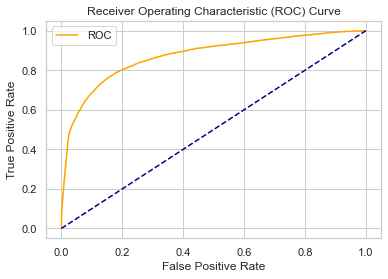

AUC-ROC : 0.8729014612791985


In [68]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = model.predict_proba(X_test)
probs = probs[:, 1]
modauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",modauc)

### Comparing Top Models after Hyperparameter Tuning

In [69]:
models = [('LGBM Classifier', lgbacc, lgbf1score, lgbrecall, lgbbal, lgbauc),
          ('XGB Classifier', xgbacc, xgbf1score, xgbrecall, xgbbal, xgbauc),
          ('CatBoost Classifier', catacc, catf1score, catrecall, catbal, catauc),
          ('MLP Classifier', mlpacc, mlpf1score, mlprecall, mlpbal, mlpauc),
          ('Gradient Boosting Classifier', gracc, grf1score, grrecall, grbal, grauc),
          ('Ensemble Model', modacc, modf1score, modrecall, modbal, modauc)]

In [70]:
predict = pd.DataFrame(data=models, columns=['Models', 'Accuracy of model', 'F1 Score', 'Recall Score', 'Balanced Accuracy Score', 'ROC AUC Score'])
cm = sns.light_palette("violet", as_cmap=True)
s = predict.style.background_gradient(cmap=cm)
s

### Final Submission

In [71]:
test1 = dummy3_test.copy()
dummy3_test = dummy3_test.drop('ID', axis=1)
dummy3_test = scaler.fit_transform(dummy3_test)
dummy3_test = normalize(dummy3_test)
dummy3_test

array([[ 0.29124252, -0.32060702, -0.46550273, ...,  0.42597838,
        -0.14503893, -0.25865953],
       [ 0.34649636, -0.02234066, -0.0640113 , ..., -0.72506423,
        -0.09188965, -0.30773181],
       [ 0.38660679, -0.3683493 ,  0.00665095, ..., -0.1217686 ,
        -0.45119262, -0.34335484],
       ...,
       [ 0.27282333, -0.17915635, -0.43606271, ..., -0.0859305 ,
         0.19748475, -0.242301  ],
       [ 0.28155372,  0.19026652, -0.4500168 , ..., -0.08868029,
        -0.1420704 ,  0.38426444],
       [ 0.35516389, -0.44355523, -0.49594786, ..., -0.11186511,
        -0.24494352, -0.31542965]])

In [73]:
probstest = model.predict_proba(dummy3_test)
probstest = probstest[:, 1]
test1["Is_Lead"] = probstest
test1[["ID","Is_Lead"]].to_csv("Final-Submission.csv",index=False)
test1[["ID","Is_Lead"]].head()
print("Submission Successful")

Submission Successful
